In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

## main_num_dataset = 200
## other_num_dataset = 10

In [2]:
acc0 = [[0.09740000218153, 0.32010000944137573, 0.5230000019073486, 0.19040000438690186, 0.0957999974489212, 0.40459999442100525, 0.3686000108718872, 0.38989999890327454, 0.3801000118255615, 0.5048999786376953, 0.2498999983072281, 0.45899999141693115, 0.46799999475479126, 0.5879999995231628, 0.3521000146865845, 0.09740000218153, 0.4668000042438507, 0.4124000072479248, 0.32910001277923584, 0.5989000201225281, 0.5414000153541565, 0.3467999994754791, 0.4984000027179718, 0.39579999446868896, 0.5324000120162964, 0.4300000071525574, 0.21960000693798065, 0.15639999508857727, 0.5339000225067139, 0.0957999974489212], [0.15459999442100525, 0.014600000344216824, 0.23280000686645508, 0.09960000216960907, 0.2529999911785126, 0.1850000023841858, 0.10090000182390213, 0.1882999986410141, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.0982000008225441, 0.16609999537467957, 0.125, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.10379999876022339, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.09880000352859497, 0.09740000218153, 0.11630000174045563], [0.2062000036239624, 0.32839998602867126, 0.10329999774694443, 0.22910000383853912, 0.10100000351667404, 0.10320000350475311, 0.2648000121116638, 0.4050000011920929, 0.09740000218153, 0.23639999330043793, 0.42669999599456787, 0.08919999748468399, 0.43720000982284546, 0.28040000796318054, 0.11349999904632568, 0.17159999907016754, 0.15860000252723694, 0.4050000011920929, 0.2865000069141388, 0.2500999867916107, 0.11349999904632568, 0.32829999923706055, 0.10320000350475311, 0.2815999984741211, 0.16290000081062317, 0.17829999327659607, 0.3456000089645386, 0.09740000218153, 0.09740000218153, 0.09799999743700027], [0.4011000096797943, 0.17080000042915344, 0.1200999990105629, 0.5304999947547913, 0.09740000218153, 0.5778999924659729, 0.14830000698566437, 0.19339999556541443, 0.520799994468689, 0.5475000143051147, 0.11990000307559967, 0.4496999979019165, 0.4977000057697296, 0.18060000240802765, 0.42570000886917114, 0.5580000281333923, 0.5351999998092651, 0.34529998898506165, 0.11379999667406082, 0.387800008058548, 0.0982000008225441, 0.3278999924659729, 0.09740000218153, 0.5432000160217285, 0.4512999951839447, 0.19449999928474426, 0.520799994468689, 0.2833000123500824, 0.3066999912261963, 0.42410001158714294], [0.5194000005722046, 0.10100000351667404, 0.20739999413490295, 0.26840001344680786, 0.3490000069141388, 0.17810000479221344, 0.46889999508857727, 0.5794000029563904, 0.4830000102519989, 0.10090000182390213, 0.10320000350475311, 0.30880001187324524, 0.34929999709129333, 0.0957999974489212, 0.7148000001907349, 0.28459998965263367, 0.32440000772476196, 0.156700000166893, 0.0957999974489212, 0.5825999975204468, 0.6984000205993652, 0.45980000495910645, 0.39890000224113464, 0.2572999894618988, 0.34220001101493835, 0.5307999849319458, 0.6578999757766724, 0.1429000049829483, 0.5620999932289124, 0.6140000224113464], [0.6735000014305115, 0.6991999745368958, 0.2621999979019165, 0.34119999408721924, 0.2784999907016754, 0.3107999861240387, 0.42260000109672546, 0.6718999743461609, 0.10090000182390213, 0.4325000047683716, 0.5583999752998352, 0.5013999938964844, 0.7021999955177307, 0.4004000127315521, 0.6069999933242798, 0.5, 0.36910000443458557, 0.10100000351667404, 0.09799999743700027, 0.3312999904155731, 0.6606000065803528, 0.29409998655319214, 0.618399977684021, 0.7037000060081482, 0.7239000201225281, 0.2736999988555908, 0.6761000156402588, 0.5907999873161316, 0.35249999165534973, 0.6029000282287598], [0.2637999951839447, 0.6172999739646912, 0.19380000233650208, 0.37389999628067017, 0.38359999656677246, 0.4023999869823456, 0.15809999406337738, 0.7059000134468079, 0.7250000238418579, 0.44290000200271606, 0.4636000096797943, 0.6412000060081482, 0.6934999823570251, 0.5698999762535095, 0.10320000350475311, 0.4959999918937683, 0.6955000162124634, 0.08919999748468399, 0.7311999797821045, 0.19859999418258667, 0.2554999887943268, 0.4862000048160553, 0.0982000008225441, 0.5529999732971191, 0.4814000129699707, 0.7605999708175659, 0.09740000218153, 0.2493000030517578, 0.17810000479221344, 0.4375999867916107], [0.6827999949455261, 0.38359999656677246, 0.6905999779701233, 0.3628000020980835, 0.6380000114440918, 0.3700999915599823, 0.31029999256134033, 0.7533000111579895, 0.6884999871253967, 0.4781000018119812, 0.6401000022888184, 0.11349999904632568, 0.6575000286102295, 0.7182000279426575, 0.4318999946117401, 0.35120001435279846, 0.4756999909877777, 0.5587000250816345, 0.18559999763965607, 0.18970000743865967, 0.5479000210762024, 0.7817999720573425, 0.6324999928474426, 0.0982000008225441, 0.6043000221252441, 0.7289999723434448, 0.7476999759674072, 0.7753000259399414, 0.18449999392032623, 0.6133999824523926], [0.633899986743927, 0.4399000108242035, 0.11460000276565552, 0.19660000503063202, 0.28780001401901245, 0.19609999656677246, 0.3424000144004822, 0.7379000186920166, 0.29319998621940613, 0.09799999743700027, 0.6586999893188477, 0.5605000257492065, 0.2948000133037567, 0.7541000247001648, 0.6586999893188477, 0.4032000005245209, 0.746999979019165, 0.7861999869346619, 0.10320000350475311, 0.7718999981880188, 0.3993000090122223, 0.7675999999046326, 0.27059999108314514, 0.4957999885082245, 0.19169999659061432, 0.32100000977516174, 0.6797999739646912, 0.6004999876022339, 0.20270000398159027, 0.2198999971151352], [0.30090001225471497, 0.7143999934196472, 0.10279999673366547, 0.3244999945163727, 0.727400004863739, 0.22599999606609344, 0.7967000007629395, 0.5629000067710876, 0.36959999799728394, 0.5311999917030334, 0.7631000280380249, 0.4659999907016754, 0.7929999828338623, 0.7824000120162964, 0.10080000013113022, 0.45730000734329224, 0.10289999842643738, 0.2533999979496002, 0.666100025177002, 0.7649999856948853, 0.578499972820282, 0.43549999594688416, 0.19599999487400055, 0.4000999927520752, 0.7401999831199646, 0.28110000491142273, 0.7803999781608582, 0.3481999933719635, 0.21320000290870667, 0.19280000030994415], [0.10670000314712524, 0.6319000124931335, 0.6184999942779541, 0.2849999964237213, 0.5795999765396118, 0.6935999989509583, 0.26019999384880066, 0.8187999725341797, 0.5249999761581421, 0.7472000122070312, 0.6639999747276306, 0.17839999496936798, 0.11819999665021896, 0.31540000438690186, 0.5042999982833862, 0.2485000044107437, 0.11649999767541885, 0.4860000014305115, 0.34470000863075256, 0.4113999903202057, 0.6007000207901001, 0.5422999858856201, 0.3686000108718872, 0.5430999994277954, 0.5318999886512756, 0.396699994802475, 0.43619999289512634, 0.38429999351501465, 0.3781999945640564, 0.4652999937534332], [0.7644000053405762, 0.4108999967575073, 0.1103999987244606, 0.817300021648407, 0.5336999893188477, 0.10100000351667404, 0.10320000350475311, 0.5378000140190125, 0.5091999769210815, 0.5175999999046326, 0.21220000088214874, 0.19449999928474426, 0.8051000237464905, 0.17749999463558197, 0.7268000245094299, 0.1256999969482422, 0.6865000128746033, 0.5382999777793884, 0.5187000036239624, 0.09759999811649323, 0.36239999532699585, 0.6233999729156494, 0.5967000126838684, 0.7937999963760376, 0.6262000203132629, 0.8610000014305115, 0.33320000767707825, 0.10840000212192535, 0.10090000182390213, 0.6266000270843506], [0.824999988079071, 0.6941999793052673, 0.39329999685287476, 0.2029999941587448, 0.5354999899864197, 0.10140000283718109, 0.22339999675750732, 0.390500009059906, 0.4244000017642975, 0.5597000122070312, 0.6155999898910522, 0.5364000201225281, 0.6796000003814697, 0.5277000069618225, 0.5223000049591064, 0.3172000050544739, 0.8148999810218811, 0.565500020980835, 0.7688999772071838, 0.21930000185966492, 0.10090000182390213, 0.544700026512146, 0.08919999748468399, 0.10360000282526016, 0.44369998574256897, 0.40290001034736633, 0.7800999879837036, 0.10279999673366547, 0.5400999784469604, 0.7569000124931335], [0.609499990940094, 0.2856999933719635, 0.5812000036239624, 0.5236999988555908, 0.5166000127792358, 0.6618000268936157, 0.10090000182390213, 0.645799994468689, 0.4578000009059906, 0.5828999876976013, 0.5496000051498413, 0.4862000048160553, 0.611299991607666, 0.4708999991416931, 0.5979999899864197, 0.8485999703407288, 0.6639999747276306, 0.21070000529289246, 0.08919999748468399, 0.635200023651123, 0.6754000186920166, 0.7581999897956848, 0.7134000062942505, 0.550599992275238, 0.41769999265670776, 0.5250999927520752, 0.6636999845504761, 0.10279999673366547, 0.4196999967098236, 0.3077000081539154], [0.767300009727478, 0.3977000117301941, 0.5999000072479248, 0.9071000218391418, 0.7814000248908997, 0.14249999821186066, 0.8008000254631042, 0.8058000206947327, 0.3691999912261963, 0.6122999787330627, 0.2289000004529953, 0.718500018119812, 0.25200000405311584, 0.4189999997615814, 0.2939999997615814, 0.8158000111579895, 0.7408000230789185, 0.7656999826431274, 0.1054999977350235, 0.870199978351593, 0.8238000273704529, 0.27410000562667847, 0.45010000467300415, 0.4343000054359436, 0.4408999979496002, 0.7096999883651733, 0.1915999948978424, 0.1370999962091446, 0.7202000021934509, 0.5870000123977661], [0.8248999714851379, 0.19020000100135803, 0.19290000200271606, 0.17579999566078186, 0.6610999703407288, 0.8039000034332275, 0.6460000276565552, 0.6324999928474426, 0.8192999958992004, 0.727400004863739, 0.8083999752998352, 0.4474000036716461, 0.6165000200271606, 0.5152999758720398, 0.7994999885559082, 0.7860000133514404, 0.08950000256299973, 0.5924999713897705, 0.6089000105857849, 0.8276000022888184, 0.8389999866485596, 0.5619000196456909, 0.5299999713897705, 0.5687000155448914, 0.45179998874664307, 0.7736999988555908, 0.6251999735832214, 0.7368000149726868, 0.715399980545044, 0.27320000529289246], [0.10199999809265137, 0.5885000228881836, 0.5306000113487244, 0.8195000290870667, 0.8083999752998352, 0.5059000253677368, 0.6567999720573425, 0.7184000015258789, 0.7271000146865845, 0.8086000084877014, 0.8980000019073486, 0.10140000283718109, 0.7764999866485596, 0.6754000186920166, 0.7107999920845032, 0.5171999931335449, 0.08919999748468399, 0.6455000042915344, 0.1915999948978424, 0.4916999936103821, 0.5016999840736389, 0.510699987411499, 0.7947999835014343, 0.5767999887466431, 0.4535999894142151, 0.7035999894142151, 0.5967000126838684, 0.7293999791145325, 0.10970000177621841, 0.2874000072479248], [0.10180000215768814, 0.7904999852180481, 0.49790000915527344, 0.5720999836921692, 0.6126000285148621, 0.10279999673366547, 0.3610999882221222, 0.10109999775886536, 0.7511000037193298, 0.4027000069618225, 0.10100000351667404, 0.7127000093460083, 0.6953999996185303, 0.5787000060081482, 0.6502000093460083, 0.73580002784729, 0.745199978351593, 0.4961000084877014, 0.7994999885559082, 0.10170000046491623, 0.3806999921798706, 0.8718000054359436, 0.48980000615119934, 0.7793999910354614, 0.5849999785423279, 0.5795000195503235, 0.5004000067710876, 0.7461000084877014, 0.8392000198364258, 0.8312000036239624], [0.30070000886917114, 0.3393999934196472, 0.6392999887466431, 0.09009999781847, 0.5827999711036682, 0.795199990272522, 0.6845999956130981, 0.7129999995231628, 0.7289999723434448, 0.5037000179290771, 0.6064000129699707, 0.8335000276565552, 0.7667999863624573, 0.8715999722480774, 0.6450999975204468, 0.08950000256299973, 0.7617999911308289, 0.7918000221252441, 0.8806999921798706, 0.4388999938964844, 0.6044999957084656, 0.7368000149726868, 0.3476000130176544, 0.2386000007390976, 0.3424000144004822, 0.6312000155448914, 0.6938999891281128, 0.8878999948501587, 0.8166999816894531, 0.40230000019073486], [0.84170001745224, 0.857200026512146, 0.11140000075101852, 0.5638999938964844, 0.663100004196167, 0.3075999915599823, 0.785099983215332, 0.3686999976634979, 0.7257999777793884, 0.5802000164985657, 0.6862000226974487, 0.8489999771118164, 0.791700005531311, 0.7875999808311462, 0.38029998540878296, 0.6396999955177307, 0.4000000059604645, 0.8849999904632568, 0.37950000166893005, 0.5665000081062317, 0.842199981212616, 0.6191999912261963, 0.6333000063896179, 0.21770000457763672, 0.8216999769210815, 0.8098000288009644, 0.25360000133514404, 0.8838000297546387, 0.3314000070095062, 0.8565000295639038], [0.4620000123977661, 0.7297000288963318, 0.5914999842643738, 0.6430000066757202, 0.2800000011920929, 0.8492000102996826, 0.7260000109672546, 0.3840000033378601, 0.6498000025749207, 0.2574000060558319, 0.9110000133514404, 0.8707000017166138, 0.8367000222206116, 0.9222999811172485, 0.8155999779701233, 0.8021000027656555, 0.6258999705314636, 0.8012999892234802, 0.43700000643730164, 0.45509999990463257, 0.6323000192642212, 0.6114000082015991, 0.10339999943971634, 0.6712999939918518, 0.741100013256073, 0.671999990940094, 0.5138000249862671, 0.7973999977111816, 0.7718999981880188, 0.7980999946594238], [0.8550999760627747, 0.12700000405311584, 0.17249999940395355, 0.671999990940094, 0.5626999735832214, 0.6902999877929688, 0.6690999865531921, 0.4699999988079071, 0.49380001425743103, 0.7789999842643738, 0.7347999811172485, 0.6560999751091003, 0.10100000351667404, 0.8306000232696533, 0.21170000731945038, 0.5238999724388123, 0.7562000155448914, 0.7577000260353088, 0.47859999537467957, 0.24729999899864197, 0.621399998664856, 0.6777999997138977, 0.7734000086784363, 0.8309999704360962, 0.15629999339580536, 0.7390000224113464, 0.6969000101089478, 0.14569999277591705, 0.5202999711036682, 0.6200000047683716], [0.6998000144958496, 0.6376000046730042, 0.9002000093460083, 0.3075000047683716, 0.8230000138282776, 0.6500999927520752, 0.5246999859809875, 0.46880000829696655, 0.8222000002861023, 0.49639999866485596, 0.7641000151634216, 0.5473999977111816, 0.8575000166893005, 0.3589000105857849, 0.47859999537467957, 0.7886000275611877, 0.8305000066757202, 0.19689999520778656, 0.6697999835014343, 0.7850000262260437, 0.7092000246047974, 0.5986999869346619, 0.7419999837875366, 0.6406999826431274, 0.22010000050067902, 0.1542000025510788, 0.7245000004768372, 0.7519999742507935, 0.6460999846458435, 0.9000999927520752], [0.08940000087022781, 0.8675000071525574, 0.9072999954223633, 0.7182999849319458, 0.6349999904632568, 0.5536999702453613, 0.8535000085830688, 0.23770000040531158, 0.7232000231742859, 0.4178999960422516, 0.8271999955177307, 0.7098000049591064, 0.4652999937534332, 0.4133000075817108, 0.878600001335144, 0.3244999945163727, 0.8672999739646912, 0.8513000011444092, 0.7879999876022339, 0.6550999879837036, 0.47589999437332153, 0.7990000247955322, 0.31119999289512634, 0.32409998774528503, 0.6661999821662903, 0.23980000615119934, 0.16259999573230743, 0.384799987077713, 0.7735000252723694, 0.8608999848365784], [0.8396000266075134, 0.10010000318288803, 0.8335000276565552, 0.8342999815940857, 0.8076000213623047, 0.48240000009536743, 0.8303999900817871, 0.7789999842643738, 0.10779999941587448, 0.5393000245094299, 0.8011999726295471, 0.8493000268936157, 0.734000027179718, 0.7849000096321106, 0.7653999924659729, 0.8248999714851379, 0.24210000038146973, 0.6301000118255615, 0.30059999227523804, 0.7103999853134155, 0.31369999051094055, 0.3163999915122986, 0.4050999879837036, 0.23589999973773956, 0.44920000433921814, 0.1436000019311905, 0.8206999897956848, 0.10499999672174454, 0.14159999787807465, 0.534500002861023], [0.7429999709129333, 0.8820000290870667, 0.7843999862670898, 0.8730000257492065, 0.8615999817848206, 0.16840000450611115, 0.4602000117301941, 0.31060001254081726, 0.10109999775886536, 0.09790000319480896, 0.8745999932289124, 0.7181000113487244, 0.20730000734329224, 0.7099999785423279, 0.25060001015663147, 0.147599995136261, 0.7322999835014343, 0.6668999791145325, 0.8312000036239624, 0.7325000166893005, 0.7020999789237976, 0.5785999894142151, 0.8855000138282776, 0.7713000178337097, 0.8982999920845032, 0.21780000627040863, 0.8774999976158142, 0.33649998903274536, 0.8763999938964844, 0.4717000126838684], [0.7670000195503235, 0.3303999900817871, 0.8629000186920166, 0.8148999810218811, 0.8460999727249146, 0.7720000147819519, 0.8633999824523926, 0.39730000495910645, 0.7111999988555908, 0.8980000019073486, 0.8256999850273132, 0.7980999946594238, 0.2020999938249588, 0.9092000126838684, 0.45100000500679016, 0.35929998755455017, 0.7856000065803528, 0.6863999962806702, 0.1062999963760376, 0.9283000230789185, 0.7287999987602234, 0.10830000042915344, 0.8644000291824341, 0.7598000168800354, 0.8657000064849854, 0.8256000280380249, 0.8834999799728394, 0.6324999928474426, 0.6169999837875366, 0.6261000037193298], [0.5257999897003174, 0.8256000280380249, 0.5655999779701233, 0.6139000058174133, 0.3434999883174896, 0.6467999815940857, 0.6223999857902527, 0.1316000074148178, 0.7141000032424927, 0.3589000105857849, 0.8490999937057495, 0.5410000085830688, 0.12280000001192093, 0.30809998512268066, 0.8813999891281128, 0.742900013923645, 0.8528000116348267, 0.8586000204086304, 0.786899983882904, 0.5717999935150146, 0.4399000108242035, 0.7795000076293945, 0.8669000267982483, 0.878000020980835, 0.39800000190734863, 0.295199990272522, 0.61080002784729, 0.707099974155426, 0.46239998936653137, 0.7796000242233276], [0.8407999873161316, 0.7368000149726868, 0.7189000248908997, 0.7840999960899353, 0.6639000177383423, 0.7509999871253967, 0.3093999922275543, 0.8069000244140625, 0.6640999913215637, 0.8086000084877014, 0.5532000064849854, 0.1453000009059906, 0.8424000144004822, 0.3384999930858612, 0.6453999876976013, 0.11590000241994858, 0.862500011920929, 0.22169999778270721, 0.7907999753952026, 0.20000000298023224, 0.3257000148296356, 0.6179999709129333, 0.7634000182151794, 0.7766000032424927, 0.9027000069618225, 0.9054999947547913, 0.7458000183105469, 0.5439000129699707, 0.8763999938964844, 0.8765000104904175], [0.11680000275373459, 0.538100004196167, 0.8137000203132629, 0.5278000235557556, 0.6492000222206116, 0.819100022315979, 0.8697999715805054, 0.1046999990940094, 0.8205000162124634, 0.39980000257492065, 0.8752999901771545, 0.6496999859809875, 0.6786999702453613, 0.8518000245094299, 0.6924999952316284, 0.8230000138282776, 0.7620999813079834, 0.7245000004768372, 0.364300012588501, 0.902899980545044, 0.9106000065803528, 0.5468999743461609, 0.5580000281333923, 0.8097000122070312, 0.18019999563694, 0.4505000114440918, 0.7900000214576721, 0.8700000047683716, 0.8895999789237976, 0.4602999985218048], [0.7275999784469604, 0.426800012588501, 0.8495000004768372, 0.6089000105857849, 0.22699999809265137, 0.3422999978065491, 0.669700026512146, 0.6455000042915344, 0.7925999760627747, 0.7731999754905701, 0.743399977684021, 0.8485000133514404, 0.4747999906539917, 0.8144999742507935, 0.8267999887466431, 0.3490000069141388, 0.86080002784729, 0.5406000018119812, 0.10279999673366547, 0.5098999738693237, 0.6941999793052673, 0.6875, 0.5227000117301941, 0.8604999780654907, 0.8507999777793884, 0.7095000147819519, 0.6762999892234802, 0.6714000105857849, 0.5952000021934509, 0.4350999891757965]]
loss0 = [[1282.0377197265625, 14.493213653564453, 9.254465103149414, 163.1235809326172, 647.6283569335938, 11.010875701904297, 8.604633331298828, 24.696483612060547, 12.430681228637695, 4.6226959228515625, 87.89845275878906, 3.8819260597229004, 14.809842109680176, 1.4584399461746216, 13.786737442016602, 763.3804931640625, 4.820225715637207, 20.936641693115234, 17.68100357055664, 2.1405692100524902, 4.790111064910889, 19.8234806060791, 2.8653147220611572, 20.480567932128906, 6.874021053314209, 8.238768577575684, 7.139457702636719, 181.79733276367188, 15.799756050109863, 690.2318115234375], [2.442716121673584, 2.2234368324279785, 2.2605628967285156, 3.2592954635620117, 2.4263906478881836, 2.6138741970062256, 6.699693202972412, 2.6714835166931152, 5.957090854644775, 2.7121617794036865, 25.78947639465332, 10.980483055114746, 25.79096221923828, 5.217231750488281, 5.231980323791504, 3.0065436363220215, 2.3550186157226562, 6.199001789093018, 7.364842891693115, 2.4587364196777344, 5.5889105796813965, 2.906111478805542, 20.8280086517334, 3.1305301189422607, 2.9363701343536377, 5.970889568328857, 4.756686687469482, 2.4757204055786133, 4.426670074462891, 2.4216129779815674], [35.76674270629883, 3.5742132663726807, 8.660478591918945, 2.0674054622650146, 76.63436889648438, 96.21147155761719, 2.2559735774993896, 1.550175666809082, 5.619350433349609, 5.360637664794922, 4.043774604797363, 16.051639556884766, 2.648954391479492, 29.48859405517578, 45.54380798339844, 5.814733505249023, 2.516676425933838, 3.7874252796173096, 2.935133218765259, 3.533726453781128, 47.65798568725586, 2.525670051574707, 5.497038841247559, 2.2946155071258545, 2.9789299964904785, 2.56870174407959, 2.705528736114502, 34.70086669921875, 3.489941358566284, 92.05464935302734], [3.938307523727417, 4.731982707977295, 9.931439399719238, 2.1776838302612305, 73.95352172851562, 2.3711483478546143, 12.440731048583984, 7.392862319946289, 2.3856372833251953, 2.5184292793273926, 5.5253376960754395, 4.441666126251221, 1.6429957151412964, 4.295060634613037, 4.480828762054443, 1.491180658340454, 2.4079132080078125, 2.0425772666931152, 4.0801873207092285, 10.528058052062988, 66.1019515991211, 5.704788684844971, 75.15862274169922, 2.2837319374084473, 4.174347877502441, 3.632138967514038, 1.9858554601669312, 5.83113431930542, 9.91562557220459, 3.954394578933716], [3.368149995803833, 9.292718887329102, 15.521574974060059, 13.612618446350098, 8.049352645874023, 53.407073974609375, 7.729166507720947, 4.072668552398682, 6.298850059509277, 76.73367309570312, 43.572479248046875, 8.29593276977539, 10.479175567626953, 60.97262954711914, 1.26456880569458, 8.877876281738281, 10.208866119384766, 5.117002964019775, 51.69651794433594, 2.4405007362365723, 1.9255108833312988, 5.141733169555664, 5.915637016296387, 13.957893371582031, 7.311813831329346, 2.248326063156128, 1.9961987733840942, 9.15346908569336, 2.6846399307250977, 2.540318250656128], [2.0801384449005127, 2.7119364738464355, 8.764394760131836, 4.477174758911133, 13.07252025604248, 8.2385835647583, 3.9598464965820312, 2.2250168323516846, 22.620342254638672, 3.4830729961395264, 2.6429264545440674, 2.8216710090637207, 1.13443124294281, 8.38032341003418, 3.0664780139923096, 4.882038593292236, 4.3026227951049805, 80.17455291748047, 23.242597579956055, 3.368802785873413, 1.6081212759017944, 5.84568452835083, 3.5170624256134033, 2.280975341796875, 1.5160017013549805, 10.360699653625488, 2.340235710144043, 1.5889394283294678, 6.889222621917725, 2.2782392501831055], [8.418363571166992, 3.9755449295043945, 22.591646194458008, 5.84375, 5.867366790771484, 7.83280086517334, 6.320942401885986, 2.2308309078216553, 2.1315383911132812, 4.42871618270874, 6.169783592224121, 2.6114916801452637, 1.6781439781188965, 3.803875684738159, 17.835590362548828, 6.092082500457764, 1.896182656288147, 36.165611267089844, 1.6542078256607056, 10.020195007324219, 10.549105644226074, 3.970336437225342, 35.903663635253906, 4.012884140014648, 4.7527031898498535, 1.3528634309768677, 20.932771682739258, 6.76025915145874, 12.981926918029785, 7.674962520599365], [1.9565922021865845, 7.227595329284668, 1.7255667448043823, 8.40632152557373, 2.753473997116089, 8.401010513305664, 7.9249982833862305, 1.6397582292556763, 2.108759641647339, 5.2021989822387695, 2.0123376846313477, 29.833633422851562, 3.470357894897461, 1.8888423442840576, 6.9152607917785645, 5.1963114738464355, 3.5210981369018555, 2.8166210651397705, 12.192475318908691, 14.60927963256836, 3.9674479961395264, 1.0908130407333374, 2.8707220554351807, 33.8376350402832, 2.8862051963806152, 1.7931630611419678, 1.665496826171875, 1.1982841491699219, 22.93613624572754, 3.4051878452301025], [2.838900089263916, 5.212122440338135, 31.592315673828125, 10.291007995605469, 12.856663703918457, 15.98589038848877, 3.9914391040802, 1.3452192544937134, 5.741631031036377, 45.075538635253906, 1.5986541509628296, 2.7931947708129883, 5.936869144439697, 1.5044350624084473, 2.2838711738586426, 3.5055816173553467, 1.0993798971176147, 0.8282696008682251, 23.222789764404297, 1.054628849029541, 2.9169044494628906, 1.6831862926483154, 8.05059814453125, 3.130141496658325, 12.198063850402832, 8.341877937316895, 1.9750003814697266, 2.8137705326080322, 9.416840553283691, 11.144503593444824], [9.748106956481934, 1.8474797010421753, 30.59929656982422, 7.897848606109619, 1.1646391153335571, 8.864325523376465, 1.1611305475234985, 5.378688812255859, 6.069899559020996, 8.378579139709473, 1.569958209991455, 4.260227680206299, 1.1884315013885498, 1.0539642572402954, 21.377046585083008, 3.9626171588897705, 17.42239761352539, 9.969913482666016, 1.8779785633087158, 1.4080138206481934, 3.0838284492492676, 6.908931255340576, 16.08928108215332, 5.181056976318359, 1.9685015678405762, 4.229870796203613, 0.9734212756156921, 7.199398994445801, 17.282421112060547, 24.21196174621582], [21.034486770629883, 2.333029270172119, 2.412163734436035, 8.555039405822754, 2.884671449661255, 1.8335994482040405, 5.561509609222412, 0.75295490026474, 3.7953648567199707, 1.0729953050613403, 1.7263495922088623, 18.3700008392334, 34.820613861083984, 5.382936000823975, 3.264270782470703, 12.698681831359863, 29.942533493041992, 3.0946099758148193, 4.407659530639648, 3.066711664199829, 2.1155319213867188, 4.3097405433654785, 4.2596435546875, 2.759417772293091, 5.806678295135498, 4.12730598449707, 4.683600425720215, 7.268882751464844, 10.361266136169434, 2.9610648155212402], [0.9829320311546326, 3.5709807872772217, 18.980260848999023, 0.875152051448822, 3.069279909133911, 32.586692810058594, 17.145671844482422, 3.0094053745269775, 3.7638909816741943, 4.434115886688232, 6.912596225738525, 32.680110931396484, 0.8469839692115784, 11.64671802520752, 1.4037936925888062, 19.526226043701172, 1.5319286584854126, 3.2140839099884033, 4.848078727722168, 16.229909896850586, 10.453375816345215, 2.5710384845733643, 1.9112064838409424, 1.4968425035476685, 2.350756883621216, 0.452714741230011, 4.844355583190918, 15.921106338500977, 28.588178634643555, 1.6355034112930298], [0.6758288145065308, 1.6802916526794434, 5.590280532836914, 19.271595001220703, 1.7146894931793213, 30.05715560913086, 28.926990509033203, 3.1780126094818115, 2.768096685409546, 3.195849895477295, 2.770096778869629, 2.5498874187469482, 1.5880903005599976, 4.695439338684082, 3.9860339164733887, 7.309319496154785, 0.84945148229599, 2.3709938526153564, 1.1268302202224731, 15.063821792602539, 35.06953048706055, 3.0454485416412354, 32.301116943359375, 43.81563186645508, 5.488522529602051, 4.294719696044922, 1.1123892068862915, 23.87494659423828, 1.9748541116714478, 1.219157338142395], [1.8943910598754883, 10.335965156555176, 2.392591714859009, 2.7252285480499268, 2.9315693378448486, 2.1461641788482666, 23.658992767333984, 4.417632102966309, 4.8944597244262695, 2.3455090522766113, 2.4428889751434326, 3.9563581943511963, 1.8317409753799438, 3.4177656173706055, 3.0237033367156982, 0.7138060927391052, 2.265545129776001, 16.41094398498535, 27.68206024169922, 3.027189254760742, 1.9391003847122192, 1.120375633239746, 1.7900806665420532, 3.0367331504821777, 2.824936866760254, 6.17407751083374, 2.020688772201538, 31.522249221801758, 3.8444700241088867, 5.868021488189697], [1.2569996118545532, 9.09312629699707, 2.3254427909851074, 0.3860304653644562, 0.9158620834350586, 9.933820724487305, 1.4976558685302734, 0.8105753660202026, 5.623134136199951, 2.498542308807373, 6.107549667358398, 2.3534035682678223, 6.982515811920166, 6.693228721618652, 9.174975395202637, 0.905990719795227, 1.090688705444336, 0.9067515730857849, 21.857891082763672, 0.5322191715240479, 0.8567036390304565, 10.474637031555176, 3.4894113540649414, 6.9498515129089355, 4.06048583984375, 1.4294819831848145, 10.381020545959473, 15.71921443939209, 1.0612226724624634, 4.708587646484375], [0.9867616295814514, 11.95973014831543, 27.120882034301758, 13.849973678588867, 2.599879503250122, 0.8871928453445435, 1.4353545904159546, 1.9949575662612915, 0.9092006087303162, 1.2944260835647583, 1.070025086402893, 5.337600231170654, 3.2038562297821045, 5.595689296722412, 0.8162814974784851, 1.545671820640564, 21.403688430786133, 2.9168176651000977, 3.4276437759399414, 0.8907453417778015, 0.6719434857368469, 4.734924793243408, 4.736539363861084, 3.9616730213165283, 2.768695831298828, 1.0093340873718262, 1.5941845178604126, 1.136152982711792, 1.9104009866714478, 4.017619609832764], [26.412147521972656, 2.132875680923462, 2.428121566772461, 0.639433741569519, 1.03232741355896, 3.0762877464294434, 1.8223240375518799, 1.399696946144104, 1.0238131284713745, 0.7261911630630493, 0.43311014771461487, 20.819746017456055, 1.2967534065246582, 1.2342197895050049, 1.543808937072754, 4.330081462860107, 21.77353286743164, 1.985589861869812, 12.704239845275879, 3.533318042755127, 2.5047829151153564, 2.5733513832092285, 0.9839593768119812, 2.531979560852051, 3.830902338027954, 1.5508753061294556, 1.699050784111023, 2.418684959411621, 37.200950622558594, 5.585143089294434], [21.933883666992188, 1.5721402168273926, 3.9199187755584717, 1.7839499711990356, 2.4492571353912354, 33.02947998046875, 7.030728816986084, 13.396244049072266, 1.2991994619369507, 3.689094066619873, 18.229961395263672, 1.9901682138442993, 1.3941386938095093, 2.244441270828247, 2.101802110671997, 1.5352625846862793, 1.582002878189087, 6.344630718231201, 1.0559436082839966, 21.777570724487305, 3.70666241645813, 0.5663333535194397, 5.544007778167725, 0.7223256230354309, 3.5878942012786865, 3.13476824760437, 6.792205333709717, 1.1098047494888306, 0.7400040030479431, 0.655604362487793], [4.787214279174805, 7.054832935333252, 1.86661696434021, 17.953617095947266, 3.021425724029541, 0.8322833180427551, 3.5636370182037354, 1.3823693990707397, 1.400439739227295, 2.056323528289795, 2.5921130180358887, 0.6331626176834106, 1.0200836658477783, 0.48910385370254517, 1.7626680135726929, 24.38078498840332, 1.2151559591293335, 0.9641397595405579, 0.5640935301780701, 5.189162254333496, 1.9466947317123413, 1.2067813873291016, 4.991070747375488, 6.8146514892578125, 6.163224220275879, 2.0483782291412354, 1.9780367612838745, 0.5046659708023071, 1.322341799736023, 5.261378288269043], [0.6818711161613464, 0.6394574642181396, 15.605975151062012, 3.65246844291687, 2.0287346839904785, 4.281320571899414, 0.7297908067703247, 4.510412693023682, 1.6812529563903809, 2.1034374237060547, 2.17193603515625, 0.9912145733833313, 0.8037306070327759, 0.8029427528381348, 5.713132381439209, 2.6389496326446533, 10.504342079162598, 0.4578566551208496, 10.943035125732422, 3.725985527038574, 0.7765418887138367, 2.7721188068389893, 1.969634771347046, 12.564908981323242, 0.8017535209655762, 0.5728262662887573, 6.8082451820373535, 0.47454220056533813, 10.045343399047852, 0.5197561979293823], [4.067967891693115, 1.273067593574524, 2.517721652984619, 2.3349809646606445, 5.634574890136719, 0.6207499504089355, 1.4280682802200317, 6.014398574829102, 1.8224773406982422, 9.813755989074707, 0.3936236500740051, 0.5198142528533936, 0.8682732582092285, 0.2981201708316803, 0.7960036993026733, 1.1021785736083984, 1.5257216691970825, 0.8817836046218872, 2.8133132457733154, 5.019560813903809, 2.0975282192230225, 3.992504596710205, 17.637487411499023, 1.9856613874435425, 2.1557703018188477, 1.154398798942566, 4.925019264221191, 1.1924220323562622, 0.9822971820831299, 0.910369336605072], [0.5214977264404297, 14.489654541015625, 12.743803977966309, 1.4157871007919312, 1.9888482093811035, 1.2473978996276855, 2.3437957763671875, 3.588604688644409, 1.8549306392669678, 0.9661667943000793, 1.8949689865112305, 1.6862725019454956, 25.929285049438477, 0.6203370690345764, 16.522998809814453, 4.712376594543457, 0.8742455840110779, 0.8958142399787903, 2.602078437805176, 4.8567657470703125, 2.5781397819519043, 1.3226063251495361, 1.1734505891799927, 0.7204034328460693, 20.288671493530273, 1.3766463994979858, 1.2643392086029053, 9.84529972076416, 2.1873366832733154, 1.58162260055542], [2.530588388442993, 1.9146006107330322, 0.459974080324173, 3.9038171768188477, 0.9129176735877991, 1.5734137296676636, 2.74812912940979, 4.9287495613098145, 0.6887238621711731, 3.1543288230895996, 0.8929365277290344, 2.064575672149658, 0.5330913066864014, 4.139353275299072, 4.08834171295166, 1.005281686782837, 0.8475520610809326, 22.52050018310547, 2.3482303619384766, 0.7423588633537292, 1.7889255285263062, 2.486152410507202, 2.314466953277588, 2.00165057182312, 10.053231239318848, 18.79167938232422, 1.1611415147781372, 1.215755581855774, 2.971284866333008, 0.39036330580711365], [18.797760009765625, 0.7090673446655273, 0.3865639567375183, 1.26449453830719, 1.5644383430480957, 2.3384928703308105, 0.6363821029663086, 16.69955062866211, 1.433746099472046, 4.949295997619629, 0.7871300578117371, 2.1225740909576416, 3.2654592990875244, 5.014255046844482, 0.5514951944351196, 14.735025405883789, 0.5180566310882568, 0.624396562576294, 0.7974637150764465, 2.496950149536133, 3.5354957580566406, 1.1440296173095703, 3.8986756801605225, 6.615987300872803, 1.9189685583114624, 12.102107048034668, 20.841758728027344, 13.16466999053955, 0.9031755924224854, 0.7079143524169922], [0.6886488199234009, 15.637029647827148, 0.642872154712677, 0.766838550567627, 0.9619143605232239, 2.692328691482544, 0.8280465006828308, 0.6982315182685852, 8.310569763183594, 5.1351752281188965, 1.4555264711380005, 0.5427742600440979, 1.8038076162338257, 1.1449823379516602, 0.9255250096321106, 0.609058678150177, 17.096773147583008, 2.6126742362976074, 9.27351188659668, 1.4686131477355957, 9.253890037536621, 8.978496551513672, 6.959315776824951, 15.424452781677246, 2.8188271522521973, 10.789896965026855, 0.836006224155426, 12.28920841217041, 16.10322380065918, 2.7943811416625977], [1.4842857122421265, 0.5485056638717651, 1.2732638120651245, 0.5173463225364685, 0.8650217652320862, 13.870148658752441, 5.408264636993408, 7.815197467803955, 21.65416145324707, 15.365185737609863, 0.47853022813796997, 1.8467448949813843, 10.878260612487793, 1.07193922996521, 12.165525436401367, 23.00374984741211, 1.4318023920059204, 1.2784290313720703, 0.7263498306274414, 1.3517429828643799, 1.3369154930114746, 2.8398754596710205, 0.5445894002914429, 1.1208585500717163, 0.3966158628463745, 14.646435737609863, 0.495776504278183, 10.380913734436035, 0.4495990574359894, 3.8702616691589355], [0.7635328769683838, 5.33290433883667, 0.7664737105369568, 0.8817511796951294, 0.6416631937026978, 0.9121237397193909, 0.6169153451919556, 7.403107166290283, 1.6952146291732788, 0.5036735534667969, 0.6944172382354736, 0.7134124040603638, 7.785232067108154, 0.4209255874156952, 5.147060394287109, 5.881409645080566, 0.9821391701698303, 1.8656396865844727, 15.790739059448242, 0.26552119851112366, 1.1985914707183838, 12.29634952545166, 0.6264696717262268, 0.9575418829917908, 0.6685992479324341, 0.6500498056411743, 0.5852856040000916, 2.517906427383423, 2.1643269062042236, 2.3147377967834473], [2.2570130825042725, 0.8196725845336914, 2.796725273132324, 3.408106565475464, 4.121096611022949, 2.4907164573669434, 3.3791379928588867, 12.350358963012695, 1.2018318176269531, 5.290200233459473, 0.5656565427780151, 2.8169684410095215, 9.672819137573242, 8.790556907653809, 0.5836612582206726, 0.9613907337188721, 0.5519759058952332, 0.4936462938785553, 0.7913642525672913, 1.9261857271194458, 6.689090728759766, 0.9729086756706238, 0.7171640992164612, 0.5503610968589783, 5.545690059661865, 8.375362396240234, 2.5105693340301514, 2.173884630203247, 3.4605343341827393, 1.206883192062378], [0.5556696057319641, 1.0305778980255127, 1.1898139715194702, 0.9531434774398804, 1.2877432107925415, 2.191545009613037, 19.537256240844727, 1.0605313777923584, 1.7718276977539062, 0.684036910533905, 1.85380220413208, 23.80807876586914, 0.5172044634819031, 5.2001872062683105, 3.4030449390411377, 14.923556327819824, 0.5307800769805908, 10.588634490966797, 1.043030023574829, 7.849917888641357, 6.763436794281006, 3.1882739067077637, 0.9443047642707825, 0.8617968559265137, 0.352252334356308, 0.3942611515522003, 1.0155885219573975, 4.491490840911865, 0.5549755096435547, 0.4491864740848541], [12.844405174255371, 2.1850757598876953, 0.7958961129188538, 1.9804861545562744, 1.9014101028442383, 0.8119561076164246, 0.5716066956520081, 16.187808990478516, 0.6581466794013977, 7.062052249908447, 0.5044937133789062, 1.5700128078460693, 1.5075993537902832, 0.6837092041969299, 2.2740659713745117, 0.6910234093666077, 1.2269634008407593, 1.1456079483032227, 3.5507054328918457, 0.342997670173645, 0.34867730736732483, 6.439536094665527, 1.7059550285339355, 0.7414955496788025, 17.197450637817383, 3.793583631515503, 0.8510656952857971, 0.536356508731842, 0.41786932945251465, 3.1615145206451416], [1.2735517024993896, 6.239547252655029, 0.5567172169685364, 1.7547038793563843, 12.31303882598877, 5.103247165679932, 1.785615086555481, 1.6171627044677734, 0.9767497181892395, 0.9778505563735962, 1.2624272108078003, 0.5159376263618469, 5.4883904457092285, 0.8468173146247864, 0.6617754101753235, 5.4541544914245605, 0.6623826026916504, 3.16186261177063, 16.036319732666016, 2.4762401580810547, 1.674938440322876, 1.5148504972457886, 3.9081640243530273, 0.5674731135368347, 0.5949375629425049, 1.915152907371521, 2.01936936378479, 2.2201061248779297, 3.1748290061950684, 3.609388589859009]] 

acc1 = [[0.569599986076355, 0.5949000120162964, 0.5458999872207642, 0.19339999556541443, 0.35040000081062317, 0.4864000082015991, 0.5486000180244446, 0.10090000182390213, 0.0982000008225441, 0.10090000182390213, 0.5062000155448914, 0.4706000089645386, 0.09740000218153, 0.4925999939441681, 0.19269999861717224, 0.6017000079154968, 0.155799999833107, 0.5907999873161316, 0.26899999380111694, 0.5651000142097473, 0.4932999908924103, 0.10100000351667404, 0.42100000381469727, 0.550599992275238, 0.16840000450611115, 0.46700000762939453, 0.51419997215271, 0.5796999931335449, 0.11349999904632568, 0.271699994802475], [0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.09160000085830688, 0.08919999748468399, 0.13439999520778656, 0.10279999673366547, 0.1606999933719635, 0.16840000450611115, 0.20280000567436218, 0.0982000008225441, 0.11349999904632568, 0.11349999904632568, 0.19269999861717224, 0.10320000350475311, 0.17800000309944153, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.09799999743700027, 0.2687999904155731, 0.09570000320672989, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.0982000008225441], [0.2206999957561493, 0.325300008058548, 0.2328999936580658, 0.11060000211000443, 0.09830000251531601, 0.1914999932050705, 0.28029999136924744, 0.3174000084400177, 0.19529999792575836, 0.08919999748468399, 0.0957999974489212, 0.29420000314712524, 0.18790000677108765, 0.08919999748468399, 0.10379999876022339, 0.1834000051021576, 0.21230000257492065, 0.27950000762939453, 0.19609999656677246, 0.2680000066757202, 0.19089999794960022, 0.2709999978542328, 0.21150000393390656, 0.1324000060558319, 0.08919999748468399, 0.18850000202655792, 0.0957999974489212, 0.17919999361038208, 0.14980000257492065, 0.10090000182390213], [0.32109999656677246, 0.3052999973297119, 0.09740000218153, 0.1956000030040741, 0.2953999936580658, 0.33180001378059387, 0.09799999743700027, 0.20550000667572021, 0.10100000351667404, 0.26739999651908875, 0.3303000032901764, 0.1656000018119812, 0.2535000145435333, 0.35019999742507935, 0.07660000026226044, 0.09740000218153, 0.367900013923645, 0.29649999737739563, 0.09799999743700027, 0.23520000278949738, 0.1728000044822693, 0.10090000182390213, 0.31790000200271606, 0.2533999979496002, 0.3422999978065491, 0.2061000019311905, 0.211899995803833, 0.18440000712871552, 0.1655000001192093, 0.3082999885082245], [0.3084999918937683, 0.3116999864578247, 0.18619999289512634, 0.26510000228881836, 0.2955000102519989, 0.3828999996185303, 0.3328000009059906, 0.4068000018596649, 0.195700004696846, 0.24009999632835388, 0.2849000096321106, 0.33489999175071716, 0.33309999108314514, 0.374099999666214, 0.1818999946117401, 0.43470001220703125, 0.10320000350475311, 0.351500004529953, 0.17919999361038208, 0.25290000438690186, 0.3337000012397766, 0.0982000008225441, 0.18039999902248383, 0.30219998955726624, 0.1859000027179718, 0.2799000144004822, 0.26600000262260437, 0.10090000182390213, 0.29179999232292175, 0.17730000615119934], [0.10090000182390213, 0.39640000462532043, 0.34850001335144043, 0.0982000008225441, 0.29660001397132874, 0.32350000739097595, 0.27570000290870667, 0.43050000071525574, 0.34150001406669617, 0.4406999945640564, 0.3797000050544739, 0.19200000166893005, 0.22040000557899475, 0.349700003862381, 0.24709999561309814, 0.4296000003814697, 0.4327999949455261, 0.37560001015663147, 0.36059999465942383, 0.2621999979019165, 0.22059999406337738, 0.35089999437332153, 0.23639999330043793, 0.44510000944137573, 0.1964000016450882, 0.38760000467300415, 0.42500001192092896, 0.10279999673366547, 0.4169999957084656, 0.12809999287128448], [0.3797000050544739, 0.2802000045776367, 0.25619998574256897, 0.10279999673366547, 0.2978000044822693, 0.0957999974489212, 0.33320000767707825, 0.3353999853134155, 0.23960000276565552, 0.3221000134944916, 0.3700999915599823, 0.22589999437332153, 0.43860000371932983, 0.47850000858306885, 0.4438999891281128, 0.37070000171661377, 0.48829999566078186, 0.47029998898506165, 0.16920000314712524, 0.3257000148296356, 0.3174000084400177, 0.4993000030517578, 0.19539999961853027, 0.25029999017715454, 0.3968999981880188, 0.36070001125335693, 0.25429999828338623, 0.3758000135421753, 0.37209999561309814, 0.3257000148296356], [0.09799999743700027, 0.42719998955726624, 0.20020000636577606, 0.3749000132083893, 0.4009999930858612, 0.4814999997615814, 0.23549999296665192, 0.4065000116825104, 0.10100000351667404, 0.46299999952316284, 0.4383000135421753, 0.21089999377727509, 0.1996999979019165, 0.3962000012397766, 0.23010000586509705, 0.09799999743700027, 0.42750000953674316, 0.38260000944137573, 0.5029000043869019, 0.1858000010251999, 0.22859999537467957, 0.1867000013589859, 0.10279999673366547, 0.0982000008225441, 0.2371000051498413, 0.3310000002384186, 0.09700000286102295, 0.16920000314712524, 0.09799999743700027, 0.17149999737739563], [0.5383999943733215, 0.5120999813079834, 0.38659998774528503, 0.15559999644756317, 0.1728000044822693, 0.3790000081062317, 0.19280000030994415, 0.6292999982833862, 0.26840001344680786, 0.3758000135421753, 0.10260000079870224, 0.5292999744415283, 0.19529999792575836, 0.5497999787330627, 0.0982000008225441, 0.4860000014305115, 0.17229999601840973, 0.29319998621940613, 0.3790000081062317, 0.6014000177383423, 0.5260000228881836, 0.5608999729156494, 0.3375000059604645, 0.34470000863075256, 0.49559998512268066, 0.4636000096797943, 0.5866000056266785, 0.41280001401901245, 0.25049999356269836, 0.1761000007390976], [0.3124000132083893, 0.5748999714851379, 0.7005000114440918, 0.3456000089645386, 0.2874999940395355, 0.2793000042438507, 0.5008000135421753, 0.32839998602867126, 0.43070000410079956, 0.5784000158309937, 0.5385000109672546, 0.659500002861023, 0.310699999332428, 0.5271000266075134, 0.5935999751091003, 0.5766000151634216, 0.4526999890804291, 0.3027999997138977, 0.18150000274181366, 0.37119999527931213, 0.43779999017715454, 0.42809998989105225, 0.11349999904632568, 0.5403000116348267, 0.24539999663829803, 0.09740000218153, 0.6464999914169312, 0.39489999413490295, 0.4302000105381012, 0.5720000267028809], [0.6955000162124634, 0.10119999945163727, 0.2662999927997589, 0.691100001335144, 0.46219998598098755, 0.47049999237060547, 0.6888999938964844, 0.43140000104904175, 0.09799999743700027, 0.6575000286102295, 0.5648999810218811, 0.5712000131607056, 0.10320000350475311, 0.583299994468689, 0.5160999894142151, 0.5009999871253967, 0.39570000767707825, 0.290800005197525, 0.5149000287055969, 0.6234999895095825, 0.2587999999523163, 0.33889999985694885, 0.6948000192642212, 0.1031000018119812, 0.09860000014305115, 0.3418000042438507, 0.6836000084877014, 0.17139999568462372, 0.6614999771118164, 0.28060001134872437], [0.2856000065803528, 0.27399998903274536, 0.3303999900817871, 0.6403999924659729, 0.09749999642372131, 0.40619999170303345, 0.5764999985694885, 0.09799999743700027, 0.544700026512146, 0.1941000074148178, 0.0982000008225441, 0.20389999449253082, 0.3874000012874603, 0.5092999935150146, 0.11509999632835388, 0.6033999919891357, 0.3978999853134155, 0.48539999127388, 0.4020000100135803, 0.18799999356269836, 0.3093000054359436, 0.6779000163078308, 0.2718000113964081, 0.428600013256073, 0.16220000386238098, 0.4212000072002411, 0.3889999985694885, 0.10090000182390213, 0.17139999568462372, 0.4219000041484833], [0.729200005531311, 0.6425999999046326, 0.6646000146865845, 0.3637000024318695, 0.30630001425743103, 0.20960000157356262, 0.12380000203847885, 0.6256999969482422, 0.6413999795913696, 0.6050000190734863, 0.5386000275611877, 0.4235999882221222, 0.22050000727176666, 0.5023999810218811, 0.3887999951839447, 0.47999998927116394, 0.2685000002384186, 0.10339999943971634, 0.3440999984741211, 0.6629999876022339, 0.1348000019788742, 0.4352000057697296, 0.10490000247955322, 0.3248000144958496, 0.25099998712539673, 0.3691999912261963, 0.4390000104904175, 0.2815000116825104, 0.2621000111103058, 0.10029999911785126], [0.3788999915122986, 0.30090001225471497, 0.18960000574588776, 0.30709999799728394, 0.3012000024318695, 0.43720000982284546, 0.6226000189781189, 0.3935999870300293, 0.5645999908447266, 0.5655999779701233, 0.2515999972820282, 0.19110000133514404, 0.4494999945163727, 0.08919999748468399, 0.33739998936653137, 0.3799999952316284, 0.45739999413490295, 0.09600000083446503, 0.44749999046325684, 0.10320000350475311, 0.18299999833106995, 0.7239999771118164, 0.593500018119812, 0.36149999499320984, 0.2069000005722046, 0.23280000686645508, 0.7193999886512756, 0.43939998745918274, 0.1136000007390976, 0.3799000084400177], [0.0982000008225441, 0.48190000653266907, 0.25270000100135803, 0.46160000562667847, 0.7523999810218811, 0.37470000982284546, 0.3488999903202057, 0.2102999985218048, 0.6294999718666077, 0.19760000705718994, 0.10279999673366547, 0.2011999934911728, 0.30979999899864197, 0.3513000011444092, 0.583899974822998, 0.2833999991416931, 0.590499997138977, 0.1941000074148178, 0.7462000250816345, 0.15549999475479126, 0.4871000051498413, 0.2152000069618225, 0.39410001039505005, 0.5109999775886536, 0.2587999999523163, 0.7653999924659729, 0.37940001487731934, 0.607200026512146, 0.5612000226974487, 0.6283000111579895], [0.5019000172615051, 0.21699999272823334, 0.7426999807357788, 0.6632000207901001, 0.2888999879360199, 0.6197999715805054, 0.3447999954223633, 0.6503000259399414, 0.6717000007629395, 0.41339999437332153, 0.18119999766349792, 0.6071000099182129, 0.679099977016449, 0.1664000004529953, 0.3926999866962433, 0.7250000238418579, 0.13169999420642853, 0.6396999955177307, 0.661899983882904, 0.3244999945163727, 0.3806000053882599, 0.298799991607666, 0.7178000211715698, 0.19189999997615814, 0.41119998693466187, 0.21969999372959137, 0.652999997138977, 0.5828999876976013, 0.3734999895095825, 0.6227999925613403], [0.6980000138282776, 0.42590001225471497, 0.5196999907493591, 0.45649999380111694, 0.2883000075817108, 0.448199987411499, 0.32510000467300415, 0.24629999697208405, 0.3578000068664551, 0.19689999520778656, 0.29249998927116394, 0.21050000190734863, 0.18539999425411224, 0.42100000381469727, 0.4934000074863434, 0.15929999947547913, 0.3352000117301941, 0.33340001106262207, 0.7034000158309937, 0.5248000025749207, 0.7451000213623047, 0.18979999423027039, 0.5906000137329102, 0.7312999963760376, 0.5619000196456909, 0.4771000146865845, 0.6353999972343445, 0.5328999757766724, 0.5160999894142151, 0.1679999977350235], [0.1746000051498413, 0.21330000460147858, 0.2870999872684479, 0.18529999256134033, 0.2919999957084656, 0.4684000015258789, 0.5618000030517578, 0.5092999935150146, 0.10140000283718109, 0.692300021648407, 0.40630000829696655, 0.2994999885559082, 0.5953999757766724, 0.6844000220298767, 0.6728000044822693, 0.4359999895095825, 0.5286999940872192, 0.17180000245571136, 0.19339999556541443, 0.5602999925613403, 0.21369999647140503, 0.1973000019788742, 0.4781000018119812, 0.26910001039505005, 0.7049999833106995, 0.3228999972343445, 0.5199999809265137, 0.6539999842643738, 0.5733000040054321, 0.3009999990463257], [0.7465999722480774, 0.10289999842643738, 0.6004999876022339, 0.44290000200271606, 0.2651999890804291, 0.3840999901294708, 0.4260999858379364, 0.6773999929428101, 0.3853999972343445, 0.2815000116825104, 0.7768999934196472, 0.19709999859333038, 0.6528000235557556, 0.44029998779296875, 0.5720000267028809, 0.6704999804496765, 0.08990000188350677, 0.6904000043869019, 0.5047000050544739, 0.5041999816894531, 0.550599992275238, 0.7177000045776367, 0.641700029373169, 0.3010999858379364, 0.7928000092506409, 0.43290001153945923, 0.6711999773979187, 0.11219999939203262, 0.1808999925851822, 0.5875999927520752], [0.715499997138977, 0.4722999930381775, 0.48829999566078186, 0.24779999256134033, 0.5676000118255615, 0.3483000099658966, 0.38769999146461487, 0.4426000118255615, 0.46140000224113464, 0.7008000016212463, 0.4422000050544739, 0.588100016117096, 0.6395000219345093, 0.6074000000953674, 0.6765000224113464, 0.7854999899864197, 0.5257999897003174, 0.3190000057220459, 0.5774000287055969, 0.3652999997138977, 0.7286999821662903, 0.0982000008225441, 0.0982000008225441, 0.7804999947547913, 0.43849998712539673, 0.09790000319480896, 0.10440000146627426, 0.3864000141620636, 0.4041999876499176, 0.6757000088691711], [0.46869999170303345, 0.12690000236034393, 0.3240000009536743, 0.5354999899864197, 0.7383999824523926, 0.33640000224113464, 0.09740000218153, 0.13449999690055847, 0.14229999482631683, 0.09740000218153, 0.7730000019073486, 0.3488999903202057, 0.510200023651123, 0.3167000114917755, 0.2567000091075897, 0.5561000108718872, 0.6392999887466431, 0.7778000235557556, 0.6665999889373779, 0.21320000290870667, 0.739300012588501, 0.29409998655319214, 0.2639999985694885, 0.28220000863075256, 0.28130000829696655, 0.36149999499320984, 0.3481999933719635, 0.2078000009059906, 0.6746000051498413, 0.10109999775886536], [0.6782000064849854, 0.6274999976158142, 0.10450000315904617, 0.4327000081539154, 0.6431000232696533, 0.7208999991416931, 0.534600019454956, 0.34360000491142273, 0.5889999866485596, 0.4564000070095062, 0.5504999756813049, 0.10809999704360962, 0.4778999984264374, 0.09749999642372131, 0.2660999894142151, 0.6164000034332275, 0.7875999808311462, 0.2851000130176544, 0.6603999733924866, 0.31459999084472656, 0.11840000003576279, 0.4593999981880188, 0.30489999055862427, 0.46939998865127563, 0.6392999887466431, 0.7251999974250793, 0.7559000253677368, 0.6261000037193298, 0.10480000078678131, 0.7190999984741211], [0.20200000703334808, 0.41769999265670776, 0.288100004196167, 0.7087000012397766, 0.12479999661445618, 0.3840999901294708, 0.546999990940094, 0.2825999855995178, 0.7497000098228455, 0.7609999775886536, 0.20569999516010284, 0.738099992275238, 0.48010000586509705, 0.5878000259399414, 0.6115000247955322, 0.3424000144004822, 0.6521999835968018, 0.6571999788284302, 0.3779999911785126, 0.5404000282287598, 0.7005000114440918, 0.6078000068664551, 0.19419999420642853, 0.7045000195503235, 0.2409999966621399, 0.7354999780654907, 0.48350000381469727, 0.3224000036716461, 0.6103000044822693, 0.10350000113248825], [0.22619999945163727, 0.5561000108718872, 0.19599999487400055, 0.6984000205993652, 0.6330000162124634, 0.4578000009059906, 0.7677000164985657, 0.6222000122070312, 0.20399999618530273, 0.803600013256073, 0.4738999903202057, 0.5715000033378601, 0.7700999975204468, 0.35749998688697815, 0.5623999834060669, 0.5562999844551086, 0.21660000085830688, 0.3456000089645386, 0.4715000092983246, 0.5389000177383423, 0.6116999983787537, 0.5932000279426575, 0.7249000072479248, 0.2888999879360199, 0.7350999712944031, 0.34060001373291016, 0.7365000247955322, 0.5856999754905701, 0.6951000094413757, 0.8366000056266785], [0.6482999920845032, 0.7020000219345093, 0.3102000057697296, 0.6195999979972839, 0.4056999981403351, 0.5843999981880188, 0.09350000321865082, 0.692799985408783, 0.4083000123500824, 0.5674999952316284, 0.6527000069618225, 0.5976999998092651, 0.5835000276565552, 0.3276999890804291, 0.6182000041007996, 0.5404000282287598, 0.6783999800682068, 0.09769999980926514, 0.5914999842643738, 0.34769999980926514, 0.5231999754905701, 0.7871000170707703, 0.5547000169754028, 0.578000009059906, 0.6610000133514404, 0.5968000292778015, 0.7613999843597412, 0.6444000005722046, 0.32100000977516174, 0.44850000739097595], [0.10329999774694443, 0.10949999839067459, 0.37869998812675476, 0.3684000074863434, 0.7261000275611877, 0.7196000218391418, 0.38359999656677246, 0.28049999475479126, 0.5414000153541565, 0.5224999785423279, 0.10209999978542328, 0.12600000202655792, 0.5821999907493591, 0.5527999997138977, 0.18979999423027039, 0.3741999864578247, 0.3544999957084656, 0.49639999866485596, 0.3269999921321869, 0.10729999840259552, 0.5479999780654907, 0.5891000032424927, 0.756600022315979, 0.1826000064611435, 0.1062999963760376, 0.2879999876022339, 0.6463000178337097, 0.40790000557899475, 0.5993000268936157, 0.7576000094413757], [0.1062999963760376, 0.6521000266075134, 0.5760999917984009, 0.26930001378059387, 0.47609999775886536, 0.7591999769210815, 0.7032999992370605, 0.7013999819755554, 0.6837999820709229, 0.2773999869823456, 0.3785000145435333, 0.37059998512268066, 0.7340999841690063, 0.2694000005722046, 0.1096000000834465, 0.3589000105857849, 0.6671000123023987, 0.7688000202178955, 0.352400004863739, 0.6866999864578247, 0.1111999973654747, 0.1096000000834465, 0.6930000185966492, 0.8686000108718872, 0.36970001459121704, 0.8317999839782715, 0.6807000041007996, 0.567300021648407, 0.6245999932289124, 0.7785000205039978], [0.2029000073671341, 0.7192999720573425, 0.22589999437332153, 0.5042999982833862, 0.5496000051498413, 0.492000013589859, 0.7430999875068665, 0.10540000349283218, 0.10859999805688858, 0.5414000153541565, 0.16290000081062317, 0.579200029373169, 0.4657999873161316, 0.4255000054836273, 0.46059998869895935, 0.3416000008583069, 0.5939000248908997, 0.6901999711990356, 0.1881999969482422, 0.6700999736785889, 0.7635999917984009, 0.6419000029563904, 0.7139999866485596, 0.6646000146865845, 0.5285999774932861, 0.26080000400543213, 0.23899999260902405, 0.21559999883174896, 0.6888999938964844, 0.7487999796867371], [0.6079000234603882, 0.19329999387264252, 0.1103999987244606, 0.715399980545044, 0.633899986743927, 0.6678000092506409, 0.4936999976634979, 0.22120000422000885, 0.4000999927520752, 0.2924000024795532, 0.550000011920929, 0.6808000206947327, 0.4221000075340271, 0.7669000029563904, 0.29490000009536743, 0.21410000324249268, 0.3621000051498413, 0.4352000057697296, 0.6062999963760376, 0.5841000080108643, 0.5489000082015991, 0.663100004196167, 0.6661999821662903, 0.4334000051021576, 0.5546000003814697, 0.490200012922287, 0.5848000049591064, 0.5328999757766724, 0.6022999882698059, 0.3887999951839447], [0.6571999788284302, 0.746399998664856, 0.555899977684021, 0.6007000207901001, 0.16539999842643738, 0.40860000252723694, 0.48260000348091125, 0.43709999322891235, 0.6919000148773193, 0.30320000648498535, 0.10980000346899033, 0.6486999988555908, 0.808899998664856, 0.7738000154495239, 0.7674999833106995, 0.4223000109195709, 0.6990000009536743, 0.8215000033378601, 0.5135999917984009, 0.6100000143051147, 0.5396000146865845, 0.7975000143051147, 0.522599995136261, 0.43939998745918274, 0.5562999844551086, 0.2538999915122986, 0.7524999976158142, 0.5758000016212463, 0.6758000254631042, 0.382999986410141], [0.1932000070810318, 0.37209999561309814, 0.2892000079154968, 0.5807999968528748, 0.7742999792098999, 0.13989999890327454, 0.8515999913215637, 0.5927000045776367, 0.8561000227928162, 0.22550000250339508, 0.5266000032424927, 0.3043999969959259, 0.3393999934196472, 0.31540000438690186, 0.3955000042915344, 0.6646000146865845, 0.8705999851226807, 0.6000999808311462, 0.5511999726295471, 0.5759999752044678, 0.6883000135421753, 0.6176999807357788, 0.510200023651123, 0.6243000030517578, 0.4602000117301941, 0.6743999719619751, 0.1720999926328659, 0.5580000281333923, 0.4860000014305115, 0.767300009727478]]
loss1 = [[2.709820032119751, 2.5724048614501953, 5.595276832580566, 51.42570495605469, 10.545419692993164, 2.7836508750915527, 3.5492074489593506, 760.0890502929688, 899.4395141601562, 1084.571044921875, 7.016526699066162, 2.125654697418213, 932.2581176757812, 20.62026023864746, 315.414794921875, 3.2786481380462646, 124.79766082763672, 5.763184547424316, 7.589602470397949, 2.7604188919067383, 5.653791904449463, 653.3876953125, 3.831307888031006, 7.423175811767578, 251.20425415039062, 3.1069796085357666, 7.923824787139893, 1.787933588027954, 330.6376953125, 9.12281608581543], [2.8652169704437256, 5.010169506072998, 11.237037658691406, 3.9704368114471436, 6.450130462646484, 2.2496097087860107, 6.15071964263916, 2.298220634460449, 2.5793819427490234, 2.9543473720550537, 3.038012981414795, 3.1252214908599854, 4.248067378997803, 2.0162618160247803, 2.6612343788146973, 2.4551618099212646, 4.4347991943359375, 3.1238250732421875, 2.6201887130737305, 11.78207778930664, 2.787151575088501, 8.937812805175781, 9.68458366394043, 28.42377471923828, 2.3404929637908936, 2.7437093257904053, 30.7756404876709, 6.717742919921875, 2.455227851867676, 3.7969839572906494], [2.816326856613159, 6.792547702789307, 2.123333692550659, 14.988369941711426, 2.400202989578247, 3.4470906257629395, 9.120335578918457, 3.41068434715271, 5.579128742218018, 11.773831367492676, 37.664608001708984, 1.8242310285568237, 4.063150882720947, 4.80505895614624, 3.995337963104248, 2.608105421066284, 2.2218525409698486, 2.2625505924224854, 16.7376708984375, 2.785682201385498, 2.08015775680542, 2.1669929027557373, 2.7684357166290283, 3.6440746784210205, 3.220066785812378, 2.549431562423706, 40.10257339477539, 4.803197860717773, 5.83521842956543, 3.3370420932769775], [2.1211390495300293, 5.6802778244018555, 3.0184152126312256, 3.90128755569458, 3.4408493041992188, 3.636495351791382, 61.250118255615234, 2.49910306930542, 59.35066223144531, 5.362050533294678, 3.9464664459228516, 5.01561975479126, 5.930939674377441, 2.4227309226989746, 3.6336727142333984, 4.128017902374268, 2.211939811706543, 2.9879770278930664, 58.84535598754883, 6.934899806976318, 6.703876495361328, 4.665368556976318, 2.7394304275512695, 3.8901073932647705, 3.307194948196411, 8.944304466247559, 2.379237413406372, 35.396148681640625, 4.587069988250732, 2.782151460647583], [2.280435800552368, 4.600302696228027, 2.4338765144348145, 3.5345046520233154, 8.10998821258545, 4.261920928955078, 4.951415538787842, 1.765790581703186, 5.419824123382568, 9.86108112335205, 5.181589603424072, 2.569777011871338, 2.4354588985443115, 1.7123087644577026, 9.545345306396484, 3.6919195652008057, 34.94386672973633, 2.424633502960205, 25.119455337524414, 17.92255973815918, 2.9972238540649414, 21.118942260742188, 6.942551612854004, 2.088651180267334, 29.78948974609375, 15.837112426757812, 15.822924613952637, 9.422266006469727, 2.0595932006835938, 23.32034683227539], [39.00377655029297, 1.700837254524231, 1.7691864967346191, 76.99175262451172, 4.797506809234619, 5.623655319213867, 16.13844871520996, 1.9670767784118652, 3.9786784648895264, 3.0163815021514893, 2.011671781539917, 3.1612536907196045, 4.126258373260498, 2.781550168991089, 2.7938942909240723, 3.1823463439941406, 1.5267693996429443, 2.7118043899536133, 1.8220330476760864, 25.53647232055664, 2.964435338973999, 4.930891990661621, 17.88125228881836, 1.5640677213668823, 6.687200546264648, 3.326702356338501, 3.961996555328369, 7.4933600425720215, 2.510944128036499, 4.032789707183838], [3.8302230834960938, 32.64137649536133, 3.209338426589966, 48.20866012573242, 10.094317436218262, 16.117347717285156, 6.038595199584961, 6.886290550231934, 3.347933292388916, 7.201831817626953, 3.522432804107666, 5.767632484436035, 2.2907676696777344, 3.2752833366394043, 3.6122753620147705, 6.213967323303223, 1.8940026760101318, 2.2667932510375977, 17.000825881958008, 3.365399122238159, 6.309375286102295, 4.107493877410889, 11.332679748535156, 6.278341770172119, 4.619338512420654, 5.887938499450684, 9.486753463745117, 8.93389892578125, 4.017200469970703, 2.8064634799957275], [52.095703125, 2.0713236331939697, 5.9049530029296875, 6.5832109451293945, 2.4740946292877197, 4.303675174713135, 6.154382705688477, 2.1531269550323486, 31.363462448120117, 4.231804370880127, 3.2625038623809814, 25.31090545654297, 15.810190200805664, 4.208501815795898, 6.08412504196167, 61.83419418334961, 2.482893228530884, 3.3155832290649414, 2.7942163944244385, 6.418643951416016, 4.960301399230957, 26.701997756958008, 5.744699954986572, 76.39997863769531, 17.336034774780273, 4.4370951652526855, 14.934457778930664, 12.326915740966797, 45.631717681884766, 11.305169105529785], [5.0766143798828125, 2.4735162258148193, 3.297956705093384, 14.059662818908691, 17.413516998291016, 4.772759437561035, 19.64303207397461, 2.340754508972168, 11.429443359375, 3.5725152492523193, 6.367745399475098, 2.691114664077759, 30.16858673095703, 2.1862106323242188, 66.18871307373047, 2.0250604152679443, 14.479626655578613, 3.3219785690307617, 7.303147792816162, 1.6868302822113037, 2.383265733718872, 2.1281328201293945, 2.722653388977051, 4.440589427947998, 1.816165566444397, 2.3191754817962646, 2.59779691696167, 2.32125186920166, 6.159381866455078, 16.59962272644043], [8.664710998535156, 3.0066494941711426, 2.0403099060058594, 3.1300201416015625, 3.4181172847747803, 2.79939866065979, 5.075625419616699, 10.74205207824707, 2.0690994262695312, 2.5060226917266846, 5.28391170501709, 1.8101005554199219, 8.821781158447266, 2.6558804512023926, 1.4721635580062866, 1.6727027893066406, 2.7426326274871826, 10.533740043640137, 13.70473575592041, 8.428661346435547, 3.214019298553467, 4.286004066467285, 51.11207580566406, 1.7557029724121094, 10.524781227111816, 29.859708786010742, 2.281487226486206, 8.579048156738281, 2.956000328063965, 1.89462149143219], [1.863553524017334, 25.49394416809082, 17.618953704833984, 1.273906946182251, 5.148081302642822, 6.098551273345947, 2.2327630519866943, 4.657844066619873, 30.210540771484375, 1.7390971183776855, 3.4613914489746094, 1.4111098051071167, 33.72755813598633, 2.3558387756347656, 4.335923194885254, 5.377086162567139, 10.567577362060547, 14.391231536865234, 3.305528402328491, 2.246173143386841, 14.843687057495117, 14.36756420135498, 1.5931960344314575, 49.277278900146484, 14.395907402038574, 6.967625141143799, 1.6522765159606934, 11.641345024108887, 2.7984745502471924, 12.675209045410156], [13.087936401367188, 5.667510032653809, 5.502107620239258, 2.9062349796295166, 24.150226593017578, 3.361827850341797, 2.2892234325408936, 22.04957389831543, 2.616773843765259, 16.90171241760254, 35.61886215209961, 13.3079252243042, 4.023027420043945, 4.350562572479248, 30.09734344482422, 3.6862971782684326, 5.432445526123047, 3.8812167644500732, 8.350811958312988, 6.323388576507568, 11.123147964477539, 1.750840663909912, 12.971945762634277, 4.518931865692139, 19.0939998626709, 4.154886245727539, 6.608600616455078, 19.73078727722168, 15.671799659729004, 3.994210958480835], [1.2220039367675781, 1.8065215349197388, 2.518620491027832, 4.016610145568848, 7.722299098968506, 12.043407440185547, 12.55313777923584, 1.7952394485473633, 2.4642250537872314, 1.808573842048645, 3.5441668033599854, 4.226120948791504, 9.419994354248047, 4.430239677429199, 6.532573223114014, 3.986447334289551, 6.373068809509277, 21.489381790161133, 7.346164226531982, 1.8267271518707275, 19.409969329833984, 6.855625152587891, 26.186553955078125, 7.562169551849365, 20.462665557861328, 5.490217208862305, 3.3297319412231445, 8.682774543762207, 5.0570197105407715, 11.556167602539062], [6.27420711517334, 7.668528079986572, 5.562313079833984, 4.82052755355835, 5.694406509399414, 9.227669715881348, 2.9353842735290527, 8.078710556030273, 3.1398565769195557, 5.622418403625488, 18.48172378540039, 13.399287223815918, 7.843124866485596, 24.866737365722656, 7.626026630401611, 8.085789680480957, 5.001491546630859, 29.456085205078125, 6.749549865722656, 22.71237564086914, 16.358449935913086, 1.6148127317428589, 3.0824480056762695, 7.308324813842773, 20.58694076538086, 8.39866828918457, 1.3379567861557007, 6.675258636474609, 27.359699249267578, 5.868841648101807], [20.467863082885742, 2.617692232131958, 7.380238056182861, 5.793149948120117, 2.1790292263031006, 3.493227243423462, 7.653209209442139, 20.193241119384766, 2.8242087364196777, 7.28257417678833, 41.649478912353516, 8.738473892211914, 5.4619574546813965, 2.4508397579193115, 4.2603864669799805, 9.697419166564941, 2.1696114540100098, 9.874527931213379, 2.414536237716675, 12.866608619689941, 5.849466800689697, 25.78881072998047, 8.028799057006836, 4.788717269897461, 6.8018999099731445, 1.450730800628662, 3.9744997024536133, 3.747098922729492, 3.59560227394104, 1.7382718324661255], [3.056421995162964, 16.82659149169922, 1.7291945219039917, 2.6041548252105713, 4.624837875366211, 2.046687602996826, 6.442914009094238, 3.9140820503234863, 2.5183699131011963, 4.192492485046387, 30.048368453979492, 2.983267068862915, 3.1591782569885254, 15.337615966796875, 6.123819351196289, 1.400588870048523, 25.215959548950195, 2.9392788410186768, 2.4651007652282715, 6.201904296875, 3.0340192317962646, 7.297163486480713, 1.81673002243042, 8.452603340148926, 7.426935195922852, 16.20244598388672, 2.8595378398895264, 3.4733567237854004, 6.767065048217773, 2.1255593299865723], [1.9240535497665405, 4.165214538574219, 3.771625280380249, 4.599881172180176, 7.413538455963135, 6.411120891571045, 5.195680141448975, 5.699538230895996, 4.224502086639404, 11.991178512573242, 14.433954238891602, 14.614828109741211, 12.306966781616211, 7.781237602233887, 2.8414793014526367, 12.232034683227539, 5.969948768615723, 5.006219387054443, 1.6812125444412231, 7.194174289703369, 0.9627682566642761, 8.982985496520996, 3.4169914722442627, 1.525163173675537, 3.334657907485962, 3.6129469871520996, 2.546341896057129, 4.201565742492676, 2.420224666595459, 15.070709228515625], [19.14458656311035, 21.253917694091797, 6.720519542694092, 18.649423599243164, 14.430363655090332, 2.8866257667541504, 3.766566514968872, 4.877283096313477, 12.424243927001953, 1.6778074502944946, 6.053552627563477, 12.770488739013672, 4.176540851593018, 3.0497071743011475, 2.9139556884765625, 3.0785584449768066, 3.5058772563934326, 14.030782699584961, 16.05379295349121, 3.711239814758301, 13.647515296936035, 7.6861419677734375, 5.013585090637207, 5.154642581939697, 2.5849435329437256, 4.169004917144775, 3.36195707321167, 2.020334482192993, 3.139777660369873, 10.476778030395508], [1.1500303745269775, 13.876233100891113, 3.3982460498809814, 6.978191375732422, 7.620372772216797, 5.857741355895996, 2.2836368083953857, 1.9711931943893433, 4.303871154785156, 5.434296131134033, 1.0279487371444702, 23.551189422607422, 2.15421199798584, 5.090343952178955, 2.899583578109741, 3.3986032009124756, 12.792867660522461, 1.5759397745132446, 4.666548252105713, 2.04461932182312, 5.170685768127441, 2.1433780193328857, 2.001129388809204, 4.390248775482178, 1.3196842670440674, 7.338550090789795, 1.1513317823410034, 38.186988830566406, 22.143962860107422, 3.6592183113098145], [1.5310769081115723, 4.829635143280029, 4.606152534484863, 11.12053394317627, 3.73779559135437, 12.342529296875, 4.532638072967529, 3.102231502532959, 5.742057800292969, 2.2389848232269287, 4.546653747558594, 3.9849867820739746, 3.3121144771575928, 2.570578098297119, 2.6878206729888916, 1.532102346420288, 2.8977818489074707, 4.850362777709961, 3.012183427810669, 15.190023422241211, 1.5683810710906982, 21.043062210083008, 13.184883117675781, 1.4796741008758545, 4.81863260269165, 23.026796340942383, 13.280082702636719, 4.673829555511475, 4.48276948928833, 1.9801830053329468], [4.3629231452941895, 13.83963394165039, 3.9098761081695557, 3.9829206466674805, 1.6138989925384521, 5.773642539978027, 21.621122360229492, 11.543403625488281, 17.13593101501465, 22.210969924926758, 1.1927402019500732, 4.85938024520874, 3.546387195587158, 6.230398654937744, 9.068395614624023, 3.605733871459961, 1.7597277164459229, 1.9820058345794678, 2.652341604232788, 11.17823314666748, 1.0979641675949097, 8.951130867004395, 3.988934278488159, 5.795403003692627, 10.613893508911133, 7.377699851989746, 13.449409484863281, 12.029952049255371, 1.9117896556854248, 13.131376266479492], [2.5284006595611572, 2.149163246154785, 19.447494506835938, 2.5800864696502686, 2.3618838787078857, 1.1824511289596558, 4.0916290283203125, 11.516690254211426, 3.0530612468719482, 2.907862901687622, 3.0215864181518555, 15.613741874694824, 3.8860042095184326, 31.598291397094727, 3.617872953414917, 2.6978800296783447, 1.2409658432006836, 7.084166526794434, 2.2626872062683105, 8.097049713134766, 12.104814529418945, 6.431638240814209, 7.938891410827637, 5.486288070678711, 3.205656051635742, 1.8468164205551147, 1.3097937107086182, 3.134140729904175, 11.072436332702637, 1.9101920127868652], [21.62172508239746, 8.44799518585205, 8.894213676452637, 2.244483470916748, 10.976998329162598, 7.602879047393799, 2.7963168621063232, 7.342950820922852, 1.1479789018630981, 1.0093797445297241, 30.76028823852539, 1.2676279544830322, 5.487546920776367, 2.3916819095611572, 2.3024332523345947, 5.356330871582031, 2.1465566158294678, 2.5260517597198486, 4.171573638916016, 2.7255988121032715, 1.514618158340454, 3.250591516494751, 4.62954568862915, 1.9856880903244019, 9.201626777648926, 1.4765572547912598, 5.887054920196533, 4.396762847900391, 2.4956681728363037, 12.954608917236328], [5.631830215454102, 3.910642623901367, 12.715733528137207, 1.3447811603546143, 2.16672420501709, 4.579026222229004, 1.7715743780136108, 2.1998584270477295, 6.715817928314209, 1.1817309856414795, 8.533085823059082, 3.7571284770965576, 1.1595861911773682, 8.084080696105957, 2.657848358154297, 2.492285966873169, 10.766876220703125, 7.447628974914551, 4.000046730041504, 2.8682494163513184, 2.2710461616516113, 2.2261228561401367, 2.0257112979888916, 8.46189022064209, 1.1840219497680664, 6.249640464782715, 1.5762758255004883, 3.252424955368042, 2.077029228210449, 0.7790812253952026], [1.543088436126709, 1.142167568206787, 3.3169102668762207, 3.189863443374634, 8.079819679260254, 2.6518959999084473, 15.983471870422363, 2.6434221267700195, 3.328903913497925, 3.2150747776031494, 2.3423354625701904, 2.8385188579559326, 3.1802637577056885, 4.545063495635986, 3.0138909816741943, 3.4233570098876953, 2.2552261352539062, 13.714003562927246, 2.452709674835205, 5.4471869468688965, 3.089773654937744, 1.0490936040878296, 3.322036027908325, 2.9578614234924316, 2.5035793781280518, 1.7320590019226074, 1.1623387336730957, 2.7084269523620605, 7.083827495574951, 3.6989965438842773], [16.165817260742188, 13.5927095413208, 6.697052955627441, 9.016727447509766, 2.2040679454803467, 1.8454289436340332, 7.765861511230469, 5.946503162384033, 2.7091197967529297, 4.332937717437744, 15.279619216918945, 11.530345916748047, 2.2548599243164062, 2.218637228012085, 14.123178482055664, 4.701479911804199, 5.690036773681641, 2.5024240016937256, 6.520510196685791, 11.834065437316895, 4.6400465965271, 3.030205726623535, 1.006557822227478, 10.938435554504395, 17.7894229888916, 5.947052001953125, 1.6638679504394531, 7.225275039672852, 3.0029523372650146, 1.0580270290374756], [13.660531044006348, 2.0287132263183594, 1.982345700263977, 11.41635513305664, 3.560210943222046, 1.0220026969909668, 1.4651899337768555, 1.353894829750061, 1.771106243133545, 25.65350341796875, 3.7840137481689453, 5.371056079864502, 2.2484664916992188, 5.799558162689209, 10.945615768432617, 5.036192893981934, 2.4013373851776123, 1.20121169090271, 4.975874423980713, 1.7968502044677734, 15.394015312194824, 12.012504577636719, 2.3241629600524902, 0.7480660080909729, 3.059814929962158, 0.9659703969955444, 2.6202878952026367, 2.3844988346099854, 2.525622606277466, 1.85872483253479], [10.423616409301758, 1.4707027673721313, 7.7229390144348145, 3.7197816371917725, 2.807387113571167, 2.1095738410949707, 1.77653968334198, 10.373591423034668, 8.888742446899414, 3.3135640621185303, 14.564148902893066, 1.8428713083267212, 3.027920961380005, 3.181847333908081, 3.8169026374816895, 5.848480224609375, 2.717597246170044, 1.6359971761703491, 9.838119506835938, 2.191560745239258, 1.0145511627197266, 2.546280860900879, 1.3489785194396973, 1.614716649055481, 3.786665201187134, 8.427183151245117, 16.38474464416504, 7.188570976257324, 1.5635344982147217, 1.288001298904419], [2.5101287364959717, 12.561050415039062, 15.170252799987793, 1.4879015684127808, 1.9651384353637695, 1.6572439670562744, 4.09175968170166, 9.49907398223877, 3.9969964027404785, 7.471957206726074, 3.241652250289917, 1.733797311782837, 7.185354709625244, 1.2228161096572876, 11.579821586608887, 6.591236114501953, 5.293613433837891, 4.266371250152588, 4.4500732421875, 1.3785207271575928, 3.4165077209472656, 1.4508215188980103, 1.6428626775741577, 3.916455030441284, 1.8500992059707642, 4.546421527862549, 2.023386001586914, 3.412590265274048, 3.2491471767425537, 3.4922659397125244], [2.1182444095611572, 1.4556785821914673, 1.8568798303604126, 4.569429874420166, 10.251364707946777, 1.7602530717849731, 3.2140564918518066, 3.412278413772583, 2.431140422821045, 9.672687530517578, 9.301267623901367, 2.1321496963500977, 0.6224214434623718, 1.0796434879302979, 1.0746989250183105, 5.843868732452393, 2.116229295730591, 0.6367185115814209, 3.260908603668213, 2.3494763374328613, 3.2000844478607178, 0.8296192288398743, 3.896639347076416, 4.741916656494141, 2.2101244926452637, 5.939830780029297, 1.3053430318832397, 2.8682150840759277, 1.7005811929702759, 4.066128253936768], [11.251294136047363, 3.9567949771881104, 8.47325611114502, 2.8631045818328857, 1.7567287683486938, 10.462641716003418, 0.6591190099716187, 2.9658501148223877, 0.6120736002922058, 15.530158996582031, 3.3078503608703613, 4.539682388305664, 5.409435272216797, 7.261842250823975, 10.672215461730957, 2.136587381362915, 0.5317402482032776, 2.0702221393585205, 1.9139171838760376, 2.442725896835327, 1.5160292387008667, 2.400334119796753, 4.98435640335083, 2.5913479328155518, 3.557950019836426, 1.8800173997879028, 13.085298538208008, 2.772937774658203, 4.544963359832764, 0.9257307648658752]] 

acc2 = [[0.0957999974489212, 0.4133000075817108, 0.31040000915527344, 0.329800009727478, 0.391400009393692, 0.36250001192092896, 0.40720000863075256, 0.0957999974489212, 0.3077999949455261, 0.22280000150203705, 0.49300000071525574, 0.210999995470047, 0.29649999737739563, 0.19339999556541443, 0.4474000036716461, 0.43779999017715454, 0.2669999897480011, 0.40790000557899475, 0.10920000076293945, 0.36390000581741333, 0.5900999903678894, 0.4226999878883362, 0.11349999904632568, 0.38280001282691956, 0.1785999983549118, 0.3447999954223633, 0.08919999748468399, 0.09740000218153, 0.3433000147342682, 0.37790000438690186], [0.10100000351667404, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.10320000350475311, 0.0957999974489212, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.21649999916553497, 0.12849999964237213, 0.0957999974489212, 0.14139999449253082, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.1501999944448471, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.1793999969959259, 0.10090000182390213, 0.1818999946117401, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.25029999017715454], [0.09740000218153, 0.1737000048160553, 0.18469999730587006, 0.41929998993873596, 0.3068999946117401, 0.3370000123977661, 0.4447999894618988, 0.09740000218153, 0.1761000007390976, 0.11349999904632568, 0.250900000333786, 0.28060001134872437, 0.3158000111579895, 0.13750000298023224, 0.09809999912977219, 0.5152000188827515, 0.1729000061750412, 0.10890000313520432, 0.3303999900817871, 0.2985000014305115, 0.34549999237060547, 0.0957999974489212, 0.10320000350475311, 0.3393000066280365, 0.10279999673366547, 0.15680000185966492, 0.14949999749660492, 0.09969999641180038, 0.1842000037431717, 0.2037000060081482], [0.5034999847412109, 0.31060001254081726, 0.5889999866485596, 0.10320000350475311, 0.0982000008225441, 0.40400001406669617, 0.5616000294685364, 0.10320000350475311, 0.3151000142097473, 0.3133000135421753, 0.44279998540878296, 0.46799999475479126, 0.29589998722076416, 0.10320000350475311, 0.24650000035762787, 0.3693999946117401, 0.4077000021934509, 0.09799999743700027, 0.43650001287460327, 0.2443999946117401, 0.3280999958515167, 0.5444999933242798, 0.3203999996185303, 0.5404999852180481, 0.41769999265670776, 0.305400013923645, 0.5281000137329102, 0.5245000123977661, 0.2531000077724457, 0.5486999750137329], [0.5914999842643738, 0.11230000108480453, 0.27410000562667847, 0.5443000197410583, 0.08919999748468399, 0.09799999743700027, 0.6399999856948853, 0.125900000333786, 0.2508000135421753, 0.28619998693466187, 0.41690000891685486, 0.6542999744415283, 0.09799999743700027, 0.3206999897956848, 0.35670000314712524, 0.6535000205039978, 0.6090999841690063, 0.4438000023365021, 0.10090000182390213, 0.08919999748468399, 0.47589999437332153, 0.2574999928474426, 0.5238999724388123, 0.17430000007152557, 0.40389999747276306, 0.5151000022888184, 0.32269999384880066, 0.18610000610351562, 0.2551000118255615, 0.40700000524520874], [0.636900007724762, 0.11349999904632568, 0.6407999992370605, 0.10320000350475311, 0.20600000023841858, 0.6241999864578247, 0.642300009727478, 0.0982000008225441, 0.38040000200271606, 0.6615999937057495, 0.4499000012874603, 0.6851999759674072, 0.23770000040531158, 0.4237000048160553, 0.588699996471405, 0.4072999954223633, 0.17419999837875366, 0.10050000250339508, 0.2833999991416931, 0.46639999747276306, 0.2822999954223633, 0.515500009059906, 0.5407000184059143, 0.41190001368522644, 0.352400004863739, 0.5974000096321106, 0.3869999945163727, 0.2773999869823456, 0.6259999871253967, 0.6148999929428101], [0.6047999858856201, 0.42879998683929443, 0.28220000863075256, 0.7009999752044678, 0.32679998874664307, 0.6668999791145325, 0.19210000336170197, 0.676800012588501, 0.10090000182390213, 0.38589999079704285, 0.3140000104904175, 0.10279999673366547, 0.4081000089645386, 0.3276999890804291, 0.605400025844574, 0.6470999717712402, 0.38580000400543213, 0.37119999527931213, 0.17730000615119934, 0.21369999647140503, 0.10100000351667404, 0.54339998960495, 0.420199990272522, 0.694599986076355, 0.6455000042915344, 0.5701000094413757, 0.3434999883174896, 0.6783999800682068, 0.6567999720573425, 0.4221999943256378], [0.5141000151634216, 0.6593000292778015, 0.6769999861717224, 0.28790000081062317, 0.4059999883174896, 0.5619000196456909, 0.42660000920295715, 0.5108000040054321, 0.4336000084877014, 0.6525999903678894, 0.5895000100135803, 0.6876999735832214, 0.31869998574256897, 0.4226999878883362, 0.6161999702453613, 0.541700005531311, 0.4246000051498413, 0.0957999974489212, 0.5875999927520752, 0.4253000020980835, 0.44029998779296875, 0.6355999708175659, 0.6729999780654907, 0.15539999306201935, 0.6610999703407288, 0.5507000088691711, 0.4864000082015991, 0.42739999294281006, 0.48669999837875366, 0.46549999713897705], [0.5925999879837036, 0.32670000195503235, 0.71670001745224, 0.37459999322891235, 0.6499000191688538, 0.7429999709129333, 0.4968000054359436, 0.1899999976158142, 0.1941000074148178, 0.3296999931335449, 0.6190999746322632, 0.27059999108314514, 0.35019999742507935, 0.6899999976158142, 0.3488999903202057, 0.08919999748468399, 0.6718000173568726, 0.6151000261306763, 0.5662000179290771, 0.3465999960899353, 0.5684000253677368, 0.15919999778270721, 0.569100022315979, 0.32109999656677246, 0.3779999911785126, 0.301800012588501, 0.6514999866485596, 0.3562999963760376, 0.758400022983551, 0.39410001039505005], [0.5382000207901001, 0.26969999074935913, 0.570900022983551, 0.43959999084472656, 0.2084999978542328, 0.552299976348877, 0.5631999969482422, 0.11649999767541885, 0.2214999943971634, 0.2976999878883362, 0.17759999632835388, 0.23199999332427979, 0.28139999508857727, 0.19499999284744263, 0.45500001311302185, 0.09669999778270721, 0.19329999387264252, 0.17749999463558197, 0.3671000003814697, 0.4007999897003174, 0.6233999729156494, 0.43230000138282776, 0.33980000019073486, 0.2628999948501587, 0.691100001335144, 0.4348999857902527, 0.4537000060081482, 0.313400000333786, 0.5072000026702881, 0.321399986743927], [0.3073999881744385, 0.5651999711990356, 0.4016000032424927, 0.2694000005722046, 0.52920001745224, 0.3781000077724457, 0.4629000127315521, 0.19329999387264252, 0.7218999862670898, 0.0982000008225441, 0.5339000225067139, 0.7027000188827515, 0.7534000277519226, 0.26759999990463257, 0.11349999904632568, 0.1703999936580658, 0.5400000214576721, 0.37049999833106995, 0.23070000112056732, 0.6061000227928162, 0.4555000066757202, 0.19599999487400055, 0.6055999994277954, 0.23149999976158142, 0.6055999994277954, 0.428600013256073, 0.5004000067710876, 0.5702999830245972, 0.2215999960899353, 0.399399995803833], [0.5706999897956848, 0.1023000031709671, 0.7656999826431274, 0.7021999955177307, 0.09740000218153, 0.4982999861240387, 0.7116000056266785, 0.7452999949455261, 0.44940000772476196, 0.569599986076355, 0.4357999861240387, 0.5454000234603882, 0.6830000281333923, 0.0982000008225441, 0.617900013923645, 0.34869998693466187, 0.6858000159263611, 0.4855000078678131, 0.7566999793052673, 0.7376000285148621, 0.38690000772476196, 0.5651999711990356, 0.19429999589920044, 0.44369998574256897, 0.8041999936103821, 0.49050000309944153, 0.319599986076355, 0.19939999282360077, 0.3889000117778778, 0.5989000201225281], [0.4986000061035156, 0.20010000467300415, 0.314300000667572, 0.08919999748468399, 0.3034999966621399, 0.19359999895095825, 0.506600022315979, 0.6291999816894531, 0.09799999743700027, 0.6315000057220459, 0.6194999814033508, 0.3747999966144562, 0.3222000002861023, 0.2606000006198883, 0.42320001125335693, 0.5263000130653381, 0.7052000164985657, 0.5710999965667725, 0.7728000283241272, 0.7317000031471252, 0.3434999883174896, 0.5636000037193298, 0.6711000204086304, 0.10499999672174454, 0.7394999861717224, 0.3321000039577484, 0.7702000141143799, 0.6444000005722046, 0.5738000273704529, 0.6879000067710876], [0.770799994468689, 0.42289999127388, 0.4602999985218048, 0.7078999876976013, 0.43149998784065247, 0.5913000106811523, 0.2524000108242035, 0.4830000102519989, 0.12700000405311584, 0.1445000022649765, 0.45660001039505005, 0.7441999912261963, 0.3154999911785126, 0.32109999656677246, 0.524399995803833, 0.10689999908208847, 0.7551000118255615, 0.2840999960899353, 0.2379000037908554, 0.5328999757766724, 0.3050000071525574, 0.6136000156402588, 0.6539999842643738, 0.720300018787384, 0.21570000052452087, 0.23999999463558197, 0.6822999715805054, 0.6919999718666077, 0.550599992275238, 0.4754999876022339], [0.28290000557899475, 0.4165000021457672, 0.3215999901294708, 0.4733999967575073, 0.125, 0.3801000118255615, 0.7486000061035156, 0.6255000233650208, 0.656000018119812, 0.7545999884605408, 0.33309999108314514, 0.5877000093460083, 0.6696000099182129, 0.2176000028848648, 0.38089999556541443, 0.12809999287128448, 0.45570001006126404, 0.08919999748468399, 0.10109999775886536, 0.367900013923645, 0.20559999346733093, 0.728600025177002, 0.19769999384880066, 0.35910001397132874, 0.3684000074863434, 0.5231000185012817, 0.10100000351667404, 0.557699978351593, 0.326200008392334, 0.6047000288963318], [0.6459000110626221, 0.19349999725818634, 0.19140000641345978, 0.18729999661445618, 0.659500002861023, 0.5774000287055969, 0.4578000009059906, 0.18060000240802765, 0.5188999772071838, 0.10610000044107437, 0.6419000029563904, 0.08919999748468399, 0.6815000176429749, 0.7153000235557556, 0.47909998893737793, 0.4740999937057495, 0.39660000801086426, 0.6470000147819519, 0.7228999733924866, 0.5332000255584717, 0.6599000096321106, 0.2768999934196472, 0.0892999991774559, 0.6869999766349792, 0.5073000192642212, 0.3068999946117401, 0.6078000068664551, 0.738099992275238, 0.20180000364780426, 0.36039999127388], [0.6471999883651733, 0.8159999847412109, 0.5370000004768372, 0.6751000285148621, 0.44369998574256897, 0.22669999301433563, 0.691100001335144, 0.6435999870300293, 0.40709999203681946, 0.47620001435279846, 0.09799999743700027, 0.10869999974966049, 0.6028000116348267, 0.45910000801086426, 0.10109999775886536, 0.3012000024318695, 0.3100999891757965, 0.512499988079071, 0.09799999743700027, 0.29820001125335693, 0.5453000068664551, 0.489300012588501, 0.6984000205993652, 0.7275999784469604, 0.6919999718666077, 0.42320001125335693, 0.10140000283718109, 0.10440000146627426, 0.5331000089645386, 0.5529000163078308], [0.4643000066280365, 0.1859000027179718, 0.131400004029274, 0.6608999967575073, 0.7893000245094299, 0.7929999828338623, 0.7547000050544739, 0.5200999975204468, 0.7839999794960022, 0.6014999747276306, 0.32510000467300415, 0.25440001487731934, 0.4544000029563904, 0.7961000204086304, 0.8619999885559082, 0.5242999792098999, 0.47909998893737793, 0.22290000319480896, 0.4763000011444092, 0.7735000252723694, 0.7746000289916992, 0.33880001306533813, 0.5546000003814697, 0.564300000667572, 0.37959998846054077, 0.5746999979019165, 0.6743999719619751, 0.7379999756813049, 0.619700014591217, 0.3553999960422516], [0.6427000164985657, 0.3898000121116638, 0.12110000103712082, 0.2281000018119812, 0.24529999494552612, 0.40459999442100525, 0.2401999980211258, 0.20970000326633453, 0.4108000099658966, 0.651199996471405, 0.09740000218153, 0.527899980545044, 0.47690001130104065, 0.35600000619888306, 0.8458999991416931, 0.6473000049591064, 0.535099983215332, 0.6047000288963318, 0.5295000076293945, 0.14820000529289246, 0.09740000218153, 0.578499972820282, 0.10989999771118164, 0.4878000020980835, 0.6894000172615051, 0.5045999884605408, 0.20000000298023224, 0.28360000252723694, 0.650600016117096, 0.5234000086784363], [0.2630000114440918, 0.5350000262260437, 0.26159998774528503, 0.41929998993873596, 0.7767000198364258, 0.41920000314712524, 0.4875999987125397, 0.7893000245094299, 0.42480000853538513, 0.09740000218153, 0.7422000169754028, 0.5288000106811523, 0.7777000069618225, 0.5370000004768372, 0.6172000169754028, 0.7781000137329102, 0.7401999831199646, 0.5691999793052673, 0.7361999750137329, 0.5353000164031982, 0.5745000243186951, 0.6869999766349792, 0.1444000005722046, 0.6956999897956848, 0.758400022983551, 0.6108999848365784, 0.1282999962568283, 0.17970000207424164, 0.7232000231742859, 0.4767000079154968], [0.5805000066757202, 0.39579999446868896, 0.6463000178337097, 0.10270000249147415, 0.31700000166893005, 0.4717000126838684, 0.707099974155426, 0.1046999990940094, 0.29089999198913574, 0.15369999408721924, 0.6545000076293945, 0.49470001459121704, 0.3037000000476837, 0.15880000591278076, 0.37940001487731934, 0.6955999732017517, 0.817300021648407, 0.47679999470710754, 0.5117999911308289, 0.41760000586509705, 0.2513999938964844, 0.4959000051021576, 0.4945000112056732, 0.40459999442100525, 0.5609999895095825, 0.3889000117778778, 0.7809000015258789, 0.7365000247955322, 0.44029998779296875, 0.49970000982284546], [0.531000018119812, 0.6266999840736389, 0.45669999718666077, 0.11569999903440475, 0.6848999857902527, 0.11659999936819077, 0.44999998807907104, 0.1356000006198883, 0.1941000074148178, 0.6700999736785889, 0.7486000061035156, 0.42089998722076416, 0.37119999527931213, 0.6085000038146973, 0.4577000141143799, 0.54339998960495, 0.5594000220298767, 0.8303999900817871, 0.7990000247955322, 0.6389999985694885, 0.8059999942779541, 0.4535999894142151, 0.6984999775886536, 0.7558000087738037, 0.7833999991416931, 0.5960999727249146, 0.18119999766349792, 0.5608000159263611, 0.5986999869346619, 0.6951000094413757], [0.3847000002861023, 0.19040000438690186, 0.22020000219345093, 0.22380000352859497, 0.4336000084877014, 0.5565000176429749, 0.6169999837875366, 0.520799994468689, 0.607699990272522, 0.6452000141143799, 0.20319999754428864, 0.729200005531311, 0.09000000357627869, 0.21359999477863312, 0.40059998631477356, 0.4348999857902527, 0.7365999817848206, 0.4997999966144562, 0.6965000033378601, 0.7585999965667725, 0.7430999875068665, 0.5371999740600586, 0.5070000290870667, 0.25130000710487366, 0.7050999999046326, 0.6924999952316284, 0.6474999785423279, 0.24819999933242798, 0.6190999746322632, 0.41519999504089355], [0.40529999136924744, 0.7046999931335449, 0.09740000218153, 0.6773999929428101, 0.39079999923706055, 0.5145000219345093, 0.6812000274658203, 0.8047999739646912, 0.6866000294685364, 0.593999981880188, 0.7685999870300293, 0.5360999703407288, 0.8870000243186951, 0.11599999666213989, 0.41019999980926514, 0.2198999971151352, 0.585099995136261, 0.5647000074386597, 0.8044999837875366, 0.7523999810218811, 0.33640000224113464, 0.7829999923706055, 0.20749999582767487, 0.7815999984741211, 0.5978000164031982, 0.6891999840736389, 0.18860000371932983, 0.31290000677108765, 0.5680999755859375, 0.3172000050544739], [0.8464999794960022, 0.8513000011444092, 0.2957000136375427, 0.12049999833106995, 0.6643000245094299, 0.6011999845504761, 0.30379998683929443, 0.39430001378059387, 0.32899999618530273, 0.6585999727249146, 0.7455999851226807, 0.4659999907016754, 0.777999997138977, 0.10159999877214432, 0.5806000232696533, 0.589900016784668, 0.10109999775886536, 0.3095000088214874, 0.10899999737739563, 0.5508999824523926, 0.8575000166893005, 0.7458999752998352, 0.08990000188350677, 0.5828999876976013, 0.785099983215332, 0.41609999537467957, 0.60589998960495, 0.5310999751091003, 0.4318000078201294, 0.833299994468689], [0.5792999863624573, 0.23019999265670776, 0.21389999985694885, 0.5361999869346619, 0.6646000146865845, 0.6089000105857849, 0.7896000146865845, 0.8592000007629395, 0.5227000117301941, 0.7059999704360962, 0.24899999797344208, 0.7461000084877014, 0.09749999642372131, 0.7091000080108643, 0.4952999949455261, 0.4375, 0.10859999805688858, 0.771399974822998, 0.7797999978065491, 0.8483999967575073, 0.47530001401901245, 0.6743999719619751, 0.32249999046325684, 0.6151999831199646, 0.5964999794960022, 0.2402999997138977, 0.5228000283241272, 0.5964000225067139, 0.7354999780654907, 0.7818999886512756], [0.7574999928474426, 0.9071999788284302, 0.6973999738693237, 0.3393999934196472, 0.5296000242233276, 0.6169999837875366, 0.09740000218153, 0.7289999723434448, 0.5648999810218811, 0.585099995136261, 0.6444000005722046, 0.5978999733924866, 0.4108000099658966, 0.5874000191688538, 0.7786999940872192, 0.7716000080108643, 0.5103999972343445, 0.29660001397132874, 0.486299991607666, 0.595300018787384, 0.8310999870300293, 0.5807999968528748, 0.2639000117778778, 0.13330000638961792, 0.6013000011444092, 0.4643000066280365, 0.6226999759674072, 0.8057000041007996, 0.8535000085830688, 0.1429000049829483], [0.45840001106262207, 0.8486999869346619, 0.6962000131607056, 0.4115000069141388, 0.24160000681877136, 0.5333999991416931, 0.8903999924659729, 0.9013000130653381, 0.09769999980926514, 0.807699978351593, 0.38339999318122864, 0.835099995136261, 0.7275000214576721, 0.6552000045776367, 0.4429999887943268, 0.8306999802589417, 0.7608000040054321, 0.6680999994277954, 0.6448000073432922, 0.588699996471405, 0.16689999401569366, 0.755299985408783, 0.7401000261306763, 0.26739999651908875, 0.4431999921798706, 0.5216000080108643, 0.6062999963760376, 0.6499000191688538, 0.8026000261306763, 0.6945000290870667], [0.4846999943256378, 0.3822999894618988, 0.6621000170707703, 0.6104999780654907, 0.8105999827384949, 0.5945000052452087, 0.5472999811172485, 0.226500004529953, 0.8348000049591064, 0.7871000170707703, 0.09830000251531601, 0.6136999726295471, 0.10530000180006027, 0.4172999858856201, 0.7523000240325928, 0.6924999952316284, 0.28360000252723694, 0.7024000287055969, 0.4438000023365021, 0.8414999842643738, 0.7907000184059143, 0.4528000056743622, 0.8614000082015991, 0.6657000184059143, 0.34929999709129333, 0.4244000017642975, 0.8360000252723694, 0.7307000160217285, 0.5232999920845032, 0.5906999707221985], [0.23489999771118164, 0.09839999675750732, 0.5756000280380249, 0.7670000195503235, 0.31200000643730164, 0.28130000829696655, 0.8180000185966492, 0.6741999983787537, 0.2816999852657318, 0.4544000029563904, 0.7907999753952026, 0.7484999895095825, 0.7415000200271606, 0.6658999919891357, 0.5770999789237976, 0.633400022983551, 0.8181999921798706, 0.7069000005722046, 0.5577999949455261, 0.41339999437332153, 0.8424999713897705, 0.6516000032424927, 0.8450000286102295, 0.8217999935150146, 0.6460999846458435, 0.6234999895095825, 0.13189999759197235, 0.807200014591217, 0.8934000134468079, 0.675000011920929], [0.4733999967575073, 0.8399999737739563, 0.739300012588501, 0.7075999975204468, 0.3353999853134155, 0.8148000240325928, 0.515500009059906, 0.2775999903678894, 0.2802000045776367, 0.6021000146865845, 0.8379999995231628, 0.6162999868392944, 0.5848000049591064, 0.7371000051498413, 0.8345999717712402, 0.8248999714851379, 0.38119998574256897, 0.5371999740600586, 0.7121999859809875, 0.33469998836517334, 0.48350000381469727, 0.742900013923645, 0.8241999745368958, 0.7418000102043152, 0.34119999408721924, 0.5568000078201294, 0.7926999926567078, 0.27410000562667847, 0.6195999979972839, 0.7849000096321106]]
loss2 = [[1049.923095703125, 2.3485212326049805, 61.210975646972656, 62.692073822021484, 16.61104965209961, 6.500087738037109, 4.4771318435668945, 553.372314453125, 29.157033920288086, 60.7679443359375, 2.1498985290527344, 38.02812194824219, 13.071678161621094, 160.48489379882812, 2.3769757747650146, 1.806823968887329, 5.005222797393799, 15.129794120788574, 113.01667785644531, 41.13515853881836, 4.046925067901611, 3.1410751342773438, 358.84515380859375, 10.671930313110352, 409.2782287597656, 74.14334106445312, 848.3181762695312, 638.4451293945312, 28.395353317260742, 17.665172576904297], [36.601165771484375, 2.462646722793579, 2.650859832763672, 3.1172728538513184, 3.808664560317993, 2.302415370941162, 4.398299217224121, 10.255616188049316, 2.302649974822998, 11.837494850158691, 4.126485347747803, 3.640794038772583, 27.27373504638672, 2.170095920562744, 2.3366010189056396, 30.11870002746582, 3.1219048500061035, 2.4228463172912598, 3.198969841003418, 3.2887496948242188, 2.15464448928833, 33.57198715209961, 5.923861503601074, 2.2865047454833984, 29.54269027709961, 2.317505121231079, 3.89532470703125, 3.813702344894409, 3.211057186126709, 2.353847026824951], [97.62823486328125, 29.596927642822266, 8.134105682373047, 3.3643605709075928, 2.2206079959869385, 3.1074612140655518, 2.9011547565460205, 7.188814640045166, 8.486433982849121, 109.35721588134766, 2.177776575088501, 5.292901992797852, 3.527996063232422, 3.2524333000183105, 3.1960649490356445, 2.1138112545013428, 2.296102285385132, 14.758565902709961, 3.441148042678833, 2.6158206462860107, 2.7146334648132324, 109.00352478027344, 2.419999361038208, 2.5973589420318604, 116.42027282714844, 2.9228262901306152, 4.0293049812316895, 2.472090721130371, 2.8386447429656982, 3.961466073989868], [3.062448740005493, 7.467367172241211, 1.6972824335098267, 88.8597640991211, 53.58198165893555, 12.584573745727539, 4.801041603088379, 84.90037536621094, 3.2225394248962402, 15.266417503356934, 3.8928160667419434, 6.268502235412598, 6.0120697021484375, 85.58470916748047, 6.5832014083862305, 5.719705581665039, 4.703917026519775, 46.41444778442383, 6.205022811889648, 10.947952270507812, 13.935076713562012, 3.358705759048462, 5.634026050567627, 1.4712685346603394, 7.40728759765625, 4.245248317718506, 2.735447883605957, 1.844449758529663, 16.27632713317871, 1.909157395362854], [2.4461827278137207, 12.508721351623535, 8.183599472045898, 2.9939067363739014, 17.226408004760742, 25.07486343383789, 2.2338669300079346, 9.961325645446777, 15.027899742126465, 3.593578815460205, 9.128870010375977, 1.888261079788208, 26.07961654663086, 9.185924530029297, 4.371592998504639, 1.4799660444259644, 3.99056339263916, 3.115025520324707, 68.78329467773438, 19.24054527282715, 3.265665054321289, 15.122506141662598, 3.7370781898498535, 24.66168975830078, 3.6595511436462402, 4.678341865539551, 3.1461093425750732, 6.525786876678467, 10.266450881958008, 4.8725810050964355], [1.84120512008667, 32.4851188659668, 1.942138910293579, 37.98830032348633, 22.15758514404297, 3.2750649452209473, 2.9372920989990234, 40.750579833984375, 8.443693161010742, 1.5495870113372803, 7.753479480743408, 1.8008384704589844, 14.314298629760742, 5.707080841064453, 3.9422292709350586, 3.204230546951294, 27.99732780456543, 8.737080574035645, 6.215270519256592, 6.6503400802612305, 22.261432647705078, 6.219135761260986, 4.95670747756958, 3.6537485122680664, 6.258703708648682, 2.7965941429138184, 6.523465633392334, 10.872037887573242, 2.1026949882507324, 2.985240936279297], [3.1823551654815674, 4.619819641113281, 6.185573101043701, 1.8526020050048828, 6.500471115112305, 2.180551528930664, 26.439924240112305, 1.5026456117630005, 41.35844039916992, 9.514364242553711, 7.049637317657471, 37.47883605957031, 3.886918783187866, 9.489346504211426, 2.6687471866607666, 2.4690113067626953, 6.042642593383789, 7.160758018493652, 9.683632850646973, 12.149137496948242, 61.19681167602539, 3.6948792934417725, 3.218344211578369, 1.5716992616653442, 1.6738994121551514, 2.57311749458313, 5.23921537399292, 1.716599464416504, 1.7789111137390137, 3.646117925643921], [4.3286662101745605, 1.6587437391281128, 2.7636988162994385, 8.52830982208252, 3.018730878829956, 4.658356189727783, 4.198275566101074, 7.094286918640137, 7.110011100769043, 2.009446859359741, 2.75955867767334, 1.9928455352783203, 5.820651531219482, 6.759927272796631, 2.852879047393799, 4.5482048988342285, 7.810807704925537, 17.98678207397461, 5.05501127243042, 3.3144936561584473, 3.687427282333374, 2.0174365043640137, 1.9824546575546265, 13.12990951538086, 2.4573934078216553, 3.839099168777466, 4.886307716369629, 8.22370719909668, 3.576794147491455, 6.094855785369873], [4.992064952850342, 7.712821960449219, 1.705933928489685, 4.595569133758545, 3.4072132110595703, 1.5471336841583252, 3.8330891132354736, 8.305990219116211, 7.665080547332764, 5.7007927894592285, 2.334271192550659, 11.072057723999023, 3.7787787914276123, 1.8928879499435425, 4.152398109436035, 24.550121307373047, 1.783814787864685, 2.1364786624908447, 3.3462610244750977, 3.4455959796905518, 3.007052183151245, 13.083857536315918, 3.279167890548706, 3.404282808303833, 5.47793436050415, 9.347343444824219, 2.291410446166992, 5.109397888183594, 1.5449777841567993, 3.1642942428588867], [4.083704948425293, 8.392322540283203, 3.062267303466797, 4.473826885223389, 16.588367462158203, 2.9127602577209473, 3.69397234916687, 24.835458755493164, 15.1067533493042, 10.286698341369629, 11.647933959960938, 12.453620910644531, 11.806111335754395, 8.356026649475098, 6.904755592346191, 10.416232109069824, 7.272591590881348, 7.687464237213135, 6.301466464996338, 3.931417226791382, 1.9791467189788818, 3.929154634475708, 8.378877639770508, 9.417255401611328, 2.1943857669830322, 7.337297439575195, 5.056614398956299, 6.2222981452941895, 5.268189907073975, 3.880253791809082], [14.547163963317871, 5.353030681610107, 6.314484119415283, 7.2867560386657715, 3.556959390640259, 8.884530067443848, 8.163230895996094, 15.949318885803223, 1.3479713201522827, 40.51671600341797, 1.9643478393554688, 2.2692251205444336, 1.1739320755004883, 9.840007781982422, 25.438398361206055, 23.013660430908203, 4.15845251083374, 4.35727071762085, 6.23607873916626, 3.0857203006744385, 4.906100273132324, 13.450393676757812, 2.5145115852355957, 16.392946243286133, 2.6316723823547363, 3.966034412384033, 2.3300440311431885, 2.850147008895874, 6.228569984436035, 5.8573808670043945], [4.049967288970947, 15.654808044433594, 1.1107150316238403, 2.1119983196258545, 31.053375244140625, 3.6868464946746826, 1.3931629657745361, 1.1288949251174927, 4.651392936706543, 3.9371914863586426, 5.025174617767334, 4.070693492889404, 2.0547561645507812, 29.33331871032715, 1.8688441514968872, 6.286104202270508, 1.7997040748596191, 5.473182678222656, 1.1648753881454468, 1.2023394107818604, 3.6012074947357178, 2.7308690547943115, 7.417285919189453, 4.897862434387207, 0.9159079790115356, 4.379236698150635, 4.261368751525879, 11.915766716003418, 8.757040977478027, 3.2296652793884277], [2.8769009113311768, 9.826108932495117, 7.248624801635742, 19.802444458007812, 5.610795021057129, 11.54240894317627, 2.638303279876709, 2.0275771617889404, 26.498071670532227, 2.590954542160034, 2.2482709884643555, 6.277547836303711, 5.007131099700928, 10.065890312194824, 5.839202880859375, 2.9748096466064453, 1.6227566003799438, 2.9655771255493164, 1.3712735176086426, 1.7909284830093384, 5.396332263946533, 3.1306445598602295, 2.6835737228393555, 24.240877151489258, 1.0307389497756958, 7.339425086975098, 1.1504157781600952, 2.4788074493408203, 2.2228145599365234, 1.7938657999038696], [2.22135591506958, 4.9873576164245605, 5.5196638107299805, 1.7534185647964478, 3.693352460861206, 2.4534034729003906, 7.847447872161865, 3.3427984714508057, 15.793597221374512, 26.04798698425293, 4.931606769561768, 1.1566234827041626, 8.287627220153809, 7.4885783195495605, 6.047697067260742, 11.3876371383667, 1.168357014656067, 6.466452598571777, 14.36209487915039, 3.7087628841400146, 5.3353657722473145, 2.885754108428955, 3.172710418701172, 1.4363181591033936, 8.175618171691895, 6.457176208496094, 1.641802191734314, 1.8985685110092163, 3.7030422687530518, 3.1694655418395996], [6.7294135093688965, 5.1105875968933105, 4.821427822113037, 4.225015163421631, 20.455020904541016, 4.9327592849731445, 1.5500359535217285, 2.9659531116485596, 1.8039437532424927, 1.6890480518341064, 3.215829610824585, 3.357708215713501, 2.153925895690918, 32.336830139160156, 6.15320348739624, 27.853059768676758, 3.5406620502471924, 15.1465482711792, 12.600067138671875, 3.3694844245910645, 9.430975914001465, 1.2310893535614014, 7.5569915771484375, 8.122081756591797, 5.8104166984558105, 2.8677217960357666, 10.821468353271484, 3.4679086208343506, 6.3838067054748535, 2.275101661682129], [2.730252981185913, 14.578428268432617, 10.798812866210938, 18.7174072265625, 2.095951795578003, 3.102452039718628, 3.128666877746582, 8.776848793029785, 3.6190147399902344, 9.898261070251465, 1.8443108797073364, 18.7370662689209, 2.2344415187835693, 1.650997281074524, 3.624505043029785, 3.6061129570007324, 4.386430740356445, 2.4624335765838623, 1.1963961124420166, 3.9030601978302, 1.4373339414596558, 8.3524751663208, 19.492197036743164, 1.7259724140167236, 2.5299761295318604, 5.905882358551025, 2.197885036468506, 1.3616766929626465, 9.703256607055664, 9.622689247131348], [2.6415741443634033, 0.8457000255584717, 2.8572142124176025, 1.5647035837173462, 3.4519500732421875, 13.97138786315918, 1.6732550859451294, 2.714780330657959, 4.930191516876221, 3.4212539196014404, 23.721271514892578, 27.120864868164062, 1.6460363864898682, 4.1977858543396, 11.150629997253418, 9.892040252685547, 5.829308986663818, 5.536404132843018, 33.24594497680664, 4.612462520599365, 4.796595096588135, 3.2627334594726562, 1.5453786849975586, 1.5127559900283813, 1.8454124927520752, 4.107047080993652, 22.979299545288086, 12.00072193145752, 3.2867772579193115, 2.3611910343170166], [2.040741443634033, 15.869916915893555, 27.860950469970703, 2.1062893867492676, 1.3309365510940552, 1.0140414237976074, 1.3070096969604492, 1.8665961027145386, 0.8934997916221619, 2.982266426086426, 5.260955810546875, 6.527039527893066, 3.990166425704956, 0.8523629903793335, 0.5021799206733704, 2.4764366149902344, 4.366185665130615, 10.712888717651367, 3.191922426223755, 1.2454891204833984, 1.5731003284454346, 4.032375335693359, 2.401395797729492, 3.255950450897217, 3.8174054622650146, 2.4051194190979004, 1.9980363845825195, 1.2832952737808228, 3.0515220165252686, 7.005232810974121], [2.4392073154449463, 8.587817192077637, 8.08202075958252, 11.544143676757812, 11.335304260253906, 4.376043796539307, 6.746104717254639, 11.848771095275879, 4.3352437019348145, 2.3055458068847656, 33.344520568847656, 2.8876302242279053, 4.884833812713623, 5.555491924285889, 0.8973992466926575, 2.963106155395508, 3.9044601917266846, 2.434098720550537, 3.3118550777435303, 14.197284698486328, 31.90449333190918, 2.4555976390838623, 11.423138618469238, 3.869414806365967, 2.040619373321533, 3.1448447704315186, 14.527668952941895, 19.807493209838867, 2.093785047531128, 2.5425682067871094], [8.028711318969727, 3.2587714195251465, 9.40847110748291, 9.492878913879395, 1.0836632251739502, 3.5947265625, 3.463054656982422, 1.3058394193649292, 4.337429523468018, 32.47651290893555, 1.8725160360336304, 2.8063042163848877, 0.9810084700584412, 2.7746129035949707, 2.1518397331237793, 0.9739401340484619, 1.391493797302246, 2.4233031272888184, 2.1943156719207764, 3.112034559249878, 4.170986652374268, 1.9300411939620972, 7.618986129760742, 1.5370841026306152, 1.300593376159668, 2.5134236812591553, 8.589746475219727, 8.5785551071167, 1.5204801559448242, 3.0883424282073975], [2.0237972736358643, 5.293721675872803, 1.6368199586868286, 15.711393356323242, 6.581496715545654, 3.18939471244812, 1.5004501342773438, 13.977884292602539, 4.980657577514648, 16.1638240814209, 2.0322649478912354, 4.776928424835205, 6.928089141845703, 22.940589904785156, 6.020949840545654, 1.6141313314437866, 0.9484847784042358, 5.2304887771606445, 3.7610719203948975, 5.745357990264893, 9.88652229309082, 3.6780953407287598, 4.585803985595703, 3.348170280456543, 4.378438949584961, 4.477560043334961, 1.2228388786315918, 1.515183925628662, 5.604028701782227, 2.9626176357269287], [2.1919751167297363, 1.4152878522872925, 5.486766338348389, 33.46855926513672, 1.8545372486114502, 10.59477424621582, 4.966105937957764, 11.990324974060059, 10.200302124023438, 2.6429708003997803, 1.1827049255371094, 4.276120185852051, 7.405263900756836, 1.848055124282837, 4.409106254577637, 2.617185592651367, 3.2367939949035645, 0.8060433864593506, 1.0916719436645508, 2.11374568939209, 1.431396245956421, 6.31048583984375, 1.048577904701233, 1.4531503915786743, 1.215698480606079, 2.524442672729492, 15.101292610168457, 2.6947600841522217, 3.453937530517578, 1.3811403512954712], [4.287520885467529, 38.39879608154297, 8.25326156616211, 36.26682662963867, 5.153567790985107, 2.578437328338623, 2.308114767074585, 3.7623379230499268, 2.865804433822632, 2.5442073345184326, 10.127053260803223, 1.352125644683838, 12.771766662597656, 27.799274444580078, 3.627441883087158, 4.0455546379089355, 1.5416381359100342, 3.150655508041382, 1.2157319784164429, 1.2023879289627075, 1.3861960172653198, 3.5072133541107178, 3.604705810546875, 10.449166297912598, 1.4436830282211304, 1.3941841125488281, 1.8294075727462769, 6.31367301940918, 1.727294921875, 5.770162582397461], [4.840197563171387, 1.252750277519226, 24.011728286743164, 1.7638514041900635, 6.985389232635498, 3.313291311264038, 2.0082926750183105, 0.8879575133323669, 1.5865485668182373, 1.6817306280136108, 1.253419041633606, 3.879453182220459, 0.472289502620697, 19.495805740356445, 4.576364517211914, 11.186027526855469, 2.670262336730957, 3.8150429725646973, 0.7499180436134338, 1.9228482246398926, 3.909421443939209, 1.0509395599365234, 9.013727188110352, 1.0600507259368896, 1.5993849039077759, 2.429689884185791, 7.421271800994873, 5.2975945472717285, 1.9597162008285522, 17.665287017822266], [0.8364256024360657, 0.7326681613922119, 10.257854461669922, 13.325285911560059, 2.2075459957122803, 1.3658002614974976, 8.259235382080078, 7.962399959564209, 9.770808219909668, 1.446638822555542, 1.3243685960769653, 2.9963533878326416, 1.0255873203277588, 12.84794807434082, 1.9607576131820679, 3.009906053543091, 11.665840148925781, 7.674807071685791, 23.368738174438477, 2.0932159423828125, 0.6049831509590149, 1.1159383058547974, 19.827775955200195, 3.3920276165008545, 0.8733851313591003, 2.6146137714385986, 2.0194215774536133, 3.588930368423462, 3.683316469192505, 0.9740187525749207], [1.8573384284973145, 6.672524929046631, 18.408103942871094, 2.5222954750061035, 1.758400559425354, 2.327258825302124, 0.8621018528938293, 0.5528631806373596, 2.6592986583709717, 1.319389820098877, 9.299806594848633, 1.3623604774475098, 19.813594818115234, 1.586055040359497, 2.697338104248047, 4.470571517944336, 10.493865966796875, 0.9450158476829529, 1.23746919631958, 0.5774736404418945, 3.832301616668701, 1.6465544700622559, 8.732574462890625, 2.0407769680023193, 2.271092176437378, 11.331521034240723, 3.615995407104492, 2.0747475624084473, 1.2048407793045044, 0.8319287896156311], [1.323595404624939, 0.38705167174339294, 1.6000392436981201, 10.570467948913574, 2.91654634475708, 1.5857939720153809, 35.64902114868164, 1.4126256704330444, 3.380218029022217, 3.1856865882873535, 1.4983829259872437, 2.782599687576294, 4.473577976226807, 2.4383060932159424, 0.9906391501426697, 1.3927712440490723, 3.7920608520507812, 8.439688682556152, 2.6544089317321777, 2.2895755767822266, 0.9262657165527344, 2.065507411956787, 12.110087394714355, 10.726008415222168, 2.594684362411499, 4.213562965393066, 2.061556816101074, 1.2877637147903442, 0.6978207230567932, 10.144979476928711], [3.4226503372192383, 0.6349716186523438, 1.798005223274231, 3.83837628364563, 10.013501167297363, 2.995800495147705, 0.5021710395812988, 0.4425162672996521, 19.61418914794922, 0.7628894448280334, 4.487794399261475, 0.6430701613426208, 1.1178663969039917, 1.5800697803497314, 3.9334511756896973, 1.051660180091858, 1.1336849927902222, 1.4923380613327026, 2.352957248687744, 1.9475507736206055, 9.363465309143066, 0.9456366896629333, 0.8751161098480225, 7.416351795196533, 3.6258277893066406, 2.6671807765960693, 2.3298165798187256, 1.6600134372711182, 1.003157138824463, 1.68900728225708], [5.27630615234375, 7.87903356552124, 1.920103669166565, 1.502205729484558, 1.1513909101486206, 3.241647481918335, 2.7975425720214844, 6.568935871124268, 0.7345439791679382, 1.0721051692962646, 20.322418212890625, 1.8755136728286743, 13.69861888885498, 3.1072607040405273, 0.9606366157531738, 1.8764899969100952, 6.7462005615234375, 1.7039051055908203, 4.034900188446045, 0.7077397108078003, 1.093382716178894, 4.6023359298706055, 0.5969505906105042, 1.8617138862609863, 6.20777702331543, 3.012765407562256, 0.6268208622932434, 1.333053469657898, 1.8190401792526245, 2.142587423324585], [15.46483325958252, 13.970209121704102, 2.550046443939209, 1.5064435005187988, 17.490997314453125, 4.790831089019775, 0.9128540754318237, 1.7866305112838745, 7.306765079498291, 3.4069700241088867, 1.272019624710083, 1.549424648284912, 1.0581567287445068, 2.338435411453247, 3.1580512523651123, 2.326221227645874, 0.9506656527519226, 1.3968346118927002, 2.5407040119171143, 4.85141658782959, 0.8080141544342041, 1.4974853992462158, 0.8490861058235168, 0.7152674794197083, 1.9942740201950073, 2.4098129272460938, 13.790006637573242, 0.7730017900466919, 0.46468228101730347, 2.52414870262146], [3.361334800720215, 0.6559089422225952, 1.1629706621170044, 1.8835822343826294, 6.674306392669678, 0.9018921852111816, 3.664476156234741, 5.893082618713379, 5.589353084564209, 1.6801271438598633, 0.9021156430244446, 3.1531379222869873, 2.0240635871887207, 1.284639596939087, 0.6664815545082092, 0.8395320177078247, 4.245594024658203, 3.0894503593444824, 1.2456238269805908, 10.228440284729004, 2.4589459896087646, 1.5455265045166016, 0.8635960817337036, 1.0744253396987915, 6.005300998687744, 2.2991220951080322, 0.7890803813934326, 15.046415328979492, 1.6579933166503906, 0.6872532367706299]] 

acc3 = [[0.3889999985694885, 0.45590001344680786, 0.0957999974489212, 0.14339999854564667, 0.39879998564720154, 0.4821999967098236, 0.29179999232292175, 0.3255999982357025, 0.11349999904632568, 0.34549999237060547, 0.2134000062942505, 0.6735000014305115, 0.28769999742507935, 0.48579999804496765, 0.11349999904632568, 0.21320000290870667, 0.5123999714851379, 0.5435000061988831, 0.3061999976634979, 0.14569999277591705, 0.5185999870300293, 0.5501999855041504, 0.42010000348091125, 0.4456999897956848, 0.23569999635219574, 0.5899999737739563, 0.09740000218153, 0.09390000253915787, 0.4036000072956085, 0.5636000037193298], [0.1509000062942505, 0.10100000351667404, 0.08919999748468399, 0.1298999935388565, 0.1729000061750412, 0.10279999673366547, 0.121799997985363, 0.11349999904632568, 0.13609999418258667, 0.11349999904632568, 0.09740000218153, 0.11349999904632568, 0.0957999974489212, 0.10279999673366547, 0.1264999955892563, 0.20489999651908875, 0.09880000352859497, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.11349999904632568, 0.18209999799728394, 0.10090000182390213, 0.10279999673366547, 0.10830000042915344, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213], [0.10090000182390213, 0.12470000237226486, 0.10279999673366547, 0.13910000026226044, 0.09480000287294388, 0.1371999979019165, 0.09740000218153, 0.10090000182390213, 0.18060000240802765, 0.10220000147819519, 0.19179999828338623, 0.11779999732971191, 0.10279999673366547, 0.1762000024318695, 0.3495999872684479, 0.10090000182390213, 0.16850000619888306, 0.1615000069141388, 0.10090000182390213, 0.08919999748468399, 0.17270000278949738, 0.30630001425743103, 0.10090000182390213, 0.0957999974489212, 0.10119999945163727, 0.2515000104904175, 0.3449999988079071, 0.16349999606609344, 0.11379999667406082, 0.10320000350475311], [0.09740000218153, 0.12549999356269836, 0.09799999743700027, 0.10589999705553055, 0.09740000218153, 0.19589999318122864, 0.11349999904632568, 0.2962999939918518, 0.26579999923706055, 0.29760000109672546, 0.19220000505447388, 0.12099999934434891, 0.1476999968290329, 0.17219999432563782, 0.25999999046325684, 0.20340000092983246, 0.16979999840259552, 0.2919999957084656, 0.3652999997138977, 0.15850000083446503, 0.10339999943971634, 0.23520000278949738, 0.33709999918937683, 0.17180000245571136, 0.21240000426769257, 0.181099995970726, 0.08919999748468399, 0.3765000104904175, 0.26510000228881836, 0.1607999950647354], [0.43529999256134033, 0.16359999775886536, 0.10090000182390213, 0.4221999943256378, 0.4316999912261963, 0.5030999779701233, 0.3598000109195709, 0.42899999022483826, 0.2517000138759613, 0.4819999933242798, 0.3142000138759613, 0.23440000414848328, 0.3562999963760376, 0.1289999932050705, 0.2766000032424927, 0.4505999982357025, 0.3752000033855438, 0.41999998688697815, 0.3693999946117401, 0.2637999951839447, 0.2628999948501587, 0.18389999866485596, 0.36980000138282776, 0.40119999647140503, 0.49639999866485596, 0.4268999993801117, 0.1647000014781952, 0.2176000028848648, 0.4154999852180481, 0.4629000127315521], [0.1987999975681305, 0.3725000023841858, 0.4810999929904938, 0.08919999748468399, 0.5619000196456909, 0.10090000182390213, 0.4449999928474426, 0.0957999974489212, 0.38659998774528503, 0.310699999332428, 0.42419999837875366, 0.4106999933719635, 0.373199999332428, 0.2159000039100647, 0.15889999270439148, 0.179299995303154, 0.478300005197525, 0.4325000047683716, 0.22789999842643738, 0.10279999673366547, 0.09799999743700027, 0.30959999561309814, 0.557699978351593, 0.39070001244544983, 0.476500004529953, 0.19670000672340393, 0.42309999465942383, 0.3174999952316284, 0.6103000044822693, 0.2628999948501587], [0.34700000286102295, 0.6384999752044678, 0.2816999852657318, 0.3450999855995178, 0.27469998598098755, 0.47040000557899475, 0.19189999997615814, 0.5009999871253967, 0.527899980545044, 0.1453000009059906, 0.49079999327659607, 0.5370000004768372, 0.6424999833106995, 0.35740000009536743, 0.5006999969482422, 0.10279999673366547, 0.4189000129699707, 0.18700000643730164, 0.4032000005245209, 0.14180000126361847, 0.39640000462532043, 0.28139999508857727, 0.38269999623298645, 0.18240000307559967, 0.6011000275611877, 0.24699999392032623, 0.5350000262260437, 0.6473000049591064, 0.2822999954223633, 0.10100000351667404], [0.39820000529289246, 0.6237000226974487, 0.19529999792575836, 0.5030999779701233, 0.5512999892234802, 0.478300005197525, 0.31610000133514404, 0.19840000569820404, 0.3517000079154968, 0.32030001282691956, 0.7163000106811523, 0.6883000135421753, 0.3538999855518341, 0.5651000142097473, 0.42989999055862427, 0.5755000114440918, 0.10100000351667404, 0.4602999985218048, 0.5544999837875366, 0.6636000275611877, 0.10100000351667404, 0.0957999974489212, 0.5187000036239624, 0.2806999981403351, 0.6503000259399414, 0.2062000036239624, 0.34130001068115234, 0.21480000019073486, 0.5127000212669373, 0.41670000553131104], [0.2757999897003174, 0.5281999707221985, 0.26759999990463257, 0.38420000672340393, 0.33009999990463257, 0.5713000297546387, 0.5709999799728394, 0.6061000227928162, 0.3898000121116638, 0.617900013923645, 0.5081999897956848, 0.3084000051021576, 0.31439998745918274, 0.5134000182151794, 0.5656999945640564, 0.19580000638961792, 0.6935999989509583, 0.382099986076355, 0.6338000297546387, 0.6172999739646912, 0.4077000021934509, 0.41999998688697815, 0.46630001068115234, 0.5715000033378601, 0.2506999969482422, 0.6621000170707703, 0.44190001487731934, 0.28360000252723694, 0.38960000872612, 0.20229999721050262], [0.2542000114917755, 0.35350000858306885, 0.6898999810218811, 0.4521999955177307, 0.5856000185012817, 0.5789999961853027, 0.5698999762535095, 0.7631000280380249, 0.5975000262260437, 0.19059999287128448, 0.3434000015258789, 0.1964000016450882, 0.43470001220703125, 0.5697000026702881, 0.6345999836921692, 0.2689000070095062, 0.6603000164031982, 0.10100000351667404, 0.19439999759197235, 0.11349999904632568, 0.10100000351667404, 0.45840001106262207, 0.7271000146865845, 0.29440000653266907, 0.7114999890327454, 0.20160000026226044, 0.5297999978065491, 0.6589000225067139, 0.19670000672340393, 0.10320000350475311], [0.32760000228881836, 0.19449999928474426, 0.09679999947547913, 0.3465000092983246, 0.640999972820282, 0.09629999846220016, 0.11349999904632568, 0.2410999983549118, 0.3840999901294708, 0.5446000099182129, 0.46869999170303345, 0.3716999888420105, 0.6582000255584717, 0.5449000000953674, 0.47350001335144043, 0.09799999743700027, 0.1868000030517578, 0.6743999719619751, 0.20960000157356262, 0.7056999802589417, 0.08919999748468399, 0.5013999938964844, 0.54830002784729, 0.6650999784469604, 0.5770999789237976, 0.4503999948501587, 0.6899999976158142, 0.5450000166893005, 0.6722000241279602, 0.6082000136375427], [0.34860000014305115, 0.3043000102043152, 0.5842000246047974, 0.5299000144004822, 0.607200026512146, 0.09740000218153, 0.5598000288009644, 0.19519999623298645, 0.3614000082015991, 0.7049000263214111, 0.37279999256134033, 0.7404000163078308, 0.1469999998807907, 0.1745000034570694, 0.5077999830245972, 0.6366000175476074, 0.2750999927520752, 0.10109999775886536, 0.5392000079154968, 0.5049999952316284, 0.33739998936653137, 0.44909998774528503, 0.6883000135421753, 0.52920001745224, 0.3472000062465668, 0.7045999765396118, 0.6636999845504761, 0.5349000096321106, 0.376800000667572, 0.41670000553131104], [0.626800000667572, 0.5665000081062317, 0.5297999978065491, 0.3917999863624573, 0.7526999711990356, 0.48590001463890076, 0.5026000142097473, 0.7246999740600586, 0.3237000107765198, 0.6721000075340271, 0.4156000018119812, 0.2944999933242798, 0.257999986410141, 0.5357999801635742, 0.11460000276565552, 0.5300999879837036, 0.1136000007390976, 0.1914999932050705, 0.3034000098705292, 0.6531999707221985, 0.24889999628067017, 0.23690000176429749, 0.3862000107765198, 0.59170001745224, 0.5320000052452087, 0.18359999358654022, 0.09799999743700027, 0.366100013256073, 0.42899999022483826, 0.10320000350475311], [0.7303000092506409, 0.4560000002384186, 0.5088000297546387, 0.607699990272522, 0.6794000267982483, 0.6491000056266785, 0.557699978351593, 0.40209999680519104, 0.24809999763965607, 0.6837999820709229, 0.29679998755455017, 0.3212999999523163, 0.3874000012874603, 0.5950999855995178, 0.7669000029563904, 0.614799976348877, 0.10109999775886536, 0.5356000065803528, 0.652400016784668, 0.4934000074863434, 0.27090001106262207, 0.28349998593330383, 0.678600013256073, 0.770799994468689, 0.5537999868392944, 0.6937000155448914, 0.7123000025749207, 0.19740000367164612, 0.6850000023841858, 0.5486999750137329], [0.5961999893188477, 0.6406999826431274, 0.6022999882698059, 0.5543000102043152, 0.33500000834465027, 0.18860000371932983, 0.5494999885559082, 0.3244999945163727, 0.767300009727478, 0.7272999882698059, 0.3952000141143799, 0.7371000051498413, 0.32899999618530273, 0.12460000067949295, 0.6050999760627747, 0.10499999672174454, 0.6471999883651733, 0.23729999363422394, 0.28940001130104065, 0.7508999705314636, 0.4334000051021576, 0.47620001435279846, 0.37070000171661377, 0.2094999998807907, 0.4020000100135803, 0.5659000277519226, 0.5386000275611877, 0.5310999751091003, 0.4932999908924103, 0.6650000214576721], [0.21619999408721924, 0.6866000294685364, 0.24699999392032623, 0.5942999720573425, 0.7150999903678894, 0.579800009727478, 0.6600000262260437, 0.7070000171661377, 0.43720000982284546, 0.576200008392334, 0.5641000270843506, 0.619700014591217, 0.5972999930381775, 0.4950000047683716, 0.8086000084877014, 0.5196999907493591, 0.6148999929428101, 0.444599986076355, 0.1265999972820282, 0.5605999827384949, 0.7440000176429749, 0.2800999879837036, 0.4586000144481659, 0.6876000165939331, 0.7960000038146973, 0.5654000043869019, 0.59170001745224, 0.727400004863739, 0.2913999855518341, 0.7301999926567078], [0.10100000351667404, 0.7662000060081482, 0.7585999965667725, 0.4397999942302704, 0.6362000107765198, 0.2840999960899353, 0.4966000020503998, 0.39910000562667847, 0.20409999787807465, 0.6650000214576721, 0.351500004529953, 0.11379999667406082, 0.7943000197410583, 0.11869999766349792, 0.7282000184059143, 0.5902000069618225, 0.4180999994277954, 0.6376000046730042, 0.33820000290870667, 0.12870000302791595, 0.42160001397132874, 0.5881999731063843, 0.5422999858856201, 0.6241000294685364, 0.3781000077724457, 0.1306000053882599, 0.7925999760627747, 0.4650999903678894, 0.4375999867916107, 0.6337000131607056], [0.10279999673366547, 0.7541000247001648, 0.7315000295639038, 0.1923000067472458, 0.555899977684021, 0.3262999951839447, 0.5756000280380249, 0.659600019454956, 0.1678999960422516, 0.09030000120401382, 0.275299996137619, 0.5400000214576721, 0.6593000292778015, 0.3018999993801117, 0.6416000127792358, 0.5264999866485596, 0.6194999814033508, 0.545199990272522, 0.09839999675750732, 0.10320000350475311, 0.3059999942779541, 0.10109999775886536, 0.48899999260902405, 0.5192000269889832, 0.5365999937057495, 0.6040999889373779, 0.5964999794960022, 0.6216999888420105, 0.7843000292778015, 0.4749000072479248], [0.37599998712539673, 0.4465000033378601, 0.7541999816894531, 0.4253999888896942, 0.19920000433921814, 0.7529000043869019, 0.6744999885559082, 0.7512999773025513, 0.38830000162124634, 0.642300009727478, 0.7595000267028809, 0.6155999898910522, 0.5049999952316284, 0.5047000050544739, 0.4072999954223633, 0.7145000100135803, 0.5705999732017517, 0.10329999774694443, 0.6753000020980835, 0.5037999749183655, 0.28139999508857727, 0.5437999963760376, 0.5974000096321106, 0.491100013256073, 0.21119999885559082, 0.6556000113487244, 0.5667999982833862, 0.7626000046730042, 0.6144999861717224, 0.15530000627040863], [0.3718999922275543, 0.17829999327659607, 0.5353000164031982, 0.1307000070810318, 0.42149999737739563, 0.6990000009536743, 0.3571999967098236, 0.7735000252723694, 0.6952999830245972, 0.27399998903274536, 0.14090000092983246, 0.20029999315738678, 0.8116999864578247, 0.737500011920929, 0.8108999729156494, 0.5267999768257141, 0.20160000026226044, 0.5769000053405762, 0.8428000211715698, 0.5938000082969666, 0.5891000032424927, 0.2619999945163727, 0.4584999978542328, 0.10040000081062317, 0.736299991607666, 0.47450000047683716, 0.5605999827384949, 0.7840999960899353, 0.815500020980835, 0.2071000039577484], [0.30149999260902405, 0.6345000267028809, 0.7616000175476074, 0.24369999766349792, 0.10589999705553055, 0.5087000131607056, 0.6672999858856201, 0.7103999853134155, 0.5378000140190125, 0.19449999928474426, 0.08919999748468399, 0.5680999755859375, 0.7124999761581421, 0.7955999970436096, 0.7260000109672546, 0.10350000113248825, 0.20399999618530273, 0.8039000034332275, 0.13910000026226044, 0.41269999742507935, 0.37689998745918274, 0.7283999919891357, 0.49390000104904175, 0.640999972820282, 0.5705999732017517, 0.572700023651123, 0.6941999793052673, 0.478300005197525, 0.42559999227523804, 0.09740000218153], [0.49559998512268066, 0.580299973487854, 0.5859000086784363, 0.7889999747276306, 0.5870000123977661, 0.2076999992132187, 0.42730000615119934, 0.5497000217437744, 0.4560000002384186, 0.51910001039505, 0.39590001106262207, 0.5066999793052673, 0.7311000227928162, 0.7364000082015991, 0.742900013923645, 0.7254999876022339, 0.21320000290870667, 0.828499972820282, 0.10719999670982361, 0.5641000270843506, 0.6590999960899353, 0.1023000031709671, 0.6211000084877014, 0.18050000071525574, 0.692300021648407, 0.1956000030040741, 0.3050000071525574, 0.6521000266075134, 0.560699999332428, 0.8187000155448914], [0.527400016784668, 0.46959999203681946, 0.35030001401901245, 0.47920000553131104, 0.2621999979019165, 0.8251000046730042, 0.6506999731063843, 0.5745999813079834, 0.7573000192642212, 0.10559999942779541, 0.32739999890327454, 0.710099995136261, 0.5199000239372253, 0.515500009059906, 0.8263000249862671, 0.6947000026702881, 0.7865999937057495, 0.27799999713897705, 0.8166000247001648, 0.5065000057220459, 0.7627000212669373, 0.766700029373169, 0.5464000105857849, 0.7411999702453613, 0.43479999899864197, 0.5112000107765198, 0.5730999708175659, 0.6003999710083008, 0.6471999883651733, 0.4300999939441681], [0.10809999704360962, 0.6901000142097473, 0.7865999937057495, 0.20970000326633453, 0.4844000041484833, 0.7718999981880188, 0.8180999755859375, 0.7742000222206116, 0.5302000045776367, 0.5633999705314636, 0.6144000291824341, 0.7710999846458435, 0.5989999771118164, 0.7829999923706055, 0.33160001039505005, 0.31610000133514404, 0.08940000087022781, 0.5302000045776367, 0.6050999760627747, 0.5508999824523926, 0.7940999865531921, 0.6567999720573425, 0.641700029373169, 0.5805000066757202, 0.5440000295639038, 0.09740000218153, 0.6448000073432922, 0.3734999895095825, 0.5099999904632568, 0.7846999764442444], [0.7907000184059143, 0.7595999836921692, 0.5275999903678894, 0.8156999945640564, 0.19920000433921814, 0.5037999749183655, 0.3961000144481659, 0.5522000193595886, 0.5192000269889832, 0.8564000129699707, 0.5716999769210815, 0.4964999854564667, 0.8217999935150146, 0.23229999840259552, 0.6772000193595886, 0.10140000283718109, 0.37790000438690186, 0.8130999803543091, 0.6074000000953674, 0.2061000019311905, 0.6531000137329102, 0.8151999711990356, 0.2768000066280365, 0.5164999961853027, 0.6676999926567078, 0.6549999713897705, 0.2599000036716461, 0.1046999990940094, 0.14020000398159027, 0.6643000245094299], [0.29260000586509705, 0.42559999227523804, 0.21490000188350677, 0.21580000221729279, 0.685699999332428, 0.3970000147819519, 0.4043000042438507, 0.7718999981880188, 0.5738999843597412, 0.26579999923706055, 0.18119999766349792, 0.5727999806404114, 0.6539999842643738, 0.796999990940094, 0.7541000247001648, 0.6445000171661377, 0.5961999893188477, 0.6898000240325928, 0.6965000033378601, 0.3098999857902527, 0.7639999985694885, 0.5774000287055969, 0.6176000237464905, 0.5644000172615051, 0.6147000193595886, 0.7487000226974487, 0.6180999875068665, 0.5512999892234802, 0.1348000019788742, 0.12849999964237213], [0.5864999890327454, 0.8087000250816345, 0.5530999898910522, 0.5978000164031982, 0.6535000205039978, 0.5745000243186951, 0.7781000137329102, 0.7692000269889832, 0.43639999628067017, 0.5863999724388123, 0.8093000054359436, 0.7269999980926514, 0.1120000034570694, 0.739799976348877, 0.7235000133514404, 0.8395000100135803, 0.37610000371932983, 0.7896999716758728, 0.3149999976158142, 0.8274999856948853, 0.4399000108242035, 0.3287000060081482, 0.4408000111579895, 0.1152999997138977, 0.8452000021934509, 0.3522000014781952, 0.7900999784469604, 0.6435999870300293, 0.5763999819755554, 0.6933000087738037], [0.779699981212616, 0.7124999761581421, 0.7559000253677368, 0.7459999918937683, 0.5932999849319458, 0.7746999859809875, 0.3935000002384186, 0.7084000110626221, 0.304500013589859, 0.7113000154495239, 0.46459999680519104, 0.38960000872612, 0.7825999855995178, 0.7712000012397766, 0.6032999753952026, 0.6710000038146973, 0.7610999941825867, 0.4138000011444092, 0.6198999881744385, 0.22130000591278076, 0.7002000212669373, 0.7555999755859375, 0.4390000104904175, 0.6305000185966492, 0.7962999939918518, 0.4677000045776367, 0.6186000108718872, 0.586899995803833, 0.5485000014305115, 0.47760000824928284], [0.5533999800682068, 0.289000004529953, 0.73580002784729, 0.7199000120162964, 0.5278000235557556, 0.7060999870300293, 0.7645000219345093, 0.3601999878883362, 0.7682999968528748, 0.833899974822998, 0.26589998602867126, 0.5960000157356262, 0.7864999771118164, 0.35269999504089355, 0.5814999938011169, 0.3644999861717224, 0.3181999921798706, 0.3255000114440918, 0.40209999680519104, 0.1979999989271164, 0.16220000386238098, 0.46970000863075256, 0.6182000041007996, 0.5688999891281128, 0.39419999718666077, 0.18389999866485596, 0.843500018119812, 0.7249000072479248, 0.676800012588501, 0.27379998564720154], [0.414000004529953, 0.3041999936103821, 0.810699999332428, 0.09769999980926514, 0.7310000061988831, 0.6572999954223633, 0.30480000376701355, 0.5059000253677368, 0.4553000032901764, 0.49309998750686646, 0.6140999794006348, 0.489300012588501, 0.4140999913215637, 0.7703999876976013, 0.5619999766349792, 0.652899980545044, 0.6298999786376953, 0.6725000143051147, 0.1543000042438507, 0.4819999933242798, 0.646399974822998, 0.6604999899864197, 0.583899974822998, 0.730400025844574, 0.6462000012397766, 0.505299985408783, 0.2395000010728836, 0.704800009727478, 0.49790000915527344, 0.44290000200271606], [0.7549999952316284, 0.09839999675750732, 0.748199999332428, 0.13009999692440033, 0.7979000210762024, 0.5753999948501587, 0.6739000082015991, 0.7401999831199646, 0.4959000051021576, 0.6868000030517578, 0.6570000052452087, 0.730400025844574, 0.6000000238418579, 0.21770000457763672, 0.49639999866485596, 0.2727999985218048, 0.6654999852180481, 0.5669999718666077, 0.5142999887466431, 0.6157000064849854, 0.510699987411499, 0.8356000185012817, 0.1688999980688095, 0.22370000183582306, 0.14560000598430634, 0.7125999927520752, 0.5958999991416931, 0.322299987077713, 0.7099999785423279, 0.31859999895095825]]
loss3 = [[3.6585891246795654, 4.239994525909424, 1326.6280517578125, 242.74609375, 24.508333206176758, 7.0485920906066895, 3.6316304206848145, 121.01376342773438, 826.9073486328125, 41.295143127441406, 472.7078552246094, 1.9141649007797241, 85.7005615234375, 5.519039630889893, 957.8776245117188, 39.06801223754883, 3.4683871269226074, 2.760909080505371, 31.698118209838867, 184.95191955566406, 2.0640203952789307, 3.7134346961975098, 8.851755142211914, 3.7472336292266846, 95.78248596191406, 1.8764127492904663, 884.7941284179688, 134.3410186767578, 8.880840301513672, 2.6391849517822266], [2.3917629718780518, 3.027294635772705, 3.2110092639923096, 2.686954975128174, 5.911395072937012, 23.063934326171875, 2.755770683288574, 7.074985980987549, 7.171419620513916, 2.4381415843963623, 3.1454153060913086, 2.941779375076294, 2.8592803478240967, 21.542015075683594, 6.526231288909912, 3.6512718200683594, 7.436168193817139, 10.759705543518066, 3.1310901641845703, 3.666222333908081, 7.802297592163086, 4.389827728271484, 2.584035634994507, 2.596402406692505, 2.837672710418701, 5.6757025718688965, 12.964883804321289, 2.8910672664642334, 6.899744510650635, 2.9509809017181396], [18.69508934020996, 12.09421443939209, 2.3168647289276123, 2.347271680831909, 8.90487289428711, 2.910761594772339, 2.3026843070983887, 114.66265869140625, 4.731076717376709, 2.994823932647705, 8.134452819824219, 2.217210054397583, 98.64995574951172, 4.89004373550415, 3.851694107055664, 2.25136399269104, 2.758561849594116, 5.797321319580078, 2.424727439880371, 88.79656219482422, 4.007662296295166, 3.665907382965088, 112.26609802246094, 4.054328918457031, 3.6744542121887207, 30.07689094543457, 2.8085668087005615, 2.2824740409851074, 5.0922136306762695, 2.4536361694335938], [2.302757501602173, 2.760054588317871, 6.087549686431885, 17.0498104095459, 2.30252742767334, 57.782020568847656, 74.95584869384766, 4.676547050476074, 2.1058192253112793, 2.0087087154388428, 6.392145156860352, 2.2692720890045166, 4.749635219573975, 3.2789745330810547, 2.6392765045166016, 2.0686912536621094, 3.59789776802063, 3.2205209732055664, 3.398907423019409, 3.2317614555358887, 2.621690273284912, 2.899933338165283, 2.3410396575927734, 4.140965938568115, 1.8261349201202393, 9.670259475708008, 77.62054443359375, 2.64937686920166, 2.198951005935669, 2.6689696311950684], [2.440906286239624, 2.3783578872680664, 5.3456034660339355, 1.8170855045318604, 1.9291166067123413, 2.4037842750549316, 9.430538177490234, 4.28859281539917, 2.664684295654297, 5.627694606781006, 2.4124302864074707, 2.1877148151397705, 2.404252529144287, 3.72922420501709, 6.153724670410156, 2.243974208831787, 3.719759702682495, 1.9519857168197632, 2.002150535583496, 21.43117904663086, 6.2124223709106445, 2.3917629718780518, 3.5013229846954346, 4.999046325683594, 2.047330379486084, 2.4653258323669434, 10.884939193725586, 4.635293960571289, 3.613379716873169, 2.596605062484741], [28.861133575439453, 1.6901986598968506, 2.7218172550201416, 86.21012878417969, 1.8598023653030396, 57.62676239013672, 1.9191395044326782, 66.63893127441406, 2.345782518386841, 2.5367918014526367, 1.7741252183914185, 1.9526532888412476, 4.081428050994873, 2.3496789932250977, 3.3916664123535156, 2.2298481464385986, 2.1301419734954834, 2.3542027473449707, 2.2109789848327637, 85.24808502197266, 73.0237808227539, 9.912444114685059, 2.0523111820220947, 4.53501033782959, 4.9364166259765625, 36.28398513793945, 3.885467529296875, 2.9796950817108154, 1.3705812692642212, 2.872511148452759], [14.49482536315918, 2.4649524688720703, 12.504105567932129, 5.023255348205566, 9.034507751464844, 5.458510875701904, 3.191358804702759, 6.505012512207031, 2.4181010723114014, 5.546947002410889, 2.208348274230957, 2.3644042015075684, 1.1613563299179077, 6.260208606719971, 4.55963134765625, 54.907894134521484, 3.576075315475464, 28.835277557373047, 4.041801929473877, 23.324758529663086, 2.115798234939575, 2.7891342639923096, 8.444382667541504, 9.03467082977295, 4.9644083976745605, 3.58428955078125, 1.4925787448883057, 2.7334442138671875, 8.868682861328125, 28.600969314575195], [8.504437446594238, 2.3024613857269287, 2.7590928077697754, 4.2297749519348145, 2.2543728351593018, 3.19551682472229, 4.908260345458984, 3.8085129261016846, 6.141222953796387, 7.230538845062256, 1.1928141117095947, 1.6158968210220337, 4.303231239318848, 4.809165000915527, 4.9896063804626465, 4.101428031921387, 42.198394775390625, 4.138018608093262, 3.273139238357544, 1.8750672340393066, 39.7596549987793, 35.48920822143555, 3.0989930629730225, 7.963921070098877, 1.6250779628753662, 23.89849090576172, 2.632976531982422, 13.76205825805664, 2.106300115585327, 3.200626850128174], [13.482894897460938, 3.742349624633789, 14.484254837036133, 6.716134548187256, 8.114140510559082, 2.300044536590576, 2.3813016414642334, 2.8705661296844482, 4.038178443908691, 3.2746050357818604, 5.3038411140441895, 8.25942325592041, 2.9509894847869873, 3.7624292373657227, 3.4818713665008545, 18.859663009643555, 1.8705403804779053, 4.825358867645264, 2.0836851596832275, 2.4105489253997803, 5.591244697570801, 3.1701548099517822, 7.880176544189453, 3.3656928539276123, 6.7797040939331055, 2.108405351638794, 5.5346503257751465, 9.03310775756836, 7.615825176239014, 13.78817367553711], [22.716272354125977, 7.182437419891357, 1.8290865421295166, 3.268300771713257, 3.152400255203247, 5.156222343444824, 4.8419318199157715, 1.978385329246521, 3.3606762886047363, 10.839118003845215, 13.715065956115723, 16.629980087280273, 5.705934524536133, 6.047568321228027, 1.3915997743606567, 7.456278324127197, 3.3365981578826904, 22.036815643310547, 10.801033973693848, 43.673561096191406, 18.439804077148438, 3.4942359924316406, 1.9483975172042847, 9.920408248901367, 1.6461570262908936, 13.265073776245117, 4.200931549072266, 3.3346309661865234, 8.860543251037598, 11.927248001098633], [7.931679725646973, 19.561002731323242, 24.59316062927246, 4.731455326080322, 3.1113226413726807, 20.05441665649414, 31.85367774963379, 9.12621784210205, 6.830441474914551, 6.115165710449219, 6.000429153442383, 5.41170072555542, 2.312045097351074, 3.399432897567749, 5.352263450622559, 19.215713500976562, 22.920686721801758, 1.550980806350708, 9.922648429870605, 1.3464241027832031, 23.25200080871582, 3.6960957050323486, 3.4986073970794678, 1.5775916576385498, 2.448864221572876, 4.420797824859619, 2.670657157897949, 3.686814546585083, 2.471043109893799, 3.1391305923461914], [7.6290788650512695, 9.533058166503906, 3.4585530757904053, 3.172548532485962, 2.837230682373047, 41.60459518432617, 3.5879836082458496, 22.081579208374023, 8.999191284179688, 2.24145245552063, 4.275559425354004, 1.6125925779342651, 29.805391311645508, 12.959213256835938, 2.914062023162842, 1.953099250793457, 9.307879447937012, 21.62596321105957, 2.803236246109009, 8.075422286987305, 12.598505020141602, 2.6213173866271973, 2.7489376068115234, 3.885657787322998, 14.477659225463867, 2.6881086826324463, 2.8816637992858887, 2.0711669921875, 2.8235323429107666, 10.6978120803833], [2.1863019466400146, 2.8864169120788574, 2.987004518508911, 4.287644386291504, 1.9093382358551025, 2.828739643096924, 2.7813754081726074, 1.3256101608276367, 3.8666672706604004, 2.9066100120544434, 5.2468132972717285, 16.12969207763672, 6.170430660247803, 3.29126238822937, 32.479557037353516, 3.587233304977417, 32.76266860961914, 15.947661399841309, 4.63388729095459, 3.158959150314331, 9.854053497314453, 8.290369987487793, 6.739397048950195, 5.173513889312744, 3.2195091247558594, 4.7586870193481445, 43.02204132080078, 7.962787628173828, 5.687276840209961, 17.18621063232422], [1.7604669332504272, 3.5759479999542236, 3.3410956859588623, 2.3134164810180664, 2.1423611640930176, 2.8173439502716064, 3.122049331665039, 11.48337173461914, 9.359368324279785, 2.4072887897491455, 9.117715835571289, 6.1246442794799805, 4.747102737426758, 1.8009305000305176, 0.953407347202301, 2.949828624725342, 29.570831298828125, 3.468665599822998, 2.166639566421509, 4.456419467926025, 12.460028648376465, 7.748714923858643, 2.2563700675964355, 1.8561345338821411, 3.4638805389404297, 2.4801583290100098, 1.046339511871338, 8.697142601013184, 1.818642020225525, 3.3021116256713867], [3.574359655380249, 3.5815093517303467, 2.44028902053833, 4.499882221221924, 6.871135234832764, 11.130278587341309, 4.493551731109619, 10.679115295410156, 1.3079349994659424, 1.3394811153411865, 6.841061115264893, 1.5728766918182373, 9.267627716064453, 13.130587577819824, 2.1793808937072754, 19.32863998413086, 2.903553009033203, 10.29267406463623, 7.11513614654541, 1.5216513872146606, 3.916452646255493, 2.7735233306884766, 7.895711898803711, 21.478832244873047, 2.414350986480713, 3.5118613243103027, 3.7708828449249268, 3.4429235458374023, 3.6989946365356445, 2.383481740951538], [6.774689197540283, 2.92598295211792, 12.1151704788208, 3.1322569847106934, 1.1810380220413208, 2.8710923194885254, 1.6907423734664917, 1.9666751623153687, 3.959207057952881, 2.9867746829986572, 3.6577508449554443, 3.0996828079223633, 4.25537109375, 5.723073959350586, 0.9900351762771606, 3.230367660522461, 3.0813963413238525, 8.35250186920166, 30.982852935791016, 5.007682800292969, 1.0552257299423218, 8.737380981445312, 4.0049943923950195, 1.6587773561477661, 1.1225577592849731, 2.960099697113037, 2.806508779525757, 1.469871163368225, 7.5847625732421875, 1.5290783643722534], [24.785310745239258, 1.899588704109192, 1.4452648162841797, 6.6854352951049805, 2.688105821609497, 9.535016059875488, 6.027517318725586, 9.242047309875488, 19.8256778717041, 2.883246898651123, 6.265058517456055, 13.12749195098877, 0.8747555613517761, 18.373170852661133, 2.5296719074249268, 2.2624669075012207, 5.7610554695129395, 1.8346027135849, 6.604033470153809, 15.321334838867188, 5.165976047515869, 3.287043809890747, 3.3987233638763428, 2.412318706512451, 5.532104015350342, 15.797979354858398, 1.3478742837905884, 3.7914159297943115, 5.286918640136719, 3.385814905166626], [18.64710235595703, 1.689833641052246, 1.2521791458129883, 11.805817604064941, 2.0860447883605957, 6.024267673492432, 2.612151861190796, 1.877553105354309, 13.073759078979492, 23.105615615844727, 4.286555290222168, 2.637474298477173, 1.29209566116333, 7.261703968048096, 2.4179651737213135, 3.841052293777466, 2.452693223953247, 3.7735047340393066, 21.2385196685791, 26.720922470092773, 6.8414740562438965, 22.432466506958008, 5.243945121765137, 3.716263771057129, 2.5138492584228516, 3.3884994983673096, 3.227062702178955, 2.160003185272217, 1.0771698951721191, 3.4700496196746826], [5.00338077545166, 5.197196006774902, 1.6907488107681274, 10.849365234375, 14.26208782196045, 0.9460582137107849, 1.769974946975708, 1.1760075092315674, 5.410285472869873, 2.329784631729126, 0.8369070291519165, 4.3141913414001465, 2.6743428707122803, 2.9076459407806396, 10.218263626098633, 1.407283902168274, 2.700889825820923, 17.618074417114258, 2.3093185424804688, 3.095198392868042, 6.298675060272217, 3.4171977043151855, 3.2796952724456787, 4.364546775817871, 13.056026458740234, 1.8542786836624146, 2.2204506397247314, 1.7061617374420166, 3.27892804145813, 14.409039497375488], [6.365715026855469, 13.04437255859375, 2.7070441246032715, 11.946805953979492, 4.868771076202393, 1.3931676149368286, 5.2681145668029785, 1.2197116613388062, 1.991119384765625, 15.526007652282715, 18.560245513916016, 15.413010597229004, 0.899351954460144, 1.2969636917114258, 1.449568510055542, 3.752464771270752, 12.303121566772461, 2.6471760272979736, 0.7308677434921265, 4.990549564361572, 2.907972812652588, 12.781609535217285, 2.9122557640075684, 19.184206008911133, 1.2668215036392212, 2.6745924949645996, 3.3374598026275635, 1.1687567234039307, 0.9149860143661499, 10.254855155944824], [5.526817798614502, 2.1173956394195557, 1.5410698652267456, 15.030405044555664, 17.08431625366211, 2.424834966659546, 1.908050537109375, 1.7579920291900635, 3.456083297729492, 21.0145206451416, 18.936107635498047, 2.7652690410614014, 1.5931727886199951, 0.9726482629776001, 2.126924991607666, 20.959598541259766, 7.30637264251709, 0.9564204216003418, 18.354034423828125, 4.172245979309082, 7.296767234802246, 1.5460634231567383, 3.6651196479797363, 2.2122581005096436, 2.749410629272461, 1.9003411531448364, 2.8612022399902344, 4.0393805503845215, 3.022515296936035, 23.20256805419922], [4.584787845611572, 3.5933949947357178, 1.7978366613388062, 0.9950690269470215, 2.319509983062744, 11.978872299194336, 5.268116474151611, 2.5372085571289062, 4.831208229064941, 2.098116159439087, 5.6847991943359375, 2.3681395053863525, 1.8097251653671265, 1.7627118825912476, 1.328256368637085, 1.6398632526397705, 8.826190948486328, 1.2151755094528198, 26.742794036865234, 3.4044950008392334, 2.0855469703674316, 16.541105270385742, 2.8533923625946045, 19.21722412109375, 1.3432488441467285, 14.11812686920166, 5.805315017700195, 2.7846004962921143, 1.955828070640564, 0.8878682851791382], [3.1110410690307617, 3.4421024322509766, 9.476364135742188, 3.6198692321777344, 5.055728435516357, 0.8416138887405396, 3.9570837020874023, 3.6298725605010986, 1.2945019006729126, 14.083805084228516, 6.327706336975098, 1.7072197198867798, 2.9327237606048584, 2.169494390487671, 0.7537841796875, 2.126333713531494, 1.19565749168396, 6.392367362976074, 1.356503963470459, 2.1100494861602783, 1.7071319818496704, 1.2792253494262695, 2.2016079425811768, 1.269763708114624, 3.5411698818206787, 3.9737446308135986, 2.8569421768188477, 2.393460273742676, 3.319408655166626, 4.660381317138672], [15.724188804626465, 1.822657585144043, 1.065955638885498, 12.58530044555664, 4.352867126464844, 1.2405503988265991, 0.7759733200073242, 1.5120964050292969, 4.181458473205566, 2.978379726409912, 3.109034299850464, 1.2331351041793823, 2.413717746734619, 1.1930749416351318, 8.01516342163086, 4.58652925491333, 11.002553939819336, 2.758239507675171, 2.9204015731811523, 1.946897029876709, 0.9708631038665771, 2.1160130500793457, 2.0587778091430664, 2.3067893981933594, 3.2747228145599365, 17.76494026184082, 2.7761497497558594, 3.8973782062530518, 2.3908889293670654, 1.4105252027511597], [0.9603275656700134, 2.2996017932891846, 2.048480272293091, 0.7836697101593018, 18.707664489746094, 4.5545501708984375, 9.719218254089355, 3.0208089351654053, 3.5406553745269775, 0.6306532025337219, 2.3474483489990234, 2.407089948654175, 0.8180305361747742, 7.4880170822143555, 1.751345157623291, 29.428146362304688, 4.579989433288574, 1.3874682188034058, 2.48811411857605, 8.311415672302246, 1.540142297744751, 0.9502111077308655, 14.076017379760742, 3.4467389583587646, 2.390151262283325, 2.1366219520568848, 9.382046699523926, 13.651798248291016, 13.30368423461914, 2.5359585285186768], [6.044232368469238, 3.7631733417510986, 8.44050121307373, 12.315752029418945, 1.439383625984192, 4.713897228240967, 3.0354485511779785, 0.9688312411308289, 3.4359776973724365, 8.574066162109375, 10.360946655273438, 2.2885501384735107, 1.9261233806610107, 1.0244053602218628, 1.598434329032898, 2.2232015132904053, 2.099257469177246, 1.4408589601516724, 1.7384182214736938, 8.846896171569824, 1.6065837144851685, 1.824346661567688, 2.358591079711914, 2.700474500656128, 1.8926568031311035, 2.02905535697937, 2.376302480697632, 2.573678731918335, 11.578805923461914, 14.13211441040039], [3.3088114261627197, 0.724992573261261, 5.0548176765441895, 2.4036927223205566, 2.0992047786712646, 2.19016695022583, 1.9980398416519165, 1.041576862335205, 4.792425632476807, 1.8735562562942505, 0.8551831245422363, 1.40696120262146, 14.033780097961426, 1.4872604608535767, 1.7719415426254272, 0.9128532409667969, 5.018547534942627, 1.3917328119277954, 7.835315704345703, 0.8202023506164551, 3.5973386764526367, 8.080706596374512, 4.011145114898682, 18.282962799072266, 0.7640860080718994, 10.177845001220703, 1.0897541046142578, 3.1841135025024414, 5.021963596343994, 1.486784815788269], [1.1493844985961914, 1.2800904512405396, 1.1413350105285645, 1.448150634765625, 4.105136394500732, 0.7595444917678833, 4.8611979484558105, 1.5082632303237915, 3.6122565269470215, 1.8132127523422241, 4.275482654571533, 4.540524482727051, 1.1116734743118286, 1.196810007095337, 2.7944250106811523, 1.7801893949508667, 1.3093594312667847, 6.106980800628662, 2.347391366958618, 13.246598243713379, 1.4460406303405762, 1.4889647960662842, 7.268078804016113, 1.4636402130126953, 0.8376447558403015, 3.388458251953125, 3.386880397796631, 1.9937599897384644, 3.914687156677246, 2.1383726596832275], [2.9029624462127686, 4.417105674743652, 1.6393144130706787, 2.3366971015930176, 4.681251049041748, 1.362011432647705, 1.2163798809051514, 10.646373748779297, 1.4171432256698608, 0.9429011940956116, 12.80313491821289, 3.44523286819458, 1.8418900966644287, 5.702354907989502, 3.04662823677063, 4.212118148803711, 5.2868876457214355, 9.163973808288574, 3.559941291809082, 11.286242485046387, 12.450240135192871, 4.182452201843262, 3.090459108352661, 2.130070924758911, 4.721584320068359, 11.93282699584961, 0.8383792042732239, 1.3739570379257202, 2.3132741451263428, 10.085097312927246], [5.206906795501709, 6.1134538650512695, 1.0484745502471924, 14.9702730178833, 1.2667665481567383, 1.481529712677002, 7.816565036773682, 3.3586297035217285, 6.26357889175415, 3.0701982975006104, 2.2070112228393555, 2.722464084625244, 2.7344326972961426, 1.1600052118301392, 2.6912646293640137, 2.476224422454834, 1.6092277765274048, 1.8800691366195679, 16.592615127563477, 4.141355037689209, 1.6323527097702026, 1.9879597425460815, 2.9717342853546143, 1.4634709358215332, 2.045044422149658, 4.044702053070068, 11.626466751098633, 1.834287166595459, 3.226130962371826, 6.066546440124512], [1.0517737865447998, 25.99105453491211, 1.1646480560302734, 10.012540817260742, 1.0292047262191772, 3.137004852294922, 2.9473886489868164, 2.0602734088897705, 4.716214656829834, 1.8736248016357422, 2.0807294845581055, 1.4775776863098145, 2.123861312866211, 12.124615669250488, 3.0202295780181885, 6.39297342300415, 2.862682819366455, 2.306079387664795, 4.749057769775391, 1.9185025691986084, 5.891252517700195, 0.8374208807945251, 13.547234535217285, 12.519885063171387, 18.7611083984375, 1.3757694959640503, 1.9881395101547241, 5.779379844665527, 1.8250805139541626, 7.290201663970947]] 

acc4 = [[0.27390000224113464, 0.3529999852180481, 0.42399999499320984, 0.10279999673366547, 0.48030000925064087, 0.6107000112533569, 0.2734000086784363, 0.14749999344348907, 0.18790000677108765, 0.3587000072002411, 0.16509999334812164, 0.5300999879837036, 0.5604000091552734, 0.39419999718666077, 0.4065999984741211, 0.6230000257492065, 0.4025999903678894, 0.3871999979019165, 0.5830000042915344, 0.45820000767707825, 0.33820000290870667, 0.4819999933242798, 0.22920000553131104, 0.46299999952316284, 0.33250001072883606, 0.3490000069141388, 0.40310001373291016, 0.31310001015663147, 0.435699999332428, 0.4221999943256378], [0.11349999904632568, 0.10320000350475311, 0.0982000008225441, 0.13330000638961792, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.09740000218153, 0.0957999974489212, 0.1046999990940094, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.09740000218153], [0.09799999743700027, 0.2085999995470047, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.18039999902248383, 0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.09740000218153, 0.19480000436306, 0.0957999974489212, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.09740000218153, 0.09740000218153, 0.08919999748468399, 0.1941000074148178, 0.10320000350475311], [0.1289999932050705, 0.08919999748468399, 0.19220000505447388, 0.08919999748468399, 0.2134000062942505, 0.08919999748468399, 0.09740000218153, 0.19329999387264252, 0.195700004696846, 0.0982000008225441, 0.14350000023841858, 0.20260000228881836, 0.1559000015258789, 0.09080000221729279, 0.23720000684261322, 0.21299999952316284, 0.20720000565052032, 0.14270000159740448, 0.0982000008225441, 0.10090000182390213, 0.0982000008225441, 0.10100000351667404, 0.1687999963760376, 0.19280000030994415, 0.10090000182390213, 0.09799999743700027, 0.20069999992847443, 0.10090000182390213, 0.0957999974489212, 0.14830000698566437], [0.18979999423027039, 0.2337999939918518, 0.10819999873638153, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.1875, 0.2962000072002411, 0.2379000037908554, 0.11599999666213989, 0.11349999904632568, 0.09860000014305115, 0.19689999520778656, 0.10100000351667404, 0.17790000140666962, 0.20909999310970306, 0.09740000218153, 0.0957999974489212, 0.227400004863739, 0.13930000364780426, 0.17489999532699585, 0.10239999741315842, 0.10100000351667404, 0.10100000351667404, 0.18160000443458557, 0.10100000351667404, 0.19750000536441803, 0.23340000212192535, 0.0957999974489212, 0.12150000035762787], [0.2012999951839447, 0.11349999904632568, 0.19760000705718994, 0.24560000002384186, 0.20069999992847443, 0.2671999931335449, 0.21140000224113464, 0.09740000218153, 0.18000000715255737, 0.1859000027179718, 0.15870000422000885, 0.2526000142097473, 0.10090000182390213, 0.08919999748468399, 0.2094999998807907, 0.24140000343322754, 0.1907999962568283, 0.2313999980688095, 0.2694000005722046, 0.2531999945640564, 0.09719999879598618, 0.08919999748468399, 0.2093999981880188, 0.21119999885559082, 0.1987999975681305, 0.19509999454021454, 0.193900004029274, 0.25360000133514404, 0.13600000739097595, 0.2768999934196472], [0.24320000410079956, 0.2655999958515167, 0.24289999902248383, 0.11309999972581863, 0.33820000290870667, 0.21369999647140503, 0.2554999887943268, 0.10279999673366547, 0.24140000343322754, 0.2370000034570694, 0.22509999573230743, 0.17170000076293945, 0.23280000686645508, 0.18230000138282776, 0.2786000072956085, 0.2434999942779541, 0.2215999960899353, 0.2655999958515167, 0.2786000072956085, 0.2816999852657318, 0.23970000445842743, 0.16419999301433563, 0.10279999673366547, 0.2849000096321106, 0.25130000710487366, 0.2500999867916107, 0.19030000269412994, 0.25920000672340393, 0.2062000036239624, 0.2378000020980835], [0.09799999743700027, 0.09799999743700027, 0.26010000705718994, 0.2312999963760376, 0.3174000084400177, 0.23659999668598175, 0.10090000182390213, 0.30649998784065247, 0.2563999891281128, 0.19550000131130219, 0.27709999680519104, 0.09740000218153, 0.2745000123977661, 0.1793999969959259, 0.20600000023841858, 0.13860000669956207, 0.34150001406669617, 0.21719999611377716, 0.3140000104904175, 0.3127000033855438, 0.3174999952316284, 0.24379999935626984, 0.13940000534057617, 0.2653000056743622, 0.2838999927043915, 0.20669999718666077, 0.2513999938964844, 0.22200000286102295, 0.2757999897003174, 0.2485000044107437], [0.2401999980211258, 0.12890000641345978, 0.10320000350475311, 0.25360000133514404, 0.3375999927520752, 0.18889999389648438, 0.2867000102996826, 0.2809999883174896, 0.2953999936580658, 0.26989999413490295, 0.2078000009059906, 0.29109999537467957, 0.25949999690055847, 0.10320000350475311, 0.15219999849796295, 0.20340000092983246, 0.22450000047683716, 0.2989000082015991, 0.21199999749660492, 0.10100000351667404, 0.19439999759197235, 0.2858999967575073, 0.2646999955177307, 0.28949999809265137, 0.2808000147342682, 0.0957999974489212, 0.23280000686645508, 0.11429999768733978, 0.22010000050067902, 0.23080000281333923], [0.2578999996185303, 0.3188000023365021, 0.08919999748468399, 0.0957999974489212, 0.3174000084400177, 0.31360000371932983, 0.27059999108314514, 0.27950000762939453, 0.33090001344680786, 0.23880000412464142, 0.22709999978542328, 0.28459998965263367, 0.30329999327659607, 0.2363000065088272, 0.2694999873638153, 0.3003999888896942, 0.2784999907016754, 0.304500013589859, 0.3077000081539154, 0.336899995803833, 0.24379999935626984, 0.27489998936653137, 0.2053000032901764, 0.2718999981880188, 0.22040000557899475, 0.1890999972820282, 0.25609999895095825, 0.2791000008583069, 0.2912999987602234, 0.31060001254081726], [0.25209999084472656, 0.3230000138282776, 0.09740000218153, 0.33239999413490295, 0.30469998717308044, 0.32260000705718994, 0.1754000037908554, 0.10279999673366547, 0.3774000108242035, 0.3537999987602234, 0.11349999904632568, 0.0957999974489212, 0.3073999881744385, 0.30230000615119934, 0.3246999979019165, 0.17839999496936798, 0.21359999477863312, 0.2815999984741211, 0.1324000060558319, 0.302700012922287, 0.25999999046325684, 0.2831999957561493, 0.22470000386238098, 0.10279999673366547, 0.25839999318122864, 0.3010999858379364, 0.28029999136924744, 0.35100001096725464, 0.27480000257492065, 0.26350000500679016], [0.28110000491142273, 0.3628999888896942, 0.24160000681877136, 0.2847000062465668, 0.3181999921798706, 0.19179999828338623, 0.2572999894618988, 0.09740000218153, 0.2784000039100647, 0.10279999673366547, 0.3028999865055084, 0.321399986743927, 0.17679999768733978, 0.20829999446868896, 0.34279999136924744, 0.18440000712871552, 0.2809999883174896, 0.28279998898506165, 0.2085999995470047, 0.3393000066280365, 0.3336000144481659, 0.29580000042915344, 0.11749999970197678, 0.3257000148296356, 0.2354000061750412, 0.28610000014305115, 0.10100000351667404, 0.26579999923706055, 0.10589999705553055, 0.1876000016927719], [0.21449999511241913, 0.211899995803833, 0.0957999974489212, 0.19599999487400055, 0.31529998779296875, 0.19740000367164612, 0.18019999563694, 0.11349999904632568, 0.17430000007152557, 0.0957999974489212, 0.09740000218153, 0.29589998722076416, 0.18860000371932983, 0.19189999997615814, 0.2759000062942505, 0.18559999763965607, 0.16940000653266907, 0.3122999966144562, 0.0982000008225441, 0.2502000033855438, 0.30140000581741333, 0.29600000381469727, 0.0957999974489212, 0.24740000069141388, 0.19949999451637268, 0.26820001006126404, 0.31690001487731934, 0.33320000767707825, 0.3102000057697296, 0.31929999589920044], [0.29010000824928284, 0.10090000182390213, 0.25060001015663147, 0.18719999492168427, 0.31610000133514404, 0.2782999873161316, 0.3070000112056732, 0.33169999718666077, 0.10320000350475311, 0.2948000133037567, 0.2597000002861023, 0.34290000796318054, 0.3418999910354614, 0.27239999175071716, 0.2815999984741211, 0.3059999942779541, 0.2734000086784363, 0.3564999997615814, 0.2727999985218048, 0.0957999974489212, 0.33500000834465027, 0.3686999976634979, 0.10279999673366547, 0.11349999904632568, 0.3167000114917755, 0.3370000123977661, 0.2874999940395355, 0.17720000445842743, 0.1436000019311905, 0.10100000351667404], [0.2151000052690506, 0.25200000405311584, 0.320499986410141, 0.08919999748468399, 0.16920000314712524, 0.1347000002861023, 0.15860000252723694, 0.3723999857902527, 0.22769999504089355, 0.3352999985218048, 0.2969000041484833, 0.38199999928474426, 0.3165000081062317, 0.08919999748468399, 0.26759999990463257, 0.31529998779296875, 0.17569999396800995, 0.2653000056743622, 0.1995999962091446, 0.25029999017715454, 0.24650000035762787, 0.29820001125335693, 0.09759999811649323, 0.3750999867916107, 0.3253999948501587, 0.29409998655319214, 0.3700000047683716, 0.3084999918937683, 0.21719999611377716, 0.36419999599456787], [0.3156999945640564, 0.29429998993873596, 0.2549999952316284, 0.3450999855995178, 0.1981000006198883, 0.20309999585151672, 0.32420000433921814, 0.26489999890327454, 0.3066999912261963, 0.08919999748468399, 0.29159998893737793, 0.10279999673366547, 0.09740000218153, 0.3449999988079071, 0.2906999886035919, 0.16979999840259552, 0.1882999986410141, 0.3400000035762787, 0.3237999975681305, 0.2467000037431717, 0.31540000438690186, 0.2989000082015991, 0.27129998803138733, 0.24619999527931213, 0.18950000405311584, 0.322299987077713, 0.18529999256134033, 0.30239999294281006, 0.27309998869895935, 0.27889999747276306], [0.31619998812675476, 0.30230000615119934, 0.11349999904632568, 0.2513999938964844, 0.3255000114440918, 0.19140000641345978, 0.37049999833106995, 0.35740000009536743, 0.3433000147342682, 0.2184000015258789, 0.2718999981880188, 0.3691999912261963, 0.3547999858856201, 0.19140000641345978, 0.3375000059604645, 0.376800000667572, 0.09799999743700027, 0.33629998564720154, 0.1932000070810318, 0.31929999589920044, 0.39169999957084656, 0.36160001158714294, 0.19660000503063202, 0.3467000126838684, 0.10090000182390213, 0.2054000049829483, 0.310699999332428, 0.2646999955177307, 0.20739999413490295, 0.1996999979019165], [0.0982000008225441, 0.25029999017715454, 0.34119999408721924, 0.32120001316070557, 0.2903999984264374, 0.18719999492168427, 0.24609999358654022, 0.3700000047683716, 0.09870000183582306, 0.2646999955177307, 0.10279999673366547, 0.366100013256073, 0.3199000060558319, 0.3917999863624573, 0.10509999841451645, 0.19210000336170197, 0.27149999141693115, 0.3391999900341034, 0.3407999873161316, 0.32679998874664307, 0.19529999792575836, 0.26420000195503235, 0.20170000195503235, 0.3635999858379364, 0.3474000096321106, 0.36309999227523804, 0.10279999673366547, 0.2815000116825104, 0.3930000066757202, 0.19529999792575836], [0.10320000350475311, 0.10350000113248825, 0.21799999475479126, 0.18960000574588776, 0.10379999876022339, 0.18970000743865967, 0.3046000003814697, 0.3946000039577484, 0.22439999878406525, 0.2912999987602234, 0.0982000008225441, 0.32170000672340393, 0.2989000082015991, 0.3765000104904175, 0.09950000047683716, 0.22110000252723694, 0.25760000944137573, 0.2745000123977661, 0.396699994802475, 0.2485000044107437, 0.3643999993801117, 0.2345999926328659, 0.29429998993873596, 0.3885999917984009, 0.31049999594688416, 0.3752000033855438, 0.27070000767707825, 0.09740000218153, 0.2896000146865845, 0.33889999985694885], [0.11349999904632568, 0.0957999974489212, 0.34040001034736633, 0.3343999981880188, 0.09830000251531601, 0.388700008392334, 0.2775999903678894, 0.2732999920845032, 0.0957999974489212, 0.3522999882698059, 0.3001999855041504, 0.25049999356269836, 0.4056999981403351, 0.32739999890327454, 0.10279999673366547, 0.43790000677108765, 0.3203999996185303, 0.27309998869895935, 0.1923000067472458, 0.17640000581741333, 0.44029998779296875, 0.3763999938964844, 0.1906999945640564, 0.19280000030994415, 0.27649998664855957, 0.3102000057697296, 0.26649999618530273, 0.3395000100135803, 0.10090000182390213, 0.33899998664855957], [0.36719998717308044, 0.29350000619888306, 0.31130000948905945, 0.11349999904632568, 0.4165000021457672, 0.0982000008225441, 0.09740000218153, 0.32899999618530273, 0.34360000491142273, 0.3538999855518341, 0.3208000063896179, 0.2921000123023987, 0.38109999895095825, 0.08919999748468399, 0.18490000069141388, 0.3612000048160553, 0.3659999966621399, 0.35249999165534973, 0.3612000048160553, 0.313400000333786, 0.33390000462532043, 0.24220000207424164, 0.1551000028848648, 0.35199999809265137, 0.10100000351667404, 0.11349999904632568, 0.10339999943971634, 0.3041999936103821, 0.314300000667572, 0.3716000020503998], [0.18150000274181366, 0.37470000982284546, 0.16940000653266907, 0.34599998593330383, 0.3384000062942505, 0.32659998536109924, 0.22190000116825104, 0.2361000031232834, 0.44200000166893005, 0.3544999957084656, 0.09749999642372131, 0.38530001044273376, 0.37929999828338623, 0.18870000541210175, 0.22390000522136688, 0.3747999966144562, 0.3781000077724457, 0.19900000095367432, 0.2669000029563904, 0.10100000351667404, 0.23970000445842743, 0.2930000126361847, 0.4034000039100647, 0.20999999344348907, 0.24969999492168427, 0.326200008392334, 0.10379999876022339, 0.24940000474452972, 0.37459999322891235, 0.23919999599456787], [0.3082999885082245, 0.18559999763965607, 0.2775999903678894, 0.18199999630451202, 0.34130001068115234, 0.27950000762939453, 0.3237999975681305, 0.3061000108718872, 0.16750000417232513, 0.3321000039577484, 0.10100000351667404, 0.2964000105857849, 0.3384999930858612, 0.26420000195503235, 0.38679999113082886, 0.21649999916553497, 0.40209999680519104, 0.23909999430179596, 0.4081999957561493, 0.38370001316070557, 0.22439999878406525, 0.4106999933719635, 0.3098999857902527, 0.23909999430179596, 0.26980000734329224, 0.29809999465942383, 0.20550000667572021, 0.10090000182390213, 0.3483000099658966, 0.2459000051021576], [0.42010000348091125, 0.33329999446868896, 0.3686000108718872, 0.20679999887943268, 0.36629998683929443, 0.0957999974489212, 0.33090001344680786, 0.19349999725818634, 0.34599998593330383, 0.35260000824928284, 0.29840001463890076, 0.10130000114440918, 0.38040000200271606, 0.3747999966144562, 0.3089999854564667, 0.1868000030517578, 0.361299991607666, 0.4259999990463257, 0.3488999903202057, 0.24690000712871552, 0.2948000133037567, 0.36480000615119934, 0.10729999840259552, 0.21549999713897705, 0.32710000872612, 0.3774999976158142, 0.2793000042438507, 0.0957999974489212, 0.3743000030517578, 0.42089998722076416], [0.3091000020503998, 0.30979999899864197, 0.28290000557899475, 0.4228000044822693, 0.3982999920845032, 0.18379999697208405, 0.24279999732971191, 0.2538999915122986, 0.26339998841285706, 0.44510000944137573, 0.211899995803833, 0.3433000147342682, 0.3019999861717224, 0.0957999974489212, 0.3160000145435333, 0.31790000200271606, 0.32820001244544983, 0.34290000796318054, 0.2718000113964081, 0.4339999854564667, 0.09740000218153, 0.26579999923706055, 0.4221999943256378, 0.19189999997615814, 0.3249000012874603, 0.4058000147342682, 0.24629999697208405, 0.3709999918937683, 0.10029999911785126, 0.2612999975681305], [0.45649999380111694, 0.4147000014781952, 0.3837999999523163, 0.3723999857902527, 0.3379000127315521, 0.48919999599456787, 0.3278000056743622, 0.33649998903274536, 0.3370000123977661, 0.3783000111579895, 0.28029999136924744, 0.3822999894618988, 0.08919999748468399, 0.18619999289512634, 0.3977999985218048, 0.446399986743927, 0.4284999966621399, 0.2694000005722046, 0.4023999869823456, 0.4207000136375427, 0.4250999987125397, 0.3240000009536743, 0.17839999496936798, 0.28839999437332153, 0.2596000134944916, 0.2363000065088272, 0.2443999946117401, 0.31049999594688416, 0.3476000130176544, 0.18790000677108765], [0.16580000519752502, 0.2069000005722046, 0.36469998955726624, 0.31940001249313354, 0.24060000479221344, 0.3741999864578247, 0.0957999974489212, 0.3596000075340271, 0.33059999346733093, 0.2768000066280365, 0.11420000344514847, 0.26460000872612, 0.25459998846054077, 0.1451999992132187, 0.30079999566078186, 0.10090000182390213, 0.26499998569488525, 0.3393999934196472, 0.41190001368522644, 0.3458000123500824, 0.22349999845027924, 0.3944000005722046, 0.18880000710487366, 0.21649999916553497, 0.0957999974489212, 0.3328000009059906, 0.3425000011920929, 0.3774999976158142, 0.19169999659061432, 0.19779999554157257], [0.375, 0.22100000083446503, 0.3433000147342682, 0.40070000290870667, 0.10289999842643738, 0.31790000200271606, 0.1860000044107437, 0.4442000091075897, 0.438400000333786, 0.2484000027179718, 0.24310000240802765, 0.17960000038146973, 0.4341000020503998, 0.24140000343322754, 0.3253999948501587, 0.3239000141620636, 0.20469999313354492, 0.18960000574588776, 0.45260000228881836, 0.10100000351667404, 0.10320000350475311, 0.4749999940395355, 0.2524999976158142, 0.11349999904632568, 0.16269999742507935, 0.27140000462532043, 0.3474999964237213, 0.36809998750686646, 0.3278000056743622, 0.42590001225471497], [0.3001999855041504, 0.3853999972343445, 0.33340001106262207, 0.3529999852180481, 0.21250000596046448, 0.31310001015663147, 0.22759999334812164, 0.3668000102043152, 0.2718999981880188, 0.3312000036239624, 0.39809998869895935, 0.3912000060081482, 0.19300000369548798, 0.2897000014781952, 0.18970000743865967, 0.3880000114440918, 0.4343999922275543, 0.3801000118255615, 0.10320000350475311, 0.2980000078678131, 0.44179999828338623, 0.38280001282691956, 0.24300000071525574, 0.40689998865127563, 0.35280001163482666, 0.34209999442100525, 0.30489999055862427, 0.4690999984741211, 0.2402999997138977, 0.1860000044107437], [0.48010000586509705, 0.10100000351667404, 0.359499990940094, 0.27079999446868896, 0.273499995470047, 0.4034999907016754, 0.36559998989105225, 0.3472999930381775, 0.38440001010894775, 0.4453999996185303, 0.3398999869823456, 0.46309998631477356, 0.18639999628067017, 0.23309999704360962, 0.26460000872612, 0.18719999492168427, 0.4438999891281128, 0.4325999915599823, 0.4438999891281128, 0.1266999989748001, 0.4235999882221222, 0.2904999852180481, 0.181099995970726, 0.26649999618530273, 0.4462999999523163, 0.3986000120639801, 0.3391999900341034, 0.10199999809265137, 0.45890000462532043, 0.13740000128746033], [0.3653999865055084, 0.38429999351501465, 0.10010000318288803, 0.4122999906539917, 0.45010000467300415, 0.0892999991774559, 0.352400004863739, 0.3009999990463257, 0.4523000121116638, 0.4018000066280365, 0.21050000190734863, 0.45080000162124634, 0.17630000412464142, 0.26190000772476196, 0.38089999556541443, 0.3310000002384186, 0.10400000214576721, 0.3562000095844269, 0.19370000064373016, 0.18150000274181366, 0.3774999976158142, 0.3402999937534332, 0.2651999890804291, 0.4239000082015991, 0.26759999990463257, 0.3824000060558319, 0.4323999881744385, 0.3671000003814697, 0.19259999692440033, 0.2906000018119812]]
loss4 = [[83.07585144042969, 13.078096389770508, 9.715627670288086, 857.9813232421875, 1.5847258567810059, 2.0192394256591797, 8.947755813598633, 189.73890686035156, 91.2868881225586, 3.2611727714538574, 256.0904541015625, 4.542256832122803, 4.344227313995361, 4.802211761474609, 7.0867204666137695, 3.814826250076294, 21.195022583007812, 9.15921688079834, 2.357083797454834, 2.520138740539551, 54.365535736083984, 3.222613573074341, 57.28548812866211, 45.76469421386719, 28.76740264892578, 20.442333221435547, 9.937270164489746, 24.69459342956543, 4.87017822265625, 32.79831314086914], [2.3020830154418945, 2.3025662899017334, 2.3027539253234863, 2.231438398361206, 2.3026247024536133, 2.302884101867676, 2.302652597427368, 2.3032259941101074, 2.72198224067688, 2.3030056953430176, 2.302158832550049, 2.3027143478393555, 5.0793986320495605, 2.3026914596557617, 2.2779858112335205, 2.216172933578491, 2.7566442489624023, 2.302541494369507, 2.3025879859924316, 2.3027265071868896, 2.3026609420776367, 2.302614688873291, 2.3025968074798584, 2.302619695663452, 2.2807865142822266, 2.302429676055908, 2.3022871017456055, 2.3025999069213867, 2.9668924808502197, 2.302966356277466], [2.169405221939087, 2.2737491130828857, 2.5671050548553467, 2.3031649589538574, 2.4196889400482178, 2.137829065322876, 2.6594226360321045, 5.813538074493408, 2.3032302856445312, 29.620750427246094, 3.81978702545166, 2.340630292892456, 2.30320143699646, 11.117470741271973, 2.0791914463043213, 3.0177528858184814, 2.586636543273926, 2.469365119934082, 2.9305074214935303, 28.68910026550293, 2.5521774291992188, 7.0821123123168945, 3.275678873062134, 3.1975977420806885, 2.303226947784424, 3.648085832595825, 3.3738155364990234, 4.786123275756836, 2.2052690982818604, 29.04937171936035], [3.5139920711517334, 4.23654317855835, 2.9707705974578857, 3.2518866062164307, 2.4264748096466064, 3.331590175628662, 53.044124603271484, 2.3062314987182617, 2.99066424369812, 8.603669166564941, 8.822576522827148, 2.2482709884643555, 2.291822671890259, 2.499913454055786, 5.862228870391846, 2.8466556072235107, 2.4197609424591064, 3.6460959911346436, 7.596151351928711, 11.951251983642578, 4.853649616241455, 2.391646385192871, 3.3345088958740234, 2.326394557952881, 7.235782623291016, 2.3186559677124023, 2.4295196533203125, 7.946926593780518, 4.656406879425049, 2.4600911140441895], [2.3994455337524414, 2.712306022644043, 2.7876718044281006, 9.696127891540527, 3.1865620613098145, 4.338935375213623, 2.08691143989563, 2.5093302726745605, 3.853351593017578, 2.176837682723999, 2.302117109298706, 4.309375286102295, 4.525729656219482, 2.628406524658203, 5.237423896789551, 2.18729829788208, 24.082082748413086, 2.3686742782592773, 2.96909499168396, 5.935698986053467, 2.6155362129211426, 2.34185791015625, 3.3192176818847656, 3.0328245162963867, 5.592928409576416, 5.5290679931640625, 2.316648244857788, 2.238769054412842, 6.298746585845947, 2.8365066051483154], [2.4319510459899902, 2.3019893169403076, 2.0809988975524902, 4.379790306091309, 9.838526725769043, 4.575911998748779, 2.841097354888916, 49.319881439208984, 2.8418502807617188, 4.5518035888671875, 2.5791943073272705, 3.78802227973938, 65.16988372802734, 3.912614345550537, 3.8024468421936035, 3.0326175689697266, 2.757024049758911, 2.3627350330352783, 2.4193530082702637, 2.1009695529937744, 8.29574966430664, 42.68040466308594, 2.1431503295898438, 2.2317724227905273, 3.3736307621002197, 2.36199951171875, 4.511600971221924, 2.734405994415283, 5.992109775543213, 2.343778371810913], [5.74102258682251, 3.68595814704895, 5.897823810577393, 2.9080448150634766, 2.092008352279663, 3.6197049617767334, 2.101466655731201, 9.853544235229492, 3.9882147312164307, 4.768832206726074, 2.149564743041992, 3.125706672668457, 2.910569429397583, 2.421736717224121, 2.8125507831573486, 2.2731056213378906, 4.204019546508789, 3.2856764793395996, 2.603926181793213, 2.655329942703247, 2.935896158218384, 20.48573875427246, 92.52812957763672, 1.8325146436691284, 3.3862862586975098, 2.5314557552337646, 3.9754464626312256, 3.585420608520508, 5.621721267700195, 2.296773910522461], [48.5670051574707, 59.01235580444336, 2.3603334426879883, 2.626241445541382, 3.4171175956726074, 3.05814790725708, 70.98999786376953, 2.5732600688934326, 2.4161038398742676, 4.362064838409424, 5.384673118591309, 50.40959548950195, 2.890151262283325, 10.282058715820312, 2.9807376861572266, 2.812837600708008, 2.3722405433654785, 3.1358258724212646, 3.918910264968872, 2.087155342102051, 3.529277801513672, 2.1777968406677246, 3.475515127182007, 5.144791603088379, 2.3299810886383057, 3.8139710426330566, 2.4146010875701904, 3.744265556335449, 2.55712890625, 8.815265655517578], [2.5654537677764893, 9.32193374633789, 32.44343566894531, 4.570693492889404, 2.442394733428955, 15.258973121643066, 5.476332664489746, 4.004533767700195, 1.855698585510254, 1.9955700635910034, 3.9123973846435547, 3.142315149307251, 3.4193410873413086, 47.79790115356445, 11.096790313720703, 4.379210948944092, 17.677488327026367, 8.201128005981445, 2.183811664581299, 20.732210159301758, 2.8285298347473145, 3.118037223815918, 9.049826622009277, 3.100498914718628, 3.277968645095825, 47.75674819946289, 3.8390097618103027, 6.736464023590088, 6.49428129196167, 4.756458282470703], [2.504426956176758, 2.39019513130188, 5.299662113189697, 68.13922882080078, 4.052450180053711, 3.6804118156433105, 7.37233829498291, 3.0145673751831055, 1.8095265626907349, 4.18618106842041, 4.237668514251709, 2.879579782485962, 2.30043363571167, 7.013984203338623, 4.22137451171875, 5.0928144454956055, 2.4992759227752686, 2.58127760887146, 2.2477550506591797, 2.1766772270202637, 2.6625118255615234, 2.0950376987457275, 6.9192609786987305, 11.274528503417969, 5.9372758865356445, 2.3371479511260986, 2.5175633430480957, 2.429880380630493, 2.305574893951416, 2.2168073654174805], [4.220865726470947, 2.9626524448394775, 49.479278564453125, 11.195536613464355, 3.178886651992798, 2.2644248008728027, 8.479226112365723, 70.40642547607422, 1.7682017087936401, 3.0219600200653076, 62.96248245239258, 45.11140441894531, 2.281564712524414, 2.5577800273895264, 2.2505006790161133, 3.9657793045043945, 9.505910873413086, 1.9563045501708984, 32.36749267578125, 2.4705379009246826, 4.258834362030029, 3.3032820224761963, 9.047385215759277, 67.52853393554688, 3.858123779296875, 3.443033218383789, 2.726661205291748, 4.782599449157715, 3.566044807434082, 4.688324451446533], [2.299288749694824, 6.632530689239502, 8.074347496032715, 18.515148162841797, 2.035109758377075, 9.232792854309082, 2.9336535930633545, 42.81092834472656, 5.034193515777588, 54.50382995605469, 3.6235129833221436, 3.3076729774475098, 12.974481582641602, 11.516829490661621, 2.060871124267578, 11.54637336730957, 7.256103992462158, 1.8665101528167725, 5.714221477508545, 2.039421319961548, 3.639927387237549, 6.583548545837402, 5.660337448120117, 3.186123847961426, 2.592667818069458, 4.870167255401611, 20.040571212768555, 3.641270399093628, 3.2633612155914307, 15.993026733398438], [10.657618522644043, 3.607151985168457, 32.52928161621094, 4.689833164215088, 2.8729379177093506, 7.995013236999512, 8.924020767211914, 88.29574584960938, 11.118873596191406, 29.38930320739746, 54.788780212402344, 6.303199768066406, 21.774505615234375, 13.253151893615723, 4.083709716796875, 4.415491104125977, 8.069511413574219, 3.142432928085327, 67.87022399902344, 11.143449783325195, 5.284611225128174, 3.2071566581726074, 25.24285888671875, 10.459062576293945, 6.380044460296631, 7.11439847946167, 2.008068799972534, 2.91109561920166, 2.232574701309204, 2.238114833831787], [5.320865631103516, 6.738205432891846, 1.8462287187576294, 5.832805156707764, 6.384353160858154, 9.355533599853516, 12.00496768951416, 5.622740268707275, 21.16600227355957, 3.3971288204193115, 2.1675424575805664, 3.841210126876831, 3.2901816368103027, 3.9436991214752197, 3.558197259902954, 2.5417134761810303, 3.698849678039551, 8.223033905029297, 4.834145545959473, 37.744632720947266, 3.365011692047119, 4.9968647956848145, 23.32460594177246, 64.7874984741211, 4.30733585357666, 2.184079885482788, 2.8092567920684814, 3.8162782192230225, 11.590700149536133, 64.71234893798828], [5.442770481109619, 2.5373759269714355, 2.8432211875915527, 28.32427215576172, 5.001553535461426, 5.146152496337891, 20.585533142089844, 3.955066442489624, 4.2074689865112305, 2.481666326522827, 3.4883570671081543, 1.8741121292114258, 2.5089786052703857, 29.635059356689453, 7.123568058013916, 2.94883394241333, 10.056133270263672, 8.195905685424805, 9.560993194580078, 10.070272445678711, 8.638772964477539, 6.043788909912109, 42.933719635009766, 7.199167251586914, 9.052447319030762, 2.649998664855957, 5.862396717071533, 4.112552165985107, 8.390256881713867, 3.3735334873199463], [2.4917104244232178, 2.876991033554077, 3.440556526184082, 2.707651376724243, 5.245575428009033, 14.024181365966797, 1.9996527433395386, 2.8898890018463135, 4.148789405822754, 34.02145767211914, 2.7555742263793945, 15.295762062072754, 28.76272201538086, 2.755403995513916, 2.9742157459259033, 20.391393661499023, 10.570980072021484, 10.06983470916748, 3.700075387954712, 1.9668630361557007, 2.449108123779297, 3.800487518310547, 3.571894884109497, 2.865536689758301, 2.454829454421997, 12.42841625213623, 10.484077453613281, 2.4497058391571045, 6.0998945236206055, 2.7599799633026123], [5.627542495727539, 4.046716213226318, 53.862674713134766, 22.355749130249023, 4.629136562347412, 16.068897247314453, 1.843687891960144, 2.5496599674224854, 2.160752058029175, 5.054155349731445, 12.924519538879395, 2.854792833328247, 3.4115090370178223, 10.606416702270508, 3.2847719192504883, 1.9299404621124268, 36.285682678222656, 10.776850700378418, 16.054161071777344, 7.815897464752197, 7.332516193389893, 5.635559558868408, 21.444896697998047, 2.6792092323303223, 49.43603515625, 27.743484497070312, 2.4850010871887207, 2.94547176361084, 4.443671226501465, 39.614009857177734], [65.46436309814453, 4.318045139312744, 2.796715497970581, 3.2811269760131836, 6.93324613571167, 6.357125282287598, 2.3269102573394775, 3.167461395263672, 43.01852035522461, 7.389497756958008, 7.492942810058594, 3.089641571044922, 5.9092230796813965, 5.954391002655029, 5.170865535736084, 18.595170974731445, 3.476208209991455, 2.90460467338562, 3.8862035274505615, 2.520937204360962, 9.40835952758789, 3.636026620864868, 6.2034220695495605, 2.6154391765594482, 5.573183536529541, 3.9143500328063965, 29.13881492614746, 6.135336399078369, 4.370024681091309, 12.799617767333984], [21.819124221801758, 5.123533725738525, 11.46973705291748, 10.47048282623291, 9.469490051269531, 19.13629722595215, 8.731258392333984, 4.19579553604126, 5.370527744293213, 4.610313892364502, 26.796171188354492, 4.844303607940674, 4.306846618652344, 2.0540614128112793, 36.24177169799805, 4.699150085449219, 3.7855124473571777, 4.401739120483398, 2.015943765640259, 9.189689636230469, 7.694009304046631, 3.4853296279907227, 4.254156112670898, 6.086458206176758, 2.9506258964538574, 2.9368064403533936, 20.225200653076172, 34.94675827026367, 4.337274074554443, 4.014683723449707], [39.39078140258789, 28.87249755859375, 2.040295124053955, 4.2278337478637695, 36.30624771118164, 3.455209732055664, 2.723379373550415, 6.810807704925537, 27.639427185058594, 5.3556342124938965, 4.276032447814941, 3.82230544090271, 4.240888595581055, 3.7424066066741943, 29.207569122314453, 1.856092929840088, 4.602499485015869, 10.162744522094727, 2.3752927780151367, 9.20613956451416, 2.6014516353607178, 2.3406636714935303, 5.305947303771973, 13.505282402038574, 4.002604961395264, 1.9725109338760376, 3.595946788787842, 2.221538543701172, 20.23880958557129, 3.4341094493865967], [2.5631508827209473, 4.631768226623535, 7.821311950683594, 42.488365173339844, 3.8848915100097656, 28.529775619506836, 45.06934356689453, 3.238624095916748, 2.928391933441162, 2.7624285221099854, 4.890976428985596, 4.6257643699646, 3.867014169692993, 20.76065444946289, 15.892062187194824, 1.6678187847137451, 4.77654504776001, 6.66942024230957, 2.4881317615509033, 4.8295111656188965, 4.309783458709717, 8.904396057128906, 3.3173563480377197, 2.5199334621429443, 44.8706169128418, 41.31941223144531, 6.451737403869629, 4.796152114868164, 9.5375394821167, 4.283703327178955], [11.998175621032715, 3.082751989364624, 17.604448318481445, 3.4047229290008545, 5.108953952789307, 4.374668121337891, 3.579082489013672, 4.623012542724609, 1.9729266166687012, 2.6933083534240723, 40.136749267578125, 2.5135762691497803, 4.720451354980469, 17.344167709350586, 9.061662673950195, 4.599000453948975, 1.866784930229187, 3.1339049339294434, 9.295198440551758, 34.47325897216797, 14.186956405639648, 5.634582996368408, 3.4215991497039795, 9.214781761169434, 10.673503875732422, 4.210854530334473, 8.690141677856445, 14.407989501953125, 4.136041164398193, 4.840557098388672], [4.259127140045166, 9.930688858032227, 10.364985466003418, 7.586958408355713, 8.872258186340332, 3.950528621673584, 5.8824238777160645, 10.214168548583984, 14.104220390319824, 5.340987682342529, 31.679241180419922, 8.546996116638184, 2.735304594039917, 7.497928142547607, 7.143512725830078, 15.347443580627441, 2.1090285778045654, 4.408058166503906, 2.1819612979888916, 3.4153027534484863, 8.412653923034668, 2.331496238708496, 7.341558456420898, 6.310697078704834, 3.3950600624084473, 6.81796407699585, 5.017457962036133, 40.54372787475586, 5.9897379875183105, 7.45907735824585], [3.578911304473877, 3.6290524005889893, 2.671653985977173, 15.250753402709961, 2.2170159816741943, 15.172417640686035, 2.0308659076690674, 9.256831169128418, 7.2974138259887695, 3.390883207321167, 7.641953945159912, 41.46162796020508, 2.545201063156128, 2.594891309738159, 2.8481905460357666, 15.466833114624023, 4.5955376625061035, 1.8157540559768677, 4.501824378967285, 4.985328674316406, 10.044477462768555, 2.8061435222625732, 19.73723602294922, 5.640243053436279, 4.236665725708008, 3.2617385387420654, 2.924471616744995, 17.68801498413086, 2.028629779815674, 2.128218650817871], [3.972322940826416, 7.272562503814697, 4.353117942810059, 3.539783239364624, 2.427018165588379, 12.16411018371582, 7.830631256103516, 10.07954216003418, 12.707442283630371, 2.6602683067321777, 25.512863159179688, 14.889056205749512, 5.039365768432617, 28.377756118774414, 5.592947483062744, 3.63130784034729, 4.709585666656494, 3.582555055618286, 8.578323364257812, 5.598830699920654, 29.998443603515625, 6.113080978393555, 2.6012625694274902, 36.20368576049805, 6.575870990753174, 1.5538878440856934, 6.6094889640808105, 2.949702739715576, 15.460490226745605, 7.833083629608154], [2.2347376346588135, 6.314209461212158, 3.790043354034424, 3.605740547180176, 2.872702121734619, 4.013538837432861, 2.4287397861480713, 8.294844627380371, 4.4566216468811035, 2.6048009395599365, 3.1126277446746826, 4.685061931610107, 18.85839080810547, 20.316490173339844, 10.461318016052246, 3.4731788635253906, 2.382977247238159, 7.3539509773254395, 5.83004903793335, 2.4122352600097656, 4.939056396484375, 4.994097709655762, 3.0739357471466064, 3.8539304733276367, 11.506577491760254, 3.8901760578155518, 3.9811909198760986, 3.9989590644836426, 3.511808156967163, 13.245733261108398], [10.811609268188477, 23.620147705078125, 2.8393540382385254, 7.156339645385742, 4.978376388549805, 6.5637593269348145, 21.988319396972656, 2.4452481269836426, 4.598171234130859, 6.420394420623779, 25.475778579711914, 5.56480598449707, 4.668882369995117, 6.25484037399292, 8.485332489013672, 24.400772094726562, 6.026180267333984, 9.891629219055176, 6.043468952178955, 5.956830024719238, 5.3249831199646, 2.143221378326416, 9.44698429107666, 6.9983906745910645, 24.285852432250977, 2.1150577068328857, 7.398003101348877, 4.122735500335693, 18.573741912841797, 21.553571701049805], [6.499655723571777, 3.5422379970550537, 2.386861801147461, 4.648208141326904, 16.32935333251953, 3.7346856594085693, 20.208580017089844, 3.018773078918457, 7.731517314910889, 4.275105953216553, 13.391718864440918, 13.269754409790039, 4.591649055480957, 5.149214267730713, 4.11875057220459, 2.845473527908325, 5.8620100021362305, 17.394319534301758, 4.414478778839111, 16.080886840820312, 11.962995529174805, 2.1222426891326904, 7.052361011505127, 23.548667907714844, 14.04965591430664, 11.469887733459473, 5.440393447875977, 2.7550463676452637, 4.731839656829834, 3.7284183502197266], [4.1350226402282715, 5.542684555053711, 5.637553691864014, 17.213382720947266, 7.948490619659424, 3.8409500122070312, 6.902674198150635, 4.703991413116455, 5.630288124084473, 2.7378690242767334, 4.882305145263672, 2.974824905395508, 7.623830318450928, 3.0282464027404785, 14.234898567199707, 2.733704090118408, 3.7612438201904297, 3.8282089233398438, 9.562860488891602, 7.152446269989014, 2.1173574924468994, 5.0628156661987305, 16.843000411987305, 3.888493299484253, 5.937666893005371, 4.468746662139893, 6.6351447105407715, 2.263357400894165, 8.318262100219727, 8.455754280090332], [2.846940040588379, 37.77048110961914, 3.407939910888672, 6.321403503417969, 4.8063459396362305, 2.5240516662597656, 5.514046669006348, 4.727594375610352, 2.96899151802063, 7.432377338409424, 3.397355794906616, 1.6462852954864502, 13.830224990844727, 2.6652417182922363, 10.601954460144043, 7.640498638153076, 4.726992607116699, 2.344818592071533, 2.054842710494995, 21.310972213745117, 2.46565580368042, 10.320324897766113, 17.501018524169922, 6.54356050491333, 3.725219964981079, 6.329960823059082, 2.877514600753784, 24.111679077148438, 3.681791305541992, 7.5902204513549805], [4.811670780181885, 4.710853576660156, 13.78547477722168, 3.2545509338378906, 3.9485137462615967, 24.282724380493164, 6.660094738006592, 6.55692720413208, 3.4021682739257812, 1.9693251848220825, 9.942304611206055, 2.2561564445495605, 20.006305694580078, 10.150604248046875, 1.5184770822525024, 5.456234455108643, 18.231842041015625, 3.0135929584503174, 13.089085578918457, 21.416366577148438, 2.909876823425293, 3.933809280395508, 9.622130393981934, 3.17423677444458, 6.023815631866455, 3.745242118835449, 2.6549034118652344, 3.767007827758789, 9.649951934814453, 3.471111297607422]] 

acc5 = [[0.15189999341964722, 0.35899999737739563, 0.5529999732971191, 0.5023999810218811, 0.2770000100135803, 0.15569999814033508, 0.21369999647140503, 0.5483999848365784, 0.1826000064611435, 0.23160000145435333, 0.2395000010728836, 0.3741999864578247, 0.1485999971628189, 0.44859999418258667, 0.29490000009536743, 0.5228999853134155, 0.10320000350475311, 0.49470001459121704, 0.2694000005722046, 0.4187000095844269, 0.0957999974489212, 0.5558000206947327, 0.5414000153541565, 0.31290000677108765, 0.3424000144004822, 0.474700003862381, 0.25769999623298645, 0.4966999888420105, 0.21930000185966492, 0.27300000190734863], [0.10239999741315842, 0.17640000581741333, 0.08919999748468399, 0.10670000314712524, 0.10279999673366547, 0.09740000218153, 0.08919999748468399, 0.08079999685287476, 0.0982000008225441, 0.10100000351667404, 0.12610000371932983, 0.10320000350475311, 0.09740000218153, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.11349999904632568, 0.16590000689029694, 0.09740000218153, 0.10320000350475311, 0.08919999748468399, 0.09740000218153, 0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.08919999748468399, 0.16869999468326569, 0.09740000218153], [0.11289999634027481, 0.10100000351667404, 0.08919999748468399, 0.18150000274181366, 0.0997999981045723, 0.09740000218153, 0.08919999748468399, 0.0957999974489212, 0.10740000009536743, 0.09740000218153, 0.19179999828338623, 0.210999995470047, 0.10100000351667404, 0.09809999912977219, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.17949999868869781, 0.10090000182390213, 0.16089999675750732, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.20010000467300415, 0.15489999949932098, 0.19609999656677246, 0.10100000351667404, 0.10279999673366547, 0.10660000145435333, 0.09260000288486481], [0.12470000237226486, 0.2345999926328659, 0.1923999935388565, 0.21289999783039093, 0.09799999743700027, 0.1298000067472458, 0.10080000013113022, 0.13099999725818634, 0.25619998574256897, 0.20409999787807465, 0.09740000218153, 0.19859999418258667, 0.2076999992132187, 0.14270000159740448, 0.0957999974489212, 0.08919999748468399, 0.08919999748468399, 0.10450000315904617, 0.10719999670982361, 0.2298000007867813, 0.2793999910354614, 0.10279999673366547, 0.21709999442100525, 0.18320000171661377, 0.2117999941110611, 0.25619998574256897, 0.23909999430179596, 0.22599999606609344, 0.0957999974489212, 0.1599999964237213], [0.2619999945163727, 0.29679998755455017, 0.24500000476837158, 0.10100000351667404, 0.11349999904632568, 0.2953000068664551, 0.2079000025987625, 0.3880000114440918, 0.335099995136261, 0.0982000008225441, 0.21070000529289246, 0.19189999997615814, 0.24779999256134033, 0.4018999934196472, 0.19920000433921814, 0.37040001153945923, 0.19660000503063202, 0.0892999991774559, 0.3400999903678894, 0.36579999327659607, 0.09799999743700027, 0.17730000615119934, 0.33390000462532043, 0.19539999961853027, 0.10320000350475311, 0.46480000019073486, 0.3066999912261963, 0.1964000016450882, 0.11400000005960464, 0.22849999368190765], [0.0982000008225441, 0.4763999879360199, 0.4262000024318695, 0.2676999866962433, 0.4318999946117401, 0.34220001101493835, 0.3433000147342682, 0.42489999532699585, 0.23639999330043793, 0.09740000218153, 0.3206000030040741, 0.2639000117778778, 0.4462999999523163, 0.19589999318122864, 0.26489999890327454, 0.2985000014305115, 0.3930000066757202, 0.2605000138282776, 0.3431999981403351, 0.27160000801086426, 0.10279999673366547, 0.30709999799728394, 0.3781999945640564, 0.2831999957561493, 0.35339999198913574, 0.4327000081539154, 0.2709999978542328, 0.45660001039505005, 0.40369999408721924, 0.17100000381469727], [0.20829999446868896, 0.41850000619888306, 0.4528999924659729, 0.25769999623298645, 0.2198999971151352, 0.4408999979496002, 0.12160000205039978, 0.33649998903274536, 0.2257000058889389, 0.11739999800920486, 0.21449999511241913, 0.20759999752044678, 0.2685999870300293, 0.18569999933242798, 0.2304999977350235, 0.3160000145435333, 0.2937000095844269, 0.2305999994277954, 0.38659998774528503, 0.1354999989271164, 0.25609999895095825, 0.45649999380111694, 0.3912999927997589, 0.09740000218153, 0.2782999873161316, 0.2418999969959259, 0.4447000026702881, 0.33820000290870667, 0.45719999074935913, 0.34880000352859497], [0.23899999260902405, 0.2152000069618225, 0.474700003862381, 0.11349999904632568, 0.3555000126361847, 0.21619999408721924, 0.27129998803138733, 0.28679999709129333, 0.10090000182390213, 0.4896000027656555, 0.3991999924182892, 0.17949999868869781, 0.09780000150203705, 0.1981000006198883, 0.4056999981403351, 0.392300009727478, 0.45170000195503235, 0.26080000400543213, 0.36959999799728394, 0.48809999227523804, 0.210999995470047, 0.4133000075817108, 0.09740000218153, 0.3382999897003174, 0.5001999735832214, 0.4097000062465668, 0.45190000534057617, 0.3418999910354614, 0.5587999820709229, 0.45590001344680786], [0.2863999903202057, 0.5343999862670898, 0.4828000068664551, 0.5095999836921692, 0.10279999673366547, 0.22579999268054962, 0.30790001153945923, 0.41850000619888306, 0.3021000027656555, 0.5120000243186951, 0.17479999363422394, 0.35600000619888306, 0.4991999864578247, 0.11500000208616257, 0.2892000079154968, 0.362199991941452, 0.0957999974489212, 0.47110000252723694, 0.0957999974489212, 0.48249998688697815, 0.19709999859333038, 0.09799999743700027, 0.36820000410079956, 0.3337000012397766, 0.3050000071525574, 0.4268999993801117, 0.5066999793052673, 0.4269999861717224, 0.5257999897003174, 0.08919999748468399], [0.3515999913215637, 0.3125, 0.5126000046730042, 0.5224000215530396, 0.4659999907016754, 0.29420000314712524, 0.4287000000476837, 0.47130000591278076, 0.3862999975681305, 0.3776000142097473, 0.210099995136261, 0.5199000239372253, 0.4893999993801117, 0.4424000084400177, 0.35269999504089355, 0.4489000141620636, 0.23970000445842743, 0.2937000095844269, 0.0957999974489212, 0.35850000381469727, 0.5216000080108643, 0.30809998512268066, 0.39239999651908875, 0.27619999647140503, 0.4729999899864197, 0.43869999051094055, 0.17419999837875366, 0.4343000054359436, 0.2786000072956085, 0.47200000286102295], [0.45820000767707825, 0.4357999861240387, 0.3871000111103058, 0.3127000033855438, 0.2492000013589859, 0.29350000619888306, 0.4526999890804291, 0.4429999887943268, 0.20520000159740448, 0.09740000218153, 0.37369999289512634, 0.43050000071525574, 0.4309999942779541, 0.22439999878406525, 0.5444999933242798, 0.5576000213623047, 0.10090000182390213, 0.13600000739097595, 0.35989999771118164, 0.4496999979019165, 0.2425999939441681, 0.09809999912977219, 0.37599998712539673, 0.10320000350475311, 0.13809999823570251, 0.29840001463890076, 0.30570000410079956, 0.5267000198364258, 0.45419999957084656, 0.37929999828338623], [0.3122999966144562, 0.08919999748468399, 0.5461000204086304, 0.5406000018119812, 0.5785999894142151, 0.453900009393692, 0.5386000275611877, 0.4377000033855438, 0.5899999737739563, 0.5113999843597412, 0.37310001254081726, 0.5285999774932861, 0.21080000698566437, 0.43950000405311584, 0.36070001125335693, 0.5038999915122986, 0.578000009059906, 0.210099995136261, 0.4465999901294708, 0.5913000106811523, 0.4975000023841858, 0.5629000067710876, 0.19259999692440033, 0.5435000061988831, 0.4555000066757202, 0.3968999981880188, 0.5687000155448914, 0.09740000218153, 0.2992999851703644, 0.2766000032424927], [0.605400025844574, 0.25850000977516174, 0.4603999853134155, 0.43380001187324524, 0.27559998631477356, 0.4927999973297119, 0.6026999950408936, 0.5490999817848206, 0.3743000030517578, 0.2029999941587448, 0.3569999933242798, 0.0957999974489212, 0.19519999623298645, 0.19840000569820404, 0.27630001306533813, 0.6326000094413757, 0.2833999991416931, 0.48590001463890076, 0.3513000011444092, 0.5293999910354614, 0.25040000677108765, 0.48840001225471497, 0.453900009393692, 0.15160000324249268, 0.5102999806404114, 0.5148000121116638, 0.6542999744415283, 0.21330000460147858, 0.11349999904632568, 0.37599998712539673], [0.1808999925851822, 0.5863000154495239, 0.3596999943256378, 0.5052000284194946, 0.19429999589920044, 0.5128999948501587, 0.555400013923645, 0.16930000483989716, 0.3393999934196472, 0.35989999771118164, 0.6168000102043152, 0.5304999947547913, 0.6028000116348267, 0.26989999413490295, 0.24140000343322754, 0.5055999755859375, 0.36480000615119934, 0.6776000261306763, 0.40639999508857727, 0.19550000131130219, 0.5954999923706055, 0.5529000163078308, 0.5737000107765198, 0.11349999904632568, 0.28200000524520874, 0.17030000686645508, 0.5509999990463257, 0.5507000088691711, 0.11349999904632568, 0.2915000021457672], [0.6302000284194946, 0.10320000350475311, 0.08919999748468399, 0.5275999903678894, 0.4715000092983246, 0.6119999885559082, 0.5200999975204468, 0.6553000211715698, 0.350600004196167, 0.42410001158714294, 0.42590001225471497, 0.10300000011920929, 0.2678000032901764, 0.438400000333786, 0.32199999690055847, 0.5205000042915344, 0.18449999392032623, 0.34040001034736633, 0.6211000084877014, 0.6047000288963318, 0.27810001373291016, 0.597000002861023, 0.6237000226974487, 0.36329999566078186, 0.4088999927043915, 0.13169999420642853, 0.515500009059906, 0.6198999881744385, 0.11349999904632568, 0.6187000274658203], [0.4092999994754791, 0.20340000092983246, 0.10100000351667404, 0.10100000351667404, 0.47909998893737793, 0.4948999881744385, 0.4530999958515167, 0.10320000350475311, 0.3824000060558319, 0.1826000064611435, 0.20270000398159027, 0.10100000351667404, 0.5188000202178955, 0.4059000015258789, 0.4036000072956085, 0.5526999831199646, 0.5486000180244446, 0.5235000252723694, 0.6319000124931335, 0.10100000351667404, 0.42590001225471497, 0.26089999079704285, 0.4542999863624573, 0.5587999820709229, 0.35899999737739563, 0.45649999380111694, 0.5149999856948853, 0.5834000110626221, 0.2630999982357025, 0.4043999910354614], [0.3725000023841858, 0.4984999895095825, 0.2547000050544739, 0.23440000414848328, 0.3849000036716461, 0.10100000351667404, 0.47609999775886536, 0.5037999749183655, 0.29030001163482666, 0.4997999966144562, 0.6388999819755554, 0.45739999413490295, 0.4717999994754791, 0.6136000156402588, 0.26660001277923584, 0.614300012588501, 0.4528000056743622, 0.5929999947547913, 0.5166000127792358, 0.3783999979496002, 0.08919999748468399, 0.39959999918937683, 0.5249999761581421, 0.5570999979972839, 0.2915000021457672, 0.391400009393692, 0.5206000208854675, 0.19220000505447388, 0.10279999673366547, 0.22439999878406525], [0.32670000195503235, 0.49709999561309814, 0.19750000536441803, 0.2759000062942505, 0.5562999844551086, 0.4846999943256378, 0.4666999876499176, 0.3262999951839447, 0.4066999852657318, 0.6241999864578247, 0.12710000574588776, 0.6247000098228455, 0.48030000925064087, 0.5242999792098999, 0.24729999899864197, 0.30169999599456787, 0.10090000182390213, 0.41749998927116394, 0.5396999716758728, 0.5918999910354614, 0.4287000000476837, 0.2485000044107437, 0.2994000017642975, 0.4189000129699707, 0.1776999980211258, 0.3481000065803528, 0.26510000228881836, 0.6467999815940857, 0.6658999919891357, 0.36959999799728394], [0.2152000069618225, 0.5307999849319458, 0.27160000801086426, 0.10090000182390213, 0.6312000155448914, 0.30169999599456787, 0.29980000853538513, 0.19290000200271606, 0.3003000020980835, 0.30730000138282776, 0.5152999758720398, 0.2928999960422516, 0.47130000591278076, 0.5435000061988831, 0.651199996471405, 0.45890000462532043, 0.3898000121116638, 0.2680000066757202, 0.35109999775886536, 0.3808000087738037, 0.565500020980835, 0.16689999401569366, 0.44600000977516174, 0.10090000182390213, 0.5235000252723694, 0.6620000004768372, 0.32679998874664307, 0.46639999747276306, 0.2134000062942505, 0.6157000064849854], [0.5166000127792358, 0.5529000163078308, 0.26660001277923584, 0.666700005531311, 0.6097999811172485, 0.17870000004768372, 0.3352000117301941, 0.626800000667572, 0.5525000095367432, 0.28209999203681946, 0.2587999999523163, 0.5656999945640564, 0.5800999999046326, 0.5819000005722046, 0.48539999127388, 0.1136000007390976, 0.2578999996185303, 0.6134999990463257, 0.5206000208854675, 0.2549999952316284, 0.08919999748468399, 0.5963000059127808, 0.2531000077724457, 0.5702000260353088, 0.4278999865055084, 0.14659999310970306, 0.5672000050544739, 0.4970000088214874, 0.3601999878883362, 0.4117000102996826], [0.39899998903274536, 0.3544999957084656, 0.5884000062942505, 0.18529999256134033, 0.5489000082015991, 0.16779999434947968, 0.6410999894142151, 0.6901000142097473, 0.4081000089645386, 0.26669999957084656, 0.548799991607666, 0.5809000134468079, 0.22630000114440918, 0.47450000047683716, 0.2581999897956848, 0.45590001344680786, 0.5375999808311462, 0.4002000093460083, 0.5698000192642212, 0.4124000072479248, 0.4352000057697296, 0.5461000204086304, 0.2648000121116638, 0.3635999858379364, 0.37400001287460327, 0.4575999975204468, 0.30570000410079956, 0.41600000858306885, 0.32100000977516174, 0.17990000545978546], [0.544700026512146, 0.2741999924182892, 0.41449999809265137, 0.2062000036239624, 0.5192999839782715, 0.257999986410141, 0.6018000245094299, 0.3621000051498413, 0.20260000228881836, 0.6122999787330627, 0.14079999923706055, 0.6323000192642212, 0.6769000291824341, 0.3677999973297119, 0.45210000872612, 0.6579999923706055, 0.5691999793052673, 0.19789999723434448, 0.38420000672340393, 0.25859999656677246, 0.23829999566078186, 0.6290000081062317, 0.5149000287055969, 0.6689000129699707, 0.10369999706745148, 0.21619999408721924, 0.5848000049591064, 0.2054000049829483, 0.3853999972343445, 0.45989999175071716], [0.31220000982284546, 0.3352000117301941, 0.10090000182390213, 0.40709999203681946, 0.1485999971628189, 0.46630001068115234, 0.5131999850273132, 0.1923999935388565, 0.2922999858856201, 0.384799987077713, 0.21660000085830688, 0.6392999887466431, 0.3912999927997589, 0.5716000199317932, 0.44429999589920044, 0.4081999957561493, 0.6323000192642212, 0.5396000146865845, 0.5443000197410583, 0.3059000074863434, 0.5307000279426575, 0.11349999904632568, 0.3578999936580658, 0.6624000072479248, 0.10100000351667404, 0.42899999022483826, 0.10100000351667404, 0.3677999973297119, 0.22830000519752502, 0.10100000351667404], [0.349700003862381, 0.1940000057220459, 0.19130000472068787, 0.5135999917984009, 0.1826000064611435, 0.18400000035762787, 0.652400016784668, 0.48339998722076416, 0.705299973487854, 0.5723999738693237, 0.3377000093460083, 0.1088000014424324, 0.40689998865127563, 0.4426000118255615, 0.10100000351667404, 0.660099983215332, 0.4968999922275543, 0.4221999943256378, 0.37630000710487366, 0.10090000182390213, 0.37229999899864197, 0.5139999985694885, 0.47519999742507935, 0.5800999999046326, 0.6098999977111816, 0.5281999707221985, 0.5861999988555908, 0.5899999737739563, 0.6779000163078308, 0.6227999925613403], [0.16429999470710754, 0.6363000273704529, 0.6694999933242798, 0.6553000211715698, 0.5324000120162964, 0.3165999948978424, 0.6722000241279602, 0.4927000105381012, 0.39739999175071716, 0.48240000009536743, 0.2296999990940094, 0.28839999437332153, 0.10090000182390213, 0.6122000217437744, 0.5644999742507935, 0.4323999881744385, 0.30799999833106995, 0.2337999939918518, 0.1421000063419342, 0.699400007724762, 0.6783000230789185, 0.36059999465942383, 0.6309000253677368, 0.6078000068664551, 0.5845999717712402, 0.26019999384880066, 0.586899995803833, 0.358599990606308, 0.2599000036716461, 0.3522999882698059], [0.6062999963760376, 0.3619000017642975, 0.4864000082015991, 0.6194000244140625, 0.6967999935150146, 0.38359999656677246, 0.5511999726295471, 0.3637999892234802, 0.41449999809265137, 0.5672000050544739, 0.5256999731063843, 0.4894999861717224, 0.6208000183105469, 0.489300012588501, 0.673799991607666, 0.27239999175071716, 0.670799970626831, 0.23970000445842743, 0.5555999875068665, 0.5667999982833862, 0.4691999852657318, 0.5467000007629395, 0.34310001134872437, 0.4731000065803528, 0.5701000094413757, 0.59579998254776, 0.2533000111579895, 0.6739000082015991, 0.5938000082969666, 0.5717999935150146], [0.3441999852657318, 0.5292999744415283, 0.21240000426769257, 0.6886000037193298, 0.18780000507831573, 0.2305999994277954, 0.2743000090122223, 0.5471000075340271, 0.4185999929904938, 0.5673999786376953, 0.2353000044822693, 0.6793000102043152, 0.4803999960422516, 0.6707000136375427, 0.0892999991774559, 0.513700008392334, 0.14810000360012054, 0.2784000039100647, 0.6119999885559082, 0.5605000257492065, 0.19359999895095825, 0.319599986076355, 0.6528000235557556, 0.40639999508857727, 0.6406999826431274, 0.3499999940395355, 0.3041999936103821, 0.3797000050544739, 0.24369999766349792, 0.35910001397132874], [0.3018999993801117, 0.5480999946594238, 0.5372999906539917, 0.5958999991416931, 0.1014999970793724, 0.12359999865293503, 0.5473999977111816, 0.6658999919891357, 0.6111000180244446, 0.24199999868869781, 0.477400004863739, 0.15070000290870667, 0.558899998664856, 0.45500001311302185, 0.5835000276565552, 0.6894999742507935, 0.5527999997138977, 0.45320001244544983, 0.5813999772071838, 0.7287999987602234, 0.34540000557899475, 0.373199999332428, 0.2152000069618225, 0.36010000109672546, 0.26600000262260437, 0.11990000307559967, 0.607699990272522, 0.21369999647140503, 0.29760000109672546, 0.10999999940395355], [0.5209000110626221, 0.47540000081062317, 0.1500999927520752, 0.5286999940872192, 0.47760000824928284, 0.666100025177002, 0.5526000261306763, 0.6492999792098999, 0.44440001249313354, 0.5697000026702881, 0.10100000351667404, 0.6449000239372253, 0.3650999963283539, 0.6450999975204468, 0.6018999814987183, 0.32420000433921814, 0.6754000186920166, 0.5087000131607056, 0.31189998984336853, 0.2969000041484833, 0.435699999332428, 0.6531999707221985, 0.6669999957084656, 0.5745999813079834, 0.0957999974489212, 0.6909000277519226, 0.5741000175476074, 0.6355000138282776, 0.10859999805688858, 0.4797999858856201], [0.4932999908924103, 0.603600025177002, 0.6717000007629395, 0.15080000460147858, 0.4052000045776367, 0.19449999928474426, 0.4510999917984009, 0.3472999930381775, 0.6136999726295471, 0.6761999726295471, 0.5515999794006348, 0.5465999841690063, 0.4749999940395355, 0.5203999876976013, 0.41620001196861267, 0.6545000076293945, 0.1574999988079071, 0.54830002784729, 0.6202999949455261, 0.09849999845027924, 0.600600004196167, 0.09939999878406525, 0.40779998898506165, 0.31139999628067017, 0.6186000108718872, 0.3865000009536743, 0.3070000112056732, 0.13300000131130219, 0.4043999910354614, 0.703000009059906], [0.2935999929904938, 0.36039999127388, 0.4675000011920929, 0.10170000046491623, 0.3249000012874603, 0.09880000352859497, 0.6420999765396118, 0.349700003862381, 0.17669999599456787, 0.11890000104904175, 0.5561000108718872, 0.3700000047683716, 0.5489000082015991, 0.09920000284910202, 0.32679998874664307, 0.734499990940094, 0.6822999715805054, 0.3431999981403351, 0.20000000298023224, 0.54339998960495, 0.16539999842643738, 0.6608999967575073, 0.7182999849319458, 0.5254999995231628, 0.2782000005245209, 0.3675999939441681, 0.10100000351667404, 0.5618000030517578, 0.4431000053882599, 0.17419999837875366]]
loss5 = [[53.50393295288086, 3.3954954147338867, 5.260140419006348, 2.4558207988739014, 155.50570678710938, 101.7375717163086, 6.801877975463867, 4.110805988311768, 152.7845916748047, 34.16743850708008, 58.774688720703125, 2.3846778869628906, 91.03907775878906, 5.680548667907715, 21.18330192565918, 4.107553958892822, 937.55078125, 3.750209093093872, 74.72962188720703, 5.539811134338379, 938.1956787109375, 3.098883867263794, 10.529797554016113, 42.90425491333008, 48.980674743652344, 12.476214408874512, 138.18560791015625, 13.560970306396484, 37.76443862915039, 21.390901565551758], [2.7082102298736572, 2.2885217666625977, 14.919659614562988, 2.343543767929077, 2.313326358795166, 2.4307174682617188, 8.75174617767334, 2.296491861343384, 2.302624225616455, 2.9290077686309814, 2.5306015014648438, 2.8700053691864014, 5.665531635284424, 2.4806230068206787, 2.4055700302124023, 2.845000743865967, 23.531513214111328, 2.7791998386383057, 2.262455463409424, 2.574849843978882, 2.3026363849639893, 4.336043357849121, 2.5207059383392334, 2.740398406982422, 2.6905863285064697, 2.5409693717956543, 3.0894410610198975, 2.779978036880493, 2.3578648567199707, 2.458606243133545], [2.9685757160186768, 7.095645904541016, 4.872809410095215, 2.583448886871338, 2.9630019664764404, 5.6285481452941895, 6.415943622589111, 32.36201095581055, 2.60459566116333, 4.112236022949219, 2.0709190368652344, 2.2501940727233887, 8.964070320129395, 3.469736337661743, 54.589012145996094, 6.082013130187988, 7.18156099319458, 2.7533628940582275, 2.3028151988983154, 2.2253878116607666, 5.082536220550537, 3.167595624923706, 2.519505739212036, 2.315157890319824, 2.4538135528564453, 3.121250867843628, 2.442296028137207, 2.1658811569213867, 2.5742197036743164, 2.3661208152770996], [2.6800284385681152, 3.507312774658203, 4.8522186279296875, 3.231355905532837, 14.03332805633545, 2.855875015258789, 3.172738790512085, 2.347289562225342, 2.270354986190796, 2.177499532699585, 48.14850616455078, 2.3144114017486572, 2.1420648097991943, 3.601827383041382, 2.3026609420776367, 99.93731689453125, 3.9357824325561523, 7.659342288970947, 22.4789981842041, 4.027254581451416, 2.4938554763793945, 28.062044143676758, 2.9312098026275635, 2.6242971420288086, 2.8334128856658936, 2.618579387664795, 2.4432201385498047, 5.432100296020508, 2.3026609420776367, 2.3307247161865234], [2.4711015224456787, 6.183539867401123, 3.437406301498413, 4.05857515335083, 2.8205161094665527, 2.501314163208008, 3.4183573722839355, 5.042436122894287, 2.004195213317871, 2.3026089668273926, 2.6791160106658936, 3.232165575027466, 2.519634246826172, 2.3281702995300293, 4.766586780548096, 1.9032355546951294, 2.669692039489746, 8.513596534729004, 2.6841318607330322, 3.62511944770813, 67.83930969238281, 24.431001663208008, 3.685814380645752, 3.3359901905059814, 103.39881134033203, 2.0872714519500732, 1.8941420316696167, 3.097501277923584, 4.385807991027832, 4.389275550842285], [2.3026933670043945, 2.2630555629730225, 2.2038233280181885, 9.178831100463867, 1.7361552715301514, 2.924847364425659, 3.4204928874969482, 3.1017074584960938, 2.5445938110351562, 57.04949188232422, 5.1832404136657715, 7.1980695724487305, 2.775076150894165, 17.13361167907715, 3.5236964225769043, 3.3791987895965576, 2.3600075244903564, 3.9398696422576904, 3.1653084754943848, 8.332544326782227, 108.50996398925781, 3.2425007820129395, 2.249234914779663, 2.9311275482177734, 2.210829019546509, 3.913107395172119, 25.73981475830078, 4.3917741775512695, 3.447255849838257, 4.316303730010986], [7.49620246887207, 2.5580358505249023, 1.9446916580200195, 2.4684081077575684, 15.637290954589844, 2.49261474609375, 2.2916266918182373, 3.1751487255096436, 2.119966745376587, 2.2953176498413086, 2.7458577156066895, 5.701546669006348, 2.7065770626068115, 2.5198559761047363, 5.53379487991333, 2.305215835571289, 2.6542420387268066, 4.185537338256836, 2.174145221710205, 4.281277179718018, 3.0012476444244385, 2.330920934677124, 4.492999076843262, 74.2735595703125, 1.8353170156478882, 2.342768430709839, 1.8578871488571167, 3.7683300971984863, 2.0544652938842773, 1.934861660003662], [3.06422758102417, 8.221586227416992, 1.7723480463027954, 100.9834976196289, 4.720108509063721, 4.722056865692139, 4.622329235076904, 6.8967204093933105, 12.499358177185059, 1.8919566869735718, 4.711941242218018, 20.094045639038086, 5.561140060424805, 35.489898681640625, 2.316904067993164, 2.4266018867492676, 4.495447158813477, 6.18847131729126, 3.4788589477539062, 2.28536319732666, 8.275932312011719, 3.3136749267578125, 37.784027099609375, 4.7273383140563965, 2.297959566116333, 2.1281769275665283, 3.1344852447509766, 2.5393571853637695, 2.421962022781372, 4.572503566741943], [20.89494514465332, 2.304198741912842, 3.4826996326446533, 2.3008196353912354, 76.74518585205078, 6.445831298828125, 9.495197296142578, 2.4694063663482666, 3.578160524368286, 2.0604052543640137, 4.176600933074951, 3.0788698196411133, 2.70682692527771, 4.999583721160889, 5.191169738769531, 3.0362744331359863, 71.82414245605469, 3.5339605808258057, 62.74330139160156, 1.9833813905715942, 34.546138763427734, 32.5041389465332, 3.3647186756134033, 4.5809736251831055, 2.5824618339538574, 2.080293893814087, 2.834749460220337, 2.9738450050354004, 1.84993577003479, 37.97674560546875], [6.30789041519165, 2.8883168697357178, 2.134532928466797, 2.489933967590332, 3.3433640003204346, 4.130551338195801, 3.4016823768615723, 2.1551411151885986, 3.692695379257202, 3.1560308933258057, 26.055753707885742, 2.2260985374450684, 5.282721042633057, 3.050724506378174, 5.676799774169922, 3.5002710819244385, 8.233504295349121, 2.9785854816436768, 87.03958892822266, 2.9806301593780518, 2.909792184829712, 11.376068115234375, 5.646615028381348, 5.75749397277832, 1.7717070579528809, 2.1758358478546143, 2.18023419380188, 3.6665995121002197, 5.182194232940674, 2.044135332107544], [2.5971927642822266, 3.718848943710327, 4.6472625732421875, 11.084306716918945, 6.035547733306885, 9.973397254943848, 3.433603525161743, 6.506356716156006, 13.924117088317871, 27.974197387695312, 3.714258909225464, 5.675731182098389, 2.2946741580963135, 4.854026794433594, 2.094076156616211, 2.069394826889038, 79.0647964477539, 19.4239444732666, 5.986586093902588, 2.923985719680786, 8.273516654968262, 18.671810150146484, 2.593979835510254, 28.33466911315918, 27.928871154785156, 2.2001278400421143, 3.4780592918395996, 1.578730583190918, 3.824676990509033, 6.451642036437988], [3.6960418224334717, 38.91258239746094, 3.7833755016326904, 1.939847469329834, 1.7883659601211548, 4.407134532928467, 1.5051414966583252, 2.2980844974517822, 1.357206106185913, 3.0680313110351562, 4.228402137756348, 2.9109530448913574, 31.068838119506836, 3.275546073913574, 3.1529276371002197, 2.7096385955810547, 1.4520504474639893, 7.031876564025879, 3.1180732250213623, 1.8418148756027222, 2.1672685146331787, 2.557600259780884, 5.784574031829834, 1.8398195505142212, 5.557942867279053, 3.03454852104187, 2.357839345932007, 30.58041000366211, 5.925838470458984, 2.378422260284424], [2.35939884185791, 11.195775032043457, 3.1616384983062744, 2.798720359802246, 5.272797107696533, 2.4595816135406494, 2.2343192100524902, 3.620100736618042, 2.669879198074341, 5.958789825439453, 6.5787787437438965, 50.444488525390625, 15.697906494140625, 10.580318450927734, 8.268362998962402, 1.5848572254180908, 1.9574599266052246, 3.643157720565796, 4.5212860107421875, 2.269908905029297, 10.134613037109375, 4.814648628234863, 5.453089237213135, 25.608362197875977, 3.3158042430877686, 3.3591701984405518, 1.4952870607376099, 8.810989379882812, 49.35933303833008, 3.03798246383667], [32.497825622558594, 2.6583645343780518, 7.206699848175049, 3.3960862159729004, 8.002267837524414, 3.848047971725464, 3.566801071166992, 10.709684371948242, 6.513831615447998, 6.777945518493652, 1.589385986328125, 3.374049186706543, 1.3413652181625366, 8.5894193649292, 12.698593139648438, 2.514047861099243, 3.891969919204712, 1.3421376943588257, 3.7952840328216553, 14.120403289794922, 1.8531802892684937, 3.3224503993988037, 1.9585676193237305, 53.42124938964844, 5.662515640258789, 3.8941843509674072, 2.261777639389038, 2.9187583923339844, 37.863441467285156, 4.642582893371582], [1.3966119289398193, 22.4212703704834, 49.79477310180664, 2.314209222793579, 2.7115609645843506, 1.9051347970962524, 3.688319444656372, 1.6433138847351074, 3.938624620437622, 2.719019889831543, 4.495243549346924, 28.846628189086914, 7.764100551605225, 5.9833221435546875, 3.845501184463501, 1.9057830572128296, 9.3275785446167, 7.024324417114258, 1.9301806688308716, 1.6324421167373657, 2.7809247970581055, 1.7405222654342651, 1.9507107734680176, 4.816664218902588, 2.4781813621520996, 2.9461145401000977, 3.757516860961914, 1.642530918121338, 45.914371490478516, 1.4884895086288452], [4.864346504211426, 16.441482543945312, 35.79828643798828, 24.606975555419922, 3.474717617034912, 4.917700290679932, 4.064752578735352, 26.315996170043945, 4.647228717803955, 18.380224227905273, 11.276299476623535, 23.982418060302734, 1.9513872861862183, 4.1216301918029785, 6.074013710021973, 3.0638065338134766, 3.640489339828491, 3.435771942138672, 1.5455412864685059, 31.049766540527344, 5.418662071228027, 9.643600463867188, 2.2515549659729004, 3.2729241847991943, 5.264889240264893, 3.7049307823181152, 2.698117971420288, 2.4308903217315674, 6.480867862701416, 5.3205389976501465], [4.798381805419922, 2.7956390380859375, 6.097701072692871, 8.523046493530273, 6.487014293670654, 56.971961975097656, 2.4553029537200928, 3.8571691513061523, 3.926689386367798, 1.7917009592056274, 1.4575330018997192, 2.0445022583007812, 3.7032089233398438, 2.4930922985076904, 4.545724391937256, 1.7202121019363403, 3.839292526245117, 2.231600284576416, 2.2456772327423096, 4.157154083251953, 28.405803680419922, 2.9130897521972656, 1.9224716424942017, 1.9952796697616577, 4.965025901794434, 3.9406824111938477, 2.442528009414673, 12.826056480407715, 35.2857666015625, 5.757180690765381], [4.994113445281982, 3.6659655570983887, 9.322854042053223, 3.3974578380584717, 1.8007593154907227, 4.002323150634766, 3.299910068511963, 5.388082981109619, 4.832706451416016, 1.545315146446228, 12.816204071044922, 2.59444260597229, 3.540992498397827, 5.306638717651367, 8.885456085205078, 9.006357192993164, 44.361839294433594, 3.576930046081543, 2.6271610260009766, 1.8529585599899292, 3.6354024410247803, 10.869027137756348, 8.662376403808594, 3.70827579498291, 17.826074600219727, 5.259369373321533, 9.847212791442871, 1.7242300510406494, 1.466019630432129, 5.066230773925781], [11.705862998962402, 3.3265469074249268, 13.945534706115723, 37.12678146362305, 1.5659468173980713, 6.0300798416137695, 7.511246681213379, 17.75238037109375, 3.3931288719177246, 3.6949827671051025, 1.9352641105651855, 6.308020114898682, 3.4330077171325684, 2.3972597122192383, 2.0792272090911865, 5.529768466949463, 2.9693262577056885, 4.429337024688721, 3.9332149028778076, 5.9888224601745605, 2.787909507751465, 19.658647537231445, 4.143222332000732, 33.6977653503418, 2.996159315109253, 1.0865788459777832, 4.451107025146484, 2.5660507678985596, 14.948909759521484, 2.608781337738037], [2.8790793418884277, 1.645717978477478, 9.031248092651367, 1.4744664430618286, 2.3382408618927, 17.418109893798828, 5.074313640594482, 2.1670711040496826, 1.799362301826477, 5.189982891082764, 4.527402877807617, 3.622366428375244, 3.7730472087860107, 2.705132007598877, 3.1492326259613037, 26.10243797302246, 8.24122142791748, 1.9859129190444946, 3.174196720123291, 4.235832691192627, 28.275543212890625, 1.4812291860580444, 6.908199310302734, 1.996829628944397, 4.367366790771484, 3.722322702407837, 2.2615699768066406, 3.390298843383789, 5.273529052734375, 3.724682092666626], [4.742485523223877, 7.481314659118652, 2.866048812866211, 14.11624526977539, 3.023763418197632, 9.432550430297852, 1.8602970838546753, 1.0254281759262085, 4.158571720123291, 8.403361320495605, 3.243678092956543, 3.2405405044555664, 7.87545919418335, 3.798079252243042, 12.615471839904785, 3.4517698287963867, 3.655487537384033, 2.814260244369507, 2.0451507568359375, 8.241342544555664, 5.691640853881836, 2.468402624130249, 8.723701477050781, 4.903581142425537, 5.905564785003662, 6.007853031158447, 8.01935863494873, 4.456042766571045, 6.501436233520508, 14.565958976745605], [2.349644184112549, 9.213558197021484, 4.633697032928467, 8.837467193603516, 3.4875335693359375, 9.781229019165039, 2.862313985824585, 4.21746301651001, 10.681978225708008, 1.59236741065979, 20.38254165649414, 2.319930076599121, 1.5018798112869263, 4.703517913818359, 5.491008758544922, 1.522992730140686, 2.0973405838012695, 9.59408187866211, 7.478625774383545, 8.218371391296387, 6.239384174346924, 1.9384844303131104, 3.012209892272949, 1.0993611812591553, 16.393667221069336, 7.072477340698242, 2.251678228378296, 8.821999549865723, 3.3649234771728516, 3.094677448272705], [5.361316204071045, 12.790719032287598, 21.93739128112793, 3.8515191078186035, 13.10572624206543, 5.955606937408447, 3.0805957317352295, 13.139165878295898, 5.099005699157715, 11.15978717803955, 5.950177192687988, 2.325657844543457, 2.7688891887664795, 3.5650296211242676, 2.5858561992645264, 7.078976631164551, 1.8801158666610718, 2.538607120513916, 3.3159430027008057, 3.7666237354278564, 2.516896963119507, 22.3618106842041, 8.08124828338623, 1.3771072626113892, 34.048858642578125, 5.061696529388428, 20.65617561340332, 6.402323246002197, 6.7772369384765625, 21.23850440979004], [4.005711078643799, 12.110846519470215, 18.313695907592773, 3.562678813934326, 19.2553768157959, 5.989790439605713, 1.3404152393341064, 3.8573226928710938, 1.2227803468704224, 2.856330394744873, 4.448068141937256, 13.887012481689453, 4.507312297821045, 6.066901206970215, 33.86529541015625, 1.7804486751556396, 3.652343273162842, 5.492244720458984, 4.644370079040527, 31.93447494506836, 5.156689167022705, 2.9884374141693115, 3.1321003437042236, 1.7193336486816406, 1.7111562490463257, 3.207991361618042, 3.459414482116699, 1.8764073848724365, 2.234386682510376, 3.0679986476898193], [14.938285827636719, 1.928513526916504, 1.330339789390564, 1.1277021169662476, 2.199138641357422, 5.944838523864746, 1.6122785806655884, 1.9278744459152222, 5.057375431060791, 3.049298048019409, 7.480949878692627, 4.969991207122803, 24.9821834564209, 1.8010683059692383, 2.184246301651001, 3.5364692211151123, 4.48018217086792, 12.782929420471191, 13.478848457336426, 1.6532865762710571, 1.7399896383285522, 4.625036239624023, 1.4673675298690796, 1.2511626482009888, 2.7593770027160645, 6.120885372161865, 2.3294997215270996, 4.759321212768555, 9.220532417297363, 5.0408244132995605], [2.565765619277954, 4.810169696807861, 2.902031183242798, 2.792999505996704, 1.5903664827346802, 3.73346209526062, 3.553954601287842, 5.206887245178223, 4.811916828155518, 2.9779415130615234, 2.3051977157592773, 4.510645866394043, 2.1488852500915527, 4.380558013916016, 1.6892260313034058, 12.259565353393555, 1.2995291948318481, 5.518154621124268, 2.596057176589966, 2.766014814376831, 2.567429780960083, 2.8517158031463623, 3.3437159061431885, 4.7638654708862305, 3.2443037033081055, 2.6531827449798584, 8.460187911987305, 1.717880129814148, 2.068420886993408, 2.022016763687134], [4.855204105377197, 3.5809788703918457, 7.781288146972656, 1.4434802532196045, 13.57415771484375, 8.420431137084961, 16.76557731628418, 2.307694911956787, 3.777634859085083, 3.634777069091797, 10.132721900939941, 1.4319995641708374, 1.9789960384368896, 1.7039201259613037, 33.88102722167969, 4.128907680511475, 14.888384819030762, 8.398714065551758, 2.212676763534546, 2.280008554458618, 13.391794204711914, 7.000015735626221, 1.801439881324768, 4.481769561767578, 3.091296434402466, 7.333751678466797, 9.216116905212402, 3.5622735023498535, 10.012157440185547, 6.791280269622803], [4.634677410125732, 3.1343894004821777, 1.9027427434921265, 2.9666292667388916, 29.237577438354492, 8.979141235351562, 2.803788423538208, 2.566189765930176, 2.460615396499634, 9.151594161987305, 3.235351800918579, 17.830392837524414, 2.514282464981079, 3.8958046436309814, 3.0054547786712646, 1.70011568069458, 3.0404374599456787, 5.327357769012451, 3.022364377975464, 1.3334425687789917, 9.576773643493652, 9.443914413452148, 8.082737922668457, 5.640027046203613, 8.46994686126709, 11.810523986816406, 1.750726342201233, 13.879243850708008, 5.911965847015381, 22.340194702148438], [3.0199167728424072, 3.7428531646728516, 24.773073196411133, 4.159245491027832, 2.1965460777282715, 1.934638261795044, 3.690915584564209, 2.7483036518096924, 4.6700439453125, 2.8165018558502197, 24.31407928466797, 1.8008469343185425, 4.075045108795166, 1.9909340143203735, 2.159775733947754, 10.03361701965332, 1.6400859355926514, 2.7191221714019775, 3.9894464015960693, 13.515462875366211, 4.054995536804199, 1.850346326828003, 1.7141180038452148, 3.4819555282592773, 19.496286392211914, 1.439181923866272, 3.2054684162139893, 2.049100160598755, 18.775951385498047, 2.797264814376831], [3.7587175369262695, 2.9040956497192383, 2.728851556777954, 10.231935501098633, 4.648814678192139, 11.015249252319336, 4.696185111999512, 4.695320129394531, 2.037734031677246, 2.11462140083313, 3.177215814590454, 1.8920201063156128, 4.126842498779297, 3.1659014225006104, 4.055932521820068, 1.3171257972717285, 14.321555137634277, 3.740705966949463, 2.721167802810669, 21.601070404052734, 3.6094624996185303, 37.09947967529297, 4.360263347625732, 12.01993465423584, 2.429863452911377, 4.829401969909668, 6.3494873046875, 20.484825134277344, 4.8730292320251465, 1.3157345056533813], [5.180719375610352, 4.691966533660889, 3.103813886642456, 28.7752742767334, 4.40881872177124, 24.96403694152832, 1.379185438156128, 7.096541404724121, 13.334562301635742, 14.148204803466797, 3.8697683811187744, 5.085244655609131, 2.5762546062469482, 15.486342430114746, 6.085555553436279, 1.1716580390930176, 1.7792069911956787, 5.804624080657959, 11.142478942871094, 2.745666980743408, 13.600985527038574, 1.6923326253890991, 0.9711459279060364, 2.230832576751709, 11.087888717651367, 5.4587626457214355, 23.429250717163086, 3.427107810974121, 4.686320781707764, 12.946486473083496]] 

acc6 = [[0.0957999974489212, 0.13950000703334808, 0.5038999915122986, 0.3828999996185303, 0.2248000055551529, 0.41760000586509705, 0.5532000064849854, 0.5275999903678894, 0.4025999903678894, 0.5594000220298767, 0.3912000060081482, 0.40310001373291016, 0.24639999866485596, 0.4763999879360199, 0.46209999918937683, 0.29109999537467957, 0.2062000036239624, 0.16529999673366547, 0.2754000127315521, 0.267300009727478, 0.4957999885082245, 0.2906999886035919, 0.41269999742507935, 0.1534000039100647, 0.19370000064373016, 0.5444999933242798, 0.3774999976158142, 0.5325999855995178, 0.08919999748468399, 0.47600001096725464], [0.10090000182390213, 0.09030000120401382, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.10239999741315842, 0.0957999974489212, 0.0982000008225441, 0.06830000132322311, 0.10100000351667404, 0.09740000218153, 0.1137000024318695, 0.11349999904632568, 0.10090000182390213, 0.10320000350475311, 0.10279999673366547, 0.0957999974489212, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.0957999974489212, 0.10279999673366547, 0.08919999748468399], [0.33980000019073486, 0.18240000307559967, 0.33869999647140503, 0.0957999974489212, 0.287200003862381, 0.1826000064611435, 0.09799999743700027, 0.10100000351667404, 0.32330000400543213, 0.10320000350475311, 0.17389999330043793, 0.1875, 0.09799999743700027, 0.10279999673366547, 0.10840000212192535, 0.10090000182390213, 0.0982000008225441, 0.10100000351667404, 0.09799999743700027, 0.19030000269412994, 0.2117999941110611, 0.0982000008225441, 0.12839999794960022, 0.10429999977350235, 0.2572999894618988, 0.0982000008225441, 0.1858000010251999, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399], [0.10000000149011612, 0.11819999665021896, 0.18559999763965607, 0.1014999970793724, 0.39489999413490295, 0.1979999989271164, 0.1826000064611435, 0.23569999635219574, 0.17919999361038208, 0.3693999946117401, 0.21299999952316284, 0.27300000190734863, 0.20960000157356262, 0.21879999339580536, 0.10279999673366547, 0.2635999917984009, 0.27059999108314514, 0.1777999997138977, 0.25839999318122864, 0.2475000023841858, 0.33869999647140503, 0.10320000350475311, 0.29440000653266907, 0.15320000052452087, 0.12999999523162842, 0.42739999294281006, 0.2651999890804291, 0.14270000159740448, 0.09740000218153, 0.17640000581741333], [0.38589999079704285, 0.23000000417232513, 0.09740000218153, 0.27790001034736633, 0.10509999841451645, 0.3617999851703644, 0.4438000023365021, 0.30720001459121704, 0.35280001163482666, 0.09799999743700027, 0.2379000037908554, 0.23989999294281006, 0.10530000180006027, 0.4830000102519989, 0.18970000743865967, 0.09799999743700027, 0.37560001015663147, 0.32690000534057617, 0.1777999997138977, 0.1266999989748001, 0.1062999963760376, 0.10090000182390213, 0.09740000218153, 0.20990000665187836, 0.32330000400543213, 0.10320000350475311, 0.10279999673366547, 0.3000999987125397, 0.3192000091075897, 0.23960000276565552], [0.09799999743700027, 0.3361000120639801, 0.2110999971628189, 0.19760000705718994, 0.10279999673366547, 0.4422000050544739, 0.36500000953674316, 0.508899986743927, 0.4185999929904938, 0.09799999743700027, 0.3025999963283539, 0.23970000445842743, 0.21289999783039093, 0.1907999962568283, 0.2572999894618988, 0.30820000171661377, 0.40049999952316284, 0.29670000076293945, 0.18150000274181366, 0.34619998931884766, 0.2370000034570694, 0.3709000051021576, 0.16590000689029694, 0.43540000915527344, 0.23680000007152557, 0.2134999930858612, 0.26409998536109924, 0.09740000218153, 0.25540000200271606, 0.3467000126838684], [0.42969998717308044, 0.17589999735355377, 0.2851000130176544, 0.41850000619888306, 0.13819999992847443, 0.303600013256073, 0.3407999873161316, 0.17479999363422394, 0.41350001096725464, 0.2540999948978424, 0.24629999697208405, 0.28600001335144043, 0.36169999837875366, 0.3084999918937683, 0.15700000524520874, 0.20250000059604645, 0.3553999960422516, 0.09740000218153, 0.3142000138759613, 0.46000000834465027, 0.18709999322891235, 0.3434999883174896, 0.28200000524520874, 0.32010000944137573, 0.35899999737739563, 0.39890000224113464, 0.39890000224113464, 0.5705999732017517, 0.3619999885559082, 0.382999986410141], [0.45809999108314514, 0.4359000027179718, 0.4496000111103058, 0.44999998807907104, 0.3257000148296356, 0.26840001344680786, 0.19120000302791595, 0.4399000108242035, 0.5206999778747559, 0.10100000351667404, 0.4447000026702881, 0.392300009727478, 0.5965999960899353, 0.2150000035762787, 0.42739999294281006, 0.20329999923706055, 0.19140000641345978, 0.44909998774528503, 0.4406000077724457, 0.42910000681877136, 0.33230000734329224, 0.32330000400543213, 0.23119999468326569, 0.2883000075817108, 0.3693999946117401, 0.34540000557899475, 0.4984999895095825, 0.382999986410141, 0.25920000672340393, 0.10490000247955322], [0.23589999973773956, 0.22439999878406525, 0.4458000063896179, 0.4296000003814697, 0.19460000097751617, 0.47620001435279846, 0.3776000142097473, 0.27950000762939453, 0.4912000000476837, 0.2962999939918518, 0.34700000286102295, 0.18250000476837158, 0.30570000410079956, 0.4041999876499176, 0.21739999949932098, 0.21310000121593475, 0.39959999918937683, 0.47119998931884766, 0.18860000371932983, 0.3156000077724457, 0.3294000029563904, 0.10320000350475311, 0.4487999975681305, 0.39969998598098755, 0.43149998784065247, 0.3750999867916107, 0.27320000529289246, 0.18379999697208405, 0.2687999904155731, 0.22190000116825104], [0.5307000279426575, 0.36890000104904175, 0.3212999999523163, 0.33570000529289246, 0.25369998812675476, 0.3206000030040741, 0.5310999751091003, 0.42739999294281006, 0.42879998683929443, 0.27639999985694885, 0.5220999717712402, 0.3167000114917755, 0.25769999623298645, 0.3971000015735626, 0.2913999855518341, 0.27649998664855957, 0.32739999890327454, 0.3610000014305115, 0.322299987077713, 0.10100000351667404, 0.43869999051094055, 0.09799999743700027, 0.517300009727478, 0.45739999413490295, 0.4903999865055084, 0.43720000982284546, 0.42410001158714294, 0.08919999748468399, 0.20000000298023224, 0.3734000027179718], [0.37049999833106995, 0.47940000891685486, 0.3037000000476837, 0.5131999850273132, 0.29589998722076416, 0.48739999532699585, 0.11840000003576279, 0.10279999673366547, 0.33719998598098755, 0.27619999647140503, 0.26350000500679016, 0.36579999327659607, 0.4293999969959259, 0.38580000400543213, 0.31700000166893005, 0.48019999265670776, 0.4390999972820282, 0.5052000284194946, 0.31839999556541443, 0.08919999748468399, 0.3865000009536743, 0.46160000562667847, 0.4302000105381012, 0.30649998784065247, 0.27469998598098755, 0.42170000076293945, 0.3928999900817871, 0.49380001425743103, 0.5026000142097473, 0.4860999882221222], [0.4156000018119812, 0.2639000117778778, 0.4336000084877014, 0.5467000007629395, 0.5073999762535095, 0.5091000199317932, 0.24779999256134033, 0.0982000008225441, 0.4490000009536743, 0.17550000548362732, 0.18170000612735748, 0.42989999055862427, 0.19789999723434448, 0.46959999203681946, 0.4546999931335449, 0.3806000053882599, 0.4772000014781952, 0.2685999870300293, 0.48980000615119934, 0.25699999928474426, 0.17409999668598175, 0.5055999755859375, 0.2786000072956085, 0.4023999869823456, 0.10279999673366547, 0.5006999969482422, 0.26010000705718994, 0.28600001335144043, 0.5432000160217285, 0.34150001406669617], [0.32010000944137573, 0.10279999673366547, 0.49140000343322754, 0.18950000405311584, 0.46970000863075256, 0.35589998960494995, 0.5683000087738037, 0.5564000010490417, 0.3677000105381012, 0.09740000218153, 0.10279999673366547, 0.4593999981880188, 0.33500000834465027, 0.41440001130104065, 0.120899997651577, 0.5192999839782715, 0.43380001187324524, 0.26339998841285706, 0.4603999853134155, 0.5044999718666077, 0.2003999948501587, 0.27070000767707825, 0.09740000218153, 0.2662000060081482, 0.10100000351667404, 0.2506999969482422, 0.4106999933719635, 0.4620000123977661, 0.2784000039100647, 0.4514000117778778], [0.4052000045776367, 0.09740000218153, 0.5027999877929688, 0.2249000072479248, 0.3968999981880188, 0.33239999413490295, 0.48429998755455017, 0.33739998936653137, 0.5307999849319458, 0.25279998779296875, 0.17839999496936798, 0.3813000023365021, 0.37959998846054077, 0.20720000565052032, 0.12409999966621399, 0.10209999978542328, 0.5478000044822693, 0.34209999442100525, 0.48010000586509705, 0.2280000001192093, 0.12359999865293503, 0.45739999413490295, 0.09740000218153, 0.24320000410079956, 0.41100001335144043, 0.09830000251531601, 0.35830000042915344, 0.5461000204086304, 0.5246999859809875, 0.321399986743927], [0.6007000207901001, 0.25270000100135803, 0.5182999968528748, 0.5300999879837036, 0.16830000281333923, 0.5006999969482422, 0.48010000586509705, 0.2800000011920929, 0.40639999508857727, 0.10320000350475311, 0.3174999952316284, 0.5235000252723694, 0.41600000858306885, 0.4690000116825104, 0.4810999929904938, 0.40939998626708984, 0.20749999582767487, 0.4699999988079071, 0.44909998774528503, 0.5396999716758728, 0.30399999022483826, 0.5562999844551086, 0.4415999948978424, 0.5146999955177307, 0.3666999936103821, 0.2676999866962433, 0.33079999685287476, 0.5885000228881836, 0.5273000001907349, 0.10909999907016754], [0.4717999994754791, 0.265500009059906, 0.4077000021934509, 0.3472000062465668, 0.3089999854564667, 0.23149999976158142, 0.4668000042438507, 0.43209999799728394, 0.565500020980835, 0.426800012588501, 0.30889999866485596, 0.49970000982284546, 0.1136000007390976, 0.10320000350475311, 0.36230000853538513, 0.5142999887466431, 0.19830000400543213, 0.3589000105857849, 0.5515000224113464, 0.3449000120162964, 0.23600000143051147, 0.5701000094413757, 0.4424000084400177, 0.18549999594688416, 0.23839999735355377, 0.5913000106811523, 0.3799000084400177, 0.09870000183582306, 0.47290000319480896, 0.16699999570846558], [0.39899998903274536, 0.09040000289678574, 0.501800000667572, 0.32260000705718994, 0.12129999697208405, 0.11599999666213989, 0.462799996137619, 0.3059999942779541, 0.5051000118255615, 0.48179998993873596, 0.5968999862670898, 0.44769999384880066, 0.5583000183105469, 0.09740000218153, 0.4007999897003174, 0.24150000512599945, 0.4643000066280365, 0.326200008392334, 0.41359999775886536, 0.5006999969482422, 0.583299994468689, 0.10320000350475311, 0.44609999656677246, 0.3138999938964844, 0.4706999957561493, 0.45010000467300415, 0.5095000267028809, 0.5964000225067139, 0.5267000198364258, 0.29170000553131104], [0.5684000253677368, 0.4927000105381012, 0.37049999833106995, 0.3125, 0.3937999904155731, 0.5769000053405762, 0.18799999356269836, 0.20810000598430634, 0.30070000886917114, 0.5227000117301941, 0.5200999975204468, 0.18729999661445618, 0.31040000915527344, 0.6776999831199646, 0.38999998569488525, 0.10300000011920929, 0.1964000016450882, 0.4090999960899353, 0.1695999950170517, 0.536899983882904, 0.4726000130176544, 0.5149000287055969, 0.349700003862381, 0.08940000087022781, 0.48190000653266907, 0.18320000171661377, 0.0997999981045723, 0.5026000142097473, 0.611299991607666, 0.29649999737739563], [0.5824999809265137, 0.5544999837875366, 0.16750000417232513, 0.5910999774932861, 0.3450999855995178, 0.19220000505447388, 0.5493000149726868, 0.4690999984741211, 0.6450999975204468, 0.5013999938964844, 0.5554999709129333, 0.5582000017166138, 0.5497000217437744, 0.5299999713897705, 0.3188000023365021, 0.18780000507831573, 0.3783999979496002, 0.2897999882698059, 0.2757999897003174, 0.42410001158714294, 0.20759999752044678, 0.6367999911308289, 0.1956000030040741, 0.09740000218153, 0.49869999289512634, 0.3718999922275543, 0.43220001459121704, 0.5220000147819519, 0.3928000032901764, 0.4659999907016754], [0.44749999046325684, 0.4047999978065491, 0.18029999732971191, 0.6606000065803528, 0.39629998803138733, 0.4551999866962433, 0.38370001316070557, 0.4659999907016754, 0.39629998803138733, 0.21770000457763672, 0.39989998936653137, 0.10949999839067459, 0.10100000351667404, 0.5432000160217285, 0.13899999856948853, 0.2533999979496002, 0.44440001249313354, 0.19660000503063202, 0.414000004529953, 0.6082000136375427, 0.420199990272522, 0.5507000088691711, 0.29660001397132874, 0.5370000004768372, 0.10970000177621841, 0.2498999983072281, 0.376800000667572, 0.450300008058548, 0.6409000158309937, 0.16120000183582306], [0.26080000400543213, 0.5497000217437744, 0.3075000047683716, 0.11349999904632568, 0.19709999859333038, 0.20880000293254852, 0.27000001072883606, 0.6751000285148621, 0.46309998631477356, 0.42100000381469727, 0.45739999413490295, 0.6269000172615051, 0.25540000200271606, 0.22859999537467957, 0.48539999127388, 0.5843999981880188, 0.6121000051498413, 0.3953000009059906, 0.4153999984264374, 0.6416000127792358, 0.2728999853134155, 0.6236000061035156, 0.25290000438690186, 0.5730999708175659, 0.4961000084877014, 0.527899980545044, 0.2842999994754791, 0.4553000032901764, 0.5497000217437744, 0.30880001187324524], [0.6966000199317932, 0.49219998717308044, 0.26409998536109924, 0.5867000222206116, 0.10320000350475311, 0.4307999908924103, 0.19099999964237213, 0.35989999771118164, 0.10109999775886536, 0.1387999951839447, 0.3102000057697296, 0.49939998984336853, 0.2646999955177307, 0.2583000063896179, 0.4934999942779541, 0.34150001406669617, 0.4390000104904175, 0.2363000065088272, 0.5903000235557556, 0.1453000009059906, 0.34529998898506165, 0.5184999704360962, 0.3034000098705292, 0.5526999831199646, 0.18970000743865967, 0.656499981880188, 0.3546999990940094, 0.27129998803138733, 0.6183000206947327, 0.5058000087738037], [0.5570999979972839, 0.25369998812675476, 0.10279999673366547, 0.34709998965263367, 0.4027000069618225, 0.6682000160217285, 0.5806000232696533, 0.47040000557899475, 0.5871000289916992, 0.5428000092506409, 0.21629999577999115, 0.595300018787384, 0.4453999996185303, 0.11010000109672546, 0.5907999873161316, 0.19939999282360077, 0.4578000009059906, 0.6820999979972839, 0.6347000002861023, 0.3361000120639801, 0.3758000135421753, 0.46299999952316284, 0.43970000743865967, 0.31769999861717224, 0.6556000113487244, 0.6244999766349792, 0.5812000036239624, 0.37959998846054077, 0.3441999852657318, 0.13899999856948853], [0.6309999823570251, 0.4571000039577484, 0.4318000078201294, 0.504800021648407, 0.5684000253677368, 0.6093999743461609, 0.5077000260353088, 0.6107000112533569, 0.25, 0.10320000350475311, 0.7324000000953674, 0.35280001163482666, 0.4487999975681305, 0.5726000070571899, 0.2937000095844269, 0.1137000024318695, 0.16660000383853912, 0.708899974822998, 0.5202000141143799, 0.37400001287460327, 0.4862000048160553, 0.3345000147819519, 0.603600025177002, 0.5590999722480774, 0.6251000165939331, 0.6628000140190125, 0.6046000123023987, 0.44589999318122864, 0.1290999948978424, 0.3124000132083893], [0.6700999736785889, 0.20409999787807465, 0.1784999966621399, 0.567300021648407, 0.5533000230789185, 0.49790000915527344, 0.2207999974489212, 0.5454999804496765, 0.3767000138759613, 0.4390999972820282, 0.27489998936653137, 0.7146999835968018, 0.7035999894142151, 0.695900022983551, 0.37709999084472656, 0.19599999487400055, 0.2831999957561493, 0.632099986076355, 0.6761999726295471, 0.6043999791145325, 0.5824000239372253, 0.3547999858856201, 0.4982999861240387, 0.5928000211715698, 0.4348999857902527, 0.5536999702453613, 0.46209999918937683, 0.5692999958992004, 0.3061000108718872, 0.5835999846458435], [0.41830000281333923, 0.5950999855995178, 0.1859000027179718, 0.6952999830245972, 0.7246999740600586, 0.4325000047683716, 0.2879999876022339, 0.27790001034736633, 0.5540000200271606, 0.6608999967575073, 0.43459999561309814, 0.2766000032424927, 0.6798999905586243, 0.4050999879837036, 0.24899999797344208, 0.7325000166893005, 0.33570000529289246, 0.4361000061035156, 0.6104000210762024, 0.5083000063896179, 0.4429999887943268, 0.37279999256134033, 0.3822000026702881, 0.26989999413490295, 0.5533000230789185, 0.6362000107765198, 0.45989999175071716, 0.09740000218153, 0.2930000126361847, 0.6309000253677368], [0.17509999871253967, 0.3569999933242798, 0.48660001158714294, 0.10329999774694443, 0.353300005197525, 0.5662999749183655, 0.23170000314712524, 0.5856000185012817, 0.5098999738693237, 0.47099998593330383, 0.729200005531311, 0.5989000201225281, 0.6128000020980835, 0.6635000109672546, 0.41499999165534973, 0.5821999907493591, 0.26330000162124634, 0.656000018119812, 0.5419999957084656, 0.7490000128746033, 0.460099995136261, 0.5073000192642212, 0.10109999775886536, 0.6758000254631042, 0.47279998660087585, 0.6388000249862671, 0.24140000343322754, 0.4512999951839447, 0.13519999384880066, 0.42010000348091125], [0.10189999639987946, 0.38449999690055847, 0.15549999475479126, 0.5782999992370605, 0.6341000199317932, 0.19359999895095825, 0.30309998989105225, 0.30309998989105225, 0.12620000541210175, 0.3492000102996826, 0.6567000150680542, 0.10100000351667404, 0.3264000117778778, 0.5033000111579895, 0.12610000371932983, 0.3605000078678131, 0.34450000524520874, 0.6204000115394592, 0.4077000021934509, 0.6345000267028809, 0.1657000035047531, 0.5339000225067139, 0.22630000114440918, 0.7009999752044678, 0.5583000183105469, 0.5472999811172485, 0.2786000072956085, 0.12479999661445618, 0.18790000677108765, 0.16339999437332153], [0.6636000275611877, 0.5950999855995178, 0.3346000015735626, 0.4392000138759613, 0.19629999995231628, 0.36250001192092896, 0.5781999826431274, 0.6384999752044678, 0.4957999885082245, 0.10279999673366547, 0.5753999948501587, 0.5649999976158142, 0.6905999779701233, 0.6366000175476074, 0.13220000267028809, 0.6777999997138977, 0.7037000060081482, 0.17499999701976776, 0.508400022983551, 0.7073000073432922, 0.5307999849319458, 0.10790000110864639, 0.46959999203681946, 0.1981000006198883, 0.6718000173568726, 0.7770000100135803, 0.5616999864578247, 0.5830000042915344, 0.4171999990940094, 0.10320000350475311], [0.5629000067710876, 0.26899999380111694, 0.5062000155448914, 0.5019999742507935, 0.2214999943971634, 0.1324000060558319, 0.4862000048160553, 0.6729000210762024, 0.625, 0.25850000977516174, 0.6169999837875366, 0.47279998660087585, 0.6782000064849854, 0.09749999642372131, 0.47360000014305115, 0.7343000173568726, 0.44359999895095825, 0.3944999873638153, 0.5102999806404114, 0.21639999747276306, 0.2531000077724457, 0.47360000014305115, 0.3499999940395355, 0.7342000007629395, 0.6022999882698059, 0.24650000035762787, 0.6222000122070312, 0.5717999935150146, 0.4562999904155731, 0.39329999685287476], [0.532800018787384, 0.5059999823570251, 0.10869999974966049, 0.3862000107765198, 0.11060000211000443, 0.49309998750686646, 0.4553999900817871, 0.6603999733924866, 0.4945000112056732, 0.6388000249862671, 0.5759000182151794, 0.28940001130104065, 0.17800000309944153, 0.4641999900341034, 0.2621000111103058, 0.5278000235557556, 0.5934000015258789, 0.1882999986410141, 0.5134000182151794, 0.5684000253677368, 0.5146999955177307, 0.6902999877929688, 0.5080999732017517, 0.6480000019073486, 0.48590001463890076, 0.29100000858306885, 0.3878999948501587, 0.38179999589920044, 0.47290000319480896, 0.38670000433921814]]
loss6 = [[880.6201782226562, 122.31857299804688, 4.619089126586914, 65.70433807373047, 169.69915771484375, 7.426770210266113, 3.9248523712158203, 2.1074304580688477, 12.39632511138916, 3.5188820362091064, 3.5586977005004883, 21.38724708557129, 51.012245178222656, 20.92110824584961, 4.909233570098877, 2.432802438735962, 132.49415588378906, 140.66668701171875, 41.239601135253906, 62.64318084716797, 6.534664630889893, 28.06087875366211, 53.95151138305664, 60.344444274902344, 251.3074188232422, 3.6457293033599854, 4.525932788848877, 3.3650550842285156, 634.75244140625, 20.775386810302734], [2.302621603012085, 2.445747137069702, 2.302537441253662, 2.9477005004882812, 2.302536964416504, 3.4246528148651123, 2.3023815155029297, 2.5090208053588867, 2.3029088973999023, 2.5700933933258057, 3.5019471645355225, 2.3028106689453125, 2.2401156425476074, 5.152242183685303, 2.3026528358459473, 2.279378652572632, 4.864644527435303, 2.3027360439300537, 2.2024261951446533, 2.3021113872528076, 2.3026750087738037, 2.3026540279388428, 8.237308502197266, 2.557607650756836, 2.3030827045440674, 2.3029227256774902, 2.302792549133301, 2.302870988845825, 2.8883159160614014, 2.3030827045440674], [3.391575336456299, 2.2394793033599854, 2.113659143447876, 2.4302287101745605, 2.2880935668945312, 2.5565240383148193, 2.689669370651245, 2.302762508392334, 2.1487419605255127, 2.302577018737793, 3.0799455642700195, 2.811666965484619, 2.7388272285461426, 2.9467763900756836, 2.226053476333618, 10.229662895202637, 76.93269348144531, 2.3026702404022217, 2.6218273639678955, 2.1208322048187256, 2.14086651802063, 3.226397752761841, 6.79961633682251, 4.278720855712891, 2.1354665756225586, 4.348184585571289, 3.5909383296966553, 2.302518129348755, 2.3026771545410156, 3.7505078315734863], [4.731714248657227, 2.9177749156951904, 3.1281797885894775, 14.130212783813477, 2.569308280944824, 3.7603132724761963, 3.972813606262207, 2.4279375076293945, 3.4233782291412354, 3.6513187885284424, 2.447390556335449, 2.5721516609191895, 3.7231593132019043, 3.16068696975708, 7.833194732666016, 2.19712495803833, 11.616256713867188, 2.2058937549591064, 2.2773752212524414, 2.888181686401367, 3.818528175354004, 73.49452209472656, 3.460667610168457, 7.787628173828125, 4.129927635192871, 1.7432081699371338, 2.1076390743255615, 2.3685967922210693, 42.31857681274414, 43.29491424560547], [3.2678303718566895, 4.950447082519531, 7.408639907836914, 3.524435520172119, 6.032930374145508, 2.7087738513946533, 3.1899540424346924, 3.3009836673736572, 2.3312201499938965, 40.0538330078125, 2.7663185596466064, 3.3940417766571045, 9.8565034866333, 1.6735892295837402, 3.74662184715271, 32.81055450439453, 2.8781473636627197, 2.376946210861206, 3.733510971069336, 6.279339790344238, 8.248019218444824, 51.26423263549805, 3.8553946018218994, 4.255265712738037, 2.706909656524658, 53.25790786743164, 63.082435607910156, 5.18984842300415, 2.0109424591064453, 2.923319101333618], [14.18764877319336, 3.7271413803100586, 5.628524303436279, 4.205613613128662, 2.2963504791259766, 2.5216662883758545, 2.661986827850342, 1.6991581916809082, 2.501734972000122, 16.243755340576172, 2.096633195877075, 19.404090881347656, 5.624741554260254, 3.0924296379089355, 2.9928884506225586, 5.339602947235107, 2.248706579208374, 3.619826555252075, 28.745458602905273, 2.392241954803467, 2.5943052768707275, 2.2879083156585693, 2.2445881366729736, 2.034654378890991, 5.186243057250977, 2.872629165649414, 4.935709476470947, 47.68278884887695, 2.6090569496154785, 2.0138795375823975], [3.040982961654663, 7.067702293395996, 6.582345485687256, 2.289013147354126, 5.570207595825195, 3.362480401992798, 2.273468255996704, 11.01054859161377, 3.019606828689575, 9.920183181762695, 11.057663917541504, 11.639512062072754, 5.101161956787109, 4.984192371368408, 5.1460466384887695, 3.577603578567505, 1.960557222366333, 86.36943817138672, 6.181385040283203, 2.8746752738952637, 10.057863235473633, 4.78803014755249, 11.946146011352539, 2.9664127826690674, 2.460545301437378, 3.1446497440338135, 2.733299493789673, 1.9215214252471924, 5.351125717163086, 2.7633919715881348], [5.543148517608643, 4.661055088043213, 3.8261184692382812, 2.671799659729004, 6.925901412963867, 5.038640022277832, 26.549644470214844, 3.14825439453125, 1.7465111017227173, 13.819231033325195, 1.698810338973999, 3.4807441234588623, 2.0135884284973145, 4.383030414581299, 3.96707820892334, 6.555883407592773, 4.348700046539307, 2.1618804931640625, 2.1776559352874756, 2.625398635864258, 5.37169075012207, 4.133387088775635, 22.115842819213867, 3.6178274154663086, 4.154958248138428, 2.8601863384246826, 2.2586381435394287, 3.9669137001037598, 7.742646217346191, 11.513734817504883], [5.750648021697998, 8.197626113891602, 3.1393089294433594, 2.3833820819854736, 12.986282348632812, 3.2607288360595703, 4.796728610992432, 5.286484241485596, 1.6735882759094238, 7.780256271362305, 3.107637882232666, 10.770147323608398, 3.641172170639038, 4.785466194152832, 4.739155292510986, 10.08572769165039, 5.116765975952148, 3.533573865890503, 11.931767463684082, 3.3775289058685303, 4.942863464355469, 29.148927688598633, 2.368863582611084, 3.5944299697875977, 4.868167400360107, 5.378984451293945, 9.843758583068848, 31.613218307495117, 5.109523773193359, 24.52546501159668], [1.7297292947769165, 3.7919933795928955, 2.7397639751434326, 3.6329386234283447, 6.480899333953857, 5.588837146759033, 2.633516788482666, 2.43030047416687, 6.144973278045654, 24.893556594848633, 2.6663968563079834, 3.7340686321258545, 9.145578384399414, 6.991390705108643, 7.694803237915039, 5.227127552032471, 6.748734474182129, 3.9135477542877197, 4.018447399139404, 24.142086029052734, 3.1944661140441895, 14.91884708404541, 2.1418960094451904, 2.7326371669769287, 2.9240331649780273, 2.9162838459014893, 4.8631439208984375, 26.049205780029297, 16.70469093322754, 4.2680864334106445], [7.2710795402526855, 3.1819264888763428, 2.9724814891815186, 3.0021708011627197, 4.200023651123047, 2.1956369876861572, 27.3869571685791, 31.416969299316406, 7.647852420806885, 9.12563705444336, 8.568385124206543, 3.9447803497314453, 2.788835048675537, 3.25586199760437, 8.717683792114258, 1.6676141023635864, 4.493953704833984, 3.4219367504119873, 6.709700107574463, 4.920504093170166, 4.452314853668213, 2.121483087539673, 3.598818778991699, 4.789243221282959, 5.485860824584961, 8.419170379638672, 4.49540901184082, 3.9016265869140625, 3.6836462020874023, 1.8848873376846313], [2.8214635848999023, 2.793379306793213, 2.0283124446868896, 1.5595160722732544, 2.792778968811035, 2.3285229206085205, 11.796194076538086, 49.5443115234375, 2.8694705963134766, 18.099918365478516, 16.442344665527344, 1.768492341041565, 8.505085945129395, 3.4522511959075928, 3.4739913940429688, 3.9572741985321045, 2.108865976333618, 13.104358673095703, 4.698774814605713, 4.938822269439697, 12.312753677368164, 3.1791059970855713, 12.562752723693848, 2.138129711151123, 29.701480865478516, 2.2338714599609375, 8.66746997833252, 9.194779396057129, 2.7091217041015625, 5.5339765548706055], [3.8417952060699463, 31.265762329101562, 4.155202865600586, 21.845922470092773, 3.0653624534606934, 4.596816062927246, 1.986049771308899, 1.773261308670044, 4.531877517700195, 52.092323303222656, 37.31016159057617, 3.3936452865600586, 5.068360328674316, 3.9159886837005615, 20.734834671020508, 1.9183763265609741, 2.6735565662384033, 9.77495002746582, 5.671666622161865, 5.681626796722412, 20.135332107543945, 5.564717769622803, 48.59640121459961, 3.987870693206787, 31.430084228515625, 3.6674020290374756, 3.901153564453125, 4.60223913192749, 5.487473487854004, 3.901167869567871], [2.1546239852905273, 55.208717346191406, 4.011422634124756, 8.506012916564941, 5.102258682250977, 3.8116493225097656, 3.8972768783569336, 8.643831253051758, 4.559635639190674, 7.744248390197754, 5.3707990646362305, 3.6521172523498535, 3.045819044113159, 40.4303092956543, 50.59170150756836, 15.210162162780762, 1.6982039213180542, 3.7517268657684326, 2.6969614028930664, 11.375904083251953, 16.113256454467773, 2.8866772651672363, 48.714542388916016, 12.964427947998047, 2.575047016143799, 13.168106079101562, 5.141865253448486, 2.082380533218384, 2.954969644546509, 7.578137397766113], [1.6633679866790771, 14.555840492248535, 4.855478286743164, 2.4346725940704346, 16.627002716064453, 3.4519729614257812, 1.700471043586731, 6.936081886291504, 4.539390563964844, 29.700010299682617, 6.303111553192139, 3.3316972255706787, 3.6421637535095215, 3.8867125511169434, 2.812385320663452, 6.979764938354492, 28.252696990966797, 4.550726413726807, 5.266788482666016, 1.624361276626587, 23.163816452026367, 3.0145912170410156, 2.4933695793151855, 2.314894437789917, 8.482234954833984, 5.343371868133545, 4.760462284088135, 2.2449631690979004, 1.3826465606689453, 40.391902923583984], [3.0452232360839844, 9.380446434020996, 3.9952714443206787, 8.269184112548828, 5.615625858306885, 7.396521091461182, 2.7050812244415283, 1.8919404745101929, 1.7275599241256714, 5.378507614135742, 5.608902931213379, 2.3527181148529053, 56.74668884277344, 23.151508331298828, 3.7241334915161133, 4.474357604980469, 7.469204902648926, 11.365011215209961, 3.0190844535827637, 5.869115829467773, 6.843770503997803, 1.2553653717041016, 4.024753093719482, 8.176407814025879, 5.6797285079956055, 4.004693031311035, 7.211796283721924, 40.86043167114258, 3.9495387077331543, 10.835614204406738], [3.150313377380371, 15.101337432861328, 3.070505380630493, 8.091002464294434, 29.706472396850586, 49.36818313598633, 3.2972664833068848, 16.42865562438965, 2.750173568725586, 4.344331741333008, 2.0299594402313232, 4.466059684753418, 2.111994504928589, 33.20790481567383, 5.8377275466918945, 7.656315803527832, 5.22092866897583, 5.652149677276611, 5.650251865386963, 2.3129961490631104, 1.6731510162353516, 22.724924087524414, 2.2049241065979004, 4.856809139251709, 2.2471389770507812, 4.01077938079834, 3.624201536178589, 4.3849029541015625, 3.1455109119415283, 16.660497665405273], [1.9429799318313599, 4.217970848083496, 5.935588836669922, 6.458741188049316, 4.105848789215088, 1.8848460912704468, 9.739578247070312, 29.543155670166016, 14.212156295776367, 2.045741081237793, 2.085615634918213, 14.438231468200684, 3.50040340423584, 1.5570340156555176, 4.2201642990112305, 20.133527755737305, 13.196930885314941, 4.425220966339111, 7.051137447357178, 1.7633334398269653, 2.536688804626465, 1.947061538696289, 8.05585765838623, 20.068601608276367, 3.361374616622925, 16.319252014160156, 14.83171272277832, 6.042257785797119, 1.829356074333191, 14.34308910369873], [1.6062145233154297, 3.328670024871826, 15.91991138458252, 2.1181480884552, 11.654181480407715, 13.489270210266113, 1.8430044651031494, 3.6940972805023193, 1.2820994853973389, 2.8437247276306152, 1.9024664163589478, 3.1371445655822754, 2.487642526626587, 2.184962272644043, 3.521803140640259, 26.487581253051758, 6.520569801330566, 21.700651168823242, 5.255106449127197, 3.815465211868286, 23.548200607299805, 2.6521856784820557, 13.237510681152344, 34.5448112487793, 1.5526009798049927, 4.702020645141602, 3.205258846282959, 2.589158296585083, 2.9415040016174316, 3.8497960567474365], [3.1409287452697754, 2.31884503364563, 26.84494400024414, 1.491499423980713, 6.012895107269287, 2.6821882724761963, 5.33371639251709, 2.9786276817321777, 7.024071216583252, 8.275094032287598, 5.371124267578125, 23.741535186767578, 37.56322479248047, 3.95236873626709, 14.331972122192383, 4.921781063079834, 1.8579492568969727, 22.150123596191406, 3.9773964881896973, 1.7596853971481323, 2.2813305854797363, 2.6290690898895264, 9.797094345092773, 3.2931106090545654, 15.407302856445312, 9.29030704498291, 3.6033875942230225, 6.531914234161377, 2.5077121257781982, 7.789975643157959], [12.255575180053711, 1.825693130493164, 7.483832836151123, 11.87759017944336, 8.881453514099121, 13.539532661437988, 8.678343772888184, 1.7500131130218506, 3.035769462585449, 3.1993329524993896, 3.4654200077056885, 3.5492589473724365, 8.604841232299805, 7.196701526641846, 5.195151329040527, 2.8350541591644287, 2.473670721054077, 3.076186418533325, 6.049825668334961, 1.4898656606674194, 7.862986087799072, 2.3410680294036865, 9.691000938415527, 1.5794368982315063, 3.092128038406372, 3.096104860305786, 14.524308204650879, 3.2304866313934326, 3.6083757877349854, 7.506847858428955], [1.7215337753295898, 4.985896587371826, 5.618256092071533, 2.0408291816711426, 14.860657691955566, 7.799839973449707, 18.194660186767578, 5.824069023132324, 23.548856735229492, 17.770544052124023, 11.013843536376953, 3.311384677886963, 7.086962699890137, 8.069629669189453, 2.7120583057403564, 4.278941631317139, 2.8682563304901123, 10.273430824279785, 1.3280001878738403, 11.575791358947754, 3.543593645095825, 4.559748649597168, 8.92066764831543, 3.3512206077575684, 29.972410202026367, 1.5843287706375122, 6.655928134918213, 9.308807373046875, 1.5405455827713013, 2.465825080871582], [3.26065993309021, 12.929770469665527, 23.77029037475586, 7.098609924316406, 5.0448431968688965, 1.1961582899093628, 3.7312092781066895, 2.4875125885009766, 2.61445951461792, 2.0232818126678467, 11.170318603515625, 2.99635648727417, 4.246760368347168, 17.541542053222656, 2.2009377479553223, 9.980019569396973, 4.634809494018555, 1.9191157817840576, 2.45345401763916, 5.14987325668335, 9.647989273071289, 5.938139915466309, 4.745331287384033, 4.718353271484375, 1.4950852394104004, 1.3814682960510254, 2.6173665523529053, 6.108853816986084, 8.857964515686035, 21.689104080200195], [1.6006523370742798, 4.6152191162109375, 4.667469501495361, 2.803210496902466, 2.5159854888916016, 2.7998127937316895, 2.688084125518799, 1.723696231842041, 8.798870086669922, 31.80925941467285, 1.1620620489120483, 6.2192230224609375, 6.626123428344727, 3.1872477531433105, 9.97330093383789, 24.657529830932617, 12.249370574951172, 1.2681621313095093, 3.4911742210388184, 4.74696159362793, 4.695155620574951, 6.073343276977539, 2.529053211212158, 2.754469633102417, 2.254821300506592, 2.1901490688323975, 2.523536205291748, 5.850264549255371, 28.355497360229492, 7.287423610687256], [2.6132302284240723, 16.500564575195312, 14.597651481628418, 4.006228923797607, 3.118178606033325, 4.865182876586914, 9.733261108398438, 5.039228916168213, 6.251484394073486, 4.101857662200928, 7.503854751586914, 1.1516845226287842, 2.754054307937622, 1.7640193700790405, 4.169005393981934, 18.93836784362793, 5.524531841278076, 1.2354234457015991, 1.3917174339294434, 2.550244092941284, 2.0831923484802246, 7.192539691925049, 2.9209976196289062, 1.7358958721160889, 4.739099025726318, 2.270047187805176, 3.683189868927002, 3.8364105224609375, 7.823625564575195, 3.200817823410034], [6.526426792144775, 2.1015758514404297, 13.272299766540527, 2.0275726318359375, 0.9252608418464661, 4.501281261444092, 7.294275760650635, 8.826859474182129, 2.4249119758605957, 1.2981384992599487, 4.599128723144531, 13.2943754196167, 1.9961825609207153, 5.5776872634887695, 8.30426025390625, 1.034024953842163, 9.860915184020996, 4.583790302276611, 2.4806289672851562, 4.528416633605957, 3.9888405799865723, 8.746989250183105, 4.024662971496582, 5.2928385734558105, 4.45732307434082, 2.9275741577148438, 5.8495869636535645, 26.149038314819336, 5.558544158935547, 2.5217883586883545], [28.87297821044922, 8.990145683288574, 3.52630352973938, 21.341176986694336, 5.782161712646484, 3.8481979370117188, 14.03672981262207, 2.227506160736084, 3.4886133670806885, 3.4003331661224365, 1.1459664106369019, 2.4229350090026855, 3.321923017501831, 2.362285852432251, 3.8792433738708496, 2.8739283084869385, 14.760947227478027, 1.109979271888733, 2.1608073711395264, 1.56745183467865, 5.144008636474609, 4.454628944396973, 33.50467300415039, 1.3356586694717407, 3.68319034576416, 2.5673842430114746, 9.562105178833008, 5.571581840515137, 11.542399406433105, 5.164102077484131], [32.12500762939453, 4.386518955230713, 18.180519104003906, 2.5880563259124756, 2.096707582473755, 8.811002731323242, 6.2539567947387695, 7.237209320068359, 13.584940910339355, 5.3350958824157715, 2.899034261703491, 25.411876678466797, 13.493520736694336, 5.485536575317383, 12.690134048461914, 8.585275650024414, 3.856966733932495, 2.9202334880828857, 4.368151664733887, 2.4840173721313477, 22.45591926574707, 3.682224988937378, 15.052168846130371, 1.4354965686798096, 4.339077949523926, 2.7369439601898193, 16.609516143798828, 10.220030784606934, 9.390061378479004, 19.035900115966797], [2.833298444747925, 2.3657500743865967, 5.130743980407715, 2.894188642501831, 12.772078514099121, 5.492739677429199, 2.3614108562469482, 2.3978524208068848, 3.515646457672119, 15.333746910095215, 3.483835220336914, 3.470323085784912, 1.5531346797943115, 1.697342038154602, 8.942585945129395, 1.8264092206954956, 2.0235238075256348, 11.961779594421387, 5.184250831604004, 1.4602923393249512, 1.8472566604614258, 32.52976989746094, 3.1904542446136475, 11.248167991638184, 2.5163614749908447, 0.8278175592422485, 1.9437766075134277, 2.4325010776519775, 4.937009334564209, 17.984920501708984], [2.0694053173065186, 13.44033432006836, 3.4823644161224365, 5.102393627166748, 7.806241989135742, 14.688457489013672, 4.223327159881592, 1.7062283754348755, 2.1690359115600586, 16.94822883605957, 2.563383102416992, 4.648683547973633, 1.6045442819595337, 23.72983741760254, 4.357583522796631, 1.2138142585754395, 3.6402101516723633, 7.460904598236084, 3.3696208000183105, 8.271123886108398, 9.75189208984375, 6.597255706787109, 4.172706127166748, 1.250104546546936, 3.134392023086548, 4.866606712341309, 2.2139720916748047, 2.970472812652588, 2.862677812576294, 4.578144073486328], [2.8680059909820557, 3.64461088180542, 18.9849853515625, 6.175897121429443, 21.73556900024414, 4.666079521179199, 4.022040843963623, 1.794575810432434, 3.167567253112793, 1.6283926963806152, 2.4875004291534424, 6.204448699951172, 7.283829689025879, 2.451094150543213, 9.627340316772461, 6.907608509063721, 2.7605960369110107, 13.580425262451172, 4.242976188659668, 3.9853367805480957, 3.6335973739624023, 1.2636194229125977, 4.641196250915527, 2.4985551834106445, 2.61305832862854, 6.4940505027771, 7.043785095214844, 4.652218341827393, 2.3555331230163574, 5.173343181610107]] 

acc7 = [[0.49559998512268066, 0.2718999981880188, 0.41359999775886536, 0.5151000022888184, 0.4666000008583069, 0.0957999974489212, 0.36660000681877136, 0.4702000021934509, 0.25380000472068787, 0.2867000102996826, 0.3864000141620636, 0.30379998683929443, 0.34209999442100525, 0.4438000023365021, 0.2903999984264374, 0.09799999743700027, 0.14010000228881836, 0.16030000150203705, 0.10279999673366547, 0.6460999846458435, 0.39629998803138733, 0.3953999876976013, 0.36340001225471497, 0.43369999527931213, 0.5458999872207642, 0.3840000033378601, 0.15880000591278076, 0.5160999894142151, 0.37720000743865967, 0.48750001192092896], [0.0982000008225441, 0.16539999842643738, 0.2563000023365021, 0.17910000681877136, 0.16869999468326569, 0.09740000218153, 0.19210000336170197, 0.181099995970726, 0.10100000351667404, 0.0982000008225441, 0.15320000052452087, 0.2667999863624573, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.09749999642372131, 0.20579999685287476, 0.16339999437332153, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.18569999933242798, 0.09740000218153, 0.0957999974489212, 0.10400000214576721, 0.08919999748468399], [0.1784999966621399, 0.1867000013589859, 0.19830000400543213, 0.19830000400543213, 0.18809999525547028, 0.0982000008225441, 0.17679999768733978, 0.4683000147342682, 0.17599999904632568, 0.2718000113964081, 0.08919999748468399, 0.4627000093460083, 0.27309998869895935, 0.10090000182390213, 0.23100000619888306, 0.46140000224113464, 0.19280000030994415, 0.17710000276565552, 0.22360000014305115, 0.09740000218153, 0.3725000023841858, 0.10090000182390213, 0.351500004529953, 0.08919999748468399, 0.18549999594688416, 0.28780001401901245, 0.09740000218153, 0.14480000734329224, 0.2824000120162964, 0.17649999260902405], [0.39010000228881836, 0.10320000350475311, 0.09740000218153, 0.23469999432563782, 0.08919999748468399, 0.09799999743700027, 0.2800000011920929, 0.366100013256073, 0.2712000012397766, 0.0982000008225441, 0.10769999772310257, 0.1136000007390976, 0.4546999931335449, 0.4684000015258789, 0.25619998574256897, 0.10090000182390213, 0.10100000351667404, 0.22179999947547913, 0.23980000615119934, 0.3855000138282776, 0.6406999826431274, 0.13940000534057617, 0.5256999731063843, 0.4381999969482422, 0.10279999673366547, 0.10100000351667404, 0.2037999927997589, 0.5260000228881836, 0.09790000319480896, 0.09040000289678574], [0.4876999855041504, 0.5835000276565552, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.24310000240802765, 0.4837999939918518, 0.1988999992609024, 0.49939998984336853, 0.49570000171661377, 0.17080000042915344, 0.4049000144004822, 0.43160000443458557, 0.5080000162124634, 0.5942999720573425, 0.23340000212192535, 0.38600000739097595, 0.4009000062942505, 0.4880000054836273, 0.15000000596046448, 0.1356000006198883, 0.08919999748468399, 0.6003000140190125, 0.18629999458789825, 0.5117999911308289, 0.4390999972820282, 0.3546999990940094, 0.5135999917984009, 0.40950000286102295, 0.3400999903678894], [0.5254999995231628, 0.5371000170707703, 0.35600000619888306, 0.6718999743461609, 0.10279999673366547, 0.10320000350475311, 0.6101999878883362, 0.5680000185966492, 0.4975999891757965, 0.4984999895095825, 0.19040000438690186, 0.19030000269412994, 0.559499979019165, 0.3125999867916107, 0.28760001063346863, 0.4578000009059906, 0.6643000245094299, 0.6391000151634216, 0.18050000071525574, 0.3756999969482422, 0.34040001034736633, 0.5860000252723694, 0.6043999791145325, 0.09740000218153, 0.09740000218153, 0.18299999833106995, 0.2921000123023987, 0.2094999998807907, 0.45159998536109924, 0.46050000190734863], [0.24130000174045563, 0.4975000023841858, 0.5835999846458435, 0.5526000261306763, 0.39879998564720154, 0.6615999937057495, 0.5412999987602234, 0.11869999766349792, 0.5906999707221985, 0.6347000002861023, 0.27630001306533813, 0.5200999975204468, 0.45170000195503235, 0.4271000027656555, 0.5026999711990356, 0.5958999991416931, 0.5853000283241272, 0.43549999594688416, 0.25290000438690186, 0.6072999835014343, 0.6187000274658203, 0.26840001344680786, 0.5799999833106995, 0.39489999413490295, 0.3310000002384186, 0.10090000182390213, 0.713699996471405, 0.25290000438690186, 0.10320000350475311, 0.4381999969482422], [0.10320000350475311, 0.2240999937057495, 0.4041000008583069, 0.32179999351501465, 0.09920000284910202, 0.21850000321865082, 0.08919999748468399, 0.5605999827384949, 0.6614000201225281, 0.164000004529953, 0.20980000495910645, 0.15139999985694885, 0.6100000143051147, 0.6420999765396118, 0.14959999918937683, 0.6238999962806702, 0.5956000089645386, 0.18880000710487366, 0.519599974155426, 0.7379000186920166, 0.4602000117301941, 0.46619999408721924, 0.5138999819755554, 0.5611000061035156, 0.6815999746322632, 0.38909998536109924, 0.5333999991416931, 0.6376000046730042, 0.4332999885082245, 0.4643999934196472], [0.7246000170707703, 0.37130001187324524, 0.10320000350475311, 0.5583000183105469, 0.5074999928474426, 0.5407000184059143, 0.3555999994277954, 0.20110000669956207, 0.10090000182390213, 0.6784999966621399, 0.26930001378059387, 0.17440000176429749, 0.2110999971628189, 0.7423999905586243, 0.4341999888420105, 0.6599000096321106, 0.5910999774932861, 0.35899999737739563, 0.3573000133037567, 0.2720000147819519, 0.6126999855041504, 0.5623000264167786, 0.43140000104904175, 0.498199999332428, 0.34540000557899475, 0.19750000536441803, 0.48249998688697815, 0.4560000002384186, 0.4287000000476837, 0.4372999966144562], [0.10090000182390213, 0.6499999761581421, 0.18170000612735748, 0.5358999967575073, 0.42800000309944153, 0.16660000383853912, 0.23899999260902405, 0.6144000291824341, 0.4772000014781952, 0.10320000350475311, 0.5626000165939331, 0.5419999957084656, 0.3765000104904175, 0.3959999978542328, 0.3939000070095062, 0.6844000220298767, 0.17350000143051147, 0.476500004529953, 0.6040999889373779, 0.670799970626831, 0.46639999747276306, 0.5806999802589417, 0.3310000002384186, 0.6118000149726868, 0.626800000667572, 0.623199999332428, 0.5267000198364258, 0.6424999833106995, 0.3573000133037567, 0.7854999899864197], [0.7429999709129333, 0.4903999865055084, 0.5267000198364258, 0.5486999750137329, 0.09799999743700027, 0.663100004196167, 0.20479999482631683, 0.6169000267982483, 0.40869998931884766, 0.6916999816894531, 0.28679999709129333, 0.3723999857902527, 0.18539999425411224, 0.652400016784668, 0.5042999982833862, 0.3912999927997589, 0.6277999877929688, 0.2425999939441681, 0.09799999743700027, 0.5378000140190125, 0.258899986743927, 0.0982000008225441, 0.2046000063419342, 0.6183000206947327, 0.29589998722076416, 0.760699987411499, 0.21379999816417694, 0.20800000429153442, 0.2029000073671341, 0.43290001153945923], [0.7437999844551086, 0.18880000710487366, 0.3497999906539917, 0.44589999318122864, 0.5687999725341797, 0.7383000254631042, 0.2750000059604645, 0.6335999965667725, 0.2890999913215637, 0.37880000472068787, 0.22669999301433563, 0.5526000261306763, 0.586899995803833, 0.6996999979019165, 0.6629999876022339, 0.4088999927043915, 0.6485000252723694, 0.6187000274658203, 0.08919999748468399, 0.40619999170303345, 0.3264000117778778, 0.5314000248908997, 0.296999990940094, 0.7042999863624573, 0.09740000218153, 0.4097000062465668, 0.45399999618530273, 0.5533999800682068, 0.7649999856948853, 0.3587000072002411], [0.10040000081062317, 0.5091999769210815, 0.5665000081062317, 0.3336000144481659, 0.3644999861717224, 0.527999997138977, 0.7006999850273132, 0.4593000113964081, 0.21279999613761902, 0.39309999346733093, 0.3837999999523163, 0.16750000417232513, 0.7786999940872192, 0.6847000122070312, 0.5935999751091003, 0.7200000286102295, 0.771399974822998, 0.1949000060558319, 0.767300009727478, 0.46480000019073486, 0.7243000268936157, 0.4909000098705292, 0.5983999967575073, 0.6424000263214111, 0.48350000381469727, 0.7382000088691711, 0.26190000772476196, 0.6607999801635742, 0.5557000041007996, 0.4706000089645386], [0.364300012588501, 0.539900004863739, 0.7304999828338623, 0.2298000007867813, 0.3758000135421753, 0.6603999733924866, 0.3765999972820282, 0.5327000021934509, 0.6870999932289124, 0.7037000060081482, 0.6359999775886536, 0.48030000925064087, 0.10159999877214432, 0.6832000017166138, 0.09740000218153, 0.5453000068664551, 0.5705000162124634, 0.09809999912977219, 0.5418999791145325, 0.7178999781608582, 0.3930000066757202, 0.6843000054359436, 0.10100000351667404, 0.46790000796318054, 0.4169999957084656, 0.4984999895095825, 0.1914999932050705, 0.4602999985218048, 0.3758000135421753, 0.20329999923706055], [0.37540000677108765, 0.7371000051498413, 0.10090000182390213, 0.23510000109672546, 0.5723999738693237, 0.511900007724762, 0.4300999939441681, 0.397599995136261, 0.7551000118255615, 0.3151000142097473, 0.5989999771118164, 0.10719999670982361, 0.1006999984383583, 0.6244999766349792, 0.6710000038146973, 0.1762000024318695, 0.436599999666214, 0.49799999594688416, 0.11490000039339066, 0.5795999765396118, 0.3880999982357025, 0.8567000031471252, 0.6830999851226807, 0.6342999935150146, 0.3718000054359436, 0.3450999855995178, 0.19930000603199005, 0.18160000443458557, 0.713699996471405, 0.6564000248908997], [0.4819999933242798, 0.10300000011920929, 0.2948000133037567, 0.28360000252723694, 0.27149999141693115, 0.6331999897956848, 0.6807000041007996, 0.6164000034332275, 0.5239999890327454, 0.7802000045776367, 0.38429999351501465, 0.7817000150680542, 0.10180000215768814, 0.6690000295639038, 0.1177000030875206, 0.18140000104904175, 0.10320000350475311, 0.10100000351667404, 0.4072999954223633, 0.7092999815940857, 0.36579999327659607, 0.6452000141143799, 0.5317000150680542, 0.0989999994635582, 0.6362000107765198, 0.6518999934196472, 0.1800999939441681, 0.7355999946594238, 0.22679999470710754, 0.37929999828338623], [0.22750000655651093, 0.19380000233650208, 0.10100000351667404, 0.2872999906539917, 0.2912999987602234, 0.4674000144004822, 0.5472000241279602, 0.6270999908447266, 0.699999988079071, 0.3059999942779541, 0.5800999999046326, 0.5163999795913696, 0.7585999965667725, 0.7484999895095825, 0.4235000014305115, 0.6431999802589417, 0.10329999774694443, 0.45089998841285706, 0.6352999806404114, 0.744700014591217, 0.7681999802589417, 0.382099986076355, 0.10689999908208847, 0.7645000219345093, 0.6690999865531921, 0.595300018787384, 0.5748999714851379, 0.3018999993801117, 0.6692000031471252, 0.6578999757766724], [0.42890000343322754, 0.7857999801635742, 0.816100001335144, 0.40209999680519104, 0.3671000003814697, 0.487199991941452, 0.7081999778747559, 0.5688999891281128, 0.5896000266075134, 0.723800003528595, 0.7712000012397766, 0.4738999903202057, 0.6344000101089478, 0.6183000206947327, 0.6363999843597412, 0.6873999834060669, 0.09709999710321426, 0.18219999969005585, 0.31940001249313354, 0.742900013923645, 0.09799999743700027, 0.5437999963760376, 0.23029999434947968, 0.09799999743700027, 0.10530000180006027, 0.2897999882698059, 0.414900004863739, 0.5491999983787537, 0.22200000286102295, 0.7088000178337097], [0.760699987411499, 0.7491999864578247, 0.6704000234603882, 0.41429999470710754, 0.7771999835968018, 0.6108999848365784, 0.29339998960494995, 0.3582000136375427, 0.7390999794006348, 0.6421999931335449, 0.4867999851703644, 0.21160000562667847, 0.46230000257492065, 0.7745000123977661, 0.5371999740600586, 0.2937000095844269, 0.2062000036239624, 0.400299996137619, 0.37869998812675476, 0.6647999882698059, 0.6481999754905701, 0.2459000051021576, 0.5076000094413757, 0.5077000260353088, 0.30230000615119934, 0.5357000231742859, 0.7304999828338623, 0.10459999740123749, 0.1670999974012375, 0.73089998960495], [0.313400000333786, 0.7534999847412109, 0.36010000109672546, 0.6333000063896179, 0.6757000088691711, 0.569100022315979, 0.39010000228881836, 0.6626999974250793, 0.7696999907493591, 0.32429999113082886, 0.652999997138977, 0.61080002784729, 0.6783000230789185, 0.5795999765396118, 0.7425000071525574, 0.09080000221729279, 0.5615000128746033, 0.10100000351667404, 0.7432000041007996, 0.10300000011920929, 0.5073000192642212, 0.10450000315904617, 0.195700004696846, 0.48840001225471497, 0.7846999764442444, 0.7530999779701233, 0.226500004529953, 0.20980000495910645, 0.597100019454956, 0.6876000165939331], [0.2612000107765198, 0.21170000731945038, 0.8154000043869019, 0.3116999864578247, 0.7677000164985657, 0.6699000000953674, 0.1973000019788742, 0.6967999935150146, 0.795199990272522, 0.46129998564720154, 0.6187000274658203, 0.6844000220298767, 0.7307000160217285, 0.5365999937057495, 0.16519999504089355, 0.75, 0.09740000218153, 0.6442000269889832, 0.47530001401901245, 0.4097999930381775, 0.35409998893737793, 0.38589999079704285, 0.616100013256073, 0.49900001287460327, 0.753600001335144, 0.6862999796867371, 0.6287000179290771, 0.40959998965263367, 0.17960000038146973, 0.6984000205993652], [0.7272999882698059, 0.5073000192642212, 0.47380000352859497, 0.21469999849796295, 0.765500009059906, 0.7756999731063843, 0.20499999821186066, 0.48829999566078186, 0.3912999927997589, 0.7202000021934509, 0.5794000029563904, 0.26570001244544983, 0.20499999821186066, 0.11940000206232071, 0.3905999958515167, 0.7271999716758728, 0.5759000182151794, 0.7329000234603882, 0.5242000222206116, 0.4081000089645386, 0.5952000021934509, 0.7976999878883362, 0.7638999819755554, 0.20329999923706055, 0.5439000129699707, 0.33320000767707825, 0.4440000057220459, 0.4932999908924103, 0.45019999146461487, 0.3718000054359436], [0.15569999814033508, 0.3946000039577484, 0.4271000027656555, 0.3650999963283539, 0.6276000142097473, 0.2295999974012375, 0.6952999830245972, 0.42160001397132874, 0.34630000591278076, 0.703000009059906, 0.20029999315738678, 0.5175999999046326, 0.6974999904632568, 0.20090000331401825, 0.6686000227928162, 0.652999997138977, 0.26350000500679016, 0.09740000218153, 0.7613000273704529, 0.19539999961853027, 0.8227999806404114, 0.3050999939441681, 0.7667999863624573, 0.41769999265670776, 0.3248000144958496, 0.17520000040531158, 0.11460000276565552, 0.19030000269412994, 0.5184999704360962, 0.21879999339580536], [0.4487000107765198, 0.7229999899864197, 0.5034999847412109, 0.7297000288963318, 0.6425999999046326, 0.5167999863624573, 0.7430999875068665, 0.8058000206947327, 0.6477000117301941, 0.8389000296592712, 0.49140000343322754, 0.7929999828338623, 0.7563999891281128, 0.09080000221729279, 0.5264000296592712, 0.42170000076293945, 0.10109999775886536, 0.5454000234603882, 0.6527000069618225, 0.4375999867916107, 0.19699999690055847, 0.3499999940395355, 0.3849000036716461, 0.1023000031709671, 0.8230999708175659, 0.8156999945640564, 0.5390999913215637, 0.7110999822616577, 0.5827000141143799, 0.5162000060081482], [0.1881999969482422, 0.7195000052452087, 0.6060000061988831, 0.335999995470047, 0.2517000138759613, 0.20229999721050262, 0.4749999940395355, 0.11089999973773956, 0.6328999996185303, 0.12559999525547028, 0.7741000056266785, 0.8219000101089478, 0.33090001344680786, 0.13930000364780426, 0.6736000180244446, 0.3619999885559082, 0.5992000102996826, 0.4932999908924103, 0.1216999962925911, 0.8385000228881836, 0.5680999755859375, 0.2547999918460846, 0.5016999840736389, 0.6115999817848206, 0.4564000070095062, 0.8618999719619751, 0.48590001463890076, 0.6535999774932861, 0.8267999887466431, 0.326200008392334], [0.43700000643730164, 0.1046999990940094, 0.6111000180244446, 0.48089998960494995, 0.3158999979496002, 0.5891000032424927, 0.5085999965667725, 0.743399977684021, 0.16220000386238098, 0.51419997215271, 0.40959998965263367, 0.28610000014305115, 0.6377999782562256, 0.6482999920845032, 0.38850000500679016, 0.09130000323057175, 0.6215000152587891, 0.20419999957084656, 0.42730000615119934, 0.10339999943971634, 0.29649999737739563, 0.5343999862670898, 0.7759000062942505, 0.6811000108718872, 0.6128000020980835, 0.5891000032424927, 0.45559999346733093, 0.12929999828338623, 0.22699999809265137, 0.5019000172615051], [0.18549999594688416, 0.4092000126838684, 0.5770000219345093, 0.4235999882221222, 0.7035999894142151, 0.8751000165939331, 0.5662999749183655, 0.4765999913215637, 0.4871000051498413, 0.13490000367164612, 0.6018999814987183, 0.5544999837875366, 0.6894999742507935, 0.22920000553131104, 0.5004000067710876, 0.7937999963760376, 0.7113000154495239, 0.28110000491142273, 0.09740000218153, 0.6633999943733215, 0.7767000198364258, 0.10320000350475311, 0.7994999885559082, 0.8514000177383423, 0.397599995136261, 0.4269999861717224, 0.6013000011444092, 0.6538000106811523, 0.46799999475479126, 0.582099974155426], [0.4973999857902527, 0.5133000016212463, 0.8019000291824341, 0.6743999719619751, 0.5449000000953674, 0.8557000160217285, 0.30000001192092896, 0.10540000349283218, 0.3808000087738037, 0.10320000350475311, 0.7885000109672546, 0.723800003528595, 0.795199990272522, 0.8461999893188477, 0.3946000039577484, 0.5055000185966492, 0.14059999585151672, 0.45260000228881836, 0.791100025177002, 0.7239999771118164, 0.20160000026226044, 0.37459999322891235, 0.649399995803833, 0.8083000183105469, 0.5748999714851379, 0.48179998993873596, 0.35499998927116394, 0.41850000619888306, 0.22840000689029694, 0.7573999762535095], [0.18700000643730164, 0.3684000074863434, 0.6190999746322632, 0.6082000136375427, 0.10329999774694443, 0.6200000047683716, 0.8363999724388123, 0.6384999752044678, 0.5609999895095825, 0.21580000221729279, 0.5077000260353088, 0.22830000519752502, 0.5224000215530396, 0.4406999945640564, 0.36719998717308044, 0.8059999942779541, 0.5436999797821045, 0.704200029373169, 0.5936999917030334, 0.4634999930858612, 0.4309000074863434, 0.739300012588501, 0.8689000010490417, 0.8048999905586243, 0.8098000288009644, 0.09740000218153, 0.5871999859809875, 0.36230000853538513, 0.3752000033855438, 0.5837000012397766], [0.7117000222206116, 0.640500009059906, 0.18610000610351562, 0.6473000049591064, 0.3441999852657318, 0.20430000126361847, 0.6353999972343445, 0.7218999862670898, 0.1899999976158142, 0.3025999963283539, 0.7275999784469604, 0.4318999946117401, 0.6517000198364258, 0.44040000438690186, 0.6970000267028809, 0.6069999933242798, 0.4375999867916107, 0.6937000155448914, 0.630299985408783, 0.42750000953674316, 0.48969998955726624, 0.7080000042915344, 0.4812000095844269, 0.7936999797821045, 0.4674000144004822, 0.6977999806404114, 0.6798999905586243, 0.6729999780654907, 0.19329999387264252, 0.6122000217437744], [0.27630001306533813, 0.7979999780654907, 0.6033999919891357, 0.8120999932289124, 0.8148000240325928, 0.6995999813079834, 0.5054000020027161, 0.27790001034736633, 0.6589000225067139, 0.5586000084877014, 0.5117999911308289, 0.25220000743865967, 0.21199999749660492, 0.6660000085830688, 0.8248999714851379, 0.558899998664856, 0.7797999978065491, 0.6413999795913696, 0.1899999976158142, 0.4498000144958496, 0.1599999964237213, 0.7494000196456909, 0.8295999765396118, 0.12710000574588776, 0.42289999127388, 0.302700012922287, 0.6227999925613403, 0.4731000065803528, 0.6836000084877014, 0.580299973487854]]
loss7 = [[16.956655502319336, 8.121673583984375, 5.404506683349609, 4.802489280700684, 24.11551856994629, 475.11279296875, 41.07817840576172, 13.639491081237793, 256.8863220214844, 31.81545639038086, 4.953668117523193, 69.15188598632812, 40.63282012939453, 16.09693145751953, 96.27008056640625, 967.6995849609375, 207.32272338867188, 242.69375610351562, 1132.636474609375, 1.37440025806427, 7.779053688049316, 15.831661224365234, 40.846107482910156, 13.193023681640625, 2.6187031269073486, 11.579424858093262, 31.309675216674805, 18.460039138793945, 10.370543479919434, 10.594200134277344], [3.032235622406006, 2.449939012527466, 3.193572759628296, 3.153521776199341, 3.261531114578247, 2.891648530960083, 2.5430736541748047, 2.8813700675964355, 2.7394261360168457, 13.07072925567627, 2.8670830726623535, 2.504863977432251, 5.016992568969727, 4.007954120635986, 3.253777503967285, 2.290116310119629, 2.5413930416107178, 2.839041233062744, 6.46115779876709, 3.001868963241577, 2.540447950363159, 3.4478964805603027, 2.4560437202453613, 3.0163536071777344, 5.043204307556152, 2.743368148803711, 2.9909918308258057, 3.1695876121520996, 3.9551429748535156, 17.31984519958496], [23.765304565429688, 3.1946682929992676, 65.5167465209961, 6.068321228027344, 26.518444061279297, 84.36029052734375, 2.9519503116607666, 1.644258737564087, 2.6605169773101807, 2.5473272800445557, 3.0589733123779297, 3.631948709487915, 2.633951187133789, 114.8584976196289, 3.3851253986358643, 2.0302178859710693, 6.589576721191406, 3.4248204231262207, 2.9321773052215576, 85.619384765625, 4.120771408081055, 17.70925521850586, 19.54877281188965, 2.8648011684417725, 17.541608810424805, 2.1344497203826904, 3.903174638748169, 3.886303186416626, 2.6313958168029785, 2.8893027305603027], [2.1628873348236084, 66.49624633789062, 57.96478271484375, 5.098520755767822, 12.15363597869873, 31.394319534301758, 23.589616775512695, 5.376516342163086, 6.335299491882324, 3.6084301471710205, 6.4006242752075195, 2.099626064300537, 3.0771877765655518, 6.420143127441406, 30.723913192749023, 65.12480926513672, 9.402935981750488, 35.862083435058594, 23.68549346923828, 2.3636298179626465, 2.95870304107666, 4.620998859405518, 3.4069125652313232, 3.6875967979431152, 106.71763610839844, 55.60466384887695, 3.0460126399993896, 1.8081445693969727, 4.176868438720703, 7.187060832977295], [2.1620140075683594, 3.717276096343994, 119.52594757080078, 103.64555358886719, 29.803146362304688, 4.84169864654541, 1.9707003831863403, 3.154348134994507, 4.036153316497803, 6.380561351776123, 46.353885650634766, 5.1111555099487305, 1.9574240446090698, 6.6628875732421875, 3.164580821990967, 6.42869758605957, 2.1577718257904053, 7.913473606109619, 5.8013176918029785, 17.880401611328125, 4.672158241271973, 120.16936492919922, 1.7926918268203735, 6.936492919921875, 5.865417003631592, 2.8564212322235107, 8.004626274108887, 1.8492501974105835, 3.0910515785217285, 10.850224494934082], [2.920069932937622, 4.016055107116699, 9.393412590026855, 1.5528396368026733, 92.76976013183594, 54.43796920776367, 2.752408504486084, 2.23677921295166, 5.6125311851501465, 3.5871987342834473, 12.915499687194824, 21.643205642700195, 3.694120407104492, 5.318543910980225, 3.556043863296509, 2.844632387161255, 3.4244680404663086, 3.5568883419036865, 7.248688220977783, 7.9836626052856445, 7.483015060424805, 2.5525951385498047, 2.700634002685547, 13.901301383972168, 14.019058227539062, 11.90898323059082, 9.145893096923828, 18.907997131347656, 4.581340789794922, 4.695814609527588], [5.550096035003662, 2.959437608718872, 3.526916027069092, 3.1500964164733887, 5.769534111022949, 1.7884570360183716, 5.76914644241333, 5.606136798858643, 4.681478500366211, 2.135220766067505, 6.6631388664245605, 3.0233283042907715, 4.677071571350098, 5.535496711730957, 3.2015883922576904, 3.034324884414673, 1.4558316469192505, 3.17844557762146, 10.44497299194336, 2.417202949523926, 3.9282355308532715, 18.139625549316406, 1.9301754236221313, 4.61238431930542, 8.392363548278809, 35.052650451660156, 2.848525047302246, 8.427983283996582, 39.78877258300781, 5.442404270172119], [36.225318908691406, 7.594718933105469, 4.017447471618652, 6.171128749847412, 20.14114761352539, 10.982934951782227, 43.567684173583984, 2.246427536010742, 2.9262173175811768, 11.927361488342285, 25.320476531982422, 5.367932319641113, 3.174578905105591, 2.997087001800537, 19.193180084228516, 1.9813083410263062, 3.155606269836426, 5.218003749847412, 7.111427307128906, 1.525098204612732, 4.704902172088623, 4.072253704071045, 4.4217448234558105, 3.1901936531066895, 1.270293116569519, 5.2626566886901855, 5.843865394592285, 2.2573201656341553, 7.108016490936279, 5.2033185958862305], [2.365375280380249, 8.045077323913574, 36.20964813232422, 5.041033744812012, 4.896385192871094, 5.721618175506592, 5.468835353851318, 5.40903377532959, 26.70587730407715, 1.6989009380340576, 4.57194709777832, 13.348529815673828, 28.27268409729004, 2.042602777481079, 5.826998233795166, 1.5001647472381592, 6.190534591674805, 6.015090465545654, 5.128523349761963, 7.389893531799316, 2.5800695419311523, 2.0754494667053223, 5.49641752243042, 4.125253677368164, 3.5846104621887207, 7.61450719833374, 3.298647165298462, 3.337085485458374, 3.5467469692230225, 6.880531311035156], [36.208465576171875, 1.9161303043365479, 28.991540908813477, 2.988504409790039, 7.46295690536499, 14.927109718322754, 11.27316951751709, 3.4200477600097656, 5.40444803237915, 39.50775146484375, 2.6163785457611084, 3.3199985027313232, 5.787473201751709, 5.9733452796936035, 3.4899206161499023, 1.2174171209335327, 4.523906230926514, 5.347524166107178, 1.3445920944213867, 1.3022217750549316, 5.642096996307373, 2.28304386138916, 4.934080123901367, 3.757747173309326, 3.091315507888794, 2.9961464405059814, 3.3568320274353027, 3.5186007022857666, 8.77774715423584, 0.814446210861206], [1.4703824520111084, 3.1883625984191895, 3.0279054641723633, 2.7850897312164307, 20.538015365600586, 2.49340558052063, 20.22481346130371, 2.750678539276123, 6.107815742492676, 3.953507900238037, 11.676766395568848, 10.77393913269043, 15.813676834106445, 1.83912992477417, 3.3540074825286865, 4.194235801696777, 2.2911832332611084, 5.289052486419678, 17.094125747680664, 3.7605316638946533, 11.001282691955566, 40.552146911621094, 15.01326847076416, 2.9807944297790527, 11.247365951538086, 0.9685384631156921, 10.298737525939941, 11.91891098022461, 23.644121170043945, 4.234493732452393], [2.1094675064086914, 9.645441055297852, 7.452936172485352, 7.057712554931641, 2.5642542839050293, 1.0804318189620972, 5.785863876342773, 3.6158766746520996, 20.6278018951416, 2.7824487686157227, 10.238161087036133, 2.640141725540161, 2.7823750972747803, 1.6954480409622192, 1.4727575778961182, 6.1501288414001465, 2.6857383251190186, 2.6338210105895996, 23.809837341308594, 6.118016242980957, 6.4935994148254395, 2.989485263824463, 3.6305344104766846, 2.152463912963867, 19.738994598388672, 5.8465423583984375, 6.792036056518555, 3.6712594032287598, 0.8293929696083069, 3.112457275390625], [30.002403259277344, 4.083810329437256, 2.3524210453033447, 7.548479080200195, 4.502502918243408, 3.756958484649658, 2.5340781211853027, 2.980745315551758, 12.206782341003418, 4.543782711029053, 4.427145481109619, 7.022010326385498, 1.5190986394882202, 1.5794819593429565, 4.746532917022705, 1.629178524017334, 1.624849557876587, 20.64715003967285, 2.110186815261841, 4.6300177574157715, 1.6740957498550415, 3.778394937515259, 3.7167012691497803, 3.317308187484741, 6.699212551116943, 1.1131716966629028, 8.41315746307373, 2.3952603340148926, 3.67492938041687, 5.477122783660889], [6.206157207489014, 3.3000011444091797, 1.4262211322784424, 10.190009117126465, 4.477699279785156, 3.975862503051758, 4.661388874053955, 3.5935871601104736, 2.9038567543029785, 2.7289671897888184, 2.2361299991607666, 5.838089466094971, 14.290310859680176, 3.2976386547088623, 19.642974853515625, 3.8574788570404053, 2.3662891387939453, 23.551488876342773, 2.0135819911956787, 1.4866443872451782, 5.470926761627197, 2.352339744567871, 31.8417911529541, 4.057058811187744, 3.15930438041687, 2.934892177581787, 18.330263137817383, 6.882543087005615, 3.907970666885376, 6.834218978881836], [11.630849838256836, 1.2697124481201172, 23.659317016601562, 14.990968704223633, 3.0048716068267822, 2.773813009262085, 3.5601999759674072, 5.312341213226318, 1.9999709129333496, 6.2484846115112305, 2.3510515689849854, 14.506759643554688, 22.950899124145508, 3.346635580062866, 1.5583299398422241, 12.584946632385254, 5.139585971832275, 3.747953176498413, 19.788700103759766, 3.045377254486084, 8.191272735595703, 0.5758612751960754, 1.4409879446029663, 2.768545627593994, 4.308334827423096, 3.202298164367676, 9.374015808105469, 16.25908088684082, 2.7310056686401367, 1.4738523960113525], [4.1174187660217285, 27.993240356445312, 10.682273864746094, 6.316470146179199, 5.905379772186279, 3.7405641078948975, 1.8748681545257568, 2.1882383823394775, 4.610074520111084, 1.0495402812957764, 7.530746936798096, 0.9463286399841309, 24.613433837890625, 2.060096263885498, 13.920930862426758, 8.658673286437988, 28.121437072753906, 25.639999389648438, 4.466634750366211, 2.1380982398986816, 4.00297737121582, 1.5618542432785034, 2.9763944149017334, 15.199603080749512, 1.8367865085601807, 2.2334091663360596, 14.213262557983398, 1.7887293100357056, 9.444032669067383, 4.083982944488525], [9.81362247467041, 10.769211769104004, 15.206013679504395, 9.351761817932129, 7.669745922088623, 6.553610324859619, 2.8060879707336426, 2.2844009399414062, 1.8116390705108643, 12.648636817932129, 2.501650333404541, 3.6049015522003174, 1.3840446472167969, 1.1235592365264893, 3.681882858276367, 2.4727556705474854, 18.57610321044922, 2.9671518802642822, 3.1835315227508545, 1.147711157798767, 1.6794507503509521, 7.889452934265137, 17.99627113342285, 1.4794106483459473, 2.0453197956085205, 2.859588623046875, 3.1280229091644287, 11.594022750854492, 1.9144504070281982, 1.8325920104980469], [6.748993873596191, 0.6810150742530823, 0.9155323505401611, 3.687802314758301, 3.49788761138916, 4.822882652282715, 2.4827048778533936, 3.5695135593414307, 3.123159646987915, 0.9700092077255249, 1.3394578695297241, 2.736082077026367, 1.6737990379333496, 2.506277084350586, 1.8911806344985962, 2.88307523727417, 14.756569862365723, 10.893223762512207, 7.546606063842773, 1.2872483730316162, 17.403968811035156, 2.457434892654419, 9.442798614501953, 12.831296920776367, 14.143177032470703, 8.95484447479248, 4.084288597106934, 3.659696102142334, 8.324071884155273, 1.2222881317138672], [1.4541170597076416, 0.9670581221580505, 1.7672823667526245, 3.448899269104004, 0.9182412028312683, 2.0929465293884277, 7.6638312339782715, 6.778911590576172, 1.2131537199020386, 1.6569156646728516, 3.7544362545013428, 19.21921157836914, 5.2946577072143555, 1.2886208295822144, 4.278483867645264, 4.290011882781982, 16.523284912109375, 5.273688316345215, 4.1898112297058105, 1.6983505487442017, 2.336095094680786, 10.052468299865723, 2.7684619426727295, 4.144735336303711, 10.724120140075684, 3.3222925662994385, 1.26371431350708, 18.42262077331543, 15.476469039916992, 1.9280990362167358], [5.873354911804199, 1.2092701196670532, 6.0005784034729, 2.2035858631134033, 2.575234889984131, 3.201565742492676, 4.436733722686768, 2.9176013469696045, 1.9063812494277954, 5.565966606140137, 1.6662392616271973, 3.3429644107818604, 1.5905689001083374, 3.3127331733703613, 2.1504130363464355, 18.0177001953125, 2.7856433391571045, 10.78530502319336, 2.266305446624756, 16.834392547607422, 3.4828600883483887, 22.740028381347656, 11.951520919799805, 4.086963653564453, 1.0878682136535645, 1.394848108291626, 12.497137069702148, 9.843819618225098, 2.3027875423431396, 1.5867459774017334], [9.337279319763184, 8.014023780822754, 0.7051551938056946, 8.494240760803223, 0.7651901245117188, 2.1138412952423096, 13.581835746765137, 2.0030481815338135, 1.044015645980835, 5.8668341636657715, 2.762183666229248, 1.5418821573257446, 1.8734540939331055, 2.4297139644622803, 10.804903984069824, 2.249884843826294, 14.153132438659668, 2.507197380065918, 3.1305642127990723, 5.9675984382629395, 4.332311630249023, 3.5873160362243652, 1.5822120904922485, 4.876041412353516, 1.581161379814148, 1.7128875255584717, 2.292848825454712, 7.274514675140381, 11.661211967468262, 1.79050874710083], [1.9625831842422485, 4.713403701782227, 4.492157936096191, 10.760330200195312, 1.2000689506530762, 1.433457851409912, 9.743728637695312, 4.515725612640381, 6.763086795806885, 2.076939344406128, 2.2883710861206055, 12.929255485534668, 13.842668533325195, 13.76602840423584, 4.261287689208984, 1.1832364797592163, 2.1236510276794434, 1.4894689321517944, 3.170262098312378, 4.102016925811768, 1.6279047727584839, 1.0736799240112305, 1.6481527090072632, 13.300463676452637, 7.147552967071533, 4.829710960388184, 5.178435802459717, 2.831146001815796, 3.243356704711914, 6.276206016540527], [15.24102783203125, 6.397436618804932, 4.5411248207092285, 8.283304214477539, 1.895125150680542, 8.135571479797363, 1.4195457696914673, 4.661847114562988, 4.572761535644531, 1.8035718202590942, 11.822820663452148, 3.667957067489624, 1.6758794784545898, 13.994553565979004, 3.1604161262512207, 2.4905989170074463, 9.187067031860352, 30.937143325805664, 1.097063660621643, 8.700417518615723, 0.8043638467788696, 6.9894232749938965, 0.9744188189506531, 4.787750244140625, 6.9869818687438965, 11.972274780273438, 19.78002166748047, 14.64375114440918, 3.7457401752471924, 8.320785522460938], [3.428250789642334, 1.689442753791809, 3.3723199367523193, 1.75556480884552, 2.800438642501831, 3.2637112140655518, 1.0461868047714233, 0.9643895626068115, 2.8128559589385986, 0.7503414750099182, 4.075254440307617, 1.1959625482559204, 1.6021069288253784, 13.561457633972168, 3.522857904434204, 4.753342628479004, 14.709885597229004, 4.094379425048828, 2.601893901824951, 2.761950731277466, 13.27142333984375, 5.592130184173584, 6.3463263511657715, 18.062061309814453, 0.7225872874259949, 0.585944652557373, 2.22866153717041, 1.3390315771102905, 3.3447659015655518, 2.314223527908325], [10.274864196777344, 1.608096718788147, 3.8883299827575684, 4.420670509338379, 12.149251937866211, 12.744135856628418, 3.6881375312805176, 7.4763665199279785, 2.1759212017059326, 16.10919952392578, 1.4299113750457764, 1.2928647994995117, 3.612917900085449, 7.5389838218688965, 1.5073752403259277, 4.030915260314941, 3.184098720550537, 3.634439468383789, 13.915196418762207, 0.6011660099029541, 3.9297983646392822, 5.399064064025879, 2.917081832885742, 2.72766375541687, 3.717331647872925, 0.5807544589042664, 3.703028440475464, 1.7756154537200928, 1.3012338876724243, 10.076976776123047], [4.375612258911133, 17.194412231445312, 1.5896986722946167, 3.8934972286224365, 8.752657890319824, 1.6143966913223267, 5.175192356109619, 1.4003459215164185, 9.959617614746094, 3.4823014736175537, 3.581604242324829, 6.103221416473389, 1.8905394077301025, 1.9885025024414062, 3.854560613632202, 20.68349838256836, 2.4314467906951904, 18.64016342163086, 3.218310832977295, 17.498140335083008, 10.623579025268555, 4.281460762023926, 1.3725587129592896, 2.488189935684204, 2.0725772380828857, 2.4685463905334473, 6.282509803771973, 11.211930274963379, 8.150141716003418, 3.9401633739471436], [14.124163627624512, 3.7304649353027344, 1.8503295183181763, 5.992714881896973, 1.7170029878616333, 0.5902832746505737, 2.412126064300537, 2.9469237327575684, 3.871889352798462, 11.393604278564453, 3.3012773990631104, 3.2564444541931152, 2.384111166000366, 6.988977432250977, 3.177417516708374, 0.8484538197517395, 1.3342589139938354, 8.316995620727539, 19.54583740234375, 1.7456523180007935, 0.8983868956565857, 13.896547317504883, 0.810116708278656, 0.7684923410415649, 6.54796838760376, 2.9768989086151123, 1.9363925457000732, 1.35151207447052, 4.353763103485107, 2.058058261871338], [3.649441719055176, 2.606657028198242, 0.8853713870048523, 2.4698715209960938, 5.7757182121276855, 0.7022566199302673, 11.847519874572754, 15.020248413085938, 6.236164093017578, 16.81235694885254, 0.8842421770095825, 1.671440839767456, 0.865896463394165, 0.7368091940879822, 4.351384162902832, 2.8662307262420654, 9.927165031433105, 2.9202961921691895, 0.9316259026527405, 1.7600884437561035, 10.565786361694336, 6.656663417816162, 1.9385699033737183, 0.8418399691581726, 1.8984335660934448, 3.951894521713257, 6.632463455200195, 5.8711724281311035, 10.884324073791504, 1.3833351135253906], [12.00292682647705, 4.815579414367676, 2.0083208084106445, 2.0099070072174072, 13.707405090332031, 2.516202449798584, 0.6676465272903442, 1.972546100616455, 2.1906063556671143, 13.774296760559082, 4.284024715423584, 9.569067001342773, 2.577680826187134, 4.360454559326172, 9.400812149047852, 0.9807494282722473, 3.14886474609375, 1.7151318788528442, 2.861522674560547, 4.806413173675537, 3.5725960731506348, 1.6885255575180054, 0.5255455374717712, 0.9338042736053467, 1.6235296726226807, 26.955289840698242, 2.2534191608428955, 4.476118087768555, 6.4381818771362305, 2.658057451248169], [1.1235560178756714, 1.8429386615753174, 8.521912574768066, 1.4805521965026855, 5.327375888824463, 5.397130966186523, 2.508699417114258, 1.4381307363510132, 6.442124366760254, 6.792055606842041, 1.7365131378173828, 3.98384952545166, 1.8467882871627808, 3.7403182983398438, 1.3285605907440186, 2.4204063415527344, 3.945157051086426, 1.9026206731796265, 2.2184083461761475, 4.740954875946045, 3.313753604888916, 2.134568452835083, 4.594306468963623, 1.4931889772415161, 3.9014816284179688, 1.4700437784194946, 1.6012424230575562, 3.0304603576660156, 10.975650787353516, 2.804102659225464], [8.907546997070312, 1.4370077848434448, 2.782087802886963, 0.7564937472343445, 1.0306880474090576, 2.059701919555664, 2.753298759460449, 10.324661254882812, 2.0095717906951904, 2.2555477619171143, 2.349358320236206, 15.18924331665039, 13.871617317199707, 2.537858486175537, 0.9173725843429565, 1.6776281595230103, 0.9101129174232483, 2.1164753437042236, 16.00947380065918, 6.018798351287842, 10.297249794006348, 1.4232258796691895, 0.6454060077667236, 14.977774620056152, 4.839017868041992, 5.404694557189941, 3.1132752895355225, 3.0609793663024902, 2.817629337310791, 3.2167723178863525]] 

acc8 = [[0.453900009393692, 0.2606000006198883, 0.6252999901771545, 0.5024999976158142, 0.4440999925136566, 0.5530999898910522, 0.5440000295639038, 0.26460000872612, 0.296999990940094, 0.3499000072479248, 0.2125999927520752, 0.3840999901294708, 0.0957999974489212, 0.28369998931884766, 0.33480000495910645, 0.5325000286102295, 0.5421000123023987, 0.19679999351501465, 0.4318000078201294, 0.1835000067949295, 0.10100000351667404, 0.22139999270439148, 0.42739999294281006, 0.3513000011444092, 0.34459999203681946, 0.5422000288963318, 0.4999000132083893, 0.1876000016927719, 0.5350000262260437, 0.10279999673366547], [0.08919999748468399, 0.10100000351667404, 0.06560000032186508, 0.10279999673366547, 0.09740000218153, 0.06719999760389328, 0.08919999748468399, 0.19920000433921814, 0.09740000218153, 0.08919999748468399, 0.10320000350475311, 0.12409999966621399, 0.0957999974489212, 0.17430000007152557, 0.08919999748468399, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.19939999282360077], [0.10100000351667404, 0.18880000710487366, 0.17589999735355377, 0.18729999661445618, 0.19339999556541443, 0.09839999675750732, 0.16760000586509705, 0.11140000075101852, 0.10279999673366547, 0.09849999845027924, 0.1671999990940094, 0.2071000039577484, 0.12460000067949295, 0.19869999587535858, 0.09740000218153, 0.10320000350475311, 0.2134999930858612, 0.10279999673366547, 0.10029999911785126, 0.17890000343322754, 0.11079999804496765, 0.20229999721050262, 0.25940001010894775, 0.09740000218153, 0.20489999651908875, 0.1770000010728836, 0.0957999974489212, 0.11469999700784683, 0.09799999743700027, 0.0957999974489212], [0.09740000218153, 0.5291000008583069, 0.22550000250339508, 0.32269999384880066, 0.14650000631809235, 0.0982000008225441, 0.3490000069141388, 0.17649999260902405, 0.1956000030040741, 0.30720001459121704, 0.1096000000834465, 0.21150000393390656, 0.26649999618530273, 0.2915000021457672, 0.2583000063896179, 0.20559999346733093, 0.1704999953508377, 0.2597000002861023, 0.2890999913215637, 0.08919999748468399, 0.18410000205039978, 0.0982000008225441, 0.2037999927997589, 0.09740000218153, 0.10750000178813934, 0.21320000290870667, 0.32019999623298645, 0.3508000075817108, 0.10320000350475311, 0.4465999901294708], [0.27549999952316284, 0.5004000067710876, 0.18629999458789825, 0.32409998774528503, 0.275299996137619, 0.3386000096797943, 0.19840000569820404, 0.2775999903678894, 0.40549999475479126, 0.08919999748468399, 0.10540000349283218, 0.14239999651908875, 0.2004999965429306, 0.38830000162124634, 0.4991999864578247, 0.47760000824928284, 0.38850000500679016, 0.16279999911785126, 0.2029000073671341, 0.17980000376701355, 0.36169999837875366, 0.3061000108718872, 0.27250000834465027, 0.20399999618530273, 0.3199999928474426, 0.10090000182390213, 0.2305999994277954, 0.46050000190734863, 0.5889000296592712, 0.5471000075340271], [0.2806999981403351, 0.2590999901294708, 0.5683000087738037, 0.5321999788284302, 0.6083999872207642, 0.27469998598098755, 0.09799999743700027, 0.4104999899864197, 0.5530999898910522, 0.26330000162124634, 0.0982000008225441, 0.47749999165534973, 0.35850000381469727, 0.28049999475479126, 0.35499998927116394, 0.527999997138977, 0.0957999974489212, 0.5788000226020813, 0.2442999929189682, 0.4172999858856201, 0.24449999630451202, 0.23090000450611115, 0.320499986410141, 0.2791999876499176, 0.37139999866485596, 0.5044999718666077, 0.10279999673366547, 0.18889999389648438, 0.46380001306533813, 0.31679999828338623], [0.10320000350475311, 0.6439999938011169, 0.3531999886035919, 0.36880001425743103, 0.503600001335144, 0.5540000200271606, 0.2070000022649765, 0.5031999945640564, 0.6549000144004822, 0.6208999752998352, 0.5174999833106995, 0.09740000218153, 0.6644999980926514, 0.45579999685287476, 0.2630000114440918, 0.1906999945640564, 0.6033999919891357, 0.10279999673366547, 0.3986000120639801, 0.4544000029563904, 0.40860000252723694, 0.6146000027656555, 0.186599999666214, 0.47189998626708984, 0.19339999556541443, 0.38690000772476196, 0.11349999904632568, 0.6265000104904175, 0.39959999918937683, 0.505299985408783], [0.4472000002861023, 0.5967000126838684, 0.5084999799728394, 0.08919999748468399, 0.19939999282360077, 0.1931000053882599, 0.19550000131130219, 0.10279999673366547, 0.474700003862381, 0.48179998993873596, 0.7218000292778015, 0.6858999729156494, 0.18289999663829803, 0.5167999863624573, 0.5335000157356262, 0.4235000014305115, 0.272599995136261, 0.32339999079704285, 0.5861999988555908, 0.4223000109195709, 0.5554999709129333, 0.1979999989271164, 0.5821999907493591, 0.6126000285148621, 0.5253999829292297, 0.5641000270843506, 0.2648000121116638, 0.2524999976158142, 0.6955000162124634, 0.188400000333786], [0.4603999853134155, 0.4620000123977661, 0.10100000351667404, 0.20909999310970306, 0.43860000371932983, 0.6046000123023987, 0.5446000099182129, 0.6854000091552734, 0.5292999744415283, 0.6894000172615051, 0.6640999913215637, 0.6822999715805054, 0.5134999752044678, 0.4318000078201294, 0.5292999744415283, 0.24420000612735748, 0.35179999470710754, 0.29120001196861267, 0.5263000130653381, 0.24889999628067017, 0.48669999837875366, 0.4814000129699707, 0.296999990940094, 0.5921000242233276, 0.3057999908924103, 0.6808000206947327, 0.4738999903202057, 0.3481000065803528, 0.3441999852657318, 0.5547000169754028], [0.3700000047683716, 0.6488000154495239, 0.47859999537467957, 0.592199981212616, 0.20409999787807465, 0.5616000294685364, 0.4169999957084656, 0.11349999904632568, 0.6919000148773193, 0.3127000033855438, 0.42649999260902405, 0.08919999748468399, 0.6294000148773193, 0.29089999198913574, 0.1834000051021576, 0.5054000020027161, 0.6115000247955322, 0.26440000534057617, 0.520799994468689, 0.49950000643730164, 0.19869999587535858, 0.597000002861023, 0.7218000292778015, 0.1996999979019165, 0.42829999327659607, 0.2870999872684479, 0.1704999953508377, 0.7063000202178955, 0.09799999743700027, 0.5072000026702881], [0.39320001006126404, 0.5300999879837036, 0.5831000208854675, 0.5537999868392944, 0.31209999322891235, 0.7289000153541565, 0.4099999964237213, 0.6643000245094299, 0.5921000242233276, 0.5914000272750854, 0.4999000132083893, 0.5730000138282776, 0.535099983215332, 0.5859000086784363, 0.0982000008225441, 0.6751999855041504, 0.444599986076355, 0.5791000127792358, 0.569599986076355, 0.26260000467300415, 0.10320000350475311, 0.689300000667572, 0.6930000185966492, 0.3686999976634979, 0.37070000171661377, 0.5666000247001648, 0.7208999991416931, 0.218299999833107, 0.3434999883174896, 0.17980000376701355], [0.2818000018596649, 0.5041999816894531, 0.37779998779296875, 0.589900016784668, 0.45159998536109924, 0.7038999795913696, 0.34459999203681946, 0.604200005531311, 0.2824000120162964, 0.23559999465942383, 0.7932999730110168, 0.11389999836683273, 0.4413999915122986, 0.5297999978065491, 0.6417999863624573, 0.36149999499320984, 0.6606000065803528, 0.4108999967575073, 0.6603000164031982, 0.5275999903678894, 0.5870000123977661, 0.7263000011444092, 0.7706000208854675, 0.7633000016212463, 0.612500011920929, 0.6026999950408936, 0.7330999970436096, 0.351500004529953, 0.6657000184059143, 0.3093000054359436], [0.10090000182390213, 0.7468000054359436, 0.29829999804496765, 0.28619998693466187, 0.10209999978542328, 0.28049999475479126, 0.38580000400543213, 0.10320000350475311, 0.6905999779701233, 0.7684999704360962, 0.08919999748468399, 0.44769999384880066, 0.7502999901771545, 0.6219000220298767, 0.3244999945163727, 0.7164000272750854, 0.5703999996185303, 0.5375000238418579, 0.6197999715805054, 0.302700012922287, 0.09679999947547913, 0.5698000192642212, 0.19370000064373016, 0.2802000045776367, 0.2842000126838684, 0.4018000066280365, 0.1906999945640564, 0.5952000021934509, 0.17069999873638153, 0.18860000371932983], [0.6078000068664551, 0.4300000071525574, 0.4560000002384186, 0.1120000034570694, 0.5422000288963318, 0.29989999532699585, 0.6927000284194946, 0.6858999729156494, 0.33340001106262207, 0.1988999992609024, 0.09860000014305115, 0.10320000350475311, 0.6937000155448914, 0.7143999934196472, 0.4505999982357025, 0.5658000111579895, 0.6917999982833862, 0.3116999864578247, 0.44749999046325684, 0.4350000023841858, 0.5835000276565552, 0.5752999782562256, 0.10090000182390213, 0.4909999966621399, 0.6226000189781189, 0.2004999965429306, 0.08919999748468399, 0.630299985408783, 0.6772000193595886, 0.6233999729156494], [0.5478000044822693, 0.39809998869895935, 0.6963000297546387, 0.5432999730110168, 0.4936000108718872, 0.6292999982833862, 0.6061000227928162, 0.718500018119812, 0.695900022983551, 0.6769000291824341, 0.767300009727478, 0.6521000266075134, 0.27970001101493835, 0.7529000043869019, 0.1851000040769577, 0.5751000046730042, 0.6664000153541565, 0.48420000076293945, 0.7347999811172485, 0.09600000083446503, 0.6614999771118164, 0.10419999808073044, 0.2989000082015991, 0.7006999850273132, 0.5997999906539917, 0.6847000122070312, 0.10010000318288803, 0.09830000251531601, 0.5291000008583069, 0.738099992275238], [0.2784999907016754, 0.6654000282287598, 0.6256999969482422, 0.6863999962806702, 0.7857999801635742, 0.23600000143051147, 0.7649000287055969, 0.7932000160217285, 0.5676000118255615, 0.10970000177621841, 0.7324000000953674, 0.36070001125335693, 0.599399983882904, 0.43070000410079956, 0.10100000351667404, 0.44600000977516174, 0.5454999804496765, 0.10419999808073044, 0.6796000003814697, 0.2903999984264374, 0.11339999735355377, 0.41350001096725464, 0.7513999938964844, 0.17479999363422394, 0.4706999957561493, 0.32409998774528503, 0.7470999956130981, 0.3589000105857849, 0.7145000100135803, 0.09799999743700027], [0.7473999857902527, 0.41440001130104065, 0.694100022315979, 0.6111999750137329, 0.44609999656677246, 0.7214999794960022, 0.09719999879598618, 0.45419999957084656, 0.6200000047683716, 0.10100000351667404, 0.7242000102996826, 0.6843000054359436, 0.3917999863624573, 0.09860000014305115, 0.7617999911308289, 0.3634999990463257, 0.2483000010251999, 0.718500018119812, 0.8033000230789185, 0.5101000070571899, 0.6850000023841858, 0.10109999775886536, 0.6744999885559082, 0.5952000021934509, 0.43529999256134033, 0.490200012922287, 0.7498000264167786, 0.5443999767303467, 0.2858000099658966, 0.6485000252723694], [0.4413999915122986, 0.7275999784469604, 0.5077999830245972, 0.7174000144004822, 0.3425999879837036, 0.5206000208854675, 0.44859999418258667, 0.23440000414848328, 0.445499986410141, 0.6480000019073486, 0.2867000102996826, 0.1835000067949295, 0.17800000309944153, 0.12540000677108765, 0.3107999861240387, 0.7649000287055969, 0.5192999839782715, 0.5202000141143799, 0.445499986410141, 0.7585999965667725, 0.09889999777078629, 0.11739999800920486, 0.0989999994635582, 0.4690000116825104, 0.10320000350475311, 0.7186999917030334, 0.5493999719619751, 0.7354999780654907, 0.6489999890327454, 0.7390999794006348], [0.7716000080108643, 0.19699999690055847, 0.4180000126361847, 0.48919999599456787, 0.10360000282526016, 0.6040999889373779, 0.4390999972820282, 0.35440000891685486, 0.5181999802589417, 0.8033000230789185, 0.5442000031471252, 0.6292999982833862, 0.7019000053405762, 0.10100000351667404, 0.6869999766349792, 0.3418999910354614, 0.7699999809265137, 0.2702000141143799, 0.7573999762535095, 0.5662999749183655, 0.5491999983787537, 0.5954999923706055, 0.47440001368522644, 0.7555000185966492, 0.19269999861717224, 0.0982000008225441, 0.3294000029563904, 0.5713000297546387, 0.5738000273704529, 0.6198999881744385], [0.6769999861717224, 0.7347999811172485, 0.6754000186920166, 0.1729000061750412, 0.5719000101089478, 0.23199999332427979, 0.10589999705553055, 0.4496000111103058, 0.6998000144958496, 0.6434000134468079, 0.5698000192642212, 0.7821999788284302, 0.7333999872207642, 0.16699999570846558, 0.6740000247955322, 0.3619000017642975, 0.499099999666214, 0.7199000120162964, 0.21870000660419464, 0.7861999869346619, 0.7789999842643738, 0.43709999322891235, 0.31459999084472656, 0.5667999982833862, 0.4731999933719635, 0.435699999332428, 0.29030001163482666, 0.7829999923706055, 0.5242000222206116, 0.7027999758720398], [0.10949999839067459, 0.39719998836517334, 0.545199990272522, 0.3034000098705292, 0.34540000557899475, 0.5982999801635742, 0.744700014591217, 0.7639999985694885, 0.6064000129699707, 0.5282999873161316, 0.789900004863739, 0.6998999714851379, 0.61080002784729, 0.5788000226020813, 0.6305000185966492, 0.6973000168800354, 0.6746000051498413, 0.5874999761581421, 0.4530999958515167, 0.24719999730587006, 0.7418000102043152, 0.4903999865055084, 0.3732999861240387, 0.17980000376701355, 0.6010000109672546, 0.26829999685287476, 0.25099998712539673, 0.6159999966621399, 0.18029999732971191, 0.4869999885559082], [0.3319000005722046, 0.7811999917030334, 0.09830000251531601, 0.6949999928474426, 0.2809999883174896, 0.10830000042915344, 0.6007999777793884, 0.7771000266075134, 0.43160000443458557, 0.7020000219345093, 0.13289999961853027, 0.5414000153541565, 0.6413999795913696, 0.7016000151634216, 0.3598000109195709, 0.6403999924659729, 0.17949999868869781, 0.541700005531311, 0.6736000180244446, 0.46549999713897705, 0.5091000199317932, 0.6406999826431274, 0.6822999715805054, 0.093299999833107, 0.42160001397132874, 0.8489000201225281, 0.631600022315979, 0.5684999823570251, 0.12489999830722809, 0.47029998898506165], [0.26840001344680786, 0.6452999711036682, 0.39480000734329224, 0.7597000002861023, 0.5871999859809875, 0.698199987411499, 0.29010000824928284, 0.4943999946117401, 0.6341000199317932, 0.12919999659061432, 0.4643999934196472, 0.5335000157356262, 0.6126000285148621, 0.29179999232292175, 0.46790000796318054, 0.4884999990463257, 0.09870000183582306, 0.5406000018119812, 0.40400001406669617, 0.6154000163078308, 0.2013999968767166, 0.10329999774694443, 0.2529999911785126, 0.42160001397132874, 0.517300009727478, 0.663100004196167, 0.6636000275611877, 0.4341000020503998, 0.588100016117096, 0.7506999969482422], [0.3456000089645386, 0.4032000005245209, 0.3384000062942505, 0.5200999975204468, 0.2567000091075897, 0.7394000291824341, 0.17030000686645508, 0.22460000216960907, 0.7534999847412109, 0.6967999935150146, 0.6377000212669373, 0.6618000268936157, 0.7161999940872192, 0.5342000126838684, 0.5501999855041504, 0.5192999839782715, 0.5509999990463257, 0.7404999732971191, 0.5965999960899353, 0.5551999807357788, 0.10100000351667404, 0.6614999771118164, 0.3481000065803528, 0.7085999846458435, 0.8443999886512756, 0.6951000094413757, 0.8453999757766724, 0.6858999729156494, 0.5146999955177307, 0.4348999857902527], [0.34850001335144043, 0.8097000122070312, 0.774399995803833, 0.6622999906539917, 0.6694999933242798, 0.5401999950408936, 0.8093000054359436, 0.8119999766349792, 0.10329999774694443, 0.7333999872207642, 0.6796000003814697, 0.30239999294281006, 0.7322999835014343, 0.7214000225067139, 0.7433000206947327, 0.29429998993873596, 0.18880000710487366, 0.6664000153541565, 0.4471000134944916, 0.476500004529953, 0.7911999821662903, 0.1996999979019165, 0.12129999697208405, 0.30000001192092896, 0.7075999975204468, 0.5735999941825867, 0.2858999967575073, 0.6565999984741211, 0.12240000069141388, 0.3702999949455261], [0.6151000261306763, 0.8654000163078308, 0.10320000350475311, 0.20829999446868896, 0.23909999430179596, 0.545799970626831, 0.5052000284194946, 0.6819999814033508, 0.13050000369548798, 0.6543999910354614, 0.5579000115394592, 0.36719998717308044, 0.8458999991416931, 0.732200026512146, 0.7376000285148621, 0.35440000891685486, 0.10320000350475311, 0.6699000000953674, 0.4828999936580658, 0.7487000226974487, 0.29910001158714294, 0.7132999897003174, 0.226500004529953, 0.47130000591278076, 0.8104000091552734, 0.8185999989509583, 0.544700026512146, 0.770799994468689, 0.7203999757766724, 0.6266999840736389], [0.2379000037908554, 0.29739999771118164, 0.8022000193595886, 0.44359999895095825, 0.6460000276565552, 0.7997999787330627, 0.5526000261306763, 0.796500027179718, 0.4745999872684479, 0.7833999991416931, 0.5404000282287598, 0.14259999990463257, 0.8198000192642212, 0.10100000351667404, 0.14650000631809235, 0.33219999074935913, 0.5814999938011169, 0.43790000677108765, 0.18799999356269836, 0.7994999885559082, 0.8062999844551086, 0.8238999843597412, 0.7771999835968018, 0.10320000350475311, 0.1404999941587448, 0.12290000170469284, 0.5472999811172485, 0.19840000569820404, 0.47940000891685486, 0.7835999727249146], [0.6234999895095825, 0.5539000034332275, 0.504800021648407, 0.6525999903678894, 0.19949999451637268, 0.6668999791145325, 0.24009999632835388, 0.6815999746322632, 0.6448000073432922, 0.5784000158309937, 0.7741000056266785, 0.26019999384880066, 0.49630001187324524, 0.7922000288963318, 0.6327999830245972, 0.7160000205039978, 0.3249000012874603, 0.3919999897480011, 0.10109999775886536, 0.6748999953269958, 0.12070000171661377, 0.40299999713897705, 0.7735999822616577, 0.7885000109672546, 0.6439999938011169, 0.2004999965429306, 0.7245000004768372, 0.24570000171661377, 0.12129999697208405, 0.5175999999046326], [0.524399995803833, 0.7674000263214111, 0.36000001430511475, 0.5432000160217285, 0.642799973487854, 0.7631999850273132, 0.22339999675750732, 0.7257000207901001, 0.3889000117778778, 0.608299970626831, 0.8701000213623047, 0.7059999704360962, 0.6674000024795532, 0.21490000188350677, 0.6675000190734863, 0.866599977016449, 0.7918000221252441, 0.7809000015258789, 0.322299987077713, 0.5501000285148621, 0.1242000013589859, 0.33799999952316284, 0.8270000219345093, 0.3172000050544739, 0.5349000096321106, 0.7246999740600586, 0.5460000038146973, 0.8769000172615051, 0.5141000151634216, 0.22930000722408295], [0.5342000126838684, 0.5945000052452087, 0.7057999968528748, 0.8345000147819519, 0.39489999413490295, 0.13030000030994415, 0.5490000247955322, 0.10939999669790268, 0.6259999871253967, 0.7056999802589417, 0.5393000245094299, 0.8054999709129333, 0.4869999885559082, 0.7634000182151794, 0.741599977016449, 0.6650999784469604, 0.46939998865127563, 0.7269999980926514, 0.6406000256538391, 0.6597999930381775, 0.680899977684021, 0.6057999730110168, 0.18050000071525574, 0.6421999931335449, 0.11270000040531158, 0.6031000018119812, 0.7583000063896179, 0.6119999885559082, 0.4796000123023987, 0.22139999270439148], [0.25999999046325684, 0.1281999945640564, 0.5297999978065491, 0.47850000858306885, 0.7573999762535095, 0.774399995803833, 0.5347999930381775, 0.14270000159740448, 0.6638000011444092, 0.14000000059604645, 0.3122999966144562, 0.27140000462532043, 0.7073000073432922, 0.7753000259399414, 0.6729000210762024, 0.27639999985694885, 0.20000000298023224, 0.10559999942779541, 0.777899980545044, 0.4374000132083893, 0.4505000114440918, 0.6229000091552734, 0.7936000227928162, 0.8402000069618225, 0.459199994802475, 0.8434000015258789, 0.7202000021934509, 0.8226000070571899, 0.5479000210762024, 0.782800018787384]]
loss8 = [[11.61168384552002, 59.01576232910156, 5.4722771644592285, 1.9993380308151245, 12.8494291305542, 3.7146008014678955, 2.931691884994507, 103.6631088256836, 59.31713104248047, 21.73910140991211, 33.24864959716797, 27.502727508544922, 715.1879272460938, 83.15283203125, 5.402606010437012, 4.4163947105407715, 3.0030312538146973, 43.392303466796875, 15.831740379333496, 353.5518493652344, 551.56494140625, 7.047534465789795, 11.994497299194336, 26.03629493713379, 6.722423553466797, 2.686035394668579, 3.5807862281799316, 125.85044860839844, 4.6738080978393555, 933.7702026367188], [15.563307762145996, 5.765349388122559, 2.387514352798462, 12.296473503112793, 4.957237720489502, 2.430497407913208, 3.4358136653900146, 5.301952362060547, 2.300152540206909, 2.3033499717712402, 2.302401065826416, 2.381452798843384, 2.4603583812713623, 2.887413501739502, 17.009090423583984, 3.5019309520721436, 8.791354179382324, 2.302151918411255, 2.2996344566345215, 2.302877426147461, 2.6402573585510254, 7.533446311950684, 4.59572172164917, 2.6592588424682617, 2.424342632293701, 2.3028435707092285, 8.196127891540527, 4.886167049407959, 2.302685022354126, 2.9881131649017334], [4.2433085441589355, 11.77634048461914, 8.662708282470703, 2.2125134468078613, 3.062847375869751, 3.192760944366455, 6.17811393737793, 8.6021089553833, 2.651123285293579, 4.183387756347656, 6.239850044250488, 2.1014461517333984, 4.63357400894165, 2.9248223304748535, 4.461602210998535, 2.3343937397003174, 2.1943624019622803, 3.2761828899383545, 7.487673282623291, 4.924121379852295, 2.9559202194213867, 2.5279927253723145, 10.863584518432617, 7.498617172241211, 2.8949217796325684, 8.237346649169922, 10.460138320922852, 5.281859397888184, 5.679842472076416, 3.908548355102539], [8.11835765838623, 4.164938449859619, 12.136842727661133, 3.909848928451538, 2.6019444465637207, 68.89838409423828, 2.5271644592285156, 4.089711666107178, 3.0325586795806885, 4.744740009307861, 3.2377984523773193, 12.071041107177734, 2.2072393894195557, 2.3767991065979004, 3.3613593578338623, 2.927367687225342, 2.1257970333099365, 5.206546306610107, 2.61763858795166, 87.3426284790039, 2.1598360538482666, 34.97095489501953, 5.84906530380249, 6.877591609954834, 2.202413320541382, 22.455476760864258, 3.3737409114837646, 3.521728038787842, 2.3021140098571777, 4.263575553894043], [3.192856550216675, 3.9611616134643555, 8.02366828918457, 12.922991752624512, 2.3278651237487793, 3.2008416652679443, 4.7795634269714355, 9.975570678710938, 13.264762878417969, 11.232850074768066, 3.1974682807922363, 9.10072135925293, 5.234537601470947, 2.432974338531494, 2.2347445487976074, 3.529189109802246, 2.439429998397827, 18.816303253173828, 6.440932750701904, 13.784820556640625, 2.947162389755249, 6.700279712677002, 4.715969562530518, 8.016222953796387, 30.123937606811523, 35.07701110839844, 3.1216084957122803, 3.031949043273926, 1.7945823669433594, 3.7696597576141357], [8.994640350341797, 5.694914817810059, 3.6449368000030518, 3.0608599185943604, 2.4733927249908447, 4.54084587097168, 30.82748031616211, 5.603091716766357, 2.1263954639434814, 3.291388988494873, 31.27253532409668, 3.9619410037994385, 4.963028907775879, 5.389723300933838, 11.34422779083252, 1.6626222133636475, 26.938886642456055, 3.0139846801757812, 7.169267177581787, 3.645939826965332, 13.201957702636719, 10.466691017150879, 7.446600914001465, 14.112665176391602, 2.5833792686462402, 3.67781138420105, 31.422786712646484, 14.75576114654541, 9.232795715332031, 3.493107795715332], [33.90799331665039, 3.276562213897705, 4.1227946281433105, 14.146788597106934, 2.215113401412964, 4.38697624206543, 14.173505783081055, 9.35379695892334, 3.2428057193756104, 3.400728940963745, 5.382180213928223, 50.749454498291016, 3.052703619003296, 11.591243743896484, 12.332893371582031, 6.543356418609619, 2.2068989276885986, 51.545310974121094, 4.778507232666016, 2.7621548175811768, 7.060783386230469, 3.2592039108276367, 14.340781211853027, 6.785168170928955, 29.16263198852539, 2.870375394821167, 65.84522247314453, 2.0106542110443115, 3.273742198944092, 6.498325824737549], [3.0282866954803467, 1.8892812728881836, 5.357947826385498, 26.820152282714844, 25.516202926635742, 9.23814868927002, 5.758509159088135, 41.50614929199219, 4.028556823730469, 2.8699541091918945, 2.3923492431640625, 1.9648419618606567, 37.59706115722656, 4.72682523727417, 3.287804365158081, 3.957996368408203, 5.944887638092041, 10.323079109191895, 4.410705089569092, 2.7875640392303467, 2.9207584857940674, 12.677351951599121, 4.609983921051025, 1.7762000560760498, 3.1088600158691406, 6.285530090332031, 4.501128673553467, 5.3018798828125, 3.1308085918426514, 13.713083267211914], [7.511668682098389, 5.1073102951049805, 31.59117889404297, 21.035911560058594, 5.522449016571045, 1.990843415260315, 3.855231523513794, 1.7775896787643433, 4.046817302703857, 1.759813904762268, 2.26423978805542, 3.150418996810913, 4.413186073303223, 4.640488624572754, 3.9199304580688477, 7.315250873565674, 6.946321964263916, 5.1106696128845215, 2.471313953399658, 8.365762710571289, 5.237452030181885, 2.5733203887939453, 7.383790493011475, 6.6619343757629395, 5.104947090148926, 1.8538726568222046, 6.747093677520752, 4.4680328369140625, 9.991084098815918, 5.049516201019287], [4.1112380027771, 3.121853828430176, 2.6532957553863525, 3.6533429622650146, 4.830955982208252, 3.92413330078125, 7.366957664489746, 31.00370979309082, 2.180713653564453, 6.044140338897705, 4.711306095123291, 41.578277587890625, 3.3890905380249023, 6.687721252441406, 19.547008514404297, 3.81490159034729, 2.8662943840026855, 27.514734268188477, 2.572728395462036, 4.2339372634887695, 11.328716278076172, 4.06041955947876, 2.096437692642212, 11.145176887512207, 6.0594587326049805, 9.692414283752441, 16.789953231811523, 1.9557976722717285, 27.060365676879883, 4.765683650970459], [9.089007377624512, 4.985583782196045, 2.416750907897949, 3.6479668617248535, 17.512868881225586, 1.553532361984253, 4.5714569091796875, 2.3899848461151123, 3.8059957027435303, 2.7694849967956543, 5.5301008224487305, 2.7143442630767822, 3.7650082111358643, 4.5538177490234375, 17.09992027282715, 2.299297571182251, 2.810776948928833, 4.081289291381836, 3.4175050258636475, 10.804644584655762, 19.252464294433594, 1.3123688697814941, 1.7445683479309082, 2.745844602584839, 6.563120365142822, 3.225926160812378, 1.0352884531021118, 9.174969673156738, 3.801032066345215, 8.071714401245117], [7.802807807922363, 2.6673619747161865, 3.0490057468414307, 2.4518017768859863, 4.219006061553955, 1.689134120941162, 5.206148624420166, 2.6194756031036377, 8.391100883483887, 7.041299343109131, 0.9041851758956909, 25.37885093688965, 6.281409740447998, 4.133596897125244, 2.464672803878784, 4.123892784118652, 2.11002779006958, 6.125973224639893, 3.374224901199341, 5.668280601501465, 3.075516939163208, 2.3835861682891846, 1.1385313272476196, 1.5059363842010498, 2.819720983505249, 4.200202941894531, 2.006065607070923, 5.536965847015381, 3.153877019882202, 7.970749855041504], [33.25862503051758, 1.1551049947738647, 6.262157440185547, 5.347134590148926, 15.788435935974121, 5.733341693878174, 4.2916717529296875, 21.490598678588867, 1.6791092157363892, 1.4911868572235107, 34.76436996459961, 5.888171672821045, 1.3458975553512573, 3.2618000507354736, 7.810699939727783, 1.8200976848602295, 3.3423635959625244, 2.490133285522461, 2.4887993335723877, 3.889369249343872, 32.12516784667969, 4.114120960235596, 8.621599197387695, 5.848219871520996, 8.490153312683105, 5.778371810913086, 13.295284271240234, 2.8656952381134033, 11.281478881835938, 15.534686088562012], [2.4663264751434326, 6.250517845153809, 4.938283443450928, 17.245941162109375, 3.1105687618255615, 4.13422155380249, 3.2556982040405273, 2.0006091594696045, 9.455960273742676, 9.560073852539062, 21.565208435058594, 18.41107749938965, 3.2921676635742188, 1.4953023195266724, 3.8500046730041504, 2.7290303707122803, 2.2763893604278564, 11.234457015991211, 4.022716522216797, 3.836967945098877, 2.986041307449341, 2.3757822513580322, 24.53173828125, 4.580727577209473, 3.493114948272705, 14.566154479980469, 30.282636642456055, 3.098618507385254, 3.0651819705963135, 1.9246939420700073], [3.9018468856811523, 4.931311130523682, 1.9783843755722046, 4.542582988739014, 4.701098918914795, 2.218973159790039, 2.21673321723938, 1.122153878211975, 2.8089871406555176, 1.9577994346618652, 2.387868881225586, 2.622127056121826, 5.777733325958252, 0.9053009748458862, 9.948850631713867, 1.9986121654510498, 2.9075748920440674, 3.334130048751831, 1.464760184288025, 26.907758712768555, 2.2978689670562744, 25.727745056152344, 9.777742385864258, 2.4808287620544434, 2.165531873703003, 2.3328640460968018, 15.805204391479492, 23.796049118041992, 4.847413063049316, 1.555282711982727], [6.448329925537109, 2.17863392829895, 2.0683133602142334, 2.4562835693359375, 1.0079665184020996, 5.180785655975342, 1.1835917234420776, 1.3411815166473389, 2.6837785243988037, 30.474475860595703, 1.409299612045288, 4.477038383483887, 2.725355386734009, 5.682943820953369, 33.74656295776367, 4.363502502441406, 4.827290058135986, 25.127185821533203, 2.236140727996826, 7.087639808654785, 18.61486053466797, 4.1335954666137695, 1.430500864982605, 7.981375217437744, 3.099830389022827, 4.113903522491455, 2.177539825439453, 4.602145195007324, 1.6712805032730103, 18.922527313232422], [1.642271637916565, 4.947946548461914, 2.1652050018310547, 3.3036234378814697, 5.356370449066162, 1.698563814163208, 24.086219787597656, 5.526393890380859, 2.8859081268310547, 19.36936378479004, 2.9106552600860596, 2.2562644481658936, 8.449474334716797, 22.02602767944336, 1.234299659729004, 3.5884058475494385, 5.654877185821533, 1.6875348091125488, 0.9320374131202698, 5.068182945251465, 1.4836446046829224, 25.340829849243164, 1.6250354051589966, 3.813399314880371, 4.681628704071045, 2.9072515964508057, 1.5465846061706543, 2.385053873062134, 5.756357192993164, 1.7616125345230103], [5.0397629737854, 1.153366208076477, 3.023292303085327, 1.5711395740509033, 9.637852668762207, 6.754104137420654, 6.45147705078125, 11.978880882263184, 4.199103832244873, 2.443420886993408, 6.782469749450684, 17.700286865234375, 14.687342643737793, 22.604248046875, 6.327385902404785, 1.898287296295166, 3.593304395675659, 4.348474025726318, 5.286032199859619, 0.9793185591697693, 20.510286331176758, 16.5869083404541, 18.356470108032227, 3.11331844329834, 18.795764923095703, 1.3132888078689575, 4.461526870727539, 1.998625636100769, 2.3173792362213135, 1.1968185901641846], [1.5181655883789062, 12.103616714477539, 4.883813858032227, 4.143583297729492, 34.85309982299805, 2.2810192108154297, 5.525382995605469, 4.294434547424316, 3.8355343341827393, 1.0062177181243896, 3.605391502380371, 2.1510584354400635, 1.963417410850525, 17.547603607177734, 1.8580811023712158, 12.325514793395996, 1.1819647550582886, 4.705977439880371, 1.3878741264343262, 4.905853748321533, 2.890369415283203, 2.3770573139190674, 5.077258110046387, 1.812055230140686, 8.863731384277344, 18.923891067504883, 8.888398170471191, 4.309474945068359, 4.459150314331055, 2.5524649620056152], [1.9475666284561157, 1.721445918083191, 2.011852502822876, 10.087899208068848, 3.090015411376953, 6.090115070343018, 26.029905319213867, 3.4345030784606934, 2.4153871536254883, 2.5518922805786133, 2.4715511798858643, 1.2649158239364624, 1.2587976455688477, 8.903679847717285, 1.5444238185882568, 11.373306274414062, 3.1408708095550537, 1.5447323322296143, 15.14269733428955, 1.072061538696289, 1.4509555101394653, 5.814069747924805, 8.935276985168457, 2.4249589443206787, 4.424853801727295, 6.125067710876465, 8.765372276306152, 1.029191493988037, 3.584249973297119, 2.16100811958313], [17.986312866210938, 5.620385646820068, 4.099423885345459, 11.980395317077637, 6.154890060424805, 2.143819808959961, 1.4794765710830688, 0.8758847713470459, 2.660775899887085, 2.713350296020508, 0.8984054923057556, 2.477692127227783, 3.0297203063964844, 3.64544677734375, 1.749211311340332, 2.423794746398926, 2.3103580474853516, 2.4338223934173584, 2.5549685955047607, 18.962854385375977, 1.436004638671875, 4.683353424072266, 5.109659671783447, 20.369029998779297, 3.206904411315918, 12.218255043029785, 6.9105024337768555, 1.9821336269378662, 15.355951309204102, 3.3675131797790527], [5.675605773925781, 1.2356072664260864, 25.0893611907959, 1.6826658248901367, 5.576919078826904, 21.54831314086914, 3.1353261470794678, 1.1942883729934692, 4.707942485809326, 1.5945123434066772, 22.35465431213379, 2.8727447986602783, 1.9411929845809937, 2.139397382736206, 7.076148986816406, 2.3779728412628174, 7.408541202545166, 2.185307502746582, 2.270493745803833, 3.9132463932037354, 2.4146368503570557, 3.2759578227996826, 1.343954086303711, 32.405540466308594, 3.1106226444244385, 0.6755084991455078, 2.1961731910705566, 2.7114598751068115, 20.903074264526367, 3.5581512451171875], [6.001855850219727, 3.217355251312256, 3.413219451904297, 1.1686266660690308, 2.4732441902160645, 2.431309223175049, 6.175759315490723, 3.3915371894836426, 1.479561448097229, 16.752609252929688, 3.9780571460723877, 4.475308418273926, 1.8469868898391724, 16.19631576538086, 6.244917392730713, 3.3603012561798096, 13.462520599365234, 2.4913551807403564, 7.6213603019714355, 1.7013120651245117, 8.544483184814453, 17.984691619873047, 13.005502700805664, 4.411993980407715, 3.8251140117645264, 1.7441868782043457, 1.7804949283599854, 4.614533424377441, 2.6942386627197266, 1.1959655284881592], [5.897195816040039, 4.078802108764648, 6.20023250579834, 3.89969801902771, 7.626379489898682, 1.3281729221343994, 19.59777069091797, 13.66586685180664, 1.006960391998291, 2.418111801147461, 1.914928674697876, 2.4644412994384766, 1.8022478818893433, 2.8649098873138428, 3.8102526664733887, 2.862628698348999, 2.571911334991455, 1.1917836666107178, 2.3219306468963623, 2.358081340789795, 21.96372413635254, 2.0123164653778076, 8.247000694274902, 2.015991687774658, 0.5911948084831238, 1.6746881008148193, 0.6741682887077332, 1.8524037599563599, 3.544475793838501, 2.9241182804107666], [4.1234941482543945, 0.8884921073913574, 1.4026942253112793, 3.2562055587768555, 1.7415276765823364, 3.363480806350708, 1.202497959136963, 0.8416382670402527, 25.81827735900879, 1.428963541984558, 1.9472355842590332, 7.651318550109863, 1.9210073947906494, 2.708132028579712, 1.8140273094177246, 4.763823509216309, 15.489705085754395, 2.0950515270233154, 7.525414943695068, 3.1635799407958984, 1.2398278713226318, 15.66296100616455, 17.562978744506836, 8.700018882751465, 1.5199130773544312, 3.4619386196136475, 8.758790969848633, 2.7645633220672607, 9.240748405456543, 4.288706302642822], [2.593595266342163, 0.6264500021934509, 21.16895866394043, 9.671382904052734, 8.761527061462402, 4.205767631530762, 3.950944185256958, 2.143803358078003, 18.549745559692383, 1.6596527099609375, 1.8998724222183228, 4.114222049713135, 0.749961793422699, 1.2055426836013794, 1.1886183023452759, 5.270331382751465, 10.725318908691406, 1.7424384355545044, 3.933562994003296, 0.988234281539917, 4.812585353851318, 1.6362028121948242, 9.07365608215332, 4.717045307159424, 0.9939302802085876, 0.7482352256774902, 3.4203429222106934, 1.2710330486297607, 1.3295530080795288, 2.0691728591918945], [12.002614974975586, 5.558518886566162, 0.8484253883361816, 4.316819190979004, 2.225830316543579, 0.9100344777107239, 2.61959171295166, 0.9380478262901306, 3.0149083137512207, 1.163694977760315, 3.157005548477173, 15.479381561279297, 0.8853055834770203, 24.08413314819336, 9.959983825683594, 6.533886909484863, 3.4927423000335693, 3.1976752281188965, 12.779144287109375, 0.825797975063324, 0.8516028523445129, 0.8626753687858582, 1.0251787900924683, 28.619342803955078, 9.6708402633667, 18.20865249633789, 2.3686084747314453, 15.88895320892334, 4.389173984527588, 1.1316618919372559], [2.7344419956207275, 2.1594018936157227, 2.895808696746826, 1.5442514419555664, 7.314651012420654, 1.6445958614349365, 7.9895734786987305, 1.5811671018600464, 2.3168210983276367, 2.1704018115997314, 1.2087268829345703, 4.701746940612793, 3.074018716812134, 1.3012930154800415, 2.5424764156341553, 1.5516890287399292, 12.015359878540039, 8.718277931213379, 19.86103630065918, 1.6375192403793335, 15.103388786315918, 4.0450758934021, 1.467692255973816, 0.8934959769248962, 2.139417886734009, 8.17281723022461, 2.0297868251800537, 4.537210464477539, 12.01884651184082, 2.6960244178771973], [2.8007521629333496, 1.2100529670715332, 5.821333885192871, 2.6143290996551514, 2.908397674560547, 1.1350317001342773, 9.081244468688965, 1.5453977584838867, 3.969162940979004, 3.8951468467712402, 0.6787775158882141, 1.9754949808120728, 1.3957018852233887, 14.805903434753418, 2.080753803253174, 0.6819049715995789, 0.9240511655807495, 1.2555859088897705, 7.586736679077148, 2.1677639484405518, 23.823434829711914, 4.110022068023682, 0.6526198387145996, 6.320032596588135, 2.1930203437805176, 1.2916063070297241, 2.277972459793091, 0.5787785649299622, 2.649151086807251, 8.431737899780273], [2.8786308765411377, 1.8614569902420044, 2.141622543334961, 0.7536687254905701, 4.663791179656982, 19.58755111694336, 2.468261957168579, 11.338510513305664, 2.6863834857940674, 1.2667704820632935, 3.1441104412078857, 0.9801472425460815, 4.018869400024414, 1.086462140083313, 1.3854070901870728, 1.5591400861740112, 3.8991196155548096, 1.4701420068740845, 1.7666282653808594, 1.925829529762268, 1.7201300859451294, 2.7349741458892822, 14.605052947998047, 2.0453453063964844, 12.740113258361816, 2.1518547534942627, 1.651543378829956, 2.502871513366699, 5.157324314117432, 4.9935302734375], [11.534858703613281, 20.81966781616211, 3.03778076171875, 2.896916627883911, 1.2235138416290283, 1.6014845371246338, 2.352029800415039, 15.731987953186035, 2.8830010890960693, 21.058849334716797, 6.969603061676025, 8.347956657409668, 1.4753551483154297, 0.9574520587921143, 2.1380069255828857, 10.179655075073242, 18.190996170043945, 19.95244598388672, 1.1944153308868408, 3.231043815612793, 3.437112808227539, 1.91696035861969, 1.0762296915054321, 0.8069783449172974, 3.1409106254577637, 0.7189950942993164, 1.6415868997573853, 0.916100263595581, 2.403887987136841, 1.106392502784729]] 

acc9 = [[0.4756999909877777, 0.576200008392334, 0.258899986743927, 0.13950000703334808, 0.462799996137619, 0.24250000715255737, 0.32010000944137573, 0.3968000113964081, 0.4154999852180481, 0.31360000371932983, 0.4657000005245209, 0.5541999936103821, 0.4611000120639801, 0.08919999748468399, 0.578499972820282, 0.2696000039577484, 0.1662999987602234, 0.2964000105857849, 0.5023000240325928, 0.36250001192092896, 0.546999990940094, 0.1597999930381775, 0.20430000126361847, 0.24379999935626984, 0.4593000113964081, 0.24979999661445618, 0.36640000343322754, 0.28110000491142273, 0.11349999904632568, 0.32659998536109924], [0.15960000455379486, 0.09740000218153, 0.09000000357627869, 0.19499999284744263, 0.0957999974489212, 0.32100000977516174, 0.18700000643730164, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.21879999339580536, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.10869999974966049, 0.11349999904632568, 0.24500000476837158, 0.08919999748468399, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.10100000351667404, 0.19740000367164612, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.2094999998807907, 0.10279999673366547, 0.10279999673366547], [0.18629999458789825, 0.14390000700950623, 0.3199000060558319, 0.20020000636577606, 0.26489999890327454, 0.19259999692440033, 0.3467000126838684, 0.2515000104904175, 0.4058000147342682, 0.16419999301433563, 0.18449999392032623, 0.09730000048875809, 0.289900004863739, 0.22599999606609344, 0.33980000019073486, 0.0982000008225441, 0.09740000218153, 0.27320000529289246, 0.2084999978542328, 0.09740000218153, 0.2085999995470047, 0.3172999918460846, 0.16820000112056732, 0.1949000060558319, 0.4528999924659729, 0.0957999974489212, 0.0957999974489212, 0.19169999659061432, 0.11789999902248383, 0.28790000081062317], [0.5932999849319458, 0.09600000083446503, 0.258899986743927, 0.24719999730587006, 0.19689999520778656, 0.25920000672340393, 0.18410000205039978, 0.4481000006198883, 0.2824000120162964, 0.44609999656677246, 0.43650001287460327, 0.3476000130176544, 0.326200008392334, 0.35260000824928284, 0.23250000178813934, 0.24809999763965607, 0.11349999904632568, 0.44339999556541443, 0.16670000553131104, 0.3368000090122223, 0.29170000553131104, 0.5297999978065491, 0.08919999748468399, 0.19930000603199005, 0.1395999938249588, 0.4569000005722046, 0.31619998812675476, 0.3160000145435333, 0.45680001378059387, 0.0982000008225441], [0.30790001153945923, 0.17739999294281006, 0.6151000261306763, 0.6514999866485596, 0.42980000376701355, 0.3806000053882599, 0.40549999475479126, 0.5385000109672546, 0.4839000105857849, 0.4634000062942505, 0.5113999843597412, 0.3952000141143799, 0.11349999904632568, 0.2547999918460846, 0.4104999899864197, 0.39989998936653137, 0.19329999387264252, 0.5325999855995178, 0.260699987411499, 0.47369998693466187, 0.10279999673366547, 0.5547999739646912, 0.13019999861717224, 0.4115999937057495, 0.25870001316070557, 0.5920000076293945, 0.3158000111579895, 0.5813999772071838, 0.267300009727478, 0.23559999465942383], [0.33070001006126404, 0.42160001397132874, 0.43459999561309814, 0.26190000772476196, 0.2976999878883362, 0.5103999972343445, 0.43299999833106995, 0.5297999978065491, 0.19339999556541443, 0.4839000105857849, 0.23160000145435333, 0.26330000162124634, 0.10279999673366547, 0.40059998631477356, 0.47760000824928284, 0.436599999666214, 0.5388000011444092, 0.2597000002861023, 0.4560000002384186, 0.6000999808311462, 0.36169999837875366, 0.2782000005245209, 0.45680001378059387, 0.09799999743700027, 0.6474999785423279, 0.4575999975204468, 0.26919999718666077, 0.41940000653266907, 0.4805999994277954, 0.49639999866485596], [0.2782000005245209, 0.0982000008225441, 0.4120999872684479, 0.0957999974489212, 0.2689000070095062, 0.3377000093460083, 0.652400016784668, 0.5741000175476074, 0.188400000333786, 0.3384000062942505, 0.5110999941825867, 0.5733000040054321, 0.28540000319480896, 0.43070000410079956, 0.7121999859809875, 0.41760000586509705, 0.6226999759674072, 0.26579999923706055, 0.4496000111103058, 0.6862999796867371, 0.6610000133514404, 0.5796999931335449, 0.28529998660087585, 0.1858000010251999, 0.26899999380111694, 0.6122000217437744, 0.5515999794006348, 0.4959999918937683, 0.5866000056266785, 0.31839999556541443], [0.19750000536441803, 0.21770000457763672, 0.12229999899864197, 0.4717999994754791, 0.20730000734329224, 0.5299000144004822, 0.08919999748468399, 0.21799999475479126, 0.24860000610351562, 0.7064999938011169, 0.586899995803833, 0.6168000102043152, 0.40139999985694885, 0.37299999594688416, 0.2750999927520752, 0.0982000008225441, 0.459199994802475, 0.720300018787384, 0.0982000008225441, 0.6593999862670898, 0.6977999806404114, 0.0982000008225441, 0.6344000101089478, 0.0982000008225441, 0.2980000078678131, 0.691100001335144, 0.6126000285148621, 0.3935000002384186, 0.11349999904632568, 0.24549999833106995], [0.5015000104904175, 0.3528999984264374, 0.5940999984741211, 0.4643999934196472, 0.57669997215271, 0.46470001339912415, 0.3635999858379364, 0.5105000138282776, 0.22190000116825104, 0.39100000262260437, 0.33489999175071716, 0.4271000027656555, 0.6047000288963318, 0.10320000350475311, 0.43799999356269836, 0.45969998836517334, 0.42910000681877136, 0.557200014591217, 0.19629999995231628, 0.3325999975204468, 0.2883000075817108, 0.5292999744415283, 0.24650000035762787, 0.6087999939918518, 0.5101000070571899, 0.6934000253677368, 0.478300005197525, 0.6917999982833862, 0.09740000218153, 0.10090000182390213], [0.24529999494552612, 0.09939999878406525, 0.2517000138759613, 0.2694000005722046, 0.20980000495910645, 0.6664000153541565, 0.3319999873638153, 0.7548999786376953, 0.504800021648407, 0.75, 0.16369999945163727, 0.7253000140190125, 0.18960000574588776, 0.3337000012397766, 0.4442000091075897, 0.3598000109195709, 0.2718999981880188, 0.28189998865127563, 0.5273000001907349, 0.640500009059906, 0.3935999870300293, 0.21330000460147858, 0.3440000116825104, 0.29910001158714294, 0.49639999866485596, 0.7059999704360962, 0.3222000002861023, 0.29179999232292175, 0.650600016117096, 0.5486999750137329], [0.3750999867916107, 0.18440000712871552, 0.7555999755859375, 0.11630000174045563, 0.14589999616146088, 0.2865000069141388, 0.5127000212669373, 0.6337000131607056, 0.2847999930381775, 0.27810001373291016, 0.3553999960422516, 0.760200023651123, 0.1136000007390976, 0.2515000104904175, 0.30250000953674316, 0.40470001101493835, 0.6668999791145325, 0.6053000092506409, 0.5630000233650208, 0.7264000177383423, 0.4530999958515167, 0.11110000312328339, 0.645799994468689, 0.27639999985694885, 0.7184000015258789, 0.39980000257492065, 0.4788999855518341, 0.6241999864578247, 0.6880000233650208, 0.3192000091075897], [0.5866000056266785, 0.6097999811172485, 0.2831000089645386, 0.299699991941452, 0.5285999774932861, 0.640500009059906, 0.28929999470710754, 0.7677000164985657, 0.4927999973297119, 0.10100000351667404, 0.6805999875068665, 0.673799991607666, 0.1834000051021576, 0.38960000872612, 0.7354000210762024, 0.19470000267028809, 0.09220000356435776, 0.41100001335144043, 0.41029998660087585, 0.6952999830245972, 0.6723999977111816, 0.24609999358654022, 0.6315000057220459, 0.6596999764442444, 0.3294000029563904, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.7757999897003174, 0.6463000178337097], [0.5777999758720398, 0.2061000019311905, 0.41690000891685486, 0.10279999673366547, 0.696399986743927, 0.3666999936103821, 0.4984999895095825, 0.2761000096797943, 0.10100000351667404, 0.5174000263214111, 0.10320000350475311, 0.11919999867677689, 0.2653000056743622, 0.7152000069618225, 0.25, 0.5958999991416931, 0.5195000171661377, 0.7400000095367432, 0.5166000127792358, 0.5953999757766724, 0.7595999836921692, 0.43059998750686646, 0.3319999873638153, 0.675599992275238, 0.36570000648498535, 0.5979999899864197, 0.1031000018119812, 0.52920001745224, 0.0982000008225441, 0.10320000350475311], [0.6793000102043152, 0.6779000163078308, 0.28780001401901245, 0.10320000350475311, 0.5073000192642212, 0.3847000002861023, 0.24650000035762787, 0.42820000648498535, 0.3995000123977661, 0.7538999915122986, 0.73089998960495, 0.491100013256073, 0.28060001134872437, 0.5390999913215637, 0.5156000256538391, 0.37059998512268066, 0.0957999974489212, 0.7092999815940857, 0.47920000553131104, 0.583899974822998, 0.4106999933719635, 0.32260000705718994, 0.4185999929904938, 0.7896999716758728, 0.2831000089645386, 0.22030000388622284, 0.6772000193595886, 0.38370001316070557, 0.7840999960899353, 0.545799970626831], [0.6147000193595886, 0.6859999895095825, 0.46149998903274536, 0.5985999703407288, 0.39070001244544983, 0.6111000180244446, 0.2460000067949295, 0.09799999743700027, 0.5893999934196472, 0.6988999843597412, 0.10279999673366547, 0.27090001106262207, 0.3037000000476837, 0.5929999947547913, 0.5634999871253967, 0.186599999666214, 0.4758000075817108, 0.7204999923706055, 0.6219000220298767, 0.6057999730110168, 0.761900007724762, 0.7258999943733215, 0.10100000351667404, 0.19740000367164612, 0.65420001745224, 0.4359000027179718, 0.7716000080108643, 0.7142999768257141, 0.7544000148773193, 0.8167999982833862], [0.10100000351667404, 0.5357999801635742, 0.6692000031471252, 0.47360000014305115, 0.5479999780654907, 0.20669999718666077, 0.37310001254081726, 0.3564000129699707, 0.5414999723434448, 0.41749998927116394, 0.5228000283241272, 0.44020000100135803, 0.31130000948905945, 0.14380000531673431, 0.4805000126361847, 0.3418000042438507, 0.1949000060558319, 0.40529999136924744, 0.5357999801635742, 0.6155999898910522, 0.48510000109672546, 0.4629000127315521, 0.792900025844574, 0.11640000343322754, 0.4650000035762787, 0.5806000232696533, 0.4368000030517578, 0.3799999952316284, 0.5396000146865845, 0.7016000151634216], [0.3725999891757965, 0.7799000144004822, 0.692799985408783, 0.5378000140190125, 0.5899999737739563, 0.0982000008225441, 0.6279000043869019, 0.8296999931335449, 0.6556000113487244, 0.5151000022888184, 0.1979999989271164, 0.47049999237060547, 0.4383000135421753, 0.43630000948905945, 0.536899983882904, 0.6373999714851379, 0.6136000156402588, 0.5076000094413757, 0.42969998717308044, 0.296099990606308, 0.5627999901771545, 0.4203000068664551, 0.2721000015735626, 0.6725999712944031, 0.5813000202178955, 0.13300000131130219, 0.22360000014305115, 0.6973999738693237, 0.10559999942779541, 0.4997999966144562], [0.5442000031471252, 0.6757000088691711, 0.669700026512146, 0.3440000116825104, 0.38999998569488525, 0.7674999833106995, 0.21690000593662262, 0.5108000040054321, 0.3887999951839447, 0.6948999762535095, 0.2231999933719635, 0.8054999709129333, 0.7245000004768372, 0.6215999722480774, 0.8665000200271606, 0.12070000171661377, 0.5285999774932861, 0.7681999802589417, 0.6403999924659729, 0.6341000199317932, 0.20200000703334808, 0.729200005531311, 0.7821999788284302, 0.34279999136924744, 0.7720999717712402, 0.225600004196167, 0.21549999713897705, 0.723800003528595, 0.7825999855995178, 0.41449999809265137], [0.7994999885559082, 0.10100000351667404, 0.6797000169754028, 0.1671999990940094, 0.5669000148773193, 0.10100000351667404, 0.6812999844551086, 0.7491999864578247, 0.7982000112533569, 0.20559999346733093, 0.10090000182390213, 0.6410999894142151, 0.7152000069618225, 0.7304999828338623, 0.6402999758720398, 0.559499979019165, 0.4950000047683716, 0.5748000144958496, 0.510200023651123, 0.8090999722480774, 0.18690000474452972, 0.42179998755455017, 0.10100000351667404, 0.6754999756813049, 0.094200000166893, 0.7919999957084656, 0.5879999995231628, 0.48840001225471497, 0.4260999858379364, 0.5231999754905701], [0.3287000060081482, 0.6150000095367432, 0.19480000436306, 0.319599986076355, 0.5194000005722046, 0.10100000351667404, 0.22840000689029694, 0.3179999887943268, 0.5616000294685364, 0.10509999841451645, 0.7750999927520752, 0.37610000371932983, 0.7870000004768372, 0.7739999890327454, 0.12210000306367874, 0.11429999768733978, 0.526199996471405, 0.511900007724762, 0.7408999800682068, 0.6704999804496765, 0.4672999978065491, 0.7024999856948853, 0.5515999794006348, 0.5412999987602234, 0.779699981212616, 0.7892000079154968, 0.7573999762535095, 0.7527999877929688, 0.5489000082015991, 0.47279998660087585], [0.6281999945640564, 0.10360000282526016, 0.2524999976158142, 0.13930000364780426, 0.8019000291824341, 0.7394000291824341, 0.7120000123977661, 0.26080000400543213, 0.608299970626831, 0.2572000026702881, 0.6504999995231628, 0.13760000467300415, 0.6499999761581421, 0.40450000762939453, 0.10840000212192535, 0.4097000062465668, 0.4440999925136566, 0.5813999772071838, 0.7993000149726868, 0.3296999931335449, 0.37689998745918274, 0.12439999729394913, 0.23649999499320984, 0.18960000574588776, 0.2867000102996826, 0.22540000081062317, 0.7817000150680542, 0.10729999840259552, 0.7961000204086304, 0.7239000201225281], [0.27459999918937683, 0.4562000036239624, 0.7177000045776367, 0.21320000290870667, 0.09260000288486481, 0.11890000104904175, 0.10729999840259552, 0.10029999911785126, 0.715499997138977, 0.28119999170303345, 0.7973999977111816, 0.7750999927520752, 0.8072999715805054, 0.6567999720573425, 0.27619999647140503, 0.7337999939918518, 0.8052999973297119, 0.6435999870300293, 0.4611000120639801, 0.11400000005960464, 0.5159000158309937, 0.421999990940094, 0.7925999760627747, 0.7785999774932861, 0.6373000144958496, 0.11819999665021896, 0.3953999876976013, 0.8335999846458435, 0.8144999742507935, 0.7940000295639038], [0.5605999827384949, 0.4975000023841858, 0.3765000104904175, 0.10899999737739563, 0.4090999960899353, 0.8190000057220459, 0.2809999883174896, 0.833899974822998, 0.15369999408721924, 0.6359000205993652, 0.7373999953269958, 0.30250000953674316, 0.8866999745368958, 0.47209998965263367, 0.4187000095844269, 0.6949999928474426, 0.2084999978542328, 0.5999000072479248, 0.8669000267982483, 0.5940999984741211, 0.506600022315979, 0.492900013923645, 0.724399983882904, 0.7681999802589417, 0.7391999959945679, 0.5338000059127808, 0.17159999907016754, 0.8327000141143799, 0.5051000118255615, 0.7975000143051147], [0.2513999938964844, 0.0982000008225441, 0.4424999952316284, 0.6187000274658203, 0.6729000210762024, 0.5364000201225281, 0.14470000565052032, 0.13650000095367432, 0.4693000018596649, 0.3046000003814697, 0.734499990940094, 0.4174000024795532, 0.7567999958992004, 0.6261000037193298, 0.6183000206947327, 0.8064000010490417, 0.611299991607666, 0.7213000059127808, 0.4927999973297119, 0.7865999937057495, 0.605400025844574, 0.33320000767707825, 0.5746999979019165, 0.2888000011444092, 0.12020000070333481, 0.6988000273704529, 0.5623000264167786, 0.396699994802475, 0.7590000033378601, 0.5471000075340271], [0.840399980545044, 0.40869998931884766, 0.3598000109195709, 0.25440001487731934, 0.7328000068664551, 0.3111000061035156, 0.7371000051498413, 0.7635999917984009, 0.3160000145435333, 0.5311999917030334, 0.6898999810218811, 0.6488999724388123, 0.5583999752998352, 0.8680999875068665, 0.6168000102043152, 0.12939999997615814, 0.4399999976158142, 0.4722999930381775, 0.6169000267982483, 0.3382999897003174, 0.7361999750137329, 0.10130000114440918, 0.3743000030517578, 0.3637999892234802, 0.5947999954223633, 0.1080000028014183, 0.7156000137329102, 0.8467000126838684, 0.388700008392334, 0.10100000351667404], [0.6276999711990356, 0.4666000008583069, 0.728600025177002, 0.6504999995231628, 0.6629999876022339, 0.7217000126838684, 0.47350001335144043, 0.3025999963283539, 0.6255999803543091, 0.76419997215271, 0.3668000102043152, 0.7990999817848206, 0.14560000598430634, 0.0997999981045723, 0.6420000195503235, 0.8353000283241272, 0.6377000212669373, 0.35019999742507935, 0.720300018787384, 0.6699000000953674, 0.6154000163078308, 0.13330000638961792, 0.6980000138282776, 0.8026000261306763, 0.25450000166893005, 0.3303999900817871, 0.2973000109195709, 0.3628999888896942, 0.7350000143051147, 0.6528000235557556], [0.7638000249862671, 0.5432999730110168, 0.5218999981880188, 0.7215999960899353, 0.7820000052452087, 0.8205000162124634, 0.8295999765396118, 0.4375, 0.767300009727478, 0.6299999952316284, 0.7235999703407288, 0.8564000129699707, 0.09269999712705612, 0.45750001072883606, 0.3353999853134155, 0.6607000231742859, 0.5992000102996826, 0.6924999952316284, 0.10100000351667404, 0.4474000036716461, 0.5284000039100647, 0.7523999810218811, 0.48339998722076416, 0.6861000061035156, 0.7784000039100647, 0.2770000100135803, 0.4814000129699707, 0.4311999976634979, 0.11320000141859055, 0.6370000243186951], [0.785099983215332, 0.7623999714851379, 0.7610999941825867, 0.519599974155426, 0.453900009393692, 0.82669997215271, 0.33379998803138733, 0.4458000063896179, 0.2766000032424927, 0.18060000240802765, 0.8065000176429749, 0.7620999813079834, 0.8192999958992004, 0.6735000014305115, 0.5769000053405762, 0.16349999606609344, 0.10930000245571136, 0.43299999833106995, 0.120899997651577, 0.6175000071525574, 0.8634999990463257, 0.7864000201225281, 0.3402000069618225, 0.5849000215530396, 0.7462999820709229, 0.8140000104904175, 0.6937999725341797, 0.5760999917984009, 0.12380000203847885, 0.12759999930858612], [0.3982999920845032, 0.5090000033378601, 0.10119999945163727, 0.8755000233650208, 0.6894999742507935, 0.8152999877929688, 0.2029999941587448, 0.7879999876022339, 0.3276999890804291, 0.27959999442100525, 0.8447999954223633, 0.8373000025749207, 0.1518000066280365, 0.3165999948978424, 0.7714999914169312, 0.8981999754905701, 0.40070000290870667, 0.8489999771118164, 0.6660000085830688, 0.7010999917984009, 0.6456000208854675, 0.7896999716758728, 0.21240000426769257, 0.5893999934196472, 0.4368000030517578, 0.2976999878883362, 0.5813000202178955, 0.3075000047683716, 0.22840000689029694, 0.823199987411499], [0.4810999929904938, 0.2989000082015991, 0.8428999781608582, 0.36469998955726624, 0.6557999849319458, 0.5016999840736389, 0.5885999798774719, 0.7019000053405762, 0.52920001745224, 0.5428000092506409, 0.7736999988555908, 0.8289999961853027, 0.2558000087738037, 0.7700999975204468, 0.5889999866485596, 0.5335999727249146, 0.6941999793052673, 0.7440000176429749, 0.12489999830722809, 0.11469999700784683, 0.6812999844551086, 0.8655999898910522, 0.8087000250816345, 0.5040000081062317, 0.09399999678134918, 0.5708000063896179, 0.3138999938964844, 0.6495000123977661, 0.8001999855041504, 0.6951000094413757], [0.16290000081062317, 0.8295000195503235, 0.6309999823570251, 0.5577999949455261, 0.21809999644756317, 0.21220000088214874, 0.27730000019073486, 0.49480000138282776, 0.7152000069618225, 0.557200014591217, 0.5992000102996826, 0.772599995136261, 0.28679999709129333, 0.28700000047683716, 0.12999999523162842, 0.8029999732971191, 0.7472000122070312, 0.6273999810218811, 0.39969998598098755, 0.6518999934196472, 0.26489999890327454, 0.16429999470710754, 0.6067000031471252, 0.23199999332427979, 0.18930000066757202, 0.6241999864578247, 0.336899995803833, 0.10189999639987946, 0.14059999585151672, 0.6431999802589417]]
loss9 = [[2.963502883911133, 2.4166171550750732, 129.74526977539062, 269.9537048339844, 8.862144470214844, 47.828224182128906, 30.65380859375, 5.670500755310059, 2.8642423152923584, 19.319841384887695, 6.114355564117432, 3.3714053630828857, 4.0301899909973145, 1495.2215576171875, 3.58896803855896, 45.619415283203125, 443.08380126953125, 34.238834381103516, 2.758279323577881, 20.666168212890625, 2.8840174674987793, 231.0407257080078, 88.88500213623047, 71.30403137207031, 2.9635767936706543, 127.88749694824219, 7.139063358306885, 16.67168617248535, 416.07147216796875, 34.592891693115234], [5.447803974151611, 14.455655097961426, 3.551969051361084, 3.025740146636963, 8.719505310058594, 2.2302629947662354, 7.851618766784668, 2.6057863235473633, 7.064632892608643, 7.368867874145508, 2.748607873916626, 7.1984639167785645, 19.23086166381836, 12.617656707763672, 2.5808229446411133, 12.671457290649414, 3.1850125789642334, 3.5110437870025635, 2.417450428009033, 2.302651882171631, 2.296976327896118, 3.4430019855499268, 3.801030397415161, 8.318302154541016, 3.069633960723877, 31.94283676147461, 3.4419074058532715, 2.1892290115356445, 2.8666553497314453, 2.590564250946045], [4.943903923034668, 10.44705581665039, 3.6133265495300293, 4.523529529571533, 1.9082615375518799, 6.580290794372559, 4.324339389801025, 3.00154709815979, 2.1477954387664795, 8.647703170776367, 44.67218017578125, 5.758397102355957, 2.7419626712799072, 5.542443752288818, 3.1879289150238037, 100.88539123535156, 4.998388290405273, 15.471623420715332, 5.136570930480957, 12.616560935974121, 2.53918719291687, 2.780492067337036, 4.140753746032715, 16.621925354003906, 1.9701279401779175, 74.76190948486328, 12.301987648010254, 3.798246383666992, 3.363828182220459, 2.2716498374938965], [1.2472988367080688, 7.115056991577148, 4.0359272956848145, 5.19197940826416, 3.9515066146850586, 4.330277919769287, 7.426515579223633, 5.839419364929199, 5.430838108062744, 1.7313106060028076, 2.0110576152801514, 2.6004750728607178, 2.485522508621216, 2.5879836082458496, 4.113487720489502, 3.3867504596710205, 55.485355377197266, 2.141712188720703, 9.314804077148438, 2.829585313796997, 3.2850425243377686, 1.6351704597473145, 26.367149353027344, 3.062803268432617, 6.882281303405762, 1.7118353843688965, 2.8656015396118164, 5.108526229858398, 2.1388473510742188, 3.1929407119750977], [5.821580410003662, 5.6394829750061035, 1.869541049003601, 2.6761345863342285, 4.496777534484863, 5.028345108032227, 2.487511396408081, 2.6072998046875, 6.255929946899414, 3.7131903171539307, 4.438053131103516, 4.847414970397949, 80.29330444335938, 14.488837242126465, 4.25691556930542, 3.5687143802642822, 22.11844825744629, 4.6440510749816895, 8.282649993896484, 5.01788854598999, 56.57128143310547, 2.1971700191497803, 10.035697937011719, 7.904585361480713, 14.753191947937012, 2.712791919708252, 8.000643730163574, 2.8795459270477295, 3.123162031173706, 9.193452835083008], [6.446156024932861, 6.8738579750061035, 4.351191997528076, 9.132136344909668, 7.84031343460083, 6.613101005554199, 4.324810981750488, 5.9711384773254395, 23.592317581176758, 3.0672173500061035, 8.262758255004883, 15.807389259338379, 43.227420806884766, 5.535844802856445, 5.950035572052002, 5.176698207855225, 5.598086357116699, 9.2277193069458, 2.112135887145996, 1.8514763116836548, 4.8234543800354, 13.01916790008545, 2.557480573654175, 20.652982711791992, 2.519515037536621, 3.7130656242370605, 7.120505332946777, 10.644798278808594, 3.6645255088806152, 4.815317153930664], [15.392685890197754, 33.395565032958984, 5.521640300750732, 27.881607055664062, 11.981222152709961, 3.4316694736480713, 2.610713481903076, 4.151764392852783, 13.569098472595215, 7.370707988739014, 4.247101783752441, 6.555025100708008, 9.683414459228516, 4.081368923187256, 2.6753475666046143, 5.876489639282227, 2.416875123977661, 7.260076522827148, 4.0175886154174805, 1.5641794204711914, 1.186707854270935, 5.339087963104248, 6.966521263122559, 9.588286399841309, 17.751354217529297, 3.2786428928375244, 2.740039348602295, 4.629250526428223, 4.209614276885986, 4.68673849105835], [10.231411933898926, 10.24557113647461, 32.837520599365234, 3.656820774078369, 17.80183982849121, 5.4728779792785645, 27.19209098815918, 16.04018211364746, 8.910869598388672, 2.6448559761047363, 3.2493042945861816, 2.5870845317840576, 4.706552028656006, 7.260831356048584, 11.065078735351562, 32.478515625, 5.989340782165527, 3.176070213317871, 31.486125946044922, 3.41028094291687, 2.341480016708374, 34.593204498291016, 2.2006397247314453, 39.935218811035156, 8.945913314819336, 2.333756923675537, 2.648214817047119, 5.178005695343018, 27.344968795776367, 6.787350654602051], [3.04209566116333, 12.402056694030762, 3.2880120277404785, 5.4857659339904785, 4.854674816131592, 4.893387794494629, 5.787551403045654, 4.270763874053955, 8.108349800109863, 6.399620532989502, 6.887279033660889, 5.559553623199463, 5.075254440307617, 24.642379760742188, 5.569092273712158, 4.639698505401611, 3.4690093994140625, 4.068002223968506, 12.404431343078613, 10.202189445495605, 7.917675018310547, 3.9507694244384766, 7.762992858886719, 3.0780272483825684, 4.396463871002197, 1.3902474641799927, 4.710836887359619, 2.1923000812530518, 31.602643966674805, 14.97036075592041], [6.4059271812438965, 23.452320098876953, 4.683156967163086, 14.110077857971191, 13.111734390258789, 2.3300790786743164, 5.798709869384766, 1.9469504356384277, 3.4581055641174316, 1.8463943004608154, 8.009927749633789, 1.2256053686141968, 16.824098587036133, 7.022457122802734, 8.700321197509766, 5.545327186584473, 18.849403381347656, 4.086158275604248, 3.3993077278137207, 1.7760357856750488, 6.00173807144165, 7.445103168487549, 3.3181514739990234, 6.296620845794678, 3.6088807582855225, 1.391618013381958, 5.382448673248291, 5.881585121154785, 2.2790119647979736, 5.290237903594971], [5.2498273849487305, 9.064665794372559, 1.5811234712600708, 27.39954376220703, 17.499109268188477, 10.838644027709961, 4.847017288208008, 3.0602011680603027, 3.2693073749542236, 7.714871883392334, 6.997142791748047, 1.7620513439178467, 33.322242736816406, 10.737505912780762, 7.082279682159424, 15.090788841247559, 2.521423101425171, 3.3891754150390625, 4.0785393714904785, 1.502409815788269, 4.208640098571777, 14.610709190368652, 2.5136680603027344, 7.304628849029541, 2.22381854057312, 3.9205877780914307, 2.4726133346557617, 3.409518241882324, 2.8754830360412598, 6.090178489685059], [4.217178821563721, 2.3152573108673096, 12.553668022155762, 5.86890172958374, 4.995044231414795, 2.6986379623413086, 7.196434497833252, 2.3452162742614746, 4.594973564147949, 32.95758819580078, 2.408391237258911, 2.560673713684082, 17.46293067932129, 4.77827262878418, 1.9367996454238892, 6.754060745239258, 16.78116226196289, 6.271399021148682, 6.78352165222168, 2.5570406913757324, 3.0701804161071777, 11.811829566955566, 2.447824716567993, 2.8434205055236816, 10.686784744262695, 38.28114700317383, 18.150014877319336, 24.91094398498535, 1.6614443063735962, 3.7002675533294678], [3.1297855377197266, 18.277971267700195, 5.82017183303833, 32.850616455078125, 1.8862007856369019, 5.7426910400390625, 3.5665035247802734, 10.88355541229248, 23.184656143188477, 3.1162731647491455, 25.206096649169922, 10.35959243774414, 6.897428035736084, 1.5591322183609009, 6.602381229400635, 2.0863280296325684, 2.6832032203674316, 1.4649875164031982, 2.1609432697296143, 3.4072320461273193, 1.2383573055267334, 3.6935269832611084, 9.645931243896484, 1.5924910306930542, 11.664756774902344, 3.3725945949554443, 38.45624542236328, 4.547433376312256, 28.181909561157227, 13.611592292785645], [2.6353919506073, 2.3787076473236084, 8.475996017456055, 21.720252990722656, 2.5611696243286133, 4.846951007843018, 11.471647262573242, 7.138103008270264, 5.0613484382629395, 1.4776862859725952, 1.7844797372817993, 4.265188694000244, 9.438201904296875, 5.042054176330566, 3.774651527404785, 3.9853203296661377, 13.97411060333252, 1.8212828636169434, 5.349750995635986, 3.3979086875915527, 7.060258388519287, 7.142933368682861, 5.6617817878723145, 1.0546634197235107, 17.495630264282227, 16.86766242980957, 3.110380172729492, 7.15402364730835, 1.8756403923034668, 2.580831289291382], [2.0321693420410156, 1.9485141038894653, 5.201167106628418, 2.2619428634643555, 5.490109920501709, 3.604513168334961, 6.810115814208984, 20.403409957885742, 3.530956983566284, 2.103431463241577, 42.18239212036133, 5.112693786621094, 7.17380952835083, 3.918483257293701, 3.067673444747925, 9.580022811889648, 4.1721601486206055, 2.1643664836883545, 2.711132287979126, 2.1846764087677, 1.562772512435913, 1.8278316259384155, 24.279029846191406, 14.777233123779297, 1.8069514036178589, 4.811410903930664, 1.4017995595932007, 2.0312507152557373, 1.9122267961502075, 0.9126793742179871], [23.091999053955078, 2.5962073802948, 2.2584831714630127, 5.039957523345947, 5.572533130645752, 5.522244930267334, 6.513050079345703, 4.097456455230713, 2.685615301132202, 6.9908976554870605, 3.895026206970215, 5.01555871963501, 8.914445877075195, 12.392037391662598, 3.7534337043762207, 7.222872734069824, 14.37061595916748, 6.190333366394043, 3.3840577602386475, 2.6481215953826904, 2.8922812938690186, 4.022721290588379, 1.0720287561416626, 19.713979721069336, 4.714725971221924, 2.6110048294067383, 6.042115211486816, 6.876314163208008, 2.5006401538848877, 3.2593119144439697], [5.6499481201171875, 1.3350653648376465, 1.797979474067688, 5.896216869354248, 2.5568718910217285, 35.71500778198242, 2.979487180709839, 0.673866868019104, 2.7043368816375732, 3.435857057571411, 7.965461730957031, 5.139345169067383, 5.415037155151367, 2.7405591011047363, 2.1035001277923584, 3.26023268699646, 2.354308605194092, 5.050110340118408, 4.558526515960693, 9.640323638916016, 3.1942179203033447, 3.807767152786255, 5.820315361022949, 1.7124212980270386, 2.7816362380981445, 20.575700759887695, 5.62977933883667, 2.0525619983673096, 18.61748504638672, 3.690124273300171], [2.459024667739868, 2.9064905643463135, 2.2674014568328857, 4.945376396179199, 6.550232887268066, 1.0421074628829956, 7.153998374938965, 3.0603692531585693, 9.565732955932617, 2.481832981109619, 10.157434463500977, 1.6026335954666138, 1.4417964220046997, 2.2363297939300537, 0.5528967976570129, 7.9646897315979, 2.4094913005828857, 1.5795106887817383, 2.4772348403930664, 3.302518844604492, 9.328755378723145, 2.0258259773254395, 1.2308093309402466, 4.374467849731445, 1.0297943353652954, 9.065865516662598, 10.068843841552734, 1.736662745475769, 0.9647247195243835, 5.632918834686279], [0.9203712940216064, 20.35621452331543, 1.8678315877914429, 17.18296241760254, 2.4700043201446533, 19.228368759155273, 1.942405104637146, 1.350447416305542, 0.8657969832420349, 13.21428394317627, 22.246681213378906, 2.5171377658843994, 2.0550873279571533, 1.397937297821045, 1.9673941135406494, 2.4903974533081055, 2.5684454441070557, 2.0313735008239746, 3.2061383724212646, 0.9762271642684937, 14.334092140197754, 5.944320201873779, 20.48992919921875, 2.1202268600463867, 7.943732738494873, 1.0271098613739014, 2.06831431388855, 3.8432207107543945, 4.885003089904785, 2.916332483291626], [7.653561115264893, 2.4767985343933105, 17.156841278076172, 6.337582588195801, 3.561326503753662, 28.909255981445312, 7.439445495605469, 4.585132598876953, 2.857172727584839, 24.455890655517578, 1.360548973083496, 3.24601149559021, 1.3178365230560303, 1.5502876043319702, 17.965206146240234, 24.517127990722656, 3.8044042587280273, 2.1427230834960938, 1.2266161441802979, 2.2354068756103516, 4.984163761138916, 2.0618081092834473, 2.757730484008789, 2.7235114574432373, 1.0624438524246216, 0.9763091802597046, 1.417661428451538, 1.1696616411209106, 4.868979454040527, 2.5905587673187256], [2.1185553073883057, 31.242572784423828, 9.488802909851074, 14.916950225830078, 1.2236829996109009, 1.765960931777954, 1.6187150478363037, 13.513914108276367, 2.5226986408233643, 6.6267571449279785, 2.2969894409179688, 17.167312622070312, 2.315204381942749, 5.560703277587891, 14.488912582397461, 8.352046966552734, 3.342435836791992, 3.4394702911376953, 1.1245510578155518, 6.911233425140381, 7.325056076049805, 15.815359115600586, 13.71851921081543, 19.573259353637695, 6.2777485847473145, 6.843695163726807, 1.5742071866989136, 28.838396072387695, 1.0504093170166016, 1.413382887840271], [5.879568099975586, 3.1375653743743896, 1.8535394668579102, 13.014931678771973, 19.24517250061035, 16.373754501342773, 16.174196243286133, 15.115601539611816, 1.540464997291565, 6.308670997619629, 1.2695660591125488, 1.0883324146270752, 1.1376718282699585, 2.246830940246582, 8.493687629699707, 1.7167472839355469, 1.1019080877304077, 1.4945465326309204, 4.613921165466309, 18.605430603027344, 4.286849021911621, 5.1718549728393555, 1.0060405731201172, 1.2492997646331787, 2.688532829284668, 17.5631160736084, 4.172478675842285, 0.8542382121086121, 0.9489412307739258, 0.9556236267089844], [2.89462947845459, 4.6246137619018555, 5.032356262207031, 16.08852195739746, 2.3660547733306885, 0.8565464019775391, 13.030882835388184, 0.7295027375221252, 18.492101669311523, 2.597421407699585, 1.4602570533752441, 5.77034854888916, 0.5856227278709412, 2.8482847213745117, 7.058933734893799, 3.2281906604766846, 18.116729736328125, 2.7434520721435547, 0.6508533358573914, 2.1711082458496094, 1.733820915222168, 3.8871054649353027, 1.4144346714019775, 1.5280531644821167, 1.355236530303955, 3.714942216873169, 12.652368545532227, 0.7016415596008301, 2.684645891189575, 1.0581450462341309], [8.203567504882812, 15.237517356872559, 7.556455612182617, 1.9294935464859009, 2.8930158615112305, 5.447564125061035, 23.98638916015625, 14.489906311035156, 4.578062057495117, 6.3438334465026855, 1.301315188407898, 6.1893110275268555, 1.2445627450942993, 2.5419414043426514, 2.262791395187378, 0.9965176582336426, 3.1531760692596436, 1.7045996189117432, 5.023058891296387, 1.0920681953430176, 2.1394667625427246, 5.2159342765808105, 2.132722854614258, 11.271011352539062, 14.826512336730957, 1.9523776769638062, 3.6530613899230957, 3.044779062271118, 1.1037708520889282, 2.6423568725585938], [0.6861867904663086, 5.174180507659912, 7.704038143157959, 7.703713417053223, 1.9522658586502075, 5.5045881271362305, 1.4972444772720337, 1.2428183555603027, 7.017884254455566, 4.379824638366699, 1.749573826789856, 2.215383291244507, 3.2626242637634277, 0.6120051741600037, 3.1015641689300537, 20.594266891479492, 6.518559455871582, 3.8112668991088867, 2.303333282470703, 11.262288093566895, 1.6234169006347656, 16.614044189453125, 4.87152099609375, 7.337002277374268, 3.3397929668426514, 7.679625034332275, 1.6491221189498901, 0.6591096520423889, 4.359457015991211, 24.741544723510742], [3.9754726886749268, 3.5052523612976074, 1.4277783632278442, 1.9077950716018677, 2.078859329223633, 1.9950464963912964, 3.996706962585449, 10.212154388427734, 3.3724403381347656, 1.3448978662490845, 4.118317604064941, 0.9946250915527344, 28.842609405517578, 17.324369430541992, 2.3916783332824707, 0.8280500769615173, 3.190953016281128, 4.955455303192139, 1.4573321342468262, 2.1346049308776855, 2.4002153873443604, 8.649075508117676, 1.778137445449829, 0.7497150301933289, 15.12349796295166, 8.202356338500977, 10.50497817993164, 9.843875885009766, 1.2830883264541626, 2.2776618003845215], [1.080231785774231, 3.234145164489746, 3.8469398021698, 1.6075794696807861, 0.9396334886550903, 0.7835281491279602, 0.919479489326477, 6.433177947998047, 1.0596427917480469, 2.637000799179077, 1.8752789497375488, 0.6754103302955627, 17.433338165283203, 3.484787940979004, 5.274233818054199, 2.2741761207580566, 2.6300454139709473, 1.9372267723083496, 18.14999771118164, 2.9093401432037354, 2.584493637084961, 1.119923710823059, 3.86468243598938, 1.3910044431686401, 1.525705337524414, 9.235644340515137, 3.805272340774536, 8.233335494995117, 16.33552360534668, 1.6062617301940918], [1.0576767921447754, 1.028867244720459, 1.0288019180297852, 2.986438751220703, 5.857672214508057, 0.9499328136444092, 6.965211868286133, 4.948705673217773, 16.229225158691406, 11.154253959655762, 0.8061278462409973, 1.5711623430252075, 1.2610633373260498, 1.8600174188613892, 2.5212786197662354, 19.942907333374023, 13.530365943908691, 4.336757183074951, 14.026853561401367, 2.306088447570801, 0.6189184784889221, 1.568352222442627, 10.040792465209961, 3.0137252807617188, 1.6383330821990967, 0.7799290418624878, 1.4219205379486084, 2.576021671295166, 16.220603942871094, 14.076666831970215], [5.39825963973999, 2.5193140506744385, 15.198149681091309, 0.6584861278533936, 1.8962289094924927, 0.9451004862785339, 13.240948677062988, 0.9097845554351807, 7.14601469039917, 7.282653331756592, 0.6483142375946045, 0.7300475239753723, 12.045233726501465, 10.966652870178223, 1.2123419046401978, 0.4797574281692505, 6.352082252502441, 0.5509898066520691, 1.661413311958313, 1.8449753522872925, 3.3198328018188477, 1.4547021389007568, 23.975582122802734, 4.240075588226318, 5.550140857696533, 5.509918689727783, 1.487136960029602, 7.174535751342773, 6.639029502868652, 1.322871208190918], [4.454414367675781, 11.477679252624512, 0.7697258591651917, 7.9319353103637695, 1.0872210264205933, 2.3552944660186768, 3.6449050903320312, 1.6772828102111816, 2.5296573638916016, 2.0100646018981934, 0.904573917388916, 0.8323197364807129, 12.13129711151123, 1.5515036582946777, 1.958339810371399, 3.610926866531372, 1.7313774824142456, 2.0372235774993896, 13.304435729980469, 20.864200592041016, 2.2406108379364014, 0.7221753001213074, 0.8828713893890381, 2.6671576499938965, 18.274757385253906, 2.9236526489257812, 8.529128074645996, 1.8996392488479614, 1.7791693210601807, 1.914748191833496], [11.414825439453125, 0.7707635164260864, 1.7649693489074707, 2.6338512897491455, 13.354671478271484, 7.683858394622803, 5.939866542816162, 3.808619499206543, 2.0609424114227295, 5.509632587432861, 2.69252347946167, 1.0757403373718262, 4.8336334228515625, 8.443603515625, 11.351582527160645, 0.886894166469574, 1.2374101877212524, 1.9424241781234741, 4.242122650146484, 2.679920196533203, 9.887002944946289, 14.567659378051758, 2.640094518661499, 11.531081199645996, 22.04136848449707, 1.8759891986846924, 4.798200607299805, 14.97574520111084, 12.190998077392578, 1.7262544631958008]] 

acc10 = [[0.49570000171661377, 0.16009999811649323, 0.48969998955726624, 0.2069000005722046, 0.41940000653266907, 0.3538999855518341, 0.42010000348091125, 0.42309999465942383, 0.3280999958515167, 0.5097000002861023, 0.2467000037431717, 0.15639999508857727, 0.08919999748468399, 0.4943999946117401, 0.41780000925064087, 0.10100000351667404, 0.49889999628067017, 0.3926999866962433, 0.42410001158714294, 0.4909000098705292, 0.24660000205039978, 0.44600000977516174, 0.43470001220703125, 0.21119999885559082, 0.3052999973297119, 0.3264999985694885, 0.10100000351667404, 0.4846000075340271, 0.289900004863739, 0.25290000438690186], [0.23270000517368317, 0.11349999904632568, 0.1039000004529953, 0.09740000218153, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.15489999949932098, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.2013999968767166, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.08919999748468399, 0.09929999709129333, 0.0957999974489212, 0.18389999866485596, 0.1014999970793724, 0.2110999971628189, 0.15489999949932098, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.20759999752044678, 0.10100000351667404], [0.6075000166893005, 0.17260000109672546, 0.421999990940094, 0.36079999804496765, 0.4758000075817108, 0.25450000166893005, 0.3357999920845032, 0.0957999974489212, 0.4009999930858612, 0.48829999566078186, 0.10320000350475311, 0.14059999585151672, 0.16089999675750732, 0.2517000138759613, 0.3138999938964844, 0.23090000450611115, 0.08919999748468399, 0.0982000008225441, 0.11219999939203262, 0.0957999974489212, 0.0982000008225441, 0.10090000182390213, 0.17630000412464142, 0.4401000142097473, 0.1851000040769577, 0.4129999876022339, 0.18770000338554382, 0.39959999918937683, 0.1768999993801117, 0.21899999678134918], [0.2554999887943268, 0.5824000239372253, 0.2759999930858612, 0.44679999351501465, 0.27230000495910645, 0.4706999957561493, 0.510200023651123, 0.20360000431537628, 0.11349999904632568, 0.11349999904632568, 0.4246000051498413, 0.10090000182390213, 0.5467000007629395, 0.4966999888420105, 0.09799999743700027, 0.2125999927520752, 0.3431999981403351, 0.4047999978065491, 0.3490000069141388, 0.19529999792575836, 0.54830002784729, 0.2822999954223633, 0.46470001339912415, 0.4765999913215637, 0.5447999835014343, 0.09740000218153, 0.18870000541210175, 0.30709999799728394, 0.3231000006198883, 0.24410000443458557], [0.5702999830245972, 0.4754999876022339, 0.5835999846458435, 0.4893999993801117, 0.5156999826431274, 0.2906999886035919, 0.48510000109672546, 0.10090000182390213, 0.44699999690055847, 0.3847000002861023, 0.09740000218153, 0.5205000042915344, 0.22630000114440918, 0.10100000351667404, 0.5773000121116638, 0.21250000596046448, 0.37220001220703125, 0.0982000008225441, 0.3301999866962433, 0.49729999899864197, 0.45019999146461487, 0.10320000350475311, 0.5885000228881836, 0.5636000037193298, 0.31029999256134033, 0.3422999978065491, 0.38830000162124634, 0.26739999651908875, 0.09740000218153, 0.4672999978065491], [0.19529999792575836, 0.46709999442100525, 0.5105000138282776, 0.3612000048160553, 0.3222000002861023, 0.28600001335144043, 0.25690001249313354, 0.10090000182390213, 0.670199990272522, 0.34599998593330383, 0.41769999265670776, 0.0957999974489212, 0.36719998717308044, 0.6585000157356262, 0.36489999294281006, 0.4251999855041504, 0.6111000180244446, 0.4577000141143799, 0.09799999743700027, 0.5591999888420105, 0.3084000051021576, 0.35740000009536743, 0.3968000113964081, 0.59579998254776, 0.18410000205039978, 0.3767000138759613, 0.6204000115394592, 0.37549999356269836, 0.6363999843597412, 0.46650001406669617], [0.6384999752044678, 0.0957999974489212, 0.5508000254631042, 0.0982000008225441, 0.7026000022888184, 0.1720000058412552, 0.4000000059604645, 0.429500013589859, 0.545199990272522, 0.28369998931884766, 0.0957999974489212, 0.4262999892234802, 0.6542999744415283, 0.6129000186920166, 0.7106999754905701, 0.569599986076355, 0.4586000144481659, 0.6507999897003174, 0.6730999946594238, 0.3431999981403351, 0.5110999941825867, 0.26840001344680786, 0.6707000136375427, 0.6176000237464905, 0.6553999781608582, 0.10090000182390213, 0.4327000081539154, 0.5719000101089478, 0.6640999913215637, 0.46309998631477356], [0.697700023651123, 0.7361000180244446, 0.34310001134872437, 0.6765999794006348, 0.5788000226020813, 0.2125999927520752, 0.18850000202655792, 0.193900004029274, 0.5619000196456909, 0.46619999408721924, 0.5285000205039978, 0.37689998745918274, 0.5931000113487244, 0.21369999647140503, 0.550000011920929, 0.5299999713897705, 0.4219000041484833, 0.5126000046730042, 0.7232000231742859, 0.5981000065803528, 0.1850000023841858, 0.2694999873638153, 0.5756000280380249, 0.3149000108242035, 0.6510000228881836, 0.2815999984741211, 0.7490000128746033, 0.2054000049829483, 0.2791000008583069, 0.09799999743700027], [0.10320000350475311, 0.2232999950647354, 0.4253999888896942, 0.6151000261306763, 0.186599999666214, 0.2502000033855438, 0.5411999821662903, 0.6887000203132629, 0.27559998631477356, 0.09799999743700027, 0.7027000188827515, 0.6589999794960022, 0.09740000218153, 0.3637999892234802, 0.7123000025749207, 0.6644999980926514, 0.3813999891281128, 0.6687999963760376, 0.4968999922275543, 0.18289999663829803, 0.7232000231742859, 0.6873999834060669, 0.621399998664856, 0.47679999470710754, 0.7495999932289124, 0.6647999882698059, 0.4025999903678894, 0.18559999763965607, 0.09799999743700027, 0.6054999828338623], [0.5214999914169312, 0.10279999673366547, 0.1891999989748001, 0.3709000051021576, 0.6783999800682068, 0.35370001196861267, 0.4973999857902527, 0.7121999859809875, 0.3379000127315521, 0.35910001397132874, 0.5691999793052673, 0.6567000150680542, 0.4375999867916107, 0.6671000123023987, 0.7627000212669373, 0.2565000057220459, 0.10090000182390213, 0.7044000029563904, 0.492000013589859, 0.10100000351667404, 0.6915000081062317, 0.670799970626831, 0.7111999988555908, 0.1940000057220459, 0.18400000035762787, 0.3578000068664551, 0.10279999673366547, 0.6380000114440918, 0.25200000405311584, 0.6328999996185303], [0.4636000096797943, 0.29980000853538513, 0.3995000123977661, 0.18479999899864197, 0.44119998812675476, 0.6801000237464905, 0.6069999933242798, 0.33399999141693115, 0.7318000197410583, 0.32829999923706055, 0.6610000133514404, 0.5311999917030334, 0.31049999594688416, 0.5011000037193298, 0.10279999673366547, 0.7182000279426575, 0.10279999673366547, 0.6557999849319458, 0.5278000235557556, 0.6689000129699707, 0.7275999784469604, 0.5620999932289124, 0.3580000102519989, 0.7336999773979187, 0.2590999901294708, 0.11860000342130661, 0.6953999996185303, 0.5317999720573425, 0.6345000267028809, 0.266400009393692], [0.7642999887466431, 0.5092999935150146, 0.751800000667572, 0.5411999821662903, 0.20569999516010284, 0.5932999849319458, 0.6069999933242798, 0.5879999995231628, 0.1859000027179718, 0.6222000122070312, 0.6004999876022339, 0.4708999991416931, 0.7358999848365784, 0.6757000088691711, 0.5424000024795532, 0.6208999752998352, 0.5543000102043152, 0.7560999989509583, 0.31279999017715454, 0.1281999945640564, 0.18449999392032623, 0.5350000262260437, 0.0957999974489212, 0.7728000283241272, 0.7936000227928162, 0.0957999974489212, 0.5963000059127808, 0.5016999840736389, 0.38339999318122864, 0.37860000133514404], [0.3774000108242035, 0.42419999837875366, 0.6337000131607056, 0.26969999074935913, 0.5799999833106995, 0.5034000277519226, 0.6043999791145325, 0.10320000350475311, 0.1256999969482422, 0.4982999861240387, 0.09740000218153, 0.4447000026702881, 0.7986000180244446, 0.44839999079704285, 0.6236000061035156, 0.6970000267028809, 0.43470001220703125, 0.7501999735832214, 0.40049999952316284, 0.6678000092506409, 0.10339999943971634, 0.6504999995231628, 0.6345999836921692, 0.6320000290870667, 0.6977999806404114, 0.2621000111103058, 0.7857000231742859, 0.1168999969959259, 0.6290000081062317, 0.8360000252723694], [0.6732000112533569, 0.6855999827384949, 0.7616999745368958, 0.10090000182390213, 0.579800009727478, 0.560699999332428, 0.10350000113248825, 0.33709999918937683, 0.7714999914169312, 0.532800018787384, 0.5834000110626221, 0.679099977016449, 0.3068000078201294, 0.7757999897003174, 0.5533999800682068, 0.7627999782562256, 0.546500027179718, 0.5383999943733215, 0.6079000234603882, 0.6240000128746033, 0.44519999623298645, 0.19300000369548798, 0.5968000292778015, 0.4221000075340271, 0.3061999976634979, 0.4884999990463257, 0.478300005197525, 0.46950000524520874, 0.18709999322891235, 0.498199999332428], [0.6051999926567078, 0.4936999976634979, 0.1808999925851822, 0.0982000008225441, 0.6100999712944031, 0.3176000118255615, 0.43639999628067017, 0.10090000182390213, 0.10989999771118164, 0.5551999807357788, 0.3467999994754791, 0.7660999894142151, 0.09839999675750732, 0.7659000158309937, 0.5156000256538391, 0.27230000495910645, 0.7444999814033508, 0.1738000065088272, 0.5042999982833862, 0.6503999829292297, 0.4867999851703644, 0.1981000006198883, 0.30149999260902405, 0.3741999864578247, 0.7576000094413757, 0.6801000237464905, 0.5939000248908997, 0.5656999945640564, 0.6410999894142151, 0.1996999979019165], [0.10199999809265137, 0.670799970626831, 0.6855000257492065, 0.24699999392032623, 0.7712000012397766, 0.7718999981880188, 0.741599977016449, 0.775600016117096, 0.4075999855995178, 0.7002000212669373, 0.7876999974250793, 0.5738999843597412, 0.6298999786376953, 0.10339999943971634, 0.6489999890327454, 0.5358999967575073, 0.4602999985218048, 0.32170000672340393, 0.6931999921798706, 0.7678999900817871, 0.48170000314712524, 0.27390000224113464, 0.19740000367164612, 0.4790000021457672, 0.5662000179290771, 0.2578999996185303, 0.5658000111579895, 0.20180000364780426, 0.17239999771118164, 0.1754000037908554], [0.542900025844574, 0.20489999651908875, 0.6564000248908997, 0.6061000227928162, 0.7775999903678894, 0.2087000012397766, 0.7663000226020813, 0.20579999685287476, 0.4609000086784363, 0.5945000052452087, 0.29179999232292175, 0.22100000083446503, 0.6534000039100647, 0.5422999858856201, 0.41780000925064087, 0.7752000093460083, 0.7123000025749207, 0.10140000283718109, 0.36890000104904175, 0.7235999703407288, 0.5238000154495239, 0.6273000240325928, 0.3589000105857849, 0.10100000351667404, 0.5325000286102295, 0.3292999863624573, 0.5967000126838684, 0.5662000179290771, 0.6126999855041504, 0.4602999985218048], [0.22599999606609344, 0.5993000268936157, 0.33149999380111694, 0.6100000143051147, 0.2467000037431717, 0.6636999845504761, 0.09860000014305115, 0.5361999869346619, 0.28859999775886536, 0.21819999814033508, 0.666700005531311, 0.8033000230789185, 0.11860000342130661, 0.3273000121116638, 0.10279999673366547, 0.777999997138977, 0.4438000023365021, 0.6847000122070312, 0.33379998803138733, 0.7922000288963318, 0.4578999876976013, 0.7337999939918518, 0.32829999923706055, 0.10130000114440918, 0.39010000228881836, 0.6998999714851379, 0.5647000074386597, 0.29190000891685486, 0.5896999835968018, 0.5199999809265137], [0.44209998846054077, 0.46059998869895935, 0.3637999892234802, 0.4424999952316284, 0.8531000018119812, 0.7847999930381775, 0.6917999982833862, 0.10719999670982361, 0.32749998569488525, 0.5996999740600586, 0.597000002861023, 0.44110000133514404, 0.8223999738693237, 0.4805999994277954, 0.46230000257492065, 0.5680000185966492, 0.761900007724762, 0.794700026512146, 0.4018999934196472, 0.6711000204086304, 0.6899999976158142, 0.19920000433921814, 0.583299994468689, 0.13830000162124634, 0.3513000011444092, 0.09740000218153, 0.7749000191688538, 0.7023000121116638, 0.8133999705314636, 0.5572999715805054], [0.8059999942779541, 0.46320000290870667, 0.6137999892234802, 0.5230000019073486, 0.6901999711990356, 0.795799970626831, 0.20200000703334808, 0.5148000121116638, 0.33970001339912415, 0.26179999113082886, 0.5465999841690063, 0.6392999887466431, 0.6162999868392944, 0.6771000027656555, 0.20479999482631683, 0.5622000098228455, 0.5328999757766724, 0.10779999941587448, 0.6758000254631042, 0.6126999855041504, 0.7876999974250793, 0.48159998655319214, 0.5608999729156494, 0.313400000333786, 0.08919999748468399, 0.5353000164031982, 0.4104999899864197, 0.6000999808311462, 0.6281999945640564, 0.6399999856948853], [0.7645999789237976, 0.30730000138282776, 0.3756999969482422, 0.7200000286102295, 0.5131999850273132, 0.8485999703407288, 0.5562000274658203, 0.4311999976634979, 0.7059000134468079, 0.6733999848365784, 0.6376000046730042, 0.48330000042915344, 0.503600001335144, 0.6657999753952026, 0.6988999843597412, 0.1193000003695488, 0.6554999947547913, 0.621399998664856, 0.572700023651123, 0.7099999785423279, 0.6718000173568726, 0.8704000115394592, 0.7200000286102295, 0.8126000165939331, 0.5426999926567078, 0.6172000169754028, 0.5080000162124634, 0.541700005531311, 0.454800009727478, 0.6815000176429749], [0.4521999955177307, 0.6014000177383423, 0.732200026512146, 0.38850000500679016, 0.4097000062465668, 0.1949000060558319, 0.31220000982284546, 0.5264000296592712, 0.15549999475479126, 0.40939998626708984, 0.09870000183582306, 0.6495000123977661, 0.7739999890327454, 0.5723999738693237, 0.6976000070571899, 0.28610000014305115, 0.3824999928474426, 0.39239999651908875, 0.6642000079154968, 0.14480000734329224, 0.599399983882904, 0.19499999284744263, 0.7437999844551086, 0.6011000275611877, 0.7350999712944031, 0.808899998664856, 0.6571000218391418, 0.7652000188827515, 0.12309999763965607, 0.7226999998092651], [0.6966999769210815, 0.6834999918937683, 0.8603000044822693, 0.5598000288009644, 0.8087000250816345, 0.6570000052452087, 0.6383000016212463, 0.8604000210762024, 0.2703999876976013, 0.4851999878883362, 0.49320000410079956, 0.3580999970436096, 0.4740999937057495, 0.5458999872207642, 0.26330000162124634, 0.6991000175476074, 0.16439999639987946, 0.28769999742507935, 0.6018999814987183, 0.4586000144481659, 0.1606999933719635, 0.5936999917030334, 0.6633999943733215, 0.10100000351667404, 0.701200008392334, 0.10939999669790268, 0.5024999976158142, 0.8174999952316284, 0.552299976348877, 0.6337000131607056], [0.17010000348091125, 0.7818999886512756, 0.586899995803833, 0.6064000129699707, 0.5041999816894531, 0.7968999743461609, 0.5267000198364258, 0.5437999963760376, 0.7551000118255615, 0.4415999948978424, 0.39329999685287476, 0.2143000066280365, 0.7936000227928162, 0.40070000290870667, 0.8802000284194946, 0.7279999852180481, 0.4059999883174896, 0.7821000218391418, 0.609000027179718, 0.42980000376701355, 0.7472000122070312, 0.504800021648407, 0.1809999942779541, 0.2651999890804291, 0.5999000072479248, 0.631600022315979, 0.7728000283241272, 0.7091000080108643, 0.5008999705314636, 0.20589999854564667], [0.6604999899864197, 0.6614000201225281, 0.8779000043869019, 0.7085000276565552, 0.35920000076293945, 0.1776999980211258, 0.6779999732971191, 0.125900000333786, 0.6021999716758728, 0.3799999952316284, 0.5386999845504761, 0.5802000164985657, 0.44029998779296875, 0.5231000185012817, 0.3926999866962433, 0.10360000282526016, 0.6310999989509583, 0.6279000043869019, 0.7971000075340271, 0.8801000118255615, 0.2134000062942505, 0.6136999726295471, 0.30720001459121704, 0.5519999861717224, 0.6852999925613403, 0.10809999704360962, 0.33399999141693115, 0.6353999972343445, 0.3790000081062317, 0.47429999709129333], [0.6650999784469604, 0.4140999913215637, 0.7872999906539917, 0.10119999945163727, 0.5504000186920166, 0.696399986743927, 0.5285000205039978, 0.5853000283241272, 0.6711999773979187, 0.7379999756813049, 0.4336000084877014, 0.4546000063419342, 0.3993000090122223, 0.32199999690055847, 0.5952000021934509, 0.7429999709129333, 0.7178999781608582, 0.34540000557899475, 0.5162000060081482, 0.39559999108314514, 0.5879999995231628, 0.5558000206947327, 0.18770000338554382, 0.23190000653266907, 0.6342999935150146, 0.2809000015258789, 0.6952000260353088, 0.5652999877929688, 0.6051999926567078, 0.8141000270843506], [0.6538000106811523, 0.6919000148773193, 0.22930000722408295, 0.6226000189781189, 0.3321000039577484, 0.5992000102996826, 0.29120001196861267, 0.8044999837875366, 0.566100001335144, 0.7329999804496765, 0.5774999856948853, 0.1858000010251999, 0.6254000067710876, 0.09759999811649323, 0.83160001039505, 0.6378999948501587, 0.46869999170303345, 0.37310001254081726, 0.7444999814033508, 0.3815000057220459, 0.6065000295639038, 0.5842999815940857, 0.10490000247955322, 0.7926999926567078, 0.5328999757766724, 0.5544000267982483, 0.531000018119812, 0.4291999936103821, 0.7936999797821045, 0.5532000064849854], [0.7063999772071838, 0.486299991607666, 0.6449999809265137, 0.6394000053405762, 0.6182000041007996, 0.6230999827384949, 0.7559000253677368, 0.13199999928474426, 0.3018999993801117, 0.4203999936580658, 0.10649999976158142, 0.47369998693466187, 0.5339999794960022, 0.5913000106811523, 0.680899977684021, 0.8550999760627747, 0.40610000491142273, 0.16500000655651093, 0.2190999984741211, 0.42989999055862427, 0.7813000082969666, 0.59170001745224, 0.39879998564720154, 0.1648000031709671, 0.49869999289512634, 0.8144000172615051, 0.7699000239372253, 0.11819999665021896, 0.36550000309944153, 0.7208999991416931], [0.6729999780654907, 0.36579999327659607, 0.7498999834060669, 0.2619999945163727, 0.5012000203132629, 0.10490000247955322, 0.24480000138282776, 0.6204000115394592, 0.3546999990940094, 0.4781000018119812, 0.7523999810218811, 0.6679999828338623, 0.4142000079154968, 0.38190001249313354, 0.899399995803833, 0.13830000162124634, 0.823199987411499, 0.8034999966621399, 0.7727000117301941, 0.7944999933242798, 0.5097000002861023, 0.6858999729156494, 0.6680999994277954, 0.4163999855518341, 0.6269999742507935, 0.35910001397132874, 0.438400000333786, 0.710099995136261, 0.18649999797344208, 0.41990000009536743], [0.6585999727249146, 0.7932000160217285, 0.8112000226974487, 0.6158000230789185, 0.48750001192092896, 0.6097999811172485, 0.32580000162124634, 0.4147000014781952, 0.22130000591278076, 0.5110999941825867, 0.3537999987602234, 0.5720000267028809, 0.4099000096321106, 0.4269999861717224, 0.39089998602867126, 0.8838000297546387, 0.7626000046730042, 0.4275999963283539, 0.6854000091552734, 0.8690999746322632, 0.35499998927116394, 0.6850000023841858, 0.2565000057220459, 0.8422999978065491, 0.72079998254776, 0.3061000108718872, 0.4797999858856201, 0.6858999729156494, 0.7402999997138977, 0.5640000104904175], [0.7928000092506409, 0.7383999824523926, 0.45739999413490295, 0.17550000548362732, 0.6854000091552734, 0.1168999969959259, 0.701200008392334, 0.7947999835014343, 0.3546000123023987, 0.4616999924182892, 0.6437000036239624, 0.2053000032901764, 0.14419999718666077, 0.7649000287055969, 0.12240000069141388, 0.7329000234603882, 0.09309999644756317, 0.09179999679327011, 0.6133000254631042, 0.6115999817848206, 0.7900999784469604, 0.8349999785423279, 0.6114000082015991, 0.554099977016449, 0.5863000154495239, 0.8359000086784363, 0.66839998960495, 0.5346999764442444, 0.18729999661445618, 0.4968000054359436]]
loss10 = [[6.517542362213135, 153.8368377685547, 3.6057777404785156, 162.97784423828125, 12.09432601928711, 78.72638702392578, 3.9298222064971924, 27.112375259399414, 58.965232849121094, 3.1827728748321533, 34.55555725097656, 274.7037048339844, 851.5748291015625, 3.104710578918457, 4.951868534088135, 286.0089111328125, 5.341932773590088, 36.964603424072266, 37.0262451171875, 6.375010967254639, 32.5933952331543, 6.556972503662109, 13.291184425354004, 44.17577362060547, 4.266524791717529, 40.166160583496094, 1445.173583984375, 3.6150503158569336, 21.589736938476562, 123.99143981933594], [2.899399518966675, 2.3411824703216553, 2.392305612564087, 4.275660037994385, 2.3593485355377197, 20.001501083374023, 4.386141777038574, 5.259642124176025, 3.2487845420837402, 2.6480398178100586, 3.1052656173706055, 2.562382698059082, 2.741382360458374, 15.437826156616211, 2.317876100540161, 16.28274917602539, 7.985498428344727, 2.2069509029388428, 2.8480100631713867, 3.0425589084625244, 2.8659048080444336, 2.6355507373809814, 2.331141233444214, 2.15279483795166, 2.2700600624084473, 5.734395503997803, 9.687844276428223, 2.5485684871673584, 2.2193472385406494, 3.4123198986053467], [2.7427663803100586, 2.3628220558166504, 2.701362371444702, 3.2610297203063965, 3.9776461124420166, 3.3966526985168457, 2.0726394653320312, 92.94532775878906, 3.5663108825683594, 3.497032880783081, 8.150126457214355, 3.9786808490753174, 5.244716167449951, 2.212076187133789, 9.398755073547363, 2.326411724090576, 5.9145331382751465, 17.804790496826172, 2.4529573917388916, 93.62450408935547, 93.78385162353516, 2.775407075881958, 21.445226669311523, 3.6486754417419434, 3.971801280975342, 7.928801536560059, 6.5377068519592285, 3.3201043605804443, 2.253566265106201, 2.9506258964538574], [3.1089353561401367, 2.8925468921661377, 7.562870979309082, 2.063499689102173, 8.677287101745605, 2.860246419906616, 2.042151927947998, 37.51308822631836, 105.36951446533203, 94.41580963134766, 2.961430549621582, 7.5849080085754395, 3.635235071182251, 6.401404857635498, 37.80792999267578, 32.20815658569336, 3.6048977375030518, 4.324965000152588, 4.056300163269043, 4.3520073890686035, 2.06905460357666, 7.639278888702393, 4.068775653839111, 2.441643476486206, 2.008763551712036, 37.72232437133789, 9.083312034606934, 2.4868319034576416, 3.5477218627929688, 11.28954792022705], [2.0441107749938965, 2.706752061843872, 1.5302296876907349, 3.8171887397766113, 9.498135566711426, 12.95695972442627, 5.628323554992676, 49.76967239379883, 4.129696369171143, 5.125840663909912, 43.91298294067383, 2.4115726947784424, 4.28683614730835, 41.957523345947266, 2.6488351821899414, 5.369000434875488, 3.7948999404907227, 35.316864013671875, 9.771600723266602, 7.094107151031494, 5.691746711730957, 36.22195053100586, 2.3553287982940674, 5.031432151794434, 9.838911056518555, 4.502989768981934, 3.0166873931884766, 7.047933578491211, 41.2375602722168, 10.611330032348633], [8.160776138305664, 4.578675270080566, 2.9237186908721924, 4.883442401885986, 4.56745719909668, 10.895092964172363, 13.576245307922363, 68.88057708740234, 2.2398064136505127, 7.884607791900635, 5.368620872497559, 52.79621124267578, 7.448418617248535, 2.5228049755096436, 8.104930877685547, 5.612595558166504, 3.6045570373535156, 2.9681127071380615, 30.974828720092773, 5.115047454833984, 4.746585845947266, 6.769839763641357, 11.669684410095215, 3.001143455505371, 12.898842811584473, 3.99682879447937, 3.6372406482696533, 5.843650817871094, 5.716033935546875, 5.632852554321289], [2.416111469268799, 22.52042579650879, 6.130456924438477, 32.84209060668945, 2.100393056869507, 8.176591873168945, 7.217305660247803, 5.095845699310303, 3.5604124069213867, 10.390939712524414, 20.53493881225586, 6.125045299530029, 2.2051053047180176, 3.241584062576294, 1.7009629011154175, 5.191340446472168, 4.4609904289245605, 2.439429521560669, 1.6245039701461792, 3.767624616622925, 2.234844923019409, 6.236940860748291, 2.1077206134796143, 5.605935096740723, 2.105966329574585, 43.3112678527832, 3.363215208053589, 4.885295867919922, 2.556253433227539, 7.20362663269043], [2.2134666442871094, 1.7268720865249634, 5.223437309265137, 1.3716155290603638, 2.5283637046813965, 15.290251731872559, 10.345968246459961, 34.10463333129883, 3.8421571254730225, 6.319401264190674, 2.8413939476013184, 8.453468322753906, 4.422266960144043, 10.34888744354248, 4.204546928405762, 8.185691833496094, 4.534074306488037, 5.436519145965576, 1.8336470127105713, 4.40818977355957, 6.218582630157471, 10.952381134033203, 2.3614072799682617, 23.963825225830078, 3.060638189315796, 8.060144424438477, 2.0945112705230713, 15.433876991271973, 6.081149578094482, 50.300071716308594], [30.801624298095703, 6.617303848266602, 5.1524176597595215, 2.7703804969787598, 9.567559242248535, 6.683589935302734, 5.074642181396484, 2.291248321533203, 11.019243240356445, 46.165557861328125, 2.0484507083892822, 2.920429229736328, 21.088518142700195, 4.375227928161621, 2.624845027923584, 2.8961057662963867, 5.514002323150635, 1.9434318542480469, 3.485250473022461, 11.493224143981934, 1.6402804851531982, 3.5155398845672607, 3.402785539627075, 5.9178876876831055, 1.7031188011169434, 1.9527946710586548, 6.338033676147461, 9.265002250671387, 44.80482482910156, 2.533704996109009], [5.00049352645874, 21.152774810791016, 11.470855712890625, 4.628499984741211, 3.2196044921875, 7.125054836273193, 4.560173988342285, 1.9690957069396973, 5.6083478927612305, 4.221175193786621, 2.853153705596924, 2.418557643890381, 5.257094860076904, 2.290322780609131, 1.0713438987731934, 5.12296199798584, 23.206758499145508, 1.7132495641708374, 3.77142333984375, 36.0721321105957, 1.9252705574035645, 2.434105634689331, 1.8711738586425781, 12.498275756835938, 12.81875228881836, 6.476408004760742, 20.38123321533203, 2.214872360229492, 10.048576354980469, 2.319728374481201], [7.365787506103516, 9.706936836242676, 5.655519962310791, 29.114538192749023, 7.925384998321533, 2.6410343647003174, 2.778756856918335, 5.990550994873047, 1.8789740800857544, 8.02071762084961, 2.7416036128997803, 2.841440439224243, 5.488497734069824, 4.366126537322998, 23.07300567626953, 2.4555270671844482, 16.5816650390625, 2.501479148864746, 3.7478280067443848, 2.1965763568878174, 1.7377980947494507, 2.9802844524383545, 10.551855087280273, 1.7537466287612915, 7.662961483001709, 24.948955535888672, 2.3705952167510986, 5.260347843170166, 2.4971187114715576, 4.528722286224365], [1.5540225505828857, 2.909604072570801, 1.8277103900909424, 3.6289124488830566, 11.65675163269043, 3.2448463439941406, 2.671823024749756, 2.1662955284118652, 13.735501289367676, 2.836486577987671, 3.386744499206543, 8.862777709960938, 1.4795911312103271, 1.9174669981002808, 3.3526012897491455, 4.397953033447266, 2.3291943073272705, 1.4492682218551636, 3.761213779449463, 21.91411018371582, 6.469159126281738, 3.7789292335510254, 25.07285499572754, 0.7558910250663757, 1.571214199066162, 27.204235076904297, 3.4414868354797363, 4.279327869415283, 4.2149977684021, 6.829411029815674], [4.618675231933594, 3.4420289993286133, 2.4621832370758057, 7.331578254699707, 4.251694202423096, 4.777420520782471, 3.9446866512298584, 10.418498992919922, 21.331775665283203, 3.9438438415527344, 26.88029670715332, 4.15062141418457, 1.6815296411514282, 5.4064860343933105, 2.288418769836426, 2.409329652786255, 4.610218524932861, 1.834310531616211, 7.845218658447266, 1.6465681791305542, 12.098983764648438, 2.2526729106903076, 3.033733367919922, 3.492675304412842, 1.8872445821762085, 5.0593953132629395, 0.9990013837814331, 16.85554313659668, 4.034139633178711, 0.755587637424469], [1.2570241689682007, 2.255605936050415, 1.5977717638015747, 30.751014709472656, 3.7271687984466553, 2.132237672805786, 21.68271827697754, 3.7837984561920166, 1.74906587600708, 2.4062376022338867, 3.0202205181121826, 1.7595547437667847, 6.636812686920166, 1.2630845308303833, 4.3816986083984375, 1.3756077289581299, 4.696342468261719, 3.7903504371643066, 3.678460121154785, 2.4416043758392334, 3.661898374557495, 16.389816284179688, 1.9785079956054688, 5.837034702301025, 12.00131607055664, 4.785168647766113, 4.196414470672607, 3.202906608581543, 12.568716049194336, 3.203070640563965], [3.328580379486084, 3.964885950088501, 16.646230697631836, 38.02094268798828, 4.080918788909912, 5.206695079803467, 6.603283405303955, 35.00368118286133, 18.821317672729492, 2.927421808242798, 8.450981140136719, 1.7041115760803223, 21.408126831054688, 1.6816177368164062, 4.4530415534973145, 11.881790161132812, 1.5662645101547241, 20.11808204650879, 4.711282730102539, 1.8945960998535156, 5.659192085266113, 13.781373023986816, 5.0386061668396, 5.089315891265869, 1.5116163492202759, 1.6707242727279663, 3.8011393547058105, 3.1362221240997314, 2.4766969680786133, 8.798290252685547], [16.295021057128906, 1.7163835763931274, 1.4266841411590576, 7.333682060241699, 1.0644561052322388, 1.4024720191955566, 1.4994943141937256, 0.9185773730278015, 4.012373924255371, 1.9640439748764038, 1.308047890663147, 2.3145804405212402, 2.3845012187957764, 18.157764434814453, 1.9558615684509277, 3.823964834213257, 3.624032735824585, 6.426901340484619, 2.3871846199035645, 0.7362661361694336, 6.254851341247559, 5.9979658126831055, 12.42036247253418, 2.8280584812164307, 3.343435049057007, 4.788073539733887, 2.8291289806365967, 14.391048431396484, 16.16277313232422, 8.526270866394043], [5.602381706237793, 7.314104080200195, 2.2764787673950195, 1.912276029586792, 1.2994592189788818, 7.997115612030029, 1.264854073524475, 21.461894989013672, 3.0946481227874756, 3.042849063873291, 7.836717128753662, 5.642902374267578, 1.619262456893921, 3.484424114227295, 6.356191158294678, 1.2273064851760864, 1.7406991720199585, 20.625625610351562, 7.906189918518066, 1.9701168537139893, 3.9078691005706787, 2.232116937637329, 5.794345855712891, 22.172889709472656, 8.007366180419922, 5.356205940246582, 3.2557222843170166, 2.4216525554656982, 3.4458258152008057, 4.911002159118652], [8.691347122192383, 2.3588857650756836, 4.836015224456787, 2.606578826904297, 13.908900260925293, 2.7475173473358154, 33.78120040893555, 4.555420875549316, 7.303927421569824, 11.042348861694336, 1.7554377317428589, 1.2926137447357178, 22.3852481842041, 6.811227321624756, 36.692935943603516, 1.3043450117111206, 6.821713447570801, 2.125272512435913, 9.33497428894043, 1.035109043121338, 2.452172040939331, 1.4885077476501465, 3.8516290187835693, 17.647932052612305, 3.714578151702881, 1.2527894973754883, 3.0559298992156982, 9.101228713989258, 3.9723687171936035, 3.4762303829193115], [7.257944583892822, 8.862279891967773, 3.9059054851531982, 4.47831916809082, 0.74637371301651, 1.1852517127990723, 1.4199895858764648, 30.4123592376709, 4.108388423919678, 2.54297137260437, 2.5516915321350098, 3.9173758029937744, 0.9570484161376953, 4.837226390838623, 4.396419048309326, 2.792149066925049, 1.3576806783676147, 0.9764800071716309, 3.1599650382995605, 2.046452045440674, 2.271195411682129, 10.77371597290039, 2.4796624183654785, 10.872291564941406, 8.653944969177246, 23.37989616394043, 1.0423423051834106, 2.0553689002990723, 0.977225661277771, 2.356024742126465], [1.241371989250183, 3.396014928817749, 2.2749533653259277, 4.4816155433654785, 1.9657217264175415, 0.9457041025161743, 10.411230087280273, 2.3628289699554443, 5.312734603881836, 3.8803858757019043, 2.507493257522583, 2.6184303760528564, 2.3524835109710693, 2.281989812850952, 14.141985893249512, 4.544120788574219, 2.316502332687378, 21.83913803100586, 2.7278389930725098, 2.9258928298950195, 0.9345425963401794, 5.008699417114258, 3.788194179534912, 8.773150444030762, 26.118362426757812, 3.961205005645752, 9.423279762268066, 1.8736507892608643, 2.3739147186279297, 2.146120548248291], [2.124675750732422, 6.8819990158081055, 5.942105770111084, 2.216446876525879, 4.412822246551514, 0.7402774691581726, 3.9186413288116455, 2.555814266204834, 2.0881903171539307, 2.3208351135253906, 3.638413190841675, 2.8132846355438232, 3.5196895599365234, 1.9733182191848755, 2.6861448287963867, 13.231879234313965, 2.4992051124572754, 2.0676255226135254, 2.622385025024414, 2.1178464889526367, 1.476110816001892, 0.5392260551452637, 2.2088541984558105, 1.0786453485488892, 3.968770980834961, 2.204589366912842, 3.714823007583618, 2.9208760261535645, 3.56006121635437, 1.4774749279022217], [4.030946254730225, 3.0109663009643555, 1.3529541492462158, 5.985873222351074, 3.826953887939453, 16.926172256469727, 16.510107040405273, 2.5947983264923096, 11.536299705505371, 3.713651657104492, 17.67232322692871, 1.9741348028182983, 1.1569217443466187, 2.6510941982269287, 1.8411818742752075, 8.932744026184082, 9.901087760925293, 5.981074810028076, 1.8101751804351807, 12.39602279663086, 2.5542490482330322, 17.970556259155273, 1.4217685461044312, 2.590407371520996, 1.8397921323776245, 0.8146578073501587, 2.5227596759796143, 1.3650164604187012, 12.528106689453125, 1.7470345497131348], [1.7815972566604614, 1.3011431694030762, 0.7727393507957458, 2.8521335124969482, 1.2177608013153076, 2.4996397495269775, 3.5518035888671875, 0.5933472514152527, 8.632620811462402, 3.698225736618042, 6.577763080596924, 4.827872276306152, 4.888510227203369, 3.2301084995269775, 12.098639488220215, 3.1270992755889893, 13.89047622680664, 3.883953094482422, 1.9339103698730469, 2.6307365894317627, 13.706429481506348, 2.5331852436065674, 1.8302662372589111, 16.641817092895508, 1.3711720705032349, 20.79307746887207, 4.248556137084961, 1.189319372177124, 2.658568859100342, 2.871875286102295], [18.120267868041992, 1.015100121498108, 1.7805123329162598, 1.971058964729309, 2.776876926422119, 0.8953686356544495, 2.0379202365875244, 2.3547847270965576, 1.6873949766159058, 4.33999490737915, 8.566450119018555, 14.917374610900879, 1.3120471239089966, 6.582387447357178, 0.5181694626808167, 2.3489677906036377, 4.165336608886719, 0.9665944576263428, 2.5581119060516357, 6.203816890716553, 1.8348103761672974, 1.8435263633728027, 22.251968383789062, 6.469315528869629, 2.2765731811523438, 2.3991005420684814, 1.0843584537506104, 1.9314227104187012, 2.583962917327881, 11.177197456359863], [1.6381453275680542, 1.927570104598999, 0.5306026339530945, 1.4532028436660767, 3.661071538925171, 16.104656219482422, 2.0184335708618164, 15.753640174865723, 1.7209172248840332, 5.659878730773926, 5.183661937713623, 1.9354180097579956, 4.94081974029541, 2.780808448791504, 7.605854034423828, 15.903604507446289, 1.9531527757644653, 2.257538318634033, 1.146878957748413, 0.5912438035011292, 11.638077735900879, 1.9148297309875488, 6.002923011779785, 2.1604294776916504, 1.8564330339431763, 15.157569885253906, 6.194403648376465, 2.1441829204559326, 3.1333167552948, 3.7511816024780273], [2.7521445751190186, 6.745625019073486, 0.9963403344154358, 20.923288345336914, 1.8333908319473267, 2.23770809173584, 3.8083231449127197, 2.2892324924468994, 1.5225411653518677, 1.7429468631744385, 3.9082415103912354, 4.3853373527526855, 5.335206031799316, 7.1432905197143555, 1.4131309986114502, 1.4051878452301025, 1.3310986757278442, 4.954637050628662, 3.7553155422210693, 5.780654430389404, 2.6041557788848877, 3.2601702213287354, 9.322896957397461, 10.835735321044922, 1.718750238418579, 10.122532844543457, 1.948097825050354, 2.909139394760132, 2.203744411468506, 0.8499993085861206], [1.837348461151123, 1.3548041582107544, 9.509430885314941, 1.9719700813293457, 12.539786338806152, 2.500969886779785, 11.108297348022461, 0.9984706044197083, 2.1816482543945312, 1.6350351572036743, 2.706901788711548, 19.146617889404297, 2.1137447357177734, 20.16014289855957, 1.0600496530532837, 2.457456350326538, 3.397953510284424, 5.163268566131592, 1.0839416980743408, 7.17459774017334, 1.939292550086975, 2.8945610523223877, 15.852171897888184, 1.0312608480453491, 3.399639368057251, 2.8931522369384766, 2.864056348800659, 3.833530902862549, 1.0692740678787231, 2.4178993701934814], [1.312883734703064, 3.7774393558502197, 1.7938923835754395, 1.7481658458709717, 3.181137800216675, 2.206380844116211, 1.232438325881958, 13.107192039489746, 6.49511194229126, 5.643030643463135, 13.436957359313965, 3.8435304164886475, 3.2153477668762207, 1.8363025188446045, 1.2352732419967651, 0.6077348589897156, 5.3999834060668945, 13.310234069824219, 8.593637466430664, 4.263225555419922, 1.3879776000976562, 5.0269083976745605, 5.841058731079102, 13.913298606872559, 3.653177261352539, 1.1216710805892944, 1.1414508819580078, 9.599563598632812, 7.688766956329346, 1.6168029308319092], [1.803758978843689, 5.966404914855957, 1.4516037702560425, 15.54636287689209, 4.310501575469971, 12.916048049926758, 11.469849586486816, 2.377094030380249, 8.464103698730469, 3.0557849407196045, 1.1908140182495117, 1.7828317880630493, 4.559608459472656, 5.087686538696289, 0.47109130024909973, 11.249993324279785, 0.8078746795654297, 0.9491708874702454, 0.9313952922821045, 0.9624751806259155, 3.1409263610839844, 1.950374960899353, 1.6871154308319092, 3.8512842655181885, 2.3441097736358643, 6.620019435882568, 3.362182140350342, 1.6740514039993286, 10.450928688049316, 5.966745853424072], [1.5254559516906738, 1.0227112770080566, 1.3368966579437256, 1.9383593797683716, 4.000422954559326, 2.2187466621398926, 8.327533721923828, 5.008605480194092, 9.955516815185547, 4.5757670402526855, 6.16118860244751, 2.4915452003479004, 2.83872389793396, 6.393930912017822, 12.91968059539795, 0.5872120261192322, 1.16701078414917, 4.272557258605957, 1.5430737733840942, 0.5092836022377014, 7.444645404815674, 1.517891526222229, 7.916882038116455, 0.6461149454116821, 1.3011021614074707, 12.071728706359863, 4.640837669372559, 1.4785648584365845, 2.3148550987243652, 2.7304892539978027], [1.1841816902160645, 1.3652691841125488, 4.463732719421387, 16.33913230895996, 1.6123014688491821, 13.590147972106934, 1.1921744346618652, 0.7748367190361023, 5.023224830627441, 3.1109368801116943, 1.755611538887024, 7.16790246963501, 17.053119659423828, 1.1479171514511108, 13.237691879272461, 1.2262641191482544, 20.494150161743164, 21.986854553222656, 2.0797762870788574, 2.2675247192382812, 0.7879087328910828, 0.9723137617111206, 2.049182653427124, 2.724229335784912, 3.0383400917053223, 0.7595374584197998, 1.3514776229858398, 1.8601830005645752, 9.798501968383789, 5.7691216468811035]] 

acc11 = [[0.33869999647140503, 0.4226999878883362, 0.373199999332428, 0.20360000431537628, 0.3873000144958496, 0.41130000352859497, 0.33239999413490295, 0.18050000071525574, 0.35830000042915344, 0.20340000092983246, 0.4586000144481659, 0.16820000112056732, 0.512499988079071, 0.41940000653266907, 0.18310000002384186, 0.5432999730110168, 0.10100000351667404, 0.27140000462532043, 0.10279999673366547, 0.4909999966621399, 0.5354999899864197, 0.186599999666214, 0.4885999858379364, 0.4537000060081482, 0.3149999976158142, 0.41909998655319214, 0.4984999895095825, 0.26989999413490295, 0.22419999539852142, 0.299699991941452], [0.17910000681877136, 0.12630000710487366, 0.10740000009536743, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.11550000309944153, 0.10090000182390213, 0.10100000351667404, 0.08919999748468399, 0.20020000636577606, 0.10279999673366547, 0.1348000019788742, 0.08919999748468399, 0.08919999748468399, 0.10300000011920929, 0.10100000351667404, 0.09669999778270721, 0.19189999997615814, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.12970000505447388, 0.14869999885559082, 0.10279999673366547, 0.10289999842643738, 0.10379999876022339, 0.09200000017881393], [0.2549000084400177, 0.1826000064611435, 0.4487999975681305, 0.09830000251531601, 0.2639999985694885, 0.10119999945163727, 0.16750000417232513, 0.5738000273704529, 0.13410000503063202, 0.28290000557899475, 0.18119999766349792, 0.24899999797344208, 0.10100000351667404, 0.26840001344680786, 0.21230000257492065, 0.30730000138282776, 0.10279999673366547, 0.34599998593330383, 0.18440000712871552, 0.15230000019073486, 0.15039999783039093, 0.16099999845027924, 0.22200000286102295, 0.11240000277757645, 0.365200012922287, 0.24250000715255737, 0.08919999748468399, 0.10279999673366547, 0.20749999582767487, 0.36000001430511475], [0.3190000057220459, 0.39489999413490295, 0.25679999589920044, 0.2459000051021576, 0.4108000099658966, 0.3564999997615814, 0.0982000008225441, 0.3447999954223633, 0.0982000008225441, 0.48919999599456787, 0.2872999906539917, 0.09799999743700027, 0.195700004696846, 0.4812999963760376, 0.4262999892234802, 0.10320000350475311, 0.3287000060081482, 0.32739999890327454, 0.5277000069618225, 0.3440999984741211, 0.17080000042915344, 0.3521000146865845, 0.16519999504089355, 0.27810001373291016, 0.3005000054836273, 0.24500000476837158, 0.32499998807907104, 0.18000000715255737, 0.24160000681877136, 0.15569999814033508], [0.5706999897956848, 0.10100000351667404, 0.09799999743700027, 0.46779999136924744, 0.36010000109672546, 0.1914999932050705, 0.2685999870300293, 0.5357000231742859, 0.39489999413490295, 0.5419999957084656, 0.44760000705718994, 0.6122999787330627, 0.39309999346733093, 0.4000999927520752, 0.4943999946117401, 0.4481000006198883, 0.7071999907493591, 0.1761000007390976, 0.3450999855995178, 0.33469998836517334, 0.3515999913215637, 0.5591999888420105, 0.4691999852657318, 0.10320000350475311, 0.26109999418258667, 0.7106999754905701, 0.28630000352859497, 0.19040000438690186, 0.0957999974489212, 0.17720000445842743], [0.7294999957084656, 0.17440000176429749, 0.6858999729156494, 0.4984000027179718, 0.6678000092506409, 0.273499995470047, 0.10090000182390213, 0.33230000734329224, 0.0982000008225441, 0.6653000116348267, 0.26840001344680786, 0.18729999661445618, 0.3993000090122223, 0.19050000607967377, 0.5701000094413757, 0.27079999446868896, 0.11349999904632568, 0.1931000053882599, 0.7062000036239624, 0.574400007724762, 0.7617999911308289, 0.4390999972820282, 0.2955000102519989, 0.35569998621940613, 0.6944000124931335, 0.48820000886917114, 0.5598000288009644, 0.10320000350475311, 0.0957999974489212, 0.36079999804496765], [0.10100000351667404, 0.38940000534057617, 0.4456000030040741, 0.31869998574256897, 0.10279999673366547, 0.45339998602867126, 0.5117999911308289, 0.5385000109672546, 0.67330002784729, 0.3292999863624573, 0.29980000853538513, 0.5123999714851379, 0.6434000134468079, 0.5242000222206116, 0.0957999974489212, 0.6086000204086304, 0.5788000226020813, 0.11349999904632568, 0.40209999680519104, 0.6800000071525574, 0.47099998593330383, 0.5368000268936157, 0.3711000084877014, 0.7659000158309937, 0.6800000071525574, 0.7925999760627747, 0.5724999904632568, 0.09740000218153, 0.5856999754905701, 0.7455000281333923], [0.10320000350475311, 0.4724999964237213, 0.35440000891685486, 0.5860000252723694, 0.6955000162124634, 0.8367999792098999, 0.44350001215934753, 0.5856999754905701, 0.43790000677108765, 0.7734000086784363, 0.5529999732971191, 0.6340000033378601, 0.599399983882904, 0.2418999969959259, 0.6812999844551086, 0.4747999906539917, 0.5354999899864197, 0.44449999928474426, 0.6942999958992004, 0.2651999890804291, 0.08919999748468399, 0.2506999969482422, 0.6783999800682068, 0.7904999852180481, 0.23980000615119934, 0.46560001373291016, 0.5120000243186951, 0.6819000244140625, 0.19110000133514404, 0.5023999810218811], [0.179299995303154, 0.1826000064611435, 0.786899983882904, 0.7610999941825867, 0.7250999808311462, 0.27230000495910645, 0.4212999939918518, 0.4293000102043152, 0.5946000218391418, 0.6226999759674072, 0.7562000155448914, 0.0957999974489212, 0.2572999894618988, 0.4675000011920929, 0.7782999873161316, 0.5415999889373779, 0.25429999828338623, 0.42419999837875366, 0.7720000147819519, 0.2818000018596649, 0.39719998836517334, 0.6394000053405762, 0.385699987411499, 0.22779999673366547, 0.18379999697208405, 0.3601999878883362, 0.7024999856948853, 0.19670000672340393, 0.7748000025749207, 0.7400000095367432], [0.5504000186920166, 0.7254999876022339, 0.26809999346733093, 0.6470000147819519, 0.536300003528595, 0.8269000053405762, 0.7681999802589417, 0.20389999449253082, 0.4796000123023987, 0.5357000231742859, 0.43369999527931213, 0.47029998898506165, 0.2743000090122223, 0.32089999318122864, 0.34310001134872437, 0.5317999720573425, 0.18440000712871552, 0.6360999941825867, 0.367900013923645, 0.6427000164985657, 0.3034999966621399, 0.28220000863075256, 0.42980000376701355, 0.1753000020980835, 0.54830002784729, 0.0957999974489212, 0.671500027179718, 0.6654000282287598, 0.49129998683929443, 0.6965000033378601], [0.27970001101493835, 0.8159999847412109, 0.8306000232696533, 0.6567000150680542, 0.7325000166893005, 0.7382000088691711, 0.195700004696846, 0.33649998903274536, 0.7605000138282776, 0.8065999746322632, 0.27880001068115234, 0.5012999773025513, 0.2856999933719635, 0.695900022983551, 0.8255000114440918, 0.46299999952316284, 0.5095000267028809, 0.30720001459121704, 0.7714999914169312, 0.08919999748468399, 0.46560001373291016, 0.569100022315979, 0.6062999963760376, 0.5658000111579895, 0.776199996471405, 0.6840999722480774, 0.18160000443458557, 0.6376000046730042, 0.7567999958992004, 0.8102999925613403], [0.8246999979019165, 0.6830999851226807, 0.18629999458789825, 0.1137000024318695, 0.588100016117096, 0.10090000182390213, 0.5307999849319458, 0.19419999420642853, 0.5860000252723694, 0.517799973487854, 0.5842999815940857, 0.14830000698566437, 0.21279999613761902, 0.0957999974489212, 0.10189999639987946, 0.707099974155426, 0.181099995970726, 0.7800999879837036, 0.7943000197410583, 0.11100000143051147, 0.41499999165534973, 0.2879999876022339, 0.5523999929428101, 0.6549000144004822, 0.4625999927520752, 0.6830000281333923, 0.08919999748468399, 0.0982000008225441, 0.42329999804496765, 0.5794000029563904], [0.10689999908208847, 0.29089999198913574, 0.7371000051498413, 0.567799985408783, 0.45829999446868896, 0.08990000188350677, 0.16820000112056732, 0.4018999934196472, 0.7558000087738037, 0.30640000104904175, 0.5493000149726868, 0.7850000262260437, 0.24729999899864197, 0.7576000094413757, 0.16859999299049377, 0.6694999933242798, 0.5914999842643738, 0.10100000351667404, 0.4442000091075897, 0.7261000275611877, 0.5335999727249146, 0.5350000262260437, 0.6046000123023987, 0.14309999346733093, 0.7455000281333923, 0.08919999748468399, 0.3928000032901764, 0.5773000121116638, 0.2199999988079071, 0.19280000030994415], [0.5133000016212463, 0.7506999969482422, 0.6850000023841858, 0.0957999974489212, 0.0982000008225441, 0.09570000320672989, 0.8296999931335449, 0.474700003862381, 0.09839999675750732, 0.12439999729394913, 0.5831999778747559, 0.7728999853134155, 0.5246999859809875, 0.7505999803543091, 0.593500018119812, 0.6215999722480774, 0.38909998536109924, 0.723800003528595, 0.5583000183105469, 0.5054000020027161, 0.7190999984741211, 0.5029000043869019, 0.6075000166893005, 0.10339999943971634, 0.7085000276565552, 0.4544000029563904, 0.30070000886917114, 0.680899977684021, 0.8396999835968018, 0.7208999991416931], [0.535099983215332, 0.2676999866962433, 0.18000000715255737, 0.13600000739097595, 0.40139999985694885, 0.7408999800682068, 0.6222000122070312, 0.8219000101089478, 0.3986999988555908, 0.10509999841451645, 0.5683000087738037, 0.5600000023841858, 0.1704999953508377, 0.8203999996185303, 0.5332000255584717, 0.09849999845027924, 0.5873000025749207, 0.8025000095367432, 0.6916000247001648, 0.6625999808311462, 0.6517000198364258, 0.7667999863624573, 0.0892999991774559, 0.794700026512146, 0.20069999992847443, 0.8691999912261963, 0.5956000089645386, 0.43130001425743103, 0.8450999855995178, 0.3758000135421753], [0.8217999935150146, 0.3874000012874603, 0.3495999872684479, 0.5975000262260437, 0.2953999936580658, 0.6869000196456909, 0.5407999753952026, 0.6381999850273132, 0.7674000263214111, 0.722100019454956, 0.24539999663829803, 0.26750001311302185, 0.6967999935150146, 0.8101000189781189, 0.8192999958992004, 0.7968000173568726, 0.7271999716758728, 0.19220000505447388, 0.32749998569488525, 0.4528999924659729, 0.121799997985363, 0.4187999963760376, 0.6877999901771545, 0.8159000277519226, 0.19089999794960022, 0.1988999992609024, 0.35249999165534973, 0.10320000350475311, 0.14399999380111694, 0.8003000020980835], [0.20980000495910645, 0.7213000059127808, 0.45750001072883606, 0.10180000215768814, 0.6358000040054321, 0.478300005197525, 0.8986999988555908, 0.6395999789237976, 0.4977000057697296, 0.09449999779462814, 0.30820000171661377, 0.7908999919891357, 0.613099992275238, 0.6746000051498413, 0.6881999969482422, 0.7472000122070312, 0.2533999979496002, 0.785099983215332, 0.8355000019073486, 0.6884999871253967, 0.5940999984741211, 0.8537999987602234, 0.6603000164031982, 0.3319000005722046, 0.3382999897003174, 0.20960000157356262, 0.18410000205039978, 0.6689000129699707, 0.4284999966621399, 0.781499981880188], [0.8300999999046326, 0.855400025844574, 0.1281999945640564, 0.8348000049591064, 0.9129999876022339, 0.866100013256073, 0.70660001039505, 0.805899977684021, 0.1907999962568283, 0.2847000062465668, 0.6938999891281128, 0.7368000149726868, 0.8357999920845032, 0.828499972820282, 0.6416000127792358, 0.6664000153541565, 0.520799994468689, 0.5819000005722046, 0.10320000350475311, 0.8212000131607056, 0.37959998846054077, 0.6251000165939331, 0.5238000154495239, 0.13680000603199005, 0.5864999890327454, 0.7218999862670898, 0.6830000281333923, 0.8133000135421753, 0.09910000115633011, 0.4401000142097473], [0.822700023651123, 0.7398999929428101, 0.2653000056743622, 0.784500002861023, 0.7224000096321106, 0.8242999911308289, 0.1412999927997589, 0.10100000351667404, 0.41769999265670776, 0.6376000046730042, 0.4154999852180481, 0.6500999927520752, 0.3156999945640564, 0.226500004529953, 0.6837999820709229, 0.6647999882698059, 0.6753000020980835, 0.8592000007629395, 0.5981000065803528, 0.4729999899864197, 0.6563000082969666, 0.8590999841690063, 0.8474000096321106, 0.7447999715805054, 0.8634999990463257, 0.10350000113248825, 0.10130000114440918, 0.8719000220298767, 0.19949999451637268, 0.8314999938011169], [0.6283000111579895, 0.5403000116348267, 0.7440999746322632, 0.7979999780654907, 0.5928000211715698, 0.7387999892234802, 0.7914000153541565, 0.35519999265670776, 0.5098000168800354, 0.43220001459121704, 0.2732999920845032, 0.09889999777078629, 0.8033999800682068, 0.3896999955177307, 0.7911999821662903, 0.7071999907493591, 0.8615999817848206, 0.8626999855041504, 0.8797000050544739, 0.9070000052452087, 0.7853999733924866, 0.20469999313354492, 0.7041000127792358, 0.7763000130653381, 0.7260000109672546, 0.6658999919891357, 0.5375999808311462, 0.8899000287055969, 0.7567999958992004, 0.5376999974250793], [0.14880000054836273, 0.11469999700784683, 0.6751999855041504, 0.6711000204086304, 0.551800012588501, 0.10540000349283218, 0.5605999827384949, 0.864799976348877, 0.5687000155448914, 0.3172999918460846, 0.15440000593662262, 0.864300012588501, 0.3756999969482422, 0.583899974822998, 0.10379999876022339, 0.8490999937057495, 0.5351999998092651, 0.8127999901771545, 0.6276999711990356, 0.5806999802589417, 0.6402999758720398, 0.8324999809265137, 0.8615999817848206, 0.6805999875068665, 0.3325999975204468, 0.8241999745368958, 0.475600004196167, 0.20720000565052032, 0.8547999858856201, 0.5615000128746033], [0.7961999773979187, 0.18940000236034393, 0.41769999265670776, 0.7652999758720398, 0.659500002861023, 0.451200008392334, 0.32109999656677246, 0.7942000031471252, 0.7639999985694885, 0.8672999739646912, 0.5993000268936157, 0.900600016117096, 0.8385000228881836, 0.7724000215530396, 0.8449000120162964, 0.7523000240325928, 0.8621000051498413, 0.8557999730110168, 0.8177000284194946, 0.23649999499320984, 0.7235000133514404, 0.5770999789237976, 0.3061000108718872, 0.11060000211000443, 0.82669997215271, 0.8865000009536743, 0.7860999703407288, 0.6685000061988831, 0.7849000096321106, 0.7346000075340271], [0.6970000267028809, 0.7530999779701233, 0.11710000038146973, 0.47119998931884766, 0.4699999988079071, 0.8065000176429749, 0.1949000060558319, 0.6323999762535095, 0.27140000462532043, 0.8212000131607056, 0.482699990272522, 0.12129999697208405, 0.7710999846458435, 0.7278000116348267, 0.6072999835014343, 0.24160000681877136, 0.40849998593330383, 0.8546000123023987, 0.48030000925064087, 0.7876999974250793, 0.4099999964237213, 0.3127000033855438, 0.5246000289916992, 0.9204999804496765, 0.7702999711036682, 0.7472000122070312, 0.7129999995231628, 0.6628000140190125, 0.8985999822616577, 0.6496999859809875], [0.8669000267982483, 0.45559999346733093, 0.5503000020980835, 0.18729999661445618, 0.5447999835014343, 0.7563999891281128, 0.8938000202178955, 0.9176999926567078, 0.8241999745368958, 0.6396999955177307, 0.7824000120162964, 0.9000999927520752, 0.7817999720573425, 0.864300012588501, 0.23420000076293945, 0.23100000619888306, 0.8295000195503235, 0.8008999824523926, 0.8366000056266785, 0.8191999793052673, 0.819100022315979, 0.3978999853134155, 0.8345000147819519, 0.6996999979019165, 0.33239999413490295, 0.5580000281333923, 0.7847999930381775, 0.49720001220703125, 0.6700000166893005, 0.767300009727478], [0.6542999744415283, 0.3630000054836273, 0.2151000052690506, 0.5246000289916992, 0.7699000239372253, 0.8593999743461609, 0.5127000212669373, 0.5953999757766724, 0.17309999465942383, 0.8812999725341797, 0.9254999756813049, 0.33570000529289246, 0.7745000123977661, 0.33640000224113464, 0.38690000772476196, 0.4781000018119812, 0.9070000052452087, 0.637499988079071, 0.5748999714851379, 0.7609999775886536, 0.29280000925064087, 0.9327999949455261, 0.8628000020980835, 0.2685999870300293, 0.6075000166893005, 0.6168000102043152, 0.572700023651123, 0.7968999743461609, 0.8353000283241272, 0.7936000227928162], [0.34290000796318054, 0.8748000264167786, 0.09950000047683716, 0.5777999758720398, 0.5200999975204468, 0.9092000126838684, 0.7821999788284302, 0.13279999792575836, 0.7444000244140625, 0.8234000205993652, 0.7200000286102295, 0.34689998626708984, 0.8608999848365784, 0.6662999987602234, 0.6281999945640564, 0.8025000095367432, 0.8348000049591064, 0.7764000296592712, 0.7785999774932861, 0.8223999738693237, 0.8722000122070312, 0.9146999716758728, 0.27869999408721924, 0.5390999913215637, 0.9090999960899353, 0.8547000288963318, 0.436599999666214, 0.5083000063896179, 0.6915000081062317, 0.8973000049591064], [0.5024999976158142, 0.1800999939441681, 0.31529998779296875, 0.8805999755859375, 0.9003999829292297, 0.28760001063346863, 0.6651999950408936, 0.6362000107765198, 0.7631999850273132, 0.7623999714851379, 0.7297000288963318, 0.6018000245094299, 0.6205999851226807, 0.487199991941452, 0.7734000086784363, 0.8328999876976013, 0.8210999965667725, 0.9038000106811523, 0.4966999888420105, 0.8526999950408936, 0.8895000219345093, 0.9193000197410583, 0.3190000057220459, 0.8277999758720398, 0.786300003528595, 0.10320000350475311, 0.7293999791145325, 0.4878999888896942, 0.7127000093460083, 0.35249999165534973], [0.45730000734329224, 0.4603999853134155, 0.8097000122070312, 0.6313999891281128, 0.38429999351501465, 0.8694999814033508, 0.6988000273704529, 0.9124000072479248, 0.8264999985694885, 0.6761999726295471, 0.46209999918937683, 0.8650000095367432, 0.8999000191688538, 0.8443999886512756, 0.34290000796318054, 0.6672000288963318, 0.6567000150680542, 0.8718000054359436, 0.7092000246047974, 0.7293000221252441, 0.8799999952316284, 0.46160000562667847, 0.8950999975204468, 0.49869999289512634, 0.5712000131607056, 0.7886999845504761, 0.8457000255584717, 0.7953000068664551, 0.926800012588501, 0.7390999794006348], [0.8531000018119812, 0.78329998254776, 0.9239000082015991, 0.742900013923645, 0.6114000082015991, 0.6460000276565552, 0.5051000118255615, 0.7706999778747559, 0.6003999710083008, 0.29120001196861267, 0.879800021648407, 0.2004999965429306, 0.8565999865531921, 0.7533000111579895, 0.6601999998092651, 0.6953999996185303, 0.8258000016212463, 0.5989000201225281, 0.8090999722480774, 0.7652999758720398, 0.27000001072883606, 0.8043000102043152, 0.503000020980835, 0.8396999835968018, 0.6855999827384949, 0.9168999791145325, 0.8238000273704529, 0.4641999900341034, 0.7767000198364258, 0.8791000247001648], [0.746999979019165, 0.9178000092506409, 0.3799000084400177, 0.819599986076355, 0.45249998569488525, 0.869700014591217, 0.9300000071525574, 0.10080000013113022, 0.4997999966144562, 0.9259999990463257, 0.6603000164031982, 0.9193999767303467, 0.8968999981880188, 0.8730000257492065, 0.7627000212669373, 0.771399974822998, 0.8942999839782715, 0.10440000146627426, 0.7301999926567078, 0.8668000102043152, 0.697700023651123, 0.3617999851703644, 0.544700026512146, 0.3228999972343445, 0.8313999772071838, 0.5626999735832214, 0.21879999339580536, 0.8593999743461609, 0.597000002861023, 0.552299976348877], [0.8776999711990356, 0.7937999963760376, 0.7540000081062317, 0.6004999876022339, 0.227400004863739, 0.8916000127792358, 0.3402999937534332, 0.8011000156402588, 0.8410999774932861, 0.7889000177383423, 0.35690000653266907, 0.47780001163482666, 0.8349999785423279, 0.8644999861717224, 0.5990999937057495, 0.9301999807357788, 0.8845999836921692, 0.7128999829292297, 0.830299973487854, 0.8536999821662903, 0.79830002784729, 0.8788999915122986, 0.8842999935150146, 0.8676999807357788, 0.7142000198364258, 0.8270999789237976, 0.7073000073432922, 0.9210000038146973, 0.7588000297546387, 0.8507000207901001]]
loss11 = [[22.156816482543945, 3.9474737644195557, 19.327613830566406, 13.97453784942627, 9.39251708984375, 28.765869140625, 8.888361930847168, 252.11642456054688, 12.033547401428223, 396.96966552734375, 13.17969799041748, 26.854557037353516, 1.8987064361572266, 24.125446319580078, 26.270538330078125, 5.324995517730713, 598.2398681640625, 37.99417495727539, 1369.185791015625, 3.787419080734253, 2.941406726837158, 231.61402893066406, 4.074759483337402, 6.711556911468506, 77.08741760253906, 11.450695037841797, 1.6150566339492798, 12.964824676513672, 17.635055541992188, 72.05746459960938], [2.283179998397827, 5.327001571655273, 2.840595006942749, 2.6817333698272705, 2.6942262649536133, 4.14146089553833, 2.9102325439453125, 25.809600830078125, 2.625227689743042, 12.847434043884277, 3.016430139541626, 16.510011672973633, 2.7772727012634277, 3.329949140548706, 3.5340824127197266, 7.379995346069336, 15.681734085083008, 2.4100635051727295, 9.214980125427246, 2.330408811569214, 2.639570474624634, 2.726302146911621, 2.7277510166168213, 10.733100891113281, 2.797452449798584, 2.3194761276245117, 2.7426366806030273, 2.545297145843506, 2.356111526489258, 2.541278839111328], [2.348525047302246, 2.4722483158111572, 1.8281443119049072, 5.31980562210083, 7.885957717895508, 3.5277719497680664, 20.140113830566406, 1.434590220451355, 6.535844326019287, 2.3258960247039795, 10.010262489318848, 2.8215579986572266, 3.1974384784698486, 2.005683660507202, 2.2967517375946045, 3.198227643966675, 8.186214447021484, 1.8390549421310425, 9.182180404663086, 3.0487542152404785, 3.1055753231048584, 2.734511613845825, 7.267096996307373, 19.883817672729492, 2.4593870639801025, 2.850468158721924, 6.046144962310791, 115.2318115234375, 3.4085097312927246, 4.016244411468506], [7.151830673217773, 2.1601650714874268, 13.546414375305176, 7.754786014556885, 4.958644866943359, 5.839367389678955, 78.3478012084961, 5.868008613586426, 78.41352844238281, 11.300931930541992, 3.7706332206726074, 27.545928955078125, 5.945406436920166, 5.366033554077148, 4.602047920227051, 45.439186096191406, 4.884652137756348, 5.19164514541626, 4.616476058959961, 2.2006804943084717, 19.186384201049805, 4.030069351196289, 4.992614269256592, 2.290860414505005, 9.100799560546875, 4.336208343505859, 2.85530161857605, 24.491722106933594, 2.3745715618133545, 17.501056671142578], [4.716795444488525, 64.5062026977539, 37.058135986328125, 4.350814342498779, 4.482205390930176, 19.721677780151367, 12.976642608642578, 3.839827060699463, 10.353228569030762, 1.4097046852111816, 4.671850204467773, 1.9899609088897705, 3.8286890983581543, 4.050627708435059, 1.8460609912872314, 3.5770468711853027, 2.3828341960906982, 19.1815242767334, 7.168479919433594, 7.645322799682617, 17.223289489746094, 2.45784330368042, 3.9975104331970215, 25.726118087768555, 10.055567741394043, 1.8666539192199707, 9.775934219360352, 8.565925598144531, 49.97135925292969, 33.694190979003906], [1.8712056875228882, 5.821100234985352, 3.404694080352783, 6.046472549438477, 1.9200788736343384, 8.72264575958252, 26.52057456970215, 7.004891395568848, 37.65193176269531, 3.11157488822937, 6.096581935882568, 12.11390209197998, 7.297212600708008, 8.559107780456543, 2.9122390747070312, 11.577866554260254, 54.478580474853516, 25.596271514892578, 2.3943350315093994, 4.841396331787109, 1.2709858417510986, 4.947305679321289, 6.114349842071533, 5.57266092300415, 1.538643479347229, 6.217626571655273, 3.7285051345825195, 26.235950469970703, 24.9344539642334, 11.9810791015625], [61.59491729736328, 7.5105133056640625, 6.928098201751709, 6.161256313323975, 40.59230041503906, 5.264624118804932, 6.9613118171691895, 11.16839599609375, 3.868168354034424, 11.892851829528809, 4.739007949829102, 4.485104560852051, 3.644202709197998, 4.260388374328613, 34.679054260253906, 4.587906360626221, 4.504090309143066, 32.16967010498047, 3.9098219871520996, 3.5129668712615967, 4.761504650115967, 3.7315659523010254, 11.156259536743164, 1.1436439752578735, 2.5347065925598145, 0.9152642488479614, 3.5325663089752197, 48.68423843383789, 2.6920812129974365, 2.1867120265960693], [18.271289825439453, 3.28599214553833, 10.885797500610352, 2.586365222930908, 1.9936771392822266, 0.7355970740318298, 3.188551664352417, 5.036443710327148, 4.534610748291016, 1.4879820346832275, 2.3452718257904053, 2.301905632019043, 2.3509116172790527, 5.3495073318481445, 2.392400026321411, 4.973869800567627, 3.7876954078674316, 3.6700730323791504, 1.6382217407226562, 4.861126899719238, 23.659954071044922, 8.152497291564941, 2.742326021194458, 1.0172805786132812, 7.589727401733398, 3.1727468967437744, 2.9898464679718018, 1.968969702720642, 5.728391170501709, 4.906371593475342], [14.151689529418945, 27.26729965209961, 1.050160527229309, 1.5042035579681396, 1.9657471179962158, 12.07662296295166, 5.134999752044678, 4.297213077545166, 2.675994873046875, 4.419131755828857, 1.2505087852478027, 37.492713928222656, 5.985745906829834, 2.3832907676696777, 1.1469874382019043, 3.568603515625, 8.11867618560791, 3.1336636543273926, 1.8000571727752686, 13.404062271118164, 3.8248965740203857, 1.7192575931549072, 6.901189804077148, 14.295049667358398, 14.753355979919434, 4.016355991363525, 1.7477607727050781, 13.865345001220703, 1.5485938787460327, 1.1799882650375366], [3.0553128719329834, 2.7552220821380615, 5.506283283233643, 2.2132129669189453, 3.750939130783081, 0.9398178458213806, 1.284562110900879, 6.778073310852051, 3.104034900665283, 3.1090829372406006, 3.5417561531066895, 2.7846410274505615, 4.285163879394531, 6.440206050872803, 3.487365245819092, 2.358815908432007, 17.8907527923584, 2.483427047729492, 5.862743377685547, 1.6929107904434204, 8.830888748168945, 8.085352897644043, 5.748147487640381, 22.591337203979492, 2.523191452026367, 31.177661895751953, 3.7093966007232666, 2.6061923503875732, 4.269009113311768, 1.402826189994812], [4.573440074920654, 0.8447393774986267, 0.6907305121421814, 2.424973726272583, 1.8401904106140137, 1.3642070293426514, 20.371124267578125, 5.386408805847168, 1.374463677406311, 0.9804244041442871, 13.278684616088867, 2.1293323040008545, 12.200178146362305, 1.7937932014465332, 1.4401218891143799, 3.9602627754211426, 2.368661642074585, 13.776313781738281, 1.336197018623352, 37.31674575805664, 4.84626579284668, 3.475515604019165, 3.0281684398651123, 2.7641139030456543, 1.3525649309158325, 1.6104226112365723, 11.249540328979492, 2.6830573081970215, 1.6306203603744507, 0.9390497207641602], [0.7975813746452332, 1.2195690870285034, 6.994500160217285, 9.783658981323242, 2.4671266078948975, 31.049455642700195, 2.717670440673828, 14.138410568237305, 2.5163168907165527, 2.965489149093628, 1.8153373003005981, 29.97667121887207, 6.932836532592773, 30.162139892578125, 27.151628494262695, 1.2854520082473755, 9.158919334411621, 1.1513687372207642, 1.0276201963424683, 11.080937385559082, 3.296990156173706, 5.269029140472412, 2.0717859268188477, 2.007683753967285, 3.7569937705993652, 1.9113084077835083, 35.77581024169922, 41.90580368041992, 5.176767349243164, 2.4281413555145264], [17.32368278503418, 8.989072799682617, 1.2075284719467163, 4.072190284729004, 3.4168121814727783, 19.80707550048828, 11.855691909790039, 10.971668243408203, 1.3347467184066772, 4.214514255523682, 3.9292266368865967, 0.7565728425979614, 7.018441200256348, 1.3884810209274292, 21.89164161682129, 1.4729284048080444, 1.8915642499923706, 22.121444702148438, 4.954920291900635, 1.9247267246246338, 3.6859335899353027, 5.444293975830078, 1.629599928855896, 18.083784103393555, 1.5118448734283447, 36.430992126464844, 3.4918253421783447, 2.6129322052001953, 15.53005313873291, 28.04448127746582], [2.5591835975646973, 1.1356122493743896, 3.031071662902832, 27.39891815185547, 20.391254425048828, 19.19410514831543, 0.6800122261047363, 5.423078536987305, 34.00213623046875, 16.950441360473633, 3.4975180625915527, 1.2373732328414917, 2.4034581184387207, 1.1109154224395752, 2.84588623046875, 3.4980721473693848, 10.663297653198242, 1.094854474067688, 1.8759169578552246, 1.710326910018921, 1.62666916847229, 3.4024581909179688, 2.8424148559570312, 9.154095649719238, 1.206624984741211, 2.219991683959961, 3.624083995819092, 1.6710920333862305, 0.5896978974342346, 1.7842564582824707], [2.095238208770752, 4.884173393249512, 16.52120018005371, 27.567909240722656, 3.090564012527466, 1.7369896173477173, 2.164619207382202, 1.420891523361206, 6.244538307189941, 17.591997146606445, 6.230624198913574, 1.9172013998031616, 12.255121231079102, 0.9115961790084839, 2.4850010871887207, 28.923349380493164, 2.5708811283111572, 0.839100182056427, 1.4916306734085083, 1.3444904088974, 2.0590646266937256, 1.1125755310058594, 27.223522186279297, 0.7366951704025269, 10.568475723266602, 0.510073184967041, 1.925660490989685, 4.33903694152832, 0.7082337141036987, 4.0318121910095215], [0.9239607453346252, 3.4846742153167725, 5.107840538024902, 3.062459707260132, 9.474516868591309, 1.6227846145629883, 2.783323049545288, 1.8529261350631714, 1.2996315956115723, 1.5278749465942383, 12.262484550476074, 8.072147369384766, 3.2366926670074463, 0.8319857716560364, 0.807463526725769, 1.0166223049163818, 1.4508912563323975, 13.043424606323242, 6.986771106719971, 7.481893539428711, 16.179588317871094, 2.1422815322875977, 1.735258936882019, 0.8556116223335266, 12.66631031036377, 12.383723258972168, 4.969515800476074, 12.1152925491333, 11.377715110778809, 1.280617117881775], [13.879295349121094, 2.476810932159424, 3.746328115463257, 19.91967010498047, 1.656374454498291, 2.8746185302734375, 0.3437715470790863, 1.822077751159668, 4.508762836456299, 16.26559829711914, 5.714643955230713, 0.7866142392158508, 2.4076333045959473, 1.568625807762146, 1.7177181243896484, 1.1363004446029663, 10.48713493347168, 1.0000728368759155, 0.6176723837852478, 1.8932334184646606, 4.494696140289307, 0.7895927429199219, 2.1852898597717285, 4.808382034301758, 6.179521083831787, 29.647977828979492, 10.100555419921875, 1.4570523500442505, 6.175621032714844, 1.2204606533050537], [0.8337866067886353, 0.6640756726264954, 15.207612037658691, 0.646310031414032, 0.36137163639068604, 0.7314716577529907, 1.8614650964736938, 1.0976731777191162, 9.898780822753906, 13.218729972839355, 1.126131296157837, 1.0330277681350708, 0.8170570731163025, 0.9138196110725403, 1.7886255979537964, 3.1660356521606445, 3.2638518810272217, 2.4832143783569336, 16.30043601989746, 0.7154231667518616, 10.595890998840332, 2.96671199798584, 2.6861443519592285, 13.165679931640625, 2.3087596893310547, 2.6180965900421143, 1.460910677909851, 1.0252459049224854, 17.528564453125, 3.0609078407287598], [0.7830244898796082, 1.212248682975769, 6.768272876739502, 1.6389448642730713, 1.537017583847046, 0.8680912852287292, 10.250541687011719, 17.335529327392578, 5.524909019470215, 2.793915033340454, 3.782593011856079, 1.5241243839263916, 5.832579135894775, 10.521827697753906, 1.533767580986023, 1.5196653604507446, 1.8540775775909424, 0.6395384073257446, 2.8501033782958984, 2.6838219165802, 1.7981712818145752, 0.471832275390625, 0.7216659784317017, 1.6211496591567993, 0.6419291496276855, 16.24856948852539, 19.791362762451172, 0.534812867641449, 9.886486053466797, 1.1013412475585938], [1.2640159130096436, 3.3325514793395996, 1.2678711414337158, 0.7037186622619629, 3.7639176845550537, 1.1329447031021118, 1.0714068412780762, 7.654361724853516, 3.5130112171173096, 4.499893665313721, 6.011517524719238, 26.63235855102539, 1.0143635272979736, 4.882585048675537, 1.5141202211380005, 2.1706018447875977, 0.556233823299408, 0.6652423143386841, 0.5693429708480835, 0.3915182054042816, 0.8916945457458496, 9.954392433166504, 1.5708626508712769, 1.0451430082321167, 1.4870163202285767, 1.9200334548950195, 3.7969863414764404, 0.5930541753768921, 1.9152275323867798, 3.069148063659668], [17.80631446838379, 25.62990379333496, 2.5440943241119385, 1.4812824726104736, 3.8001174926757812, 16.693391799926758, 2.058305501937866, 0.5663796067237854, 2.638510227203369, 5.785529136657715, 20.884862899780273, 0.6383411884307861, 6.1409220695495605, 2.7566306591033936, 13.987351417541504, 0.6438556909561157, 2.699876308441162, 0.8186970949172974, 1.1169174909591675, 3.414597988128662, 2.0531978607177734, 0.8961755037307739, 0.5711727738380432, 1.7467855215072632, 4.562888145446777, 0.6302103996276855, 3.09916353225708, 19.552080154418945, 0.54576176404953, 2.7852776050567627], [0.9284129738807678, 11.376041412353516, 4.429279327392578, 1.2191154956817627, 1.924177885055542, 3.6146340370178223, 5.462114334106445, 0.9320770502090454, 1.6038562059402466, 0.5743115544319153, 2.213738203048706, 0.4050321578979492, 0.7145984172821045, 0.8617790937423706, 0.9162061810493469, 1.3393266201019287, 0.6474362015724182, 0.6928072571754456, 0.9196954369544983, 15.848828315734863, 1.688614010810852, 1.7679938077926636, 8.4763822555542, 14.888201713562012, 1.0551340579986572, 0.5035766959190369, 1.0775694847106934, 1.9016984701156616, 1.033910870552063, 1.5534740686416626], [1.7643440961837769, 1.0987530946731567, 23.245485305786133, 3.2064578533172607, 4.496057510375977, 0.9561357498168945, 8.875597953796387, 2.79894757270813, 7.525534152984619, 1.1050690412521362, 4.689060211181641, 16.558326721191406, 1.144818902015686, 1.3833725452423096, 2.330643653869629, 6.38411808013916, 5.422813892364502, 0.6284949779510498, 8.01089096069336, 0.8499983549118042, 6.394074440002441, 6.879210948944092, 4.342196464538574, 0.32289817929267883, 1.1477036476135254, 1.1778980493545532, 0.9034706950187683, 3.7057182788848877, 0.5002065896987915, 1.5741286277770996], [0.5691885948181152, 3.6216933727264404, 2.758098840713501, 10.565108299255371, 2.7958719730377197, 1.3751698732376099, 0.49058714509010315, 0.3080870509147644, 0.8278744220733643, 2.3221256732940674, 0.8474023342132568, 0.3982110023498535, 1.016598105430603, 0.6268730163574219, 12.251557350158691, 17.251075744628906, 0.6371443867683411, 0.7881248593330383, 0.8182560801506042, 0.8722794055938721, 0.8409627079963684, 4.252434730529785, 0.7977079153060913, 0.9771185517311096, 6.063296318054199, 2.287872791290283, 1.4261220693588257, 5.5359601974487305, 1.5962693691253662, 1.7190048694610596], [2.789027452468872, 4.070505619049072, 10.552434921264648, 5.304251670837402, 1.3117003440856934, 0.8281548619270325, 2.143885374069214, 3.3914105892181396, 9.129199028015137, 0.5959658622741699, 0.29069337248802185, 5.312376022338867, 1.0466066598892212, 4.350081443786621, 9.161284446716309, 6.76844596862793, 0.48027339577674866, 1.500494360923767, 2.609980583190918, 1.5968483686447144, 4.974450588226318, 0.26491400599479675, 0.5297521948814392, 6.6939568519592285, 2.3488712310791016, 1.696787714958191, 1.946839690208435, 1.3163427114486694, 0.7408484816551208, 0.9254125952720642], [8.402912139892578, 0.5474348664283752, 18.51748275756836, 3.496577262878418, 4.303649425506592, 0.3321676552295685, 0.8819406032562256, 17.14887809753418, 1.868800163269043, 0.6202899217605591, 1.085384726524353, 8.878873825073242, 0.7898033857345581, 1.1377452611923218, 2.7463769912719727, 0.8167020082473755, 0.8624738454818726, 1.567438006401062, 0.9516867399215698, 0.8882076144218445, 0.5154621005058289, 0.31389757990837097, 7.8839640617370605, 3.387651205062866, 0.40146276354789734, 0.6334003210067749, 6.2471466064453125, 5.964284896850586, 1.7782193422317505, 0.45402660965919495], [3.573308229446411, 15.331363677978516, 5.331803798675537, 0.5930715203285217, 0.4310496151447296, 7.433007717132568, 1.3558026552200317, 3.068606376647949, 0.8918703198432922, 1.1838887929916382, 1.7352818250656128, 2.030613660812378, 3.1659059524536133, 4.07456111907959, 1.331968903541565, 0.9329333901405334, 0.7315018177032471, 0.3098303973674774, 5.003336429595947, 0.6172894239425659, 0.4609023928642273, 0.2998301088809967, 4.680820465087891, 0.7855743765830994, 0.9243359565734863, 21.0723819732666, 1.3366718292236328, 3.7137351036071777, 1.3420212268829346, 4.941676616668701], [4.652703285217285, 4.004480838775635, 1.0148512125015259, 1.2315911054611206, 7.573858737945557, 0.4931584894657135, 1.4568127393722534, 0.3275662958621979, 0.6388071179389954, 1.9624451398849487, 4.856416702270508, 0.6518123745918274, 0.44475942850112915, 0.7682806849479675, 8.00060749053955, 1.4529234170913696, 3.037018299102783, 0.5366800427436829, 1.0086759328842163, 0.9910091757774353, 0.6995940208435059, 4.344233989715576, 0.492629736661911, 3.5587944984436035, 2.540992498397827, 0.8335748910903931, 0.5355207920074463, 0.9948681592941284, 0.27036306262016296, 1.8704562187194824], [0.5249931812286377, 0.8765907287597656, 0.3272643983364105, 0.8369908332824707, 2.492079973220825, 1.8094449043273926, 5.883261203765869, 1.049371361732483, 2.9438233375549316, 8.751176834106445, 0.49087876081466675, 9.506336212158203, 0.44390279054641724, 1.1827569007873535, 2.3663907051086426, 1.8120962381362915, 0.8254650235176086, 2.2997069358825684, 0.9396047592163086, 2.0881009101867676, 6.418671607971191, 1.0032835006713867, 6.305721759796143, 0.9584708213806152, 2.1880545616149902, 0.31621497869491577, 0.8520598411560059, 9.66098690032959, 1.541563630104065, 0.6904433369636536], [1.112582802772522, 0.35299012064933777, 9.881009101867676, 0.7466075420379639, 4.754146099090576, 0.45456522703170776, 0.27146923542022705, 19.596921920776367, 3.013744354248047, 0.3447122871875763, 1.1022392511367798, 0.4856160581111908, 0.42458558082580566, 0.5218566656112671, 1.1190325021743774, 1.0840586423873901, 0.4575260877609253, 16.886964797973633, 1.7763595581054688, 0.640338659286499, 1.9739922285079956, 4.921875, 3.4149320125579834, 9.071773529052734, 0.6494805812835693, 3.244697093963623, 7.466056823730469, 0.6370001435279846, 1.9929111003875732, 3.3913774490356445], [0.48750102519989014, 1.2088963985443115, 1.5653626918792725, 2.388983964920044, 7.823812484741211, 0.475431889295578, 4.761267185211182, 0.9092275500297546, 0.957467794418335, 0.8884636759757996, 4.700370788574219, 3.245452404022217, 0.5974470973014832, 0.5549444556236267, 2.7791354656219482, 0.27535685896873474, 0.5138677954673767, 2.0453057289123535, 0.7951964735984802, 1.025627851486206, 0.9133062362670898, 0.6184177994728088, 0.46080294251441956, 0.539068877696991, 1.5202232599258423, 0.8074439167976379, 2.369141101837158, 0.302249938249588, 1.44588303565979, 0.603920578956604]] 

acc12 = [[0.08919999748468399, 0.4936000108718872, 0.5277000069618225, 0.4964999854564667, 0.42239999771118164, 0.5748999714851379, 0.46000000834465027, 0.5782999992370605, 0.4275999963283539, 0.5135999917984009, 0.44690001010894775, 0.2363000065088272, 0.44830000400543213, 0.2948000133037567, 0.44620001316070557, 0.4821000099182129, 0.26989999413490295, 0.4593000113964081, 0.3874000012874603, 0.4878999888896942, 0.33009999990463257, 0.552299976348877, 0.47450000047683716, 0.4000999927520752, 0.23960000276565552, 0.49149999022483826, 0.20909999310970306, 0.5595999956130981, 0.4887000024318695, 0.19439999759197235], [0.19300000369548798, 0.1388999968767166, 0.09799999743700027, 0.19660000503063202, 0.09740000218153, 0.10279999673366547, 0.17659999430179596, 0.09799999743700027, 0.0957999974489212, 0.13819999992847443, 0.08919999748468399, 0.10100000351667404, 0.09799999743700027, 0.25699999928474426, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.13899999856948853, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.0982000008225441, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568], [0.13600000739097595, 0.0957999974489212, 0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.10100000351667404, 0.15489999949932098, 0.08919999748468399, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.2903999984264374, 0.10320000350475311, 0.19300000369548798, 0.0957999974489212, 0.14300000667572021, 0.10100000351667404, 0.2524000108242035, 0.10920000076293945, 0.2542000114917755, 0.26269999146461487, 0.1200999990105629, 0.20250000059604645, 0.10100000351667404, 0.0957999974489212, 0.3361000120639801, 0.10320000350475311, 0.16429999470710754, 0.21040000021457672, 0.12770000100135803], [0.25619998574256897, 0.0982000008225441, 0.2660999894142151, 0.27730000019073486, 0.19300000369548798, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027, 0.19359999895095825, 0.3411000072956085, 0.29820001125335693, 0.2754000127315521, 0.20810000598430634, 0.10320000350475311, 0.13729999959468842, 0.3066999912261963, 0.15800000727176666, 0.2037999927997589, 0.18529999256134033, 0.19339999556541443, 0.31040000915527344, 0.3513999879360199, 0.29019999504089355, 0.17299999296665192, 0.2590000033378601, 0.3174000084400177, 0.10100000351667404, 0.21279999613761902, 0.1688999980688095, 0.16590000689029694], [0.17800000309944153, 0.1979999989271164, 0.3061000108718872, 0.11349999904632568, 0.2542000114917755, 0.09740000218153, 0.10859999805688858, 0.39480000734329224, 0.2605000138282776, 0.08919999748468399, 0.11349999904632568, 0.193900004029274, 0.26600000262260437, 0.39469999074935913, 0.09520000219345093, 0.0982000008225441, 0.37380000948905945, 0.10279999673366547, 0.19419999420642853, 0.25220000743865967, 0.33379998803138733, 0.2849999964237213, 0.19820000231266022, 0.2619999945163727, 0.42820000648498535, 0.37709999084472656, 0.2615000009536743, 0.321399986743927, 0.10100000351667404, 0.20960000157356262], [0.0982000008225441, 0.19599999487400055, 0.2736999988555908, 0.413100004196167, 0.2013999968767166, 0.1597999930381775, 0.22310000658035278, 0.17100000381469727, 0.32249999046325684, 0.11810000240802765, 0.3262999951839447, 0.3181000053882599, 0.1987999975681305, 0.29490000009536743, 0.2619999945163727, 0.1996999979019165, 0.361299991607666, 0.23170000314712524, 0.2328999936580658, 0.16429999470710754, 0.21389999985694885, 0.30720001459121704, 0.2393999993801117, 0.4300000071525574, 0.3125999867916107, 0.18649999797344208, 0.21619999408721924, 0.17900000512599945, 0.09740000218153, 0.18539999425411224], [0.32330000400543213, 0.33399999141693115, 0.3203999996185303, 0.33709999918937683, 0.36570000648498535, 0.32359999418258667, 0.288100004196167, 0.296999990940094, 0.27059999108314514, 0.19020000100135803, 0.13510000705718994, 0.10320000350475311, 0.28700000047683716, 0.11590000241994858, 0.16509999334812164, 0.3149999976158142, 0.09740000218153, 0.29249998927116394, 0.36419999599456787, 0.4708000123500824, 0.24899999797344208, 0.30250000953674316, 0.19009999930858612, 0.19449999928474426, 0.3702000081539154, 0.27799999713897705, 0.2583000063896179, 0.2851000130176544, 0.1136000007390976, 0.3529999852180481], [0.18459999561309814, 0.3788999915122986, 0.08950000256299973, 0.39730000495910645, 0.335099995136261, 0.3684999942779541, 0.19900000095367432, 0.38909998536109924, 0.2508000135421753, 0.24210000038146973, 0.28630000352859497, 0.45660001039505005, 0.42149999737739563, 0.4675000011920929, 0.10100000351667404, 0.44190001487731934, 0.29120001196861267, 0.19359999895095825, 0.21850000321865082, 0.10279999673366547, 0.3327000141143799, 0.1137000024318695, 0.375, 0.40149998664855957, 0.1282999962568283, 0.29829999804496765, 0.35179999470710754, 0.3303999900817871, 0.24269999563694, 0.08919999748468399], [0.41659998893737793, 0.44909998774528503, 0.3734000027179718, 0.38019999861717224, 0.22589999437332153, 0.35690000653266907, 0.31459999084472656, 0.1906999945640564, 0.48510000109672546, 0.21870000660419464, 0.09799999743700027, 0.3578999936580658, 0.21320000290870667, 0.49380001425743103, 0.35089999437332153, 0.43959999084472656, 0.10320000350475311, 0.17880000174045563, 0.3165000081062317, 0.10320000350475311, 0.2849000096321106, 0.3449999988079071, 0.3781000077724457, 0.4401000142097473, 0.39169999957084656, 0.19439999759197235, 0.25949999690055847, 0.29280000925064087, 0.2272000014781952, 0.42590001225471497], [0.37070000171661377, 0.484499990940094, 0.2678999900817871, 0.39739999175071716, 0.4259999990463257, 0.4472000002861023, 0.29089999198913574, 0.37790000438690186, 0.10119999945163727, 0.3822999894618988, 0.5504000186920166, 0.18389999866485596, 0.19499999284744263, 0.34369999170303345, 0.1753000020980835, 0.19529999792575836, 0.10279999673366547, 0.2467000037431717, 0.1597999930381775, 0.3569999933242798, 0.30390000343322754, 0.08919999748468399, 0.19900000095367432, 0.5583999752998352, 0.31189998984336853, 0.16680000722408295, 0.28130000829696655, 0.48420000076293945, 0.32749998569488525, 0.14100000262260437], [0.2363000065088272, 0.21250000596046448, 0.09610000252723694, 0.38830000162124634, 0.44830000400543213, 0.44679999351501465, 0.43309998512268066, 0.47999998927116394, 0.4309999942779541, 0.09610000252723694, 0.24150000512599945, 0.2547000050544739, 0.12600000202655792, 0.21150000393390656, 0.42579999566078186, 0.09740000218153, 0.352400004863739, 0.39399999380111694, 0.31529998779296875, 0.48019999265670776, 0.3831999897956848, 0.3197999894618988, 0.10580000281333923, 0.5393000245094299, 0.47760000824928284, 0.10279999673366547, 0.5281000137329102, 0.2815999984741211, 0.5519999861717224, 0.11559999734163284], [0.22210000455379486, 0.47519999742507935, 0.4291999936103821, 0.19589999318122864, 0.5547000169754028, 0.4271000027656555, 0.17520000040531158, 0.26420000195503235, 0.2976999878883362, 0.4657000005245209, 0.15160000324249268, 0.2962999939918518, 0.2117999941110611, 0.5133000016212463, 0.5737000107765198, 0.19220000505447388, 0.10320000350475311, 0.564300000667572, 0.4408999979496002, 0.436599999666214, 0.5616000294685364, 0.09740000218153, 0.18459999561309814, 0.5713000297546387, 0.42329999804496765, 0.09740000218153, 0.47540000081062317, 0.4368000030517578, 0.45890000462532043, 0.5023999810218811], [0.18469999730587006, 0.3626999855041504, 0.34360000491142273, 0.47369998693466187, 0.5852000117301941, 0.22040000557899475, 0.5879999995231628, 0.289000004529953, 0.19359999895095825, 0.4846999943256378, 0.4162999987602234, 0.18219999969005585, 0.20659999549388885, 0.37619999051094055, 0.4287000000476837, 0.16910000145435333, 0.4722000062465668, 0.0982000008225441, 0.1941000074148178, 0.4878000020980835, 0.2759000062942505, 0.5078999996185303, 0.451200008392334, 0.13740000128746033, 0.554099977016449, 0.5303999781608582, 0.5174000263214111, 0.32820001244544983, 0.45730000734329224, 0.2483000010251999], [0.17299999296665192, 0.2809000015258789, 0.4339999854564667, 0.4325000047683716, 0.38679999113082886, 0.21490000188350677, 0.4099000096321106, 0.5824000239372253, 0.4023999869823456, 0.3082999885082245, 0.5059999823570251, 0.33320000767707825, 0.27799999713897705, 0.4875999987125397, 0.19480000436306, 0.46380001306533813, 0.5985000133514404, 0.4072999954223633, 0.36660000681877136, 0.156700000166893, 0.08919999748468399, 0.5544999837875366, 0.47360000014305115, 0.5016000270843506, 0.4462999999523163, 0.5702000260353088, 0.5408999919891357, 0.1859000027179718, 0.438400000333786, 0.6187000274658203], [0.2483000010251999, 0.21279999613761902, 0.4253999888896942, 0.2888000011444092, 0.5194000005722046, 0.4350000023841858, 0.21209999918937683, 0.2750000059604645, 0.2955999970436096, 0.47859999537467957, 0.09740000218153, 0.5375000238418579, 0.46970000863075256, 0.36719998717308044, 0.6103000044822693, 0.47209998965263367, 0.5382000207901001, 0.3783000111579895, 0.10100000351667404, 0.2651999890804291, 0.20569999516010284, 0.44110000133514404, 0.4325000047683716, 0.211899995803833, 0.2745000123977661, 0.39489999413490295, 0.5546000003814697, 0.10320000350475311, 0.41589999198913574, 0.4230000078678131], [0.10090000182390213, 0.2190999984741211, 0.6043000221252441, 0.29499998688697815, 0.31540000438690186, 0.3181000053882599, 0.2630000114440918, 0.5038999915122986, 0.4104999899864197, 0.6200000047683716, 0.47589999437332153, 0.21160000562667847, 0.32420000433921814, 0.26510000228881836, 0.6338000297546387, 0.6689000129699707, 0.10100000351667404, 0.41760000586509705, 0.49729999899864197, 0.578499972820282, 0.475600004196167, 0.09839999675750732, 0.4088999927043915, 0.5705000162124634, 0.10209999978542328, 0.3547999858856201, 0.40450000762939453, 0.25130000710487366, 0.536300003528595, 0.16660000383853912], [0.10809999704360962, 0.6182000041007996, 0.590399980545044, 0.5590000152587891, 0.11580000072717667, 0.22370000183582306, 0.16140000522136688, 0.6459000110626221, 0.6794999837875366, 0.5821999907493591, 0.5213000178337097, 0.4503999948501587, 0.4936999976634979, 0.37279999256134033, 0.3336000144481659, 0.44609999656677246, 0.3255999982357025, 0.5625, 0.5460000038146973, 0.6068999767303467, 0.23000000417232513, 0.328900009393692, 0.34439998865127563, 0.5730999708175659, 0.5756999850273132, 0.46540001034736633, 0.43149998784065247, 0.46939998865127563, 0.22460000216960907, 0.11779999732971191], [0.19699999690055847, 0.5370000004768372, 0.5371000170707703, 0.1914999932050705, 0.5085999965667725, 0.4731000065803528, 0.46700000762939453, 0.10100000351667404, 0.28870001435279846, 0.38179999589920044, 0.5795000195503235, 0.6556000113487244, 0.34540000557899475, 0.19629999995231628, 0.47440001368522644, 0.10279999673366547, 0.5922999978065491, 0.5898000001907349, 0.6682999730110168, 0.19120000302791595, 0.14589999616146088, 0.4474000036716461, 0.6546000242233276, 0.3456000089645386, 0.5860999822616577, 0.6492000222206116, 0.4921000003814697, 0.42980000376701355, 0.5421000123023987, 0.5401999950408936], [0.10279999673366547, 0.22840000689029694, 0.5654000043869019, 0.21209999918937683, 0.23720000684261322, 0.4507000148296356, 0.11729999631643295, 0.21359999477863312, 0.7117000222206116, 0.2985999882221222, 0.4431000053882599, 0.32820001244544983, 0.40610000491142273, 0.4544999897480011, 0.6830000281333923, 0.5580999851226807, 0.48649999499320984, 0.43540000915527344, 0.3230000138282776, 0.5737000107765198, 0.35929998755455017, 0.2784999907016754, 0.09749999642372131, 0.3882000148296356, 0.5443999767303467, 0.41999998688697815, 0.5587999820709229, 0.19660000503063202, 0.20000000298023224, 0.4075999855995178], [0.48510000109672546, 0.49549999833106995, 0.10279999673366547, 0.27880001068115234, 0.44510000944137573, 0.5961999893188477, 0.4677000045776367, 0.5030999779701233, 0.2705000042915344, 0.5820000171661377, 0.2825999855995178, 0.37770000100135803, 0.19920000433921814, 0.19580000638961792, 0.227400004863739, 0.11469999700784683, 0.5727999806404114, 0.48510000109672546, 0.17219999432563782, 0.40070000290870667, 0.5979999899864197, 0.5698999762535095, 0.5684999823570251, 0.352400004863739, 0.46880000829696655, 0.3869999945163727, 0.15690000355243683, 0.6092000007629395, 0.21729999780654907, 0.3582000136375427], [0.09749999642372131, 0.5577999949455261, 0.5121999979019165, 0.6590999960899353, 0.6001999974250793, 0.4018999934196472, 0.1817999929189682, 0.3400000035762787, 0.10199999809265137, 0.5016000270843506, 0.5838000178337097, 0.3336000144481659, 0.18299999833106995, 0.36739999055862427, 0.5206000208854675, 0.22210000455379486, 0.08940000087022781, 0.4269999861717224, 0.17630000412464142, 0.32359999418258667, 0.5044999718666077, 0.11029999703168869, 0.6980000138282776, 0.609000027179718, 0.453900009393692, 0.414000004529953, 0.4569999873638153, 0.4390999972820282, 0.33379998803138733, 0.38580000400543213], [0.3370000123977661, 0.10429999977350235, 0.3898000121116638, 0.21330000460147858, 0.34220001101493835, 0.28780001401901245, 0.5619000196456909, 0.326200008392334, 0.4503999948501587, 0.09149999916553497, 0.4259999990463257, 0.4569999873638153, 0.4970000088214874, 0.5504000186920166, 0.21739999949932098, 0.5257999897003174, 0.31369999051094055, 0.19009999930858612, 0.24120000004768372, 0.4828999936580658, 0.11389999836683273, 0.4510999917984009, 0.19249999523162842, 0.5641999840736389, 0.5424000024795532, 0.10100000351667404, 0.1923000067472458, 0.27219998836517334, 0.09740000218153, 0.49399998784065247], [0.6018000245094299, 0.4366999864578247, 0.5284000039100647, 0.42640000581741333, 0.6315000057220459, 0.39980000257492065, 0.6561999917030334, 0.3271999955177307, 0.2879999876022339, 0.35659998655319214, 0.17720000445842743, 0.487199991941452, 0.21279999613761902, 0.453900009393692, 0.18780000507831573, 0.5539000034332275, 0.4968999922275543, 0.45879998803138733, 0.40389999747276306, 0.19830000400543213, 0.29499998688697815, 0.5295000076293945, 0.305400013923645, 0.569100022315979, 0.654699981212616, 0.3366999924182892, 0.5299000144004822, 0.16869999468326569, 0.41839998960494995, 0.2387000024318695], [0.5054000020027161, 0.6040999889373779, 0.38019999861717224, 0.3716999888420105, 0.09740000218153, 0.5568000078201294, 0.5918999910354614, 0.5619999766349792, 0.4544000029563904, 0.16680000722408295, 0.3264000117778778, 0.3603000044822693, 0.6403999924659729, 0.4781999886035919, 0.48890000581741333, 0.20360000431537628, 0.6236000061035156, 0.32269999384880066, 0.2937000095844269, 0.2653000056743622, 0.555899977684021, 0.10109999775886536, 0.4584999978542328, 0.5189999938011169, 0.2921999990940094, 0.47749999165534973, 0.6072999835014343, 0.6621000170707703, 0.6769999861717224, 0.30480000376701355], [0.2102999985218048, 0.23649999499320984, 0.2669999897480011, 0.20180000364780426, 0.6830999851226807, 0.4440999925136566, 0.6312999725341797, 0.10379999876022339, 0.28360000252723694, 0.2515000104904175, 0.19140000641345978, 0.23720000684261322, 0.29350000619888306, 0.5468999743461609, 0.6392999887466431, 0.6525999903678894, 0.47040000557899475, 0.290800005197525, 0.4645000100135803, 0.2847999930381775, 0.4936999976634979, 0.367900013923645, 0.631600022315979, 0.3508000075817108, 0.10329999774694443, 0.5691999793052673, 0.3400000035762787, 0.357699990272522, 0.6028000116348267, 0.6967999935150146], [0.4041999876499176, 0.21639999747276306, 0.5333999991416931, 0.41690000891685486, 0.22020000219345093, 0.46470001339912415, 0.5440999865531921, 0.5609999895095825, 0.5073000192642212, 0.6638000011444092, 0.211899995803833, 0.2824000120162964, 0.40049999952316284, 0.7124999761581421, 0.3799999952316284, 0.45890000462532043, 0.33550000190734863, 0.5397999882698059, 0.3862999975681305, 0.4399000108242035, 0.5776000022888184, 0.30550000071525574, 0.31029999256134033, 0.4546999931335449, 0.33340001106262207, 0.4065000116825104, 0.4909999966621399, 0.5224999785423279, 0.21469999849796295, 0.35350000858306885], [0.6442999839782715, 0.6316999793052673, 0.10100000351667404, 0.6470999717712402, 0.10100000351667404, 0.2948000133037567, 0.48510000109672546, 0.5562000274658203, 0.31040000915527344, 0.1551000028848648, 0.19099999964237213, 0.19670000672340393, 0.35910001397132874, 0.5799000263214111, 0.09749999642372131, 0.48739999532699585, 0.0982000008225441, 0.376800000667572, 0.5703999996185303, 0.38429999351501465, 0.532800018787384, 0.10140000283718109, 0.39410001039505005, 0.16099999845027924, 0.3646000027656555, 0.6003999710083008, 0.565500020980835, 0.20479999482631683, 0.5544000267982483, 0.6327999830245972], [0.4771000146865845, 0.1347000002861023, 0.4178999960422516, 0.4564000070095062, 0.37279999256134033, 0.5328999757766724, 0.32670000195503235, 0.6502000093460083, 0.259799987077713, 0.31139999628067017, 0.5256999731063843, 0.4462999999523163, 0.5920000076293945, 0.6754999756813049, 0.17890000343322754, 0.6816999912261963, 0.42640000581741333, 0.4641999900341034, 0.5544999837875366, 0.593999981880188, 0.635699987411499, 0.3889999985694885, 0.6304000020027161, 0.53329998254776, 0.5335000157356262, 0.30239999294281006, 0.640999972820282, 0.6804999709129333, 0.5332000255584717, 0.48350000381469727], [0.0982000008225441, 0.18170000612735748, 0.7184000015258789, 0.5034000277519226, 0.3508000075817108, 0.5404999852180481, 0.5735999941825867, 0.15960000455379486, 0.5406000018119812, 0.6582000255584717, 0.3431999981403351, 0.511900007724762, 0.3587999939918518, 0.42100000381469727, 0.5212000012397766, 0.5956000089645386, 0.4390999972820282, 0.4959000051021576, 0.10700000077486038, 0.10100000351667404, 0.13619999587535858, 0.23970000445842743, 0.2012999951839447, 0.6643999814987183, 0.46880000829696655, 0.20000000298023224, 0.30250000953674316, 0.31850001215934753, 0.3928999900817871, 0.5570999979972839], [0.10350000113248825, 0.4117000102996826, 0.4099000096321106, 0.5990999937057495, 0.45249998569488525, 0.3409999907016754, 0.6585999727249146, 0.10279999673366547, 0.3562999963760376, 0.6297000050544739, 0.6438999772071838, 0.10890000313520432, 0.44190001487731934, 0.09790000319480896, 0.5266000032424927, 0.6732000112533569, 0.7200999855995178, 0.24779999256134033, 0.19329999387264252, 0.6467999815940857, 0.11089999973773956, 0.310699999332428, 0.09910000115633011, 0.5605999827384949, 0.2298000007867813, 0.6061000227928162, 0.27469998598098755, 0.6108999848365784, 0.15399999916553497, 0.2921999990940094], [0.703499972820282, 0.5579000115394592, 0.42329999804496765, 0.6590999960899353, 0.1257999986410141, 0.5544000267982483, 0.5821999907493591, 0.34880000352859497, 0.7282999753952026, 0.7272999882698059, 0.397599995136261, 0.5662000179290771, 0.35179999470710754, 0.7067000269889832, 0.5112000107765198, 0.11349999904632568, 0.6179999709129333, 0.7157999873161316, 0.6164000034332275, 0.5349000096321106, 0.41100001335144043, 0.4950999915599823, 0.6324999928474426, 0.3878999948501587, 0.10279999673366547, 0.7293000221252441, 0.67330002784729, 0.6599000096321106, 0.6050999760627747, 0.5231999754905701]]
loss12 = [[617.59521484375, 4.4488525390625, 3.2573344707489014, 5.38611364364624, 17.452634811401367, 1.7448711395263672, 14.208017349243164, 1.8769292831420898, 11.421548843383789, 2.0001120567321777, 37.96009826660156, 138.4132537841797, 2.257493495941162, 17.074670791625977, 5.483772277832031, 6.3023505210876465, 126.35418701171875, 2.0594310760498047, 23.12192726135254, 35.56657791137695, 29.84220314025879, 1.8273513317108154, 2.1354055404663086, 15.612799644470215, 68.10884857177734, 2.597057819366455, 101.21659851074219, 1.9191941022872925, 7.995202541351318, 183.2387237548828], [2.6910016536712646, 2.3449113368988037, 2.3028135299682617, 2.3381991386413574, 2.8550846576690674, 8.741360664367676, 2.4654557704925537, 2.5844385623931885, 4.248987674713135, 2.257789134979248, 4.362236976623535, 2.302621603012085, 4.579590797424316, 2.1856322288513184, 4.746576309204102, 3.6229770183563232, 3.0162088871002197, 4.376651763916016, 10.78881549835205, 4.279910087585449, 2.529571771621704, 2.9627225399017334, 2.5658693313598633, 6.264839172363281, 13.358148574829102, 3.84057879447937, 7.421163082122803, 2.3020081520080566, 3.9147679805755615, 2.302109479904175], [10.136885643005371, 2.8121731281280518, 2.832498073577881, 7.778445243835449, 10.549080848693848, 4.240538120269775, 3.417415142059326, 2.650425910949707, 2.6740078926086426, 2.4927542209625244, 5.238723278045654, 1.9125505685806274, 60.59756088256836, 2.5407156944274902, 3.233095407485962, 6.26442289352417, 2.401259660720825, 20.675155639648438, 3.1676430702209473, 4.03029203414917, 2.6878230571746826, 3.3594706058502197, 2.983283758163452, 2.3289473056793213, 2.400938034057617, 2.0949978828430176, 3.301696538925171, 2.290794610977173, 2.374448776245117, 3.7780745029449463], [2.9836764335632324, 30.7968692779541, 2.3346500396728516, 4.037765026092529, 27.554100036621094, 70.04462432861328, 75.2534408569336, 40.89830017089844, 2.881072759628296, 2.319016695022583, 2.065380334854126, 3.6703715324401855, 3.0065596103668213, 9.511335372924805, 2.502420425415039, 2.754487991333008, 4.482058525085449, 2.654052257537842, 21.349760055541992, 5.116444110870361, 3.5209200382232666, 2.1294124126434326, 3.418593406677246, 2.409731149673462, 7.075061798095703, 4.021701335906982, 4.7154693603515625, 3.147080898284912, 6.276899814605713, 4.010139465332031], [4.801711082458496, 12.146973609924316, 6.9732255935668945, 2.301988363265991, 3.0869264602661133, 36.75372314453125, 2.5564067363739014, 2.9969048500061035, 3.846585988998413, 14.781986236572266, 2.301990032196045, 10.687438011169434, 3.682391405105591, 2.2684988975524902, 5.472510814666748, 53.426849365234375, 2.159898042678833, 3.7103538513183594, 3.88775897026062, 2.1523866653442383, 2.266038417816162, 2.5892868041992188, 3.453375816345215, 3.0925099849700928, 1.8068970441818237, 1.9823698997497559, 8.74344539642334, 2.476067304611206, 5.006241321563721, 2.888444662094116], [6.355044364929199, 21.53866958618164, 2.18192720413208, 4.051351070404053, 2.621314287185669, 3.3865437507629395, 6.20573091506958, 6.321956157684326, 2.5096964836120605, 12.19734001159668, 2.281593084335327, 2.7723159790039062, 4.249355316162109, 2.5970230102539062, 4.249713897705078, 4.782012462615967, 2.3066320419311523, 4.22856330871582, 6.985790729522705, 2.4718830585479736, 3.4640953540802, 2.118490219116211, 3.1541359424591064, 1.911149263381958, 6.131139278411865, 6.842199802398682, 4.4320855140686035, 2.202577590942383, 63.318058013916016, 16.58197784423828], [4.068938732147217, 2.779301881790161, 2.5325543880462646, 2.288975477218628, 3.879276990890503, 2.9039998054504395, 2.6002864837646484, 2.425058126449585, 6.250299453735352, 19.596036911010742, 7.406746864318848, 72.6718521118164, 3.988007068634033, 2.3013622760772705, 29.89246940612793, 2.944864511489868, 39.660945892333984, 3.3972949981689453, 2.3778469562530518, 1.8232321739196777, 6.069943904876709, 2.525186777114868, 2.7473063468933105, 9.262574195861816, 3.485557794570923, 2.298630475997925, 4.145718574523926, 6.042677879333496, 2.301966428756714, 3.455475330352783], [32.91299057006836, 2.0828840732574463, 15.801334381103516, 3.114093065261841, 7.553335189819336, 2.426342487335205, 10.411035537719727, 2.3819942474365234, 2.424806594848633, 15.33719253540039, 7.9761528968811035, 2.091292142868042, 3.0476772785186768, 2.1744143962860107, 36.61777877807617, 2.209674835205078, 3.206362009048462, 5.9682936668396, 6.284081935882568, 76.4184341430664, 4.526462554931641, 2.3004696369171143, 2.0371780395507812, 1.9668457508087158, 2.2657878398895264, 2.5054328441619873, 5.761760711669922, 2.564253807067871, 4.556154251098633, 29.01984405517578], [4.255126476287842, 1.9015355110168457, 2.39024019241333, 2.6440114974975586, 2.061842918395996, 3.010658025741577, 9.877357482910156, 20.432146072387695, 1.8608174324035645, 4.765738487243652, 34.10148239135742, 2.2955620288848877, 5.251274585723877, 1.9670982360839844, 2.6650002002716064, 3.107755184173584, 29.488759994506836, 2.227415084838867, 5.836947441101074, 31.12782859802246, 3.0130913257598877, 6.196005344390869, 3.561432123184204, 2.769357919692993, 2.682891368865967, 12.63376522064209, 3.5372538566589355, 5.112545490264893, 7.4929022789001465, 2.677609443664551], [2.2192916870117188, 2.3029818534851074, 8.811710357666016, 3.142763614654541, 1.8836318254470825, 2.1493618488311768, 2.3710999488830566, 2.6871931552886963, 9.2450590133667, 1.8110990524291992, 1.809983253479004, 11.094317436218262, 7.478725910186768, 2.2968215942382812, 24.95937728881836, 6.251485347747803, 51.76568603515625, 4.037263870239258, 2.227268695831299, 1.8547351360321045, 3.2553868293762207, 9.025968551635742, 2.9400136470794678, 1.8612455129623413, 3.392629384994507, 62.67972946166992, 6.073476791381836, 1.6737418174743652, 2.531630277633667, 65.50708770751953], [4.773464202880859, 5.230832099914551, 22.6058292388916, 3.338634490966797, 2.332144021987915, 4.625333786010742, 4.161563873291016, 1.900883436203003, 2.256786823272705, 22.802997589111328, 3.797917127609253, 10.72018814086914, 26.996665954589844, 17.121898651123047, 3.8180367946624756, 28.93602752685547, 2.7557125091552734, 4.78383731842041, 10.344856262207031, 2.863011360168457, 3.06538462638855, 10.0297269821167, 35.36957931518555, 1.612424373626709, 1.9254066944122314, 58.92875671386719, 2.11759090423584, 3.7285518646240234, 2.34503173828125, 10.687493324279785], [6.262722969055176, 2.995053768157959, 1.9339308738708496, 8.109511375427246, 1.7319843769073486, 2.025597333908081, 15.656562805175781, 4.614542007446289, 4.563497543334961, 2.20723819732666, 29.08405303955078, 3.6594254970550537, 9.028728485107422, 1.7903926372528076, 1.5364176034927368, 2.064816474914551, 28.596378326416016, 1.9491450786590576, 3.4247264862060547, 2.9736733436584473, 2.2640671730041504, 27.807310104370117, 11.150739669799805, 2.142937660217285, 3.7861289978027344, 9.057528495788574, 2.180687665939331, 3.236461639404297, 3.933525800704956, 4.465778827667236], [31.110618591308594, 3.055640459060669, 3.7681167125701904, 3.3454902172088623, 3.2529008388519287, 10.276589393615723, 2.392432451248169, 3.412555456161499, 8.42011833190918, 3.8062984943389893, 6.108699798583984, 18.908493041992188, 9.83887004852295, 7.258811950683594, 1.8860931396484375, 4.742241859436035, 3.809457778930664, 35.82441711425781, 23.230966567993164, 3.9166226387023926, 7.190218925476074, 1.981994867324829, 3.559462547302246, 3.3437938690185547, 1.8486474752426147, 2.962782621383667, 2.4509775638580322, 3.380760908126831, 3.4813785552978516, 6.906851768493652], [17.430641174316406, 2.200117588043213, 5.044394493103027, 2.2939112186431885, 3.270155429840088, 4.811952114105225, 5.714509963989258, 3.5824179649353027, 4.194633960723877, 5.001317024230957, 2.5094432830810547, 6.004964828491211, 8.892292976379395, 2.1603951454162598, 9.041378021240234, 2.2710204124450684, 1.7047464847564697, 3.003131151199341, 4.684394359588623, 10.972105026245117, 38.60951232910156, 2.244687795639038, 4.480485439300537, 3.478729724884033, 4.1153564453125, 1.8333332538604736, 2.3759188652038574, 9.805517196655273, 2.6243643760681152, 1.532270073890686], [8.750144004821777, 5.199536323547363, 2.903097152709961, 1.8671942949295044, 3.452669143676758, 3.085479497909546, 7.536799907684326, 8.816075325012207, 4.004944324493408, 3.373225450515747, 35.50955581665039, 2.096287488937378, 4.272669315338135, 7.167692184448242, 1.8930277824401855, 3.905062198638916, 4.652885437011719, 4.046309947967529, 23.305038452148438, 12.926107406616211, 17.90497398376465, 2.4212629795074463, 2.455002784729004, 6.6160383224487305, 4.227687835693359, 4.366822242736816, 3.275811195373535, 67.80532836914062, 3.1337316036224365, 6.007014274597168], [45.191627502441406, 5.170724391937256, 1.9649882316589355, 8.597990989685059, 3.314359664916992, 6.853326797485352, 9.77120590209961, 3.6328957080841064, 3.8871140480041504, 2.014207601547241, 4.405170917510986, 6.960345268249512, 1.8817771673202515, 7.77058744430542, 2.0246334075927734, 1.39802086353302, 29.821121215820312, 4.548319339752197, 3.874451160430908, 1.4936842918395996, 4.848970890045166, 27.762128829956055, 3.8863632678985596, 3.25185489654541, 18.38820457458496, 2.5652308464050293, 2.463937282562256, 3.9075164794921875, 2.04868221282959, 12.90956974029541], [28.114288330078125, 3.0884625911712646, 1.544338345527649, 3.0978546142578125, 8.757783889770508, 12.489768981933594, 10.548622131347656, 2.4015989303588867, 2.055053949356079, 2.332303285598755, 2.426485300064087, 2.851832151412964, 2.714092969894409, 3.6231186389923096, 5.087726593017578, 5.6960601806640625, 8.10446834564209, 4.307563304901123, 3.106109857559204, 2.60566782951355, 12.496706008911133, 5.96179723739624, 4.281673908233643, 3.7131171226501465, 3.072735071182251, 3.6838555335998535, 3.2213265895843506, 3.124258279800415, 10.52971363067627, 20.574220657348633], [15.337190628051758, 3.23124623298645, 3.5541324615478516, 13.144485473632812, 2.847532033920288, 4.236226558685303, 2.2613251209259033, 28.247499465942383, 11.35147762298584, 5.320908069610596, 2.377004861831665, 2.5027544498443604, 6.502857685089111, 24.59075927734375, 4.451211452484131, 48.00531768798828, 1.5813781023025513, 2.637644052505493, 1.707168698310852, 11.258962631225586, 20.231369018554688, 3.5343167781829834, 1.783075213432312, 5.996966361999512, 3.4173340797424316, 1.4726887941360474, 3.647512912750244, 3.9056320190429688, 3.0787572860717773, 3.179635524749756], [49.618160247802734, 6.07592248916626, 2.969149589538574, 4.545385837554932, 5.529665470123291, 4.172509670257568, 11.724123001098633, 11.677911758422852, 1.2930381298065186, 7.945340633392334, 3.401836395263672, 5.255444049835205, 4.352468967437744, 4.128601551055908, 1.6477949619293213, 2.131103754043579, 3.154632329940796, 3.706953525543213, 4.353495121002197, 1.8804771900177002, 6.356784343719482, 6.446944713592529, 23.512338638305664, 4.774663925170898, 3.1185340881347656, 3.166311264038086, 3.787579298019409, 6.414039134979248, 13.62541675567627, 3.9498770236968994], [2.507953643798828, 2.9915950298309326, 28.170928955078125, 6.41839075088501, 4.199666976928711, 2.8161237239837646, 3.273081064224243, 3.269580602645874, 11.950779914855957, 1.9934347867965698, 7.1861982345581055, 3.168660879135132, 6.960664749145508, 9.8291597366333, 7.838419437408447, 7.32407808303833, 2.4987502098083496, 4.601377487182617, 3.351181745529175, 6.407199382781982, 3.676553964614868, 2.88942289352417, 3.7778425216674805, 4.983108043670654, 4.881783962249756, 7.9000773429870605, 13.457300186157227, 2.4543957710266113, 10.23830509185791, 4.491620063781738], [25.526952743530273, 3.8931472301483154, 4.198431015014648, 1.9459091424942017, 1.794795274734497, 3.2175519466400146, 17.14596939086914, 6.883881092071533, 16.380983352661133, 3.1423912048339844, 1.8599861860275269, 3.7665770053863525, 17.151165008544922, 6.194583415985107, 2.5299899578094482, 11.23357105255127, 20.617206573486328, 2.4645698070526123, 11.815815925598145, 3.252399206161499, 5.3662495613098145, 19.702301025390625, 1.5306769609451294, 1.6778901815414429, 2.5609731674194336, 1.7503970861434937, 3.0574264526367188, 3.108727216720581, 3.199441909790039, 4.008800506591797], [4.676063060760498, 23.06388282775879, 5.2432332038879395, 10.203080177307129, 5.007480144500732, 5.547220230102539, 3.1665589809417725, 6.513906478881836, 2.2494380474090576, 16.682662963867188, 5.861021995544434, 5.443399429321289, 2.939321756362915, 2.473283290863037, 13.316754341125488, 2.6710708141326904, 6.677249908447266, 14.942115783691406, 5.5341339111328125, 4.434244632720947, 10.770312309265137, 3.7417614459991455, 9.905573844909668, 3.2095072269439697, 3.9276235103607178, 23.85539436340332, 14.410704612731934, 12.750507354736328, 30.969093322753906, 2.6999826431274414], [1.53927481174469, 5.256545543670654, 2.99955677986145, 4.024206638336182, 1.9359959363937378, 4.7811713218688965, 2.1847500801086426, 6.367830276489258, 6.821906089782715, 4.727834224700928, 8.158202171325684, 4.651821613311768, 16.058305740356445, 3.5626063346862793, 12.844942092895508, 2.6707191467285156, 2.6242918968200684, 3.4380719661712646, 3.1933672428131104, 11.285758972167969, 5.787331581115723, 1.7535024881362915, 3.1728198528289795, 2.493745803833008, 1.9350031614303589, 5.223506450653076, 3.0498907566070557, 15.536157608032227, 5.414175033569336, 5.486835956573486], [6.610852241516113, 2.213501453399658, 7.222681999206543, 4.88947868347168, 35.736873626708984, 1.7439368963241577, 1.779158592224121, 2.9857733249664307, 6.851523399353027, 15.469535827636719, 6.799039840698242, 4.716679096221924, 2.1948184967041016, 2.7906272411346436, 4.889892101287842, 13.550042152404785, 2.36203670501709, 3.7727153301239014, 5.969937324523926, 7.624751567840576, 2.409271717071533, 19.088258743286133, 3.2941575050354004, 4.113579750061035, 8.60330581665039, 5.232911586761475, 2.444716691970825, 1.5218366384506226, 1.8380882740020752, 8.31386947631836], [11.015324592590332, 9.459357261657715, 8.484505653381348, 7.830079078674316, 1.7680461406707764, 3.1566643714904785, 3.777561664581299, 16.89341163635254, 6.628537654876709, 9.352492332458496, 14.689920425415039, 6.849813461303711, 16.253049850463867, 1.9208556413650513, 1.8648449182510376, 2.1043124198913574, 2.681486129760742, 5.903275966644287, 3.7522132396698, 6.59704065322876, 3.5005223751068115, 5.349560737609863, 1.1616402864456177, 5.167581558227539, 21.010488510131836, 4.648282527923584, 5.048577308654785, 2.613297939300537, 2.7552969455718994, 0.9731438755989075], [4.092154502868652, 36.80851745605469, 4.7276458740234375, 5.902796268463135, 14.143158912658691, 4.5870585441589355, 3.3121936321258545, 1.8745439052581787, 2.470198154449463, 1.6311759948730469, 16.92922592163086, 5.547203063964844, 3.1887106895446777, 1.6053615808486938, 4.856470108032227, 4.297562599182129, 4.150624752044678, 2.4141743183135986, 4.523810386657715, 4.570852756500244, 3.228015899658203, 15.517215728759766, 4.994462966918945, 4.527181625366211, 3.2966761589050293, 4.422935485839844, 2.954200506210327, 3.224936008453369, 5.39527702331543, 9.58121395111084], [1.4550565481185913, 1.2543808221817017, 31.237533569335938, 1.3252394199371338, 33.45013427734375, 26.798416137695312, 3.4324464797973633, 2.356821298599243, 7.1477556228637695, 21.801639556884766, 5.087709426879883, 8.398370742797852, 4.657083034515381, 3.768078088760376, 26.4526309967041, 4.183425426483154, 26.910886764526367, 7.95165491104126, 3.791659355163574, 4.994938373565674, 2.7508788108825684, 30.220918655395508, 4.819192409515381, 26.277647018432617, 9.8915433883667, 1.5776126384735107, 3.727135181427002, 7.194192409515381, 1.7814580202102661, 1.3086707592010498], [3.7747268676757812, 14.68941593170166, 5.445232391357422, 2.3428828716278076, 7.265566349029541, 8.654632568359375, 9.161469459533691, 3.1670126914978027, 25.332839965820312, 5.231504917144775, 3.3052656650543213, 7.200272560119629, 3.6853222846984863, 1.2492856979370117, 13.264278411865234, 1.5948125123977661, 8.717854499816895, 2.1413986682891846, 2.6943509578704834, 3.6705827713012695, 2.9884161949157715, 5.961298942565918, 2.368408441543579, 2.2922186851501465, 5.02874231338501, 5.099852085113525, 2.2483997344970703, 1.0670654773712158, 2.6673405170440674, 3.929800271987915], [24.72365951538086, 14.961363792419434, 1.9634970426559448, 2.0148844718933105, 6.839471817016602, 2.8651931285858154, 3.849600076675415, 17.025714874267578, 2.2168989181518555, 1.9175617694854736, 6.0834527015686035, 7.666147708892822, 5.530361175537109, 3.6285157203674316, 1.7094427347183228, 2.2625770568847656, 8.086044311523438, 2.8276352882385254, 15.178773880004883, 37.922760009765625, 30.906484603881836, 21.916900634765625, 11.189455032348633, 1.3372433185577393, 1.7630844116210938, 6.4035773277282715, 5.593458652496338, 4.687294960021973, 2.8872876167297363, 2.958226203918457], [19.848630905151367, 4.050890922546387, 3.0066707134246826, 2.017874240875244, 5.38564920425415, 4.473187446594238, 1.389291524887085, 37.99138641357422, 5.700238227844238, 2.1045732498168945, 2.4323244094848633, 17.716901779174805, 4.5037360191345215, 28.550016403198242, 3.187042236328125, 2.138911485671997, 1.834548830986023, 7.399532794952393, 23.50783348083496, 2.2949752807617188, 11.617630004882812, 3.7029547691345215, 27.824487686157227, 1.4449470043182373, 16.52037811279297, 3.70684814453125, 6.129178524017334, 2.5422050952911377, 27.01249122619629, 18.534391403198242], [1.1605274677276611, 3.0685791969299316, 5.859377384185791, 2.4439456462860107, 12.789318084716797, 3.1244637966156006, 2.3781960010528564, 6.244701385498047, 1.220768690109253, 1.4088250398635864, 3.6670703887939453, 3.6865620613098145, 4.791099548339844, 1.5940607786178589, 3.3535003662109375, 56.72719955444336, 1.5690419673919678, 2.4623680114746094, 1.8181449174880981, 3.7802605628967285, 8.567556381225586, 4.967728137969971, 2.358757734298706, 10.796866416931152, 56.105960845947266, 1.2404026985168457, 2.8218417167663574, 1.7068489789962769, 2.5015993118286133, 3.7271547317504883]]

acc13 = [[0.2581000030040741, 0.0957999974489212, 0.5115000009536743, 0.0957999974489212, 0.5274999737739563, 0.3140000104904175, 0.43650001287460327, 0.5846999883651733, 0.3138999938964844, 0.4235999882221222, 0.4348999857902527, 0.17970000207424164, 0.41760000586509705, 0.2800999879837036, 0.5623999834060669, 0.3059000074863434, 0.40959998965263367, 0.31310001015663147, 0.33160001039505005, 0.5242999792098999, 0.4683000147342682, 0.4747999906539917, 0.4498000144958496, 0.27300000190734863, 0.34929999709129333, 0.4560999870300293, 0.1818999946117401, 0.18000000715255737, 0.3353999853134155, 0.2639999985694885], [0.0957999974489212, 0.10920000076293945, 0.2624000012874603, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.14880000054836273, 0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.12470000237226486, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.09799999743700027, 0.14630000293254852, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.0957999974489212, 0.0982000008225441, 0.09759999811649323, 0.08919999748468399, 0.10100000351667404, 0.1542000025510788, 0.12280000001192093, 0.0957999974489212, 0.1525000035762787], [0.18529999256134033, 0.21770000457763672, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.09740000218153, 0.09759999811649323, 0.11349999904632568, 0.09740000218153, 0.24959999322891235, 0.0957999974489212, 0.1695999950170517, 0.0982000008225441, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.11829999834299088, 0.10279999673366547, 0.17329999804496765, 0.09740000218153, 0.0982000008225441, 0.08919999748468399, 0.17560000717639923, 0.1851000040769577, 0.2231999933719635, 0.10279999673366547], [0.17440000176429749, 0.15839999914169312, 0.20600000023841858, 0.21359999477863312, 0.09799999743700027, 0.11249999701976776, 0.0982000008225441, 0.11020000278949738, 0.1396999955177307, 0.10189999639987946, 0.10090000182390213, 0.08969999849796295, 0.21320000290870667, 0.2515000104904175, 0.10559999942779541, 0.20520000159740448, 0.1956000030040741, 0.1808999925851822, 0.13359999656677246, 0.19869999587535858, 0.125900000333786, 0.18960000574588776, 0.10279999673366547, 0.2549000084400177, 0.2003999948501587, 0.08919999748468399, 0.10000000149011612, 0.10279999673366547, 0.2206999957561493, 0.1251000016927719], [0.2152000069618225, 0.26269999146461487, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.2639999985694885, 0.3138999938964844, 0.10100000351667404, 0.2167000025510788, 0.32440000772476196, 0.11349999904632568, 0.16200000047683716, 0.19460000097751617, 0.16429999470710754, 0.24220000207424164, 0.164900004863739, 0.25360000133514404, 0.24899999797344208, 0.26750001311302185, 0.20319999754428864, 0.19349999725818634, 0.19449999928474426, 0.09799999743700027, 0.3319000005722046, 0.15360000729560852, 0.30320000648498535, 0.2782000005245209, 0.21320000290870667, 0.1525000035762787, 0.11919999867677689], [0.10100000351667404, 0.374099999666214, 0.27459999918937683, 0.30480000376701355, 0.32429999113082886, 0.35659998655319214, 0.2964000105857849, 0.3357999920845032, 0.3409000039100647, 0.28290000557899475, 0.3646000027656555, 0.4004000127315521, 0.29739999771118164, 0.23589999973773956, 0.4041000008583069, 0.09740000218153, 0.2955999970436096, 0.20160000026226044, 0.47110000252723694, 0.3813999891281128, 0.0957999974489212, 0.14659999310970306, 0.1875, 0.10100000351667404, 0.4503999948501587, 0.23600000143051147, 0.15039999783039093, 0.4578999876976013, 0.15150000154972076, 0.38920000195503235], [0.17630000412464142, 0.19529999792575836, 0.227400004863739, 0.32919999957084656, 0.2443999946117401, 0.3666999936103821, 0.3084000051021576, 0.29660001397132874, 0.5292999744415283, 0.08919999748468399, 0.2526000142097473, 0.2117999941110611, 0.181099995970726, 0.23399999737739563, 0.41589999198913574, 0.29249998927116394, 0.3391000032424927, 0.4779999852180481, 0.21060000360012054, 0.4691999852657318, 0.28619998693466187, 0.19519999623298645, 0.35690000653266907, 0.23250000178813934, 0.3580999970436096, 0.19300000369548798, 0.14480000734329224, 0.3864000141620636, 0.18690000474452972, 0.4921000003814697], [0.181099995970726, 0.387800008058548, 0.3765000104904175, 0.3546000123023987, 0.0957999974489212, 0.24940000474452972, 0.10100000351667404, 0.3154999911785126, 0.5508999824523926, 0.33340001106262207, 0.21610000729560852, 0.2547999918460846, 0.15620000660419464, 0.4410000145435333, 0.1851000040769577, 0.5313000082969666, 0.28949999809265137, 0.44940000772476196, 0.37059998512268066, 0.451200008392334, 0.3345000147819519, 0.4438000023365021, 0.34850001335144043, 0.38830000162124634, 0.19210000336170197, 0.4072999954223633, 0.38350000977516174, 0.49000000953674316, 0.4316999912261963, 0.2597000002861023], [0.3116999864578247, 0.326200008392334, 0.10279999673366547, 0.4235000014305115, 0.19920000433921814, 0.4812999963760376, 0.31619998812675476, 0.3926999866962433, 0.4318999946117401, 0.41280001401901245, 0.19329999387264252, 0.5697000026702881, 0.5619000196456909, 0.226500004529953, 0.1964000016450882, 0.38920000195503235, 0.3118000030517578, 0.36629998683929443, 0.5631999969482422, 0.36739999055862427, 0.2980000078678131, 0.3862999975681305, 0.0957999974489212, 0.2646999955177307, 0.486299991607666, 0.20559999346733093, 0.11349999904632568, 0.3391000032424927, 0.5893999934196472, 0.0982000008225441], [0.41760000586509705, 0.4950000047683716, 0.39480000734329224, 0.5249999761581421, 0.5458999872207642, 0.26899999380111694, 0.4560000002384186, 0.38839998841285706, 0.09740000218153, 0.336899995803833, 0.414900004863739, 0.4480000138282776, 0.5741000175476074, 0.10100000351667404, 0.42969998717308044, 0.10320000350475311, 0.5249999761581421, 0.5655999779701233, 0.4936000108718872, 0.40700000524520874, 0.5367000102996826, 0.5985000133514404, 0.37529999017715454, 0.288100004196167, 0.2443999946117401, 0.5202999711036682, 0.3874000012874603, 0.3052000105381012, 0.296099990606308, 0.24079999327659607], [0.2953999936580658, 0.2687000036239624, 0.23260000348091125, 0.6165000200271606, 0.37560001015663147, 0.5812000036239624, 0.38100001215934753, 0.11349999904632568, 0.25209999084472656, 0.3709999918937683, 0.10320000350475311, 0.18799999356269836, 0.571399986743927, 0.36090001463890076, 0.6032000184059143, 0.21070000529289246, 0.2547000050544739, 0.5529999732971191, 0.5647000074386597, 0.3156000077724457, 0.37869998812675476, 0.2865999937057495, 0.47920000553131104, 0.38769999146461487, 0.1981000006198883, 0.33959999680519104, 0.5523999929428101, 0.10090000182390213, 0.5540000200271606, 0.11349999904632568], [0.4643000066280365, 0.2508000135421753, 0.49639999866485596, 0.5964999794960022, 0.5364000201225281, 0.4675000011920929, 0.5995000004768372, 0.5266000032424927, 0.0957999974489212, 0.4869999885559082, 0.5060999989509583, 0.2935999929904938, 0.47049999237060547, 0.3188000023365021, 0.6205999851226807, 0.5094000101089478, 0.40380001068115234, 0.43549999594688416, 0.5934000015258789, 0.5386999845504761, 0.5909000039100647, 0.5839999914169312, 0.08919999748468399, 0.11959999799728394, 0.358599990606308, 0.3905999958515167, 0.2257000058889389, 0.19480000436306, 0.4724000096321106, 0.5016000270843506], [0.5080000162124634, 0.5196999907493591, 0.5358999967575073, 0.3806000053882599, 0.1973000019788742, 0.5767999887466431, 0.4697999954223633, 0.4180999994277954, 0.0982000008225441, 0.6254000067710876, 0.20489999651908875, 0.4828999936580658, 0.10289999842643738, 0.5526999831199646, 0.4034000039100647, 0.5903000235557556, 0.0982000008225441, 0.5645999908447266, 0.28220000863075256, 0.34220001101493835, 0.3885999917984009, 0.48969998955726624, 0.42750000953674316, 0.5521000027656555, 0.49709999561309814, 0.5618000030517578, 0.3797000050544739, 0.16429999470710754, 0.6079000234603882, 0.4902999997138977], [0.4555000066757202, 0.27059999108314514, 0.20759999752044678, 0.32989999651908875, 0.24950000643730164, 0.24449999630451202, 0.41659998893737793, 0.24719999730587006, 0.24480000138282776, 0.6093999743461609, 0.08919999748468399, 0.6251000165939331, 0.6050999760627747, 0.3619000017642975, 0.16220000386238098, 0.5938000082969666, 0.5005000233650208, 0.4846000075340271, 0.45249998569488525, 0.10279999673366547, 0.32280001044273376, 0.6448000073432922, 0.44279998540878296, 0.11349999904632568, 0.40220001339912415, 0.5619999766349792, 0.19220000505447388, 0.18479999899864197, 0.10119999945163727, 0.3643999993801117], [0.24549999833106995, 0.5429999828338623, 0.5224000215530396, 0.4255000054836273, 0.48339998722076416, 0.5637000203132629, 0.4343000054359436, 0.3862000107765198, 0.36000001430511475, 0.6510000228881836, 0.3853999972343445, 0.604200005531311, 0.1606999933719635, 0.4880000054836273, 0.5012000203132629, 0.6347000002861023, 0.4496999979019165, 0.6061999797821045, 0.28060001134872437, 0.4553000032901764, 0.6710000038146973, 0.510699987411499, 0.2793000042438507, 0.45089998841285706, 0.5722000002861023, 0.47189998626708984, 0.09740000218153, 0.645799994468689, 0.4108000099658966, 0.3903999924659729], [0.6484000086784363, 0.45179998874664307, 0.1160999983549118, 0.0982000008225441, 0.6315000057220459, 0.4447999894618988, 0.34549999237060547, 0.5212000012397766, 0.2761000096797943, 0.6521999835968018, 0.6209999918937683, 0.5843999981880188, 0.35339999198913574, 0.572700023651123, 0.5758000016212463, 0.6453999876976013, 0.31209999322891235, 0.6692000031471252, 0.5662999749183655, 0.34389999508857727, 0.3125, 0.3483999967575073, 0.19030000269412994, 0.09740000218153, 0.3278999924659729, 0.5392000079154968, 0.6161999702453613, 0.5164999961853027, 0.5802000164985657, 0.5340999960899353], [0.10289999842643738, 0.10119999945163727, 0.4578999876976013, 0.34279999136924744, 0.10400000214576721, 0.5810999870300293, 0.10289999842643738, 0.5128999948501587, 0.43380001187324524, 0.32339999079704285, 0.5379999876022339, 0.6087999939918518, 0.2734000086784363, 0.46219998598098755, 0.5115000009536743, 0.6531000137329102, 0.6078000068664551, 0.6758000254631042, 0.10350000113248825, 0.5627999901771545, 0.4781999886035919, 0.18700000643730164, 0.4442000091075897, 0.4684999883174896, 0.4277999997138977, 0.30660000443458557, 0.0957999974489212, 0.09830000251531601, 0.37959998846054077, 0.4339999854564667], [0.32359999418258667, 0.46160000562667847, 0.6033999919891357, 0.6290000081062317, 0.1193000003695488, 0.5828999876976013, 0.603600025177002, 0.42559999227523804, 0.5443999767303467, 0.649399995803833, 0.2883000075817108, 0.17409999668598175, 0.6772000193595886, 0.3903999924659729, 0.298799991607666, 0.45980000495910645, 0.0982000008225441, 0.5598000288009644, 0.5667999982833862, 0.6553000211715698, 0.43209999799728394, 0.6549000144004822, 0.43959999084472656, 0.20720000565052032, 0.4810999929904938, 0.0982000008225441, 0.3330000042915344, 0.5748000144958496, 0.7592999935150146, 0.5928000211715698], [0.27079999446868896, 0.34769999980926514, 0.5267999768257141, 0.6690999865531921, 0.5860999822616577, 0.461899995803833, 0.21209999918937683, 0.32280001044273376, 0.5135999917984009, 0.3801000118255615, 0.4668999910354614, 0.16249999403953552, 0.5066999793052673, 0.1882999986410141, 0.5807999968528748, 0.3817000091075897, 0.1875, 0.38420000672340393, 0.7186999917030334, 0.0957999974489212, 0.39329999685287476, 0.47279998660087585, 0.7095000147819519, 0.5218999981880188, 0.5767999887466431, 0.09019999951124191, 0.5212000012397766, 0.7398999929428101, 0.4196000099182129, 0.519599974155426], [0.7093999981880188, 0.16030000150203705, 0.4641999900341034, 0.538100004196167, 0.5167999863624573, 0.4636000096797943, 0.2378000020980835, 0.10379999876022339, 0.35040000081062317, 0.12330000102519989, 0.2655999958515167, 0.6007000207901001, 0.6116999983787537, 0.09740000218153, 0.5037999749183655, 0.26660001277923584, 0.1728000044822693, 0.6822999715805054, 0.6244000196456909, 0.10949999839067459, 0.617900013923645, 0.41920000314712524, 0.41200000047683716, 0.11050000041723251, 0.09459999948740005, 0.5882999897003174, 0.5313000082969666, 0.0957999974489212, 0.5745000243186951, 0.20999999344348907], [0.6668999791145325, 0.6819999814033508, 0.51910001039505, 0.5112000107765198, 0.22609999775886536, 0.37860000133514404, 0.11349999904632568, 0.28220000863075256, 0.211899995803833, 0.35569998621940613, 0.5461000204086304, 0.5853999853134155, 0.210099995136261, 0.45329999923706055, 0.0957999974489212, 0.2815999984741211, 0.7117000222206116, 0.5611000061035156, 0.5008999705314636, 0.18950000405311584, 0.4641000032424927, 0.6014999747276306, 0.5641999840736389, 0.23029999434947968, 0.6668999791145325, 0.41749998927116394, 0.35429999232292175, 0.5253999829292297, 0.26759999990463257, 0.3531999886035919], [0.6101999878883362, 0.30970001220703125, 0.638700008392334, 0.3100999891757965, 0.3824000060558319, 0.5760999917984009, 0.6830000281333923, 0.18029999732971191, 0.5641000270843506, 0.10320000350475311, 0.2777999937534332, 0.19290000200271606, 0.33329999446868896, 0.6198999881744385, 0.5651000142097473, 0.10499999672174454, 0.45019999146461487, 0.6592000126838684, 0.19249999523162842, 0.10360000282526016, 0.637499988079071, 0.7102000117301941, 0.10809999704360962, 0.5989999771118164, 0.3095000088214874, 0.4810999929904938, 0.6642000079154968, 0.4332999885082245, 0.304500013589859, 0.2635999917984009], [0.28790000081062317, 0.09740000218153, 0.09610000252723694, 0.6456999778747559, 0.4034999907016754, 0.6722000241279602, 0.10130000114440918, 0.46140000224113464, 0.5895000100135803, 0.24379999935626984, 0.5577999949455261, 0.54830002784729, 0.3626999855041504, 0.2921000123023987, 0.59579998254776, 0.636900007724762, 0.7264999747276306, 0.6432999968528748, 0.5852000117301941, 0.31360000371932983, 0.5981000065803528, 0.36230000853538513, 0.527999997138977, 0.7045999765396118, 0.516700029373169, 0.09960000216960907, 0.44119998812675476, 0.3617999851703644, 0.6054999828338623, 0.7206000089645386], [0.2985999882221222, 0.6416000127792358, 0.6956999897956848, 0.5178999900817871, 0.6222000122070312, 0.10119999945163727, 0.33899998664855957, 0.1120000034570694, 0.6625999808311462, 0.47909998893737793, 0.0982000008225441, 0.4731000065803528, 0.4941999912261963, 0.1137000024318695, 0.3172999918460846, 0.25060001015663147, 0.2847999930381775, 0.40059998631477356, 0.10660000145435333, 0.40639999508857727, 0.43720000982284546, 0.503000020980835, 0.6425999999046326, 0.5878999829292297, 0.3292999863624573, 0.41440001130104065, 0.32600000500679016, 0.430400013923645, 0.3531000018119812, 0.667900025844574], [0.4603999853134155, 0.25859999656677246, 0.4717999994754791, 0.6830999851226807, 0.6507999897003174, 0.6108999848365784, 0.6794999837875366, 0.34709998965263367, 0.4117000102996826, 0.38089999556541443, 0.47609999775886536, 0.4156999886035919, 0.5224000215530396, 0.1111999973654747, 0.2574999928474426, 0.6721000075340271, 0.603600025177002, 0.3009999990463257, 0.680400013923645, 0.6412000060081482, 0.6590999960899353, 0.6897000074386597, 0.3147999942302704, 0.4544000029563904, 0.09600000083446503, 0.40779998898506165, 0.5027999877929688, 0.10419999808073044, 0.4844000041484833, 0.7217000126838684], [0.11079999804496765, 0.3725999891757965, 0.40070000290870667, 0.18860000371932983, 0.3192000091075897, 0.5881999731063843, 0.1859000027179718, 0.5314000248908997, 0.09740000218153, 0.6154999732971191, 0.4927000105381012, 0.3774999976158142, 0.4090999960899353, 0.09589999914169312, 0.5604000091552734, 0.19519999623298645, 0.0892999991774559, 0.13220000267028809, 0.6952000260353088, 0.19840000569820404, 0.5806999802589417, 0.14910000562667847, 0.7631999850273132, 0.4097000062465668, 0.2168000042438507, 0.3212999999523163, 0.12630000710487366, 0.28940001130104065, 0.7275000214576721, 0.521399974822998], [0.7293999791145325, 0.19789999723434448, 0.4041000008583069, 0.6108999848365784, 0.37220001220703125, 0.6218000054359436, 0.4449999928474426, 0.3398999869823456, 0.6947000026702881, 0.2572999894618988, 0.5174000263214111, 0.6730999946594238, 0.5062999725341797, 0.17659999430179596, 0.6539999842643738, 0.5195000171661377, 0.6126999855041504, 0.32899999618530273, 0.7889000177383423, 0.43479999899864197, 0.6693999767303467, 0.3479999899864197, 0.5347999930381775, 0.09830000251531601, 0.2824000120162964, 0.18389999866485596, 0.4041999876499176, 0.12099999934434891, 0.27639999985694885, 0.5878000259399414], [0.09969999641180038, 0.5648000240325928, 0.11230000108480453, 0.39239999651908875, 0.40290001034736633, 0.2506999969482422, 0.5386999845504761, 0.09390000253915787, 0.5960999727249146, 0.6247000098228455, 0.328900009393692, 0.19249999523162842, 0.6758999824523926, 0.08959999680519104, 0.7608000040054321, 0.6389999985694885, 0.5831000208854675, 0.2572000026702881, 0.43529999256134033, 0.43369999527931213, 0.72079998254776, 0.6101999878883362, 0.5623999834060669, 0.45419999957084656, 0.4214000105857849, 0.7336999773979187, 0.6481000185012817, 0.120899997651577, 0.6080999970436096, 0.1720000058412552], [0.34779998660087585, 0.5964999794960022, 0.7081000208854675, 0.7156000137329102, 0.6000000238418579, 0.5856999754905701, 0.6453999876976013, 0.16040000319480896, 0.3716000020503998, 0.41040000319480896, 0.6656000018119812, 0.6352999806404114, 0.23180000483989716, 0.7537999749183655, 0.7279999852180481, 0.3125, 0.44769999384880066, 0.7099999785423279, 0.7373999953269958, 0.6018999814987183, 0.23199999332427979, 0.781499981880188, 0.6870999932289124, 0.5837000012397766, 0.47609999775886536, 0.588100016117096, 0.41670000553131104, 0.6315000057220459, 0.11559999734163284, 0.3912999927997589], [0.18629999458789825, 0.7261999845504761, 0.5333999991416931, 0.48989999294281006, 0.28450000286102295, 0.7281000018119812, 0.5019999742507935, 0.31790000200271606, 0.5812000036239624, 0.5946000218391418, 0.474700003862381, 0.34439998865127563, 0.7336000204086304, 0.3702999949455261, 0.6100999712944031, 0.7265999913215637, 0.5004000067710876, 0.6040999889373779, 0.2793999910354614, 0.36730000376701355, 0.7128999829292297, 0.7117000222206116, 0.4154999852180481, 0.09939999878406525, 0.6787999868392944, 0.5080999732017517, 0.6097000241279602, 0.20630000531673431, 0.30390000343322754, 0.7152000069618225], [0.4918999969959259, 0.2921000123023987, 0.6819999814033508, 0.45879998803138733, 0.5016000270843506, 0.49540001153945923, 0.6434999704360962, 0.6901999711990356, 0.2906000018119812, 0.5382999777793884, 0.5843999981880188, 0.5503000020980835, 0.5625, 0.13030000030994415, 0.5496000051498413, 0.5515000224113464, 0.6916999816894531, 0.29589998722076416, 0.28630000352859497, 0.6209999918937683, 0.565500020980835, 0.364300012588501, 0.4056999981403351, 0.3091999888420105, 0.683899998664856, 0.7559999823570251, 0.38040000200271606, 0.22300000488758087, 0.35370001196861267, 0.6288999915122986]]
loss13 = [[32.58686065673828, 468.1201477050781, 3.3903656005859375, 1071.9345703125, 1.7809679508209229, 45.67390441894531, 3.1031887531280518, 2.327009439468384, 77.3185806274414, 40.498226165771484, 14.680184364318848, 173.97369384765625, 6.676318645477295, 174.0347442626953, 2.9144020080566406, 56.3029670715332, 2.5099411010742188, 5.3071088790893555, 18.70022964477539, 10.903691291809082, 2.6705315113067627, 15.047088623046875, 3.3071062564849854, 19.25756072998047, 17.193300247192383, 10.577138900756836, 334.1874084472656, 105.53933715820312, 34.867584228515625, 155.16700744628906], [2.846219778060913, 2.2839128971099854, 2.7236626148223877, 3.8545455932617188, 19.86432456970215, 3.3109934329986572, 2.2747342586517334, 9.015127182006836, 9.837251663208008, 2.6939680576324463, 2.5270321369171143, 2.7431535720825195, 13.983987808227539, 3.62964129447937, 2.302788734436035, 2.3799424171447754, 3.992438316345215, 2.855741500854492, 2.697568416595459, 2.7683730125427246, 6.373228073120117, 4.541985511779785, 2.664454460144043, 2.239849328994751, 3.2768027782440186, 2.5037617683410645, 3.5972440242767334, 2.5126543045043945, 2.302734136581421, 3.9207541942596436], [2.1835885047912598, 3.794038772583008, 23.581905364990234, 6.639763832092285, 22.105121612548828, 7.34904146194458, 4.387537956237793, 4.747296333312988, 3.7539024353027344, 111.048583984375, 4.152642726898193, 2.9791364669799805, 6.62604284286499, 2.329568862915039, 11.090690612792969, 4.390292644500732, 5.312617778778076, 2.6214356422424316, 3.2022957801818848, 3.062391996383667, 66.06885528564453, 3.797922372817993, 20.292316436767578, 4.819965362548828, 3.544032335281372, 8.510939598083496, 3.729510545730591, 2.6658222675323486, 2.2475945949554443, 2.4568278789520264], [2.3290326595306396, 4.637806415557861, 7.490508556365967, 5.674440860748291, 94.67073822021484, 3.3384523391723633, 100.27567291259766, 2.713085174560547, 13.109225273132324, 8.499818801879883, 104.69603729248047, 3.10524582862854, 2.441619634628296, 2.364962100982666, 2.361454963684082, 4.213489055633545, 5.0772013664245605, 2.205393075942993, 2.9981672763824463, 3.6092793941497803, 4.254003524780273, 3.8861804008483887, 4.983006954193115, 2.218317747116089, 2.5489449501037598, 52.921749114990234, 2.295332431793213, 3.319196939468384, 2.3316638469696045, 4.848196983337402], [2.169797897338867, 3.5283684730529785, 5.574937343597412, 79.18608093261719, 33.700984954833984, 2.113957166671753, 2.333373546600342, 5.299544334411621, 2.9429779052734375, 4.768655776977539, 77.01570892333984, 3.960245370864868, 2.980645179748535, 4.414608955383301, 2.19443678855896, 2.5980703830718994, 2.4165847301483154, 4.3510541915893555, 7.7615742683410645, 2.215562105178833, 5.190606594085693, 2.1869559288024902, 24.60050392150879, 2.1480822563171387, 14.051868438720703, 3.120468854904175, 2.1627111434936523, 4.59531307220459, 8.809059143066406, 2.231128215789795], [40.649192810058594, 5.704976558685303, 4.921474456787109, 10.154411315917969, 3.2401092052459717, 3.002943277359009, 5.82575798034668, 3.187788486480713, 3.879300117492676, 13.095129013061523, 3.148301839828491, 4.296169757843018, 3.6216418743133545, 6.433803558349609, 2.1863157749176025, 7.692372798919678, 3.457584857940674, 22.169736862182617, 1.6565327644348145, 5.412522315979004, 31.17838478088379, 5.775717735290527, 3.7236008644104004, 38.61818313598633, 2.479703903198242, 2.3978476524353027, 25.980628967285156, 3.2007369995117188, 4.786304473876953, 2.931931734085083], [11.727314949035645, 5.222459316253662, 3.2115612030029297, 1.9852478504180908, 3.4463791847229004, 2.0566606521606445, 2.4972915649414062, 3.00563907623291, 1.8050144910812378, 25.267288208007812, 3.010932445526123, 3.593140125274658, 3.9691805839538574, 9.740967750549316, 2.6255276203155518, 2.1771461963653564, 2.592972755432129, 7.122889041900635, 8.437952041625977, 2.6554744243621826, 2.4844748973846436, 5.226937294006348, 4.223564624786377, 2.640718460083008, 5.673896312713623, 20.32461166381836, 5.486579895019531, 3.1260814666748047, 3.455919027328491, 3.193486213684082], [16.006269454956055, 3.518047571182251, 2.5914697647094727, 7.364572048187256, 14.87487506866455, 4.433020114898682, 40.35137939453125, 7.253996849060059, 1.824819564819336, 3.8970367908477783, 5.184525489807129, 19.05048370361328, 18.506364822387695, 2.374565601348877, 17.650110244750977, 2.77302622795105, 15.388955116271973, 3.647329330444336, 3.498354196548462, 5.022294044494629, 16.617238998413086, 4.205053329467773, 9.787708282470703, 6.013036251068115, 31.333166122436523, 2.2118020057678223, 10.504368782043457, 1.9143472909927368, 3.3127613067626953, 5.294155120849609], [11.919107437133789, 4.043654918670654, 32.10962677001953, 8.560787200927734, 28.2546443939209, 5.5641279220581055, 6.281178951263428, 2.7255859375, 4.200209140777588, 3.2197141647338867, 11.702280044555664, 2.5945725440979004, 2.47489070892334, 15.737728118896484, 3.9604735374450684, 4.5784783363342285, 7.1419830322265625, 6.161858081817627, 2.911940097808838, 9.865941047668457, 10.272795677185059, 7.128232002258301, 18.771930694580078, 4.562416076660156, 2.8050849437713623, 4.2096638679504395, 43.836238861083984, 4.609287261962891, 2.521782159805298, 42.96232223510742], [8.181726455688477, 2.412449836730957, 4.998021602630615, 3.3018264770507812, 6.226199150085449, 4.699992656707764, 2.062922954559326, 5.46435546875, 13.211267471313477, 3.578111410140991, 3.0347938537597656, 1.8423594236373901, 3.811211347579956, 29.52103042602539, 7.5814337730407715, 14.60701847076416, 2.513916492462158, 1.986844778060913, 2.7104575634002686, 4.174497604370117, 1.8727476596832275, 1.7008781433105469, 5.829614639282227, 12.829517364501953, 12.804880142211914, 4.256069183349609, 2.138033866882324, 5.299341201782227, 5.191911220550537, 10.495966911315918], [9.721257209777832, 7.548046112060547, 4.533233642578125, 1.8880648612976074, 5.080381393432617, 1.716107964515686, 5.800800800323486, 30.408897399902344, 14.907649993896484, 5.575272560119629, 25.786039352416992, 14.666973114013672, 2.2542781829833984, 4.87741231918335, 3.4049594402313232, 8.016044616699219, 11.706096649169922, 3.1464524269104004, 2.118405818939209, 7.226223468780518, 4.661365032196045, 5.392058372497559, 2.5201327800750732, 8.524137496948242, 13.510062217712402, 4.747928142547607, 3.240968704223633, 42.76301193237305, 2.6500489711761475, 42.16670608520508], [2.6851305961608887, 9.878605842590332, 3.555086612701416, 3.322782516479492, 2.6248655319213867, 7.269098281860352, 2.676100492477417, 3.0819172859191895, 13.543925285339355, 2.884225368499756, 2.7305827140808105, 6.330280780792236, 6.246514797210693, 4.820164680480957, 2.258544683456421, 3.1812803745269775, 5.455826282501221, 4.886148929595947, 1.7142444849014282, 3.808535575866699, 2.685051918029785, 1.9338611364364624, 44.83118438720703, 43.47520065307617, 7.39655065536499, 3.81592059135437, 15.045697212219238, 12.3709135055542, 2.3536782264709473, 4.2524003982543945], [2.992213249206543, 3.537832736968994, 3.965973377227783, 8.927641868591309, 24.24053192138672, 2.268899440765381, 5.664368152618408, 4.9878950119018555, 37.546791076660156, 2.7539095878601074, 26.92902183532715, 2.247162342071533, 46.52277374267578, 2.9233784675598145, 5.210587978363037, 2.183478832244873, 44.18138122558594, 3.5618319511413574, 8.554648399353027, 11.758868217468262, 4.710581302642822, 3.2944493293762207, 5.395959377288818, 1.752945065498352, 2.465698719024658, 3.2464778423309326, 6.057016849517822, 17.494720458984375, 3.1588022708892822, 3.341263771057129], [5.666897773742676, 4.1711344718933105, 19.037349700927734, 5.603733062744141, 4.700577735900879, 11.923672676086426, 3.210857629776001, 7.654973983764648, 9.231460571289062, 2.4443199634552, 28.65294075012207, 2.5461480617523193, 2.610095500946045, 6.749180316925049, 13.688193321228027, 2.234992504119873, 2.2233080863952637, 5.0321455001831055, 3.696565628051758, 27.66883659362793, 4.281491279602051, 2.107532024383545, 4.383211612701416, 32.20042037963867, 6.688753128051758, 2.113022565841675, 15.584677696228027, 12.49437141418457, 35.01741409301758, 4.895174503326416], [7.230566501617432, 2.5449941158294678, 3.4980249404907227, 4.668050765991211, 3.2202370166778564, 2.829667329788208, 4.199585437774658, 9.109643936157227, 5.094608306884766, 0.9954653382301331, 3.5632684230804443, 2.5910208225250244, 20.529510498046875, 2.886695384979248, 2.8671345710754395, 3.393928050994873, 5.6504974365234375, 3.637225866317749, 4.925389766693115, 5.666818141937256, 1.8863437175750732, 3.495349168777466, 4.46505069732666, 3.775947332382202, 2.3076815605163574, 3.0724077224731445, 23.71442413330078, 1.6019140481948853, 2.569356918334961, 5.7837910652160645], [2.397268056869507, 4.847053050994873, 29.172853469848633, 26.430221557617188, 2.0778870582580566, 4.251650333404541, 13.933989524841309, 4.4113264083862305, 9.162739753723145, 1.642768144607544, 1.4774398803710938, 2.9901115894317627, 5.761600494384766, 3.014695405960083, 2.8095240592956543, 3.007681369781494, 5.114889621734619, 1.7285165786743164, 3.228473663330078, 8.872930526733398, 4.648326396942139, 5.2380876541137695, 8.230623245239258, 23.341922760009766, 7.757018566131592, 3.186497449874878, 2.450662851333618, 2.7058565616607666, 2.6704020500183105, 3.080970525741577], [23.790956497192383, 27.95773696899414, 4.593355655670166, 5.806081295013428, 18.572614669799805, 2.371187925338745, 31.46998405456543, 2.9449210166931152, 5.025361061096191, 7.138025760650635, 2.9104959964752197, 1.6926263570785522, 11.816844940185547, 3.8571019172668457, 5.354552268981934, 2.197150945663452, 3.8388352394104004, 2.1101057529449463, 26.601783752441406, 3.029282331466675, 3.0926034450531006, 11.59298038482666, 7.35579776763916, 5.798163414001465, 5.717575550079346, 8.883035659790039, 19.696504592895508, 29.126731872558594, 7.045538425445557, 3.3334672451019287], [11.14210319519043, 4.380307197570801, 2.4503729343414307, 2.4298932552337646, 19.190744400024414, 2.695727825164795, 2.5651748180389404, 4.4113616943359375, 3.970789909362793, 1.627090573310852, 13.56365966796875, 28.13764762878418, 1.7131197452545166, 5.629003047943115, 5.83030366897583, 2.618757486343384, 24.79831314086914, 4.3050665855407715, 3.4980902671813965, 1.63057279586792, 4.2292022705078125, 2.05942702293396, 8.533549308776855, 24.472177505493164, 3.3357036113739014, 26.69795036315918, 5.790914058685303, 2.136061429977417, 0.8767037391662598, 1.7803688049316406], [16.17681884765625, 5.989469051361084, 2.005894660949707, 1.8792868852615356, 3.2953741550445557, 7.3386406898498535, 28.193275451660156, 3.559835910797119, 5.107349395751953, 5.9036173820495605, 4.917189598083496, 11.348221778869629, 2.1879019737243652, 9.72195816040039, 4.432305812835693, 7.7591142654418945, 9.706735610961914, 8.025216102600098, 1.5239465236663818, 18.188201904296875, 7.798717975616455, 2.651059150695801, 2.4702553749084473, 2.17327618598938, 2.6393496990203857, 22.06035614013672, 4.936244010925293, 1.0847007036209106, 5.053034782409668, 2.7142622470855713], [1.83225679397583, 27.43160629272461, 4.145038604736328, 3.851895809173584, 2.8525025844573975, 3.6107442378997803, 11.684520721435547, 12.70682144165039, 7.450183391571045, 14.950937271118164, 8.408191680908203, 3.210216522216797, 1.8386600017547607, 30.155475616455078, 4.321744441986084, 7.541365623474121, 12.423830032348633, 1.2066974639892578, 1.8852906227111816, 24.715478897094727, 2.142829656600952, 5.441623687744141, 2.6361780166625977, 29.35542106628418, 28.104053497314453, 3.3986897468566895, 2.932326555252075, 23.68112564086914, 3.6282336711883545, 8.452271461486816], [3.452453851699829, 1.8447908163070679, 1.9484351873397827, 4.029275417327881, 14.671562194824219, 4.312086582183838, 30.501115798950195, 6.282729148864746, 10.120196342468262, 4.770007133483887, 2.9094200134277344, 1.9100695848464966, 9.408442497253418, 6.1023383140563965, 17.657434463500977, 10.821845054626465, 1.2784380912780762, 2.5906248092651367, 4.839663982391357, 9.194992065429688, 5.190659523010254, 3.1089789867401123, 2.5684938430786133, 5.956605434417725, 1.4069551229476929, 3.016197919845581, 4.446615695953369, 3.3447558879852295, 9.813867568969727, 5.134677886962891], [2.499866485595703, 4.859674453735352, 2.205152750015259, 10.013134002685547, 5.945972919464111, 4.6316447257995605, 2.3989098072052, 11.787067413330078, 2.6058509349823, 23.77569007873535, 19.9195556640625, 22.788127899169922, 6.5419206619262695, 2.1964635848999023, 3.0746517181396484, 14.433921813964844, 6.210866928100586, 2.3230085372924805, 11.852420806884766, 22.97542953491211, 1.061933994293213, 2.195767402648926, 33.863006591796875, 1.8952995538711548, 5.439192771911621, 4.823721885681152, 2.4172520637512207, 2.6083478927612305, 8.072972297668457, 6.83128023147583], [8.992512702941895, 21.42693328857422, 13.523456573486328, 2.0161828994750977, 4.232077121734619, 1.7232457399368286, 32.3709716796875, 4.79408597946167, 2.0529606342315674, 6.275763511657715, 3.494311809539795, 4.7566728591918945, 7.7254228591918945, 4.857777118682861, 2.444904088973999, 2.576504945755005, 1.433966875076294, 1.6814730167388916, 2.9577198028564453, 5.335543155670166, 2.9381353855133057, 5.374179840087891, 4.039094924926758, 2.418269157409668, 2.9862329959869385, 13.466339111328125, 2.9691739082336426, 6.483658790588379, 3.2456133365631104, 1.5631359815597534], [11.987309455871582, 2.10780668258667, 2.540895938873291, 2.7896475791931152, 1.7687957286834717, 28.305686950683594, 7.269516468048096, 11.795790672302246, 2.5419654846191406, 5.1347880363464355, 28.025293350219727, 3.538886785507202, 5.050523281097412, 9.979860305786133, 10.156736373901367, 11.515874862670898, 7.124647617340088, 5.9704108238220215, 13.26779556274414, 7.618204116821289, 5.935354709625244, 4.421565055847168, 1.2809317111968994, 3.640984296798706, 7.4821038246154785, 5.819751262664795, 8.92464828491211, 4.956080913543701, 3.8708503246307373, 1.5200104713439941], [3.637303113937378, 7.638278961181641, 4.837586879730225, 1.9414637088775635, 1.8041486740112305, 3.1130640506744385, 1.1900664567947388, 4.584496021270752, 5.491987705230713, 2.7903103828430176, 6.558927536010742, 4.687413692474365, 4.662417411804199, 29.118812561035156, 9.127397537231445, 1.3087942600250244, 2.9004030227661133, 5.201378345489502, 2.52593731880188, 2.321284294128418, 1.351502537727356, 3.2081639766693115, 8.067340850830078, 3.1879987716674805, 20.749502182006836, 4.453042030334473, 3.6667144298553467, 16.520023345947266, 4.822610378265381, 1.3067996501922607], [24.62972640991211, 5.208630561828613, 4.677047252655029, 22.14740562438965, 7.40610408782959, 2.5605666637420654, 23.840415954589844, 2.309436321258545, 26.493059158325195, 2.6567790508270264, 3.4667141437530518, 6.150918960571289, 9.113182067871094, 12.052124977111816, 2.8123550415039062, 8.892581939697266, 26.739290237426758, 20.567401885986328, 2.3168509006500244, 6.4371209144592285, 3.0456361770629883, 17.818008422851562, 1.478603720664978, 3.543130874633789, 12.285512924194336, 9.562681198120117, 21.196069717407227, 9.195526123046875, 1.2578085660934448, 5.698465824127197], [1.838500738143921, 9.172896385192871, 4.206447601318359, 3.3878188133239746, 14.55997371673584, 1.9089043140411377, 5.079474449157715, 3.4800281524658203, 2.126667022705078, 7.971376419067383, 1.931322455406189, 1.5562195777893066, 5.468235969543457, 9.644765853881836, 1.8632246255874634, 5.5430169105529785, 2.090524911880493, 4.254496097564697, 0.7834747433662415, 5.712594509124756, 2.264639139175415, 4.59295129776001, 4.018380165100098, 17.893306732177734, 8.384517669677734, 8.46138858795166, 5.052311897277832, 7.637115478515625, 4.891545295715332, 2.0929081439971924], [10.615309715270996, 2.9692540168762207, 18.353178024291992, 3.4884769916534424, 2.983832359313965, 11.559374809265137, 4.447065830230713, 15.938743591308594, 2.5914337635040283, 3.126939535140991, 6.728338241577148, 19.093446731567383, 3.7524492740631104, 19.238666534423828, 0.9095484614372253, 2.1543796062469482, 2.565232992172241, 8.796984672546387, 4.070459842681885, 4.06887674331665, 1.4902905225753784, 2.904146194458008, 3.366386651992798, 4.992729663848877, 5.231876850128174, 1.523017406463623, 1.6236743927001953, 15.56139850616455, 1.8504656553268433, 12.912348747253418], [4.865225315093994, 3.5457100868225098, 1.2983288764953613, 1.2657736539840698, 3.172292947769165, 2.912419557571411, 1.6617826223373413, 16.434377670288086, 5.771642208099365, 5.42893648147583, 1.886376976966858, 1.866529941558838, 5.284543037414551, 1.5029034614562988, 1.386284351348877, 8.937085151672363, 5.550936222076416, 1.7373863458633423, 1.8644695281982422, 1.7366704940795898, 9.584254264831543, 1.0423556566238403, 1.5828509330749512, 3.4124441146850586, 3.987194538116455, 2.379838228225708, 5.667271137237549, 2.143921375274658, 22.56536102294922, 5.338615894317627], [12.373153686523438, 1.4411308765411377, 3.204402446746826, 3.082798719406128, 6.181175231933594, 1.775972843170166, 3.5800225734710693, 3.4687249660491943, 2.9966373443603516, 2.3500797748565674, 2.9910495281219482, 5.959550857543945, 1.4916930198669434, 4.68115758895874, 3.088280439376831, 0.980827808380127, 3.6126480102539062, 1.856751561164856, 7.312054634094238, 5.22404670715332, 1.2874386310577393, 2.1431450843811035, 5.6780571937561035, 15.726248741149902, 2.3004417419433594, 3.317765235900879, 2.753636598587036, 9.715895652770996, 9.25218677520752, 1.493944764137268], [3.9494879245758057, 15.1848783493042, 2.2165729999542236, 3.4357807636260986, 5.163907051086426, 3.057892322540283, 1.5820002555847168, 2.0809950828552246, 6.172094821929932, 3.703662157058716, 2.872615337371826, 3.6330108642578125, 2.9220407009124756, 18.235700607299805, 2.8364198207855225, 3.8973660469055176, 1.9604226350784302, 9.858179092407227, 8.82671070098877, 3.0562970638275146, 3.841559648513794, 8.452099800109863, 4.538240432739258, 7.411081314086914, 2.0390846729278564, 0.8532572984695435, 6.235315322875977, 10.155198097229004, 3.5867347717285156, 2.556584119796753]] 

acc14 = [[0.3959999978542328, 0.0982000008225441, 0.3391000032424927, 0.15760000050067902, 0.58160001039505, 0.41620001196861267, 0.5752000212669373, 0.0982000008225441, 0.3732999861240387, 0.163100004196167, 0.4884999990463257, 0.26829999685287476, 0.447299987077713, 0.18080000579357147, 0.10279999673366547, 0.20389999449253082, 0.28139999508857727, 0.35899999737739563, 0.40880000591278076, 0.5109999775886536, 0.548799991607666, 0.0982000008225441, 0.3353999853134155, 0.5382000207901001, 0.5727999806404114, 0.19670000672340393, 0.31610000133514404, 0.19009999930858612, 0.38920000195503235, 0.5023000240325928], [0.10339999943971634, 0.28450000286102295, 0.0957999974489212, 0.0982000008225441, 0.21080000698566437, 0.10540000349283218, 0.1143999993801117, 0.1582999974489212, 0.09740000218153, 0.21060000360012054, 0.12380000203847885, 0.09740000218153, 0.10100000351667404, 0.210999995470047, 0.0982000008225441, 0.09740000218153, 0.3057999908924103, 0.08919999748468399, 0.28189998865127563, 0.10100000351667404, 0.10320000350475311, 0.11670000106096268, 0.09130000323057175, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.14869999885559082, 0.0982000008225441, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.1762000024318695, 0.2167000025510788, 0.3912000060081482, 0.08919999748468399, 0.2858999967575073, 0.4936000108718872, 0.510200023651123, 0.24699999392032623, 0.10339999943971634, 0.2393999993801117, 0.37950000166893005, 0.18219999969005585, 0.25, 0.09740000218153, 0.2752000093460083, 0.34060001373291016, 0.38199999928474426, 0.23000000417232513, 0.36079999804496765, 0.18549999594688416, 0.37040001153945923, 0.10279999673366547, 0.26899999380111694, 0.4108999967575073, 0.3603000044822693, 0.1973000019788742, 0.1137000024318695, 0.2773999869823456, 0.14569999277591705], [0.5246999859809875, 0.5496000051498413, 0.6535999774932861, 0.11699999868869781, 0.27709999680519104, 0.4763999879360199, 0.3472000062465668, 0.5848000049591064, 0.271699994802475, 0.5737000107765198, 0.14990000426769257, 0.09799999743700027, 0.5087000131607056, 0.3424000144004822, 0.477400004863739, 0.5568000078201294, 0.08919999748468399, 0.5672000050544739, 0.27799999713897705, 0.17970000207424164, 0.448199987411499, 0.21819999814033508, 0.19599999487400055, 0.45249998569488525, 0.18559999763965607, 0.5674999952316284, 0.374099999666214, 0.33500000834465027, 0.1875, 0.21739999949932098], [0.5325999855995178, 0.6647999882698059, 0.15520000457763672, 0.7251999974250793, 0.6992999911308289, 0.2442999929189682, 0.45399999618530273, 0.20640000700950623, 0.5171999931335449, 0.0957999974489212, 0.6421999931335449, 0.0982000008225441, 0.19550000131130219, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.6114000082015991, 0.628600001335144, 0.2524000108242035, 0.6093999743461609, 0.4819999933242798, 0.3181000053882599, 0.10320000350475311, 0.6802999973297119, 0.5583000183105469, 0.5425999760627747, 0.5383999943733215, 0.09799999743700027, 0.3571999967098236, 0.08919999748468399], [0.19519999623298645, 0.6399000287055969, 0.5164999961853027, 0.0957999974489212, 0.7343999743461609, 0.6581000089645386, 0.2680000066757202, 0.6051999926567078, 0.3953000009059906, 0.21240000426769257, 0.5285999774932861, 0.3573000133037567, 0.23520000278949738, 0.5059999823570251, 0.5566999912261963, 0.503600001335144, 0.08919999748468399, 0.46869999170303345, 0.18379999697208405, 0.5534999966621399, 0.7089999914169312, 0.5198000073432922, 0.21089999377727509, 0.3328999876976013, 0.08919999748468399, 0.6503999829292297, 0.507099986076355, 0.4453999996185303, 0.7347999811172485, 0.28049999475479126], [0.6078000068664551, 0.4480000138282776, 0.3644999861717224, 0.38199999928474426, 0.645799994468689, 0.30399999022483826, 0.0982000008225441, 0.382099986076355, 0.2824999988079071, 0.7839000225067139, 0.19089999794960022, 0.10090000182390213, 0.4535999894142151, 0.5638999938964844, 0.5256999731063843, 0.2117999941110611, 0.2847999930381775, 0.09740000218153, 0.6089000105857849, 0.6118999719619751, 0.766700029373169, 0.6317999958992004, 0.43619999289512634, 0.572700023651123, 0.375900000333786, 0.6672999858856201, 0.7113999724388123, 0.6223000288009644, 0.76910001039505, 0.6604999899864197], [0.7559000253677368, 0.4194999933242798, 0.6832000017166138, 0.4438000023365021, 0.5271999835968018, 0.7681000232696533, 0.16840000450611115, 0.7376999855041504, 0.19040000438690186, 0.7634999752044678, 0.18719999492168427, 0.4697999954223633, 0.10100000351667404, 0.7750999927520752, 0.29679998755455017, 0.17990000545978546, 0.38499999046325684, 0.7578999996185303, 0.6176000237464905, 0.8062999844551086, 0.5770000219345093, 0.46970000863075256, 0.7081999778747559, 0.6974999904632568, 0.6291000247001648, 0.19859999418258667, 0.38659998774528503, 0.4359000027179718, 0.08919999748468399, 0.5586000084877014], [0.3027999997138977, 0.6014000177383423, 0.3562999963760376, 0.7875999808311462, 0.11270000040531158, 0.4641999900341034, 0.267300009727478, 0.21119999885559082, 0.7479000091552734, 0.5490000247955322, 0.20759999752044678, 0.10830000042915344, 0.7986000180244446, 0.5644000172615051, 0.6841999888420105, 0.47870001196861267, 0.6722000241279602, 0.7404000163078308, 0.7821999788284302, 0.794700026512146, 0.36500000953674316, 0.6927000284194946, 0.2806999981403351, 0.5521000027656555, 0.5608000159263611, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.45730000734329224], [0.4848000109195709, 0.786899983882904, 0.7379999756813049, 0.32499998807907104, 0.8105999827384949, 0.48739999532699585, 0.3456999957561493, 0.49939998984336853, 0.5884000062942505, 0.427700012922287, 0.6794999837875366, 0.28060001134872437, 0.40470001101493835, 0.0982000008225441, 0.4830000102519989, 0.8313999772071838, 0.5371000170707703, 0.46320000290870667, 0.4699000120162964, 0.4575999975204468, 0.09799999743700027, 0.3154999911785126, 0.652400016784668, 0.09740000218153, 0.27309998869895935, 0.3741999864578247, 0.629800021648407, 0.390500009059906, 0.4203999936580658, 0.6183000206947327], [0.7706999778747559, 0.45500001311302185, 0.5392000079154968, 0.6790000200271606, 0.6033999919891357, 0.37450000643730164, 0.8090999722480774, 0.34049999713897705, 0.6671000123023987, 0.37310001254081726, 0.5720999836921692, 0.28220000863075256, 0.09740000218153, 0.6812000274658203, 0.10100000351667404, 0.17630000412464142, 0.3587000072002411, 0.20839999616146088, 0.6601999998092651, 0.890999972820282, 0.717199981212616, 0.7200000286102295, 0.808899998664856, 0.8561000227928162, 0.5242999792098999, 0.09740000218153, 0.5608000159263611, 0.7994999885559082, 0.2567000091075897, 0.2815000116825104], [0.5231999754905701, 0.7594000101089478, 0.7547000050544739, 0.6762999892234802, 0.8022000193595886, 0.7802000045776367, 0.48330000042915344, 0.2062000036239624, 0.625, 0.593500018119812, 0.6669999957084656, 0.35989999771118164, 0.7441999912261963, 0.6733999848365784, 0.10320000350475311, 0.09740000218153, 0.7289999723434448, 0.34709998965263367, 0.5676000118255615, 0.2800000011920929, 0.4163999855518341, 0.6495000123977661, 0.6406999826431274, 0.7594000101089478, 0.7961000204086304, 0.7354000210762024, 0.3212999999523163, 0.5313000082969666, 0.8050000071525574, 0.5412999987602234], [0.6281999945640564, 0.263700008392334, 0.7856000065803528, 0.6820999979972839, 0.7348999977111816, 0.7534999847412109, 0.10100000351667404, 0.8039000034332275, 0.5885000228881836, 0.7440000176429749, 0.39070001244544983, 0.7685999870300293, 0.6647999882698059, 0.6689000129699707, 0.6978999972343445, 0.38920000195503235, 0.10320000350475311, 0.5149000287055969, 0.4478999972343445, 0.4790000021457672, 0.8021000027656555, 0.08919999748468399, 0.8059999942779541, 0.6255000233650208, 0.646399974822998, 0.800000011920929, 0.6371999979019165, 0.26179999113082886, 0.6908000111579895, 0.49480000138282776], [0.5529999732971191, 0.19449999928474426, 0.2944999933242798, 0.6279000043869019, 0.3061000108718872, 0.7602999806404114, 0.08940000087022781, 0.628000020980835, 0.3034999966621399, 0.6065000295639038, 0.10100000351667404, 0.4779999852180481, 0.4172999858856201, 0.5339999794960022, 0.7975999712944031, 0.10849999636411667, 0.5151000022888184, 0.5317999720573425, 0.541700005531311, 0.6258999705314636, 0.3815000057220459, 0.7971000075340271, 0.7692000269889832, 0.3682999908924103, 0.8277000188827515, 0.8245000243186951, 0.8378000259399414, 0.8497999906539917, 0.5605999827384949, 0.09839999675750732], [0.3610000014305115, 0.23019999265670776, 0.8177000284194946, 0.0892999991774559, 0.2152000069618225, 0.7008000016212463, 0.7452999949455261, 0.5838000178337097, 0.7195000052452087, 0.885200023651123, 0.7110000252723694, 0.5881999731063843, 0.5149000287055969, 0.8156999945640564, 0.10360000282526016, 0.7049999833106995, 0.8223000168800354, 0.18250000476837158, 0.48899999260902405, 0.44119998812675476, 0.8271999955177307, 0.5333999991416931, 0.17010000348091125, 0.6198999881744385, 0.19439999759197235, 0.51910001039505, 0.6413000226020813, 0.4586000144481659, 0.7681000232696533, 0.28049999475479126], [0.48249998688697815, 0.7585999965667725, 0.76419997215271, 0.26510000228881836, 0.6534000039100647, 0.29330000281333923, 0.20260000228881836, 0.6035000085830688, 0.7526000142097473, 0.7272999882698059, 0.7857999801635742, 0.19349999725818634, 0.5134999752044678, 0.4097000062465668, 0.8015999794006348, 0.8086000084877014, 0.10320000350475311, 0.771399974822998, 0.6302000284194946, 0.38850000500679016, 0.6956999897956848, 0.7250999808311462, 0.45489999651908875, 0.40860000252723694, 0.4754999876022339, 0.5490999817848206, 0.824999988079071, 0.4361000061035156, 0.5999000072479248, 0.7526000142097473], [0.8281000256538391, 0.5913000106811523, 0.829800009727478, 0.6675000190734863, 0.6733999848365784, 0.8583999872207642, 0.6705999970436096, 0.44920000433921814, 0.10119999945163727, 0.5163000226020813, 0.5041999816894531, 0.7088000178337097, 0.5709999799728394, 0.5475000143051147, 0.6507999897003174, 0.6011000275611877, 0.7465000152587891, 0.6547999978065491, 0.6345999836921692, 0.24690000712871552, 0.670199990272522, 0.3517000079154968, 0.6299999952316284, 0.5702999830245972, 0.21130000054836273, 0.2865000069141388, 0.5684000253677368, 0.7102000117301941, 0.7447999715805054, 0.33559998869895935], [0.2973000109195709, 0.2851000130176544, 0.7799000144004822, 0.3905999958515167, 0.14579999446868896, 0.7537999749183655, 0.7305999994277954, 0.4747999906539917, 0.4625000059604645, 0.5684000253677368, 0.6328999996185303, 0.8956999778747559, 0.33730000257492065, 0.6438000202178955, 0.41119998693466187, 0.8288000226020813, 0.567300021648407, 0.5418000221252441, 0.09260000288486481, 0.6323000192642212, 0.358599990606308, 0.7343999743461609, 0.8628000020980835, 0.8043000102043152, 0.7919999957084656, 0.7558000087738037, 0.249099999666214, 0.2718999981880188, 0.4862000048160553, 0.4359000027179718], [0.6459000110626221, 0.42910000681877136, 0.7685999870300293, 0.10180000215768814, 0.5819000005722046, 0.7960000038146973, 0.6456000208854675, 0.3328999876976013, 0.8801000118255615, 0.5473999977111816, 0.16339999437332153, 0.4023999869823456, 0.18610000610351562, 0.5282999873161316, 0.8136000037193298, 0.6079999804496765, 0.8658000230789185, 0.6477000117301941, 0.13359999656677246, 0.21719999611377716, 0.4228000044822693, 0.635200023651123, 0.8389999866485596, 0.6241999864578247, 0.9071999788284302, 0.3634999990463257, 0.14259999990463257, 0.6330999732017517, 0.6269999742507935, 0.8165000081062317], [0.876800000667572, 0.6654000282287598, 0.5178999900817871, 0.5511000156402588, 0.19059999287128448, 0.5092999935150146, 0.6938999891281128, 0.4643999934196472, 0.13899999856948853, 0.12890000641345978, 0.5956000089645386, 0.7483999729156494, 0.8374999761581421, 0.8402000069618225, 0.6561999917030334, 0.5803999900817871, 0.7734000086784363, 0.6876000165939331, 0.8707000017166138, 0.7778000235557556, 0.7972000241279602, 0.840399980545044, 0.2809000015258789, 0.8119000196456909, 0.6513000130653381, 0.7516999840736389, 0.7477999925613403, 0.23180000483989716, 0.5559999942779541, 0.10239999741315842], [0.4016000032424927, 0.1412000060081482, 0.5990999937057495, 0.848800003528595, 0.8450000286102295, 0.7297000288963318, 0.5569000244140625, 0.7247999906539917, 0.5069000124931335, 0.40299999713897705, 0.7336000204086304, 0.6597999930381775, 0.2313999980688095, 0.29760000109672546, 0.6621000170707703, 0.4404999911785126, 0.7472000122070312, 0.4431999921798706, 0.5561000108718872, 0.8949999809265137, 0.6026999950408936, 0.5412999987602234, 0.7444999814033508, 0.7724999785423279, 0.6069999933242798, 0.10119999945163727, 0.6467999815940857, 0.15780000388622284, 0.18490000069141388, 0.4650000035762787], [0.2565000057220459, 0.713100016117096, 0.367900013923645, 0.11789999902248383, 0.7989000082015991, 0.7437000274658203, 0.7530999779701233, 0.10159999877214432, 0.8651000261306763, 0.1396999955177307, 0.8023999929428101, 0.8539000153541565, 0.8507999777793884, 0.8061000108718872, 0.4291999936103821, 0.391400009393692, 0.617900013923645, 0.11699999868869781, 0.4447999894618988, 0.7060999870300293, 0.42730000615119934, 0.902899980545044, 0.7314000129699707, 0.732699990272522, 0.7609000205993652, 0.7197999954223633, 0.8348000049591064, 0.7968000173568726, 0.9122999906539917, 0.4553000032901764], [0.8518999814987183, 0.8938999772071838, 0.4108999967575073, 0.661899983882904, 0.7986000180244446, 0.29339998960494995, 0.41190001368522644, 0.8270000219345093, 0.8883000016212463, 0.5167999863624573, 0.7626000046730042, 0.8342000246047974, 0.4449000060558319, 0.8715000152587891, 0.26919999718666077, 0.19539999961853027, 0.7840999960899353, 0.20569999516010284, 0.3752000033855438, 0.5340999960899353, 0.7763000130653381, 0.8149999976158142, 0.5376999974250793, 0.6485999822616577, 0.6462000012397766, 0.9319999814033508, 0.20970000326633453, 0.7957000136375427, 0.6744999885559082, 0.833299994468689], [0.5697000026702881, 0.8267999887466431, 0.5579000115394592, 0.8794000148773193, 0.8568000197410583, 0.7261999845504761, 0.5734999775886536, 0.7520999908447266, 0.09839999675750732, 0.78329998254776, 0.7993000149726868, 0.8374999761581421, 0.60589998960495, 0.8700000047683716, 0.44029998779296875, 0.7354999780654907, 0.451200008392334, 0.7549999952316284, 0.7800999879837036, 0.5995000004768372, 0.10000000149011612, 0.7109000086784363, 0.20280000567436218, 0.8141999840736389, 0.7261999845504761, 0.45260000228881836, 0.42489999532699585, 0.7648000121116638, 0.48590001463890076, 0.8353999853134155], [0.3675000071525574, 0.6187999844551086, 0.1324000060558319, 0.6366000175476074, 0.6297000050544739, 0.9035999774932861, 0.4921000003814697, 0.7832000255584717, 0.6974999904632568, 0.7739999890327454, 0.8604000210762024, 0.6543999910354614, 0.8446000218391418, 0.7314000129699707, 0.5295000076293945, 0.830299973487854, 0.9240999817848206, 0.20080000162124634, 0.7132999897003174, 0.7590000033378601, 0.7651000022888184, 0.8514000177383423, 0.8689000010490417, 0.43290001153945923, 0.8306000232696533, 0.10100000351667404, 0.8055999875068665, 0.4571000039577484, 0.3027999997138977, 0.5285000205039978], [0.2223999947309494, 0.8125, 0.6172000169754028, 0.544700026512146, 0.8720999956130981, 0.2703999876976013, 0.8770999908447266, 0.8755999803543091, 0.8428999781608582, 0.6578999757766724, 0.5461000204086304, 0.24660000205039978, 0.7195000052452087, 0.8327999711036682, 0.8586000204086304, 0.9269999861717224, 0.5601999759674072, 0.7508000135421753, 0.22139999270439148, 0.542900025844574, 0.4293000102043152, 0.11379999667406082, 0.9092000126838684, 0.6579999923706055, 0.7759000062942505, 0.8084999918937683, 0.10700000077486038, 0.6753000020980835, 0.5453000068664551, 0.5976999998092651], [0.9003000259399414, 0.9060999751091003, 0.5065000057220459, 0.6658999919891357, 0.5281999707221985, 0.4896000027656555, 0.8564000129699707, 0.6212000250816345, 0.815500020980835, 0.7754999995231628, 0.7797999978065491, 0.16210000216960907, 0.6866999864578247, 0.6061000227928162, 0.923799991607666, 0.7228999733924866, 0.3756999969482422, 0.8166000247001648, 0.5210999846458435, 0.6912000179290771, 0.12129999697208405, 0.7645999789237976, 0.4763000011444092, 0.5627999901771545, 0.5845999717712402, 0.8853999972343445, 0.3160000145435333, 0.8303999900817871, 0.5554999709129333, 0.8870999813079834], [0.34929999709129333, 0.39149999618530273, 0.8208000063896179, 0.46129998564720154, 0.911300003528595, 0.6468999981880188, 0.8348000049591064, 0.843500018119812, 0.850600004196167, 0.8299999833106995, 0.8492000102996826, 0.8324999809265137, 0.16599999368190765, 0.8812000155448914, 0.3059000074863434, 0.925599992275238, 0.8302000164985657, 0.7390000224113464, 0.4180999994277954, 0.8946999907493591, 0.7368000149726868, 0.1396999955177307, 0.15000000596046448, 0.836899995803833, 0.1746000051498413, 0.8812999725341797, 0.35010001063346863, 0.8109999895095825, 0.8712000250816345, 0.24549999833106995], [0.6804999709129333, 0.48510000109672546, 0.8420000076293945, 0.36959999799728394, 0.9355000257492065, 0.8381999731063843, 0.38929998874664307, 0.3822000026702881, 0.5360000133514404, 0.6061999797821045, 0.7505999803543091, 0.6495000123977661, 0.6434999704360962, 0.1656000018119812, 0.3763999938964844, 0.9125000238418579, 0.8902000188827515, 0.8672000169754028, 0.6014999747276306, 0.801800012588501, 0.6560999751091003, 0.7161999940872192, 0.5523999929428101, 0.640999972820282, 0.7566999793052673, 0.8281999826431274, 0.5691999793052673, 0.6040999889373779, 0.761900007724762, 0.7080000042915344], [0.41510000824928284, 0.4765999913215637, 0.48089998960494995, 0.42579999566078186, 0.7123000025749207, 0.613099992275238, 0.5914000272750854, 0.8956999778747559, 0.8180000185966492, 0.8468000292778015, 0.8255000114440918, 0.11699999868869781, 0.4171000123023987, 0.8676999807357788, 0.6019999980926514, 0.3587000072002411, 0.8510000109672546, 0.8848999738693237, 0.9415000081062317, 0.8511999845504761, 0.7494000196456909, 0.6169999837875366, 0.6435999870300293, 0.8425999879837036, 0.8776999711990356, 0.7135999798774719, 0.826200008392334, 0.9344000220298767, 0.24809999763965607, 0.8817999958992004], [0.7305999994277954, 0.36390000581741333, 0.5769000053405762, 0.7935000061988831, 0.10999999940395355, 0.8597000241279602, 0.2712000012397766, 0.5453000068664551, 0.46129998564720154, 0.6794999837875366, 0.31029999256134033, 0.891700029373169, 0.8098999857902527, 0.6407999992370605, 0.8774999976158142, 0.8306999802589417, 0.7444999814033508, 0.7580000162124634, 0.7400000095367432, 0.41600000858306885, 0.7882999777793884, 0.9239000082015991, 0.8130000233650208, 0.7699999809265137, 0.8810999989509583, 0.9327999949455261, 0.8963000178337097, 0.8357999920845032, 0.7487999796867371, 0.5684000253677368]]
loss14 = [[28.035715103149414, 797.0762329101562, 65.15156555175781, 168.50045776367188, 3.93518328666687, 5.931207656860352, 2.045106887817383, 696.2176513671875, 69.02088165283203, 151.78363037109375, 6.187860012054443, 55.45304489135742, 2.318300485610962, 393.4397888183594, 1459.193359375, 252.78701782226562, 184.85443115234375, 14.878243446350098, 34.49260330200195, 3.6117963790893555, 9.049140930175781, 1003.4608764648438, 17.6285400390625, 3.8976612091064453, 2.8671844005584717, 49.424232482910156, 4.607906818389893, 236.960693359375, 3.3363561630249023, 4.767265796661377], [3.494987964630127, 2.573897361755371, 17.4177303314209, 3.86145281791687, 2.968651056289673, 3.968742609024048, 4.829167366027832, 6.240849494934082, 3.067089557647705, 2.8277480602264404, 4.411281108856201, 3.840299129486084, 49.41505813598633, 2.457674503326416, 2.748922824859619, 2.848552942276001, 1.9348505735397339, 2.921814441680908, 2.055818796157837, 10.026906967163086, 2.808075428009033, 2.3796823024749756, 3.3058600425720215, 3.4253480434417725, 40.26725387573242, 2.3867061138153076, 14.333084106445312, 3.031630516052246, 3.4424238204956055, 2.300550937652588], [6.549298286437988, 9.895842552185059, 7.076315402984619, 4.327208995819092, 4.1065521240234375, 3.8856940269470215, 2.445996046066284, 3.197962999343872, 3.1639323234558105, 3.925123929977417, 18.94260597229004, 3.6456801891326904, 19.461214065551758, 2.7195165157318115, 6.302671432495117, 2.2868363857269287, 2.4900646209716797, 10.397686004638672, 6.35344123840332, 2.498385429382324, 24.999788284301758, 5.582077980041504, 93.06903839111328, 2.8328146934509277, 1.8666861057281494, 5.817556858062744, 37.05156707763672, 6.274948596954346, 5.123123645782471, 2.037497043609619], [2.045044422149658, 7.587713241577148, 1.9406191110610962, 3.3230738639831543, 3.175367593765259, 1.482195258140564, 2.5729475021362305, 4.492288112640381, 8.293130874633789, 3.617008686065674, 3.09074068069458, 54.521644592285156, 2.074127435684204, 6.044551849365234, 1.7733820676803589, 5.069224834442139, 4.970266819000244, 2.883711814880371, 3.8548531532287598, 20.47252655029297, 9.92177963256836, 3.5449960231781006, 7.4762444496154785, 5.284337997436523, 16.748207092285156, 2.2115039825439453, 5.176206588745117, 2.7176949977874756, 3.998220205307007, 6.123218536376953], [3.1464436054229736, 3.8919551372528076, 12.379192352294922, 1.9119070768356323, 2.129037618637085, 20.02155876159668, 6.229652404785156, 9.77602481842041, 4.120871067047119, 78.9969253540039, 2.58489990234375, 90.26940155029297, 15.297428131103516, 58.07001876831055, 109.85479736328125, 89.86002349853516, 3.820784091949463, 3.145001173019409, 16.377004623413086, 3.31221604347229, 5.717966556549072, 11.229917526245117, 75.40321350097656, 2.6972594261169434, 4.27672815322876, 4.854457378387451, 4.659717559814453, 56.68031692504883, 5.286056041717529, 110.34735107421875], [13.14487075805664, 1.433699369430542, 4.046054363250732, 20.233657836914062, 1.5098392963409424, 1.0980151891708374, 3.0660438537597656, 3.1184799671173096, 4.728282928466797, 7.9324445724487305, 3.857191324234009, 5.438282012939453, 3.203181505203247, 4.211022853851318, 1.5529165267944336, 3.623769998550415, 133.0986328125, 4.050434589385986, 7.555699825286865, 3.6129491329193115, 1.9247095584869385, 3.4091403484344482, 13.389068603515625, 5.622920036315918, 128.08242797851562, 3.0309019088745117, 3.5289499759674072, 5.99770975112915, 1.1882215738296509, 9.548251152038574], [2.7458956241607666, 5.968774795532227, 7.276916980743408, 5.546186923980713, 2.5746309757232666, 8.18074893951416, 29.668766021728516, 3.5819334983825684, 5.100505352020264, 1.9675898551940918, 14.352901458740234, 58.3654670715332, 5.954514980316162, 3.961578130722046, 4.260714530944824, 7.346285820007324, 4.180934906005859, 50.556270599365234, 3.2188456058502197, 2.696368932723999, 1.1094553470611572, 3.2238693237304688, 6.771957874298096, 3.827089786529541, 11.0659761428833, 2.616461992263794, 1.2124943733215332, 3.2592692375183105, 1.5110050439834595, 3.375498056411743], [1.236725926399231, 7.570225715637207, 2.1177592277526855, 6.412025451660156, 3.8511881828308105, 1.2890291213989258, 6.592500686645508, 2.664046049118042, 22.948505401611328, 1.1579852104187012, 13.140626907348633, 5.737556457519531, 32.7990608215332, 1.3510016202926636, 5.601502418518066, 9.02824878692627, 4.408666610717773, 1.9939279556274414, 4.312587261199951, 0.7400395274162292, 3.2440061569213867, 2.521322250366211, 1.8400897979736328, 2.729231595993042, 2.8705790042877197, 8.934378623962402, 6.280370712280273, 4.144166946411133, 22.505613327026367, 3.0511908531188965], [11.481115341186523, 3.5149457454681396, 3.233520984649658, 1.3955074548721313, 14.801212310791016, 5.688262939453125, 5.542667388916016, 11.252830505371094, 1.708036184310913, 3.008057117462158, 10.976454734802246, 28.07358741760254, 1.5260090827941895, 4.894870281219482, 2.826347589492798, 6.370940685272217, 2.061918020248413, 1.825849175453186, 1.7262991666793823, 1.090088129043579, 6.904557704925537, 1.9371047019958496, 10.720419883728027, 4.000465393066406, 3.3564112186431885, 20.612436294555664, 16.294221878051758, 27.028568267822266, 17.194997787475586, 5.652103424072266], [4.028936386108398, 1.6102519035339355, 1.4753557443618774, 8.036979675292969, 0.7861818075180054, 3.4880480766296387, 3.7828946113586426, 2.5217037200927734, 2.30549955368042, 5.093575477600098, 2.329916477203369, 6.338503360748291, 5.387538433074951, 43.592552185058594, 3.616576910018921, 0.7324623465538025, 3.154433488845825, 3.9481754302978516, 3.7523295879364014, 2.77449893951416, 29.792524337768555, 4.010939598083496, 2.321295976638794, 25.842744827270508, 5.964715003967285, 3.2198848724365234, 2.825894594192505, 6.69146728515625, 13.092352867126465, 4.185771942138672], [1.3758959770202637, 4.228430271148682, 3.5878729820251465, 2.5086097717285156, 2.0367319583892822, 4.971444606781006, 1.0261985063552856, 5.542163848876953, 3.087902069091797, 3.9920334815979004, 3.0547873973846436, 7.145407676696777, 32.22266387939453, 2.35569167137146, 26.538705825805664, 18.59571647644043, 9.928948402404785, 24.24173927307129, 1.9859493970870972, 0.401812344789505, 2.332974910736084, 1.6574667692184448, 0.9012301564216614, 0.6139117479324341, 3.0904500484466553, 21.731855392456055, 3.887455940246582, 0.98836749792099, 10.56298828125, 5.232199192047119], [4.899932384490967, 1.1775140762329102, 1.5347579717636108, 1.6819677352905273, 1.0790727138519287, 0.9362040162086487, 3.0861074924468994, 8.12895393371582, 3.192615032196045, 2.553884983062744, 1.68790864944458, 13.004828453063965, 1.951888084411621, 1.9524155855178833, 24.769418716430664, 42.8122673034668, 1.2543953657150269, 11.618475914001465, 4.180907249450684, 6.784982681274414, 5.753891468048096, 1.8693444728851318, 2.5283002853393555, 1.176931619644165, 0.839109480381012, 1.326967716217041, 7.9915452003479, 2.735105037689209, 0.9415608644485474, 3.41098952293396], [4.138638019561768, 11.231169700622559, 1.2505342960357666, 1.382704257965088, 1.857347011566162, 1.262353539466858, 22.533740997314453, 1.062597632408142, 2.430459499359131, 1.108364462852478, 5.36987829208374, 1.0246933698654175, 2.3382773399353027, 1.6173365116119385, 1.7706124782562256, 5.572610378265381, 30.397624969482422, 3.6193597316741943, 4.545398235321045, 3.173018455505371, 0.7690395712852478, 43.79758071899414, 1.0282676219940186, 2.7758212089538574, 2.7933270931243896, 0.870125949382782, 2.614140272140503, 9.000901222229004, 1.2856732606887817, 4.541106224060059], [3.090773344039917, 12.826302528381348, 8.787256240844727, 3.209473133087158, 10.663680076599121, 1.1693319082260132, 19.056489944458008, 2.4948081970214844, 7.874326705932617, 2.3523316383361816, 28.121871948242188, 5.309545993804932, 5.143553733825684, 2.4243321418762207, 0.942496657371521, 21.422639846801758, 3.475423812866211, 3.366569995880127, 4.391506671905518, 2.121593952178955, 11.18247127532959, 1.2432832717895508, 1.1732087135314941, 4.636378288269043, 0.689689040184021, 0.7367914915084839, 0.6653071045875549, 0.5980846881866455, 3.167125701904297, 16.52284812927246], [4.365589141845703, 12.163207054138184, 1.1228911876678467, 42.61911392211914, 12.315808296203613, 1.9193614721298218, 1.4098223447799683, 2.6552929878234863, 1.551805019378662, 0.4770575761795044, 1.6066206693649292, 3.409600019454956, 2.5234882831573486, 1.07777738571167, 20.852100372314453, 1.5873171091079712, 1.0576324462890625, 11.352428436279297, 3.198432445526123, 2.8280258178710938, 0.8395066261291504, 4.965672492980957, 6.979017734527588, 1.973791241645813, 20.326032638549805, 5.573308944702148, 1.9362218379974365, 4.87575101852417, 1.016702651977539, 17.068866729736328], [5.805047988891602, 1.066098928451538, 1.402483582496643, 8.768288612365723, 1.6888920068740845, 5.697173595428467, 12.0573148727417, 1.5788909196853638, 1.1918801069259644, 2.0333797931671143, 1.2162545919418335, 16.717222213745117, 3.5111780166625977, 4.971139907836914, 0.7069746255874634, 0.9375237226486206, 20.500457763671875, 0.8881903290748596, 1.735598087310791, 5.485065937042236, 1.5332543849945068, 1.4233506917953491, 3.5918946266174316, 3.8137195110321045, 2.2906627655029297, 3.325654983520508, 1.1550750732421875, 4.018151760101318, 2.5420918464660645, 1.0951391458511353], [0.9842656254768372, 2.066678285598755, 0.7850785851478577, 2.2665677070617676, 1.8420419692993164, 0.6514093279838562, 1.8436744213104248, 3.146193265914917, 15.494429588317871, 3.508226156234741, 1.512931227684021, 1.593484878540039, 2.98384690284729, 2.610351085662842, 1.7572777271270752, 2.5481839179992676, 1.6291648149490356, 1.8723245859146118, 2.4444077014923096, 5.787811756134033, 2.389310121536255, 6.575338840484619, 2.0823681354522705, 1.9195646047592163, 12.906317710876465, 4.998651027679443, 2.784052848815918, 1.3392142057418823, 1.1017287969589233, 3.7744152545928955], [11.262218475341797, 8.743012428283691, 0.9152195453643799, 3.839017868041992, 16.880762100219727, 1.6206779479980469, 1.4160205125808716, 2.7410552501678467, 3.651700735092163, 2.9741902351379395, 1.8355712890625, 0.46287402510643005, 5.985622882843018, 2.6836094856262207, 4.428381443023682, 0.7723007798194885, 2.222024440765381, 2.0653231143951416, 25.435258865356445, 1.9099626541137695, 3.790017604827881, 1.9364081621170044, 0.5865866541862488, 1.1163262128829956, 0.9502007961273193, 1.3243013620376587, 9.820731163024902, 17.248559951782227, 4.500865459442139, 3.020454168319702], [2.694347381591797, 5.094906330108643, 1.3599132299423218, 17.841806411743164, 2.1813626289367676, 0.9223797917366028, 1.9658313989639282, 9.28719425201416, 0.4354124963283539, 4.536003112792969, 11.12839412689209, 4.56358003616333, 12.316183090209961, 3.8565516471862793, 0.878588855266571, 2.5581867694854736, 0.5358492136001587, 2.3548269271850586, 8.665399551391602, 14.289956092834473, 3.049927234649658, 1.4744315147399902, 0.7818126082420349, 2.6479761600494385, 0.3790827691555023, 4.012147426605225, 13.474695205688477, 3.537083148956299, 2.765631914138794, 0.7456335425376892], [0.4535362720489502, 1.9004168510437012, 4.140191078186035, 3.8119094371795654, 10.510876655578613, 5.7333598136901855, 1.9284138679504395, 2.481109380722046, 12.007516860961914, 19.73676872253418, 2.8260836601257324, 0.9490403532981873, 0.7562730312347412, 0.7332854270935059, 2.7756540775299072, 2.2411811351776123, 1.1838395595550537, 2.039536237716675, 0.5586920380592346, 1.0729542970657349, 1.4678404331207275, 0.9410608410835266, 12.802051544189453, 0.8001324534416199, 2.120028257369995, 1.457289218902588, 1.2213265895843506, 10.97561264038086, 2.7820394039154053, 11.762629508972168], [4.563894748687744, 10.720636367797852, 2.1045515537261963, 0.5991871356964111, 0.5779621601104736, 1.4316561222076416, 1.9021317958831787, 0.8858978748321533, 4.131188869476318, 7.626767158508301, 1.5014783143997192, 1.3932288885116577, 10.540383338928223, 7.05300235748291, 1.8630863428115845, 5.240723133087158, 1.4429950714111328, 2.785519599914551, 3.1771180629730225, 0.4558769166469574, 3.0542657375335693, 4.309548377990723, 1.5072237253189087, 0.9113397598266602, 1.6188583374023438, 15.081299781799316, 2.2788898944854736, 17.713361740112305, 13.320995330810547, 4.574955940246582], [6.867241382598877, 0.9770181775093079, 4.1136088371276855, 12.363080024719238, 0.9471169710159302, 1.0751956701278687, 1.037247896194458, 18.700353622436523, 0.6275444030761719, 10.135376930236816, 1.0169944763183594, 0.5983052849769592, 0.6622297167778015, 1.1069037914276123, 5.834841251373291, 4.069141864776611, 2.1136598587036133, 15.31392765045166, 2.9880475997924805, 1.215619444847107, 2.903890609741211, 0.38271626830101013, 0.9656705856323242, 1.5824354887008667, 1.2903637886047363, 1.6871193647384644, 0.6839736104011536, 0.8107994794845581, 0.3661561608314514, 3.155193328857422], [0.7177849411964417, 0.3542458415031433, 4.0516037940979, 2.4959967136383057, 0.7333850860595703, 6.147303581237793, 3.561514139175415, 0.6666256785392761, 0.39716312289237976, 3.9463956356048584, 1.1633449792861938, 0.7033377885818481, 5.328096866607666, 0.4313459098339081, 7.103816986083984, 5.027531623840332, 1.1683518886566162, 10.108393669128418, 8.184327125549316, 1.960066556930542, 0.7997088432312012, 0.9394392371177673, 2.172294855117798, 1.4223543405532837, 1.2608366012573242, 0.2566192150115967, 7.12800407409668, 1.0193026065826416, 1.523790717124939, 0.7343088984489441], [2.4100027084350586, 0.8066325187683105, 2.29436993598938, 0.47868612408638, 0.6208423972129822, 2.1756651401519775, 3.2790167331695557, 1.4512348175048828, 13.882308959960938, 1.2450153827667236, 1.4411040544509888, 0.6839307546615601, 2.3683483600616455, 0.5753836035728455, 3.798596143722534, 1.3383374214172363, 5.550815105438232, 1.0687296390533447, 1.062326192855835, 1.933701753616333, 12.944087982177734, 1.4277803897857666, 9.581400871276855, 0.8062248229980469, 1.7023861408233643, 2.5953941345214844, 5.071633338928223, 1.785856008529663, 7.485363483428955, 0.8147640824317932], [7.806582927703857, 1.4796570539474487, 7.9136061668396, 2.192614793777466, 1.541092038154602, 0.39768317341804504, 3.6470704078674316, 1.1841754913330078, 1.4136571884155273, 0.8155190944671631, 0.5404323935508728, 2.4384102821350098, 0.5506983399391174, 1.8880423307418823, 3.1173057556152344, 0.5792027115821838, 0.33100250363349915, 17.730091094970703, 1.740727186203003, 1.7279741764068604, 1.0442043542861938, 0.7810818552970886, 0.6858070492744446, 5.791170597076416, 0.7248406410217285, 9.117271423339844, 0.725967526435852, 8.336371421813965, 10.937848091125488, 3.1034672260284424], [7.595280647277832, 1.562947392463684, 2.9765894412994385, 3.4446656703948975, 0.43758711218833923, 12.237067222595215, 0.5192416906356812, 0.9676375985145569, 1.0176215171813965, 2.6198503971099854, 3.047013759613037, 9.778854370117188, 1.6110503673553467, 0.6186333894729614, 0.5537012815475464, 0.3207434117794037, 1.695468544960022, 1.0923625230789185, 16.71840476989746, 2.620436429977417, 14.02979850769043, 13.374381065368652, 0.35279127955436707, 2.4570393562316895, 0.9583626985549927, 0.8750576376914978, 14.268003463745117, 1.766005039215088, 3.5745112895965576, 1.7025057077407837], [0.35303807258605957, 0.3637852072715759, 4.562099933624268, 2.2007761001586914, 2.1733381748199463, 4.181729316711426, 0.5906887054443359, 1.9465785026550293, 0.8136242032051086, 0.9221647381782532, 1.203780174255371, 12.037517547607422, 2.0913567543029785, 2.2464563846588135, 0.3137994408607483, 1.2435550689697266, 4.28254508972168, 0.8408234119415283, 3.939840316772461, 1.5127869844436646, 13.64159107208252, 0.9333049058914185, 7.852261543273926, 2.6587610244750977, 2.5892069339752197, 0.4567824602127075, 5.984869003295898, 1.3025012016296387, 4.647103309631348, 0.4870741069316864], [7.9616475105285645, 6.684588432312012, 0.6568694114685059, 4.745619297027588, 0.4242776334285736, 3.645637035369873, 0.6664162278175354, 0.841147243976593, 0.6359333992004395, 0.6188341379165649, 0.6389127969741821, 0.902559757232666, 7.112461090087891, 0.46946942806243896, 5.752091407775879, 0.2674863338470459, 0.7760255932807922, 1.6140400171279907, 7.557280540466309, 0.39866626262664795, 1.7824128866195679, 12.676192283630371, 10.441170692443848, 0.5389377474784851, 10.135290145874023, 0.4801398813724518, 6.955204010009766, 1.0806304216384888, 0.4784970283508301, 6.011780738830566], [2.2429893016815186, 5.627212047576904, 0.9286587834358215, 6.956686496734619, 0.314827024936676, 0.8363144397735596, 2.7521896362304688, 4.222389221191406, 4.302812576293945, 1.7186638116836548, 1.5949347019195557, 1.646822452545166, 2.1319072246551514, 10.506548881530762, 4.772719383239746, 0.35548436641693115, 0.4649184048175812, 0.6039043664932251, 2.046085834503174, 0.9517831206321716, 1.6180745363235474, 1.2276570796966553, 3.363967180252075, 3.8283441066741943, 1.1061711311340332, 0.6958273649215698, 2.2753188610076904, 2.848200559616089, 0.9888817667961121, 2.1860859394073486], [4.036347389221191, 3.450554370880127, 4.783714294433594, 6.490041732788086, 1.8125832080841064, 3.083033323287964, 1.8860557079315186, 0.4078477621078491, 1.0695446729660034, 0.9211289882659912, 0.9106206893920898, 8.767486572265625, 5.921350955963135, 0.45738017559051514, 2.304386615753174, 5.717168807983398, 0.8029829859733582, 0.5410057902336121, 0.2228660136461258, 0.8188341856002808, 1.1446175575256348, 2.7592968940734863, 2.437265157699585, 0.7316141724586487, 0.6078698039054871, 1.7190568447113037, 0.9026259779930115, 0.26629477739334106, 8.366948127746582, 0.5146087408065796], [1.2545976638793945, 7.164165019989014, 2.117889881134033, 0.9048174023628235, 12.211145401000977, 0.5608369708061218, 5.033406734466553, 3.2915995121002197, 3.042778968811035, 1.9392967224121094, 7.203210353851318, 0.4216131865978241, 1.2202526330947876, 1.9280351400375366, 0.45748046040534973, 0.9563928842544556, 1.004460334777832, 1.7410576343536377, 1.4404164552688599, 8.29749584197998, 0.8987401127815247, 0.28783780336380005, 0.8906068205833435, 0.9350279569625854, 0.44374874234199524, 0.2924855053424835, 0.46455714106559753, 0.9612977504730225, 1.0957369804382324, 3.7876062393188477]] 

acc15 = [[0.10100000351667404, 0.4171999990940094, 0.1972000002861023, 0.1834000051021576, 0.10279999673366547, 0.11349999904632568, 0.31439998745918274, 0.2644999921321869, 0.5688999891281128, 0.0957999974489212, 0.4194999933242798, 0.5630000233650208, 0.10090000182390213, 0.5394999980926514, 0.4077000021934509, 0.11349999904632568, 0.17170000076293945, 0.09740000218153, 0.53329998254776, 0.5101000070571899, 0.42329999804496765, 0.4717999994754791, 0.19140000641345978, 0.4490000009536743, 0.5512999892234802, 0.542900025844574, 0.1777999997138977, 0.2224999964237213, 0.5059999823570251, 0.23149999976158142], [0.09799999743700027, 0.11349999904632568, 0.1956000030040741, 0.12070000171661377, 0.1234000027179718, 0.10679999738931656, 0.17419999837875366, 0.08919999748468399, 0.10100000351667404, 0.24560000002384186, 0.0982000008225441, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.09759999811649323, 0.10100000351667404, 0.0982000008225441, 0.2782000005245209, 0.18860000371932983, 0.08919999748468399, 0.10100000351667404, 0.10589999705553055, 0.17239999771118164, 0.18379999697208405, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.16899999976158142, 0.0957999974489212], [0.2150000035762787, 0.19220000505447388, 0.12559999525547028, 0.11349999904632568, 0.08919999748468399, 0.10100000351667404, 0.32190001010894775, 0.1623000055551529, 0.271699994802475, 0.0957999974489212, 0.10320000350475311, 0.25870001316070557, 0.09740000218153, 0.131400004029274, 0.0957999974489212, 0.16169999539852142, 0.10279999673366547, 0.2881999909877777, 0.1835000067949295, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.21279999613761902, 0.1899999976158142, 0.10450000315904617, 0.10279999673366547, 0.2754000127315521, 0.28700000047683716, 0.3319999873638153, 0.09049999713897705], [0.13770000636577606, 0.3107999861240387, 0.3790999948978424, 0.25760000944137573, 0.400299996137619, 0.13950000703334808, 0.20059999823570251, 0.4032999873161316, 0.21580000221729279, 0.303600013256073, 0.19760000705718994, 0.2815999984741211, 0.14030000567436218, 0.16380000114440918, 0.10100000351667404, 0.1979999989271164, 0.22920000553131104, 0.18209999799728394, 0.41760000586509705, 0.16329999268054962, 0.0957999974489212, 0.21860000491142273, 0.19280000030994415, 0.18809999525547028, 0.18310000002384186, 0.14380000531673431, 0.18770000338554382, 0.18160000443458557, 0.18960000574588776, 0.2468000054359436], [0.16910000145435333, 0.33149999380111694, 0.38190001249313354, 0.23019999265670776, 0.11349999904632568, 0.2840999960899353, 0.2037000060081482, 0.26159998774528503, 0.16210000216960907, 0.2287999987602234, 0.23080000281333923, 0.1876000016927719, 0.17810000479221344, 0.3353999853134155, 0.11349999904632568, 0.19519999623298645, 0.30090001225471497, 0.09740000218153, 0.2257000058889389, 0.0982000008225441, 0.36559998989105225, 0.40130001306533813, 0.16279999911785126, 0.3418999910354614, 0.10090000182390213, 0.46939998865127563, 0.1728000044822693, 0.21950000524520874, 0.21070000529289246, 0.10320000350475311], [0.12890000641345978, 0.3610000014305115, 0.17139999568462372, 0.15770000219345093, 0.35409998893737793, 0.39340001344680786, 0.4343999922275543, 0.4429999887943268, 0.23659999668598175, 0.4237000048160553, 0.0957999974489212, 0.22450000047683716, 0.44530001282691956, 0.2159000039100647, 0.49410000443458557, 0.4180999994277954, 0.08919999748468399, 0.25040000677108765, 0.28949999809265137, 0.31060001254081726, 0.3368000090122223, 0.414000004529953, 0.40860000252723694, 0.39559999108314514, 0.27480000257492065, 0.16750000417232513, 0.3889999985694885, 0.3799999952316284, 0.10279999673366547, 0.23999999463558197], [0.10100000351667404, 0.3716999888420105, 0.45159998536109924, 0.4993000030517578, 0.620199978351593, 0.10320000350475311, 0.27320000529289246, 0.34599998593330383, 0.46480000019073486, 0.4758000075817108, 0.5246999859809875, 0.5498999953269958, 0.19099999964237213, 0.5498999953269958, 0.10090000182390213, 0.38609999418258667, 0.6274999976158142, 0.5066999793052673, 0.48339998722076416, 0.10090000182390213, 0.24140000343322754, 0.2709999978542328, 0.39629998803138733, 0.20010000467300415, 0.4731000065803528, 0.2777000069618225, 0.257099986076355, 0.48179998993873596, 0.16760000586509705, 0.602400004863739], [0.16779999434947968, 0.18790000677108765, 0.41690000891685486, 0.5065000057220459, 0.3483000099658966, 0.39660000801086426, 0.4560000002384186, 0.37119999527931213, 0.5814999938011169, 0.5702999830245972, 0.18850000202655792, 0.5870000123977661, 0.2628999948501587, 0.5534999966621399, 0.44780001044273376, 0.5885000228881836, 0.5123000144958496, 0.25040000677108765, 0.28610000014305115, 0.4090999960899353, 0.608299970626831, 0.4009999930858612, 0.6110000014305115, 0.5045999884605408, 0.6523000001907349, 0.24779999256134033, 0.10100000351667404, 0.4587000012397766, 0.6707000136375427, 0.09799999743700027], [0.5224000215530396, 0.34549999237060547, 0.5968000292778015, 0.48410001397132874, 0.20980000495910645, 0.4986000061035156, 0.5986999869346619, 0.27070000767707825, 0.5794000029563904, 0.11349999904632568, 0.41670000553131104, 0.09740000218153, 0.6464999914169312, 0.6137999892234802, 0.6101999878883362, 0.6902999877929688, 0.29280000925064087, 0.30959999561309814, 0.3147999942302704, 0.3571999967098236, 0.5843999981880188, 0.25220000743865967, 0.326200008392334, 0.29019999504089355, 0.26829999685287476, 0.08919999748468399, 0.6582000255584717, 0.4945000112056732, 0.5723000168800354, 0.43630000948905945], [0.37619999051094055, 0.10320000350475311, 0.6930000185966492, 0.32600000500679016, 0.2759999930858612, 0.19099999964237213, 0.6021999716758728, 0.3804999887943268, 0.45820000767707825, 0.18709999322891235, 0.46700000762939453, 0.6205999851226807, 0.4047999978065491, 0.4959000051021576, 0.3628000020980835, 0.3264999985694885, 0.5916000008583069, 0.545799970626831, 0.3441999852657318, 0.5514000058174133, 0.1842000037431717, 0.4058000147342682, 0.2818000018596649, 0.4968999922275543, 0.6539999842643738, 0.5479999780654907, 0.6689000129699707, 0.517300009727478, 0.18209999799728394, 0.4404999911785126], [0.3853999972343445, 0.5199000239372253, 0.421999990940094, 0.42669999599456787, 0.46889999508857727, 0.751800000667572, 0.2515999972820282, 0.5264999866485596, 0.3702999949455261, 0.6912999749183655, 0.5296000242233276, 0.6807000041007996, 0.6822999715805054, 0.5212000012397766, 0.19979999959468842, 0.3840000033378601, 0.6887999773025513, 0.4943999946117401, 0.5496000051498413, 0.5841000080108643, 0.4693000018596649, 0.5302000045776367, 0.4271000027656555, 0.18719999492168427, 0.7337999939918518, 0.564300000667572, 0.218299999833107, 0.5220000147819519, 0.4952000081539154, 0.6692000031471252], [0.382099986076355, 0.10100000351667404, 0.7132999897003174, 0.39730000495910645, 0.6320000290870667, 0.6772000193595886, 0.704800009727478, 0.11180000007152557, 0.5317000150680542, 0.36250001192092896, 0.1979999989271164, 0.19280000030994415, 0.23479999601840973, 0.6632000207901001, 0.5013999938964844, 0.6347000002861023, 0.4659999907016754, 0.6766999959945679, 0.15039999783039093, 0.27090001106262207, 0.5406000018119812, 0.636900007724762, 0.3174999952316284, 0.1972000002861023, 0.6676999926567078, 0.2897999882698059, 0.27070000767707825, 0.6205999851226807, 0.10279999673366547, 0.7218000292778015], [0.4090000092983246, 0.5971999764442444, 0.43549999594688416, 0.10100000351667404, 0.11349999904632568, 0.4244000017642975, 0.7293000221252441, 0.4481000006198883, 0.15160000324249268, 0.5849999785423279, 0.4862000048160553, 0.3131999969482422, 0.18019999563694, 0.38920000195503235, 0.7659000158309937, 0.657800018787384, 0.37540000677108765, 0.3492000102996826, 0.22769999504089355, 0.3490999937057495, 0.3675000071525574, 0.3772999942302704, 0.527899980545044, 0.4104999899864197, 0.6453999876976013, 0.6251000165939331, 0.46790000796318054, 0.5220000147819519, 0.5684999823570251, 0.5630000233650208], [0.30979999899864197, 0.08919999748468399, 0.4172999858856201, 0.5105999708175659, 0.6230999827384949, 0.5504999756813049, 0.37940001487731934, 0.0989999994635582, 0.6060000061988831, 0.323199987411499, 0.5920000076293945, 0.696399986743927, 0.13989999890327454, 0.46309998631477356, 0.7283999919891357, 0.7728999853134155, 0.5228999853134155, 0.4609000086784363, 0.5529999732971191, 0.33570000529289246, 0.3707999885082245, 0.09889999777078629, 0.4846999943256378, 0.5605999827384949, 0.47269999980926514, 0.4839000105857849, 0.5235999822616577, 0.6947000026702881, 0.7199000120162964, 0.5728999972343445], [0.60589998960495, 0.13500000536441803, 0.4668999910354614, 0.5961999893188477, 0.40610000491142273, 0.7515000104904175, 0.6021999716758728, 0.48019999265670776, 0.7261999845504761, 0.630299985408783, 0.3140000104904175, 0.13529999554157257, 0.5715000033378601, 0.30379998683929443, 0.47130000591278076, 0.19339999556541443, 0.3353999853134155, 0.4724000096321106, 0.35530000925064087, 0.36730000376701355, 0.6046000123023987, 0.5250999927520752, 0.11379999667406082, 0.7095000147819519, 0.10909999907016754, 0.694100022315979, 0.6862999796867371, 0.24160000681877136, 0.3224000036716461, 0.5134000182151794], [0.10279999673366547, 0.21320000290870667, 0.3278999924659729, 0.33739998936653137, 0.2840000092983246, 0.730400025844574, 0.37040001153945923, 0.195700004696846, 0.6995000243186951, 0.6628000140190125, 0.4426000118255615, 0.38850000500679016, 0.19820000231266022, 0.6789000034332275, 0.43059998750686646, 0.11349999904632568, 0.29919999837875366, 0.38659998774528503, 0.31949999928474426, 0.5408999919891357, 0.3959999978542328, 0.7192999720573425, 0.7458999752998352, 0.3806000053882599, 0.20080000162124634, 0.7896000146865845, 0.15870000422000885, 0.701200008392334, 0.28369998931884766, 0.12319999933242798], [0.6086999773979187, 0.34700000286102295, 0.6958000063896179, 0.3174000084400177, 0.6808000206947327, 0.6643999814987183, 0.32170000672340393, 0.4390999972820282, 0.24040000140666962, 0.6324999928474426, 0.1889999955892563, 0.5418000221252441, 0.41679999232292175, 0.09759999811649323, 0.374099999666214, 0.10279999673366547, 0.40619999170303345, 0.44290000200271606, 0.5220999717712402, 0.274399995803833, 0.3181999921798706, 0.7044000029563904, 0.4659999907016754, 0.7301999926567078, 0.7688999772071838, 0.45809999108314514, 0.4844000041484833, 0.09009999781847, 0.6427000164985657, 0.2955999970436096], [0.7139999866485596, 0.18080000579357147, 0.5138999819755554, 0.6797999739646912, 0.37450000643730164, 0.7013999819755554, 0.7365000247955322, 0.1062999963760376, 0.7322999835014343, 0.12380000203847885, 0.22110000252723694, 0.3961000144481659, 0.47530001401901245, 0.7609999775886536, 0.6653000116348267, 0.6133999824523926, 0.09669999778270721, 0.6633999943733215, 0.41190001368522644, 0.474700003862381, 0.38420000672340393, 0.352400004863739, 0.489300012588501, 0.6970999836921692, 0.22619999945163727, 0.6617000102996826, 0.27250000834465027, 0.6424999833106995, 0.31060001254081726, 0.6991000175476074], [0.5735999941825867, 0.22030000388622284, 0.6492000222206116, 0.20389999449253082, 0.11680000275373459, 0.6043000221252441, 0.3723999857902527, 0.3449000120162964, 0.7379999756813049, 0.7059000134468079, 0.24779999256134033, 0.7052000164985657, 0.21089999377727509, 0.5289000272750854, 0.19539999961853027, 0.4108000099658966, 0.23160000145435333, 0.7608000040054321, 0.5860999822616577, 0.20579999685287476, 0.5655999779701233, 0.3151000142097473, 0.17190000414848328, 0.4896000027656555, 0.38580000400543213, 0.7520999908447266, 0.27619999647140503, 0.13930000364780426, 0.10279999673366547, 0.6452999711036682], [0.7720999717712402, 0.44429999589920044, 0.5938000082969666, 0.6399999856948853, 0.11540000140666962, 0.12409999966621399, 0.7465000152587891, 0.4235000014305115, 0.4975000023841858, 0.2053000032901764, 0.6226999759674072, 0.548799991607666, 0.2689000070095062, 0.5242999792098999, 0.6139000058174133, 0.27390000224113464, 0.4964999854564667, 0.6234999895095825, 0.10360000282526016, 0.5268999934196472, 0.11729999631643295, 0.29809999465942383, 0.20149999856948853, 0.695900022983551, 0.7178000211715698, 0.5497999787330627, 0.5979999899864197, 0.3278000056743622, 0.6583999991416931, 0.289000004529953], [0.6323000192642212, 0.41100001335144043, 0.582099974155426, 0.5485000014305115, 0.2498999983072281, 0.6330999732017517, 0.5889999866485596, 0.11309999972581863, 0.2928999960422516, 0.707099974155426, 0.6413000226020813, 0.3971000015735626, 0.7444000244140625, 0.12780000269412994, 0.5264000296592712, 0.09740000218153, 0.6032999753952026, 0.5627999901771545, 0.4724999964237213, 0.10530000180006027, 0.5045999884605408, 0.3725999891757965, 0.7555000185966492, 0.4431000053882599, 0.453900009393692, 0.6991000175476074, 0.19699999690055847, 0.6592000126838684, 0.6328999996185303, 0.17110000550746918], [0.6234999895095825, 0.27300000190734863, 0.6534000039100647, 0.28459998965263367, 0.7031000256538391, 0.10360000282526016, 0.45879998803138733, 0.5009999871253967, 0.7450000047683716, 0.6438999772071838, 0.4375999867916107, 0.6510999798774719, 0.7231000065803528, 0.13379999995231628, 0.10329999774694443, 0.6370000243186951, 0.11060000211000443, 0.4334999918937683, 0.7545999884605408, 0.5561000108718872, 0.11840000003576279, 0.5579000115394592, 0.6183000206947327, 0.3646000027656555, 0.5465999841690063, 0.12470000237226486, 0.6068999767303467, 0.5604000091552734, 0.2522999942302704, 0.3346000015735626], [0.09960000216960907, 0.7465999722480774, 0.36410000920295715, 0.5327000021934509, 0.7477999925613403, 0.5436000227928162, 0.25940001010894775, 0.18490000069141388, 0.10279999673366547, 0.5595999956130981, 0.6108999848365784, 0.7267000079154968, 0.29809999465942383, 0.713699996471405, 0.367900013923645, 0.5236999988555908, 0.4146000146865845, 0.5351999998092651, 0.4982999861240387, 0.290800005197525, 0.3774999976158142, 0.6669999957084656, 0.5436000227928162, 0.44600000977516174, 0.7211999893188477, 0.1914999932050705, 0.6467000246047974, 0.7592999935150146, 0.26260000467300415, 0.2565999925136566], [0.19769999384880066, 0.10130000114440918, 0.5142999887466431, 0.6008999943733215, 0.13050000369548798, 0.7361999750137329, 0.6419000029563904, 0.7827000021934509, 0.21250000596046448, 0.1151999980211258, 0.6685000061988831, 0.6061000227928162, 0.6003000140190125, 0.6887999773025513, 0.35690000653266907, 0.7081999778747559, 0.43650001287460327, 0.3098999857902527, 0.3612000048160553, 0.7879999876022339, 0.7103000283241272, 0.557200014591217, 0.15950000286102295, 0.48339998722076416, 0.3391999900341034, 0.6065999865531921, 0.748199999332428, 0.6209999918937683, 0.8102999925613403, 0.6593999862670898], [0.5274999737739563, 0.1137000024318695, 0.5450999736785889, 0.6317999958992004, 0.73089998960495, 0.3831999897956848, 0.2151000052690506, 0.5673999786376953, 0.4124999940395355, 0.7735999822616577, 0.7214999794960022, 0.30149999260902405, 0.5879999995231628, 0.2815000116825104, 0.6256999969482422, 0.6244999766349792, 0.76910001039505, 0.6658999919891357, 0.27239999175071716, 0.6136999726295471, 0.34779998660087585, 0.515500009059906, 0.7372999787330627, 0.6281999945640564, 0.4959999918937683, 0.2687000036239624, 0.7900000214576721, 0.7071999907493591, 0.4659999907016754, 0.20489999651908875], [0.30790001153945923, 0.551800012588501, 0.45669999718666077, 0.478300005197525, 0.756600022315979, 0.6141999959945679, 0.6521999835968018, 0.7279000282287598, 0.7063000202178955, 0.23309999704360962, 0.16279999911785126, 0.12639999389648438, 0.5929999947547913, 0.8384000062942505, 0.16820000112056732, 0.7749999761581421, 0.14569999277591705, 0.5223000049591064, 0.32100000977516174, 0.11190000176429749, 0.12890000641345978, 0.6352999806404114, 0.42419999837875366, 0.3873000144958496, 0.5889999866485596, 0.2847999930381775, 0.3237000107765198, 0.18119999766349792, 0.48649999499320984, 0.5054000020027161], [0.5667999982833862, 0.5044000148773193, 0.4925000071525574, 0.619700014591217, 0.6579999923706055, 0.5029000043869019, 0.6014000177383423, 0.42719998955726624, 0.1151999980211258, 0.1995999962091446, 0.20909999310970306, 0.6097999811172485, 0.40790000557899475, 0.4796999990940094, 0.7947999835014343, 0.11180000007152557, 0.4456999897956848, 0.6279000043869019, 0.7186999917030334, 0.7060999870300293, 0.09759999811649323, 0.4237000048160553, 0.44589999318122864, 0.8055999875068665, 0.5979999899864197, 0.4374000132083893, 0.7764000296592712, 0.11309999972581863, 0.3553999960422516, 0.34279999136924744], [0.16920000314712524, 0.7174999713897705, 0.5856000185012817, 0.08919999748468399, 0.4124999940395355, 0.30000001192092896, 0.6733999848365784, 0.09809999912977219, 0.2240999937057495, 0.5684999823570251, 0.35910001397132874, 0.7651000022888184, 0.6111000180244446, 0.6991000175476074, 0.6402000188827515, 0.5307999849319458, 0.6004999876022339, 0.1200999990105629, 0.40389999747276306, 0.27720001339912415, 0.5755000114440918, 0.3027999997138977, 0.7041000127792358, 0.4553999900817871, 0.7513999938964844, 0.5288000106811523, 0.31869998574256897, 0.5766000151634216, 0.2928999960422516, 0.689300000667572], [0.5763999819755554, 0.7203999757766724, 0.704800009727478, 0.5637000203132629, 0.2822999954223633, 0.7111999988555908, 0.5432000160217285, 0.11270000040531158, 0.675599992275238, 0.6198999881744385, 0.7077999711036682, 0.39750000834465027, 0.5674999952316284, 0.3781000077724457, 0.6043000221252441, 0.40459999442100525, 0.4659999907016754, 0.11860000342130661, 0.5254999995231628, 0.7885000109672546, 0.48080000281333923, 0.5440999865531921, 0.600600004196167, 0.27059999108314514, 0.6283000111579895, 0.21140000224113464, 0.3677999973297119, 0.76910001039505, 0.6164000034332275, 0.3799999952316284], [0.40540000796318054, 0.576200008392334, 0.6183000206947327, 0.5917999744415283, 0.13950000703334808, 0.6134999990463257, 0.2969000041484833, 0.7572000026702881, 0.5673999786376953, 0.16940000653266907, 0.8097000122070312, 0.2879999876022339, 0.5724999904632568, 0.6463000178337097, 0.4560999870300293, 0.5260000228881836, 0.20759999752044678, 0.7782999873161316, 0.8022000193595886, 0.35929998755455017, 0.5250999927520752, 0.44670000672340393, 0.13539999723434448, 0.18320000171661377, 0.5189999938011169, 0.5763999819755554, 0.5128999948501587, 0.32580000162124634, 0.5206000208854675, 0.633899986743927], [0.6693000197410583, 0.2076999992132187, 0.6187999844551086, 0.47540000081062317, 0.5443999767303467, 0.1914999932050705, 0.6413999795913696, 0.4629000127315521, 0.7315999865531921, 0.8191999793052673, 0.8105999827384949, 0.7822999954223633, 0.5892000198364258, 0.5813999772071838, 0.5321999788284302, 0.7638999819755554, 0.8148000240325928, 0.3910999894142151, 0.3314000070095062, 0.7026000022888184, 0.3190999925136566, 0.715499997138977, 0.551800012588501, 0.4839000105857849, 0.6589000225067139, 0.15449999272823334, 0.12449999898672104, 0.760699987411499, 0.6797000169754028, 0.689300000667572]]
loss15 = [[965.4035034179688, 15.564311027526855, 4.611813545227051, 452.59564208984375, 728.6952514648438, 391.1562805175781, 21.38987922668457, 94.51737213134766, 2.350221872329712, 1030.563720703125, 2.924085855484009, 5.983794689178467, 760.1363525390625, 5.507757663726807, 16.502840042114258, 342.7444763183594, 112.70116424560547, 941.4298095703125, 7.0681233406066895, 4.034709930419922, 50.60517883300781, 10.040421485900879, 192.0858917236328, 2.853898763656616, 2.308716297149658, 4.321455955505371, 113.68699645996094, 81.42586517333984, 2.3439714908599854, 69.63178253173828], [39.4829216003418, 17.308074951171875, 2.198495626449585, 4.042723178863525, 2.7267205715179443, 2.8066611289978027, 3.214000701904297, 2.4864237308502197, 6.5488080978393555, 2.548708915710449, 2.8520143032073975, 3.567721128463745, 2.7693088054656982, 69.59507751464844, 2.865858793258667, 2.7186360359191895, 3.3852698802948, 4.594657897949219, 2.7734131813049316, 6.753209590911865, 2.2820587158203125, 5.845212936401367, 3.604167938232422, 2.3021514415740967, 3.077847480773926, 62.32332992553711, 4.862770080566406, 45.33467483520508, 4.126835346221924, 3.1600542068481445], [8.478812217712402, 2.831371784210205, 6.7454142570495605, 153.4776611328125, 111.6693115234375, 7.729793071746826, 4.984414100646973, 4.773548126220703, 2.420133590698242, 4.60162353515625, 122.38087463378906, 2.1505672931671143, 69.0370864868164, 2.8793458938598633, 84.71488189697266, 2.4869563579559326, 20.370664596557617, 5.079916000366211, 4.639966011047363, 66.80101013183594, 7.474891185760498, 2.221935272216797, 2.2655320167541504, 6.284633636474609, 11.918627738952637, 10.015337944030762, 12.40389347076416, 4.3341498374938965, 3.9271066188812256, 5.239537239074707], [2.4732396602630615, 3.133101463317871, 2.178459644317627, 2.0660037994384766, 2.240020990371704, 5.720301628112793, 37.38641357421875, 2.8666586875915527, 2.178516387939453, 5.2766900062561035, 6.802735805511475, 2.61515736579895, 2.57010555267334, 5.873281955718994, 53.431976318359375, 3.795607089996338, 2.5949108600616455, 15.03156852722168, 4.01768159866333, 2.6121931076049805, 22.28138542175293, 7.117084980010986, 2.880129814147949, 2.2375025749206543, 3.7397878170013428, 4.66015100479126, 3.210711717605591, 16.162248611450195, 3.8710954189300537, 5.230797290802002], [9.041544914245605, 2.0969221591949463, 2.3318333625793457, 7.495038986206055, 95.6756591796875, 3.519998788833618, 9.298337936401367, 2.261043071746826, 3.5044429302215576, 5.568446636199951, 11.059879302978516, 3.4329843521118164, 15.987588882446289, 2.767747163772583, 4.988401889801025, 2.0697784423828125, 1.8837248086929321, 41.72775650024414, 6.725412368774414, 18.239131927490234, 7.784442901611328, 4.545633792877197, 44.80406951904297, 4.2529520988464355, 76.28023529052734, 3.3586678504943848, 4.155817031860352, 11.3693208694458, 3.294454574584961, 3.7152867317199707], [7.516857624053955, 6.524473667144775, 5.508592128753662, 7.808849334716797, 2.0986905097961426, 3.7148640155792236, 3.1012909412384033, 3.0247843265533447, 2.606934070587158, 5.686735153198242, 23.25136947631836, 6.4122796058654785, 3.5538582801818848, 3.418377637863159, 2.098968744277954, 2.376025676727295, 3.2789366245269775, 5.810710430145264, 3.7955148220062256, 2.9967153072357178, 3.5036442279815674, 3.63594913482666, 1.9097199440002441, 2.843111991882324, 8.574272155761719, 4.639779090881348, 7.420079708099365, 3.3794000148773193, 16.551410675048828, 17.51121711730957], [42.31645202636719, 7.39799690246582, 5.212835311889648, 3.8044965267181396, 1.9605406522750854, 55.00255584716797, 8.071884155273438, 7.433887481689453, 2.6466686725616455, 3.5668323040008545, 2.2212448120117188, 2.284255266189575, 10.570581436157227, 4.013971328735352, 110.94816589355469, 4.733463764190674, 1.7625539302825928, 3.5806069374084473, 4.203954219818115, 92.31379699707031, 21.160953521728516, 14.748078346252441, 3.993473529815674, 6.749680519104004, 6.855558395385742, 12.410794258117676, 5.617682933807373, 3.172206163406372, 5.776449203491211, 2.53739595413208], [8.668764114379883, 11.823686599731445, 2.586059808731079, 4.508929252624512, 7.70249080657959, 5.232208728790283, 3.9892191886901855, 2.6920738220214844, 2.0274813175201416, 3.231616973876953, 5.320144176483154, 2.2096619606018066, 3.193108320236206, 2.5789244174957275, 7.896645545959473, 2.269766330718994, 1.7599904537200928, 4.9982380867004395, 5.939884185791016, 2.906806707382202, 2.775928258895874, 4.777098655700684, 1.9728074073791504, 2.4955570697784424, 2.299058675765991, 7.467151641845703, 8.792343139648438, 2.8981897830963135, 1.923237681388855, 25.213829040527344], [5.172532081604004, 11.028958320617676, 3.788956642150879, 6.9339118003845215, 12.400609016418457, 3.9930031299591064, 3.1835272312164307, 6.536711692810059, 1.8929271697998047, 36.457332611083984, 7.945584297180176, 30.50477409362793, 2.5920910835266113, 3.196319341659546, 2.8248131275177, 1.7406812906265259, 8.183897972106934, 5.449948310852051, 6.025282382965088, 12.368181228637695, 3.031167984008789, 6.393689155578613, 6.62045955657959, 35.59980010986328, 7.192888259887695, 22.343379974365234, 2.3807058334350586, 4.472808837890625, 4.482408046722412, 4.842494487762451], [3.397374153137207, 32.103111267089844, 1.9712014198303223, 8.18387508392334, 8.61715030670166, 25.799379348754883, 2.3102059364318848, 6.204695224761963, 4.981583595275879, 8.663743019104004, 4.97974967956543, 2.660094976425171, 3.9267406463623047, 5.382613658905029, 9.822615623474121, 6.1560959815979, 4.08516788482666, 2.178173065185547, 5.066587448120117, 4.282441139221191, 19.76131820678711, 3.3984673023223877, 5.284173011779785, 4.001652240753174, 2.220111608505249, 3.3750178813934326, 1.6501495838165283, 3.3768160343170166, 16.572969436645508, 2.8302536010742188], [4.2670440673828125, 3.936276912689209, 4.81974983215332, 4.737667560577393, 3.129824638366699, 1.6311453580856323, 11.75605583190918, 4.524670124053955, 6.55496883392334, 2.2859952449798584, 3.0319082736968994, 1.6983202695846558, 2.2867825031280518, 4.531551361083984, 7.957324981689453, 3.2407939434051514, 1.3499773740768433, 3.1597824096679688, 3.610638380050659, 2.6711790561676025, 3.885241746902466, 4.752020835876465, 7.108574390411377, 22.363632202148438, 1.99220609664917, 2.8749897480010986, 16.501401901245117, 4.2220635414123535, 5.4427690505981445, 1.9595824480056763], [4.617020130157471, 20.897464752197266, 1.6798744201660156, 4.7098469734191895, 2.463914155960083, 3.2724921703338623, 1.8285759687423706, 18.541690826416016, 7.045021057128906, 6.105795860290527, 8.873682975769043, 21.08673858642578, 13.468409538269043, 3.0240235328674316, 4.714110851287842, 2.589968681335449, 4.28021240234375, 1.487908124923706, 18.7510929107666, 16.644222259521484, 2.8685030937194824, 1.811376929283142, 6.412357330322266, 16.33426284790039, 3.025740146636963, 11.706384658813477, 10.267287254333496, 4.334069728851318, 35.52308654785156, 1.7097777128219604], [3.593035936355591, 3.188983678817749, 4.695452690124512, 27.476581573486328, 29.752960205078125, 5.06073522567749, 1.517724633216858, 2.9840071201324463, 31.475025177001953, 3.3311524391174316, 4.511999607086182, 5.146088123321533, 10.256861686706543, 10.686253547668457, 1.1326299905776978, 1.795878529548645, 3.1573572158813477, 7.901012420654297, 6.853398323059082, 8.929009437561035, 5.999839782714844, 7.700689792633057, 3.899714946746826, 5.323381423950195, 3.031785488128662, 2.3925700187683105, 7.4029974937438965, 5.04606819152832, 3.3636605739593506, 3.3059639930725098], [7.381480693817139, 27.320663452148438, 4.872617721557617, 3.642784357070923, 3.1421613693237305, 3.7649593353271484, 4.454488754272461, 17.516801834106445, 1.8401851654052734, 7.910513877868652, 3.5919601917266846, 1.4881103038787842, 24.29042625427246, 5.7055768966674805, 1.5003211498260498, 0.8714596629142761, 5.455750942230225, 4.43402099609375, 4.500705242156982, 7.652916431427002, 4.914749622344971, 17.369144439697266, 4.685453414916992, 2.9904913902282715, 7.177915573120117, 3.1243221759796143, 2.937603235244751, 2.3418874740600586, 1.7164576053619385, 2.597010850906372], [2.8693149089813232, 29.30498695373535, 4.583996295928955, 3.627197742462158, 9.01889419555664, 1.0109254121780396, 5.4790778160095215, 4.749504089355469, 2.3693771362304688, 2.500178098678589, 5.165741920471191, 20.403865814208984, 1.9075872898101807, 6.41264009475708, 5.586195468902588, 13.335457801818848, 6.875295162200928, 3.988560199737549, 7.581080436706543, 6.474990367889404, 2.631195068359375, 4.980827331542969, 31.367971420288086, 1.1664663553237915, 20.79065704345703, 1.1668838262557983, 2.366060733795166, 8.509623527526855, 10.357166290283203, 2.6022756099700928], [17.49163818359375, 18.188562393188477, 7.232393741607666, 5.639091491699219, 5.1117401123046875, 1.8279949426651, 8.488274574279785, 11.951325416564941, 1.8890974521636963, 1.6262685060501099, 6.283870220184326, 4.615309715270996, 8.438413619995117, 1.8987449407577515, 6.327174186706543, 16.299514770507812, 6.044340133666992, 5.202085971832275, 9.146195411682129, 2.7467501163482666, 5.601060390472412, 1.5202795267105103, 1.6023026704788208, 5.925414085388184, 16.00765609741211, 0.7269694805145264, 24.83678436279297, 1.7645162343978882, 9.830765724182129, 14.344398498535156], [2.505422353744507, 3.271113395690918, 2.3592605590820312, 6.615157127380371, 1.625309944152832, 1.9551365375518799, 12.230326652526855, 2.834778070449829, 17.216001510620117, 2.34348726272583, 14.696935653686523, 3.963209867477417, 4.644604682922363, 19.977458953857422, 5.076516628265381, 29.952327728271484, 5.551398754119873, 2.7890710830688477, 4.696484565734863, 12.907873153686523, 5.93960428237915, 1.4962538480758667, 2.8859047889709473, 1.346625804901123, 0.9997934699058533, 5.514462947845459, 4.154412269592285, 23.55364990234375, 2.2724430561065674, 8.097273826599121], [1.6889970302581787, 19.77030372619629, 2.774785041809082, 2.22080659866333, 4.600772857666016, 1.8831136226654053, 1.658035397529602, 18.026046752929688, 0.9914788007736206, 17.32826042175293, 8.694866180419922, 8.970938682556152, 5.19153356552124, 1.0514919757843018, 3.0092155933380127, 3.499145984649658, 12.45844554901123, 1.847530484199524, 6.013759613037109, 4.34665584564209, 5.379397869110107, 6.9347100257873535, 3.2880821228027344, 2.4829041957855225, 12.56994342803955, 2.559429407119751, 6.052454948425293, 2.3483543395996094, 4.074737071990967, 2.907099723815918], [3.515986442565918, 4.770982265472412, 2.0343661308288574, 12.829724311828613, 13.503756523132324, 2.9456398487091064, 10.130951881408691, 7.811161518096924, 1.1501564979553223, 1.678646445274353, 16.713897705078125, 2.2067677974700928, 22.807804107666016, 2.600630760192871, 12.126760482788086, 6.227829456329346, 16.753658294677734, 0.9735311269760132, 2.726048469543457, 21.480682373046875, 3.678612470626831, 5.029232025146484, 17.929988861083984, 4.384664058685303, 10.168394088745117, 1.612870454788208, 8.939472198486328, 17.686725616455078, 19.661312103271484, 2.0947811603546143], [1.5233107805252075, 6.746006965637207, 2.5590806007385254, 2.1386959552764893, 23.503280639648438, 16.468538284301758, 1.6791099309921265, 5.90043830871582, 2.825796127319336, 9.63545036315918, 2.2152388095855713, 2.2017452716827393, 6.91908597946167, 4.251457214355469, 2.619009494781494, 11.862266540527344, 4.467218399047852, 2.8867709636688232, 19.351119995117188, 2.0853071212768555, 16.804553985595703, 5.347861289978027, 9.495526313781738, 2.1035637855529785, 2.5714659690856934, 4.011620044708252, 2.6943750381469727, 11.9150972366333, 1.605849266052246, 12.536192893981934], [1.8182920217514038, 4.82358455657959, 4.1122636795043945, 3.0380256175994873, 8.851011276245117, 2.3760101795196533, 2.780503988265991, 19.220218658447266, 23.157459259033203, 2.750767469406128, 2.2625985145568848, 6.631884574890137, 1.707826018333435, 13.126835823059082, 3.137578248977661, 17.708629608154297, 3.1195898056030273, 3.368359327316284, 3.119539976119995, 16.862720489501953, 4.760205268859863, 3.4394874572753906, 1.3764084577560425, 5.243394374847412, 8.171890258789062, 1.5927926301956177, 8.553254127502441, 1.5490381717681885, 2.063722848892212, 17.086206436157227], [2.8343095779418945, 4.5763840675354, 1.827516794204712, 9.101177215576172, 1.489858627319336, 18.046810150146484, 4.48355770111084, 3.453371047973633, 1.320375919342041, 1.6576439142227173, 3.6186132431030273, 2.8538081645965576, 2.176828622817993, 21.50749397277832, 17.919044494628906, 2.3579742908477783, 16.26609230041504, 4.305932521820068, 1.173895001411438, 3.6637706756591797, 17.612781524658203, 3.8854894638061523, 3.554957866668701, 6.362702369689941, 3.9901199340820312, 18.284669876098633, 2.077808380126953, 2.7790944576263428, 8.78547191619873, 5.897227764129639], [17.61671257019043, 1.5189852714538574, 5.301883697509766, 3.6208410263061523, 1.5483412742614746, 3.639085054397583, 10.474715232849121, 12.0088472366333, 18.380943298339844, 3.087812662124634, 2.0692601203918457, 1.3946709632873535, 8.888996124267578, 1.4614893198013306, 7.152193069458008, 5.15015983581543, 3.6899731159210205, 3.2964532375335693, 3.202301502227783, 9.751554489135742, 3.375587224960327, 2.2881696224212646, 2.743652582168579, 5.579675674438477, 1.6833033561706543, 15.287490844726562, 3.079179525375366, 1.7976033687591553, 16.605369567871094, 9.896358489990234], [18.50324821472168, 17.460601806640625, 5.086873531341553, 3.2415289878845215, 18.7939510345459, 1.4552215337753296, 1.8555737733840942, 1.6607204675674438, 8.846248626708984, 21.236080169677734, 2.025728940963745, 2.5780489444732666, 2.717463493347168, 1.9512239694595337, 5.1048197746276855, 1.6883177757263184, 4.425271034240723, 8.935416221618652, 6.425734996795654, 1.0168038606643677, 2.2699594497680664, 3.061464309692383, 19.38869857788086, 5.111207008361816, 5.432053089141846, 4.080567359924316, 1.6895341873168945, 2.3619508743286133, 0.8106564879417419, 1.6267223358154297], [2.396970272064209, 13.748390197753906, 2.4083635807037354, 2.451914072036743, 1.6344958543777466, 7.1462016105651855, 10.901447296142578, 2.6751227378845215, 6.750020980834961, 1.0747888088226318, 1.2826368808746338, 5.6239705085754395, 2.6813175678253174, 12.618280410766602, 2.0914790630340576, 2.195596218109131, 1.868976354598999, 1.4514130353927612, 4.742668628692627, 3.4642231464385986, 4.63730001449585, 2.4015955924987793, 0.9976635575294495, 2.2265706062316895, 4.528344631195068, 14.079750061035156, 1.2100934982299805, 1.862062692642212, 2.79709792137146, 14.034566879272461], [5.005015850067139, 4.0111002922058105, 2.836763381958008, 3.0430846214294434, 1.5026004314422607, 2.6063485145568848, 1.9486361742019653, 2.17167592048645, 1.306341290473938, 7.971721649169922, 20.388975143432617, 19.540454864501953, 2.856050491333008, 0.8086069822311401, 14.326507568359375, 1.028305172920227, 27.79057502746582, 3.5289108753204346, 6.183999061584473, 20.356487274169922, 12.85546875, 2.0998568534851074, 3.060048818588257, 5.680586814880371, 3.539562940597534, 11.304788589477539, 10.774654388427734, 14.082797050476074, 2.701721668243408, 5.148570537567139], [2.890191078186035, 3.598783493041992, 2.9785544872283936, 1.8961750268936157, 2.170888662338257, 4.975668907165527, 3.238234281539917, 3.316012144088745, 22.35862159729004, 9.79575252532959, 23.26900291442871, 2.9535164833068848, 6.146543979644775, 5.92325496673584, 1.3078244924545288, 14.42956256866455, 3.1234805583953857, 2.50807785987854, 1.5970220565795898, 1.7090226411819458, 21.211536407470703, 5.4000115394592285, 4.279026031494141, 0.744775652885437, 3.4747729301452637, 3.392258882522583, 1.4128226041793823, 16.71088981628418, 3.73283052444458, 5.817444324493408], [19.16005516052246, 1.776914119720459, 2.761995792388916, 30.27075958251953, 4.264829158782959, 7.414829730987549, 1.4000195264816284, 22.604360580444336, 6.13007116317749, 2.7707583904266357, 9.299128532409668, 1.0293943881988525, 2.6013035774230957, 1.734249472618103, 1.9630426168441772, 3.333540916442871, 1.6921465396881104, 13.687748908996582, 4.005491256713867, 8.220684051513672, 3.0503108501434326, 7.473396301269531, 1.8283871412277222, 4.001658916473389, 1.296722650527954, 1.866608738899231, 5.0802459716796875, 1.8710976839065552, 4.911544322967529, 1.2232555150985718], [3.1663320064544678, 1.393146276473999, 1.3861936330795288, 3.5748417377471924, 4.340204238891602, 1.4928818941116333, 2.684067487716675, 21.805814743041992, 1.629152536392212, 2.531038761138916, 1.8436405658721924, 5.2589874267578125, 3.6678194999694824, 6.9883623123168945, 3.0432674884796143, 6.607457160949707, 3.952037811279297, 18.44369888305664, 2.8312506675720215, 0.8900230526924133, 4.1039652824401855, 3.488443374633789, 2.964587688446045, 10.311291694641113, 2.8466174602508545, 21.202754974365234, 6.101230144500732, 1.2762271165847778, 2.036496877670288, 7.22462797164917], [7.1280717849731445, 3.4863600730895996, 2.1738054752349854, 3.294891119003296, 13.015402793884277, 2.224888801574707, 15.364165306091309, 1.0051169395446777, 3.290308952331543, 17.13136100769043, 0.8635278344154358, 9.85908317565918, 2.304004192352295, 2.2659895420074463, 4.342030048370361, 2.765557050704956, 19.971426010131836, 1.3265390396118164, 1.069982886314392, 9.80438232421875, 5.020240306854248, 4.468709468841553, 14.857081413269043, 8.622175216674805, 3.897844076156616, 3.0214922428131104, 2.92465877532959, 7.8488688468933105, 3.119828462600708, 2.6595897674560547], [1.9856595993041992, 11.457676887512207, 2.7194061279296875, 4.723128318786621, 2.848999261856079, 10.99491024017334, 2.3796608448028564, 2.877559185028076, 1.7681599855422974, 0.7880440950393677, 0.7116774916648865, 1.0220788717269897, 3.1792192459106445, 3.79036808013916, 2.301903009414673, 1.030535101890564, 0.8623908162117004, 8.092964172363281, 6.098329067230225, 1.619379997253418, 6.617332935333252, 1.6152708530426025, 5.266448974609375, 2.74887752532959, 1.6112196445465088, 17.267547607421875, 14.022148132324219, 1.41373872756958, 1.9914391040802002, 2.519259452819824]] 

acc16 = [[0.26080000400543213, 0.4268999993801117, 0.1818999946117401, 0.2632000148296356, 0.5138999819755554, 0.4943000078201294, 0.14159999787807465, 0.2799000144004822, 0.3248000144958496, 0.5146999955177307, 0.3440000116825104, 0.2526000142097473, 0.4207000136375427, 0.4138999879360199, 0.4442000091075897, 0.1793999969959259, 0.32499998807907104, 0.4544999897480011, 0.10100000351667404, 0.10090000182390213, 0.25110000371932983, 0.4941999912261963, 0.22910000383853912, 0.3499999940395355, 0.5333999991416931, 0.2824999988079071, 0.5175999999046326, 0.37720000743865967, 0.5047000050544739, 0.29739999771118164], [0.10320000350475311, 0.21140000224113464, 0.10090000182390213, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.17759999632835388, 0.10029999911785126, 0.09799999743700027, 0.08919999748468399, 0.210999995470047, 0.1931000053882599, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.09839999675750732, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213], [0.12770000100135803, 0.0957999974489212, 0.11349999904632568, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.09740000218153, 0.15629999339580536, 0.08919999748468399, 0.08919999748468399, 0.1039000004529953, 0.10090000182390213, 0.1386999934911728, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.16380000114440918, 0.09740000218153, 0.10090000182390213, 0.11349999904632568, 0.19580000638961792, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.10090000182390213, 0.09799999743700027], [0.0957999974489212, 0.2071000039577484, 0.1923999935388565, 0.10440000146627426, 0.13019999861717224, 0.10090000182390213, 0.10100000351667404, 0.17389999330043793, 0.15559999644756317, 0.10279999673366547, 0.0957999974489212, 0.0957999974489212, 0.15360000729560852, 0.0957999974489212, 0.09740000218153, 0.1826000064611435, 0.12479999661445618, 0.18799999356269836, 0.0957999974489212, 0.17309999465942383, 0.18449999392032623, 0.10279999673366547, 0.15649999678134918, 0.10130000114440918, 0.09740000218153, 0.1500999927520752, 0.0957999974489212, 0.21040000021457672, 0.0957999974489212, 0.10130000114440918], [0.10320000350475311, 0.18219999969005585, 0.19269999861717224, 0.1858000010251999, 0.1809999942779541, 0.09799999743700027, 0.2101999968290329, 0.15219999849796295, 0.19619999825954437, 0.0982000008225441, 0.17399999499320984, 0.1891999989748001, 0.19300000369548798, 0.1200999990105629, 0.10279999673366547, 0.16179999709129333, 0.17579999566078186, 0.10140000283718109, 0.10670000314712524, 0.17679999768733978, 0.20190000534057617, 0.2101999968290329, 0.10090000182390213, 0.10279999673366547, 0.1923000067472458, 0.18219999969005585, 0.17020000517368317, 0.20999999344348907, 0.17389999330043793, 0.18809999525547028], [0.18539999425411224, 0.1754000037908554, 0.21089999377727509, 0.18799999356269836, 0.20059999823570251, 0.17820000648498535, 0.10970000177621841, 0.11879999935626984, 0.17520000040531158, 0.18479999899864197, 0.17919999361038208, 0.08919999748468399, 0.0982000008225441, 0.19370000064373016, 0.09740000218153, 0.13439999520778656, 0.09740000218153, 0.19349999725818634, 0.19539999961853027, 0.19619999825954437, 0.19169999659061432, 0.17599999904632568, 0.19189999997615814, 0.1696999967098236, 0.09740000218153, 0.09740000218153, 0.16380000114440918, 0.1809999942779541, 0.10090000182390213, 0.179299995303154], [0.20919999480247498, 0.10279999673366547, 0.186599999666214, 0.08919999748468399, 0.10100000351667404, 0.18520000576972961, 0.1914999932050705, 0.10279999673366547, 0.19040000438690186, 0.0957999974489212, 0.09740000218153, 0.17880000174045563, 0.18150000274181366, 0.0957999974489212, 0.09399999678134918, 0.1931000053882599, 0.10279999673366547, 0.10100000351667404, 0.20100000500679016, 0.186599999666214, 0.21040000021457672, 0.18719999492168427, 0.10279999673366547, 0.17030000686645508, 0.10320000350475311, 0.1979999989271164, 0.17759999632835388, 0.18060000240802765, 0.19099999964237213, 0.17270000278949738], [0.19869999587535858, 0.1914999932050705, 0.1680999994277954, 0.17260000109672546, 0.09799999743700027, 0.17389999330043793, 0.20520000159740448, 0.1712000072002411, 0.10450000315904617, 0.1678999960422516, 0.1941000074148178, 0.14380000531673431, 0.09799999743700027, 0.10090000182390213, 0.1851000040769577, 0.18809999525547028, 0.1501999944448471, 0.11349999904632568, 0.1518000066280365, 0.11349999904632568, 0.10279999673366547, 0.1835000067949295, 0.1923999935388565, 0.09740000218153, 0.09849999845027924, 0.16429999470710754, 0.18719999492168427, 0.21080000698566437, 0.2085999995470047, 0.18619999289512634], [0.19110000133514404, 0.193900004029274, 0.19339999556541443, 0.09799999743700027, 0.17430000007152557, 0.10100000351667404, 0.2020999938249588, 0.10090000182390213, 0.19220000505447388, 0.1550000011920929, 0.21160000562667847, 0.1688999980688095, 0.1965000033378601, 0.1881999969482422, 0.19030000269412994, 0.18790000677108765, 0.19460000097751617, 0.19009999930858612, 0.0957999974489212, 0.19280000030994415, 0.15929999947547913, 0.20360000431537628, 0.1696999967098236, 0.18150000274181366, 0.21330000460147858, 0.09740000218153, 0.2101999968290329, 0.14020000398159027, 0.1793999969959259, 0.1875], [0.1907999962568283, 0.18330000340938568, 0.08969999849796295, 0.19370000064373016, 0.1858000010251999, 0.09740000218153, 0.1624000072479248, 0.1136000007390976, 0.10100000351667404, 0.1737000048160553, 0.18410000205039978, 0.19460000097751617, 0.21310000121593475, 0.10100000351667404, 0.1931000053882599, 0.1152999997138977, 0.19689999520778656, 0.18719999492168427, 0.1949000060558319, 0.18140000104904175, 0.19050000607967377, 0.17329999804496765, 0.210999995470047, 0.18970000743865967, 0.18330000340938568, 0.0957999974489212, 0.1088000014424324, 0.17890000343322754, 0.21060000360012054, 0.0957999974489212], [0.19589999318122864, 0.1860000044107437, 0.181099995970726, 0.19670000672340393, 0.19670000672340393, 0.18809999525547028, 0.149399995803833, 0.16979999840259552, 0.18559999763965607, 0.21119999885559082, 0.18970000743865967, 0.19329999387264252, 0.19269999861717224, 0.2093999981880188, 0.19419999420642853, 0.1704999953508377, 0.18880000710487366, 0.19480000436306, 0.16410000622272491, 0.2069000005722046, 0.18359999358654022, 0.20350000262260437, 0.1941000074148178, 0.0982000008225441, 0.15770000219345093, 0.0982000008225441, 0.1850000023841858, 0.1907999962568283, 0.18719999492168427, 0.1826999932527542], [0.1867000013589859, 0.19869999587535858, 0.1754000037908554, 0.0982000008225441, 0.18629999458789825, 0.09309999644756317, 0.181099995970726, 0.19269999861717224, 0.19089999794960022, 0.20800000429153442, 0.09799999743700027, 0.08919999748468399, 0.2125999927520752, 0.21439999341964722, 0.20810000598430634, 0.18809999525547028, 0.13050000369548798, 0.18440000712871552, 0.09799999743700027, 0.21209999918937683, 0.18619999289512634, 0.21080000698566437, 0.19449999928474426, 0.19120000302791595, 0.17229999601840973, 0.10090000182390213, 0.19380000233650208, 0.09740000218153, 0.1906999945640564, 0.19470000267028809], [0.1891999989748001, 0.19789999723434448, 0.08919999748468399, 0.21150000393390656, 0.21209999918937683, 0.19290000200271606, 0.19439999759197235, 0.11949999630451202, 0.17399999499320984, 0.1931000053882599, 0.2087000012397766, 0.09830000251531601, 0.19370000064373016, 0.20419999957084656, 0.18400000035762787, 0.17409999668598175, 0.19820000231266022, 0.21050000190734863, 0.19269999861717224, 0.17820000648498535, 0.17890000343322754, 0.19539999961853027, 0.210999995470047, 0.120899997651577, 0.18850000202655792, 0.18440000712871552, 0.18529999256134033, 0.2126999944448471, 0.21150000393390656, 0.18330000340938568], [0.18690000474452972, 0.2078000009059906, 0.1914999932050705, 0.1923999935388565, 0.17739999294281006, 0.19480000436306, 0.18569999933242798, 0.10320000350475311, 0.1793999969959259, 0.18649999797344208, 0.1860000044107437, 0.19789999723434448, 0.18649999797344208, 0.09740000218153, 0.18119999766349792, 0.18019999563694, 0.21660000085830688, 0.17870000004768372, 0.1899999976158142, 0.18320000171661377, 0.210099995136261, 0.09799999743700027, 0.19099999964237213, 0.20659999549388885, 0.16910000145435333, 0.15809999406337738, 0.19099999964237213, 0.19130000472068787, 0.09860000014305115, 0.20990000665187836], [0.181099995970726, 0.21310000121593475, 0.18520000576972961, 0.11840000003576279, 0.17720000445842743, 0.19220000505447388, 0.17249999940395355, 0.12070000171661377, 0.18690000474452972, 0.21220000088214874, 0.09449999779462814, 0.19099999964237213, 0.19280000030994415, 0.20160000026226044, 0.09589999914169312, 0.09629999846220016, 0.1762000024318695, 0.2011999934911728, 0.18410000205039978, 0.1932000070810318, 0.20890000462532043, 0.20649999380111694, 0.2078000009059906, 0.19130000472068787, 0.21050000190734863, 0.2070000022649765, 0.18790000677108765, 0.1835000067949295, 0.1940000057220459, 0.18240000307559967], [0.1890999972820282, 0.2004999965429306, 0.16060000658035278, 0.2071000039577484, 0.1932000070810318, 0.1842000037431717, 0.21170000731945038, 0.21119999885559082, 0.18780000507831573, 0.10239999741315842, 0.17350000143051147, 0.0982000008225441, 0.18639999628067017, 0.16760000586509705, 0.18970000743865967, 0.20990000665187836, 0.18770000338554382, 0.1907999962568283, 0.18310000002384186, 0.10289999842643738, 0.2134999930858612, 0.10320000350475311, 0.18410000205039978, 0.17440000176429749, 0.18129999935626984, 0.17329999804496765, 0.1996999979019165, 0.11890000104904175, 0.19529999792575836, 0.2126999944448471], [0.19040000438690186, 0.1754000037908554, 0.18359999358654022, 0.18410000205039978, 0.10100000351667404, 0.09589999914169312, 0.18289999663829803, 0.17419999837875366, 0.19339999556541443, 0.19629999995231628, 0.21160000562667847, 0.1881999969482422, 0.19660000503063202, 0.11420000344514847, 0.10999999940395355, 0.10109999775886536, 0.19169999659061432, 0.17309999465942383, 0.1891999989748001, 0.15160000324249268, 0.10130000114440918, 0.21220000088214874, 0.1031000018119812, 0.12110000103712082, 0.19030000269412994, 0.18610000610351562, 0.1965000033378601, 0.1941000074148178, 0.1915999948978424, 0.19089999794960022], [0.19179999828338623, 0.18979999423027039, 0.20180000364780426, 0.18440000712871552, 0.17170000076293945, 0.18150000274181366, 0.16699999570846558, 0.1670999974012375, 0.17350000143051147, 0.10300000011920929, 0.19539999961853027, 0.18050000071525574, 0.19130000472068787, 0.1940000057220459, 0.1891999989748001, 0.09799999743700027, 0.18979999423027039, 0.10090000182390213, 0.1851000040769577, 0.19130000472068787, 0.18150000274181366, 0.17509999871253967, 0.18119999766349792, 0.18279999494552612, 0.11289999634027481, 0.18539999425411224, 0.19140000641345978, 0.19020000100135803, 0.1995999962091446, 0.17509999871253967], [0.15520000457763672, 0.1834000051021576, 0.18799999356269836, 0.1981000006198883, 0.17800000309944153, 0.09740000218153, 0.18520000576972961, 0.12139999866485596, 0.17499999701976776, 0.10350000113248825, 0.10090000182390213, 0.1979999989271164, 0.16249999403953552, 0.2053000032901764, 0.1949000060558319, 0.1979999989271164, 0.18119999766349792, 0.20589999854564667, 0.10279999673366547, 0.21119999885559082, 0.17839999496936798, 0.1720999926328659, 0.10239999741315842, 0.188400000333786, 0.18320000171661377, 0.1695999950170517, 0.19040000438690186, 0.1817999929189682, 0.18870000541210175, 0.18410000205039978], [0.19859999418258667, 0.18809999525547028, 0.19789999723434448, 0.1932000070810318, 0.181099995970726, 0.20409999787807465, 0.21150000393390656, 0.10339999943971634, 0.1834000051021576, 0.13609999418258667, 0.18070000410079956, 0.18850000202655792, 0.19220000505447388, 0.18529999256134033, 0.1965000033378601, 0.11710000038146973, 0.18559999763965607, 0.12729999423027039, 0.18629999458789825, 0.19519999623298645, 0.09799999743700027, 0.20900000631809235, 0.125900000333786, 0.19449999928474426, 0.19760000705718994, 0.1906999945640564, 0.21400000154972076, 0.13910000026226044, 0.1859000027179718, 0.18860000371932983], [0.1915999948978424, 0.17749999463558197, 0.18240000307559967, 0.18170000612735748, 0.19059999287128448, 0.18230000138282776, 0.1753000020980835, 0.21240000426769257, 0.13570000231266022, 0.18719999492168427, 0.20319999754428864, 0.1876000016927719, 0.16830000281333923, 0.18289999663829803, 0.1858000010251999, 0.1876000016927719, 0.15610000491142273, 0.21150000393390656, 0.18289999663829803, 0.19050000607967377, 0.19179999828338623, 0.1932000070810318, 0.19099999964237213, 0.1868000030517578, 0.18320000171661377, 0.17749999463558197, 0.19370000064373016, 0.19580000638961792, 0.1777999997138977, 0.20999999344348907], [0.19429999589920044, 0.23240000009536743, 0.18539999425411224, 0.20749999582767487, 0.18369999527931213, 0.19099999964237213, 0.125900000333786, 0.18520000576972961, 0.10849999636411667, 0.21230000257492065, 0.2076999992132187, 0.2037999927997589, 0.19169999659061432, 0.1889999955892563, 0.18790000677108765, 0.13099999725818634, 0.18690000474452972, 0.1800999939441681, 0.19660000503063202, 0.2110999971628189, 0.18400000035762787, 0.19760000705718994, 0.121799997985363, 0.18449999392032623, 0.19419999420642853, 0.19660000503063202, 0.19249999523162842, 0.19059999287128448, 0.18520000576972961, 0.18870000541210175], [0.18479999899864197, 0.1768999993801117, 0.1923999935388565, 0.18400000035762787, 0.17829999327659607, 0.1800999939441681, 0.19869999587535858, 0.1860000044107437, 0.1729000061750412, 0.1914999932050705, 0.1996999979019165, 0.19429999589920044, 0.2101999968290329, 0.10320000350475311, 0.16760000586509705, 0.21629999577999115, 0.21289999783039093, 0.14229999482631683, 0.17919999361038208, 0.19499999284744263, 0.10090000182390213, 0.11299999803304672, 0.17329999804496765, 0.18379999697208405, 0.19619999825954437, 0.18780000507831573, 0.1671999990940094, 0.1251000016927719, 0.10320000350475311, 0.1111999973654747], [0.10890000313520432, 0.19619999825954437, 0.10090000182390213, 0.1868000030517578, 0.1867000013589859, 0.2126999944448471, 0.19120000302791595, 0.17139999568462372, 0.18469999730587006, 0.19539999961853027, 0.17919999361038208, 0.1931000053882599, 0.19789999723434448, 0.1800999939441681, 0.1193000003695488, 0.20649999380111694, 0.19820000231266022, 0.1907999962568283, 0.19059999287128448, 0.18940000236034393, 0.18459999561309814, 0.1965000033378601, 0.14100000262260437, 0.19040000438690186, 0.19449999928474426, 0.18479999899864197, 0.19599999487400055, 0.18060000240802765, 0.1965000033378601, 0.12430000305175781], [0.13130000233650208, 0.1428000032901764, 0.1981000006198883, 0.09969999641180038, 0.09799999743700027, 0.0982000008225441, 0.16519999504089355, 0.1565999984741211, 0.18389999866485596, 0.18520000576972961, 0.19030000269412994, 0.18240000307559967, 0.18400000035762787, 0.17739999294281006, 0.18950000405311584, 0.21130000054836273, 0.2004999965429306, 0.18610000610351562, 0.17139999568462372, 0.10090000182390213, 0.19939999282360077, 0.19300000369548798, 0.18129999935626984, 0.16670000553131104, 0.15569999814033508, 0.1679999977350235, 0.18440000712871552, 0.18690000474452972, 0.210099995136261, 0.16910000145435333], [0.18289999663829803, 0.1882999986410141, 0.18809999525547028, 0.18279999494552612, 0.18809999525547028, 0.1826999932527542, 0.19059999287128448, 0.19740000367164612, 0.1868000030517578, 0.10779999941587448, 0.20999999344348907, 0.17839999496936798, 0.1940000057220459, 0.181099995970726, 0.18549999594688416, 0.18299999833106995, 0.09740000218153, 0.1972000002861023, 0.1859000027179718, 0.16130000352859497, 0.18289999663829803, 0.18559999763965607, 0.19480000436306, 0.19210000336170197, 0.19679999351501465, 0.18369999527931213, 0.195700004696846, 0.19769999384880066, 0.19679999351501465, 0.18569999933242798], [0.19120000302791595, 0.20149999856948853, 0.18379999697208405, 0.18230000138282776, 0.18940000236034393, 0.19589999318122864, 0.18850000202655792, 0.16850000619888306, 0.20890000462532043, 0.18279999494552612, 0.1860000044107437, 0.18440000712871552, 0.16859999299049377, 0.1559000015258789, 0.19740000367164612, 0.17430000007152557, 0.18320000171661377, 0.18070000410079956, 0.19179999828338623, 0.1873999983072281, 0.19089999794960022, 0.09799999743700027, 0.1973000019788742, 0.19679999351501465, 0.18799999356269836, 0.21220000088214874, 0.18930000066757202, 0.18279999494552612, 0.0982000008225441, 0.17820000648498535], [0.19820000231266022, 0.18199999630451202, 0.20409999787807465, 0.1923999935388565, 0.19419999420642853, 0.18070000410079956, 0.1770000010728836, 0.10570000112056732, 0.20900000631809235, 0.188400000333786, 0.10580000281333923, 0.19269999861717224, 0.1881999969482422, 0.18870000541210175, 0.19769999384880066, 0.13680000603199005, 0.19449999928474426, 0.19519999623298645, 0.18150000274181366, 0.19580000638961792, 0.13600000739097595, 0.18529999256134033, 0.18520000576972961, 0.1851000040769577, 0.11789999902248383, 0.09799999743700027, 0.1972000002861023, 0.09910000115633011, 0.18619999289512634, 0.1915999948978424], [0.1882999986410141, 0.18490000069141388, 0.1843000054359436, 0.18529999256134033, 0.18700000643730164, 0.10090000182390213, 0.19189999997615814, 0.18569999933242798, 0.1858000010251999, 0.17910000681877136, 0.21379999816417694, 0.1876000016927719, 0.1949000060558319, 0.18700000643730164, 0.1808999925851822, 0.14640000462532043, 0.11969999969005585, 0.17069999873638153, 0.10559999942779541, 0.18520000576972961, 0.1907999962568283, 0.17790000140666962, 0.18199999630451202, 0.13230000436306, 0.10109999775886536, 0.1898999959230423, 0.19179999828338623, 0.19089999794960022, 0.10090000182390213, 0.19120000302791595], [0.18209999799728394, 0.18529999256134033, 0.1915999948978424, 0.18790000677108765, 0.1906999945640564, 0.11599999666213989, 0.17880000174045563, 0.19280000030994415, 0.13359999656677246, 0.10090000182390213, 0.18369999527931213, 0.2013999968767166, 0.1875, 0.1915999948978424, 0.10109999775886536, 0.19009999930858612, 0.11299999803304672, 0.20160000026226044, 0.19050000607967377, 0.19779999554157257, 0.10279999673366547, 0.19900000095367432, 0.1931000053882599, 0.19329999387264252, 0.09799999743700027, 0.08940000087022781, 0.16410000622272491, 0.10279999673366547, 0.19370000064373016, 0.2142000049352646], [0.20999999344348907, 0.09799999743700027, 0.18520000576972961, 0.1915999948978424, 0.2152000069618225, 0.17080000042915344, 0.10279999673366547, 0.18240000307559967, 0.18440000712871552, 0.20399999618530273, 0.193900004029274, 0.18930000066757202, 0.21130000054836273, 0.17560000717639923, 0.1972000002861023, 0.18940000236034393, 0.1745000034570694, 0.163100004196167, 0.1678999960422516, 0.18880000710487366, 0.18019999563694, 0.17890000343322754, 0.10750000178813934, 0.1868000030517578, 0.19329999387264252, 0.19349999725818634, 0.18459999561309814, 0.18410000205039978, 0.1889999955892563, 0.19480000436306]]
loss16 = [[212.93280029296875, 4.6759843826293945, 101.74197387695312, 73.12519073486328, 2.087139368057251, 2.6364240646362305, 117.50308990478516, 9.151466369628906, 69.54928588867188, 2.8844480514526367, 49.00180435180664, 58.080814361572266, 3.662935495376587, 34.198692321777344, 10.287928581237793, 86.1053466796875, 9.92806339263916, 7.2101335525512695, 687.7457885742188, 894.7095947265625, 61.35713577270508, 2.4000942707061768, 133.85414123535156, 43.23481750488281, 3.4898624420166016, 5.552250862121582, 10.587126731872559, 62.54499816894531, 1.8715273141860962, 31.44179344177246], [31.32993507385254, 2.553492784500122, 25.214344024658203, 2.836876153945923, 2.4050233364105225, 2.8407459259033203, 2.466374635696411, 6.789068698883057, 14.759413719177246, 2.432316541671753, 2.632568836212158, 2.302760601043701, 3.2558109760284424, 2.2288572788238525, 3.881549119949341, 5.847548484802246, 2.303103446960449, 2.3518552780151367, 2.13433575630188, 2.9261081218719482, 3.9160327911376953, 2.3025615215301514, 2.465764045715332, 7.981058597564697, 2.3025612831115723, 7.319507122039795, 2.3028337955474854, 7.0846734046936035, 4.444541931152344, 7.6053147315979], [3.4277613162994385, 2.302851438522339, 2.3020730018615723, 2.3032143115997314, 18.269784927368164, 2.3031423091888428, 2.302924633026123, 3.0240790843963623, 2.3031060695648193, 2.3032350540161133, 2.796949625015259, 19.545156478881836, 5.129979133605957, 2.303339958190918, 5.472811222076416, 2.7502400875091553, 2.3028740882873535, 2.485424041748047, 2.302905321121216, 3.6294233798980713, 2.3020150661468506, 3.9964044094085693, 35.28976821899414, 6.869279861450195, 3.9495320320129395, 2.3027384281158447, 3.1204893589019775, 3.4133520126342773, 9.041959762573242, 2.8066811561584473], [2.302948474884033, 2.3895881175994873, 2.1769604682922363, 2.143259286880493, 3.2351772785186768, 2.950057029724121, 2.3026504516601562, 3.0885262489318848, 2.1800384521484375, 2.302628755569458, 2.302879571914673, 2.3029282093048096, 2.664278268814087, 2.302734851837158, 2.3028042316436768, 2.425485610961914, 3.387566328048706, 2.161527633666992, 2.303072929382324, 2.3201987743377686, 2.4846303462982178, 2.3025963306427, 2.230130434036255, 2.3903045654296875, 2.303037405014038, 4.659213066101074, 2.3028714656829834, 2.60516357421875, 2.30301833152771, 2.803739070892334], [2.2988805770874023, 2.2785017490386963, 2.3540637493133545, 2.165750026702881, 3.470449686050415, 7.864667892456055, 3.8926262855529785, 2.616424083709717, 2.356259346008301, 26.081850051879883, 7.484192371368408, 2.169031858444214, 2.190016269683838, 2.2981033325195312, 2.3027944564819336, 2.4893429279327393, 4.050177574157715, 2.298936128616333, 2.2986907958984375, 3.182706117630005, 2.3279497623443604, 2.8104891777038574, 20.22643280029297, 2.302751064300537, 2.1488752365112305, 2.4231433868408203, 2.352538824081421, 2.572770118713379, 2.212902307510376, 2.2578072547912598], [2.5779612064361572, 2.1502156257629395, 2.276960611343384, 22.772184371948242, 2.120535373687744, 2.200870990753174, 4.370182514190674, 2.5461015701293945, 2.9925034046173096, 2.1497910022735596, 2.6422033309936523, 2.3034088611602783, 14.489259719848633, 2.643211603164673, 2.302950859069824, 3.336104393005371, 2.3029510974884033, 2.127379894256592, 4.068375110626221, 4.6799845695495605, 2.3101978302001953, 2.3686435222625732, 2.1075327396392822, 3.3787899017333984, 2.302990198135376, 2.3029520511627197, 2.9523115158081055, 2.3018925189971924, 12.947039604187012, 2.2278692722320557], [3.005004644393921, 2.302811622619629, 3.197854995727539, 2.3033790588378906, 2.3028972148895264, 2.3899903297424316, 2.78659725189209, 2.3028106689453125, 2.1183581352233887, 2.3030905723571777, 2.303015947341919, 2.2226860523223877, 2.120293378829956, 2.303149461746216, 2.3017683029174805, 2.6291637420654297, 2.302842140197754, 2.302844285964966, 2.1004040241241455, 2.603733539581299, 2.439696788787842, 2.2153234481811523, 2.302859306335449, 2.167752265930176, 90.1807632446289, 2.2475032806396484, 2.132758378982544, 3.5439870357513428, 2.132845163345337, 2.212059736251831], [2.14792537689209, 2.451090097427368, 2.226008415222168, 4.1668548583984375, 57.949180603027344, 2.152164936065674, 4.309559345245361, 3.5943281650543213, 5.043903827667236, 2.225963830947876, 2.6165363788604736, 2.2270267009735107, 65.8609848022461, 43.99224853515625, 2.095432996749878, 3.3449578285217285, 2.2266993522644043, 2.302427053451538, 2.2267045974731445, 2.3026070594787598, 2.303043842315674, 2.2088661193847656, 2.6109559535980225, 2.3032727241516113, 6.941768646240234, 2.742526054382324, 2.1195576190948486, 4.120067119598389, 2.7282190322875977, 2.0716328620910645], [2.4350345134735107, 2.1094610691070557, 2.4978227615356445, 132.7150115966797, 3.151510238647461, 2.3029606342315674, 2.076017141342163, 53.4648323059082, 2.177212953567505, 3.1331377029418945, 2.467928409576416, 16.095693588256836, 2.488651990890503, 2.1042163372039795, 2.138584852218628, 2.279449224472046, 2.088202476501465, 2.389148712158203, 2.3033618927001953, 2.1230273246765137, 2.3194081783294678, 21.887784957885742, 2.9170446395874023, 3.7396254539489746, 2.231858253479004, 2.30334210395813, 7.439272880554199, 4.0146331787109375, 3.6064417362213135, 2.1414690017700195], [2.205575942993164, 2.51404070854187, 2.296489715576172, 2.3403820991516113, 3.40311598777771, 2.3030707836151123, 3.0362725257873535, 2.3024468421936035, 2.303236246109009, 2.7192118167877197, 4.202113628387451, 2.246429681777954, 6.459388256072998, 2.3030285835266113, 2.35780930519104, 2.298626184463501, 2.274871587753296, 3.142130136489868, 2.103618860244751, 3.454061269760132, 2.304448127746582, 2.1974234580993652, 2.405545473098755, 2.0680949687957764, 2.4555246829986572, 2.3033812046051025, 9.413177490234375, 2.4724373817443848, 2.141913414001465, 2.3031954765319824], [2.1109158992767334, 2.1205177307128906, 4.030430793762207, 2.506730794906616, 2.170894145965576, 2.23406720161438, 4.685840129852295, 2.791548013687134, 2.1621508598327637, 3.820176124572754, 2.1163907051086426, 2.065736770629883, 2.9169585704803467, 2.6446714401245117, 3.883321762084961, 2.3308894634246826, 2.1842198371887207, 2.0867109298706055, 2.093923330307007, 3.7645182609558105, 3.78417706489563, 2.3761963844299316, 2.1071901321411133, 26.259294509887695, 2.201411008834839, 21.995586395263672, 2.228510856628418, 2.1590750217437744, 2.1900651454925537, 2.112576723098755], [2.325831174850464, 2.2788515090942383, 2.126997947692871, 78.41699981689453, 2.1135106086730957, 2.281369209289551, 2.0582709312438965, 2.130783796310425, 2.0412709712982178, 4.927406311035156, 101.24214935302734, 2.303948163986206, 2.116426467895508, 4.2681756019592285, 3.6638004779815674, 2.2623720169067383, 2.2814884185791016, 2.265377998352051, 105.41377258300781, 2.0589025020599365, 2.1953539848327637, 2.275057077407837, 2.590226411819458, 2.255525588989258, 2.8583624362945557, 88.74754333496094, 3.3612260818481445, 2.3035483360290527, 2.6762287616729736, 2.695223093032837], [3.195868492126465, 3.1429758071899414, 2.3034889698028564, 4.495590686798096, 2.079418659210205, 2.1953489780426025, 2.3778507709503174, 2.2838809490203857, 2.022939920425415, 2.777658700942993, 3.1726038455963135, 6.058864593505859, 2.144582509994507, 3.269117593765259, 2.055482864379883, 7.527835369110107, 2.171273946762085, 2.4381229877471924, 4.010579586029053, 2.085653305053711, 4.839195728302002, 2.4564976692199707, 2.8458662033081055, 6.173416614532471, 2.9333975315093994, 3.493698835372925, 2.0381643772125244, 2.463348388671875, 2.10823392868042, 2.632042646408081], [2.0438249111175537, 6.128837585449219, 2.29520583152771, 2.2720677852630615, 2.548983097076416, 3.053577184677124, 2.102173328399658, 104.71341705322266, 3.571362018585205, 2.344593048095703, 2.129908561706543, 2.1031079292297363, 2.179546594619751, 2.3036746978759766, 2.1593315601348877, 7.837807655334473, 4.842476844787598, 2.34212589263916, 2.4928927421569824, 2.711423635482788, 3.113701820373535, 102.33087921142578, 2.4412777423858643, 2.36596417427063, 2.7826452255249023, 5.8105974197387695, 2.1993601322174072, 2.186244010925293, 6.996863842010498, 2.766000509262085], [3.2786684036254883, 3.104060649871826, 5.349810600280762, 3.6531643867492676, 2.899432897567749, 2.1089391708374023, 2.1440134048461914, 2.279550313949585, 2.8746144771575928, 2.117830991744995, 2.272696018218994, 3.4463441371917725, 2.2832329273223877, 2.1873059272766113, 2.30399489402771, 2.3032758235931396, 3.4862585067749023, 7.913666248321533, 2.0519707202911377, 2.1740429401397705, 2.556997537612915, 2.615523338317871, 4.697307586669922, 2.036137104034424, 3.938668727874756, 2.172408103942871, 2.177105188369751, 2.2434492111206055, 2.7834620475769043, 2.1453793048858643], [2.1589818000793457, 2.685006618499756, 9.887192726135254, 2.2707295417785645, 2.2943973541259766, 2.346078634262085, 2.3137502670288086, 3.0221307277679443, 2.397838592529297, 9.50200366973877, 19.417306900024414, 106.97567749023438, 2.2991840839385986, 2.0051052570343018, 2.292799711227417, 3.4033234119415283, 2.114593982696533, 2.0483641624450684, 2.2586355209350586, 2.283546209335327, 3.522881269454956, 87.37709045410156, 2.2588958740234375, 2.2638001441955566, 3.5774152278900146, 2.004901647567749, 2.442622184753418, 2.2845253944396973, 2.5392165184020996, 2.1256444454193115], [2.2461090087890625, 2.428299903869629, 2.3610334396362305, 2.3776814937591553, 2.3042149543762207, 2.304330825805664, 2.1615660190582275, 3.261319637298584, 2.387544870376587, 2.807389736175537, 4.398218154907227, 2.177487850189209, 2.362846612930298, 2.278270959854126, 2.2698287963867188, 2.3039393424987793, 2.204078435897827, 4.438939094543457, 2.5174622535705566, 2.2715489864349365, 2.3036603927612305, 3.268329620361328, 2.2983460426330566, 2.2921159267425537, 2.1920626163482666, 2.5253987312316895, 2.061602830886841, 2.076458692550659, 2.2676520347595215, 2.9672582149505615], [2.137563467025757, 2.843827962875366, 2.051694631576538, 2.3906893730163574, 2.832728624343872, 2.1384005546569824, 2.485872745513916, 2.1082499027252197, 2.107578992843628, 2.3030502796173096, 2.222201347351074, 3.0423169136047363, 2.1270506381988525, 2.2611658573150635, 2.0534827709198, 89.7930908203125, 2.0744950771331787, 74.69422912597656, 2.3947997093200684, 3.5620598793029785, 2.704854726791382, 2.10774302482605, 2.174370527267456, 2.7485575675964355, 2.2821357250213623, 2.8919413089752197, 2.1067445278167725, 2.6294548511505127, 2.1531383991241455, 2.1078431606292725], [2.2190985679626465, 2.5297882556915283, 2.3987627029418945, 2.19987416267395, 2.2428770065307617, 2.3039438724517822, 2.3084094524383545, 2.2681422233581543, 3.068448305130005, 2.302551031112671, 78.63597869873047, 2.052967071533203, 6.995420455932617, 2.074536085128784, 2.3059816360473633, 2.2314822673797607, 2.524895429611206, 2.20271372795105, 2.3030784130096436, 2.7869088649749756, 3.1241331100463867, 2.4376749992370605, 2.2884364128112793, 2.232743978500366, 5.492050647735596, 2.141430377960205, 2.09224796295166, 2.913580894470215, 3.2360291481018066, 2.02776837348938], [2.2201197147369385, 2.1657583713531494, 2.408768653869629, 2.513517141342163, 2.5401315689086914, 3.212925672531128, 2.1300547122955322, 2.2995715141296387, 3.666957378387451, 2.6504926681518555, 5.951196193695068, 2.937760591506958, 2.082153797149658, 2.1132266521453857, 2.1207737922668457, 2.2823750972747803, 2.0214285850524902, 2.2621102333068848, 2.3123223781585693, 2.0150694847106934, 104.07801055908203, 2.219911575317383, 2.2537128925323486, 2.554271936416626, 2.1998422145843506, 2.704244375228882, 2.7420496940612793, 2.266011953353882, 2.2212464809417725, 2.3136489391326904], [2.205148220062256, 1.9879974126815796, 1.9873756170272827, 2.433772087097168, 2.8575587272644043, 2.092569351196289, 2.811450481414795, 3.993333578109741, 2.2736151218414307, 2.232820987701416, 2.5313572883605957, 2.3035504817962646, 3.298607349395752, 2.1321961879730225, 2.2081239223480225, 2.308821201324463, 2.236273765563965, 4.974878311157227, 2.0444211959838867, 2.768094778060913, 2.0696053504943848, 2.9784095287323, 2.3118083477020264, 2.1157729625701904, 2.433152675628662, 1.9879974126815796, 2.510042428970337, 2.031308650970459, 2.5574893951416016, 2.170229911804199], [2.580820083618164, 2.1766839027404785, 2.424445390701294, 4.490947723388672, 2.780183792114258, 2.2377476692199707, 2.2328286170959473, 2.0912506580352783, 2.2724671363830566, 2.5161712169647217, 4.204376220703125, 3.0046088695526123, 2.0292062759399414, 2.3206334114074707, 2.7927780151367188, 7.031855583190918, 2.5163300037384033, 4.254447937011719, 2.1294851303100586, 3.5741846561431885, 2.3123526573181152, 2.411020517349243, 2.210050344467163, 6.532029151916504, 2.199261426925659, 2.0614311695098877, 2.250969886779785, 2.156374216079712, 2.6027653217315674, 3.0194292068481445], [2.24332332611084, 13.687005996704102, 2.1508352756500244, 2.499127149581909, 2.156482696533203, 2.8611459732055664, 2.184032917022705, 2.152627468109131, 7.515690803527832, 2.2308895587921143, 2.3200883865356445, 2.0901832580566406, 2.6408934593200684, 106.8829345703125, 8.35079574584961, 2.0913431644439697, 2.3188605308532715, 2.1773579120635986, 3.0076544284820557, 2.3684396743774414, 88.51393127441406, 2.2907557487487793, 6.153858661651611, 2.0973517894744873, 2.342592477798462, 2.4616386890411377, 11.525086402893066, 2.278707265853882, 100.46021270751953, 2.289121389389038], [2.2969484329223633, 2.2742621898651123, 92.80970001220703, 7.459192752838135, 2.562490701675415, 2.4933133125305176, 2.061542272567749, 2.1057207584381104, 2.155479669570923, 2.116880416870117, 4.534665107727051, 2.042886257171631, 2.181572437286377, 2.175729513168335, 7.61625862121582, 2.2645061016082764, 2.2582428455352783, 2.1507608890533447, 4.451760292053223, 4.2585906982421875, 4.880190372467041, 2.512430429458618, 2.1791739463806152, 2.570838212966919, 2.1807382106781006, 2.095001697540283, 3.5475640296936035, 4.276466369628906, 2.134459972381592, 2.281993865966797], [5.344898223876953, 2.231774091720581, 2.332872152328491, 2.294971466064453, 49.17416000366211, 145.67030334472656, 2.449338436126709, 5.729291915893555, 2.248534917831421, 2.553513765335083, 2.732088088989258, 2.1127917766571045, 2.7006356716156006, 3.133052349090576, 2.1162667274475098, 2.2911550998687744, 2.182335615158081, 2.5887532234191895, 4.1161394119262695, 46.85074234008789, 2.2186782360076904, 2.295318126678467, 2.8867411613464355, 8.541234016418457, 2.195317268371582, 2.0438270568847656, 2.068183660507202, 2.3840675354003906, 2.1951541900634766, 2.1580631732940674], [2.458777666091919, 3.1828973293304443, 2.979063034057617, 2.650455951690674, 2.745119333267212, 2.37945556640625, 2.3458828926086426, 2.172907590866089, 2.1855406761169434, 2.259052038192749, 2.5871174335479736, 2.343923568725586, 2.237574577331543, 2.2095541954040527, 2.6908137798309326, 2.0726318359375, 2.305487632751465, 2.100341320037842, 2.7387948036193848, 3.630138397216797, 2.95481538772583, 5.168642520904541, 2.2950522899627686, 2.065032482147217, 2.86398983001709, 2.5148942470550537, 2.1996395587921143, 2.0496885776519775, 3.131568431854248, 2.345689058303833], [2.59527850151062, 23.764816284179688, 4.561922073364258, 2.056040048599243, 2.969268321990967, 3.167893648147583, 2.187326669692993, 1.9905121326446533, 2.3820676803588867, 2.8058242797851562, 2.100126028060913, 2.2619943618774414, 1.990822434425354, 4.399452209472656, 2.2838263511657715, 1.9902441501617432, 2.3849847316741943, 2.686786651611328, 2.492882013320923, 2.204371213912964, 2.440340280532837, 79.2984390258789, 2.249889850616455, 2.4877989292144775, 2.2721822261810303, 3.013936758041382, 2.3043692111968994, 2.2073252201080322, 137.6658935546875, 6.991997718811035], [2.1886954307556152, 3.284349203109741, 2.0699050426483154, 2.070779800415039, 2.1446895599365234, 8.924820899963379, 2.3256874084472656, 2.302438974380493, 2.202199697494507, 2.32593035697937, 2.2927205562591553, 2.217259407043457, 8.869566917419434, 2.412388563156128, 2.1217963695526123, 5.741390705108643, 2.0742106437683105, 2.5100033283233643, 3.483614921569824, 2.1413991451263428, 2.6162164211273193, 2.174262046813965, 2.3189759254455566, 3.336327314376831, 2.255138635635376, 135.093994140625, 2.4601588249206543, 2.2818777561187744, 2.233846664428711, 2.558460235595703], [3.191025733947754, 2.28729248046875, 2.5459141731262207, 2.235182285308838, 2.646294116973877, 51.00811767578125, 2.1229286193847656, 1.9701988697052002, 2.6989572048187256, 10.173969268798828, 3.056718111038208, 2.0742149353027344, 2.3626387119293213, 2.163620710372925, 4.3104448318481445, 2.172560691833496, 2.258232355117798, 3.107325792312622, 2.291616678237915, 2.199354410171509, 2.0547146797180176, 1.9711463451385498, 2.3718764781951904, 2.238746404647827, 15.467036247253418, 2.7205827236175537, 2.4215714931488037, 2.26275634765625, 48.80068588256836, 2.4655380249023438], [2.1137630939483643, 2.5446252822875977, 2.1584041118621826, 2.164536714553833, 3.0254480838775635, 2.2793948650360107, 3.286653518676758, 2.363664388656616, 6.110687255859375, 72.44332122802734, 2.1648738384246826, 2.3808374404907227, 2.075713634490967, 3.0665411949157715, 17.656949996948242, 2.1065635681152344, 2.288429021835327, 2.2304627895355225, 2.0961811542510986, 2.286750316619873, 2.3031864166259766, 2.5482962131500244, 2.1374247074127197, 2.017073631286621, 121.94141387939453, 2.3008432388305664, 2.173471689224243, 2.299043655395508, 2.9386584758758545, 4.243188381195068], [2.1483373641967773, 106.9094009399414, 2.1186299324035645, 1.9645224809646606, 2.166490077972412, 2.0719478130340576, 2.2903361320495605, 5.599703788757324, 2.35522198677063, 2.1617491245269775, 2.0095040798187256, 2.0492236614227295, 4.275269985198975, 2.158215284347534, 2.244570016860962, 2.5458343029022217, 4.609715938568115, 3.150120735168457, 2.2008843421936035, 2.186400890350342, 2.5867984294891357, 2.569838285446167, 2.299799919128418, 2.194072723388672, 2.0416319370269775, 2.809619665145874, 3.145918846130371, 3.0215930938720703, 2.363003969192505, 2.3118174076080322]] 

acc17 = [[0.4178999960422516, 0.5281000137329102, 0.3091000020503998, 0.2296999990940094, 0.3481999933719635, 0.4968000054359436, 0.09799999743700027, 0.569599986076355, 0.19210000336170197, 0.38519999384880066, 0.11349999904632568, 0.5975000262260437, 0.39899998903274536, 0.2671999931335449, 0.43720000982284546, 0.5892999768257141, 0.11349999904632568, 0.32850000262260437, 0.5447999835014343, 0.571399986743927, 0.4099999964237213, 0.2581000030040741, 0.45660001039505005, 0.4334999918937683, 0.30169999599456787, 0.51910001039505, 0.1655000001192093, 0.11169999837875366, 0.398499995470047, 0.4993000030517578], [0.10100000351667404, 0.06210000067949295, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.09849999845027924, 0.09740000218153, 0.10100000351667404, 0.0957999974489212, 0.09740000218153, 0.08919999748468399, 0.22280000150203705, 0.15639999508857727, 0.24570000171661377, 0.0982000008225441, 0.09809999912977219, 0.0982000008225441, 0.10100000351667404, 0.09740000218153, 0.25699999928474426, 0.09880000352859497, 0.0957999974489212, 0.1177000030875206, 0.10279999673366547, 0.2483000010251999, 0.10279999673366547, 0.0982000008225441, 0.09740000218153, 0.09799999743700027, 0.09730000048875809], [0.16060000658035278, 0.19619999825954437, 0.09740000218153, 0.3149999976158142, 0.36959999799728394, 0.35589998960494995, 0.09880000352859497, 0.4156999886035919, 0.19439999759197235, 0.10350000113248825, 0.3741999864578247, 0.4404999911785126, 0.10320000350475311, 0.0982000008225441, 0.10320000350475311, 0.24729999899864197, 0.3504999876022339, 0.3458999991416931, 0.12449999898672104, 0.10130000114440918, 0.08919999748468399, 0.24899999797344208, 0.10320000350475311, 0.24060000479221344, 0.2142000049352646, 0.2102999985218048, 0.1687999963760376, 0.10320000350475311, 0.10130000114440918, 0.10320000350475311], [0.18369999527931213, 0.1972000002861023, 0.49889999628067017, 0.15139999985694885, 0.19779999554157257, 0.392300009727478, 0.1664000004529953, 0.22310000658035278, 0.0982000008225441, 0.3531000018119812, 0.4828000068664551, 0.3497999906539917, 0.08919999748468399, 0.353300005197525, 0.3824000060558319, 0.29420000314712524, 0.41179999709129333, 0.3409000039100647, 0.21040000021457672, 0.37070000171661377, 0.1907999962568283, 0.5782999992370605, 0.11509999632835388, 0.29420000314712524, 0.43220001459121704, 0.21469999849796295, 0.400299996137619, 0.08919999748468399, 0.4918000102043152, 0.31130000948905945], [0.5648999810218811, 0.2540999948978424, 0.10100000351667404, 0.26269999146461487, 0.09799999743700027, 0.49709999561309814, 0.43309998512268066, 0.4771000146865845, 0.335099995136261, 0.19020000100135803, 0.34380000829696655, 0.29339998960494995, 0.4925000071525574, 0.42179998755455017, 0.43630000948905945, 0.3070000112056732, 0.10320000350475311, 0.10320000350475311, 0.0957999974489212, 0.10100000351667404, 0.2985999882221222, 0.4546999931335449, 0.35589998960494995, 0.5322999954223633, 0.42989999055862427, 0.11659999936819077, 0.20919999480247498, 0.10100000351667404, 0.0982000008225441, 0.4009000062942505], [0.10100000351667404, 0.362199991941452, 0.10320000350475311, 0.4571000039577484, 0.42879998683929443, 0.40369999408721924, 0.2849000096321106, 0.0982000008225441, 0.4611000120639801, 0.2393999993801117, 0.3296999931335449, 0.5647000074386597, 0.5432000160217285, 0.6794999837875366, 0.5800999999046326, 0.39430001378059387, 0.1762000024318695, 0.48890000581741333, 0.6399000287055969, 0.6180999875068665, 0.298799991607666, 0.5631999969482422, 0.09799999743700027, 0.45579999685287476, 0.26089999079704285, 0.34150001406669617, 0.1696999967098236, 0.10279999673366547, 0.5716999769210815, 0.0957999974489212], [0.4034000039100647, 0.675599992275238, 0.651199996471405, 0.2671000063419342, 0.6543999910354614, 0.33160001039505005, 0.1972000002861023, 0.4903999865055084, 0.5491999983787537, 0.6136999726295471, 0.6473000049591064, 0.6169000267982483, 0.36890000104904175, 0.6032999753952026, 0.2644999921321869, 0.2996000051498413, 0.49230000376701355, 0.48080000281333923, 0.6347000002861023, 0.5148000121116638, 0.580299973487854, 0.6854000091552734, 0.7026000022888184, 0.32019999623298645, 0.38679999113082886, 0.4142000079154968, 0.5277000069618225, 0.10279999673366547, 0.27959999442100525, 0.3955000042915344], [0.1680999994277954, 0.40880000591278076, 0.29120001196861267, 0.6424999833106995, 0.20520000159740448, 0.0957999974489212, 0.5920000076293945, 0.41179999709129333, 0.6700000166893005, 0.6371999979019165, 0.5842999815940857, 0.43540000915527344, 0.5803999900817871, 0.17309999465942383, 0.29679998755455017, 0.6258000135421753, 0.5961999893188477, 0.6592000126838684, 0.4510999917984009, 0.3303000032901764, 0.0957999974489212, 0.5214999914169312, 0.3774000108242035, 0.1768999993801117, 0.2515999972820282, 0.257999986410141, 0.5863999724388123, 0.44769999384880066, 0.6140000224113464, 0.4422999918460846], [0.4458000063896179, 0.49900001287460327, 0.4221000075340271, 0.6693999767303467, 0.6136000156402588, 0.6085000038146973, 0.5659999847412109, 0.20730000734329224, 0.10090000182390213, 0.6571999788284302, 0.5875999927520752, 0.5805000066757202, 0.5842999815940857, 0.10100000351667404, 0.47189998626708984, 0.3553999960422516, 0.3643999993801117, 0.17159999907016754, 0.7360000014305115, 0.19030000269412994, 0.10320000350475311, 0.4733999967575073, 0.0957999974489212, 0.09799999743700027, 0.3084000051021576, 0.2660999894142151, 0.31040000915527344, 0.2240000069141388, 0.18770000338554382, 0.10279999673366547], [0.6830000281333923, 0.5568000078201294, 0.4733999967575073, 0.5634999871253967, 0.33550000190734863, 0.6657000184059143, 0.44519999623298645, 0.1858000010251999, 0.19990000128746033, 0.4731999933719635, 0.19470000267028809, 0.5194000005722046, 0.6535000205039978, 0.18529999256134033, 0.2847000062465668, 0.19259999692440033, 0.6119999885559082, 0.10279999673366547, 0.647599995136261, 0.1996999979019165, 0.6402000188827515, 0.7052000164985657, 0.7067000269889832, 0.35659998655319214, 0.4147000014781952, 0.6455000042915344, 0.38530001044273376, 0.257999986410141, 0.7329000234603882, 0.5002999901771545], [0.42570000886917114, 0.6872000098228455, 0.5728999972343445, 0.5537999868392944, 0.23989999294281006, 0.48010000586509705, 0.26159998774528503, 0.31540000438690186, 0.4528999924659729, 0.10090000182390213, 0.21889999508857727, 0.5827000141143799, 0.48260000348091125, 0.10320000350475311, 0.18559999763965607, 0.47600001096725464, 0.6182000041007996, 0.10279999673366547, 0.44690001010894775, 0.11349999904632568, 0.7416999936103821, 0.3529999852180481, 0.09600000083446503, 0.2199999988079071, 0.7749999761581421, 0.1932000070810318, 0.6258999705314636, 0.49790000915527344, 0.5947999954223633, 0.7261999845504761], [0.7577999830245972, 0.6079999804496765, 0.39719998836517334, 0.460099995136261, 0.2678000032901764, 0.7182999849319458, 0.7727000117301941, 0.28439998626708984, 0.18310000002384186, 0.5436000227928162, 0.6647999882698059, 0.7656000256538391, 0.7045999765396118, 0.2946999967098236, 0.7448999881744385, 0.5189999938011169, 0.7250999808311462, 0.5065000057220459, 0.453000009059906, 0.12030000239610672, 0.6312000155448914, 0.3955000042915344, 0.5472000241279602, 0.7753999829292297, 0.47119998931884766, 0.7202000021934509, 0.3003000020980835, 0.11349999904632568, 0.3601999878883362, 0.18119999766349792], [0.4300000071525574, 0.3077999949455261, 0.6797999739646912, 0.20020000636577606, 0.4528999924659729, 0.23399999737739563, 0.08919999748468399, 0.46639999747276306, 0.3224000036716461, 0.7134000062942505, 0.5960000157356262, 0.5687000155448914, 0.7573999762535095, 0.45249998569488525, 0.8015000224113464, 0.3580999970436096, 0.08919999748468399, 0.5674999952316284, 0.5406000018119812, 0.24740000069141388, 0.5182999968528748, 0.5408999919891357, 0.6259999871253967, 0.6776999831199646, 0.361299991607666, 0.6049000024795532, 0.3698999881744385, 0.28209999203681946, 0.11479999870061874, 0.5662000179290771], [0.4494999945163727, 0.5024999976158142, 0.6485000252723694, 0.0892999991774559, 0.6913999915122986, 0.7394000291824341, 0.1965000033378601, 0.19059999287128448, 0.40209999680519104, 0.7774999737739563, 0.8016999959945679, 0.743399977684021, 0.6897000074386597, 0.10249999910593033, 0.10100000351667404, 0.7493000030517578, 0.1120000034570694, 0.6474999785423279, 0.3691999912261963, 0.3772999942302704, 0.3750999867916107, 0.6026999950408936, 0.6481999754905701, 0.486299991607666, 0.4652999937534332, 0.4794999957084656, 0.44909998774528503, 0.39010000228881836, 0.3021000027656555, 0.6407999992370605], [0.5745000243186951, 0.09740000218153, 0.2897999882698059, 0.19210000336170197, 0.4156999886035919, 0.08919999748468399, 0.6202999949455261, 0.583299994468689, 0.7789999842643738, 0.10100000351667404, 0.3959999978542328, 0.11410000175237656, 0.4885999858379364, 0.10350000113248825, 0.6175000071525574, 0.6255999803543091, 0.1136000007390976, 0.7548999786376953, 0.756600022315979, 0.5296000242233276, 0.626800000667572, 0.4577000141143799, 0.5375000238418579, 0.6334999799728394, 0.09229999780654907, 0.1995999962091446, 0.8090999722480774, 0.6771000027656555, 0.703499972820282, 0.6273999810218811], [0.21449999511241913, 0.11800000071525574, 0.7110999822616577, 0.10580000281333923, 0.7660999894142151, 0.46540001034736633, 0.38199999928474426, 0.3280999958515167, 0.6866000294685364, 0.7469000220298767, 0.6183000206947327, 0.4564000070095062, 0.0982000008225441, 0.5982000231742859, 0.6371999979019165, 0.18310000002384186, 0.19920000433921814, 0.29010000824928284, 0.6398000121116638, 0.7706999778747559, 0.45649999380111694, 0.7870000004768372, 0.6330999732017517, 0.5060999989509583, 0.10369999706745148, 0.3580999970436096, 0.36570000648498535, 0.7930999994277954, 0.8658000230789185, 0.27799999713897705], [0.3019999861717224, 0.7269999980926514, 0.2741999924182892, 0.21119999885559082, 0.12389999628067017, 0.7925999760627747, 0.8216999769210815, 0.6395000219345093, 0.37290000915527344, 0.5960999727249146, 0.8033999800682068, 0.4016000032424927, 0.12720000743865967, 0.5746999979019165, 0.5203999876976013, 0.8720999956130981, 0.6565999984741211, 0.4602000117301941, 0.5920000076293945, 0.7749999761581421, 0.10100000351667404, 0.7426000237464905, 0.8004000186920166, 0.11389999836683273, 0.2930999994277954, 0.5842000246047974, 0.5928000211715698, 0.7059999704360962, 0.11400000005960464, 0.5770999789237976], [0.4925999939441681, 0.6291999816894531, 0.5245000123977661, 0.4465000033378601, 0.8374000191688538, 0.5317000150680542, 0.5468000173568726, 0.25589999556541443, 0.6801000237464905, 0.19760000705718994, 0.5625, 0.5981000065803528, 0.6215999722480774, 0.14429999887943268, 0.7093999981880188, 0.5509999990463257, 0.09849999845027924, 0.4896000027656555, 0.7245000004768372, 0.39980000257492065, 0.3953999876976013, 0.7127000093460083, 0.7123000025749207, 0.6315000057220459, 0.5875999927520752, 0.20280000567436218, 0.11150000244379044, 0.7128000259399414, 0.608299970626831, 0.11389999836683273], [0.6151000261306763, 0.7548999786376953, 0.6660000085830688, 0.2757999897003174, 0.09950000047683716, 0.8136000037193298, 0.23909999430179596, 0.1137000024318695, 0.5741999745368958, 0.7612000107765198, 0.7980999946594238, 0.10559999942779541, 0.19900000095367432, 0.49900001287460327, 0.7555999755859375, 0.6158999800682068, 0.4796000123023987, 0.49709999561309814, 0.555400013923645, 0.7052000164985657, 0.7239000201225281, 0.40869998931884766, 0.10320000350475311, 0.7141000032424927, 0.5230000019073486, 0.7813000082969666, 0.4803999960422516, 0.2897999882698059, 0.4927999973297119, 0.583899974822998], [0.6672000288963318, 0.10320000350475311, 0.5274999737739563, 0.6438000202178955, 0.18780000507831573, 0.2305999994277954, 0.46939998865127563, 0.6349999904632568, 0.8241000175476074, 0.2628999948501587, 0.7950000166893005, 0.10100000351667404, 0.5898000001907349, 0.319599986076355, 0.8751000165939331, 0.5694000124931335, 0.3634999990463257, 0.2037999927997589, 0.10369999706745148, 0.6660000085830688, 0.2759000062942505, 0.7364000082015991, 0.8039000034332275, 0.48489999771118164, 0.3386000096797943, 0.27489998936653137, 0.10100000351667404, 0.25459998846054077, 0.7080000042915344, 0.729200005531311], [0.7570000290870667, 0.7135000228881836, 0.642300009727478, 0.37229999899864197, 0.673799991607666, 0.10320000350475311, 0.5928000211715698, 0.35269999504089355, 0.508899986743927, 0.6682000160217285, 0.5206000208854675, 0.5038999915122986, 0.19979999959468842, 0.10369999706745148, 0.5055000185966492, 0.7430999875068665, 0.3659000098705292, 0.7990999817848206, 0.1981000006198883, 0.30079999566078186, 0.5404999852180481, 0.7111999988555908, 0.5008000135421753, 0.45809999108314514, 0.4848000109195709, 0.2513999938964844, 0.6306999921798706, 0.6783000230789185, 0.19280000030994415, 0.2345000058412552], [0.10320000350475311, 0.7896999716758728, 0.8234999775886536, 0.3783000111579895, 0.4851999878883362, 0.4668999910354614, 0.4494999945163727, 0.10080000013113022, 0.637499988079071, 0.3720000088214874, 0.42489999532699585, 0.5444999933242798, 0.26570001244544983, 0.3456999957561493, 0.10320000350475311, 0.7900000214576721, 0.7188000082969666, 0.20190000534057617, 0.2897999882698059, 0.7024000287055969, 0.5199000239372253, 0.10180000215768814, 0.34290000796318054, 0.6837999820709229, 0.8338000178337097, 0.7405999898910522, 0.6843000054359436, 0.09910000115633011, 0.5598000288009644, 0.4677000045776367], [0.6922000050544739, 0.21709999442100525, 0.5918999910354614, 0.7418000102043152, 0.2957000136375427, 0.421099990606308, 0.7736999988555908, 0.10700000077486038, 0.2442999929189682, 0.8328999876976013, 0.1551000028848648, 0.5687999725341797, 0.5077000260353088, 0.1071000024676323, 0.274399995803833, 0.0892999991774559, 0.10329999774694443, 0.7641000151634216, 0.7573999762535095, 0.6547999978065491, 0.2662000060081482, 0.6577000021934509, 0.6807000041007996, 0.8181999921798706, 0.7411999702453613, 0.3635999858379364, 0.23149999976158142, 0.8327999711036682, 0.10249999910593033, 0.41510000824928284], [0.14069999754428864, 0.5472000241279602, 0.20069999992847443, 0.57669997215271, 0.6122999787330627, 0.45350000262260437, 0.5541999936103821, 0.7559000253677368, 0.5895000100135803, 0.859499990940094, 0.869700014591217, 0.7529000043869019, 0.46000000834465027, 0.3698999881744385, 0.7182999849319458, 0.25589999556541443, 0.7384999990463257, 0.646399974822998, 0.2379000037908554, 0.5903000235557556, 0.8084999918937683, 0.3930000066757202, 0.7628999948501587, 0.7250999808311462, 0.34150001406669617, 0.7469000220298767, 0.7979999780654907, 0.8131999969482422, 0.5752000212669373, 0.6791999936103821], [0.19429999589920044, 0.8054999709129333, 0.8974000215530396, 0.4763999879360199, 0.4219000041484833, 0.8105999827384949, 0.7383000254631042, 0.10100000351667404, 0.8428999781608582, 0.6496000289916992, 0.8198000192642212, 0.19140000641345978, 0.5346999764442444, 0.8718000054359436, 0.5038999915122986, 0.4410000145435333, 0.843999981880188, 0.41100001335144043, 0.6276999711990356, 0.2989000082015991, 0.19580000638961792, 0.1688999980688095, 0.32089999318122864, 0.559499979019165, 0.7573999762535095, 0.5907999873161316, 0.8016999959945679, 0.26109999418258667, 0.6935999989509583, 0.5008000135421753], [0.5020999908447266, 0.10199999809265137, 0.8547000288963318, 0.5360999703407288, 0.21140000224113464, 0.45809999108314514, 0.7756999731063843, 0.7791000008583069, 0.7965999841690063, 0.8066999912261963, 0.10409999638795853, 0.3702000081539154, 0.30880001187324524, 0.20280000567436218, 0.26919999718666077, 0.48840001225471497, 0.10010000318288803, 0.10100000351667404, 0.337799996137619, 0.7124000191688538, 0.7692000269889832, 0.7290999889373779, 0.1941000074148178, 0.26429998874664307, 0.527999997138977, 0.8804000020027161, 0.539900004863739, 0.6855999827384949, 0.5906000137329102, 0.4163999855518341], [0.4611000120639801, 0.7444000244140625, 0.8718000054359436, 0.7577000260353088, 0.7825000286102295, 0.4790000021457672, 0.670199990272522, 0.3628000020980835, 0.37040001153945923, 0.10100000351667404, 0.38040000200271606, 0.5759999752044678, 0.635699987411499, 0.8303999900817871, 0.7447999715805054, 0.4372999966144562, 0.7174000144004822, 0.7042999863624573, 0.3046000003814697, 0.7271999716758728, 0.47609999775886536, 0.741100013256073, 0.35339999198913574, 0.302700012922287, 0.5145999789237976, 0.7991999983787537, 0.7121999859809875, 0.2093999981880188, 0.8694999814033508, 0.7005000114440918], [0.3986000120639801, 0.46059998869895935, 0.4205000102519989, 0.6700000166893005, 0.7056999802589417, 0.5641000270843506, 0.6942999958992004, 0.7581999897956848, 0.6991999745368958, 0.8048999905586243, 0.5245000123977661, 0.5800999999046326, 0.30730000138282776, 0.6547999978065491, 0.5054000020027161, 0.4074999988079071, 0.5016000270843506, 0.7373999953269958, 0.3312999904155731, 0.7741000056266785, 0.5527999997138977, 0.8493000268936157, 0.10289999842643738, 0.7487999796867371, 0.2224999964237213, 0.3937000036239624, 0.2223999947309494, 0.6660000085830688, 0.8198000192642212, 0.12430000305175781], [0.5952000021934509, 0.22419999539852142, 0.5611000061035156, 0.7598999738693237, 0.4961000084877014, 0.815500020980835, 0.6054999828338623, 0.21250000596046448, 0.3774999976158142, 0.644599974155426, 0.8245000243186951, 0.24779999256134033, 0.6158999800682068, 0.3540000021457672, 0.25029999017715454, 0.11949999630451202, 0.7102000117301941, 0.6902999877929688, 0.8370000123977661, 0.6274999976158142, 0.3091999888420105, 0.5691999793052673, 0.6324999928474426, 0.7251999974250793, 0.32499998807907104, 0.7766000032424927, 0.1014999970793724, 0.19519999623298645, 0.6807000041007996, 0.892300009727478], [0.23800000548362732, 0.4941999912261963, 0.4641999900341034, 0.7843000292778015, 0.4814000129699707, 0.5921000242233276, 0.5910000205039978, 0.8355000019073486, 0.6085000038146973, 0.2320999950170517, 0.663100004196167, 0.8737000226974487, 0.49399998784065247, 0.6295999884605408, 0.7556999921798706, 0.6237000226974487, 0.4293000102043152, 0.7976999878883362, 0.7584999799728394, 0.6825000047683716, 0.8300999999046326, 0.8213000297546387, 0.7537999749183655, 0.7678999900817871, 0.7771000266075134, 0.6901000142097473, 0.7013000249862671, 0.808899998664856, 0.7426000237464905, 0.708899974822998], [0.6432999968528748, 0.8302000164985657, 0.7623000144958496, 0.8201000094413757, 0.6647999882698059, 0.7523999810218811, 0.46129998564720154, 0.5446000099182129, 0.5045999884605408, 0.6134999990463257, 0.7675999999046326, 0.6833000183105469, 0.6417999863624573, 0.5256999731063843, 0.6363000273704529, 0.17139999568462372, 0.11230000108480453, 0.7824000120162964, 0.10100000351667404, 0.19599999487400055, 0.5722000002861023, 0.8119999766349792, 0.13259999454021454, 0.335999995470047, 0.7677000164985657, 0.48420000076293945, 0.5961999893188477, 0.3634999990463257, 0.10620000213384628, 0.8596000075340271]]
loss17 = [[5.546351432800293, 4.574217796325684, 59.8647575378418, 35.63056945800781, 20.050922393798828, 13.62834644317627, 609.8655395507812, 2.644348382949829, 175.65582275390625, 19.805152893066406, 980.453125, 5.750108242034912, 15.502117156982422, 125.72137451171875, 6.060885906219482, 2.6150221824645996, 862.5120849609375, 31.215852737426758, 3.3632266521453857, 3.0093610286712646, 7.003627300262451, 105.69754791259766, 2.5114071369171143, 23.57041358947754, 28.666759490966797, 2.732126474380493, 279.51300048828125, 194.79237365722656, 6.8146281242370605, 2.4081714153289795], [27.53265380859375, 2.3492534160614014, 30.072250366210938, 5.970788478851318, 3.066655397415161, 11.78404426574707, 4.071644306182861, 4.539976119995117, 3.3929831981658936, 3.512143850326538, 8.806340217590332, 2.441662549972534, 3.055830955505371, 2.796330690383911, 2.755699872970581, 2.2725489139556885, 16.424591064453125, 4.047927379608154, 3.997498035430908, 2.793700933456421, 2.648510217666626, 5.275634288787842, 2.8152573108673096, 30.61683464050293, 2.1459977626800537, 8.62646198272705, 2.4357171058654785, 3.055786371231079, 2.3523709774017334, 2.5652823448181152], [24.213008880615234, 6.524145126342773, 71.74615478515625, 1.8944296836853027, 2.0731446743011475, 5.042732238769531, 3.9733707904815674, 2.387327194213867, 6.840978145599365, 2.82197904586792, 5.539951324462891, 2.2500951290130615, 2.3129923343658447, 152.65731811523438, 2.7080562114715576, 2.460627794265747, 2.354780912399292, 2.453028917312622, 4.31533670425415, 3.0366647243499756, 5.1244330406188965, 4.422353744506836, 3.3695480823516846, 7.429427146911621, 3.9542183876037598, 2.47051739692688, 3.1466362476348877, 4.468400001525879, 9.713919639587402, 4.167049407958984], [4.112906455993652, 4.64082670211792, 2.423347234725952, 7.680129051208496, 46.76554870605469, 7.396291255950928, 3.6076807975769043, 14.994379997253418, 62.630393981933594, 7.761937618255615, 2.1379191875457764, 3.68746018409729, 3.837135076522827, 3.4823367595672607, 1.862306833267212, 3.1495375633239746, 6.511772155761719, 7.88008975982666, 34.68553161621094, 6.685540676116943, 46.05601119995117, 3.637789726257324, 22.51616668701172, 23.76931381225586, 5.053494930267334, 16.43020248413086, 9.0971097946167, 3.730668306350708, 3.0725631713867188, 7.36918830871582], [2.7376859188079834, 6.096131324768066, 54.64154815673828, 9.876898765563965, 24.110393524169922, 1.465101957321167, 8.143653869628906, 5.05678653717041, 3.20801043510437, 18.35942268371582, 5.370866298675537, 10.605047225952148, 4.005315780639648, 5.527649402618408, 4.3447265625, 6.772049427032471, 7.644162654876709, 8.77322006225586, 26.73630714416504, 49.041717529296875, 4.973038673400879, 4.756185054779053, 2.4214024543762207, 2.455099105834961, 9.29537296295166, 4.844494342803955, 14.881945610046387, 61.62871170043945, 44.56631088256836, 6.047687530517578], [68.39046478271484, 7.834810256958008, 39.155479431152344, 5.82900333404541, 3.1173081398010254, 4.819149017333984, 12.196219444274902, 56.167381286621094, 5.066876411437988, 12.316330909729004, 6.808408737182617, 3.5284578800201416, 1.7881064414978027, 1.1746774911880493, 3.226283073425293, 5.416213512420654, 9.204124450683594, 5.727722644805908, 4.505426406860352, 3.490678548812866, 9.311124801635742, 2.0017380714416504, 23.110502243041992, 4.628072261810303, 5.800421714782715, 6.0428338050842285, 15.266180038452148, 56.69237518310547, 2.4351277351379395, 68.7262191772461], [4.636256694793701, 2.0593082904815674, 1.9176021814346313, 10.116667747497559, 1.6089904308319092, 10.235272407531738, 11.735702514648438, 2.207195997238159, 4.323388576507568, 2.906799793243408, 3.523376226425171, 3.144320011138916, 4.854454517364502, 2.895095109939575, 7.4713640213012695, 5.282830715179443, 4.895289421081543, 5.274731636047363, 1.6088340282440186, 4.976937294006348, 3.4486331939697266, 2.426077365875244, 2.3026959896087646, 9.048134803771973, 7.662969589233398, 4.74813175201416, 4.294146537780762, 33.92008972167969, 8.270834922790527, 4.974825859069824], [11.037961959838867, 4.677220821380615, 9.714799880981445, 2.190072774887085, 9.354391098022461, 24.184953689575195, 3.2800354957580566, 8.095847129821777, 3.3294413089752197, 2.319368600845337, 4.571106910705566, 4.265371322631836, 2.9142940044403076, 6.5583295822143555, 8.956506729125977, 3.4670047760009766, 3.173229217529297, 3.0502707958221436, 4.387476444244385, 3.6446855068206787, 29.0286808013916, 7.8141326904296875, 5.743026256561279, 12.027644157409668, 9.904824256896973, 21.126447677612305, 3.091704845428467, 3.7970364093780518, 4.143322467803955, 4.736480236053467], [4.168508529663086, 3.903496503829956, 4.4667792320251465, 2.185857057571411, 1.9109820127487183, 3.1186180114746094, 3.1591742038726807, 18.466808319091797, 27.062788009643555, 2.2554194927215576, 3.5537514686584473, 2.649836301803589, 3.7601499557495117, 40.06277847290039, 4.025396347045898, 5.580031871795654, 7.43023681640625, 21.895444869995117, 1.7150802612304688, 9.244719505310059, 22.140092849731445, 5.113892078399658, 18.847633361816406, 23.329174041748047, 5.488459587097168, 10.641629219055176, 7.14558219909668, 10.208136558532715, 8.70372200012207, 26.802547454833984], [2.0420424938201904, 2.916076421737671, 4.903148651123047, 3.634441375732422, 10.382281303405762, 2.2023332118988037, 3.137887954711914, 26.21198272705078, 23.77553367614746, 5.952098369598389, 18.90321159362793, 3.3946781158447266, 2.1798524856567383, 14.84195613861084, 7.859617233276367, 14.818018913269043, 3.299560546875, 31.278522491455078, 1.7596640586853027, 24.859542846679688, 2.29351806640625, 1.2567787170410156, 1.9433397054672241, 4.744340419769287, 4.978226184844971, 1.8041980266571045, 5.206398963928223, 5.77565860748291, 1.354328989982605, 5.297038555145264], [3.6714999675750732, 1.714721441268921, 3.0273630619049072, 3.0347368717193604, 7.490736484527588, 3.3152499198913574, 16.481679916381836, 5.397876739501953, 5.0232625007629395, 22.376977920532227, 6.7602033615112305, 2.9102323055267334, 3.685056209564209, 32.63929748535156, 6.741534233093262, 3.705566883087158, 2.1213955879211426, 24.572965621948242, 2.612880229949951, 31.880002975463867, 1.6175496578216553, 4.804628849029541, 17.490760803222656, 8.252042770385742, 1.2059348821640015, 33.778011322021484, 3.714423418045044, 3.7601616382598877, 3.099189281463623, 1.6776131391525269], [1.4438639879226685, 2.504453420639038, 5.244001388549805, 4.41624116897583, 6.088364124298096, 1.3838262557983398, 1.1916186809539795, 4.112813949584961, 15.151617050170898, 2.5971662998199463, 1.75746488571167, 1.2494045495986938, 2.142824411392212, 8.394732475280762, 1.1054130792617798, 5.298481464385986, 1.8136405944824219, 4.76917028427124, 2.3103768825531006, 17.08220100402832, 2.435667037963867, 8.682493209838867, 3.7315616607666016, 1.7063244581222534, 3.720116376876831, 1.1641095876693726, 5.16786003112793, 24.098052978515625, 6.4253411293029785, 11.876777648925781], [4.063194751739502, 5.19435453414917, 1.9104055166244507, 9.01498794555664, 3.958479642868042, 13.909696578979492, 14.417092323303223, 3.997527837753296, 4.125484466552734, 1.983155608177185, 2.4435243606567383, 3.0521719455718994, 1.615842342376709, 4.835087299346924, 0.8999370336532593, 9.73227596282959, 13.246804237365723, 2.9264352321624756, 3.7708327770233154, 3.776402711868286, 3.8017969131469727, 2.9895317554473877, 2.3776187896728516, 2.1286144256591797, 6.625086784362793, 2.4069888591766357, 4.961259365081787, 12.248950004577637, 22.20345687866211, 2.9344615936279297], [5.918479919433594, 3.812594413757324, 3.0386805534362793, 18.325164794921875, 1.65312659740448, 1.388757586479187, 18.991214752197266, 7.041884422302246, 6.306309700012207, 1.107753038406372, 1.0966479778289795, 1.5631197690963745, 3.005814552307129, 18.174135208129883, 17.229110717773438, 1.3134748935699463, 25.55909538269043, 1.8763920068740845, 8.628752708435059, 3.1494133472442627, 6.295746326446533, 2.8183929920196533, 1.7158172130584717, 8.23534107208252, 7.632881164550781, 5.253647327423096, 6.242437362670898, 6.317070484161377, 10.953900337219238, 2.0816590785980225], [5.1746039390563965, 15.054618835449219, 4.215153694152832, 12.992643356323242, 7.193928241729736, 11.617780685424805, 3.037311553955078, 3.6644768714904785, 1.3776873350143433, 34.90987014770508, 4.041727542877197, 35.43109130859375, 3.532064437866211, 18.63732147216797, 2.702623128890991, 4.58623743057251, 26.990032196044922, 2.3458657264709473, 1.247976541519165, 2.5963432788848877, 2.113123655319214, 2.1179728507995605, 3.1004109382629395, 3.388018846511841, 21.45429801940918, 6.973917007446289, 0.8420681357383728, 2.038017749786377, 1.6586581468582153, 2.315631866455078], [9.992349624633789, 14.706575393676758, 1.613688588142395, 27.083209991455078, 1.6327522993087769, 2.5725350379943848, 5.99652624130249, 4.48814582824707, 2.271188974380493, 1.680788516998291, 4.32566499710083, 3.2183618545532227, 21.889646530151367, 2.587595224380493, 2.2763102054595947, 16.393705368041992, 18.93638801574707, 6.143922328948975, 2.2651255130767822, 1.3489539623260498, 3.6032140254974365, 1.3755627870559692, 3.028325080871582, 2.7136781215667725, 14.387842178344727, 4.678731441497803, 6.2014479637146, 1.3025553226470947, 0.514074444770813, 15.82266902923584], [10.498692512512207, 1.93014395236969, 11.697957992553711, 14.189078330993652, 20.60904312133789, 1.1285440921783447, 0.7164972424507141, 2.4154345989227295, 4.567985534667969, 2.9393186569213867, 1.2255661487579346, 6.5309224128723145, 20.98438835144043, 2.4625492095947266, 4.692275047302246, 0.5813058614730835, 3.186122179031372, 5.377986907958984, 2.5348033905029297, 1.3048744201660156, 22.67570686340332, 1.1897367238998413, 0.942994236946106, 18.48217010498047, 8.773612976074219, 2.2682127952575684, 2.717374563217163, 2.344187021255493, 25.440969467163086, 3.8620307445526123], [3.069042444229126, 2.432784080505371, 3.9794538021087646, 4.754932880401611, 0.7667046785354614, 3.3065054416656494, 4.402223587036133, 9.38821792602539, 1.7446728944778442, 12.373443603515625, 3.142807722091675, 2.0334177017211914, 2.0509493350982666, 19.275209426879883, 2.0117032527923584, 3.347456693649292, 17.707839965820312, 2.60605525970459, 2.197981834411621, 3.325495719909668, 4.291294097900391, 1.538122534751892, 2.026162624359131, 2.126616954803467, 2.3659121990203857, 8.636712074279785, 14.109169960021973, 1.6742322444915771, 2.0901107788085938, 15.895551681518555], [2.3990976810455322, 1.3362195491790771, 2.3491320610046387, 9.161726951599121, 26.57854652404785, 0.9124272465705872, 19.132036209106445, 18.492061614990234, 3.138106346130371, 1.7035468816757202, 0.9833077192306519, 16.382999420166016, 6.907610893249512, 3.5203819274902344, 1.1959654092788696, 1.6977845430374146, 5.180778980255127, 4.62155818939209, 2.2330996990203857, 2.347808599472046, 1.4817355871200562, 4.441098690032959, 15.813182830810547, 2.250113010406494, 2.5853943824768066, 1.1381185054779053, 4.346065044403076, 17.642841339111328, 4.33375358581543, 3.291276454925537], [1.2476011514663696, 14.835423469543457, 2.1668965816497803, 2.50807785987854, 11.320271492004395, 6.5286102294921875, 2.5780065059661865, 3.209416389465332, 0.905758798122406, 16.257198333740234, 0.8927251100540161, 24.93756103515625, 2.5290920734405518, 8.90550422668457, 0.6777183413505554, 2.7355051040649414, 3.765103578567505, 17.329158782958984, 16.11265754699707, 1.7267265319824219, 5.316778659820557, 1.2717030048370361, 1.055637240409851, 2.950333833694458, 4.747747898101807, 7.672039031982422, 24.03688621520996, 13.402717590332031, 1.6514437198638916, 1.4671963453292847], [1.886228322982788, 1.6478312015533447, 2.1319398880004883, 3.7822012901306152, 1.4783496856689453, 26.31245994567871, 2.9007041454315186, 8.103588104248047, 3.2570290565490723, 2.260127067565918, 3.1931962966918945, 3.654400110244751, 6.8131303787231445, 14.943586349487305, 4.442593097686768, 1.905801773071289, 8.142645835876465, 0.8257907032966614, 20.24314308166504, 5.526971817016602, 4.028940677642822, 2.0687403678894043, 4.367447853088379, 5.1955695152282715, 3.3881571292877197, 7.872711658477783, 2.172955274581909, 2.415639638900757, 13.734871864318848, 6.665500640869141], [14.65168571472168, 0.9522282481193542, 1.089737892150879, 10.164661407470703, 4.352653980255127, 4.78274393081665, 3.0726969242095947, 19.944551467895508, 1.9816508293151855, 5.240962505340576, 3.9976093769073486, 2.1358389854431152, 6.187492847442627, 5.536582946777344, 16.444581985473633, 0.8320155143737793, 1.307466745376587, 16.441055297851562, 6.174515247344971, 2.460116147994995, 3.9698445796966553, 21.885128021240234, 4.783161640167236, 2.0949435234069824, 0.7879955768585205, 1.3237956762313843, 1.3539092540740967, 13.622334480285645, 2.564389705657959, 3.849806547164917], [2.0474250316619873, 7.4845147132873535, 2.890004873275757, 1.3957217931747437, 5.6070098876953125, 4.70329475402832, 1.1070035696029663, 20.250308990478516, 5.782502174377441, 0.7355761528015137, 14.289155960083008, 3.233229160308838, 3.040239095687866, 17.432519912719727, 6.891177177429199, 22.891435623168945, 16.849170684814453, 1.1519237756729126, 0.9795755743980408, 2.2632715702056885, 6.4969282150268555, 1.592312216758728, 1.9913084506988525, 0.6272369027137756, 1.1644370555877686, 6.939683437347412, 8.347280502319336, 0.8057066202163696, 16.355709075927734, 5.244041919708252], [15.378766059875488, 3.0358238220214844, 12.939922332763672, 2.7596523761749268, 2.2460672855377197, 7.416528701782227, 2.544870615005493, 1.4930931329727173, 3.1682112216949463, 0.6908265948295593, 0.47645580768585205, 0.989877462387085, 3.5285110473632812, 6.396848201751709, 1.2337607145309448, 7.852561950683594, 1.5406162738800049, 1.4225413799285889, 7.829630374908447, 3.0985047817230225, 1.077797770500183, 4.10422945022583, 1.360034465789795, 1.3351608514785767, 8.021835327148438, 1.8276963233947754, 0.7873491048812866, 0.8791772723197937, 2.1918742656707764, 1.70194673538208], [14.752936363220215, 0.915841281414032, 0.4600169360637665, 5.004058837890625, 3.140265703201294, 0.7615276575088501, 0.9898938536643982, 22.059972763061523, 0.6482261419296265, 1.9832605123519897, 0.9778997302055359, 10.885470390319824, 2.884129524230957, 0.5478046536445618, 4.737617015838623, 5.774298191070557, 0.6498052477836609, 7.22636079788208, 1.2815377712249756, 6.445138454437256, 8.848597526550293, 11.194234848022461, 9.439269065856934, 2.345700263977051, 1.0519397258758545, 1.8825677633285522, 0.9679068326950073, 6.2821455001831055, 1.7673062086105347, 4.490802764892578], [4.597564220428467, 13.10471248626709, 0.5791541337966919, 2.6320302486419678, 19.428524017333984, 5.061501502990723, 1.2676215171813965, 1.0157413482666016, 1.0532704591751099, 1.136289358139038, 15.849550247192383, 3.8963241577148438, 6.642634391784668, 9.688677787780762, 7.5140228271484375, 2.5988118648529053, 12.418514251708984, 19.667404174804688, 4.922281265258789, 2.135808229446411, 1.2554125785827637, 1.4387894868850708, 12.620183944702148, 9.583081245422363, 2.4052932262420654, 0.4940554201602936, 3.0998148918151855, 1.4875494241714478, 2.9050657749176025, 4.587306022644043], [3.553807020187378, 1.1779485940933228, 0.5827516317367554, 1.2339648008346558, 1.1051603555679321, 7.142560005187988, 1.1171520948410034, 4.906792163848877, 16.32855987548828, 23.412670135498047, 4.706574440002441, 1.6279137134552002, 3.816274881362915, 0.8748228549957275, 1.3503351211547852, 6.506606101989746, 1.419127106666565, 1.752436876296997, 7.83399772644043, 1.195681095123291, 3.4381155967712402, 1.3683350086212158, 10.592787742614746, 5.470737457275391, 3.612109422683716, 0.742162823677063, 1.6192046403884888, 10.592869758605957, 0.6059653759002686, 1.618369221687317], [4.707928657531738, 3.0403096675872803, 3.841780185699463, 2.1990749835968018, 1.649326205253601, 2.0048317909240723, 1.7885411977767944, 1.6913468837738037, 2.176215887069702, 0.951101541519165, 2.827275037765503, 2.338085174560547, 9.66769027709961, 2.106675863265991, 4.0536370277404785, 5.724642276763916, 2.9259400367736816, 1.4747129678726196, 3.458949565887451, 0.8967953324317932, 2.8082594871520996, 0.6278136372566223, 12.8096284866333, 2.0875542163848877, 7.7776875495910645, 4.692854404449463, 5.9013671875, 1.5720492601394653, 0.8573172092437744, 13.896881103515625], [1.6565402746200562, 13.788541793823242, 2.8649144172668457, 1.3814727067947388, 3.6426589488983154, 0.9538094997406006, 2.1140010356903076, 12.170814514160156, 9.541523933410645, 1.7417240142822266, 0.9849023222923279, 9.47276782989502, 2.1976027488708496, 5.464761734008789, 13.362882614135742, 10.32028865814209, 1.0879729986190796, 1.420272707939148, 0.7017692923545837, 2.113370180130005, 9.457817077636719, 2.9449269771575928, 1.8538463115692139, 1.7180005311965942, 8.402079582214355, 1.0070116519927979, 15.386448860168457, 12.479471206665039, 1.2279585599899292, 0.42452123761177063], [7.984094619750977, 4.994381904602051, 5.1795148849487305, 1.064833641052246, 6.665212631225586, 1.8461158275604248, 2.0624752044677734, 0.8015991449356079, 1.7303175926208496, 9.429668426513672, 1.8644357919692993, 0.5534650683403015, 4.065139293670654, 1.9336328506469727, 1.4708375930786133, 1.9058176279067993, 2.8040366172790527, 0.9708366990089417, 1.070241093635559, 1.5996168851852417, 0.7871426939964294, 0.6788311004638672, 1.3614349365234375, 1.1998693943023682, 1.2893744707107544, 1.5763381719589233, 1.6411529779434204, 0.7906302213668823, 1.3720245361328125, 1.6275959014892578], [1.5761719942092896, 0.8148848414421082, 0.9247516393661499, 0.9912634491920471, 2.1634905338287354, 1.0906611680984497, 3.844177007675171, 4.016778945922852, 2.9262702465057373, 4.214479446411133, 1.2324517965316772, 1.8229933977127075, 1.4156514406204224, 3.981715679168701, 2.200951337814331, 9.499125480651855, 13.124884605407715, 0.94980388879776, 13.123923301696777, 12.156107902526855, 2.2091801166534424, 0.6985512375831604, 9.324092864990234, 4.789284706115723, 0.9243173599243164, 2.412152051925659, 2.162450075149536, 8.143733024597168, 16.945722579956055, 0.6727972030639648]] 

acc18 = [[0.5748000144958496, 0.4074999988079071, 0.6233000159263611, 0.1485999971628189, 0.17669999599456787, 0.30320000648498535, 0.2734000086784363, 0.541100025177002, 0.18170000612735748, 0.4253000020980835, 0.5717999935150146, 0.37720000743865967, 0.3547999858856201, 0.43549999594688416, 0.4390999972820282, 0.21359999477863312, 0.24570000171661377, 0.40369999408721924, 0.41100001335144043, 0.10090000182390213, 0.31150001287460327, 0.4399999976158142, 0.3359000086784363, 0.3935999870300293, 0.3447999954223633, 0.16130000352859497, 0.28360000252723694, 0.3702999949455261, 0.4325000047683716, 0.39899998903274536], [0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.0982000008225441, 0.09799999743700027, 0.10320000350475311, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.13689999282360077, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.2818000018596649, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.26649999618530273], [0.10320000350475311, 0.08919999748468399, 0.22139999270439148, 0.18719999492168427, 0.19120000302791595, 0.3328000009059906, 0.2395000010728836, 0.0982000008225441, 0.27250000834465027, 0.0957999974489212, 0.0957999974489212, 0.19220000505447388, 0.10279999673366547, 0.1784999966621399, 0.2386000007390976, 0.10000000149011612, 0.2563000023365021, 0.09740000218153, 0.0892999991774559, 0.10620000213384628, 0.14489999413490295, 0.09640000015497208, 0.0957999974489212, 0.16410000622272491, 0.10320000350475311, 0.13220000267028809, 0.17229999601840973, 0.09759999811649323, 0.09589999914169312, 0.210099995136261], [0.24629999697208405, 0.3215000033378601, 0.16990000009536743, 0.10279999673366547, 0.489300012588501, 0.1039000004529953, 0.5170000195503235, 0.20020000636577606, 0.26600000262260437, 0.21080000698566437, 0.32440000772476196, 0.37929999828338623, 0.2281000018119812, 0.38909998536109924, 0.4212000072002411, 0.2069000005722046, 0.0982000008225441, 0.2379000037908554, 0.34769999980926514, 0.3628000020980835, 0.35350000858306885, 0.10090000182390213, 0.4609000086784363, 0.18539999425411224, 0.359499990940094, 0.3959999978542328, 0.4648999869823456, 0.6004999876022339, 0.4300000071525574, 0.0892999991774559], [0.4115999937057495, 0.37139999866485596, 0.08919999748468399, 0.4848000109195709, 0.2784999907016754, 0.33149999380111694, 0.5418000221252441, 0.10090000182390213, 0.36890000104904175, 0.5235000252723694, 0.6241000294685364, 0.0957999974489212, 0.3901999890804291, 0.40880000591278076, 0.3077000081539154, 0.4327999949455261, 0.32249999046325684, 0.35109999775886536, 0.5471000075340271, 0.5131999850273132, 0.09799999743700027, 0.41449999809265137, 0.25369998812675476, 0.28459998965263367, 0.3357999920845032, 0.38530001044273376, 0.1923999935388565, 0.384799987077713, 0.19110000133514404, 0.09740000218153], [0.09740000218153, 0.5437999963760376, 0.44269999861717224, 0.20659999549388885, 0.3343999981880188, 0.3314000070095062, 0.43860000371932983, 0.18860000371932983, 0.42100000381469727, 0.5292999744415283, 0.4214000105857849, 0.5774999856948853, 0.24809999763965607, 0.19259999692440033, 0.35350000858306885, 0.5996000170707703, 0.19200000166893005, 0.35179999470710754, 0.0982000008225441, 0.4796999990940094, 0.6233000159263611, 0.3619000017642975, 0.11349999904632568, 0.44839999079704285, 0.4828000068664551, 0.4327000081539154, 0.09740000218153, 0.5914999842643738, 0.3325999975204468, 0.5299000144004822], [0.27900001406669617, 0.6007999777793884, 0.34860000014305115, 0.21529999375343323, 0.1371999979019165, 0.47510001063346863, 0.2786000072956085, 0.5303999781608582, 0.3723999857902527, 0.6043000221252441, 0.0982000008225441, 0.16369999945163727, 0.11349999904632568, 0.4343999922275543, 0.1615999937057495, 0.4643000066280365, 0.47859999537467957, 0.6032999753952026, 0.5404000282287598, 0.5317999720573425, 0.08919999748468399, 0.20350000262260437, 0.18140000104904175, 0.5934000015258789, 0.3034999966621399, 0.28839999437332153, 0.26989999413490295, 0.5649999976158142, 0.19280000030994415, 0.34869998693466187], [0.5529000163078308, 0.5320000052452087, 0.47609999775886536, 0.6686999797821045, 0.6855000257492065, 0.6952999830245972, 0.4165000021457672, 0.2766999900341034, 0.19339999556541443, 0.20730000734329224, 0.35030001401901245, 0.37880000472068787, 0.27410000562667847, 0.2791000008583069, 0.3700999915599823, 0.5069000124931335, 0.2754000127315521, 0.17249999940395355, 0.2572000026702881, 0.6079000234603882, 0.6414999961853027, 0.09799999743700027, 0.3871000111103058, 0.6434999704360962, 0.6140999794006348, 0.27480000257492065, 0.10090000182390213, 0.6572999954223633, 0.692300021648407, 0.7305999994277954], [0.09799999743700027, 0.5141000151634216, 0.6358000040054321, 0.2978000044822693, 0.5421000123023987, 0.3596000075340271, 0.38420000672340393, 0.6897000074386597, 0.6991999745368958, 0.4562999904155731, 0.09799999743700027, 0.4171999990940094, 0.1665000021457672, 0.5394999980926514, 0.19830000400543213, 0.1907999962568283, 0.3758000135421753, 0.24819999933242798, 0.7386000156402588, 0.3732999861240387, 0.554099977016449, 0.593999981880188, 0.445499986410141, 0.09740000218153, 0.7049999833106995, 0.44190001487731934, 0.10100000351667404, 0.635699987411499, 0.43970000743865967, 0.4505000114440918], [0.11500000208616257, 0.45320001244544983, 0.7121999859809875, 0.2768000066280365, 0.49300000071525574, 0.1137000024318695, 0.5788999795913696, 0.6561999917030334, 0.49799999594688416, 0.3921000063419342, 0.29910001158714294, 0.33730000257492065, 0.6761999726295471, 0.26019999384880066, 0.09669999778270721, 0.392300009727478, 0.6589999794960022, 0.4106999933719635, 0.7175999879837036, 0.4366999864578247, 0.6601999998092651, 0.5949000120162964, 0.30730000138282776, 0.45969998836517334, 0.14390000700950623, 0.4837000072002411, 0.6690999865531921, 0.3871999979019165, 0.4171000123023987, 0.1923999935388565], [0.448199987411499, 0.6194000244140625, 0.2937999963760376, 0.6995999813079834, 0.4982999861240387, 0.7357000112533569, 0.36480000615119934, 0.19900000095367432, 0.7685999870300293, 0.10109999775886536, 0.10320000350475311, 0.09799999743700027, 0.29109999537467957, 0.18610000610351562, 0.6004999876022339, 0.09740000218153, 0.0982000008225441, 0.22910000383853912, 0.40230000019073486, 0.5853000283241272, 0.7537000179290771, 0.6183000206947327, 0.20559999346733093, 0.4878000020980835, 0.18889999389648438, 0.6625000238418579, 0.1914999932050705, 0.7096999883651733, 0.6363000273704529, 0.6017000079154968], [0.0982000008225441, 0.2011999934911728, 0.6424000263214111, 0.33399999141693115, 0.6079999804496765, 0.31540000438690186, 0.22419999539852142, 0.43650001287460327, 0.1826999932527542, 0.7228999733924866, 0.7976999878883362, 0.5810999870300293, 0.09740000218153, 0.5267000198364258, 0.36340001225471497, 0.08919999748468399, 0.4275999963283539, 0.11640000343322754, 0.6150000095367432, 0.46630001068115234, 0.5509999990463257, 0.2492000013589859, 0.5325000286102295, 0.10279999673366547, 0.5309000015258789, 0.2994999885559082, 0.3747999966144562, 0.3833000063896179, 0.6420999765396118, 0.10100000351667404], [0.5482000112533569, 0.5823000073432922, 0.738099992275238, 0.6671000123023987, 0.1965000033378601, 0.10279999673366547, 0.7549999952316284, 0.4691999852657318, 0.4699000120162964, 0.27390000224113464, 0.5723000168800354, 0.1867000013589859, 0.6798999905586243, 0.5062000155448914, 0.4235999882221222, 0.36579999327659607, 0.47200000286102295, 0.6712999939918518, 0.4212000072002411, 0.4717999994754791, 0.37380000948905945, 0.19460000097751617, 0.3109999895095825, 0.352400004863739, 0.4537999927997589, 0.3546000123023987, 0.6478999853134155, 0.5181999802589417, 0.12049999833106995, 0.47029998898506165], [0.6906999945640564, 0.7508999705314636, 0.5407000184059143, 0.2151000052690506, 0.20919999480247498, 0.7792999744415283, 0.4499000012874603, 0.6007999777793884, 0.7014999985694885, 0.6837000250816345, 0.35100001096725464, 0.43220001459121704, 0.6230999827384949, 0.10100000351667404, 0.46630001068115234, 0.37450000643730164, 0.3544999957084656, 0.6503999829292297, 0.30250000953674316, 0.4968999922275543, 0.5590000152587891, 0.09740000218153, 0.453000009059906, 0.3467000126838684, 0.41600000858306885, 0.6880999803543091, 0.649399995803833, 0.2957000136375427, 0.6234999895095825, 0.4431000053882599], [0.4945000112056732, 0.5878000259399414, 0.728600025177002, 0.6945000290870667, 0.5077999830245972, 0.5580999851226807, 0.6909000277519226, 0.2475000023841858, 0.1527000069618225, 0.5450999736785889, 0.6919000148773193, 0.384799987077713, 0.6504999995231628, 0.6940000057220459, 0.3765000104904175, 0.789900004863739, 0.10279999673366547, 0.7613000273704529, 0.10279999673366547, 0.6236000061035156, 0.3837999999523163, 0.6797000169754028, 0.7109000086784363, 0.7782999873161316, 0.27799999713897705, 0.6852999925613403, 0.5842999815940857, 0.12399999797344208, 0.19189999997615814, 0.5454999804496765], [0.4514000117778778, 0.4632999897003174, 0.5300999879837036, 0.805400013923645, 0.558899998664856, 0.7167999744415283, 0.6251000165939331, 0.43950000405311584, 0.5896000266075134, 0.6200000047683716, 0.6340000033378601, 0.4239000082015991, 0.6413000226020813, 0.6362000107765198, 0.6396999955177307, 0.6488000154495239, 0.5713000297546387, 0.11349999904632568, 0.12800000607967377, 0.08919999748468399, 0.4846000075340271, 0.2757999897003174, 0.5924000144004822, 0.10559999942779541, 0.5378000140190125, 0.4293000102043152, 0.4970000088214874, 0.33000001311302185, 0.680400013923645, 0.48989999294281006], [0.265500009059906, 0.7199000120162964, 0.5730000138282776, 0.590399980545044, 0.7031999826431274, 0.5174000263214111, 0.5512999892234802, 0.09740000218153, 0.6140000224113464, 0.604200005531311, 0.6689000129699707, 0.5649999976158142, 0.7875999808311462, 0.48240000009536743, 0.20659999549388885, 0.7993999719619751, 0.10090000182390213, 0.7129999995231628, 0.8048999905586243, 0.5992000102996826, 0.5282999873161316, 0.45170000195503235, 0.5807999968528748, 0.10379999876022339, 0.7210000157356262, 0.3671000003814697, 0.09740000218153, 0.7818999886512756, 0.7028999924659729, 0.3921999931335449], [0.10620000213384628, 0.6215000152587891, 0.20229999721050262, 0.2863999903202057, 0.7016000151634216, 0.195700004696846, 0.3824999928474426, 0.2143000066280365, 0.24979999661445618, 0.6718000173568726, 0.7821999788284302, 0.5515999794006348, 0.22859999537467957, 0.7562000155448914, 0.7322999835014343, 0.5867000222206116, 0.5400999784469604, 0.4758000075817108, 0.4056999981403351, 0.19670000672340393, 0.22030000388622284, 0.2581000030040741, 0.6248000264167786, 0.6808000206947327, 0.5566999912261963, 0.6948000192642212, 0.22050000727176666, 0.13169999420642853, 0.7495999932289124, 0.5299000144004822], [0.5077000260353088, 0.4684000015258789, 0.5019999742507935, 0.5321000218391418, 0.21170000731945038, 0.21119999885559082, 0.45399999618530273, 0.7910000085830688, 0.5684999823570251, 0.559499979019165, 0.09740000218153, 0.4505000114440918, 0.6474999785423279, 0.48500001430511475, 0.5378999710083008, 0.5737000107765198, 0.6725999712944031, 0.4153999984264374, 0.7627000212669373, 0.6758999824523926, 0.8356000185012817, 0.511900007724762, 0.7777000069618225, 0.22390000522136688, 0.8169999718666077, 0.8217999935150146, 0.1436000019311905, 0.29499998688697815, 0.6575999855995178, 0.7480999827384949], [0.6363000273704529, 0.5777000188827515, 0.10140000283718109, 0.09839999675750732, 0.7458000183105469, 0.6431999802589417, 0.30300000309944153, 0.45210000872612, 0.82669997215271, 0.7304999828338623, 0.6794000267982483, 0.7092999815940857, 0.6711999773979187, 0.7494000196456909, 0.09740000218153, 0.32519999146461487, 0.133200004696846, 0.5874000191688538, 0.4431000053882599, 0.35899999737739563, 0.4284999966621399, 0.8019000291824341, 0.802299976348877, 0.6933000087738037, 0.708899974822998, 0.5715000033378601, 0.5763999819755554, 0.19589999318122864, 0.6930000185966492, 0.7870000004768372], [0.5697000026702881, 0.6384999752044678, 0.12309999763965607, 0.7071999907493591, 0.35109999775886536, 0.70660001039505, 0.2207999974489212, 0.42890000343322754, 0.21140000224113464, 0.7080000042915344, 0.734000027179718, 0.36570000648498535, 0.4643000066280365, 0.3215999901294708, 0.4796000123023987, 0.8120999932289124, 0.33059999346733093, 0.3880000114440918, 0.6647999882698059, 0.49889999628067017, 0.5566999912261963, 0.2799000144004822, 0.5430999994277954, 0.5871000289916992, 0.6092000007629395, 0.7972000241279602, 0.7360000014305115, 0.1793999969959259, 0.654699981212616, 0.8183000087738037], [0.21719999611377716, 0.3384000062942505, 0.09740000218153, 0.6241999864578247, 0.7587000131607056, 0.10350000113248825, 0.5342000126838684, 0.11800000071525574, 0.7631000280380249, 0.7408999800682068, 0.7105000019073486, 0.7669000029563904, 0.7634999752044678, 0.5554999709129333, 0.18979999423027039, 0.41940000653266907, 0.420199990272522, 0.6802999973297119, 0.4399999976158142, 0.44850000739097595, 0.36149999499320984, 0.593500018119812, 0.522599995136261, 0.3052999973297119, 0.7476000189781189, 0.6032999753952026, 0.8238999843597412, 0.6263999938964844, 0.19779999554157257, 0.43290001153945923], [0.444599986076355, 0.23330000042915344, 0.36880001425743103, 0.6996999979019165, 0.45969998836517334, 0.10429999977350235, 0.25999999046325684, 0.41519999504089355, 0.7921000123023987, 0.8115000128746033, 0.38119998574256897, 0.39910000562667847, 0.1046999990940094, 0.6553999781608582, 0.10119999945163727, 0.7781999707221985, 0.819599986076355, 0.6121000051498413, 0.8324999809265137, 0.4562000036239624, 0.6121000051498413, 0.5595999956130981, 0.625, 0.5364999771118164, 0.7903000116348267, 0.2912999987602234, 0.8669999837875366, 0.5856000185012817, 0.37860000133514404, 0.8256999850273132], [0.4578000009059906, 0.7407000064849854, 0.21979999542236328, 0.21289999783039093, 0.6851999759674072, 0.10100000351667404, 0.4959000051021576, 0.10100000351667404, 0.6187000274658203, 0.829200029373169, 0.5260999798774719, 0.12129999697208405, 0.3734999895095825, 0.8014000058174133, 0.6018000245094299, 0.15160000324249268, 0.2460000067949295, 0.20960000157356262, 0.49239999055862427, 0.24130000174045563, 0.7236999869346619, 0.8403000235557556, 0.7188000082969666, 0.4993000030517578, 0.14219999313354492, 0.7314000129699707, 0.7991999983787537, 0.8535000085830688, 0.6129999756813049, 0.19300000369548798], [0.8180999755859375, 0.6693000197410583, 0.4154999852180481, 0.5333999991416931, 0.534600019454956, 0.8392999768257141, 0.5350000262260437, 0.5519000291824341, 0.44600000977516174, 0.22030000388622284, 0.09780000150203705, 0.8246999979019165, 0.6897000074386597, 0.4781000018119812, 0.5041999816894531, 0.5187000036239624, 0.718500018119812, 0.5913000106811523, 0.5128999948501587, 0.6841999888420105, 0.7437999844551086, 0.8930000066757202, 0.4392000138759613, 0.7792999744415283, 0.8988000154495239, 0.5382000207901001, 0.7534000277519226, 0.8266000151634216, 0.6123999953269958, 0.3479999899864197], [0.7512000203132629, 0.8629000186920166, 0.7486000061035156, 0.4878000020980835, 0.8208000063896179, 0.4580000042915344, 0.19429999589920044, 0.7876999974250793, 0.5429999828338623, 0.13660000264644623, 0.7109000086784363, 0.6952000260353088, 0.09149999916553497, 0.8300999999046326, 0.8086000084877014, 0.8684999942779541, 0.22619999945163727, 0.2101999968290329, 0.5019000172615051, 0.2531999945640564, 0.36500000953674316, 0.7404999732971191, 0.8080000281333923, 0.7491999864578247, 0.28110000491142273, 0.589900016784668, 0.6351000070571899, 0.6320000290870667, 0.5027999877929688, 0.7537000179290771], [0.8068000078201294, 0.7353000044822693, 0.7149999737739563, 0.28619998693466187, 0.6850000023841858, 0.6502000093460083, 0.8062000274658203, 0.21449999511241913, 0.8263000249862671, 0.6819000244140625, 0.6054999828338623, 0.34470000863075256, 0.30379998683929443, 0.30649998784065247, 0.5989000201225281, 0.7200999855995178, 0.5870000123977661, 0.8338000178337097, 0.5730000138282776, 0.3034000098705292, 0.7253999710083008, 0.607200026512146, 0.8784999847412109, 0.7689999938011169, 0.4542999863624573, 0.13109999895095825, 0.5827999711036682, 0.76419997215271, 0.19539999961853027, 0.6823999881744385], [0.4837000072002411, 0.13339999318122864, 0.5241000056266785, 0.7017999887466431, 0.42829999327659607, 0.33889999985694885, 0.881600022315979, 0.11230000108480453, 0.5771999955177307, 0.7089999914169312, 0.8514000177383423, 0.8490999937057495, 0.23690000176429749, 0.7260000109672546, 0.6225000023841858, 0.5126000046730042, 0.7785999774932861, 0.10540000349283218, 0.7003999948501587, 0.8338000178337097, 0.41200000047683716, 0.49630001187324524, 0.8515999913215637, 0.5827000141143799, 0.8424000144004822, 0.7085999846458435, 0.2696000039577484, 0.6543999910354614, 0.642799973487854, 0.6783000230789185], [0.8463000059127808, 0.7071999907493591, 0.5758000016212463, 0.7730000019073486, 0.7213000059127808, 0.47760000824928284, 0.6532999873161316, 0.2734000086784363, 0.7578999996185303, 0.8090999722480774, 0.28439998626708984, 0.12099999934434891, 0.28679999709129333, 0.10660000145435333, 0.23199999332427979, 0.5297999978065491, 0.5023000240325928, 0.10450000315904617, 0.8222000002861023, 0.8091999888420105, 0.3497999906539917, 0.33399999141693115, 0.5715000033378601, 0.6793000102043152, 0.6190999746322632, 0.7509999871253967, 0.27129998803138733, 0.5960000157356262, 0.6226999759674072, 0.32659998536109924], [0.5843999981880188, 0.8497999906539917, 0.791100025177002, 0.727400004863739, 0.7657999992370605, 0.8156999945640564, 0.5511999726295471, 0.8091999888420105, 0.6442000269889832, 0.7336999773979187, 0.6485999822616577, 0.7347000241279602, 0.7613999843597412, 0.5479000210762024, 0.6101999878883362, 0.25519999861717224, 0.7497000098228455, 0.1817999929189682, 0.6820999979972839, 0.6773999929428101, 0.8323000073432922, 0.8396999835968018, 0.5723999738693237, 0.8125, 0.41679999232292175, 0.48330000042915344, 0.7414000034332275, 0.8460999727249146, 0.7067000269889832, 0.3239000141620636], [0.2775000035762787, 0.7174999713897705, 0.8701000213623047, 0.45879998803138733, 0.42329999804496765, 0.6338000297546387, 0.21549999713897705, 0.6403999924659729, 0.6306999921798706, 0.6786999702453613, 0.20550000667572021, 0.2897000014781952, 0.30559998750686646, 0.3034000098705292, 0.5981000065803528, 0.7949000000953674, 0.6004999876022339, 0.421099990606308, 0.6133000254631042, 0.2071000039577484, 0.39579999446868896, 0.829200029373169, 0.6991999745368958, 0.5529999732971191, 0.4505000114440918, 0.5846999883651733, 0.7533000111579895, 0.6373000144958496, 0.5626999735832214, 0.8604000210762024]]
loss18 = [[2.7485604286193848, 21.95931053161621, 1.371728539466858, 156.93495178222656, 78.73542785644531, 40.144256591796875, 66.76569366455078, 2.621738910675049, 56.42085647583008, 4.146721363067627, 2.171008586883545, 33.9078483581543, 5.240818977355957, 12.269805908203125, 2.9749696254730225, 103.0665054321289, 234.48516845703125, 14.419716835021973, 12.077335357666016, 623.4403686523438, 14.983345031738281, 33.539268493652344, 52.83843231201172, 8.568894386291504, 35.95266342163086, 310.5082092285156, 17.271636962890625, 11.22913646697998, 14.546003341674805, 6.04279899597168], [10.478551864624023, 2.838244915008545, 6.590597629547119, 3.046912670135498, 2.302915573120117, 2.356713056564331, 4.121947288513184, 8.828302383422852, 4.722212314605713, 2.8162128925323486, 2.3027801513671875, 2.304248332977295, 2.3028371334075928, 2.3027942180633545, 9.636479377746582, 2.9683752059936523, 2.3027243614196777, 3.799377679824829, 4.257568359375, 2.302154541015625, 2.4321036338806152, 2.3025670051574707, 2.3027143478393555, 3.9299941062927246, 2.2748758792877197, 2.239711046218872, 2.312134027481079, 3.0969645977020264, 2.3027172088623047, 1.910102367401123], [64.98562622070312, 2.2593207359313965, 1.9800587892532349, 23.280040740966797, 3.3271632194519043, 2.8647217750549316, 3.8727633953094482, 3.376152753829956, 1.9703611135482788, 3.9711039066314697, 2.814621925354004, 4.7274489402771, 2.6989824771881104, 3.4580414295196533, 2.9171950817108154, 6.98465633392334, 2.7740025520324707, 3.8048932552337646, 3.3836686611175537, 6.327037334442139, 5.660879135131836, 2.7439935207366943, 4.879192352294922, 2.3076331615448, 2.251600503921509, 3.6526241302490234, 2.6089484691619873, 6.240527629852295, 2.1928458213806152, 1.9560668468475342], [3.027735471725464, 2.002429723739624, 4.602298259735107, 102.51678466796875, 2.9211413860321045, 2.2265877723693848, 2.2529492378234863, 5.4273247718811035, 31.531709671020508, 2.473646402359009, 13.826848030090332, 2.7809298038482666, 2.827420234680176, 8.56511402130127, 2.6787071228027344, 4.932507514953613, 22.859872817993164, 2.7042932510375977, 3.2992448806762695, 2.4326882362365723, 3.3267769813537598, 81.31185913085938, 1.6194792985916138, 2.7188026905059814, 2.9572465419769287, 1.9634191989898682, 2.7215609550476074, 4.138754844665527, 3.410656213760376, 3.939284086227417], [2.1591944694519043, 2.7055320739746094, 55.814430236816406, 3.72184419631958, 3.599586248397827, 5.441361904144287, 2.444566249847412, 73.9158935546875, 3.825507402420044, 3.2291259765625, 1.2897692918777466, 31.899349212646484, 2.116206169128418, 1.87451171875, 4.69415807723999, 2.2435269355773926, 2.3186914920806885, 4.401549339294434, 4.157331466674805, 2.15762996673584, 27.790422439575195, 2.0393707752227783, 11.079804420471191, 3.702239751815796, 9.796825408935547, 5.009341239929199, 6.308956623077393, 2.4101741313934326, 2.5356130599975586, 9.721110343933105], [65.93480682373047, 2.151137351989746, 4.932770729064941, 31.296934127807617, 3.3526980876922607, 10.381455421447754, 4.367466449737549, 26.902353286743164, 2.6486921310424805, 3.421224594116211, 5.631588459014893, 3.6429502964019775, 8.25678539276123, 16.05790901184082, 4.7746171951293945, 2.271571397781372, 23.32193946838379, 5.725948333740234, 64.83768463134766, 7.440962314605713, 1.845425009727478, 3.148756265640259, 90.26345825195312, 4.644684314727783, 4.307268142700195, 2.920801877975464, 79.74459075927734, 2.601261615753174, 3.650057792663574, 3.49181866645813], [5.114996433258057, 2.2609410285949707, 5.532711982727051, 3.4638640880584717, 4.691923141479492, 2.1667745113372803, 4.280211925506592, 2.4612338542938232, 4.5349860191345215, 2.0697293281555176, 8.53877067565918, 18.319150924682617, 66.13226318359375, 2.4013233184814453, 8.92467975616455, 4.610330581665039, 4.473427772521973, 1.8634841442108154, 2.1546475887298584, 4.690799236297607, 25.877674102783203, 10.773590087890625, 11.413775444030762, 1.461277961730957, 6.895043849945068, 4.0370564460754395, 6.926272869110107, 1.910722255706787, 7.329572677612305, 7.320616245269775], [3.6513988971710205, 2.973137617111206, 5.934225082397461, 1.5034053325653076, 2.1098906993865967, 1.8769919872283936, 7.1790361404418945, 14.02290153503418, 10.093816757202148, 17.928560256958008, 9.71338939666748, 6.42423677444458, 4.691553115844727, 8.317375183105469, 5.122930526733398, 4.447879791259766, 9.960294723510742, 39.3120002746582, 8.425087928771973, 1.724366545677185, 2.037881851196289, 23.11488151550293, 4.789303302764893, 2.539968729019165, 2.3579819202423096, 6.302374362945557, 54.46742630004883, 2.178875207901001, 1.89899742603302, 0.8543632626533508], [23.553913116455078, 4.1709885597229, 2.0537402629852295, 6.901196002960205, 3.4124209880828857, 7.37000846862793, 3.9941844940185547, 2.0878348350524902, 1.8260048627853394, 5.6146159172058105, 19.185224533081055, 5.2598419189453125, 10.146819114685059, 4.170191287994385, 10.816317558288574, 26.66937255859375, 4.987343788146973, 8.516392707824707, 1.2642598152160645, 4.41367769241333, 4.060211658477783, 4.186967372894287, 3.8031229972839355, 16.684772491455078, 1.519093632698059, 3.858929395675659, 41.705284118652344, 2.745960235595703, 4.511281967163086, 4.3767876625061035], [25.360708236694336, 4.716946125030518, 2.9859676361083984, 14.739773750305176, 6.338222503662109, 27.881122589111328, 3.9177184104919434, 2.223115921020508, 4.049079895019531, 5.0278096199035645, 6.8933000564575195, 5.256111145019531, 1.9640246629714966, 11.452507019042969, 23.849849700927734, 5.393517017364502, 3.0627074241638184, 7.506779670715332, 1.7717771530151367, 4.468728542327881, 1.9707622528076172, 3.3366196155548096, 5.69787073135376, 5.320337772369385, 9.229211807250977, 4.534280300140381, 1.6144957542419434, 5.32574987411499, 4.75683069229126, 11.40622615814209], [5.207610130310059, 2.3066909313201904, 8.792348861694336, 1.7721871137619019, 3.055800199508667, 1.266023874282837, 10.643987655639648, 19.998855590820312, 1.659010410308838, 27.74329948425293, 25.594608306884766, 24.76679801940918, 6.301509380340576, 17.511165618896484, 3.367568016052246, 19.178464889526367, 21.860286712646484, 9.761536598205566, 6.317783355712891, 3.4585280418395996, 1.0981931686401367, 3.4575538635253906, 10.882122039794922, 4.584632873535156, 6.248790740966797, 2.08603835105896, 14.313939094543457, 2.4609057903289795, 1.9096325635910034, 3.66291880607605], [27.307022094726562, 6.786842346191406, 2.360002279281616, 8.008356094360352, 2.968264102935791, 14.35654067993164, 10.94631290435791, 6.002947807312012, 7.259958744049072, 1.8322904109954834, 0.9190964698791504, 1.9269611835479736, 29.134584426879883, 5.057815074920654, 7.91309118270874, 26.311697006225586, 3.4536798000335693, 30.308887481689453, 3.0626518726348877, 3.3057899475097656, 3.7659506797790527, 3.1364023685455322, 3.594942092895508, 25.554841995239258, 3.4683518409729004, 4.658396244049072, 5.299330711364746, 3.665433168411255, 2.099843740463257, 29.14516830444336], [4.88111686706543, 2.532362699508667, 1.1347901821136475, 2.9555788040161133, 20.457170486450195, 26.11423683166504, 1.594045877456665, 3.0813536643981934, 5.05518913269043, 10.821096420288086, 2.7181003093719482, 18.149572372436523, 2.662353277206421, 5.739229679107666, 7.820002555847168, 5.064346790313721, 2.4809775352478027, 1.9561225175857544, 3.7243871688842773, 2.9172661304473877, 9.204927444458008, 16.52477264404297, 7.005195140838623, 8.734349250793457, 3.089583158493042, 7.670963287353516, 2.840172529220581, 4.879002571105957, 26.79424285888672, 2.951944589614868], [1.2788488864898682, 1.1037847995758057, 3.5795633792877197, 10.676346778869629, 24.880781173706055, 1.0485059022903442, 6.136490821838379, 3.1368660926818848, 1.6363774538040161, 2.3678269386291504, 5.965394973754883, 3.5898430347442627, 1.855006217956543, 34.913936614990234, 5.7424139976501465, 10.525936126708984, 8.886988639831543, 2.741255044937134, 9.249825477600098, 4.1916680335998535, 4.731892108917236, 25.81456184387207, 5.237078666687012, 6.524227619171143, 5.0357232093811035, 2.4887800216674805, 2.4652295112609863, 6.787815570831299, 2.458869457244873, 5.990973472595215], [3.921365261077881, 2.3856115341186523, 2.130934953689575, 1.8481075763702393, 4.731508731842041, 3.3373920917510986, 2.7563233375549316, 9.669563293457031, 9.890101432800293, 3.0121207237243652, 1.807785987854004, 9.935954093933105, 2.5870466232299805, 1.8715476989746094, 4.819342136383057, 1.370528221130371, 23.841537475585938, 1.497741460800171, 25.317707061767578, 3.1940717697143555, 4.905760765075684, 2.0484578609466553, 1.845229148864746, 1.0477653741836548, 3.3980066776275635, 1.561916470527649, 1.6748979091644287, 14.438637733459473, 6.2071452140808105, 3.4440295696258545], [4.925358295440674, 3.8427820205688477, 4.087284088134766, 0.8147779703140259, 3.245055913925171, 1.7886074781417847, 2.9986729621887207, 3.3522703647613525, 2.377878189086914, 2.001359462738037, 2.14475154876709, 4.560911655426025, 3.055494785308838, 2.194444417953491, 3.9867477416992188, 2.4134180545806885, 2.9541077613830566, 19.855592727661133, 23.062957763671875, 21.41781234741211, 2.3395228385925293, 9.104698181152344, 3.412898540496826, 20.725852966308594, 3.51011323928833, 4.3910603523254395, 2.923079252243042, 4.339869499206543, 2.112231492996216, 5.245187282562256], [12.288496017456055, 1.217691421508789, 2.5961754322052, 2.9733028411865234, 1.9624488353729248, 4.439522743225098, 2.8762881755828857, 17.090885162353516, 2.421278238296509, 2.6956591606140137, 2.1068050861358643, 3.2794039249420166, 1.440693974494934, 3.2456297874450684, 14.064323425292969, 1.11793053150177, 20.226226806640625, 1.5728636980056763, 0.9493163824081421, 4.923973560333252, 3.0707287788391113, 5.642447471618652, 2.7419497966766357, 14.014156341552734, 1.899604320526123, 5.500092029571533, 20.989070892333984, 1.0695958137512207, 1.7231773138046265, 6.947880268096924], [16.79935073852539, 2.078533887863159, 14.623287200927734, 5.700901985168457, 2.3689403533935547, 12.008807182312012, 4.113797187805176, 7.771399021148682, 14.220090866088867, 2.3416080474853516, 1.1369339227676392, 3.2335846424102783, 15.45719051361084, 1.0378706455230713, 1.4031956195831299, 3.3438167572021484, 4.266155242919922, 2.5843758583068848, 4.9974045753479, 15.478625297546387, 6.70026159286499, 6.814674377441406, 2.3824868202209473, 1.9533660411834717, 2.778827667236328, 2.0785064697265625, 7.495180606842041, 14.566365242004395, 1.018628478050232, 2.6784799098968506], [2.7595269680023193, 3.1843135356903076, 7.176477909088135, 4.392970085144043, 13.732779502868652, 16.306346893310547, 4.202287673950195, 1.0307419300079346, 3.344511032104492, 1.6839015483856201, 18.62865447998047, 5.394255638122559, 2.113373041152954, 4.578256130218506, 2.6964263916015625, 2.523827314376831, 1.4256372451782227, 4.509949207305908, 1.2619048357009888, 1.4442622661590576, 0.8168872594833374, 4.367956161499023, 0.9737620949745178, 7.613218784332275, 0.9905643463134766, 0.7802833914756775, 17.422746658325195, 10.28262710571289, 2.652625799179077, 1.4878164529800415], [3.0037903785705566, 2.4075825214385986, 30.776447296142578, 16.739866256713867, 1.2946091890335083, 2.4270424842834473, 6.944129467010498, 5.345160007476807, 0.7225542068481445, 1.3211925029754639, 1.6243177652359009, 1.4672338962554932, 1.5061641931533813, 1.6376080513000488, 22.66274070739746, 6.8700852394104, 18.81366729736328, 4.170660495758057, 4.1760358810424805, 5.835874080657959, 3.961404323577881, 0.7871514558792114, 1.2042561769485474, 1.575117826461792, 1.1047178506851196, 2.540931224822998, 2.5644404888153076, 16.091541290283203, 1.450474500656128, 1.185664176940918], [2.1370251178741455, 1.55851411819458, 20.542306900024414, 2.360416889190674, 4.797961711883545, 2.1203720569610596, 6.128259181976318, 4.908544540405273, 10.463691711425781, 1.9770976305007935, 1.764066457748413, 6.08171272277832, 8.699386596679688, 5.506886005401611, 3.175161361694336, 0.8103272914886475, 4.431280136108398, 3.5296218395233154, 1.361370325088501, 3.4534995555877686, 2.92510986328125, 10.723817825317383, 3.9611198902130127, 2.4430747032165527, 2.8770370483398438, 1.1160982847213745, 1.5442438125610352, 13.173705101013184, 2.6744935512542725, 0.734304666519165], [13.46474838256836, 8.999597549438477, 17.5139102935791, 2.9103143215179443, 1.3377594947814941, 21.80330467224121, 2.811796188354492, 14.921777725219727, 1.1610326766967773, 1.4546250104904175, 1.5048811435699463, 1.0197367668151855, 1.0450212955474854, 5.199708461761475, 19.1096248626709, 3.9997336864471436, 7.41930627822876, 1.6965644359588623, 4.139995098114014, 2.9892280101776123, 7.8084492683410645, 2.14350962638855, 2.367560625076294, 4.55339241027832, 2.2473084926605225, 3.073253631591797, 0.7895484566688538, 2.0633132457733154, 10.900786399841309, 3.837005138397217], [3.766629219055176, 8.007732391357422, 3.6996679306030273, 2.036043643951416, 3.6937906742095947, 17.119094848632812, 7.2913289070129395, 4.181923866271973, 0.7410382032394409, 1.0875918865203857, 4.6011271476745605, 5.407781600952148, 17.86197280883789, 4.178664207458496, 17.62171173095703, 1.18057382106781, 0.704003095626831, 2.8935322761535645, 0.6575016975402832, 4.329413414001465, 2.0499842166900635, 2.429314136505127, 1.7801085710525513, 3.124995470046997, 1.2039016485214233, 5.48091983795166, 0.5076748728752136, 2.243464231491089, 9.850890159606934, 0.8626969456672668], [4.071553707122803, 1.2513747215270996, 10.55073356628418, 24.324888229370117, 1.6912413835525513, 13.662168502807617, 3.391279697418213, 29.263641357421875, 2.662475824356079, 0.6755432486534119, 5.183914661407471, 22.82814598083496, 3.8049774169921875, 0.9170401096343994, 2.524142265319824, 15.159382820129395, 7.91776180267334, 9.922658920288086, 3.136828660964966, 7.87036657333374, 1.6457277536392212, 0.6180121302604675, 1.1962512731552124, 2.2402403354644775, 12.208748817443848, 1.0790783166885376, 0.7725169658660889, 0.5663270950317383, 2.361433267593384, 13.737630844116211], [0.7592778205871582, 1.4475609064102173, 4.2875075340271, 2.504490375518799, 3.2719979286193848, 0.6858962774276733, 3.6373469829559326, 2.6110787391662598, 3.512141466140747, 10.090635299682617, 19.376663208007812, 0.8611031174659729, 1.6802868843078613, 2.938511848449707, 2.5557703971862793, 3.3565359115600586, 1.728516936302185, 2.2783501148223877, 2.484008550643921, 2.201922655105591, 1.099841594696045, 0.438205361366272, 4.560215473175049, 0.8448752760887146, 0.3912408947944641, 2.2328543663024902, 0.9822723865509033, 0.9178012013435364, 2.708557367324829, 4.303074359893799], [1.4700803756713867, 0.5283553004264832, 1.4411989450454712, 2.764174461364746, 0.902946412563324, 3.0195295810699463, 10.144969940185547, 1.055901288986206, 3.321692943572998, 15.30232048034668, 1.4407414197921753, 2.010946273803711, 13.471681594848633, 0.8020342588424683, 1.165814995765686, 0.6639583706855774, 12.316892623901367, 12.13907241821289, 4.160031795501709, 7.3736772537231445, 4.264749050140381, 1.166976809501648, 1.1002140045166016, 1.2828845977783203, 8.995718955993652, 2.127053737640381, 2.1231741905212402, 1.9998198747634888, 4.161574840545654, 1.204954743385315], [0.7873307466506958, 1.6641288995742798, 1.8332773447036743, 7.550077438354492, 1.5979751348495483, 2.057648181915283, 0.8381777405738831, 8.613237380981445, 0.7800713777542114, 1.3588656187057495, 2.339210271835327, 3.5416929721832275, 10.30207347869873, 11.554203987121582, 1.6974543333053589, 1.3654141426086426, 2.915253162384033, 0.8105947375297546, 2.1536812782287598, 9.393463134765625, 1.2620112895965576, 2.1866743564605713, 0.5158964991569519, 1.5363279581069946, 5.72891092300415, 10.293254852294922, 2.552720069885254, 1.2133311033248901, 13.29262924194336, 1.7169198989868164], [2.4625349044799805, 11.194066047668457, 2.136627197265625, 2.161226511001587, 5.724058151245117, 10.398859977722168, 0.47581684589385986, 16.274734497070312, 1.906440258026123, 1.8943613767623901, 0.6062027812004089, 0.5260329842567444, 7.19227409362793, 1.6385176181793213, 1.8330340385437012, 3.4887897968292236, 0.8516868948936462, 16.473512649536133, 1.5331169366836548, 0.5998846292495728, 4.596419334411621, 2.82031512260437, 0.6903384327888489, 2.092900276184082, 0.6867207884788513, 1.3631680011749268, 7.3104352951049805, 1.9001185894012451, 1.2303900718688965, 2.566408395767212], [0.7435628175735474, 1.2477712631225586, 1.6993285417556763, 1.1663001775741577, 1.1283369064331055, 3.559361219406128, 2.649585008621216, 8.7509765625, 1.3622878789901733, 0.8181794285774231, 6.252537727355957, 18.137418746948242, 6.456292629241943, 14.415421485900879, 6.609965801239014, 4.715493202209473, 5.203136920928955, 20.555248260498047, 0.8762205839157104, 0.6598286032676697, 5.033505916595459, 6.620375633239746, 3.295454740524292, 1.4573719501495361, 1.403456687927246, 0.9911518692970276, 8.292157173156738, 2.7962546348571777, 2.0698442459106445, 7.225392818450928], [1.637404203414917, 0.5449438691139221, 0.7940422892570496, 1.4671046733856201, 1.2509804964065552, 1.0182405710220337, 2.3792319297790527, 1.1761877536773682, 2.1081466674804688, 1.2640265226364136, 1.456010341644287, 0.9087555408477783, 1.937724232673645, 3.6366825103759766, 1.7536673545837402, 7.22368049621582, 1.1328506469726562, 18.060068130493164, 1.6264572143554688, 1.8042105436325073, 0.7076963782310486, 0.7751234173774719, 1.594588041305542, 0.7552538514137268, 4.039803981781006, 3.999185085296631, 1.0341399908065796, 0.8201500177383423, 1.4371895790100098, 9.573467254638672], [8.534343719482422, 1.133868932723999, 0.5948265790939331, 4.047065258026123, 5.522181034088135, 1.771718144416809, 13.772157669067383, 2.2630465030670166, 1.5148226022720337, 1.9097661972045898, 8.87100887298584, 7.744017124176025, 7.417901515960693, 9.916570663452148, 1.8792113065719604, 0.880894124507904, 1.8493515253067017, 3.6766936779022217, 1.981158971786499, 11.598291397094727, 5.952577590942383, 0.7680929899215698, 1.811607837677002, 3.068704128265381, 3.264035224914551, 3.396775484085083, 1.0954339504241943, 1.8473070859909058, 2.910916328430176, 0.5619093775749207]] 

acc19 = [[0.4878000020980835, 0.4350000023841858, 0.4124000072479248, 0.5735999941825867, 0.0982000008225441, 0.5058000087738037, 0.1882999986410141, 0.36419999599456787, 0.45019999146461487, 0.5579000115394592, 0.49950000643730164, 0.24230000376701355, 0.24950000643730164, 0.09669999778270721, 0.164000004529953, 0.3357999920845032, 0.4562000036239624, 0.35839998722076416, 0.0982000008225441, 0.6018999814987183, 0.5185999870300293, 0.25850000977516174, 0.2809000015258789, 0.08919999748468399, 0.21629999577999115, 0.09740000218153, 0.09799999743700027, 0.3752000033855438, 0.2919999957084656, 0.27730000019073486], [0.09799999743700027, 0.16940000653266907, 0.08919999748468399, 0.11349999904632568, 0.18690000474452972, 0.10320000350475311, 0.1429000049829483, 0.08919999748468399, 0.10279999673366547, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.34299999475479126, 0.1444000005722046, 0.10620000213384628, 0.08919999748468399, 0.10279999673366547, 0.1136000007390976, 0.10750000178813934, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.1889999955892563, 0.08919999748468399, 0.12409999966621399, 0.10320000350475311, 0.10320000350475311, 0.09740000218153], [0.10279999673366547, 0.461899995803833, 0.13529999554157257, 0.09799999743700027, 0.09799999743700027, 0.21379999816417694, 0.13369999825954437, 0.36489999294281006, 0.3244999945163727, 0.39169999957084656, 0.5252000093460083, 0.3522999882698059, 0.35580000281333923, 0.09880000352859497, 0.3465999960899353, 0.10100000351667404, 0.0957999974489212, 0.24070000648498535, 0.10090000182390213, 0.5083000063896179, 0.19760000705718994, 0.3206999897956848, 0.10090000182390213, 0.20000000298023224, 0.33320000767707825, 0.22460000216960907, 0.36890000104904175, 0.19380000233650208, 0.10090000182390213, 0.0982000008225441], [0.593500018119812, 0.2101999968290329, 0.0982000008225441, 0.19550000131130219, 0.2612999975681305, 0.17720000445842743, 0.3393000066280365, 0.16830000281333923, 0.536300003528595, 0.3840000033378601, 0.0957999974489212, 0.12160000205039978, 0.3463999927043915, 0.48030000925064087, 0.5557000041007996, 0.3488999903202057, 0.38269999623298645, 0.5612999796867371, 0.1889999955892563, 0.2535000145435333, 0.1695999950170517, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.6272000074386597, 0.5626999735832214, 0.1054999977350235, 0.6306999921798706, 0.3206000030040741, 0.3391999900341034], [0.3301999866962433, 0.10320000350475311, 0.3310000002384186, 0.19499999284744263, 0.5515999794006348, 0.20909999310970306, 0.32839998602867126, 0.18050000071525574, 0.6858000159263611, 0.44519999623298645, 0.28999999165534973, 0.6277999877929688, 0.09740000218153, 0.5467000007629395, 0.10279999673366547, 0.5464000105857849, 0.6299999952316284, 0.2793000042438507, 0.44020000100135803, 0.42160001397132874, 0.6312000155448914, 0.3939000070095062, 0.6327999830245972, 0.28360000252723694, 0.24400000274181366, 0.6186000108718872, 0.10090000182390213, 0.25690001249313354, 0.34310001134872437, 0.10090000182390213], [0.33000001311302185, 0.5501000285148621, 0.7325000166893005, 0.676800012588501, 0.0957999974489212, 0.7189000248908997, 0.6662999987602234, 0.10320000350475311, 0.439300000667572, 0.25999999046325684, 0.47870001196861267, 0.6348000168800354, 0.720300018787384, 0.43160000443458557, 0.25440001487731934, 0.10090000182390213, 0.10090000182390213, 0.5443999767303467, 0.6437000036239624, 0.32749998569488525, 0.7010999917984009, 0.6116999983787537, 0.10279999673366547, 0.29829999804496765, 0.21250000596046448, 0.6680999994277954, 0.35190001130104065, 0.6844000220298767, 0.27000001072883606, 0.718999981880188], [0.41670000553131104, 0.19300000369548798, 0.6133000254631042, 0.46149998903274536, 0.3671000003814697, 0.2053000032901764, 0.7886999845504761, 0.3422999978065491, 0.44670000672340393, 0.2069000005722046, 0.5582000017166138, 0.46399998664855957, 0.7164000272750854, 0.6319000124931335, 0.17790000140666962, 0.1858000010251999, 0.5203999876976013, 0.38769999146461487, 0.6323999762535095, 0.21359999477863312, 0.7452999949455261, 0.6621000170707703, 0.4309999942779541, 0.27480000257492065, 0.6815999746322632, 0.4262000024318695, 0.4104999899864197, 0.42419999837875366, 0.603600025177002, 0.5764999985694885], [0.3402999937534332, 0.3695000112056732, 0.3391999900341034, 0.6297000050544739, 0.524399995803833, 0.10100000351667404, 0.48030000925064087, 0.41780000925064087, 0.5271000266075134, 0.7074999809265137, 0.8133000135421753, 0.48159998655319214, 0.7912999987602234, 0.7817000150680542, 0.296999990940094, 0.2741999924182892, 0.682200014591217, 0.26759999990463257, 0.4332999885082245, 0.7113999724388123, 0.36899998784065247, 0.33649998903274536, 0.1868000030517578, 0.2906999886035919, 0.42149999737739563, 0.19449999928474426, 0.5357000231742859, 0.512499988079071, 0.3862000107765198, 0.612500011920929], [0.677299976348877, 0.7240999937057495, 0.5911999940872192, 0.19460000097751617, 0.6252999901771545, 0.5231999754905701, 0.10279999673366547, 0.3635999858379364, 0.4677000045776367, 0.2946000099182129, 0.858299970626831, 0.6279000043869019, 0.5284000039100647, 0.11349999904632568, 0.673799991607666, 0.5415999889373779, 0.41100001335144043, 0.21050000190734863, 0.6912000179290771, 0.7709000110626221, 0.7045000195503235, 0.5322999954223633, 0.24230000376701355, 0.7253000140190125, 0.5454000234603882, 0.6887000203132629, 0.17190000414848328, 0.6324999928474426, 0.28290000557899475, 0.39010000228881836], [0.2533999979496002, 0.19679999351501465, 0.27570000290870667, 0.5647000074386597, 0.7857000231742859, 0.7684000134468079, 0.36550000309944153, 0.6014000177383423, 0.33329999446868896, 0.6021000146865845, 0.49720001220703125, 0.6723999977111816, 0.47049999237060547, 0.10100000351667404, 0.1965000033378601, 0.66839998960495, 0.10329999774694443, 0.7897999882698059, 0.5090000033378601, 0.7246999740600586, 0.5824999809265137, 0.10100000351667404, 0.10100000351667404, 0.762499988079071, 0.49070000648498535, 0.35749998688697815, 0.7936000227928162, 0.0982000008225441, 0.5820000171661377, 0.2468000054359436], [0.4471000134944916, 0.5569000244140625, 0.48429998755455017, 0.2280000001192093, 0.1152999997138977, 0.5552999973297119, 0.550599992275238, 0.18870000541210175, 0.5511000156402588, 0.5605000257492065, 0.3050999939441681, 0.6280999779701233, 0.41499999165534973, 0.6252999901771545, 0.3628999888896942, 0.18490000069141388, 0.704200029373169, 0.6105999946594238, 0.7698000073432922, 0.8083000183105469, 0.22120000422000885, 0.4230000078678131, 0.450300008058548, 0.1817999929189682, 0.3959999978542328, 0.08919999748468399, 0.6592000126838684, 0.7663999795913696, 0.4970000088214874, 0.46959999203681946], [0.7207000255584717, 0.10279999673366547, 0.5077000260353088, 0.43650001287460327, 0.6474999785423279, 0.2460000067949295, 0.36419999599456787, 0.7261000275611877, 0.3203999996185303, 0.588699996471405, 0.7233999967575073, 0.7394999861717224, 0.2863999903202057, 0.6549000144004822, 0.322299987077713, 0.7440999746322632, 0.6126999855041504, 0.7020999789237976, 0.8073999881744385, 0.0982000008225441, 0.7279999852180481, 0.4763999879360199, 0.10320000350475311, 0.626800000667572, 0.770799994468689, 0.5910999774932861, 0.8719000220298767, 0.7113999724388123, 0.43799999356269836, 0.19599999487400055], [0.6176000237464905, 0.4950999915599823, 0.3375999927520752, 0.5422000288963318, 0.746999979019165, 0.7269999980926514, 0.18379999697208405, 0.5453000068664551, 0.7373999953269958, 0.7265999913215637, 0.5695000290870667, 0.4343000054359436, 0.6502000093460083, 0.6152999997138977, 0.7221999764442444, 0.09740000218153, 0.390500009059906, 0.8378999829292297, 0.864799976348877, 0.48590001463890076, 0.6363000273704529, 0.6266000270843506, 0.2815000116825104, 0.5845999717712402, 0.6653000116348267, 0.4350999891757965, 0.18979999423027039, 0.2872999906539917, 0.474700003862381, 0.22930000722408295], [0.5389000177383423, 0.38260000944137573, 0.7878000140190125, 0.09989999979734421, 0.4884999990463257, 0.2021999955177307, 0.6028000116348267, 0.37389999628067017, 0.42419999837875366, 0.65420001745224, 0.6391000151634216, 0.885200023651123, 0.8059999942779541, 0.5960000157356262, 0.47440001368522644, 0.7026000022888184, 0.2971999943256378, 0.8258000016212463, 0.552299976348877, 0.6277999877929688, 0.3882000148296356, 0.7771999835968018, 0.4472000002861023, 0.4844000041484833, 0.49549999833106995, 0.6481000185012817, 0.5856999754905701, 0.7383999824523926, 0.4237000048160553, 0.4742000102996826], [0.6664999723434448, 0.6123999953269958, 0.2946999967098236, 0.5787000060081482, 0.45730000734329224, 0.6931999921798706, 0.531000018119812, 0.10090000182390213, 0.6129999756813049, 0.6144000291824341, 0.3937999904155731, 0.20190000534057617, 0.45509999990463257, 0.8495000004768372, 0.7311000227928162, 0.38510000705718994, 0.7006000280380249, 0.5619000196456909, 0.1891999989748001, 0.34950000047683716, 0.10090000182390213, 0.6097000241279602, 0.2037000060081482, 0.8320000171661377, 0.6062999963760376, 0.741100013256073, 0.5404999852180481, 0.8129000067710876, 0.6912999749183655, 0.10329999774694443], [0.5860000252723694, 0.7041000127792358, 0.20509999990463257, 0.6723999977111816, 0.3612000048160553, 0.4296000003814697, 0.8198000192642212, 0.22609999775886536, 0.09929999709129333, 0.10140000283718109, 0.4819999933242798, 0.7799000144004822, 0.21610000729560852, 0.2888999879360199, 0.6539999842643738, 0.10090000182390213, 0.5121999979019165, 0.41609999537467957, 0.7070000171661377, 0.5853999853134155, 0.5465999841690063, 0.7633000016212463, 0.5367000102996826, 0.8016999959945679, 0.7662000060081482, 0.38659998774528503, 0.8075000047683716, 0.7689999938011169, 0.7839000225067139, 0.807699978351593], [0.600600004196167, 0.10189999639987946, 0.2847999930381775, 0.23999999463558197, 0.7354000210762024, 0.3174999952316284, 0.4440999925136566, 0.42160001397132874, 0.22869999706745148, 0.6481000185012817, 0.6626999974250793, 0.8206999897956848, 0.8557999730110168, 0.13740000128746033, 0.25679999589920044, 0.5130000114440918, 0.8572999835014343, 0.3353999853134155, 0.7214000225067139, 0.2800999879837036, 0.47620001435279846, 0.24609999358654022, 0.7332000136375427, 0.7760000228881836, 0.7465999722480774, 0.45739999413490295, 0.6643999814987183, 0.10090000182390213, 0.753600001335144, 0.6205000281333923], [0.7204999923706055, 0.5133000016212463, 0.2223999947309494, 0.08950000256299973, 0.5745000243186951, 0.8486999869346619, 0.795199990272522, 0.12399999797344208, 0.10429999977350235, 0.8925999999046326, 0.5220000147819519, 0.8016999959945679, 0.7861999869346619, 0.460999995470047, 0.5648000240325928, 0.7519000172615051, 0.10100000351667404, 0.3424000144004822, 0.6553999781608582, 0.85589998960495, 0.8202000260353088, 0.6951000094413757, 0.10189999639987946, 0.10100000351667404, 0.8391000032424927, 0.09740000218153, 0.10320000350475311, 0.10570000112056732, 0.6894999742507935, 0.5867000222206116], [0.7724999785423279, 0.34130001068115234, 0.8497999906539917, 0.8707000017166138, 0.28600001335144043, 0.39570000767707825, 0.8349000215530396, 0.26109999418258667, 0.675000011920929, 0.21160000562667847, 0.27079999446868896, 0.14390000700950623, 0.7685999870300293, 0.8004000186920166, 0.4269999861717224, 0.20239999890327454, 0.6238999962806702, 0.8787000179290771, 0.46970000863075256, 0.476500004529953, 0.424699991941452, 0.8385999798774719, 0.7789999842643738, 0.6388000249862671, 0.8151000142097473, 0.39410001039505005, 0.8324999809265137, 0.6812999844551086, 0.7265999913215637, 0.42489999532699585], [0.19609999656677246, 0.38940000534057617, 0.41110000014305115, 0.8188999891281128, 0.8054999709129333, 0.6524999737739563, 0.7268000245094299, 0.10819999873638153, 0.7324000000953674, 0.5630999803543091, 0.769599974155426, 0.8693000078201294, 0.26109999418258667, 0.792900025844574, 0.7861999869346619, 0.7811999917030334, 0.7524999976158142, 0.18940000236034393, 0.791100025177002, 0.6628999710083008, 0.29260000586509705, 0.6302000284194946, 0.24369999766349792, 0.8273000121116638, 0.6272000074386597, 0.6848999857902527, 0.5828999876976013, 0.6176999807357788, 0.8382999897003174, 0.7408000230789185], [0.8578000068664551, 0.27079999446868896, 0.45170000195503235, 0.6330000162124634, 0.37070000171661377, 0.3560999929904938, 0.2021999955177307, 0.4180000126361847, 0.763700008392334, 0.6851000189781189, 0.4163999855518341, 0.871399998664856, 0.8453999757766724, 0.3246000111103058, 0.8258000016212463, 0.5127999782562256, 0.5910000205039978, 0.7990999817848206, 0.703499972820282, 0.7597000002861023, 0.8903999924659729, 0.4717999994754791, 0.5921000242233276, 0.27730000019073486, 0.6546000242233276, 0.597000002861023, 0.8252999782562256, 0.10480000078678131, 0.5315999984741211, 0.8303999900817871], [0.7565000057220459, 0.6901999711990356, 0.257099986076355, 0.10409999638795853, 0.715399980545044, 0.8019999861717224, 0.20350000262260437, 0.1574999988079071, 0.7457000017166138, 0.823199987411499, 0.7781000137329102, 0.6036999821662903, 0.1096000000834465, 0.6004999876022339, 0.8241000175476074, 0.6991000175476074, 0.7912999987602234, 0.839900016784668, 0.7418000102043152, 0.8345999717712402, 0.5708000063896179, 0.2896000146865845, 0.8596000075340271, 0.4237000048160553, 0.25450000166893005, 0.31949999928474426, 0.3921999931335449, 0.7853000164031982, 0.0982000008225441, 0.6517999768257141], [0.671999990940094, 0.8432999849319458, 0.5591999888420105, 0.3853999972343445, 0.6477000117301941, 0.9142000079154968, 0.901199996471405, 0.18790000677108765, 0.8755999803543091, 0.8105999827384949, 0.40529999136924744, 0.8565999865531921, 0.8335000276565552, 0.6013000011444092, 0.44769999384880066, 0.8282999992370605, 0.600600004196167, 0.8758999705314636, 0.6654000282287598, 0.6894999742507935, 0.5616999864578247, 0.4066999852657318, 0.7699000239372253, 0.8486999869346619, 0.8497999906539917, 0.7523000240325928, 0.8021000027656555, 0.8043000102043152, 0.10199999809265137, 0.6557999849319458], [0.6819999814033508, 0.7652999758720398, 0.8187000155448914, 0.1152999997138977, 0.49399998784065247, 0.6675999760627747, 0.3919999897480011, 0.33980000019073486, 0.20890000462532043, 0.679099977016449, 0.35260000824928284, 0.5605000257492065, 0.6363000273704529, 0.8485999703407288, 0.8108000159263611, 0.7515000104904175, 0.11559999734163284, 0.7867000102996826, 0.30399999022483826, 0.37700000405311584, 0.7372000217437744, 0.8698999881744385, 0.6100000143051147, 0.8410000205039978, 0.12309999763965607, 0.5633000135421753, 0.815500020980835, 0.8392000198364258, 0.17739999294281006, 0.35679998993873596], [0.8314999938011169, 0.45820000767707825, 0.2797999978065491, 0.8327999711036682, 0.8514999747276306, 0.5483999848365784, 0.4512999951839447, 0.7092999815940857, 0.7354000210762024, 0.16009999811649323, 0.9175999760627747, 0.8409000039100647, 0.2393999993801117, 0.6010000109672546, 0.6133999824523926, 0.7408000230789185, 0.32089999318122864, 0.3833000063896179, 0.5184000134468079, 0.6449000239372253, 0.7016000151634216, 0.6585000157356262, 0.7669000029563904, 0.8156999945640564, 0.8478999733924866, 0.8055999875068665, 0.8715000152587891, 0.5824999809265137, 0.2094999998807907, 0.650600016117096], [0.4399000108242035, 0.11429999768733978, 0.8580999970436096, 0.513700008392334, 0.8547000288963318, 0.7477999925613403, 0.39010000228881836, 0.4763000011444092, 0.33149999380111694, 0.718999981880188, 0.890500009059906, 0.396699994802475, 0.8306999802589417, 0.45910000801086426, 0.7926999926567078, 0.5249999761581421, 0.7031000256538391, 0.3750999867916107, 0.7903000116348267, 0.1014999970793724, 0.519599974155426, 0.31349998712539673, 0.7516999840736389, 0.29679998755455017, 0.20350000262260437, 0.1014999970793724, 0.8115000128746033, 0.2215999960899353, 0.9150000214576721, 0.508400022983551], [0.8819000124931335, 0.6740999817848206, 0.5627999901771545, 0.7196999788284302, 0.33660000562667847, 0.9273999929428101, 0.8748000264167786, 0.4041999876499176, 0.17489999532699585, 0.8689000010490417, 0.8844000101089478, 0.1362999975681305, 0.47929999232292175, 0.6872000098228455, 0.6995000243186951, 0.7263000011444092, 0.8026999831199646, 0.2727000117301941, 0.8058000206947327, 0.9185000061988831, 0.7530999779701233, 0.8676000237464905, 0.8907999992370605, 0.765500009059906, 0.1987999975681305, 0.3379000127315521, 0.8978999853134155, 0.6901000142097473, 0.8978000283241272, 0.8191999793052673], [0.43380001187324524, 0.48159998655319214, 0.9182999730110168, 0.5928999781608582, 0.873199999332428, 0.5791000127792358, 0.7311999797821045, 0.89410001039505, 0.7886999845504761, 0.8553000092506409, 0.49380001425743103, 0.4374000132083893, 0.8870999813079834, 0.632099986076355, 0.6966999769210815, 0.10350000113248825, 0.2653999924659729, 0.24740000069141388, 0.9003999829292297, 0.6450999975204468, 0.630299985408783, 0.8090000152587891, 0.8585000038146973, 0.7610999941825867, 0.9017999768257141, 0.828000009059906, 0.5735999941825867, 0.4496000111103058, 0.44200000166893005, 0.6425999999046326], [0.5449000000953674, 0.5708000063896179, 0.6410999894142151, 0.11259999871253967, 0.7973999977111816, 0.5074999928474426, 0.7957000136375427, 0.8123999834060669, 0.9150000214576721, 0.8567000031471252, 0.17640000581741333, 0.8898000121116638, 0.8583999872207642, 0.6808000206947327, 0.8727999925613403, 0.8442000150680542, 0.1973000019788742, 0.804099977016449, 0.5375999808311462, 0.7961999773979187, 0.5246000289916992, 0.44020000100135803, 0.6101999878883362, 0.49869999289512634, 0.5877000093460083, 0.7861999869346619, 0.37049999833106995, 0.5220000147819519, 0.3634999990463257, 0.910099983215332], [0.6735000014305115, 0.7168999910354614, 0.7271999716758728, 0.7046999931335449, 0.49470001459121704, 0.7132999897003174, 0.7814000248908997, 0.73089998960495, 0.8647000193595886, 0.37610000371932983, 0.7774999737739563, 0.6162999868392944, 0.6898000240325928, 0.539900004863739, 0.8906000256538391, 0.9057999849319458, 0.8278999924659729, 0.10999999940395355, 0.12600000202655792, 0.16099999845027924, 0.7468000054359436, 0.36000001430511475, 0.8429999947547913, 0.12540000677108765, 0.4932999908924103, 0.6547999978065491, 0.9132999777793884, 0.3240000009536743, 0.8884000182151794, 0.5307999849319458], [0.10450000315904617, 0.1468999981880188, 0.3528999984264374, 0.6796000003814697, 0.7829999923706055, 0.6520000100135803, 0.7533000111579895, 0.8295000195503235, 0.3463999927043915, 0.7990000247955322, 0.6193000078201294, 0.741599977016449, 0.8019000291824341, 0.9229000210762024, 0.9154000282287598, 0.25200000405311584, 0.8845000267028809, 0.6966000199317932, 0.8381999731063843, 0.5856999754905701, 0.8224999904632568, 0.15850000083446503, 0.7347000241279602, 0.8669000267982483, 0.6960999965667725, 0.4262999892234802, 0.6646000146865845, 0.916100025177002, 0.5482000112533569, 0.8709999918937683]]
loss19 = [[2.582526922225952, 2.292046070098877, 5.044533729553223, 2.2659976482391357, 787.5421752929688, 2.6744556427001953, 181.88812255859375, 10.863076210021973, 3.2155332565307617, 1.4561035633087158, 1.7632548809051514, 69.93566131591797, 76.13190460205078, 58.01202392578125, 188.37213134765625, 8.575145721435547, 7.284605503082275, 16.413198471069336, 1813.0489501953125, 4.079387664794922, 1.5289390087127686, 81.60130310058594, 54.689292907714844, 595.8308715820312, 234.4551544189453, 1128.9669189453125, 962.13671875, 6.487314224243164, 90.48538970947266, 73.36869812011719], [2.350564479827881, 3.376971960067749, 2.301825523376465, 2.177762269973755, 7.727270126342773, 38.25592041015625, 3.5284364223480225, 9.3904447555542, 3.259856939315796, 22.552536010742188, 44.14639663696289, 8.245987892150879, 22.842113494873047, 2.8938913345336914, 2.057603359222412, 3.0320584774017334, 2.235553026199341, 2.9449994564056396, 43.36289978027344, 3.0051796436309814, 8.028738021850586, 2.9329771995544434, 2.5407967567443848, 2.474958658218384, 2.2924935817718506, 3.0865676403045654, 2.3003182411193848, 3.7446980476379395, 32.84906005859375, 11.951584815979004], [148.8166961669922, 4.254271984100342, 10.121328353881836, 76.52447509765625, 3.0426642894744873, 5.714634418487549, 10.17031478881836, 2.7351880073547363, 2.4409282207489014, 2.639972686767578, 4.821305274963379, 3.7571401596069336, 6.389791965484619, 4.597633361816406, 10.263311386108398, 101.21250915527344, 3.8756144046783447, 2.64050030708313, 8.517359733581543, 2.877453088760376, 8.860158920288086, 5.467415809631348, 72.6532211303711, 3.9443581104278564, 2.319951295852661, 2.2418220043182373, 3.227515935897827, 4.105802536010742, 70.49198913574219, 3.1411008834838867], [1.6549458503723145, 6.679388046264648, 40.384151458740234, 51.6668586730957, 6.370072841644287, 12.368668556213379, 5.397576332092285, 14.915521621704102, 3.915508508682251, 3.264242649078369, 66.5733871459961, 31.651762008666992, 5.712735652923584, 2.01501202583313, 1.832157850265503, 5.456848621368408, 6.347505569458008, 1.5756679773330688, 32.90766525268555, 5.747464656829834, 7.584620952606201, 42.369693756103516, 5.136593341827393, 100.96158599853516, 4.633521556854248, 1.4437732696533203, 6.818950176239014, 2.2909724712371826, 3.1426775455474854, 2.8151309490203857], [7.448298454284668, 40.83298873901367, 8.127915382385254, 9.759159088134766, 7.363064289093018, 7.833154678344727, 11.182266235351562, 8.112560272216797, 3.027233123779297, 5.965080261230469, 5.044927597045898, 1.437836766242981, 42.96536636352539, 4.409218788146973, 29.374387741088867, 3.3892483711242676, 1.565687656402588, 8.146269798278809, 6.5164899826049805, 5.1625189781188965, 3.4247214794158936, 6.029901027679443, 3.489250421524048, 14.838194847106934, 6.794039726257324, 1.5084971189498901, 35.415428161621094, 18.37986946105957, 9.8818359375, 31.705385208129883], [8.830992698669434, 2.570786714553833, 2.3911550045013428, 2.174389123916626, 68.82398223876953, 1.7738207578659058, 2.9752559661865234, 38.26309585571289, 6.271095275878906, 12.99155044555664, 3.5519137382507324, 2.273902654647827, 1.395452857017517, 5.340090274810791, 13.256108283996582, 59.57699203491211, 62.4007453918457, 4.634177207946777, 2.5269615650177, 6.646644592285156, 3.158979892730713, 3.381176233291626, 46.845027923583984, 4.523334503173828, 10.983814239501953, 1.405900239944458, 4.843184471130371, 1.9126291275024414, 5.405195236206055, 1.7677556276321411], [4.553869724273682, 27.229034423828125, 4.041409969329834, 8.827713966369629, 5.841418743133545, 12.1326322555542, 0.8040883541107178, 6.637941360473633, 6.274758815765381, 23.79300308227539, 4.563672065734863, 6.481260776519775, 1.5386908054351807, 3.64501953125, 15.673789024353027, 20.14154624938965, 6.6016693115234375, 9.386034965515137, 2.342928886413574, 32.556575775146484, 1.6050463914871216, 3.8757238388061523, 6.119070529937744, 10.774406433105469, 2.562166213989258, 11.62826156616211, 6.8781046867370605, 5.912733554840088, 5.527311325073242, 2.174297571182251], [8.438596725463867, 5.29368257522583, 5.313194274902344, 2.55460262298584, 3.5236117839813232, 48.51025390625, 5.5299601554870605, 7.194239616394043, 3.882721185684204, 2.034972906112671, 1.0470702648162842, 3.121525287628174, 0.9124061465263367, 1.779984712600708, 5.584061145782471, 4.37558650970459, 3.7942707538604736, 10.380240440368652, 6.143190383911133, 2.6283552646636963, 5.339208602905273, 4.25838041305542, 12.810911178588867, 4.40922212600708, 9.206059455871582, 11.87496280670166, 11.299235343933105, 7.435013294219971, 5.919210910797119, 2.9792118072509766], [2.1976094245910645, 1.9861409664154053, 3.1411657333374023, 10.701114654541016, 2.3831803798675537, 3.3838417530059814, 23.728483200073242, 5.63660192489624, 2.708315849304199, 12.825961112976074, 0.6920120120048523, 3.890106201171875, 4.721469402313232, 45.179866790771484, 3.481194257736206, 2.2102606296539307, 3.9048140048980713, 37.7264404296875, 1.8651593923568726, 1.2859067916870117, 2.035984516143799, 2.553645372390747, 5.4171576499938965, 1.6956322193145752, 3.566770315170288, 1.8222429752349854, 28.98396873474121, 2.652311325073242, 9.101611137390137, 2.647268533706665], [7.643156051635742, 13.770605087280273, 6.848094463348389, 2.8200933933258057, 1.4302382469177246, 1.8676550388336182, 5.150171279907227, 3.5441014766693115, 4.633179664611816, 2.0616848468780518, 3.8177108764648438, 1.8754314184188843, 5.04255485534668, 19.379615783691406, 11.389037132263184, 2.531184196472168, 49.72583770751953, 0.8390207290649414, 7.198055267333984, 1.5422611236572266, 3.1903388500213623, 35.26243591308594, 29.002267837524414, 1.4875330924987793, 3.2190611362457275, 4.6064629554748535, 1.0789265632629395, 23.55216407775879, 3.496180534362793, 12.714290618896484], [5.371842384338379, 5.666404724121094, 3.2523860931396484, 4.755975723266602, 14.32913875579834, 4.832167148590088, 5.273569107055664, 11.67674446105957, 2.6412391662597656, 3.0241260528564453, 5.790154933929443, 2.9440724849700928, 9.533677101135254, 2.919142484664917, 6.56823205947876, 11.72082233428955, 3.942445993423462, 2.377220630645752, 1.3284218311309814, 1.1401045322418213, 7.133889675140381, 5.223999500274658, 6.060211658477783, 6.519702911376953, 6.588369369506836, 17.75190544128418, 1.9825154542922974, 1.2751762866973877, 4.576190948486328, 7.8426008224487305], [1.6347811222076416, 39.941322326660156, 3.5785889625549316, 6.1644978523254395, 2.5934650897979736, 16.220970153808594, 3.515115737915039, 1.6236549615859985, 3.960167646408081, 3.7976417541503906, 2.8864169120788574, 1.2921302318572998, 7.007570266723633, 2.8766067028045654, 10.487926483154297, 1.5338339805603027, 3.1151773929595947, 1.9412720203399658, 0.8553436398506165, 27.702653884887695, 2.527775287628174, 4.67908239364624, 29.84820556640625, 2.418708086013794, 1.3244637250900269, 4.007394790649414, 0.6263654828071594, 1.9514878988265991, 6.7549147605896, 25.60662269592285], [2.7528748512268066, 5.587825298309326, 5.2574238777160645, 3.5437660217285156, 1.4420814514160156, 2.1045498847961426, 39.24038314819336, 2.223095655441284, 1.4225822687149048, 1.7119019031524658, 4.373331546783447, 4.446297645568848, 1.9129111766815186, 3.172118663787842, 1.8272647857666016, 12.974750518798828, 4.746882438659668, 0.681401252746582, 0.6657225489616394, 2.516279697418213, 2.2747836112976074, 2.825845241546631, 8.606480598449707, 2.7878315448760986, 1.4915941953659058, 4.292814254760742, 10.192670822143555, 8.06934642791748, 5.673049449920654, 6.518982410430908], [3.9144692420959473, 6.611833572387695, 1.2034964561462402, 44.155147552490234, 2.9081573486328125, 14.931599617004395, 3.005535840988159, 5.630942344665527, 4.041579246520996, 3.3856098651885986, 2.427480697631836, 0.46518179774284363, 0.9462611079216003, 3.29473876953125, 4.678290843963623, 1.2963145971298218, 15.003106117248535, 0.8738842010498047, 2.1761252880096436, 2.2410290241241455, 3.0152499675750732, 1.994594931602478, 5.213313102722168, 5.3242058753967285, 3.6135284900665283, 1.9923208951950073, 2.4412639141082764, 1.5288747549057007, 7.527523517608643, 4.574455261230469], [1.457921028137207, 3.0529515743255615, 14.74366569519043, 4.122841835021973, 3.929380416870117, 1.9544318914413452, 3.0770981311798096, 21.800508499145508, 2.4702789783477783, 3.1557836532592773, 5.4413275718688965, 11.885354995727539, 3.8649277687072754, 0.662713348865509, 1.9905338287353516, 6.259641170501709, 1.4418795108795166, 3.2941155433654785, 8.895078659057617, 7.213261127471924, 17.507522583007812, 2.4349524974823, 6.511141777038574, 0.6633317470550537, 3.380808115005493, 1.2589778900146484, 2.6296801567077637, 0.9929782152175903, 2.860567092895508, 17.049457550048828], [2.7778680324554443, 1.6434659957885742, 7.106564998626709, 2.541386604309082, 8.799284934997559, 5.0101494789123535, 0.7267701625823975, 7.811209201812744, 19.44522476196289, 20.671100616455078, 5.176285743713379, 1.0342119932174683, 12.5220947265625, 9.078635215759277, 1.604790449142456, 28.08461570739746, 3.348207712173462, 5.972760200500488, 1.5862877368927002, 2.223477840423584, 2.4573936462402344, 1.1893393993377686, 3.594407320022583, 0.868567168712616, 1.124961495399475, 7.477238178253174, 1.2520511150360107, 0.8541911840438843, 1.0682090520858765, 0.9503877758979797], [2.4680287837982178, 18.12153434753418, 14.450848579406738, 10.753411293029785, 1.2501606941223145, 8.641558647155762, 4.190829753875732, 3.372019052505493, 7.9044342041015625, 1.749804139137268, 2.2745418548583984, 0.7804616689682007, 0.6570839285850525, 47.26090621948242, 7.51967716217041, 2.6856348514556885, 0.6545036435127258, 5.881502151489258, 2.0141379833221436, 5.918068885803223, 5.744633197784424, 8.530367851257324, 1.1155476570129395, 1.3761630058288574, 1.4897135496139526, 6.011472702026367, 1.7842035293579102, 14.643023490905762, 1.6651923656463623, 2.1464595794677734], [1.9953058958053589, 5.900280475616455, 7.801635265350342, 23.373580932617188, 2.33609676361084, 0.5643025040626526, 1.1843808889389038, 15.536537170410156, 18.92333984375, 0.49204105138778687, 3.3006176948547363, 1.538266658782959, 0.9819908142089844, 3.5145668983459473, 3.069321393966675, 1.1345726251602173, 11.622638702392578, 5.018387794494629, 4.012117385864258, 0.6826682090759277, 0.7877178192138672, 2.2532877922058105, 20.630430221557617, 16.184478759765625, 0.7272718548774719, 24.54775619506836, 17.28868293762207, 17.84035301208496, 2.333092212677002, 4.0036940574646], [1.2965198755264282, 9.826982498168945, 0.7517563700675964, 0.5162937045097351, 12.667929649353027, 15.255661010742188, 0.8929448127746582, 6.7746429443359375, 2.1771554946899414, 9.152250289916992, 5.041491508483887, 15.564724922180176, 2.4996488094329834, 0.8261140584945679, 2.6062400341033936, 8.727006912231445, 1.971191644668579, 0.5592954754829407, 3.2960188388824463, 2.8905856609344482, 2.666857957839966, 0.5984373092651367, 0.9281657338142395, 1.6456031799316406, 0.9200572371482849, 4.410976409912109, 0.8934721946716309, 1.9483721256256104, 1.4514892101287842, 4.029372215270996], [19.427623748779297, 4.583093166351318, 3.54727840423584, 1.0093719959259033, 1.072595238685608, 1.9999592304229736, 1.748895525932312, 17.81951332092285, 1.462709903717041, 3.1004419326782227, 1.0515347719192505, 0.5188377499580383, 7.201767921447754, 0.938460648059845, 0.8723193407058716, 1.0156128406524658, 1.6920392513275146, 7.684523582458496, 1.1810969114303589, 1.852867603302002, 4.6261186599731445, 3.444741725921631, 3.9703152179718018, 0.7517237067222595, 1.9258449077606201, 1.5431970357894897, 3.7792093753814697, 2.4676666259765625, 0.712763786315918, 1.0652958154678345], [0.5618138313293457, 4.417379856109619, 5.875240802764893, 2.15075945854187, 3.700011730194092, 3.9918808937072754, 10.163524627685547, 6.351108074188232, 0.9612841010093689, 1.3294615745544434, 2.5983455181121826, 0.5082681775093079, 0.722991943359375, 3.407810926437378, 0.7858759164810181, 4.187989711761475, 1.3194684982299805, 0.9391816258430481, 1.4724712371826172, 1.240433931350708, 0.43514248728752136, 2.710169792175293, 2.561367988586426, 25.290782928466797, 2.517861843109131, 2.514345645904541, 0.7642694711685181, 17.982418060302734, 4.056613445281982, 1.0075534582138062], [1.2514265775680542, 2.238480567932129, 3.408796548843384, 10.238929748535156, 3.0822200775146484, 1.1249897480010986, 14.617937088012695, 18.53645896911621, 1.132959008216858, 0.7780578136444092, 0.9504625797271729, 1.8621634244918823, 21.424715042114258, 2.0549206733703613, 1.3397265672683716, 1.7137340307235718, 1.3707609176635742, 0.9026871919631958, 1.0257163047790527, 0.8548403382301331, 2.9702887535095215, 17.848289489746094, 0.578519344329834, 3.910238742828369, 13.649134635925293, 5.041476726531982, 4.498910903930664, 1.2003910541534424, 19.238370895385742, 2.6293482780456543], [1.200381875038147, 0.6849995851516724, 2.0053389072418213, 7.2786712646484375, 1.678773045539856, 0.39708876609802246, 0.3984711766242981, 13.905317306518555, 0.46972501277923584, 1.2802388668060303, 4.853142738342285, 0.6029326915740967, 0.7079406976699829, 3.057670831680298, 4.633208274841309, 0.8841952085494995, 1.9188456535339355, 0.6260982155799866, 1.992745280265808, 1.3660880327224731, 2.959534168243408, 5.0006818771362305, 1.2278436422348022, 0.6158875226974487, 0.695767343044281, 1.060640573501587, 0.8220254778862, 0.9010552763938904, 7.709244728088379, 1.903996467590332], [1.703588843345642, 1.2019885778427124, 0.8285006880760193, 8.45295524597168, 2.5276296138763428, 1.6436355113983154, 4.569248199462891, 9.755001068115234, 13.191780090332031, 1.9280673265457153, 16.347946166992188, 2.5982468128204346, 2.300077199935913, 1.184817910194397, 1.0291107892990112, 0.8427351713180542, 10.919734954833984, 0.7949076294898987, 6.678556442260742, 5.673266887664795, 1.7505265474319458, 0.5563246607780457, 2.8030731678009033, 0.6159763932228088, 6.2025580406188965, 1.9897871017456055, 0.901963472366333, 0.6648110747337341, 14.789109230041504, 8.026423454284668], [0.748485803604126, 4.658151149749756, 9.038982391357422, 0.7946135997772217, 0.6341942548751831, 3.0740952491760254, 5.5157575607299805, 1.8705247640609741, 1.2278788089752197, 11.379499435424805, 0.34270334243774414, 0.6490989327430725, 12.073504447937012, 2.635863780975342, 1.7227531671524048, 1.648857593536377, 6.161553382873535, 7.916293144226074, 2.2777915000915527, 1.6648443937301636, 2.8269002437591553, 1.6980259418487549, 0.8635079860687256, 0.8860785961151123, 0.6636720895767212, 0.7535985708236694, 0.49094077944755554, 3.163637399673462, 7.512331962585449, 1.3163458108901978], [6.900296211242676, 25.83772850036621, 0.4792419373989105, 2.1077044010162354, 0.6358025670051575, 1.2947649955749512, 3.468489170074463, 2.9218883514404297, 6.705353736877441, 1.4771171808242798, 0.48434311151504517, 10.173498153686523, 0.720489501953125, 2.9574248790740967, 0.8091267347335815, 3.3550503253936768, 1.5621904134750366, 3.1388168334960938, 1.0724047422409058, 29.94828987121582, 3.389298439025879, 8.229459762573242, 1.2105642557144165, 4.583086013793945, 19.389484405517578, 18.7271671295166, 0.849010169506073, 5.145484924316406, 0.35633817315101624, 4.622186660766602], [0.49394649267196655, 1.6342576742172241, 3.0688226222991943, 1.2305539846420288, 8.18798828125, 0.2834285497665405, 0.5099124908447266, 5.308867454528809, 19.046630859375, 0.469754159450531, 0.5330077409744263, 10.21950626373291, 2.4875752925872803, 1.1739225387573242, 1.260438323020935, 2.42881441116333, 1.1152533292770386, 14.437044143676758, 0.9284496307373047, 0.3436891734600067, 0.9347406029701233, 0.6103979349136353, 0.46841123700141907, 1.5306400060653687, 17.467304229736328, 6.0030107498168945, 0.43456748127937317, 1.429074764251709, 0.41129589080810547, 0.7551953792572021], [5.969660758972168, 7.494353771209717, 0.30918169021606445, 1.857621431350708, 0.6119109392166138, 1.9786287546157837, 1.5936930179595947, 0.4788694381713867, 1.1321930885314941, 0.517441987991333, 3.2744717597961426, 3.8241589069366455, 0.506145715713501, 1.967535376548767, 1.1215497255325317, 19.397125244140625, 8.318758010864258, 5.959074974060059, 0.40579721331596375, 1.4497910737991333, 2.4479446411132812, 0.7034819722175598, 0.7126020789146423, 1.2304354906082153, 0.35826575756073, 0.730805516242981, 2.365549325942993, 3.5934648513793945, 6.144002437591553, 1.8447418212890625], [3.044459581375122, 2.1408307552337646, 3.549971580505371, 21.701860427856445, 0.7619640231132507, 2.276259660720825, 0.8594311475753784, 0.9837709069252014, 0.3677109479904175, 0.5449111461639404, 8.246009826660156, 0.4197175204753876, 0.5335788726806641, 1.7433592081069946, 0.4936307966709137, 0.6827413439750671, 8.297990798950195, 0.8570798635482788, 2.5861692428588867, 1.0350947380065918, 2.6880180835723877, 4.932579517364502, 1.8630281686782837, 1.688172698020935, 2.6571526527404785, 1.1270791292190552, 5.744962215423584, 1.4794195890426636, 9.049142837524414, 0.40665358304977417], [2.417597770690918, 1.226622223854065, 1.2245874404907227, 1.6634310483932495, 4.444301128387451, 1.2905513048171997, 1.056069254875183, 1.5511349439620972, 0.5634523630142212, 5.609526634216309, 0.7752313017845154, 1.9815753698349, 2.0160973072052, 2.4688737392425537, 0.5000203251838684, 0.35780099034309387, 1.2555866241455078, 7.592643737792969, 18.448463439941406, 17.9520263671875, 1.3551746606826782, 6.950369358062744, 0.9390063285827637, 21.22158432006836, 4.277499198913574, 2.0970826148986816, 0.31114065647125244, 5.828059673309326, 0.391813725233078, 2.910008192062378], [10.830598831176758, 11.7173433303833, 5.470679759979248, 2.434478282928467, 1.0034968852996826, 1.5227755308151245, 1.2979851961135864, 0.7494634985923767, 5.5912885665893555, 1.2934743165969849, 1.7936025857925415, 1.3847792148590088, 0.8641451001167297, 0.30530524253845215, 0.31627511978149414, 6.034072399139404, 0.5552823543548584, 2.0192618370056152, 0.6595807671546936, 3.196974515914917, 0.8109356164932251, 8.72803020477295, 1.1927132606506348, 0.5431547164916992, 1.1151624917984009, 3.6949245929718018, 1.8246062994003296, 0.39247435331344604, 2.6239778995513916, 0.5202929973602295]] 

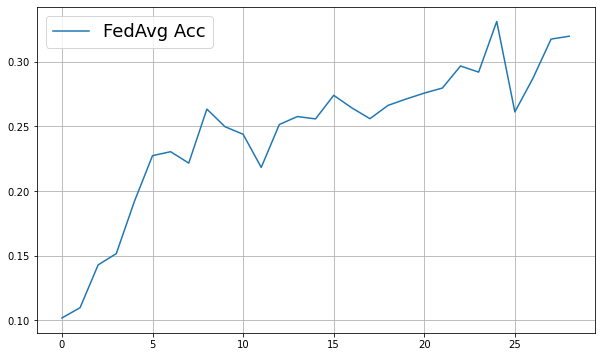

In [3]:
std_lst, average_acc_list = [], []


for i in range(30):
    sum, tmp = 0, []
    for j in range(20):
        sum = np.mean(acc4[i]) + sum

    average_acc_list.append(sum/20)  

plt.figure(figsize=(10,6))
plt.plot(average_acc_list[1:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

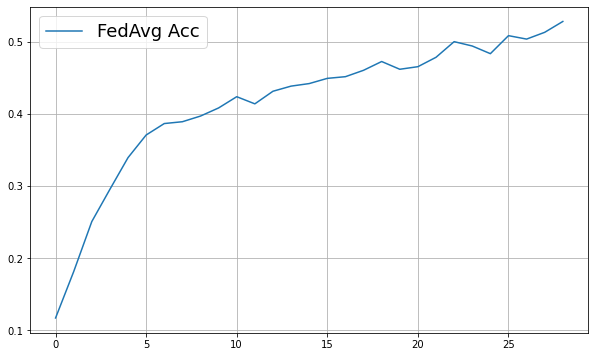

In [4]:
std_lst, average_acc_list = [], []


for i in range(30):
    sum, tmp = 0, []
    for j in range(20):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['acc{}'.format(j)][i]))

    average_acc_list.append(sum/20)  
    std_lst.append(np.mean(tmp))

plt.figure(figsize=(10,6))
plt.plot(average_acc_list[1:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [5]:
np.mean(std_lst[1:])

0.17157899113743763

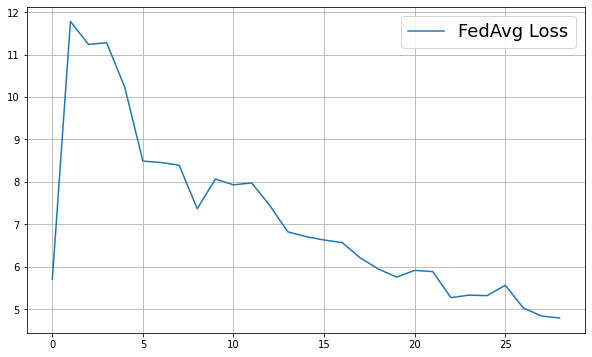

In [6]:
average_loss_list = []
std_lst_loss = []


for i in range(30):
    sum, tmp = 0, []
    for j in range(20):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['loss{}'.format(j)][i]))

    average_loss_list.append(sum/20)
    std_lst_loss.append(np.mean(tmp))

plt.figure(figsize=(10,6))
plt.plot(average_loss_list[1:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [7]:
np.mean(std_lst_loss[1:])

8.838204247579695

In [8]:
for i in range(10):
    for j in range(30):
        if globals()['acc{}'.format(i)][-1][j] < 0.5:
            print(globals()['acc{}'.format(i)][-1][j])

0.426800012588501
0.22699999809265137
0.3422999978065491
0.4747999906539917
0.3490000069141388
0.10279999673366547
0.4350999891757965
0.1932000070810318
0.37209999561309814
0.2892000079154968
0.13989999890327454
0.22550000250339508
0.3043999969959259
0.3393999934196472
0.31540000438690186
0.3955000042915344
0.4602000117301941
0.1720999926328659
0.4860000014305115
0.4733999967575073
0.3353999853134155
0.2775999903678894
0.2802000045776367
0.38119998574256897
0.33469998836517334
0.48350000381469727
0.34119999408721924
0.27410000562667847
0.09839999675750732
0.13009999692440033
0.4959000051021576
0.21770000457763672
0.49639999866485596
0.2727999985218048
0.1688999980688095
0.22370000183582306
0.14560000598430634
0.322299987077713
0.31859999895095825
0.3653999865055084
0.38429999351501465
0.10010000318288803
0.4122999906539917
0.45010000467300415
0.0892999991774559
0.352400004863739
0.3009999990463257
0.4523000121116638
0.4018000066280365
0.21050000190734863
0.45080000162124634
0.176300004

In [9]:
np.array(average_acc_list)

array([0.35115583, 0.11706283, 0.18124633, 0.250594  , 0.2953045 ,
       0.33917633, 0.37049367, 0.38637   , 0.3888895 , 0.39674183,
       0.40799517, 0.4235625 , 0.413656  , 0.431112  , 0.438211  ,
       0.4417355 , 0.448954  , 0.451287  , 0.46013133, 0.47228433,
       0.461554  , 0.46513183, 0.4781365 , 0.49980133, 0.49377517,
       0.48315933, 0.50810567, 0.50335817, 0.5127545 , 0.52776683])

In [10]:
np.array(average_loss_list)

array([127.68604474,   5.7014659 ,  11.77944371,  11.23832656,
        11.27719006,  10.22435618,   8.48740097,   8.4523849 ,
         8.39055237,   7.36409559,   8.06294507,   7.92717686,
         7.97274969,   7.44404366,   6.81761597,   6.70635191,
         6.62644315,   6.56557803,   6.20384951,   5.94279078,
         5.75227081,   5.90942851,   5.88096625,   5.26709362,
         5.32655352,   5.31512918,   5.55862248,   5.02411751,
         4.83477324,   4.78799659])

In [11]:
np.array(std_lst)

array([0.14631829, 0.03810542, 0.08417913, 0.11214717, 0.13456112,
       0.1446072 , 0.1503836 , 0.16171761, 0.16578977, 0.16609972,
       0.17569527, 0.18318825, 0.1798641 , 0.17762806, 0.19075521,
       0.18781056, 0.18903791, 0.19802133, 0.19429129, 0.19660555,
       0.18627915, 0.20171047, 0.19057533, 0.19470563, 0.19858802,
       0.19667877, 0.19866899, 0.19675367, 0.19282965, 0.18851281])